In [611]:
# imports
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

# load dataframe
dfTest = pd.read_csv("..\\Datasets\\train.csv")


In [612]:
# renderization of a random image 

pixel_data = dfTest.iloc[17,1:].values
image_array = pixel_data.reshape((28,28))

plt.imshow(image_array,cmap = 'gray',vmin = 0,vmax = 255)
plt.axis('off')
plt.show()



In [613]:
# Neural net
import torch
import torch.nn as nn # neural network

Criterion for clasification of images to digits between 0 and 9 -> Cross entropy loss 

-> Probability distribution (values between 0 and 1) between the N different classes/possible outputs
    -> In this case N = 10

Formula:
Loss= -sum[i...N] (yi·log(pi)) 
yi = binary indicator (0 or 1) if label i (0...9) is the correct clasification
pi = predicted possibility for class i



In [614]:
criterion = nn.CrossEntropyLoss()

# manual def

#def criterion(yhat, y):
#    return -torch.mean(torch.sum(y * torch.log(yhat), dim = 1))

In [615]:
# Simple Neural Network:

class digit_rec_NN(nn.Module):
    def __init__(self):
        super(digit_rec_NN, self).__init__()
        self.fc1 = nn.Linear(28*28, 256)  # 28 * 28 is the dimension of the image and 256 is the number of starting neurons -> This layer only flattens the image into 256 values so it can be used by the next layer
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 64)
        self.fc4 = nn.Linear(64, 10)  # Output layer for 10 classes ( 0 - 9 )
        self.soft = nn.Softmax(dim = 1)
    
    def forward(self, x):
        x = x.view(-1, 28*28)  # Flatten the image
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.relu(self.fc3(x))
        x = self.soft(self.fc4(x))
        return x

In [616]:
# Prepare Data for training

from torch.utils.data import Dataset, DataLoader
class Data(Dataset):
     # constructor
     def __init__(self, df):
          self.y = torch.tensor(df["label"].values, dtype=torch.long) # y = result (0 - 9 )
          self.x = torch.tensor(df.iloc[:,1:].values,dtype=torch.float32) # x is every pixel column 
          self.len = self.x.shape[0] # saves in len attribute the num of rows on the dataset
          

     def __len__(self):
          return self.len
     
     def __getitem__(self, index):
           return (self.x[index]), (self.y[index]) # returns image array and digit


In [617]:
# Create NN Model

model = digit_rec_NN()

In [618]:
# Prepara Dataset

Dataset = Data(dfTest)
trainloader = DataLoader(Dataset, batch_size=64, shuffle=True)

In [619]:
# Define optimizer 

# Optimizer is what updates the weights and biases of the NN trough gradient descent (SGD)

optimizer = torch.optim.SGD(model.parameters(), lr = 0.01, momentum = 0.1, weight_decay=0.0001, dampening=0, nesterov = True)

# lr = learning rate. Values between 0 and 1. Controls the size of the step that the optimizer takes in the direction of minimizing loss function. Higer value -> faster learning but can cause instability. Lower value -> slower but more stable
# momentum = adds a fraction of the previous update to the current update. Smooths optimization progress. 
# weight decay -> Ads a penalty to the loss function to discourage large weights and prevent overfitting
# dampening -> dampens momentum to make updates more stable
# nesterov (T or F) -> enables Nesterov momentum, which changes how momentum is applied

In [620]:
# training

cycles = 100


for epoch in range(cycles):
    running_loss = 0.0

    for i,data in enumerate(trainloader,0):
        images,labels = data


        # We set the gradient to Zero
        optimizer.zero_grad()


        #We get production for input x
        outputs = model(images)


        # We calculate the loss for that given input
        loss = criterion(outputs, labels)


        # We do the Stochastic Gradient Descent
        loss.backward() # We calculate the derivative
        optimizer.step() # and advance a step in the gradient with the calculated
        
        #Add running loss
        running_loss += loss.item()
        
        if (i + 1) % 100 == 0:  # Print every 100 batches
            avg_loss = running_loss / 100
            print(f"[Epoch {epoch + 1}, Batch {i + 1}] Loss: {avg_loss:.3f}")
            running_loss = 0.0  # Reset running loss


[Epoch 1, Batch 100] Loss: 1.934
[Epoch 1, Batch 200] Loss: 1.736
[Epoch 1, Batch 300] Loss: 1.727
[Epoch 1, Batch 400] Loss: 1.717
[Epoch 1, Batch 500] Loss: 1.710
[Epoch 1, Batch 600] Loss: 1.710
[Epoch 2, Batch 100] Loss: 1.690
[Epoch 2, Batch 200] Loss: 1.698
[Epoch 2, Batch 300] Loss: 1.700
[Epoch 2, Batch 400] Loss: 1.688
[Epoch 2, Batch 500] Loss: 1.697
[Epoch 2, Batch 600] Loss: 1.694
[Epoch 3, Batch 100] Loss: 1.690
[Epoch 3, Batch 200] Loss: 1.685
[Epoch 3, Batch 300] Loss: 1.689
[Epoch 3, Batch 400] Loss: 1.682
[Epoch 3, Batch 500] Loss: 1.668
[Epoch 3, Batch 600] Loss: 1.619
[Epoch 4, Batch 100] Loss: 1.604
[Epoch 4, Batch 200] Loss: 1.599
[Epoch 4, Batch 300] Loss: 1.598
[Epoch 4, Batch 400] Loss: 1.602
[Epoch 4, Batch 500] Loss: 1.597
[Epoch 4, Batch 600] Loss: 1.601
[Epoch 5, Batch 100] Loss: 1.594
[Epoch 5, Batch 200] Loss: 1.592
[Epoch 5, Batch 300] Loss: 1.586
[Epoch 5, Batch 400] Loss: 1.595
[Epoch 5, Batch 500] Loss: 1.589
[Epoch 5, Batch 600] Loss: 1.590
[Epoch 6, 

0 --- 0


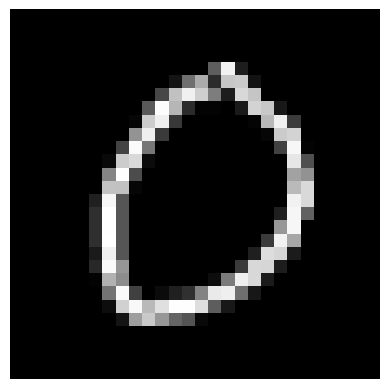

9 --- 9


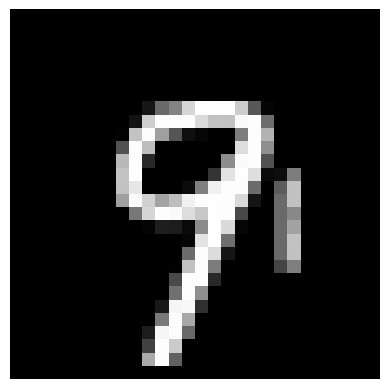

0 --- 0


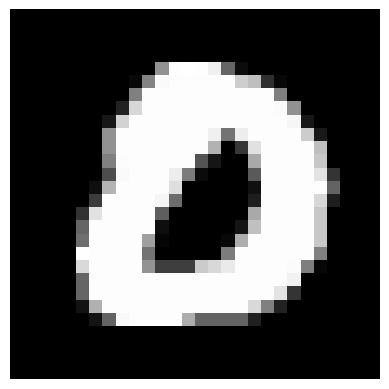

5 --- 5


8 --- 8


2 --- 2


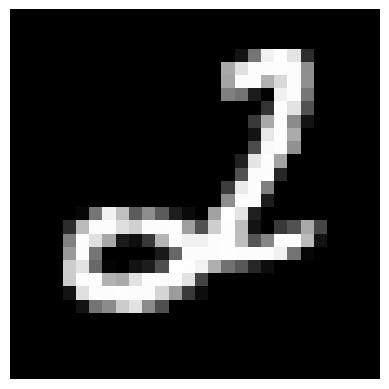

3 --- 3


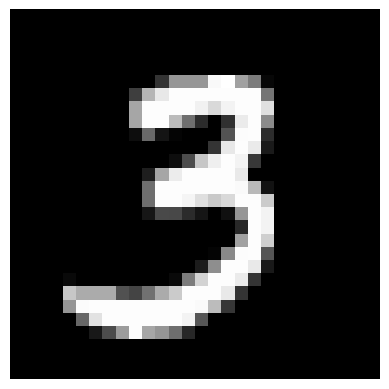

8 --- 8


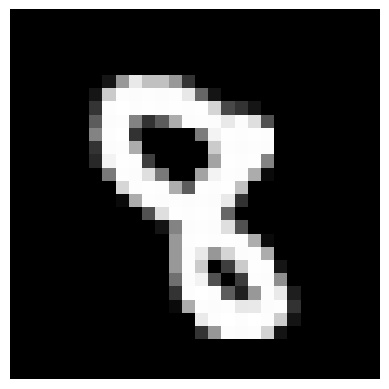

4 --- 4


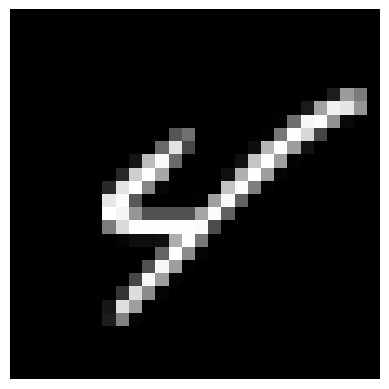

7 --- 7


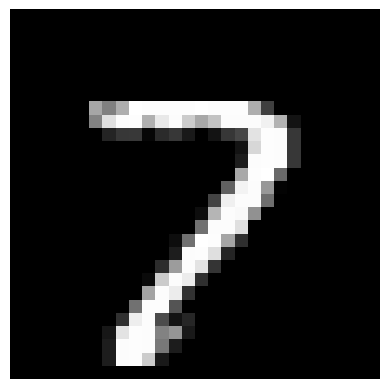

7 --- 7


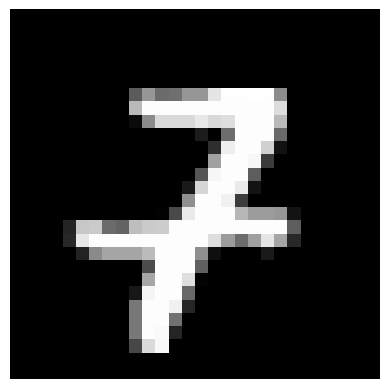

5 --- 5


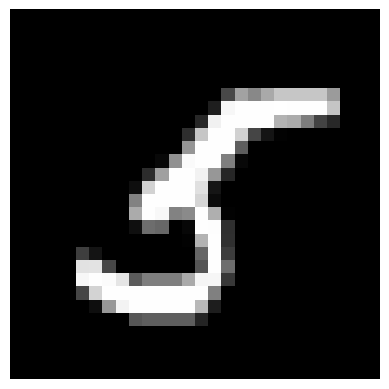

0 --- 0


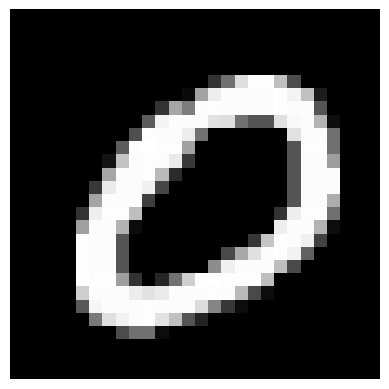

0 --- 0


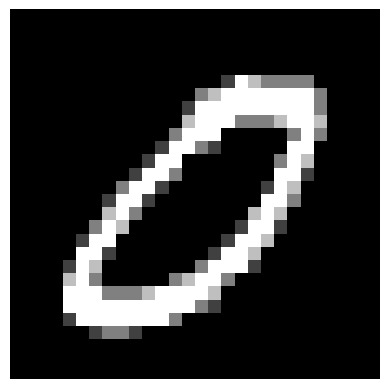

7 --- 7


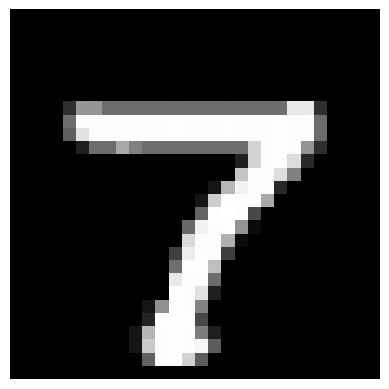

0 --- 0


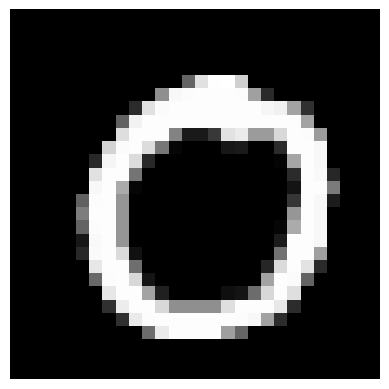

7 --- 7


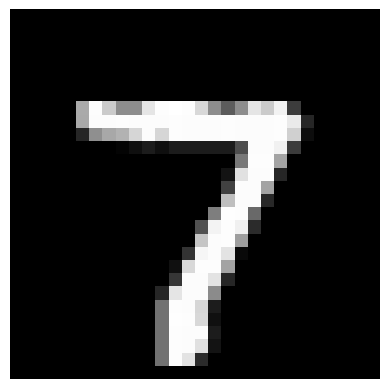

8 --- 8


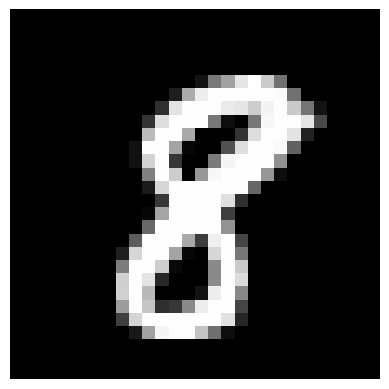

5 --- 5


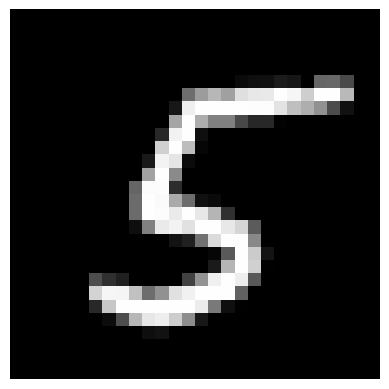

1 --- 1


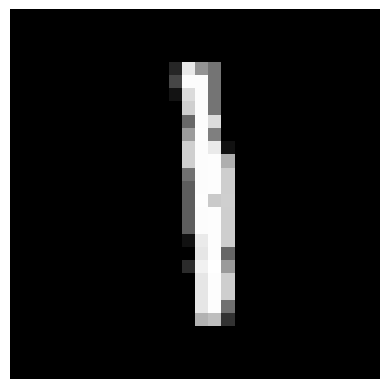

2 --- 2


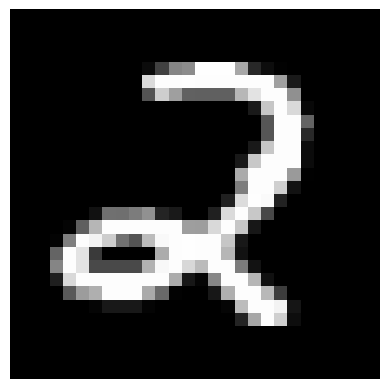

6 --- 6


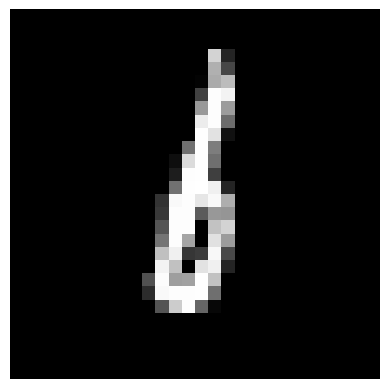

7 --- 7


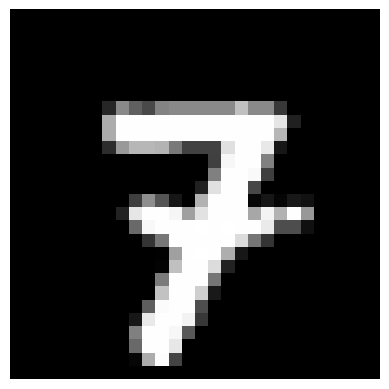

5 --- 5


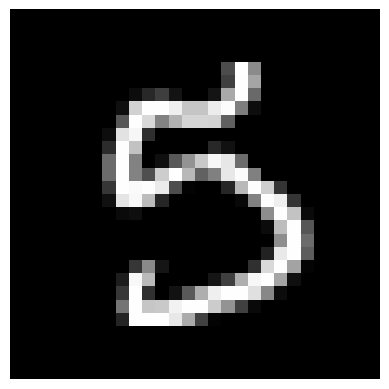

4 --- 4


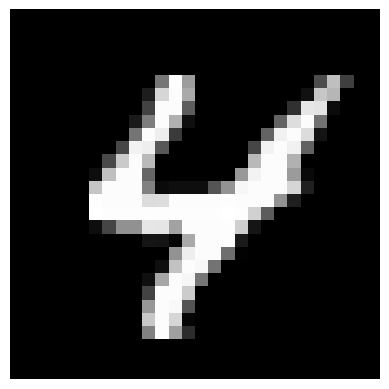

8 --- 8


8 --- 8


9 --- 9


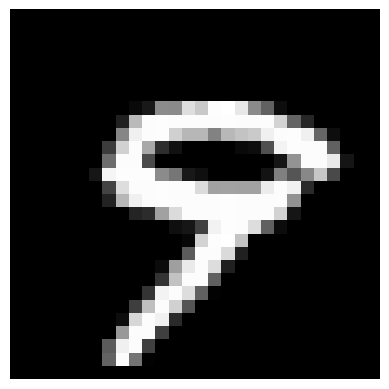

3 --- 3


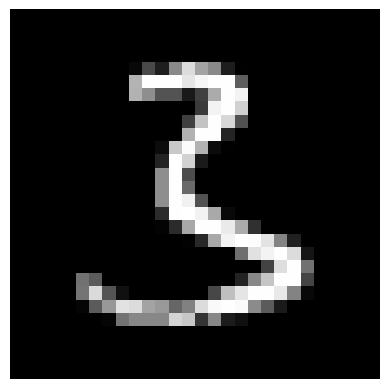

5 --- 5


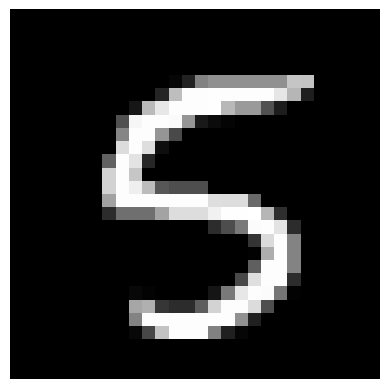

8 --- 8


7 --- 7


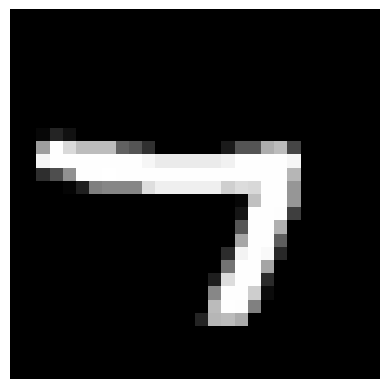

0 --- 0


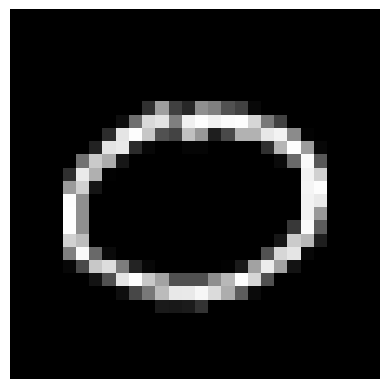

0 --- 0


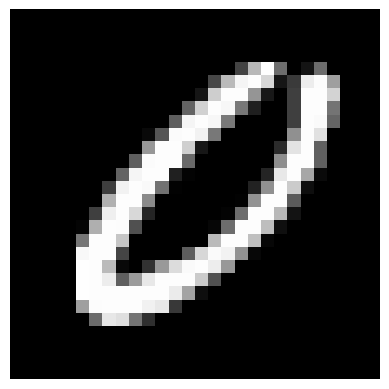

1 --- 1


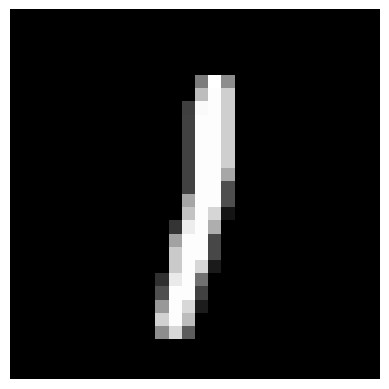

1 --- 1


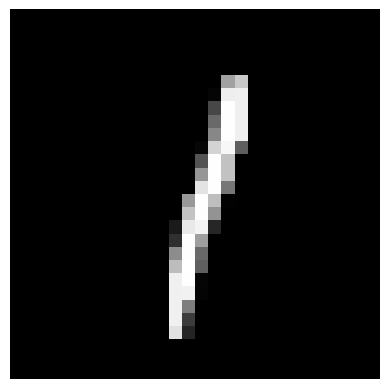

4 --- 4


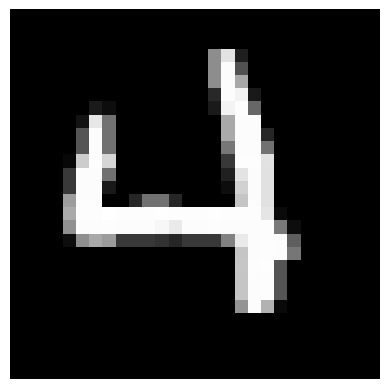

8 --- 8


4 --- 4


3 --- 3


8 --- 8


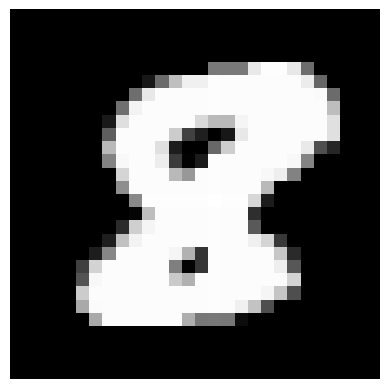

3 --- 3


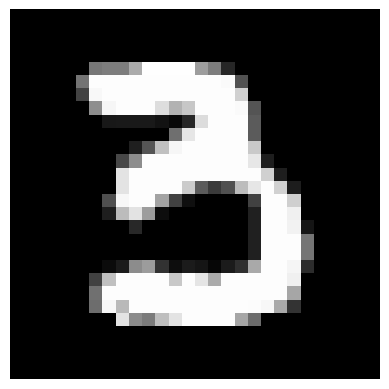

8 --- 8


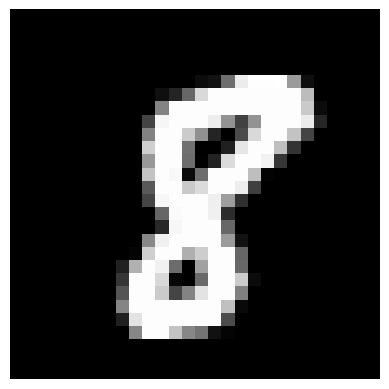

9 --- 9


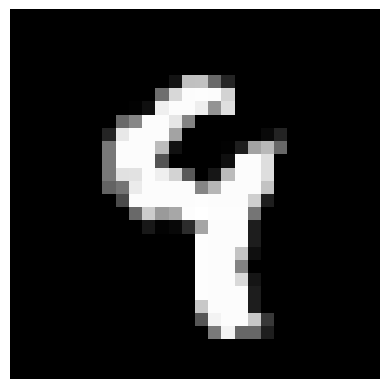

1 --- 1


4 --- 4


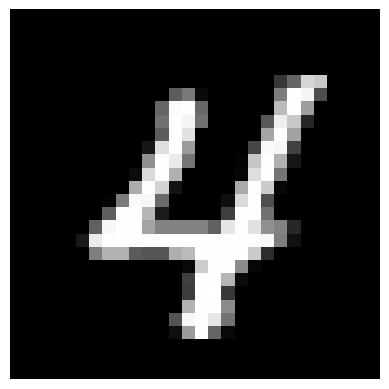

2 --- 2


6 --- 6


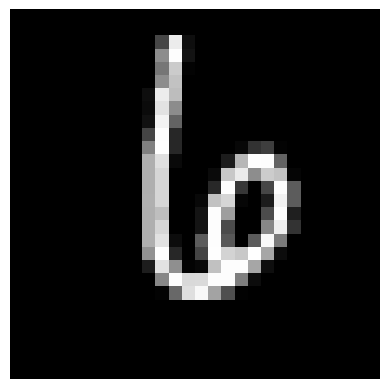

6 --- 6


4 --- 4


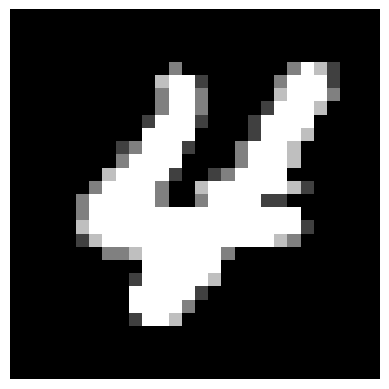

0 --- 0


3 --- 3


0 --- 0


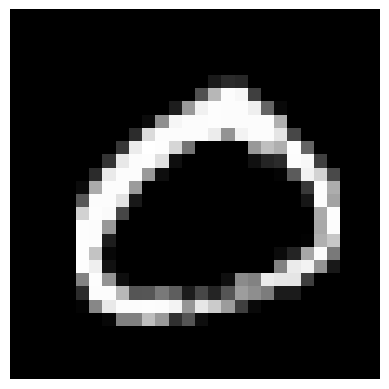

6 --- 6


6 --- 6


3 --- 3


1 --- 1


2 --- 2


2 --- 2


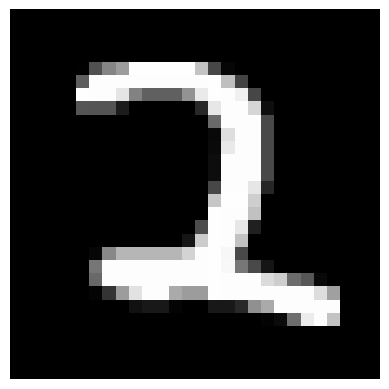

6 --- 6


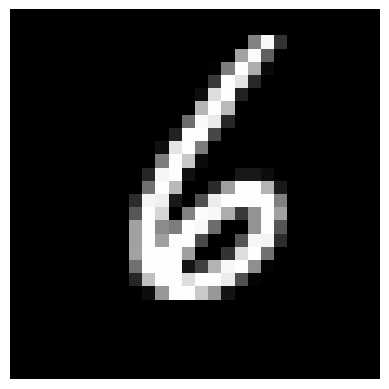

4 --- 4


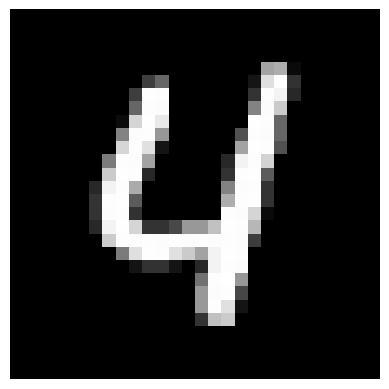

9 --- 9


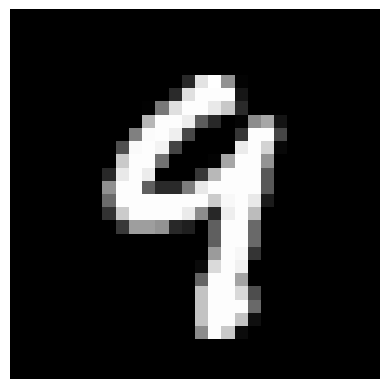

5 --- 5


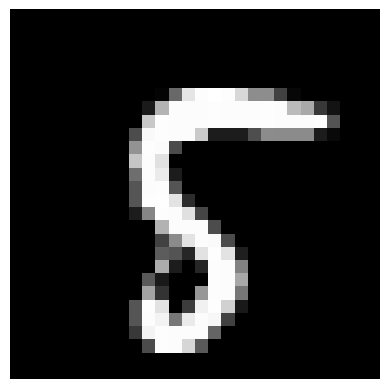

0 --- 0


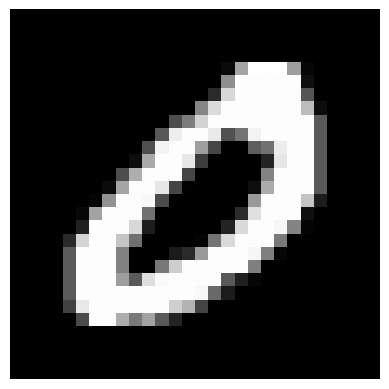

3 --- 3


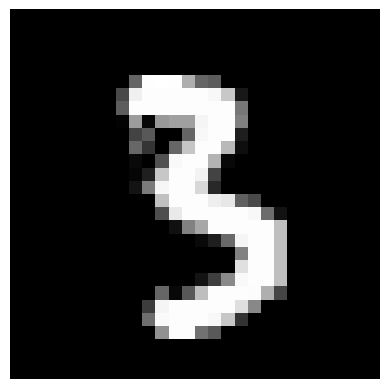

0 --- 0


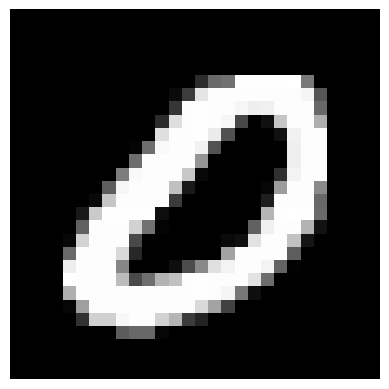

3 --- 3


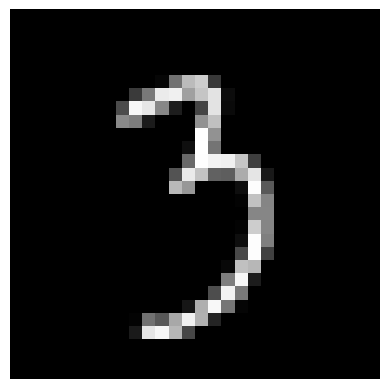

9 --- 9


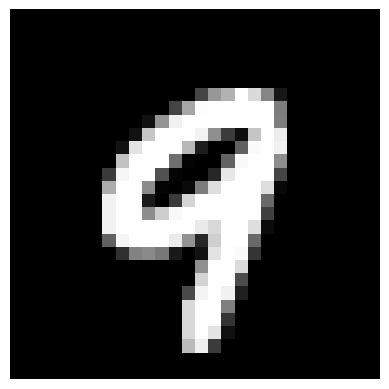

5 --- 5


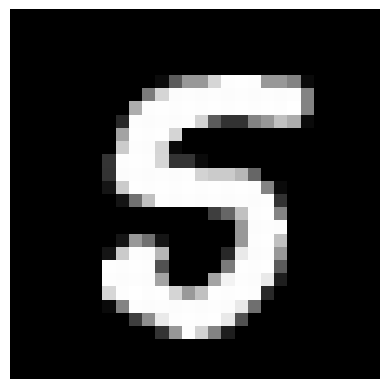

5 --- 5


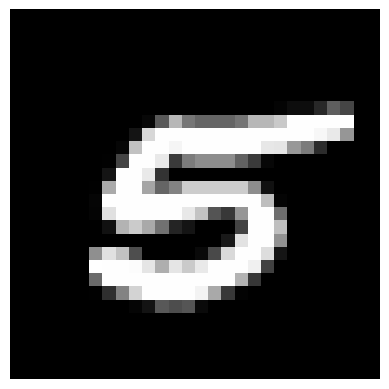

2 --- 2


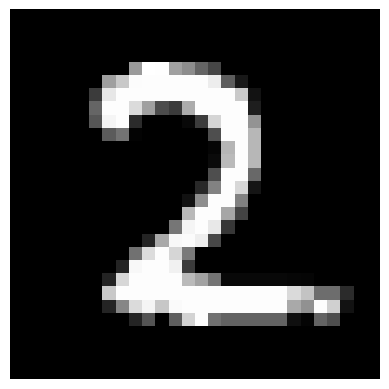

6 --- 6


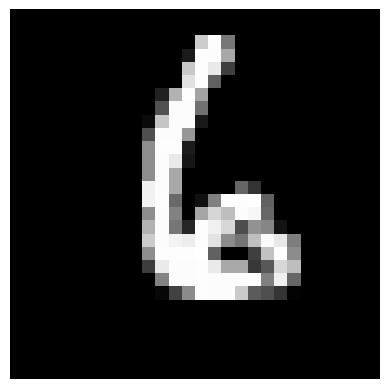

0 --- 0


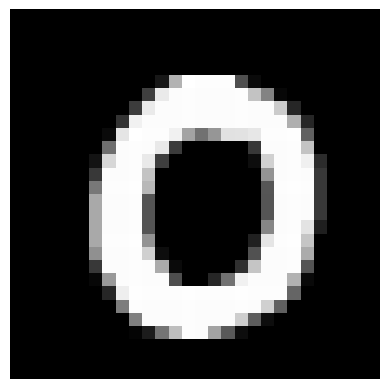

8 --- 8


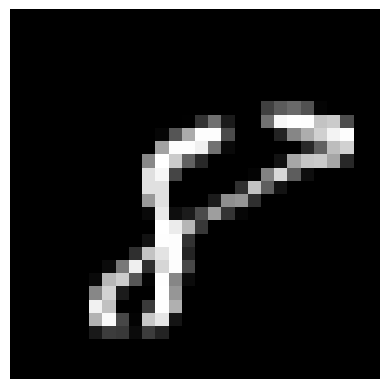

4 --- 4


4 --- 4


1 --- 1


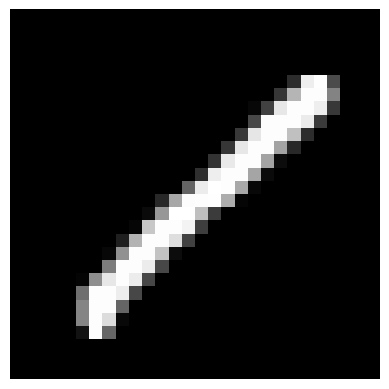

7 --- 7


1 --- 1


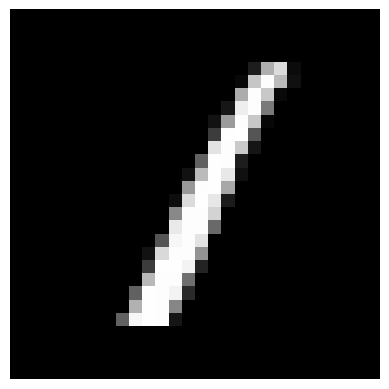

8 --- 8


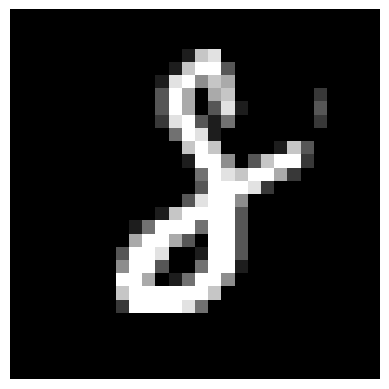

2 --- 2


5 --- 5


7 --- 7


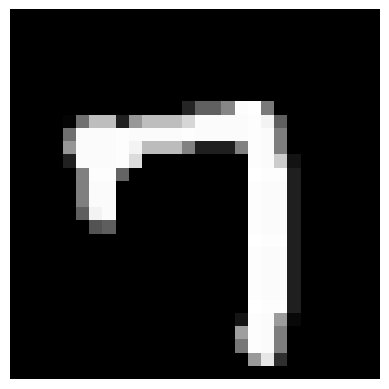

7 --- 7


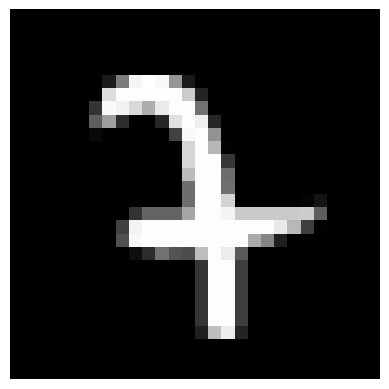

6 --- 6


9 --- 9


5 --- 5


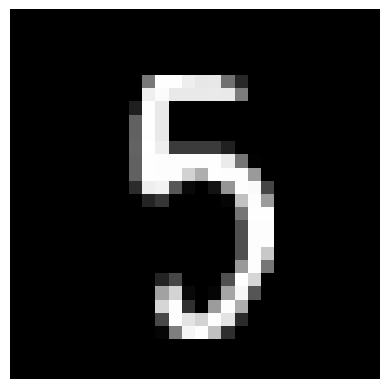

1 --- 1


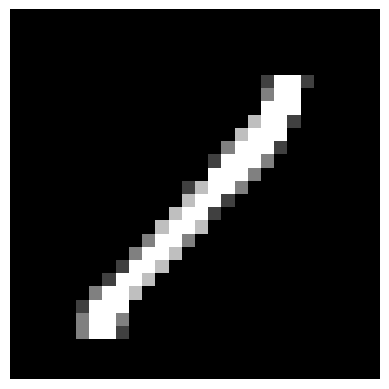

4 --- 4


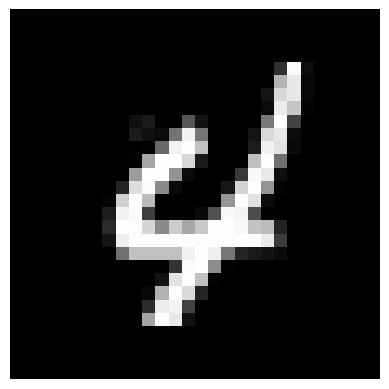

1 --- 1


8 --- 8


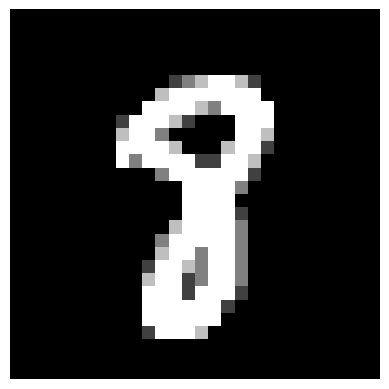

5 --- 5


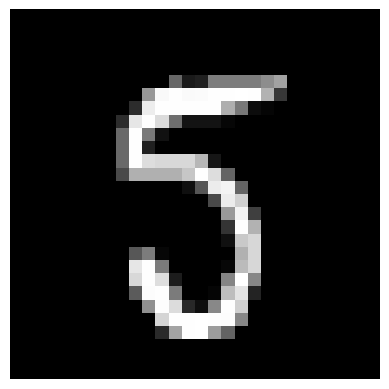

5 --- 5


2 --- 2


7 --- 7


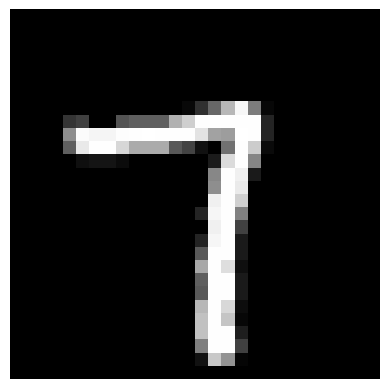

6 --- 6


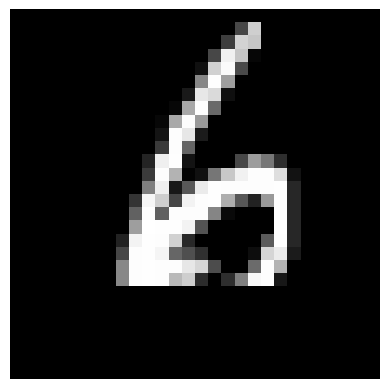

1 --- 1


3 --- 3


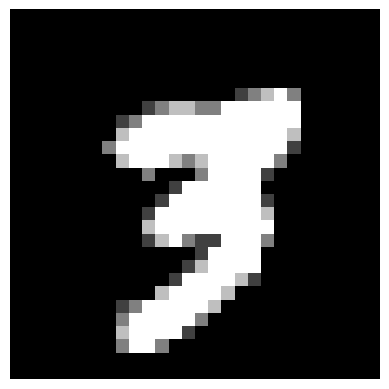

1 --- 1


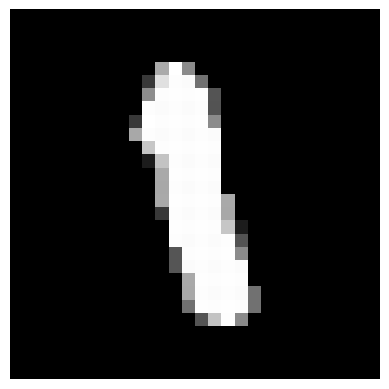

8 --- 8


9 --- 9


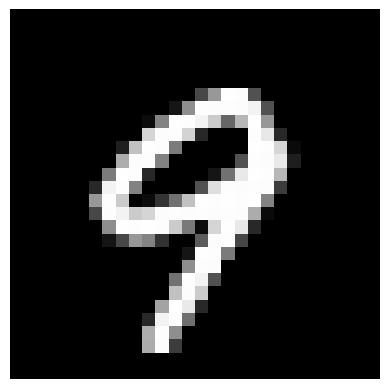

0 --- 0


5 --- 5


1 --- 1


5 --- 5


3 --- 3


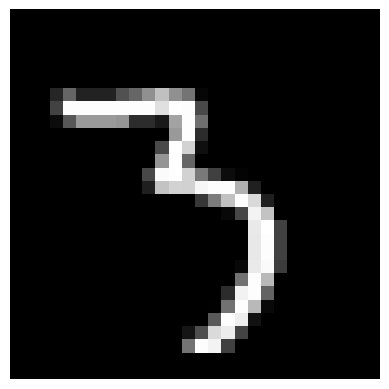

6 --- 6


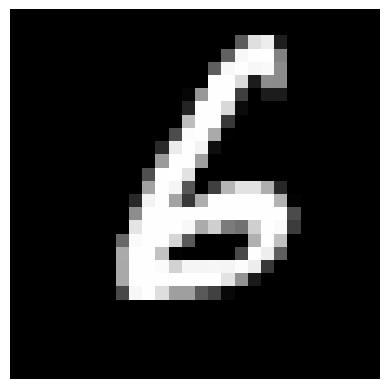

4 --- 4


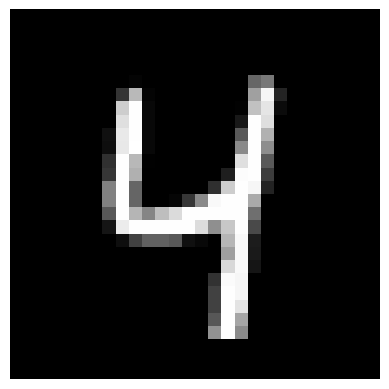

1 --- 1


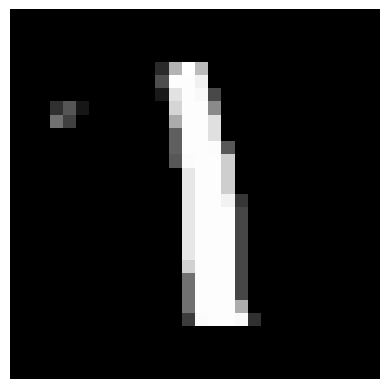

0 --- 0


9 --- 9


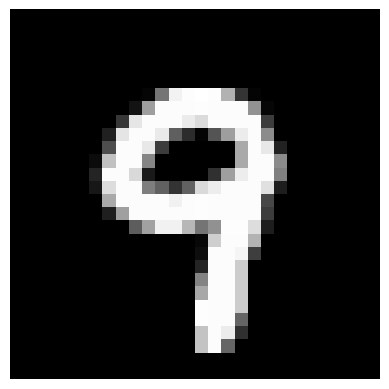

2 --- 2


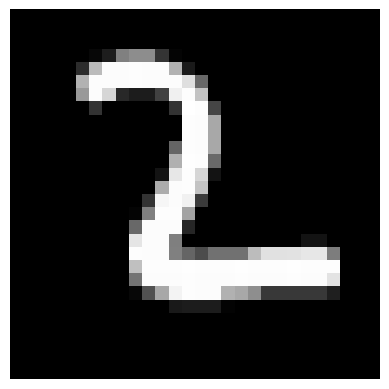

9 --- 9


9 --- 9


1 --- 1


0 --- 0


6 --- 6


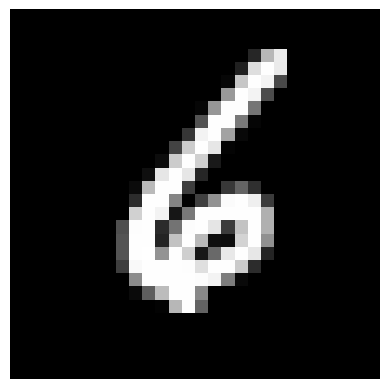

6 --- 6


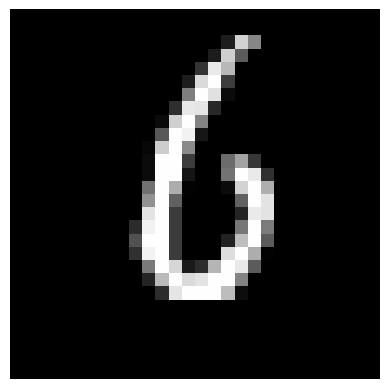

1 --- 1


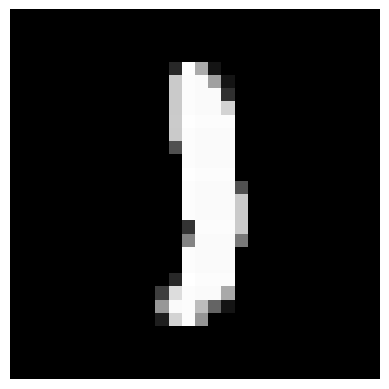

6 --- 6


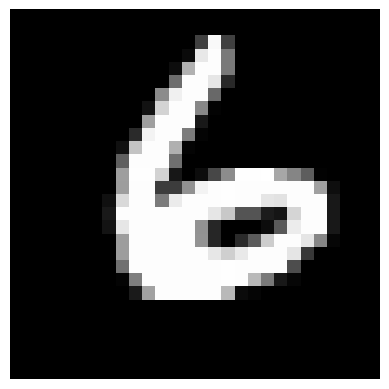

1 --- 1


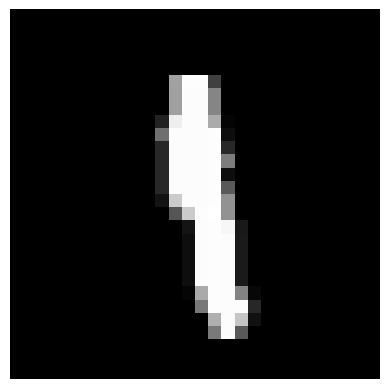

4 --- 4


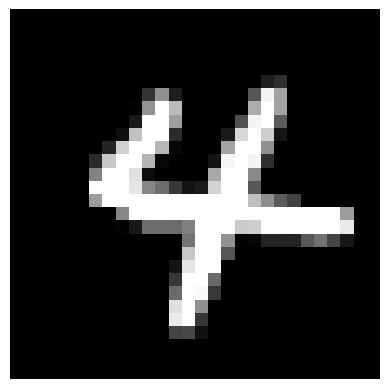

2 --- 2


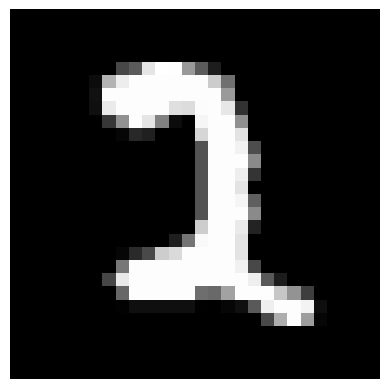

0 --- 0


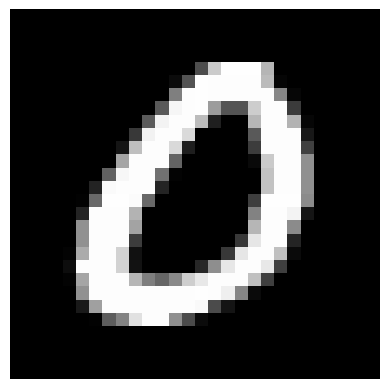

4 --- 4


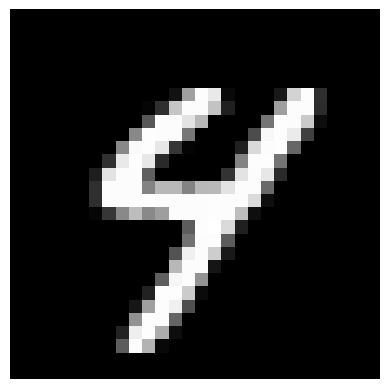

6 --- 6


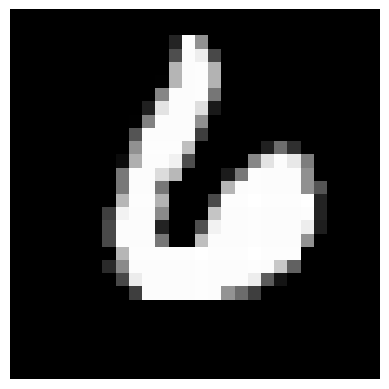

2 --- 2


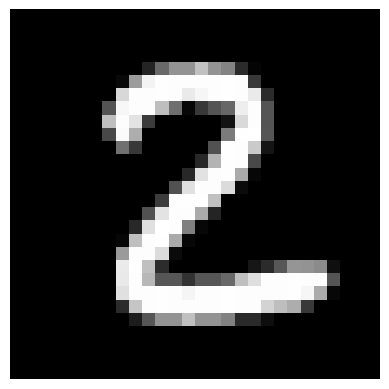

5 --- 5


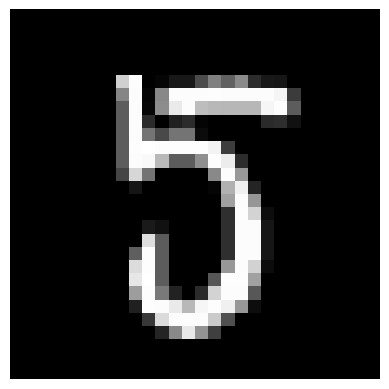

7 --- 7


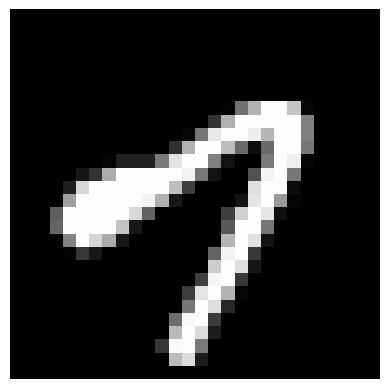

6 --- 6


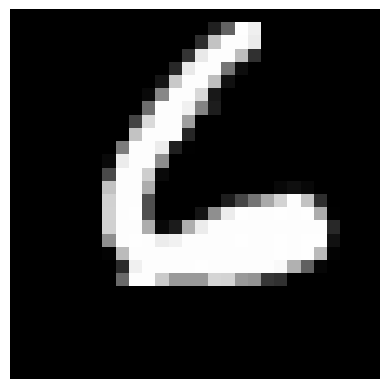

6 --- 6


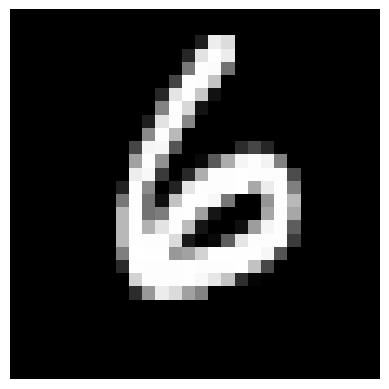

3 --- 3


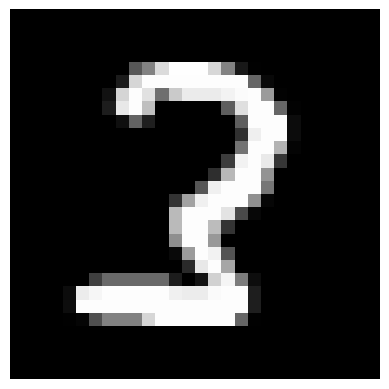

4 --- 4


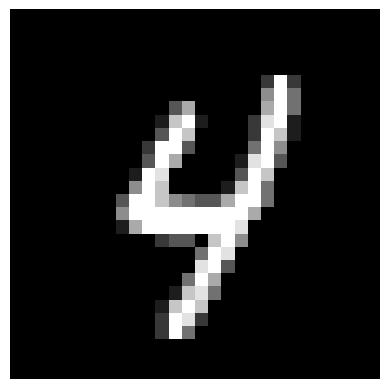

8 --- 8


7 --- 7


3 --- 3


8 --- 8


1 --- 1


2 --- 2


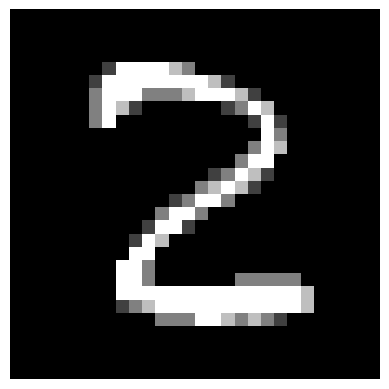

4 --- 4


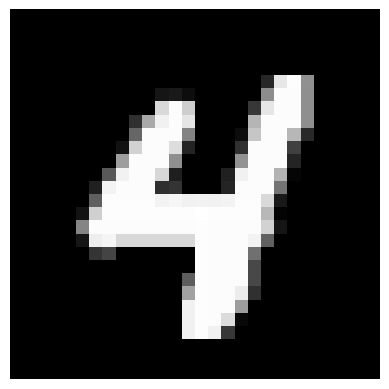

7 --- 7


4 --- 4


6 --- 6


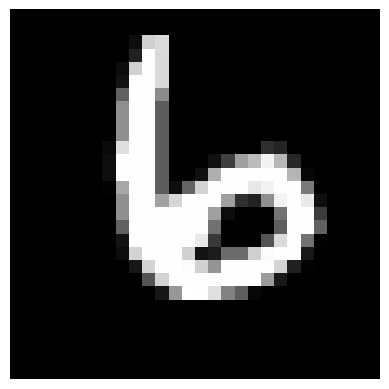

4 --- 4


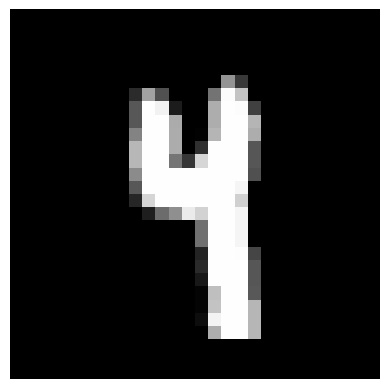

8 --- 8


9 --- 9


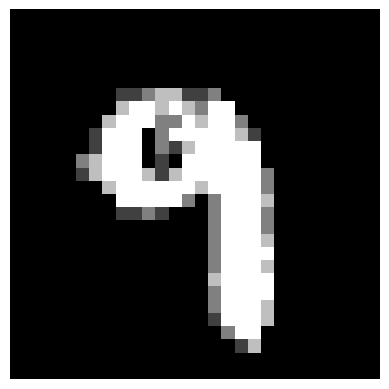

1 --- 1


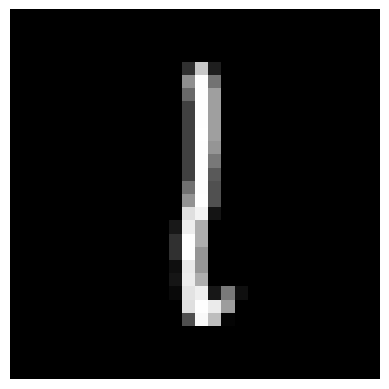

0 --- 0


9 --- 9


9 --- 9


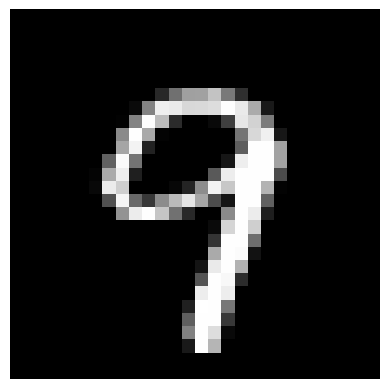

2 --- 2


2 --- 2


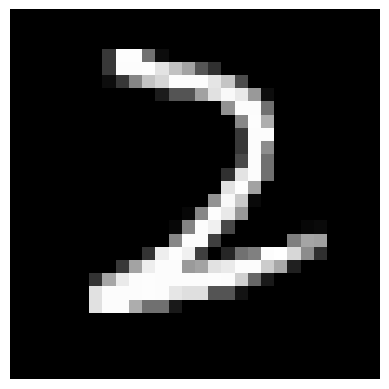

7 --- 7


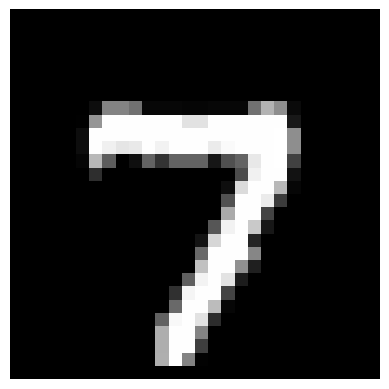

7 --- 7


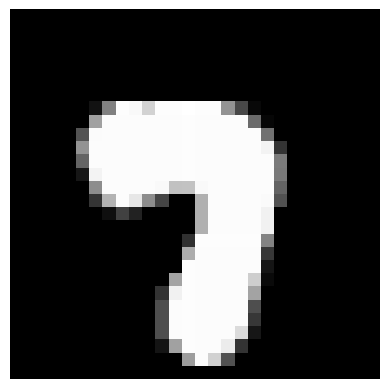

1 --- 1


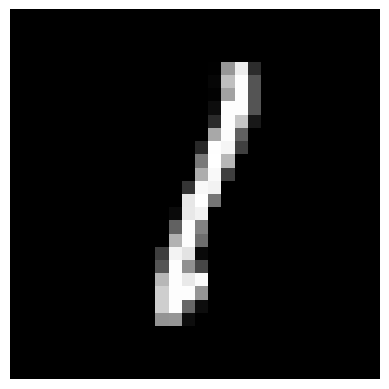

7 --- 7


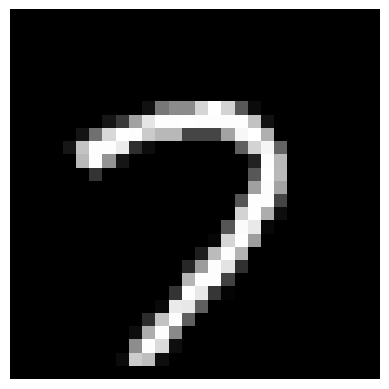

0 --- 0


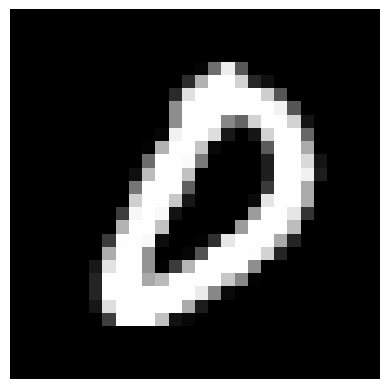

2 --- 2


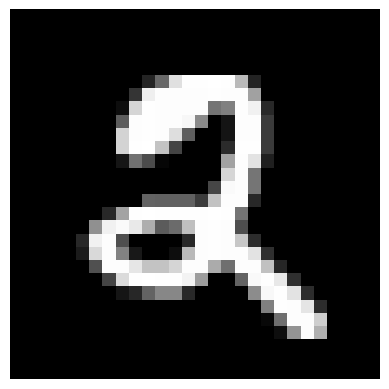

1 --- 1


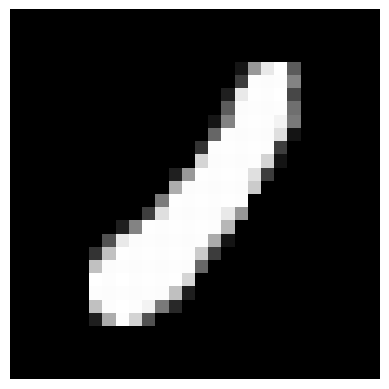

4 --- 4


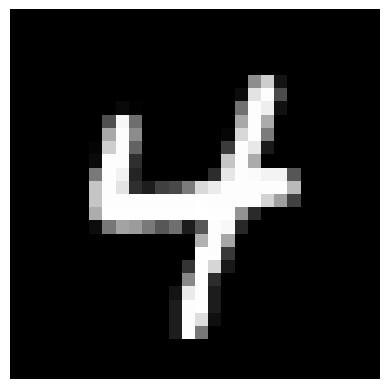

0 --- 0


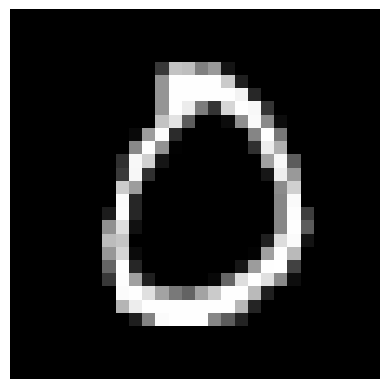

0 --- 0


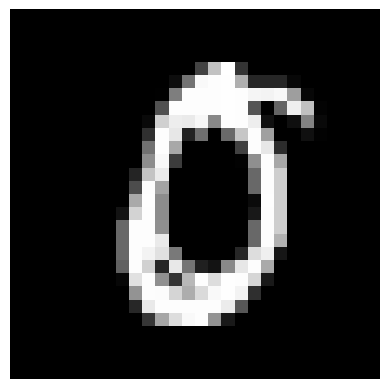

4 --- 4


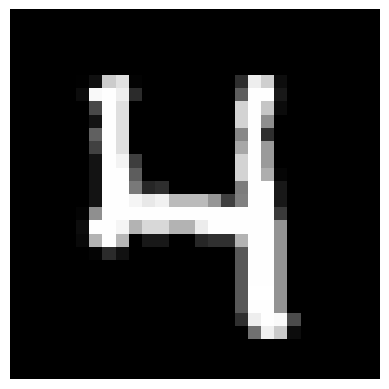

7 --- 7


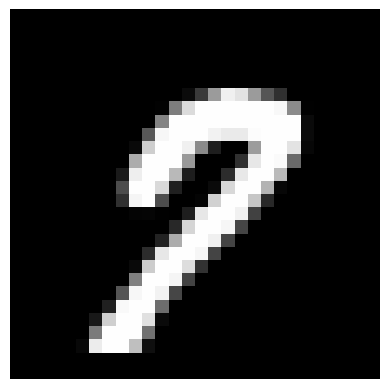

6 --- 6


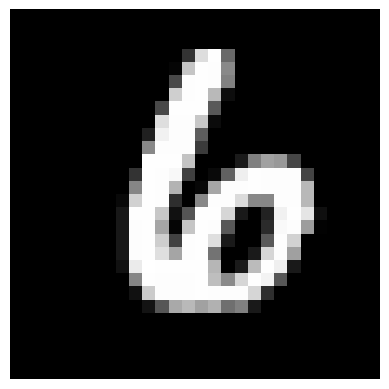

0 --- 0


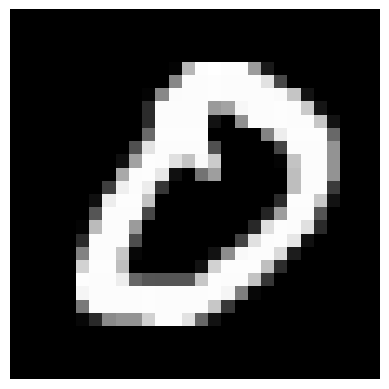

7 --- 7


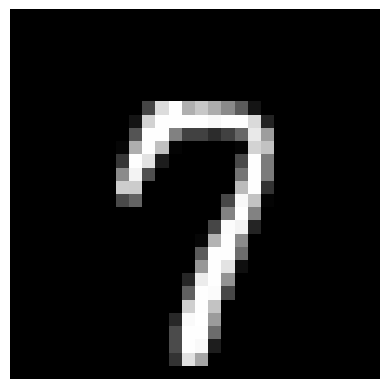

6 --- 6


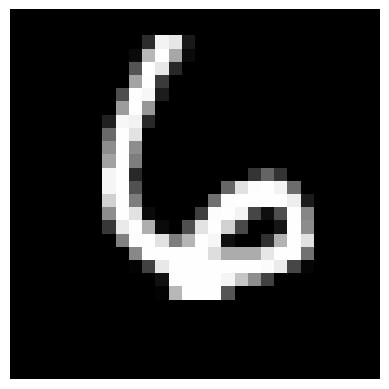

1 --- 1


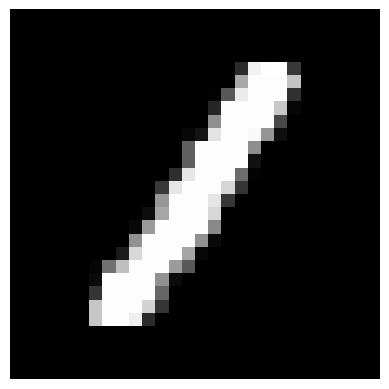

7 --- 7


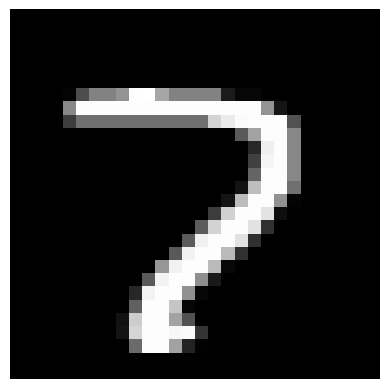

0 --- 0


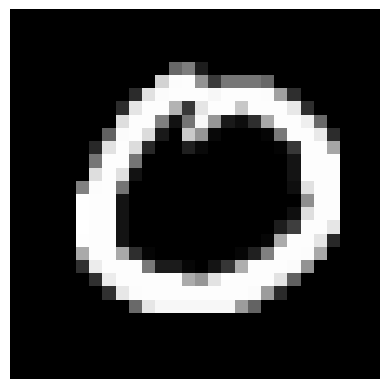

7 --- 7


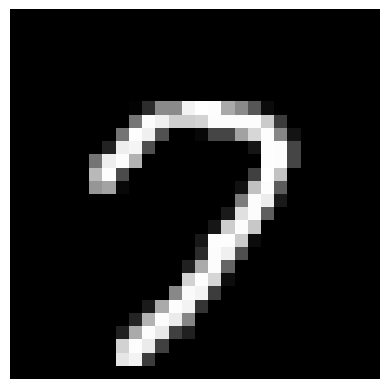

4 --- 4


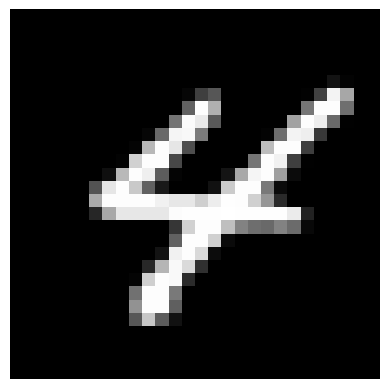

7 --- 7


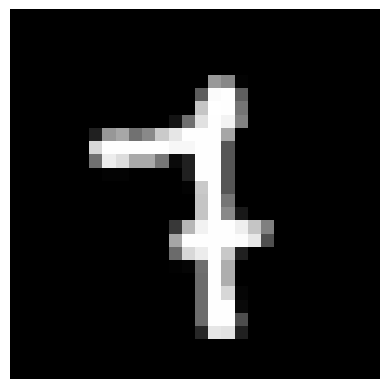

5 --- 5


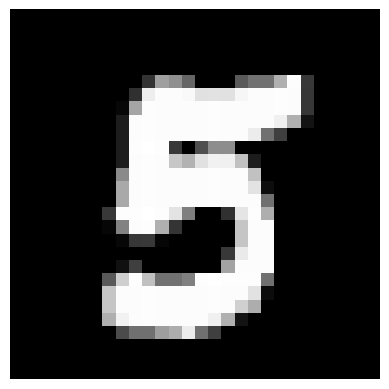

4 --- 4


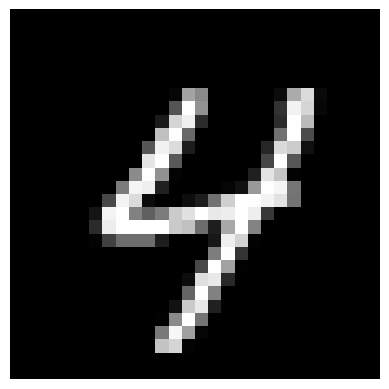

8 --- 8


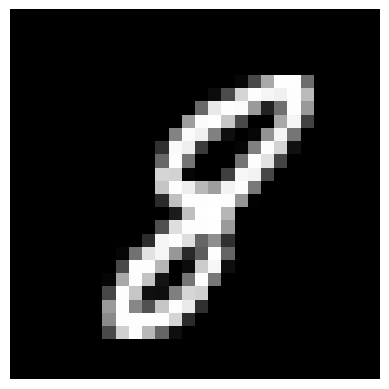

2 --- 2


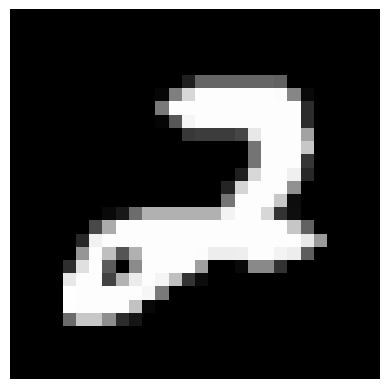

7 --- 7


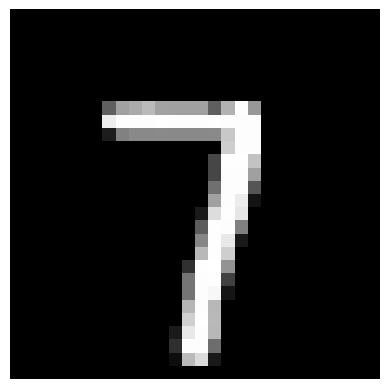

3 --- 3


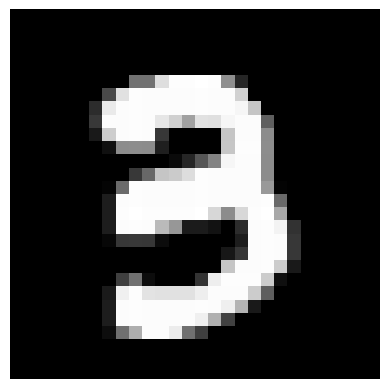

4 --- 4


1 --- 1


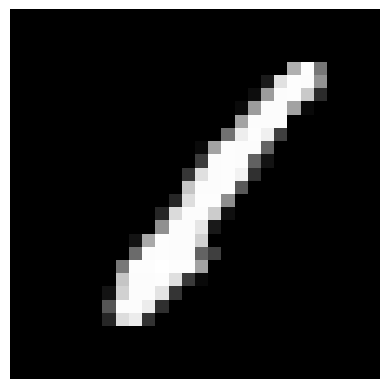

9 --- 9


4 --- 4


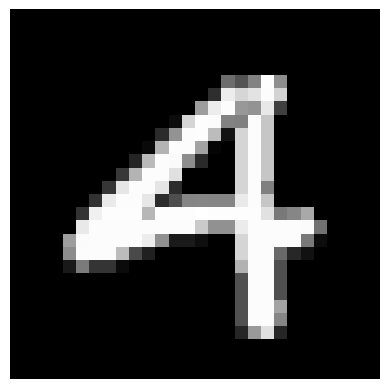

9 --- 9


3 --- 3


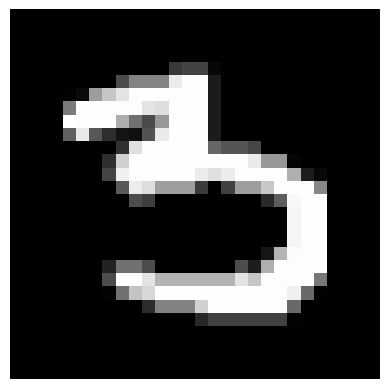

9 --- 9


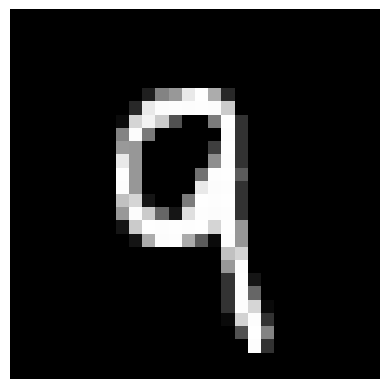

9 --- 9


8 --- 8


2 --- 2


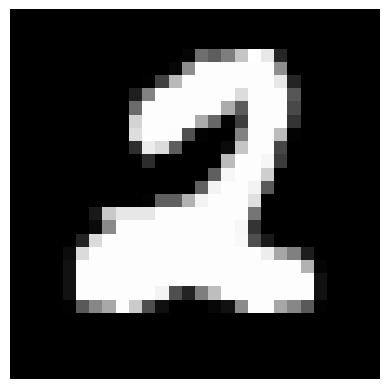

4 --- 4


3 --- 3


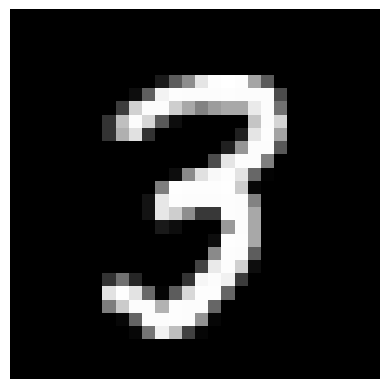

4 --- 4


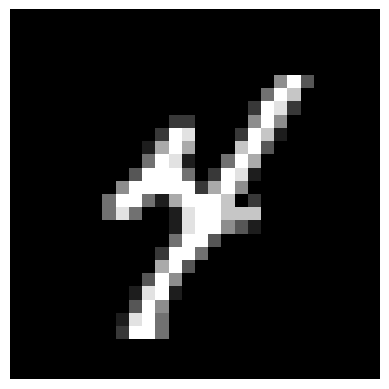

1 --- 1


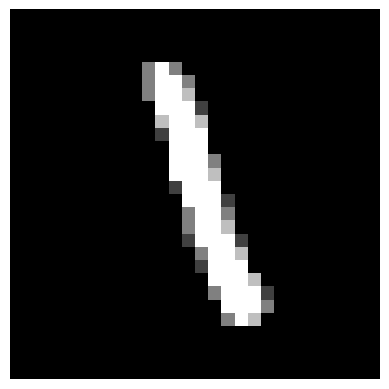

7 --- 7


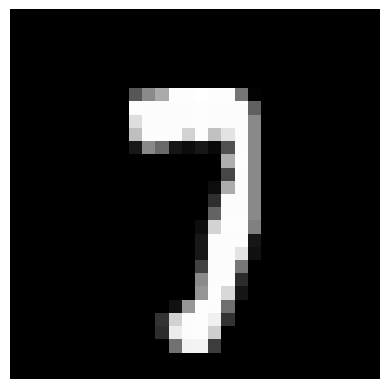

1 --- 1


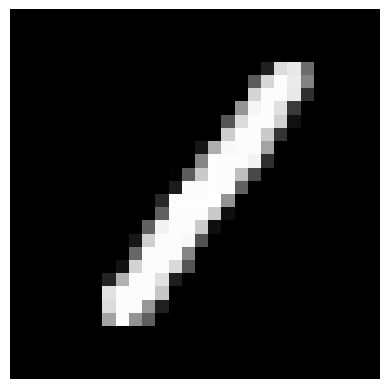

2 --- 2


8 --- 8


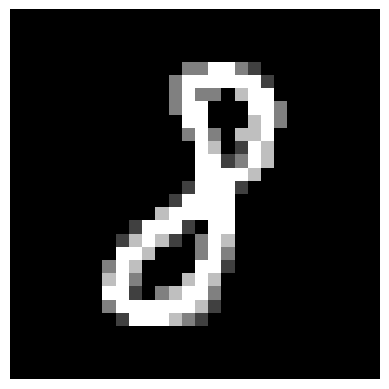

1 --- 1


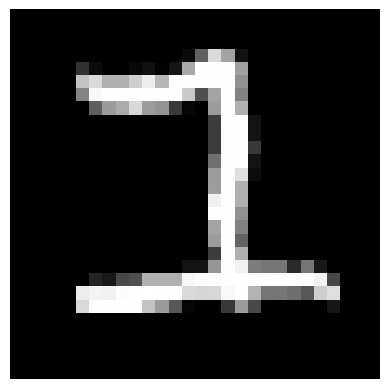

2 --- 2


4 --- 4


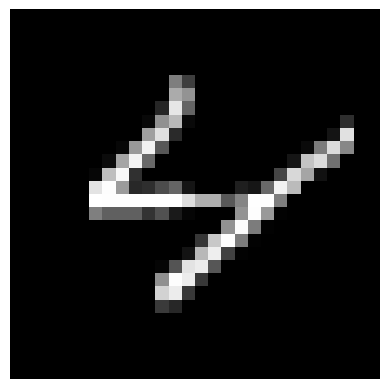

5 --- 5


2 --- 2


2 --- 2


6 --- 6


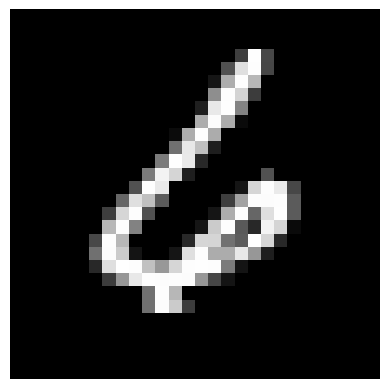

7 --- 7


2 --- 2


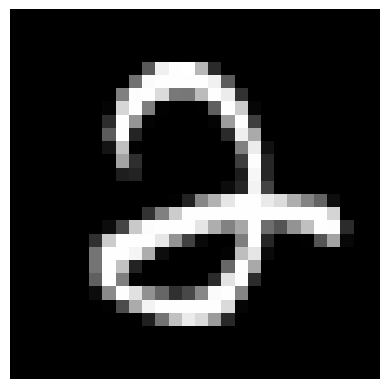

2 --- 2


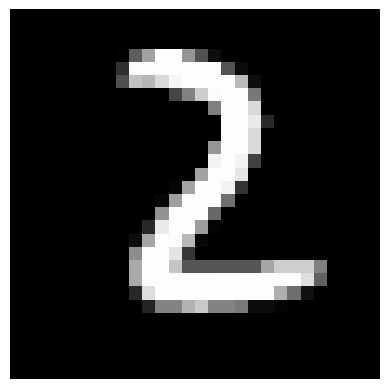

7 --- 7


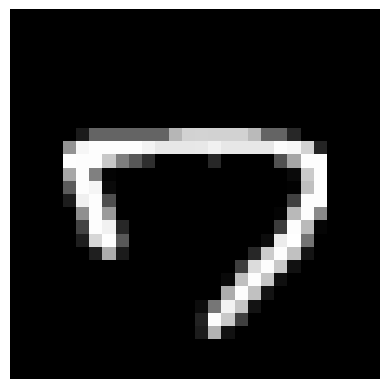

8 --- 8


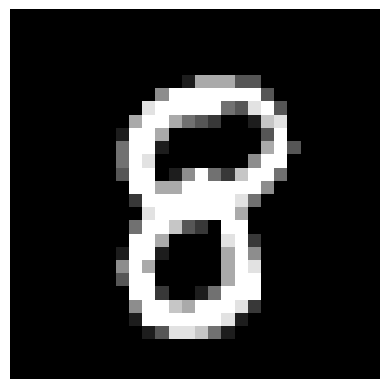

9 --- 9


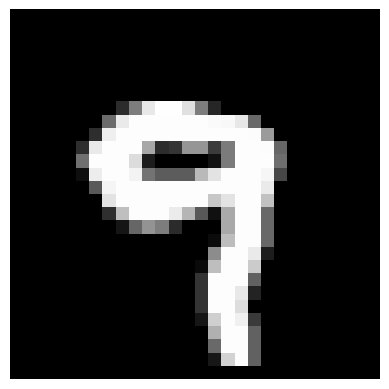

9 --- 9


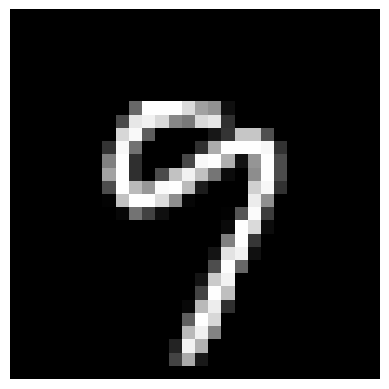

2 --- 2


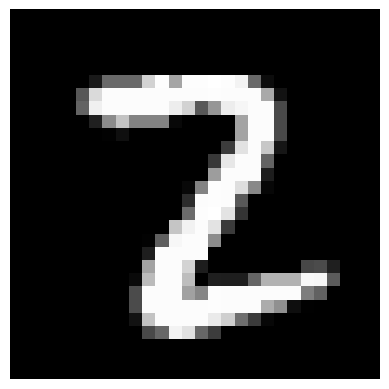

3 --- 3


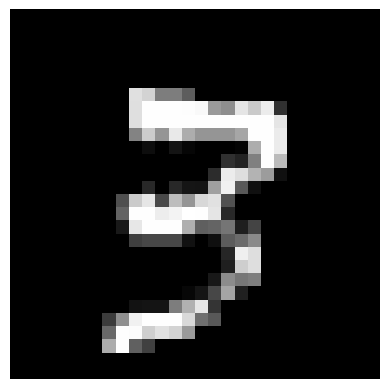

6 --- 6


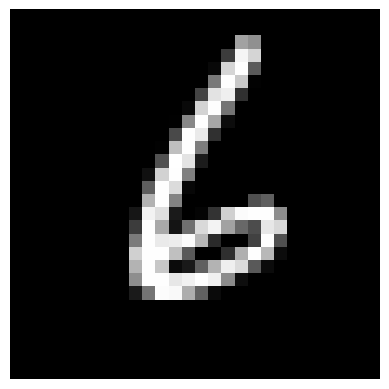

5 --- 5


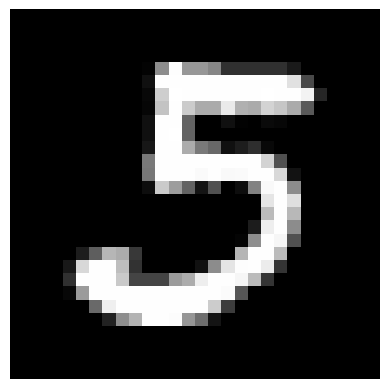

6 --- 6


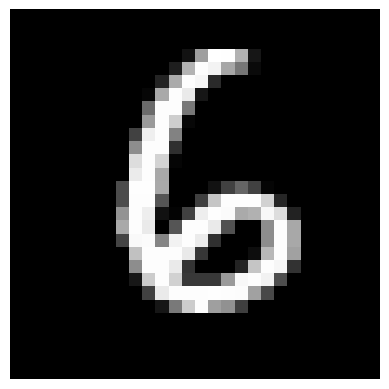

0 --- 0


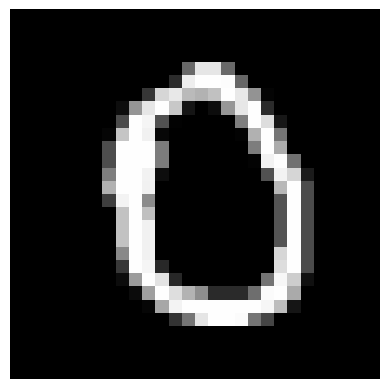

7 --- 7


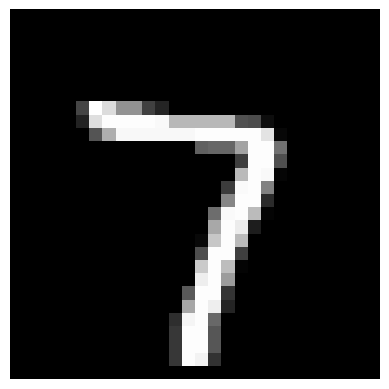

6 --- 6


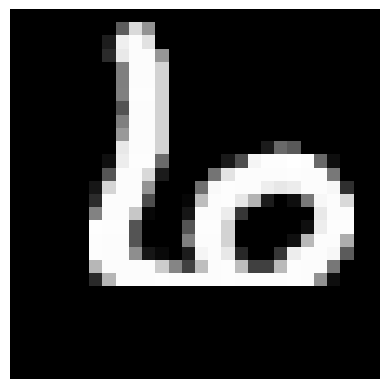

6 --- 6


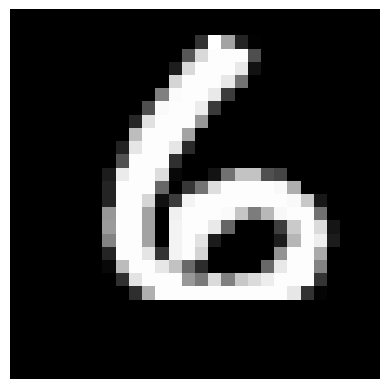

8 --- 8


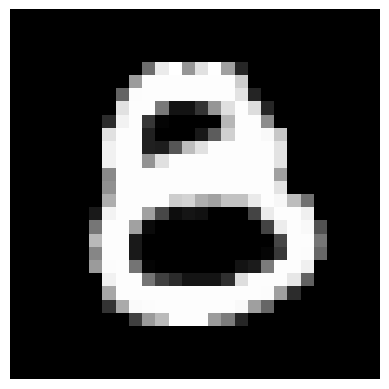

7 --- 7


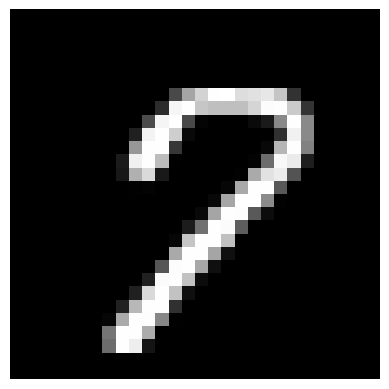

6 --- 6


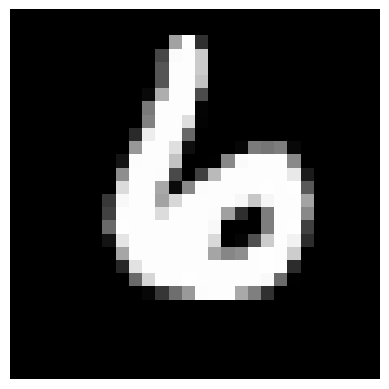

6 --- 6


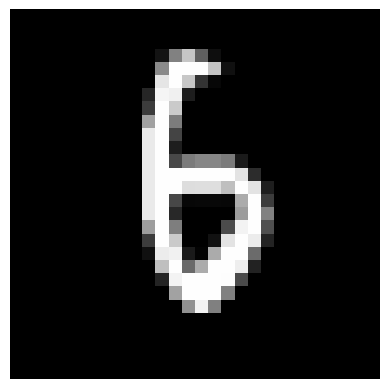

6 --- 6


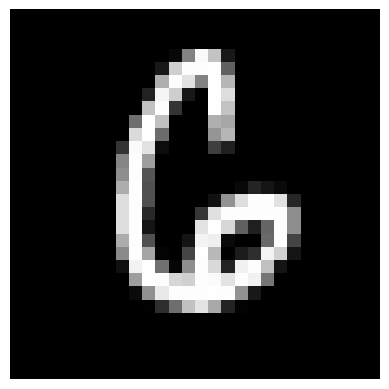

9 --- 9


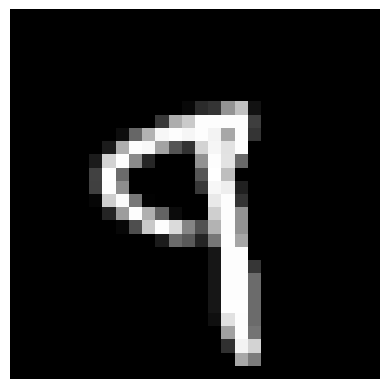

5 --- 5


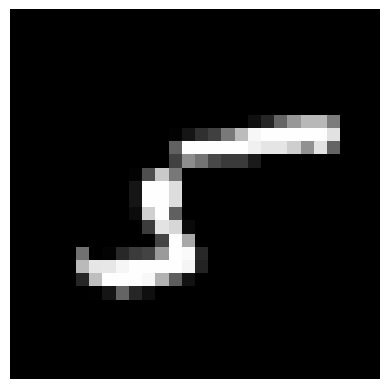

5 --- 5


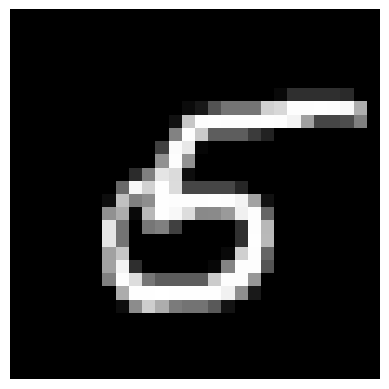

3 --- 3


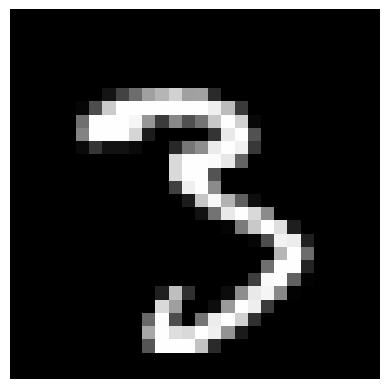

8 --- 8


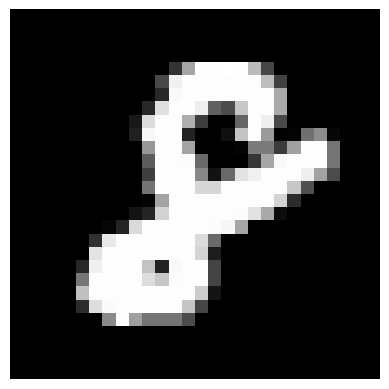

2 --- 2


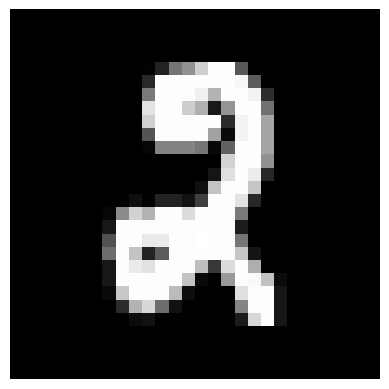

6 --- 6


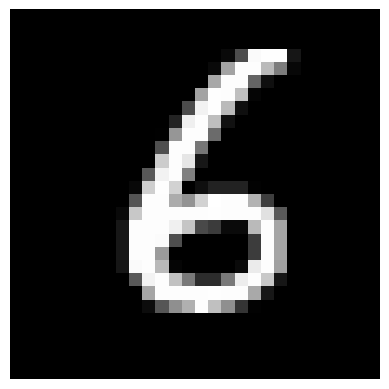

9 --- 9


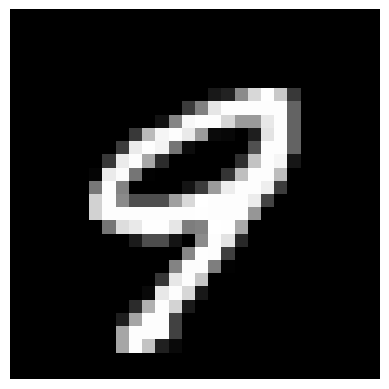

6 --- 6


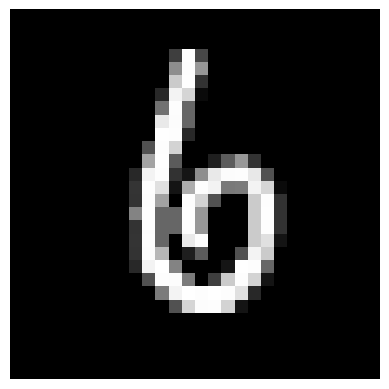

9 --- 9


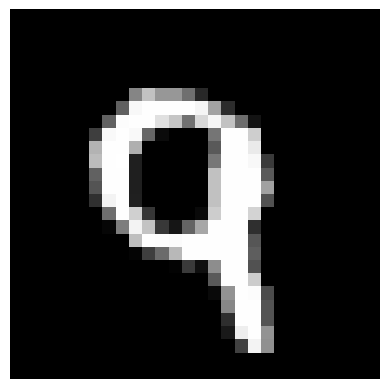

9 --- 9


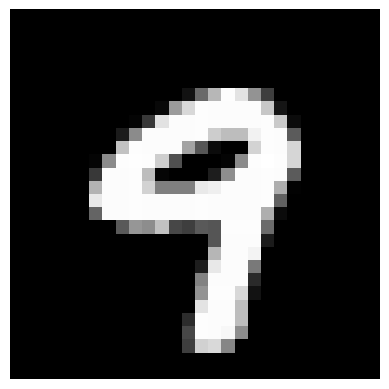

7 --- 7


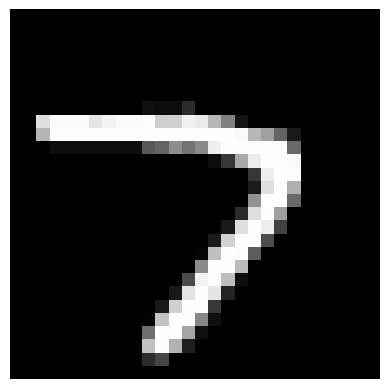

7 --- 7


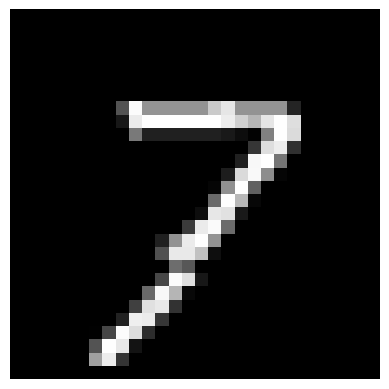

0 --- 0


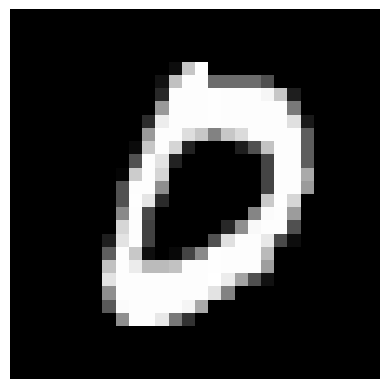

6 --- 6


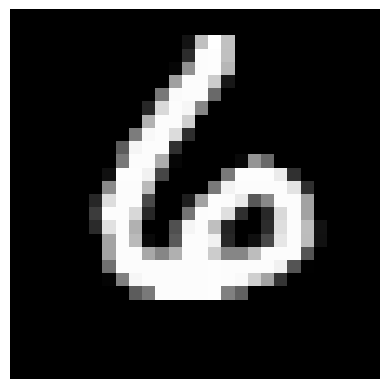

9 --- 9


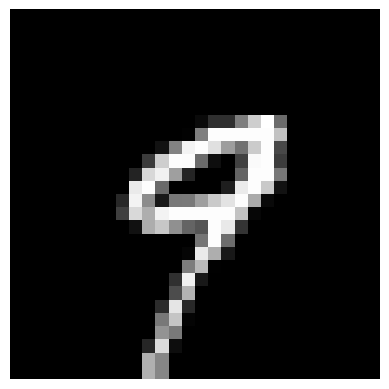

0 --- 0


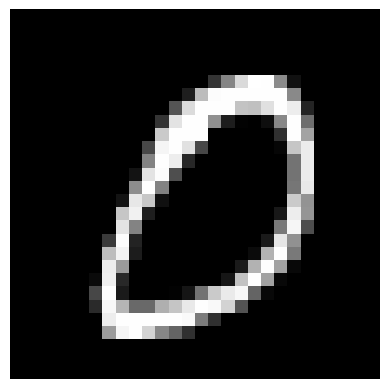

1 --- 1


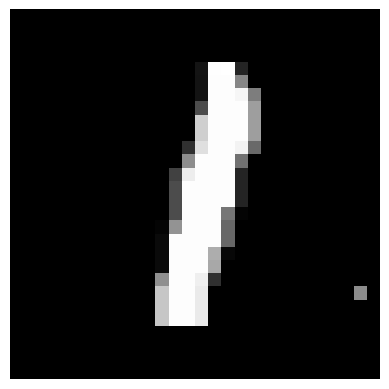

0 --- 0


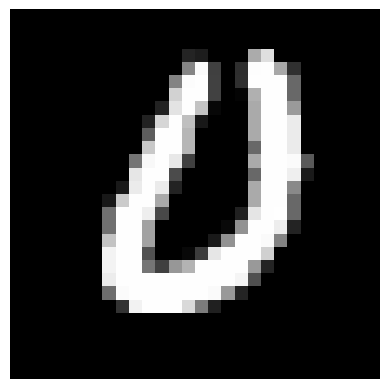

5 --- 5


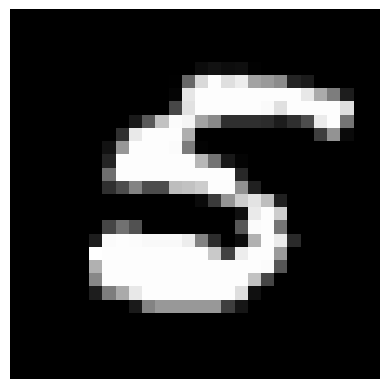

1 --- 1


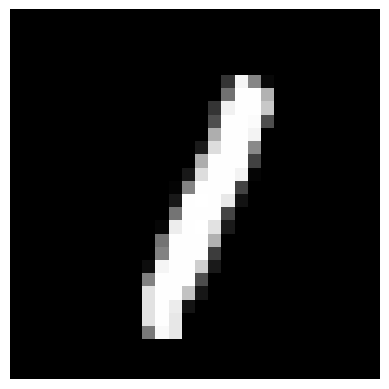

5 --- 5


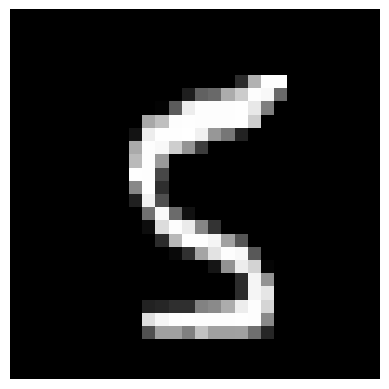

8 --- 8


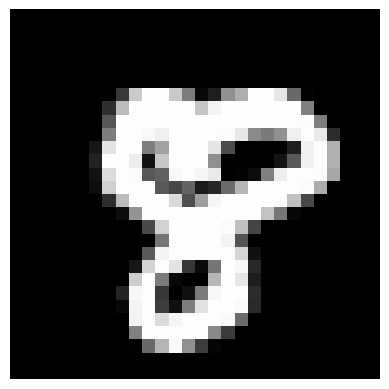

3 --- 3


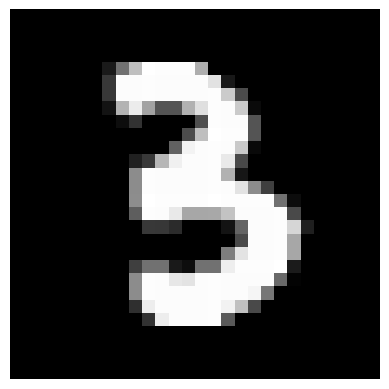

9 --- 9


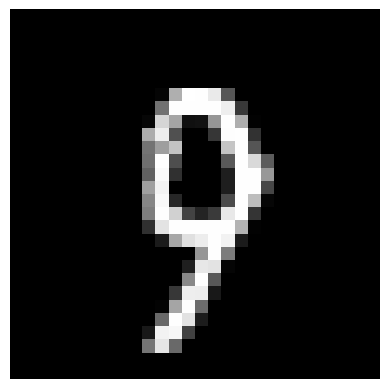

7 --- 7


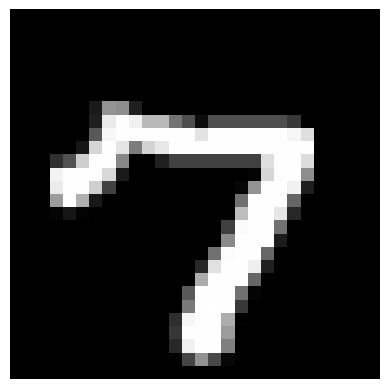

5 --- 5


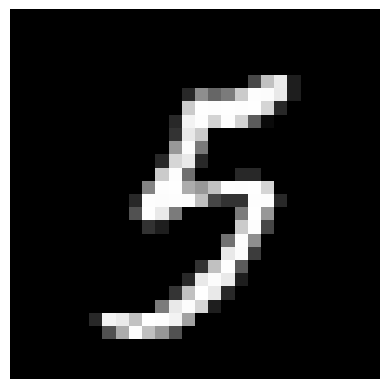

4 --- 4


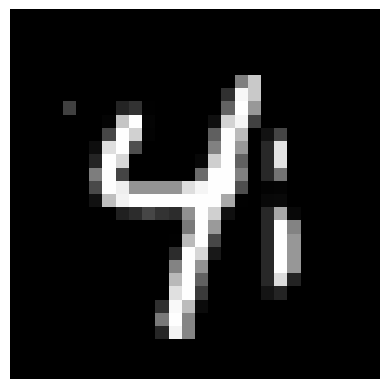

3 --- 3


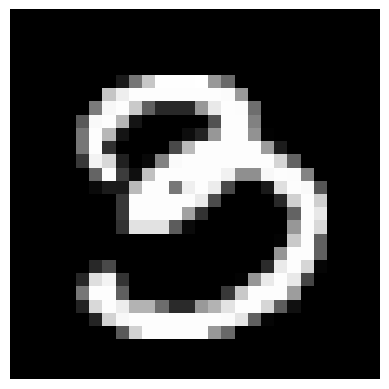

7 --- 7


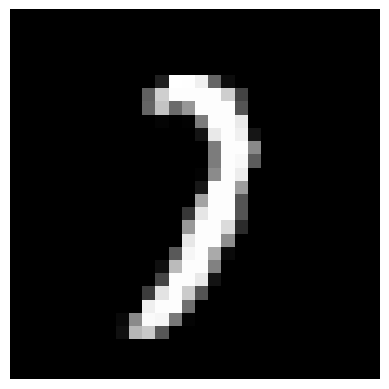

2 --- 2


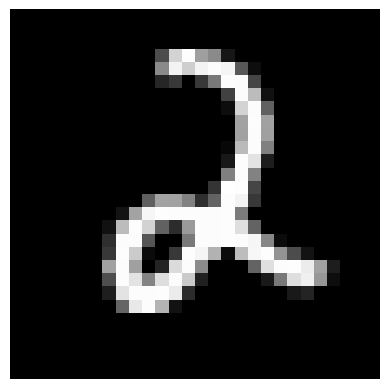

1 --- 1


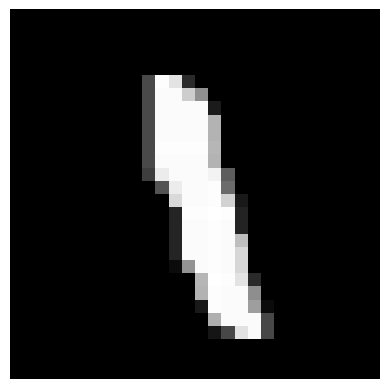

1 --- 1


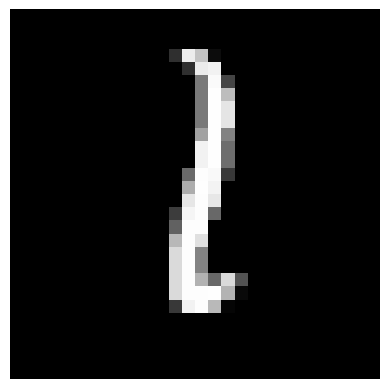

0 --- 0


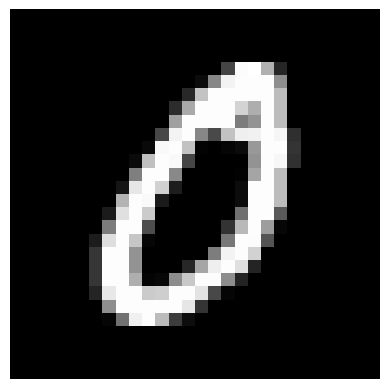

6 --- 6


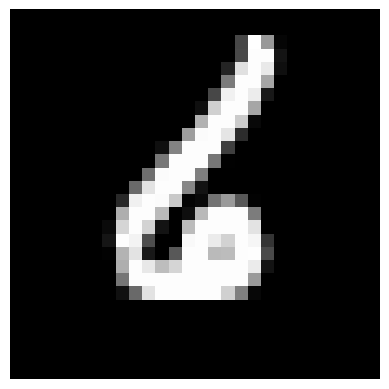

8 --- 8


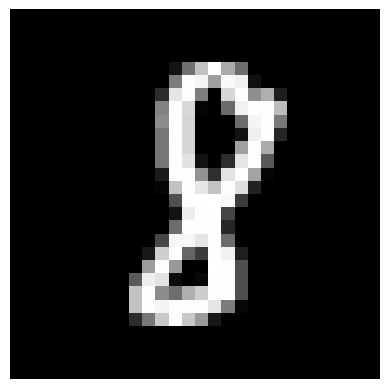

0 --- 0


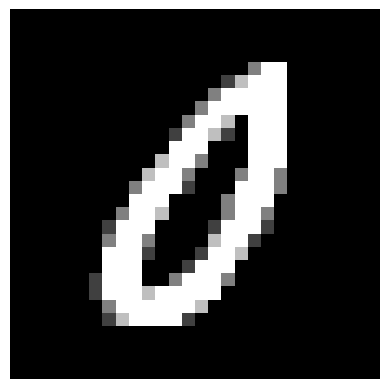

0 --- 0


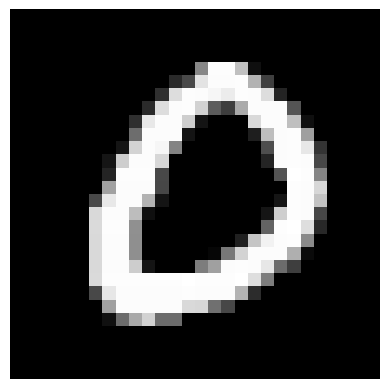

4 --- 4


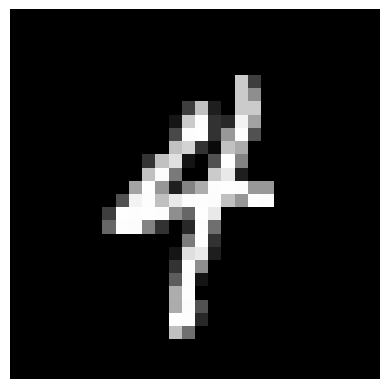

9 --- 9


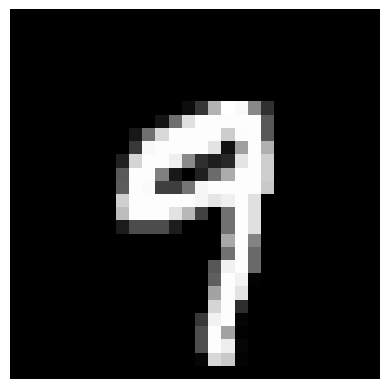

2 --- 2


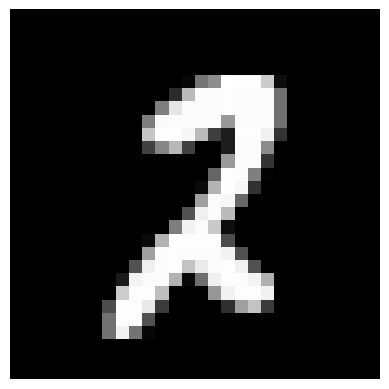

8 --- 8


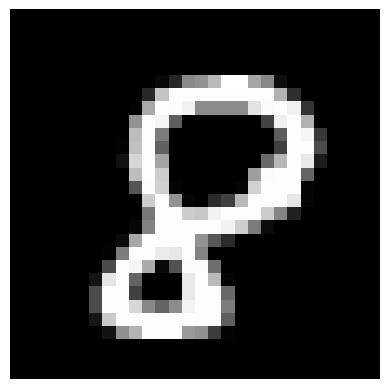

3 --- 3


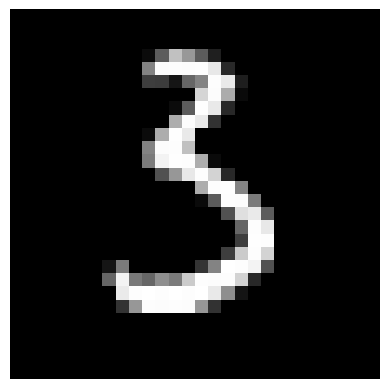

3 --- 3


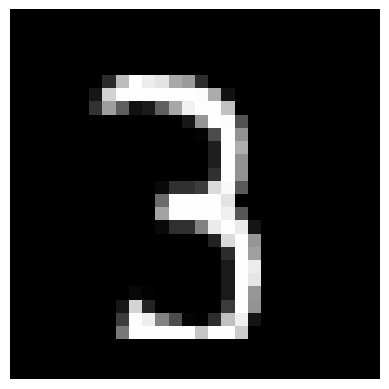

2 --- 2


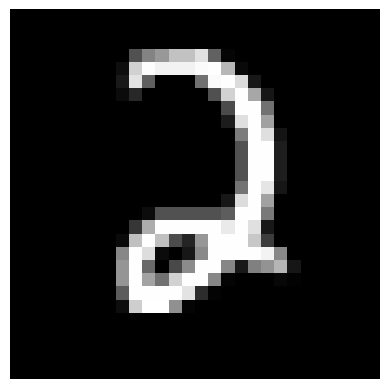

1 --- 1


1 --- 1


7 --- 7


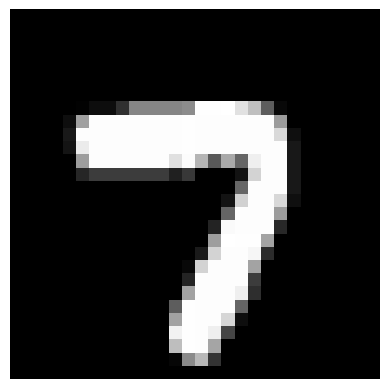

4 --- 4


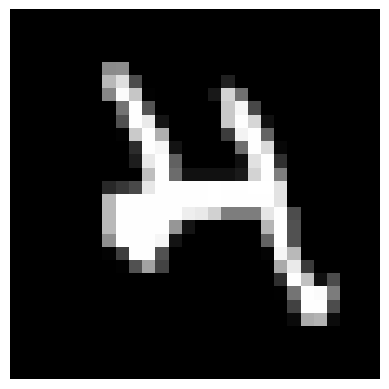

7 --- 7


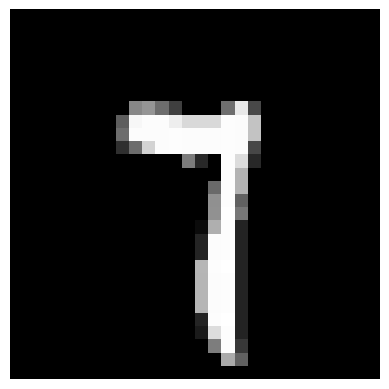

3 --- 3


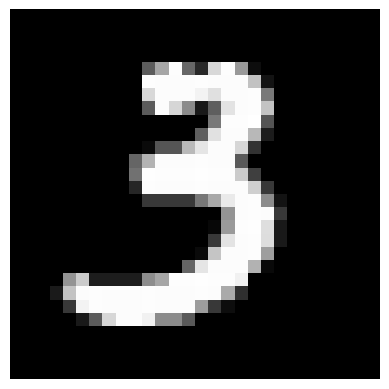

4 --- 4


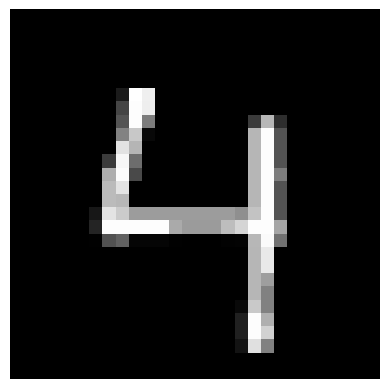

3 --- 3


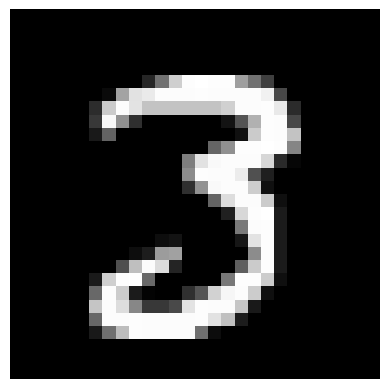

2 --- 7


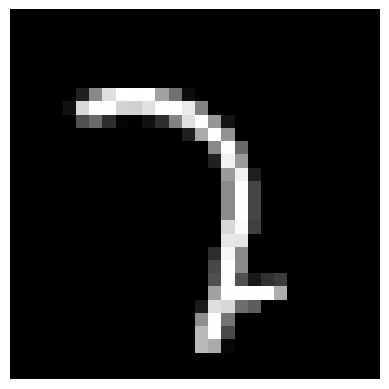

7 --- 7


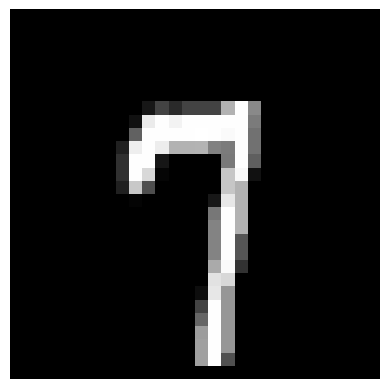

9 --- 9


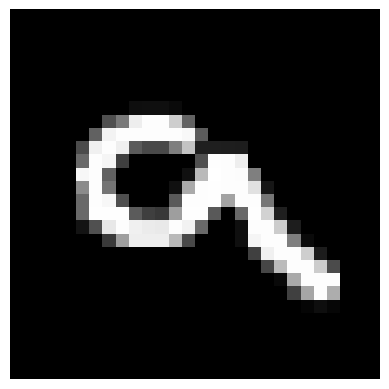

0 --- 0


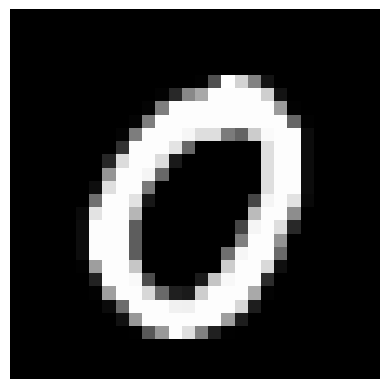

5 --- 5


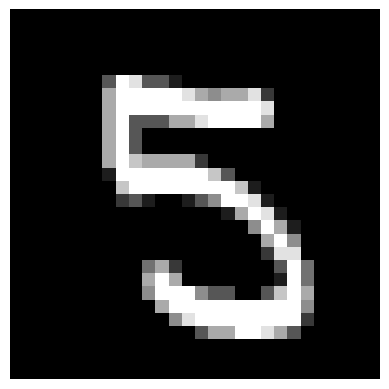

9 --- 9


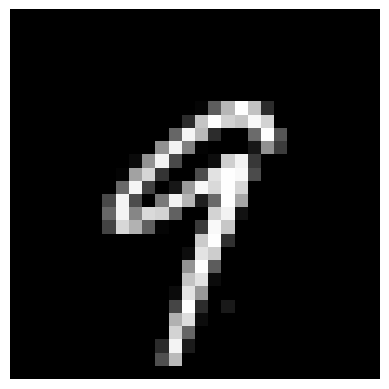

2 --- 2


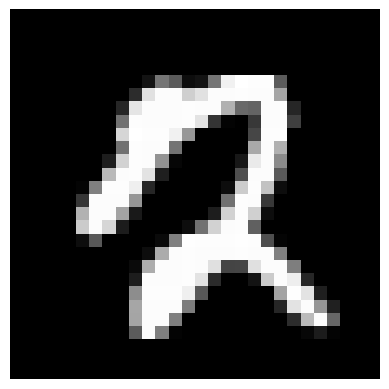

4 --- 4


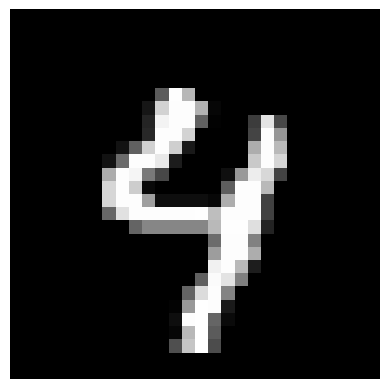

0 --- 0


6 --- 6


9 --- 9


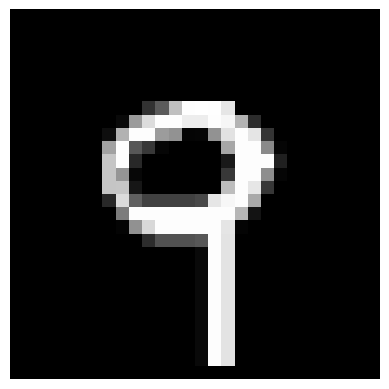

4 --- 4


4 --- 4


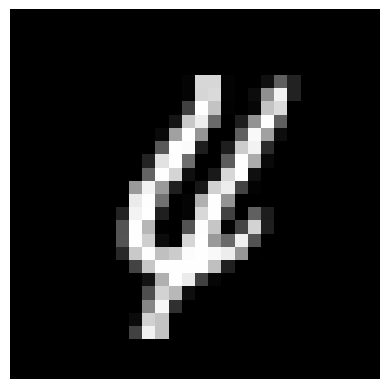

7 --- 7


7 --- 7


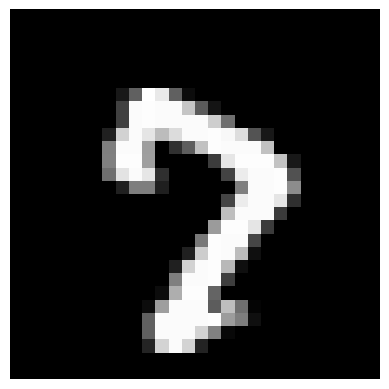

1 --- 1


6 --- 6


2 --- 2


6 --- 6


2 --- 2


0 --- 0


0 --- 0


3 --- 3


4 --- 4


9 --- 9


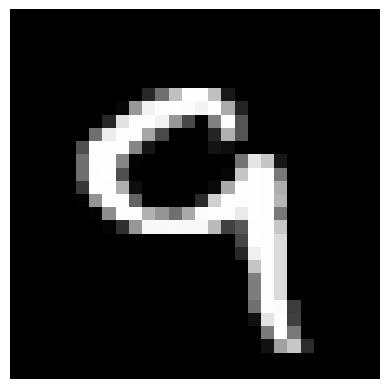

4 --- 4


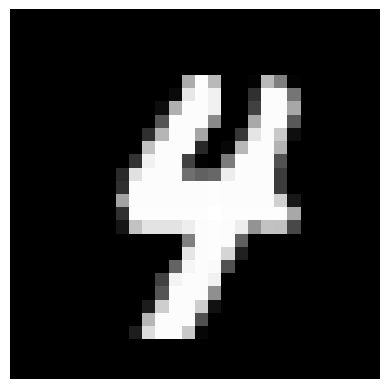

7 --- 7


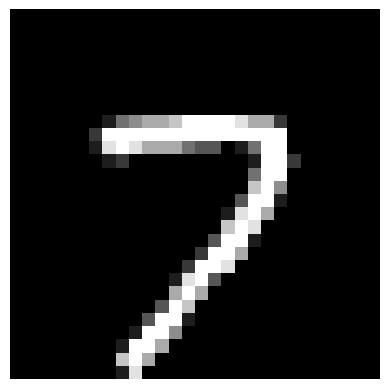

4 --- 4


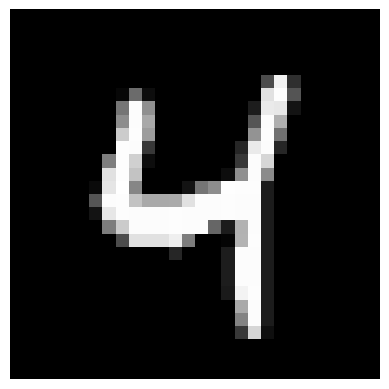

1 --- 1


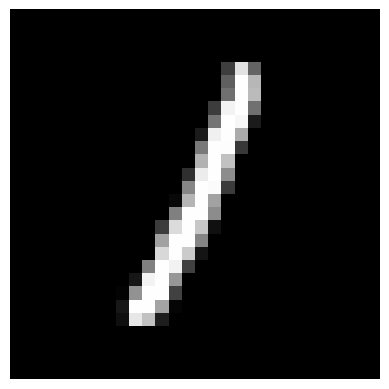

9 --- 9


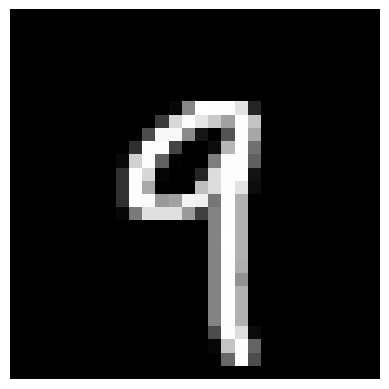

7 --- 7


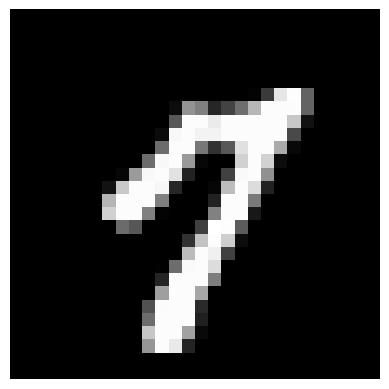

8 --- 8


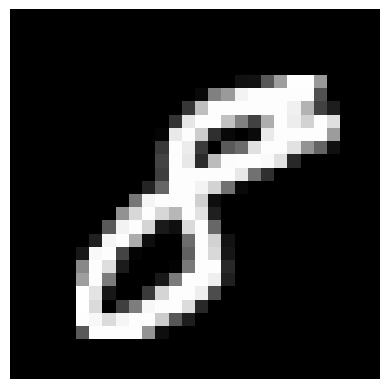

9 --- 9


9 --- 9


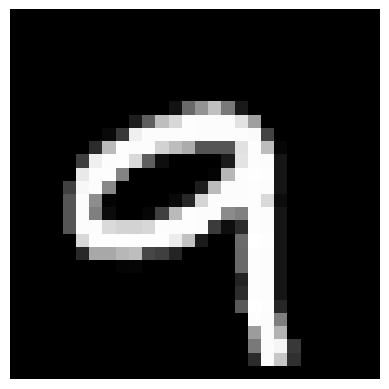

3 --- 3


7 --- 7


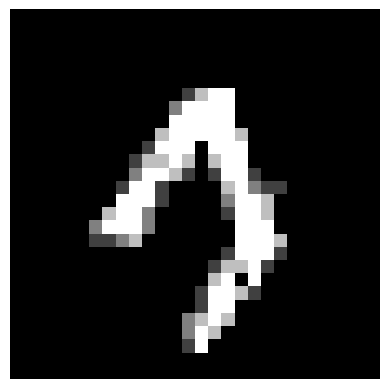

0 --- 0


8 --- 8


1 --- 1


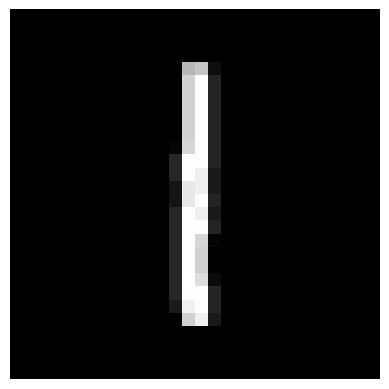

4 --- 4


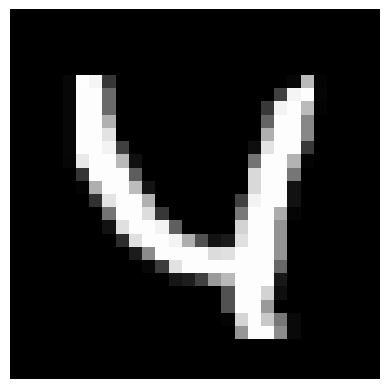

9 --- 9


0 --- 0


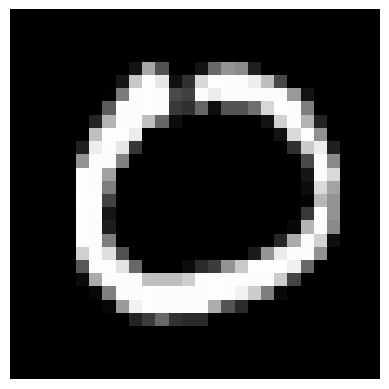

4 --- 4


3 --- 3


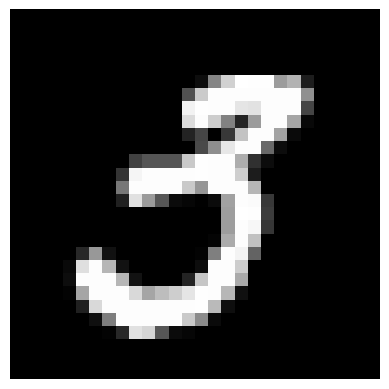

6 --- 6


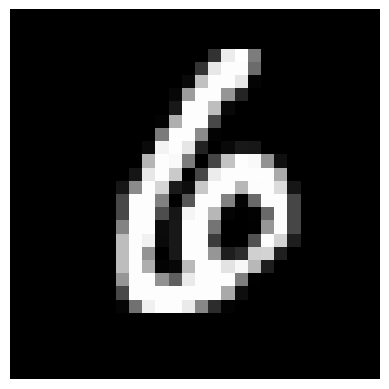

5 --- 5


2 --- 2


7 --- 7


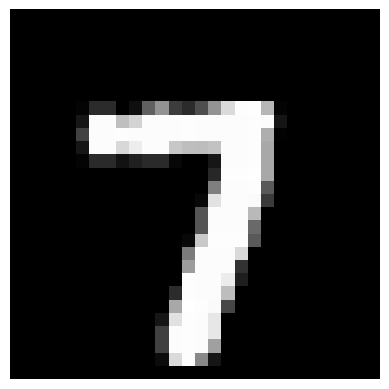

1 --- 1


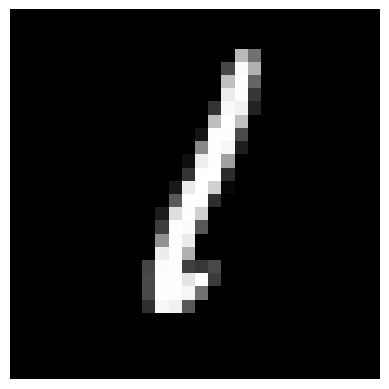

0 --- 0


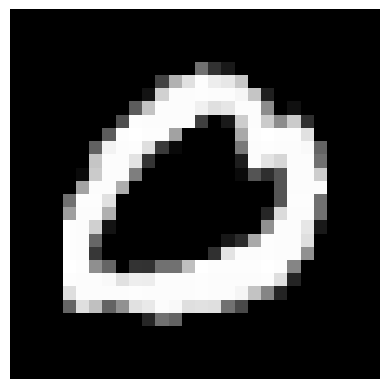

0 --- 0


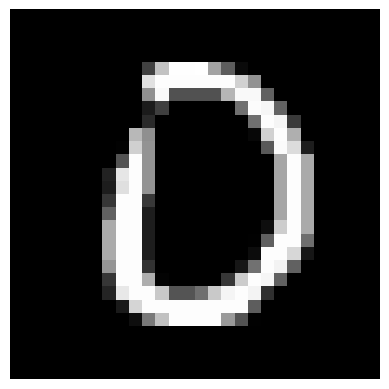

9 --- 9


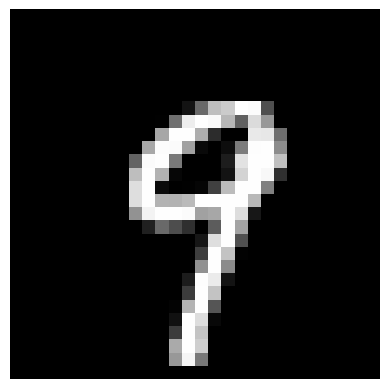

8 --- 8


1 --- 1


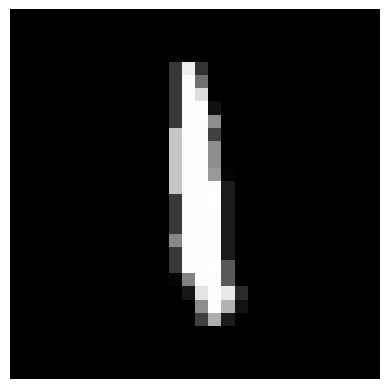

2 --- 2


8 --- 8


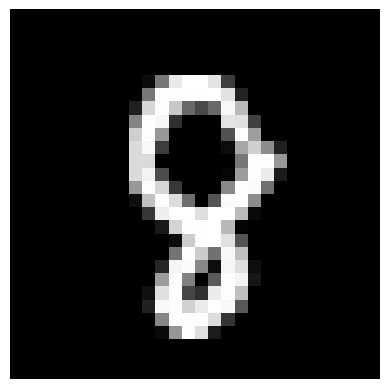

7 --- 7


1 --- 1


3 --- 3


9 --- 9


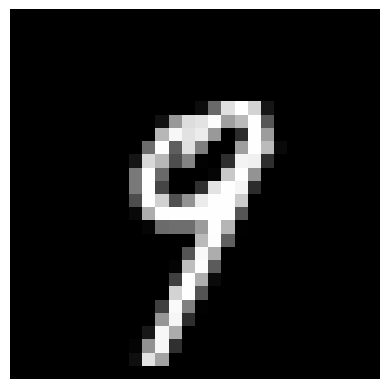

0 --- 0


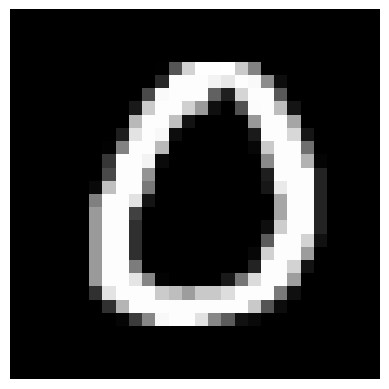

7 --- 7


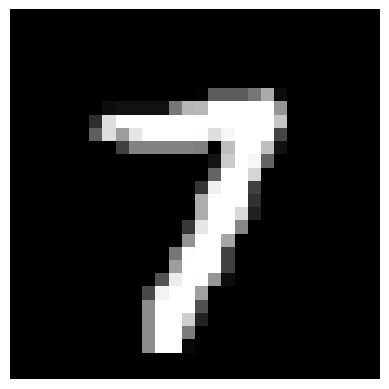

7 --- 7


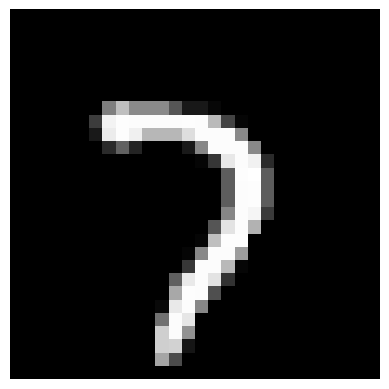

2 --- 2


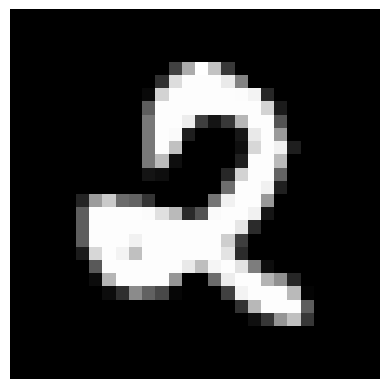

0 --- 0


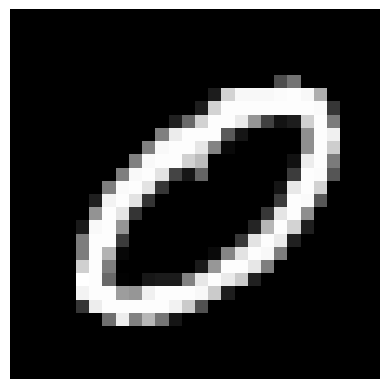

3 --- 3


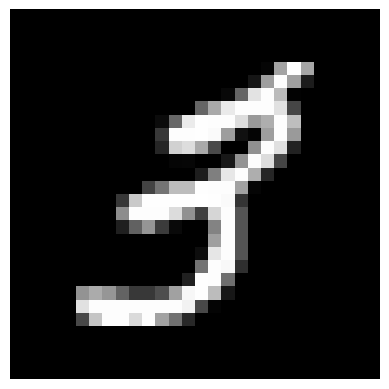

0 --- 0


5 --- 5


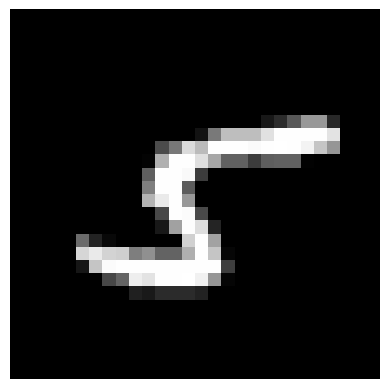

3 --- 3


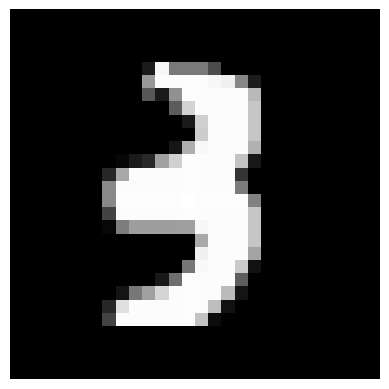

0 --- 0


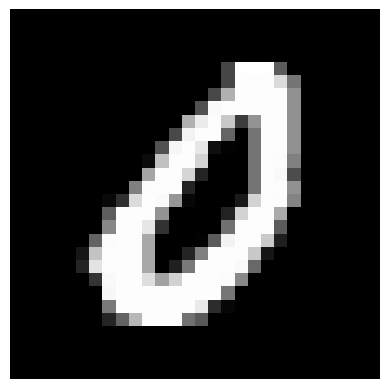

4 --- 4


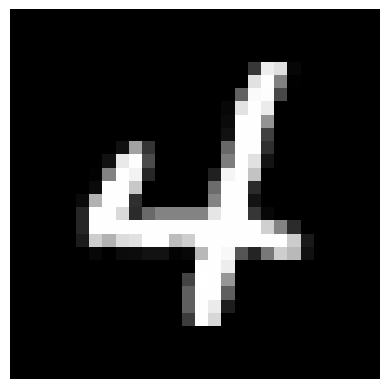

2 --- 2


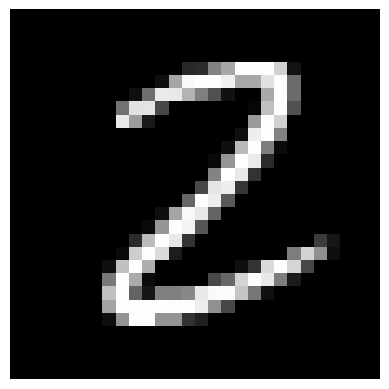

0 --- 0


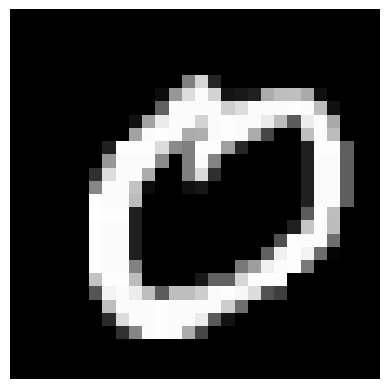

5 --- 5


7 --- 7


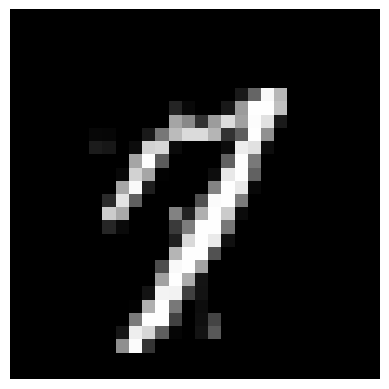

7 --- 7


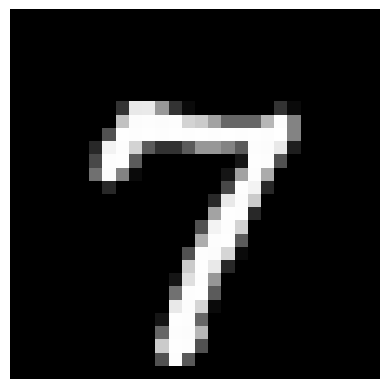

8 --- 8


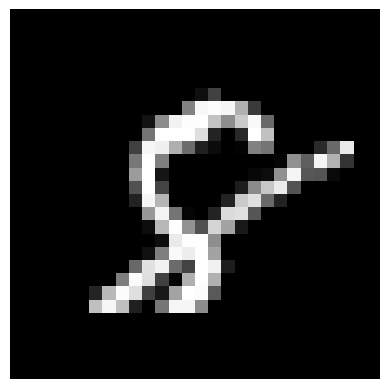

3 --- 3


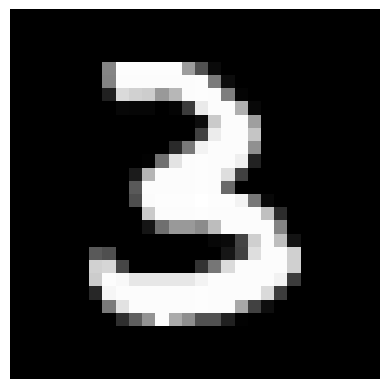

3 --- 3


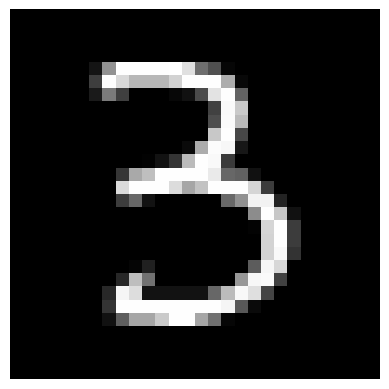

6 --- 6


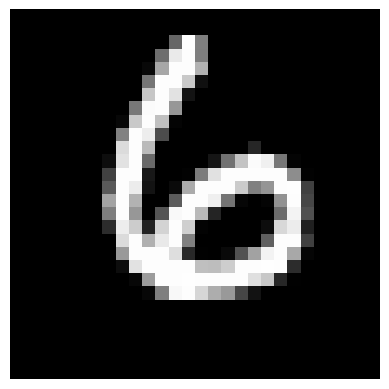

5 --- 5


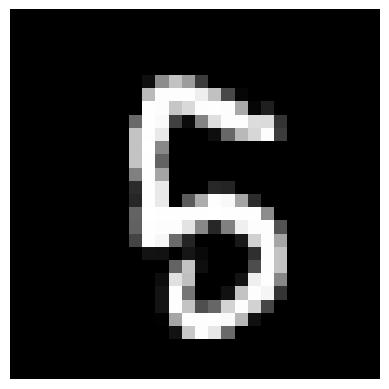

3 --- 3


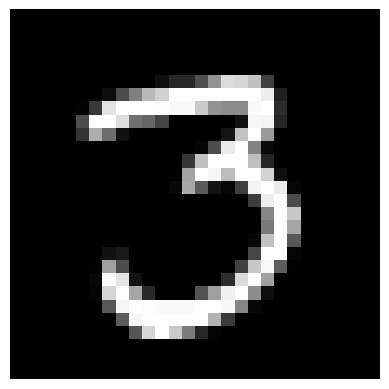

8 --- 8


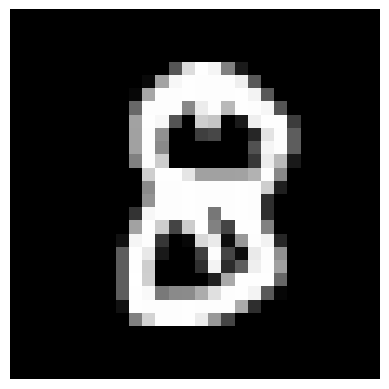

6 --- 6


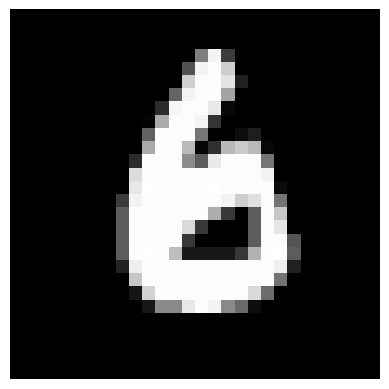

4 --- 4


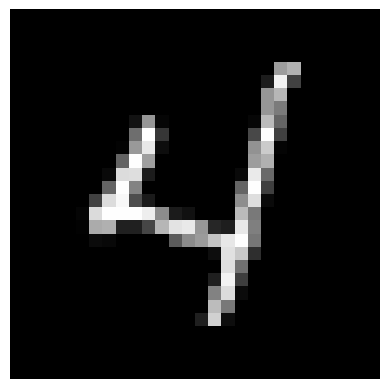

3 --- 3


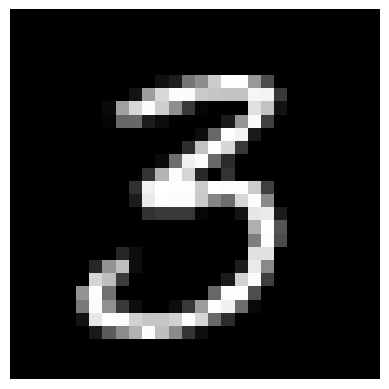

6 --- 6


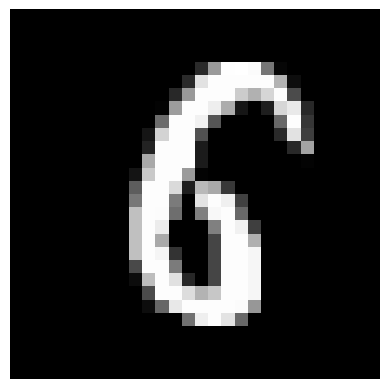

5 --- 5


1 --- 1


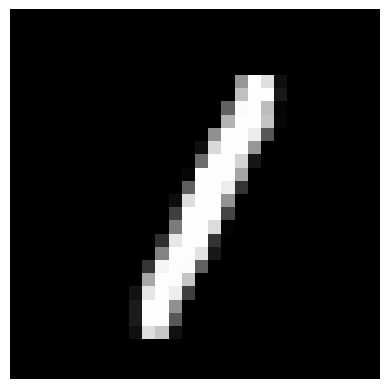

1 --- 1


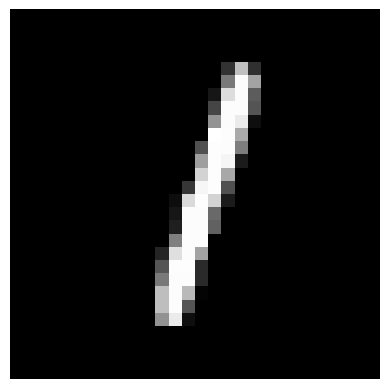

8 --- 8


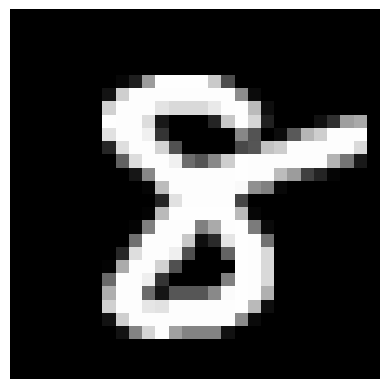

6 --- 6


1 --- 1


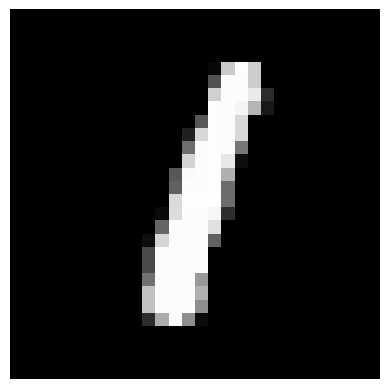

1 --- 1


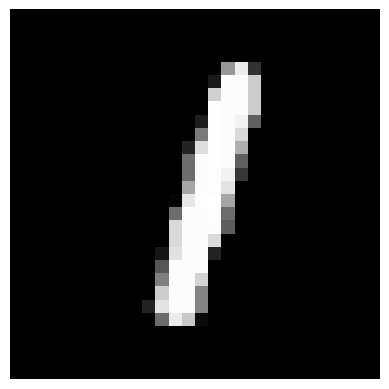

7 --- 7


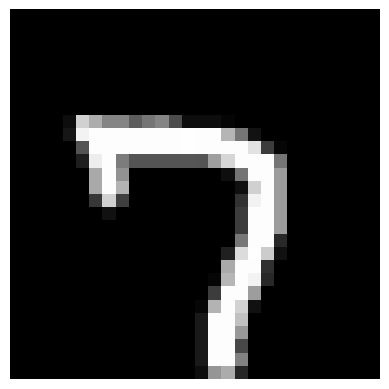

9 --- 9


3 --- 3


7 --- 7


2 --- 2


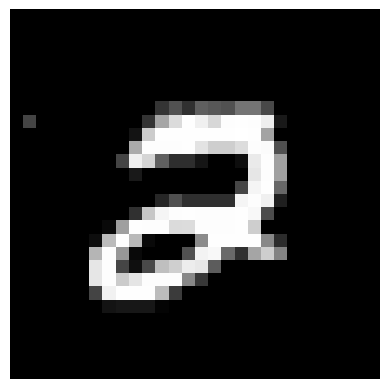

8 --- 8


8 --- 8


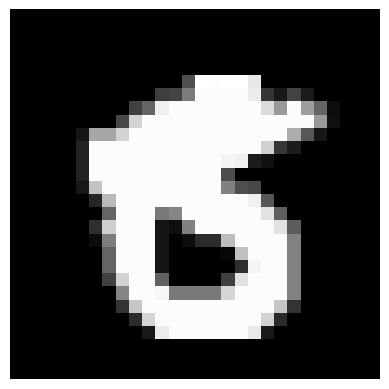

5 --- 5


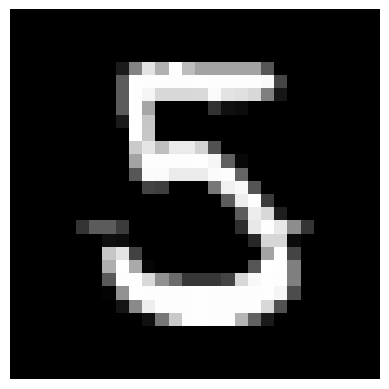

8 --- 8


3 --- 3


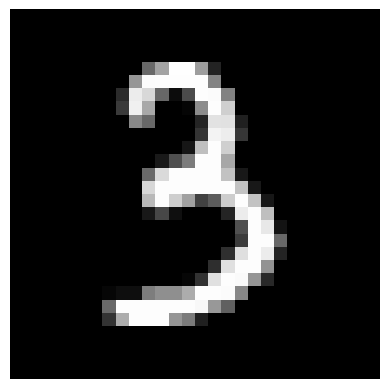

2 --- 2


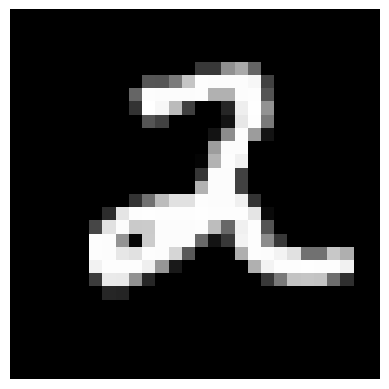

6 --- 6


5 --- 5


8 --- 8


5 --- 5


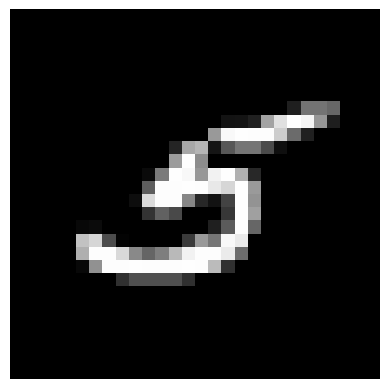

7 --- 7


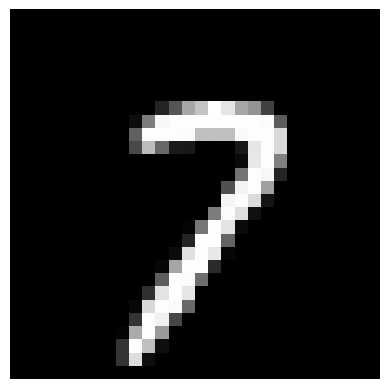

7 --- 7


0 --- 0


2 --- 2


6 --- 6


5 --- 5


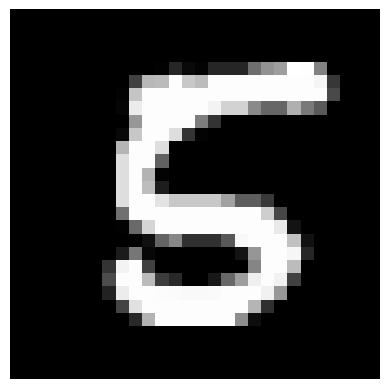

0 --- 0


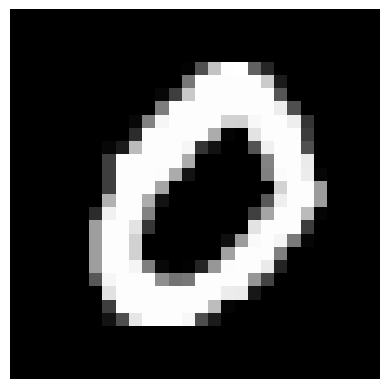

8 --- 8


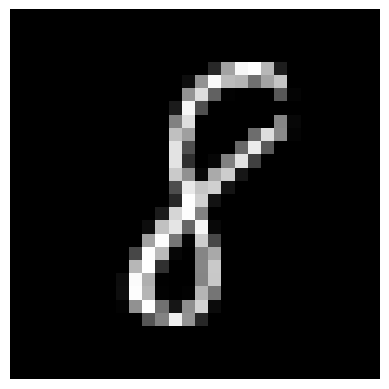

8 --- 8


0 --- 0


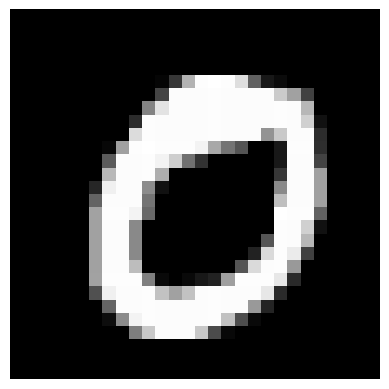

1 --- 1


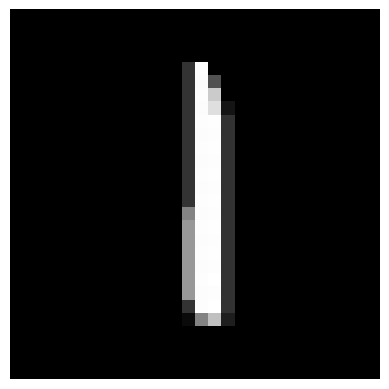

1 --- 1


6 --- 6


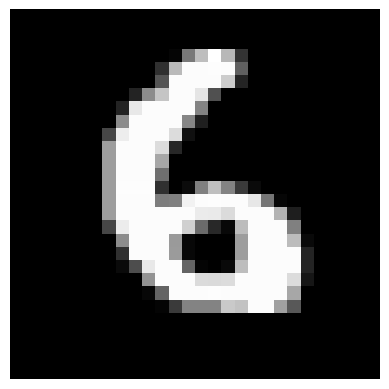

1 --- 1


3 --- 3


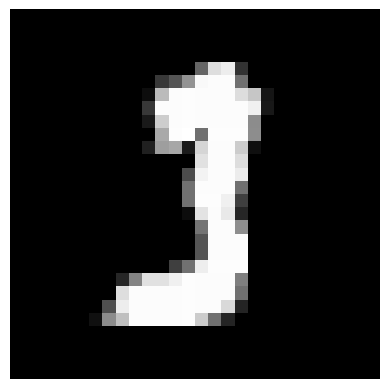

9 --- 9


3 --- 3


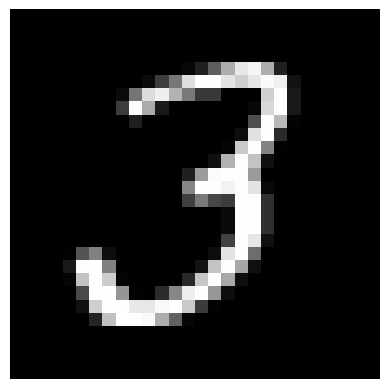

0 --- 0


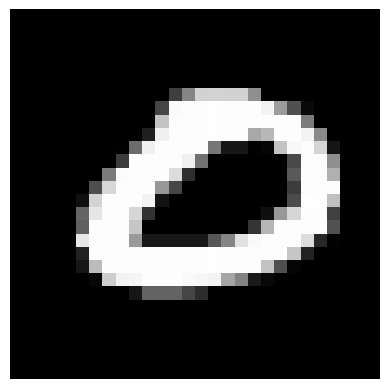

6 --- 6


4 --- 4


1 --- 1


8 --- 8


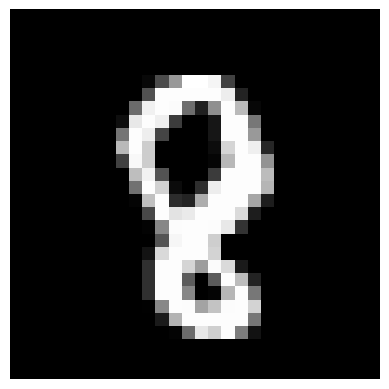

1 --- 1


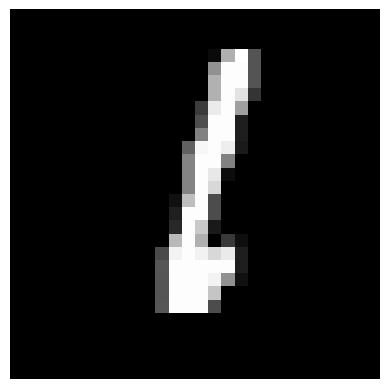

7 --- 7


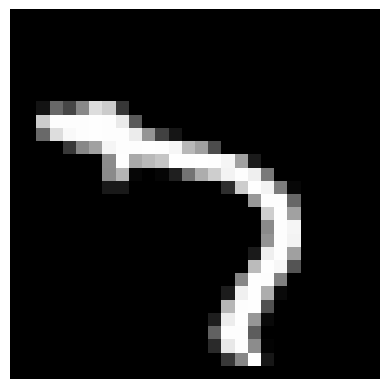

1 --- 1


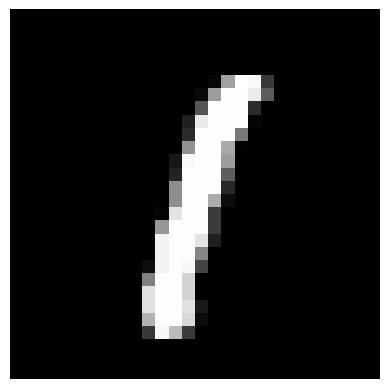

8 --- 8


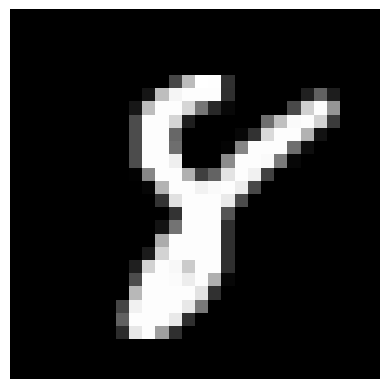

4 --- 4


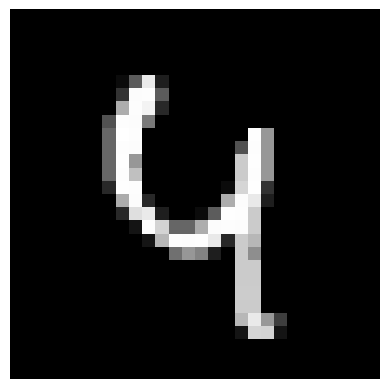

0 --- 0


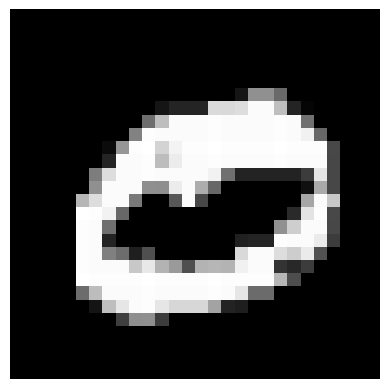

6 --- 6


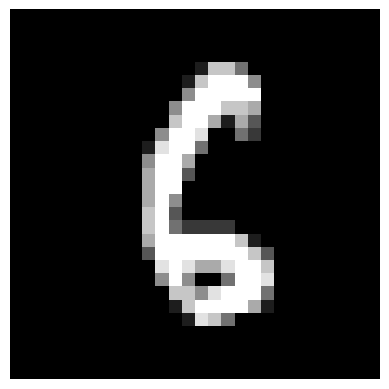

3 --- 3


1 --- 1


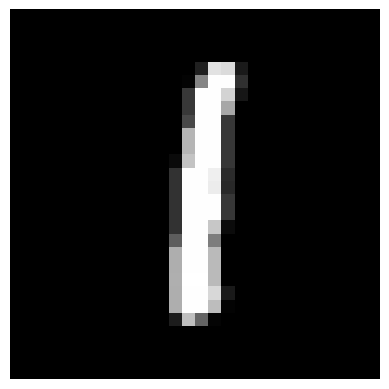

4 --- 4


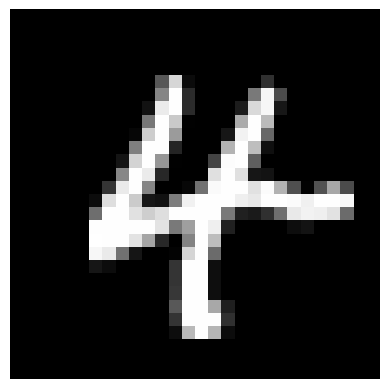

7 --- 7


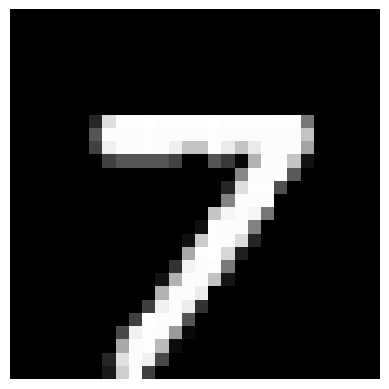

9 --- 9


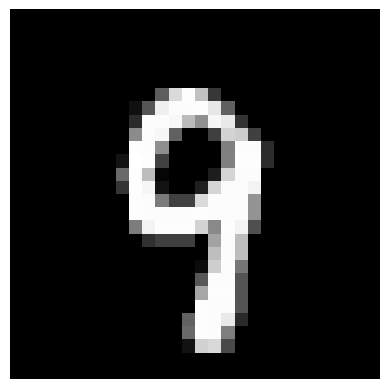

1 --- 1


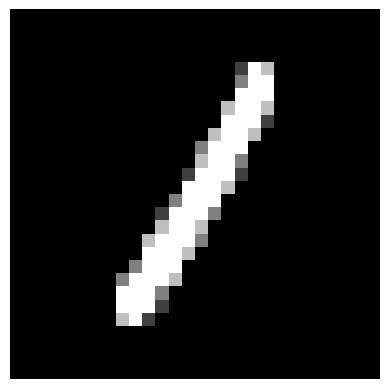

3 --- 3


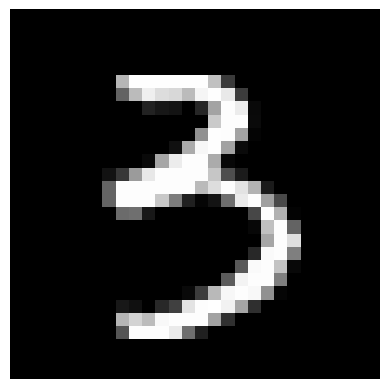

2 --- 2


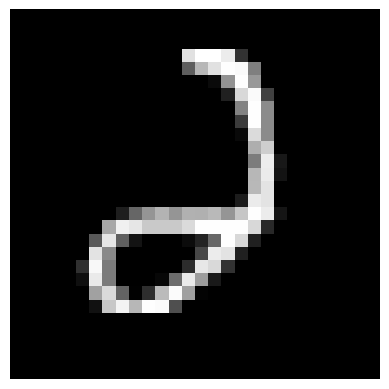

2 --- 2


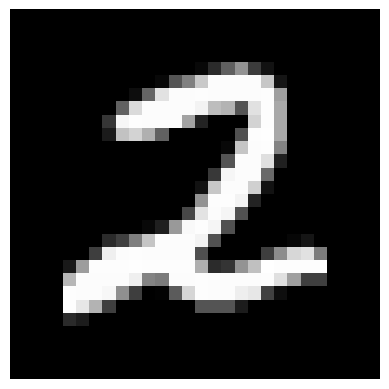

3 --- 3


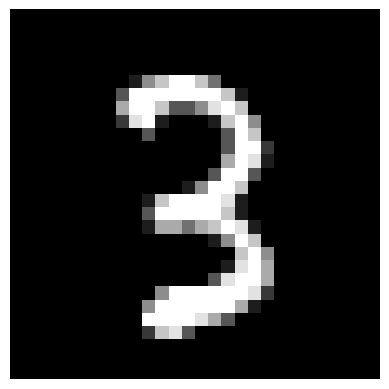

7 --- 7


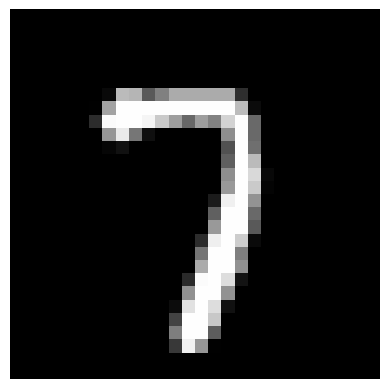

8 --- 8


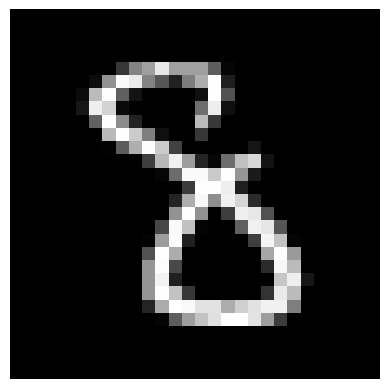

4 --- 4


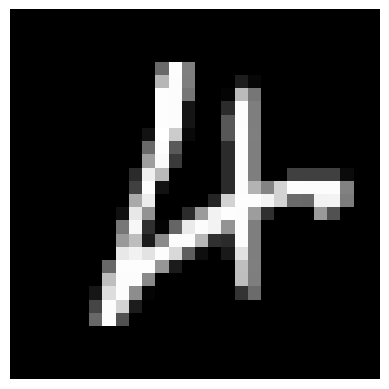

3 --- 3


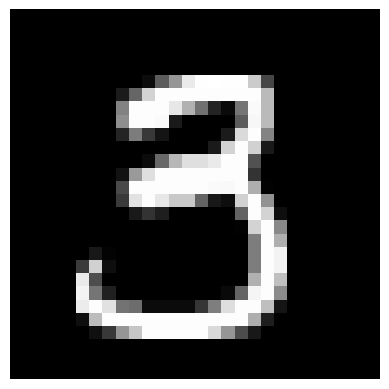

9 --- 9


6 --- 6


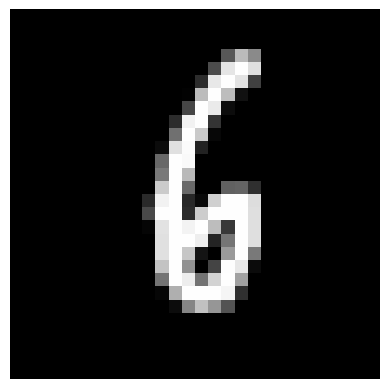

1 --- 1


1 --- 1


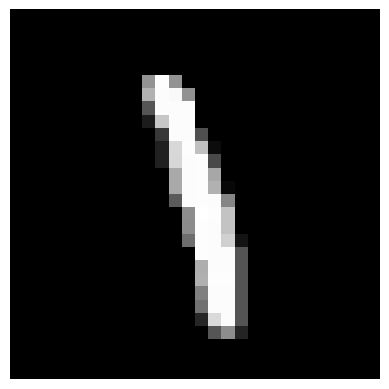

2 --- 2


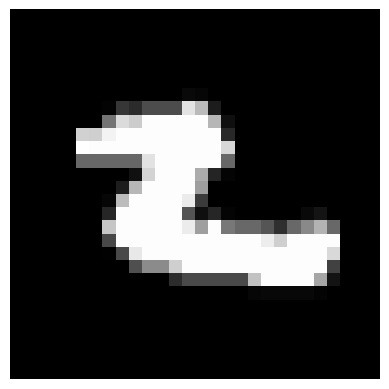

0 --- 0


2 --- 2


0 --- 0


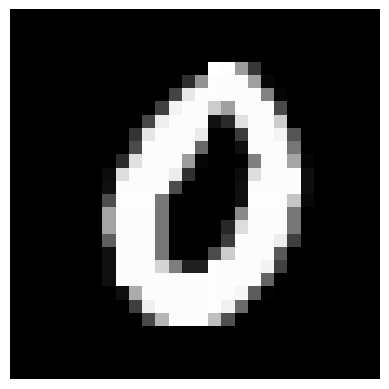

7 --- 7


0 --- 0


1 --- 1


4 --- 4


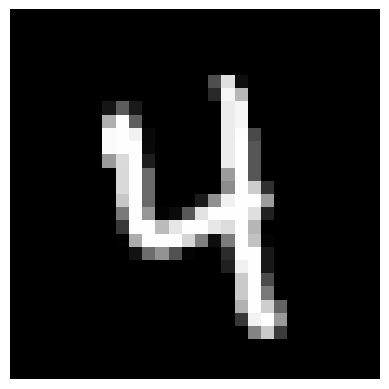

7 --- 7


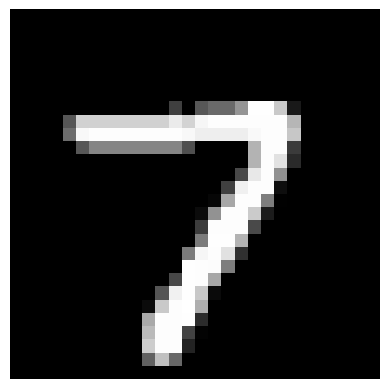

0 --- 0


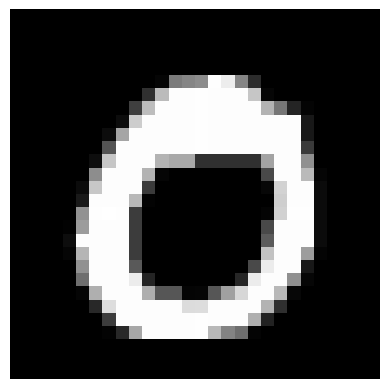

0 --- 0


1 --- 1


8 --- 8


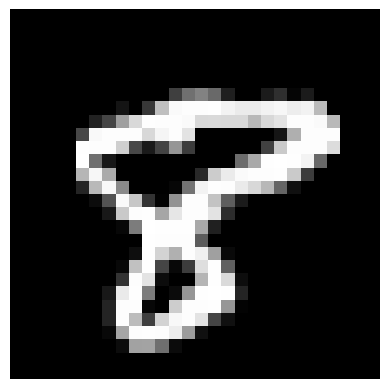

1 --- 1


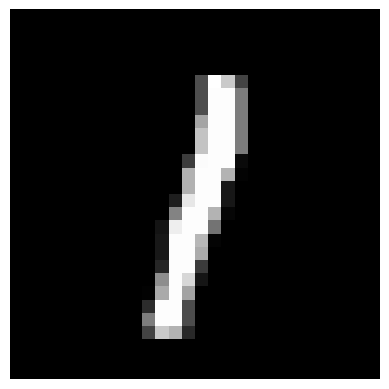

7 --- 7


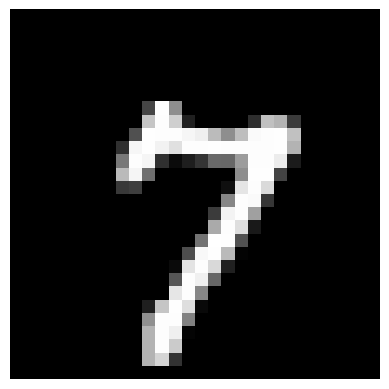

3 --- 3


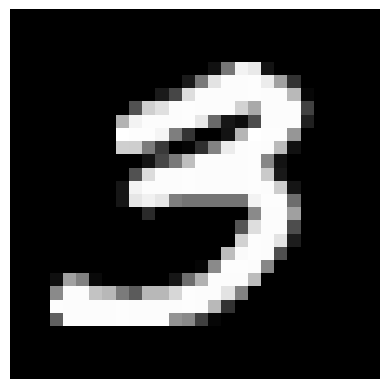

5 --- 5


4 --- 4


1 --- 1


8 --- 8


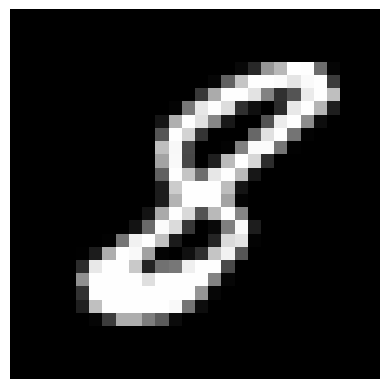

8 --- 8


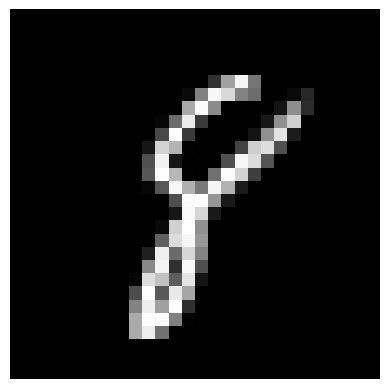

9 --- 9


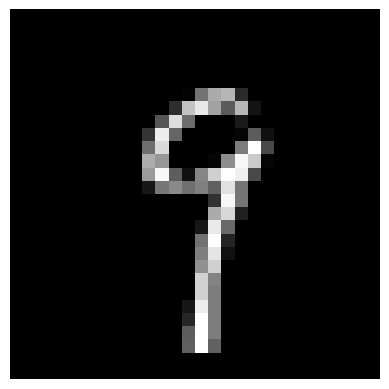

3 --- 3


0 --- 0


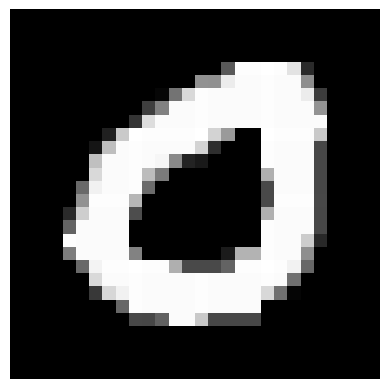

7 --- 7


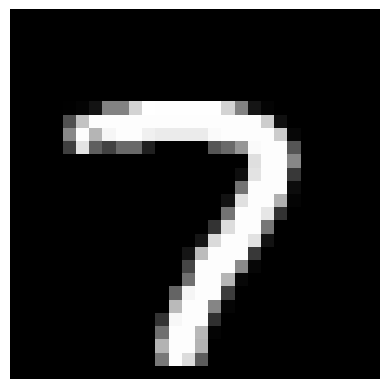

4 --- 4


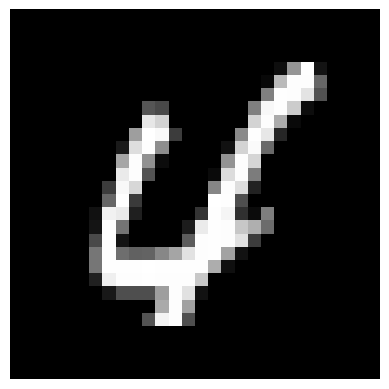

0 --- 0


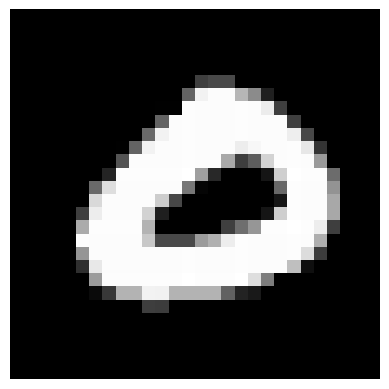

9 --- 9


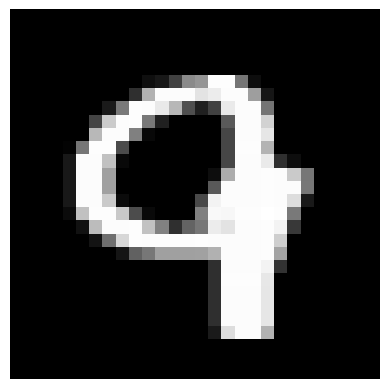

2 --- 2


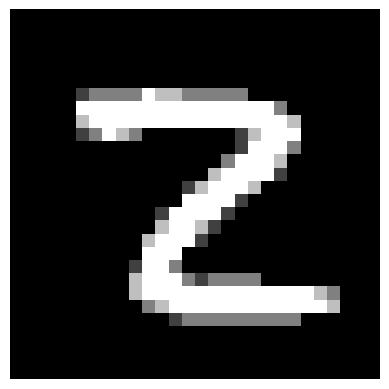

9 --- 9


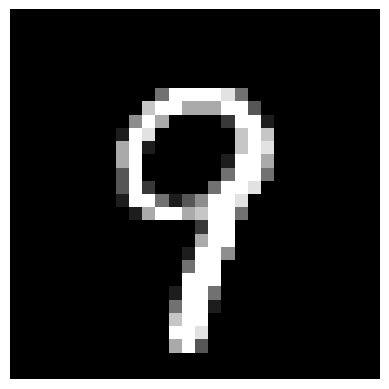

2 --- 2


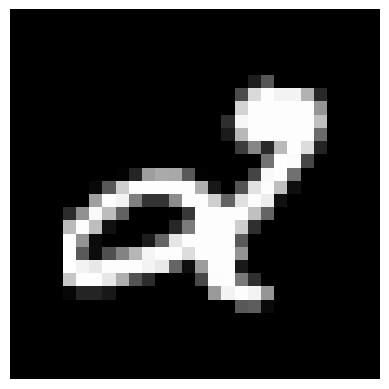

4 --- 4


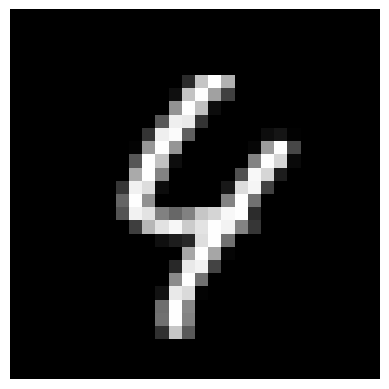

5 --- 5


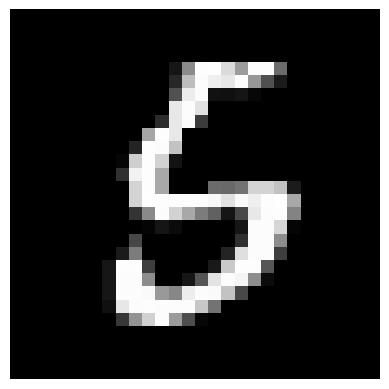

2 --- 2


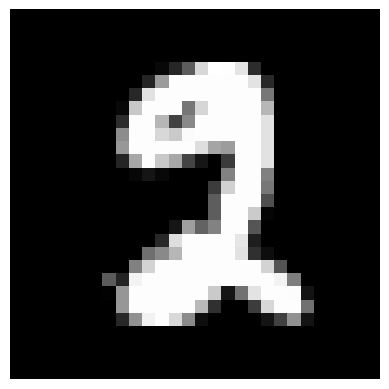

3 --- 3


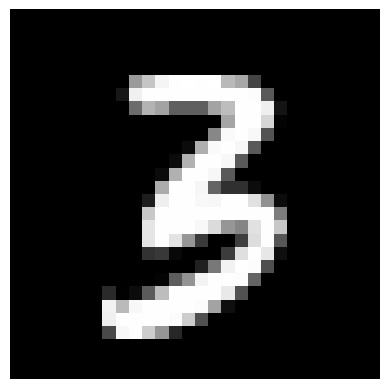

7 --- 7


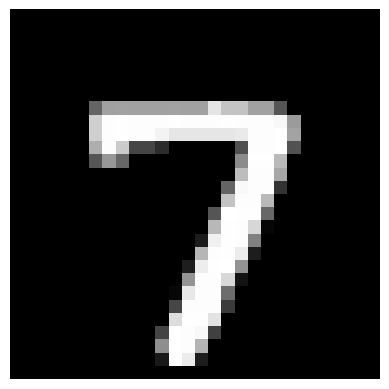

7 --- 7


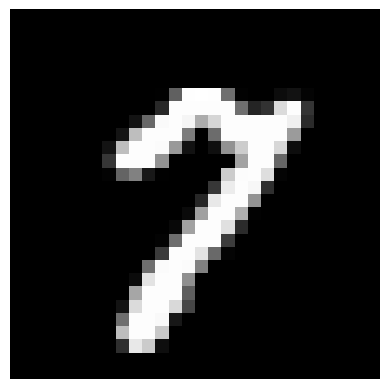

2 --- 2


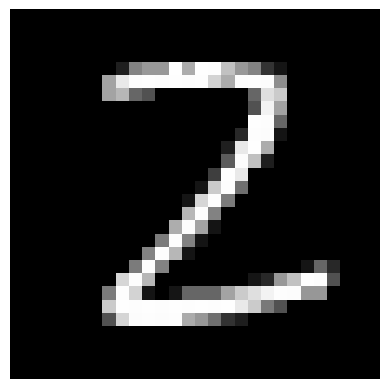

5 --- 5


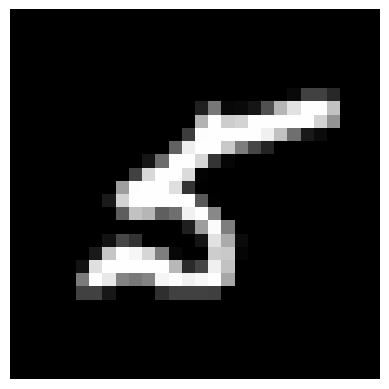

9 --- 9


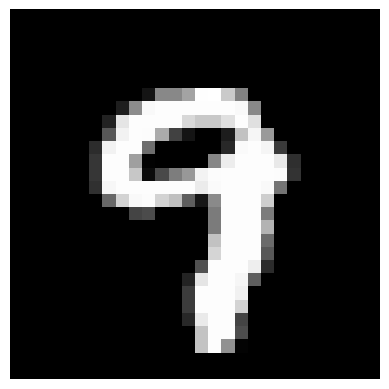

4 --- 4


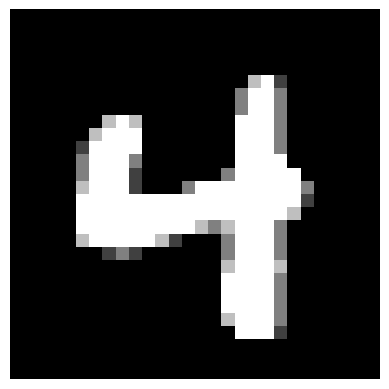

0 --- 0


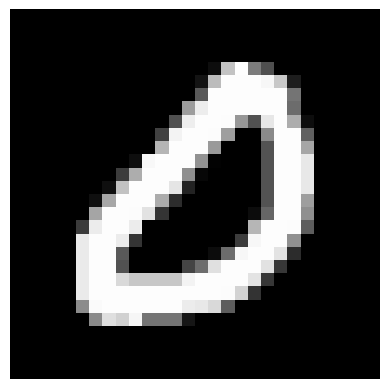

0 --- 0


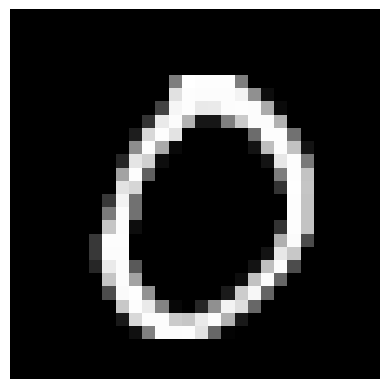

1 --- 1


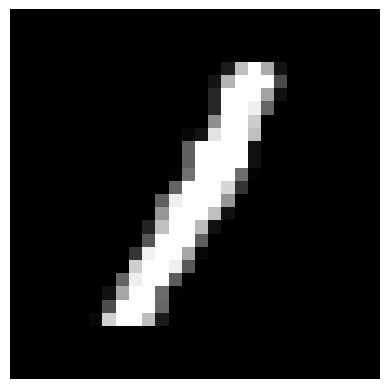

7 --- 7


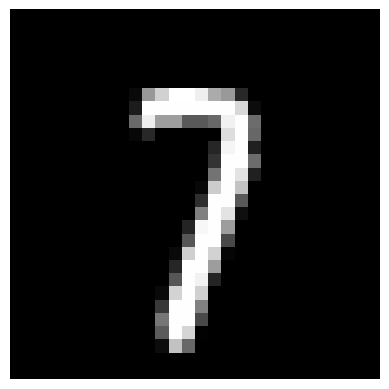

8 --- 8


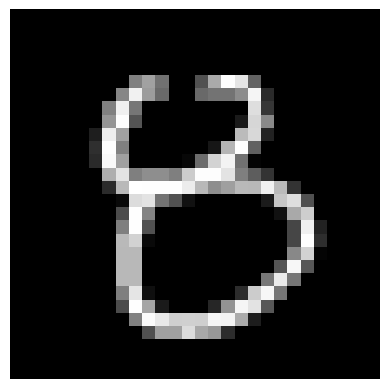

7 --- 7


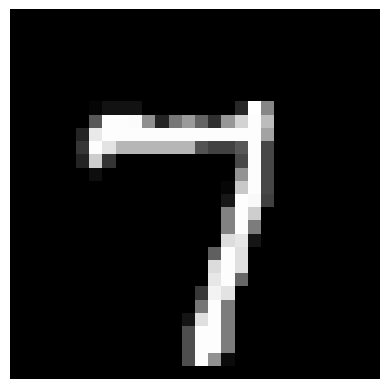

9 --- 9


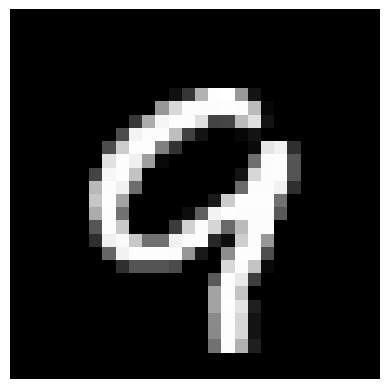

7 --- 7


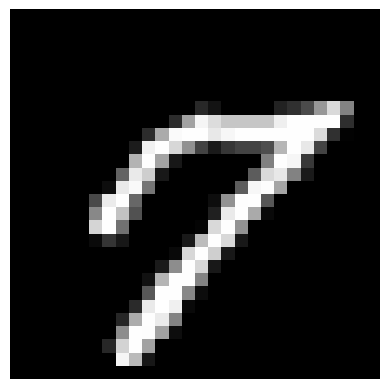

4 --- 4


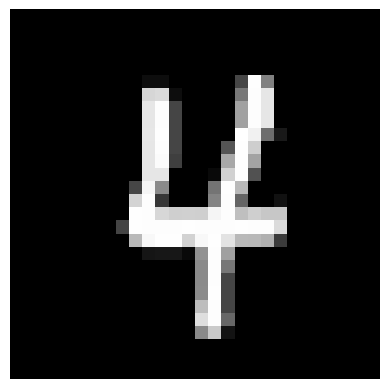

3 --- 3


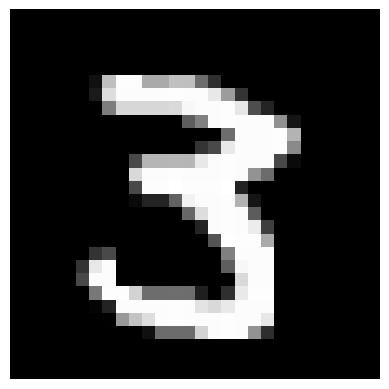

6 --- 6


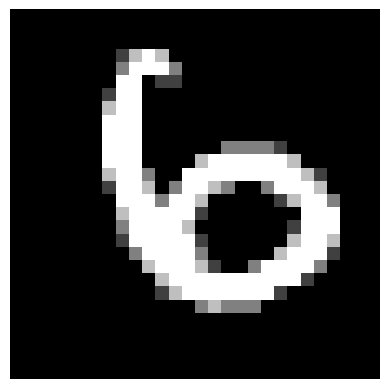

5 --- 5


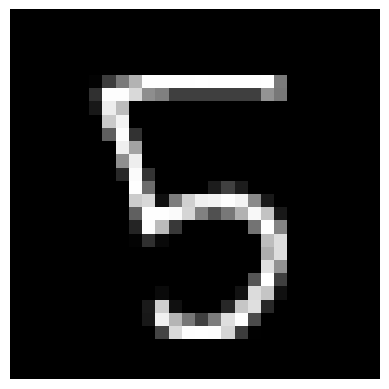

9 --- 9


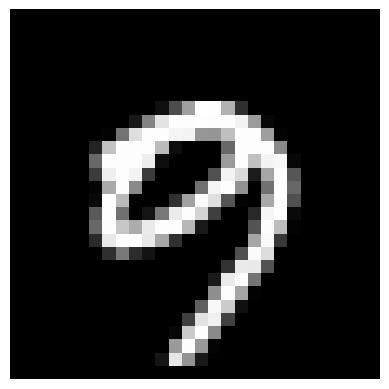

9 --- 9


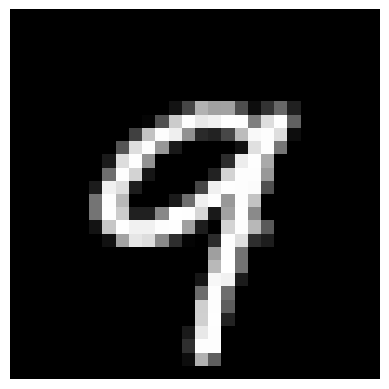

4 --- 4


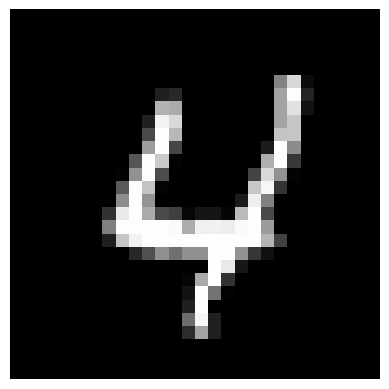

5 --- 5


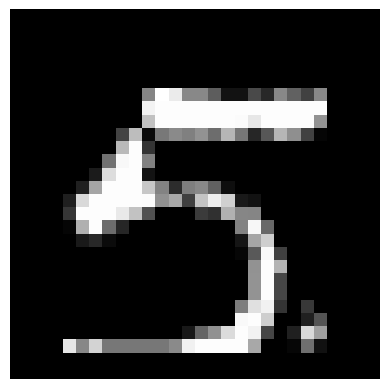

9 --- 9


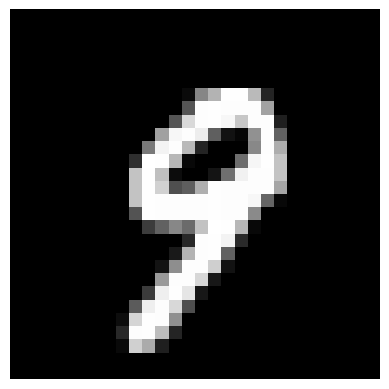

0 --- 0


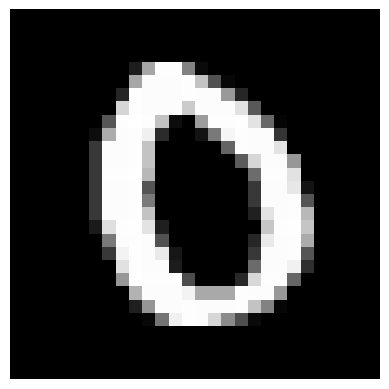

4 --- 4


9 --- 9


5 --- 5


1 --- 1


9 --- 9


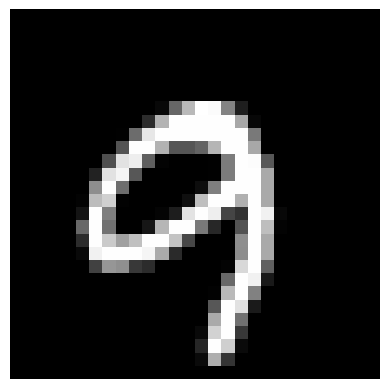

3 --- 3


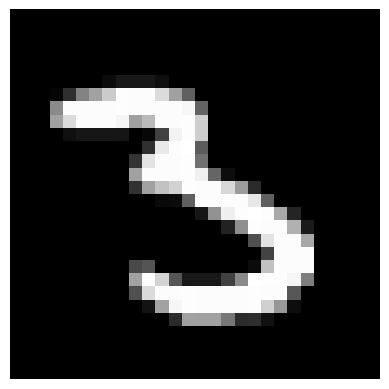

7 --- 7


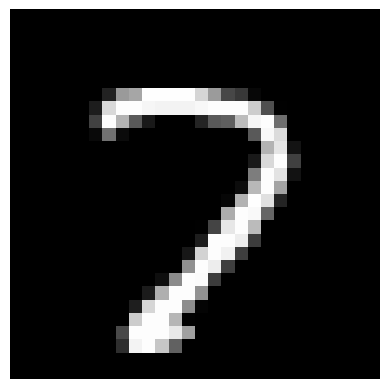

6 --- 6


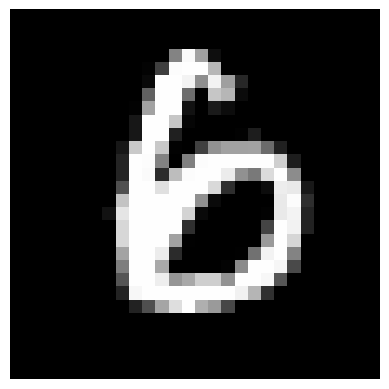

8 --- 8


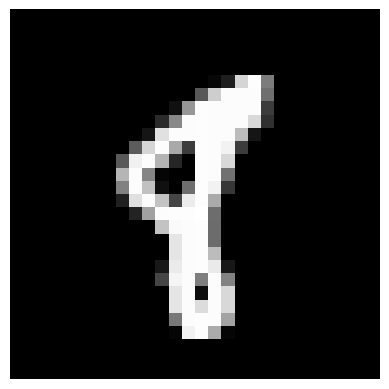

0 --- 0


3 --- 3


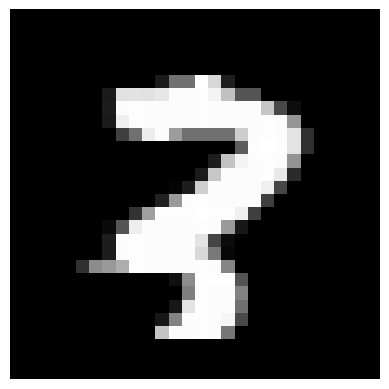

1 --- 1


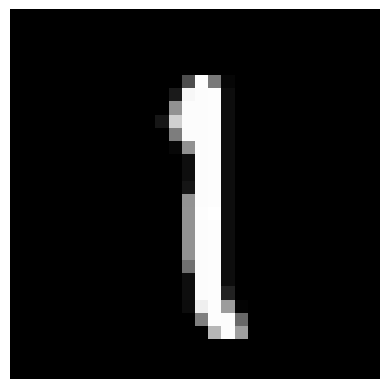

9 --- 9


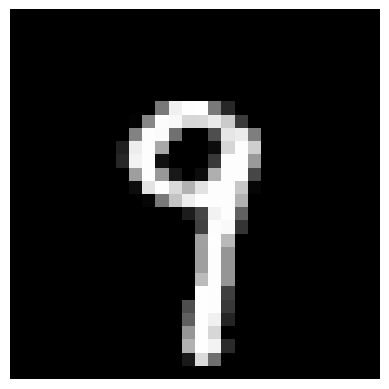

9 --- 9


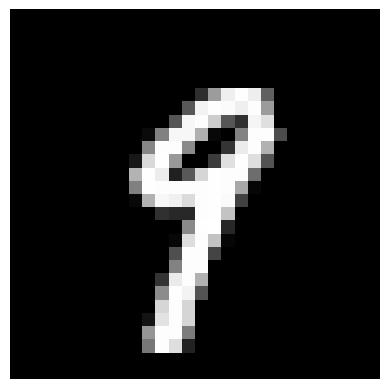

3 --- 3


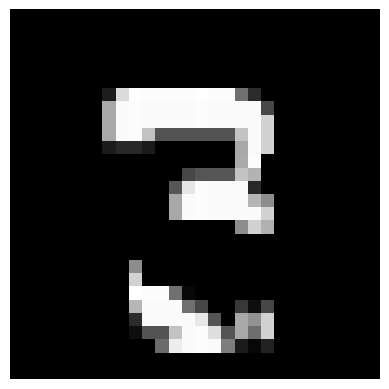

8 --- 8


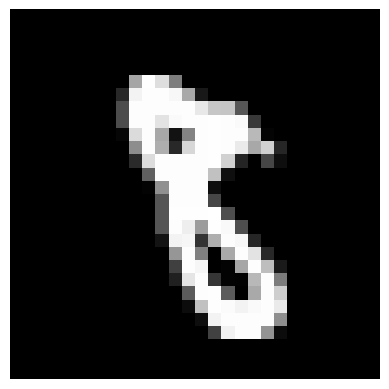

6 --- 6


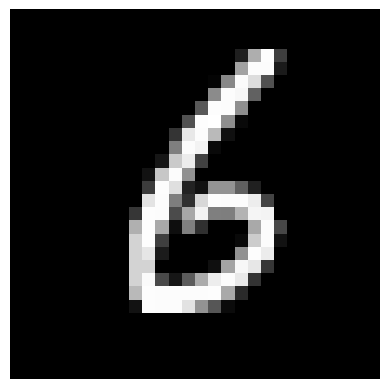

8 --- 8


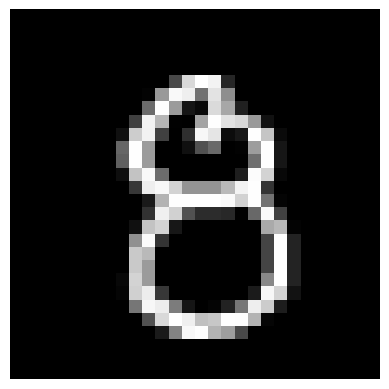

9 --- 9


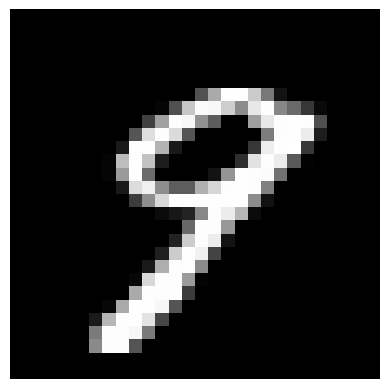

8 --- 8


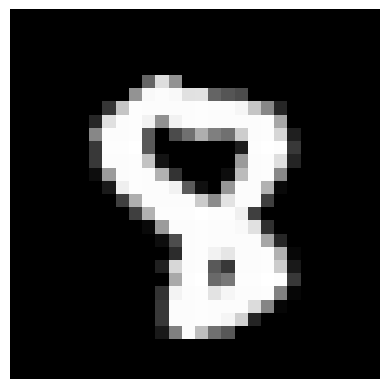

6 --- 6


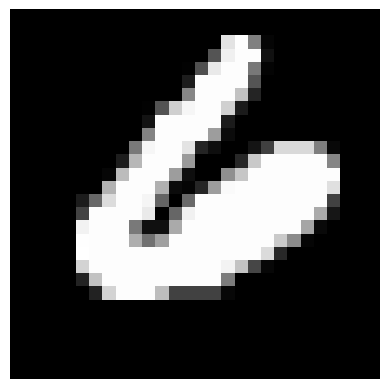

1 --- 1


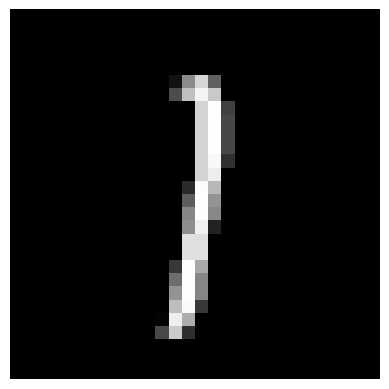

7 --- 7


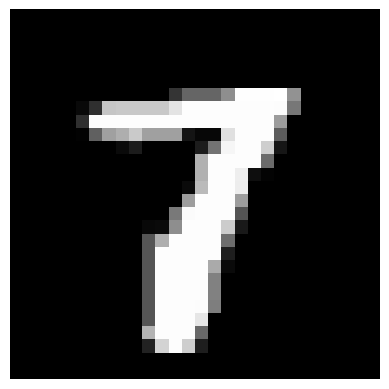

4 --- 4


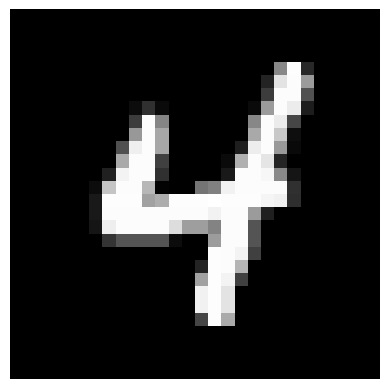

6 --- 6


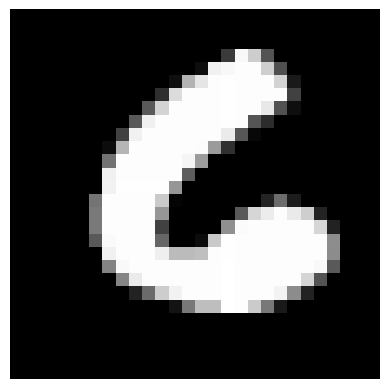

8 --- 8


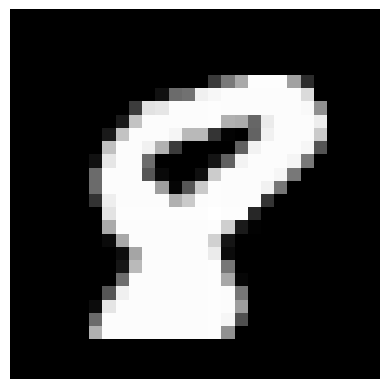

1 --- 1


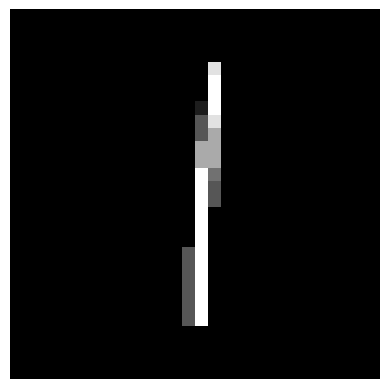

0 --- 0


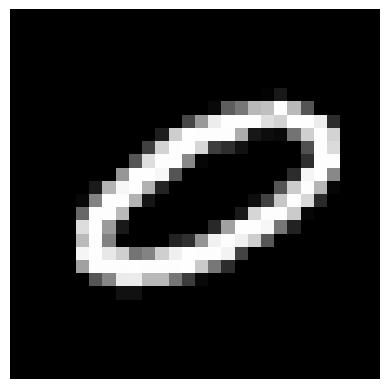

4 --- 4


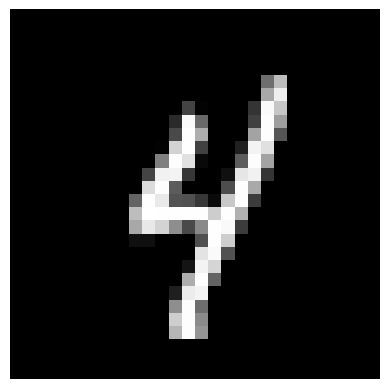

7 --- 7


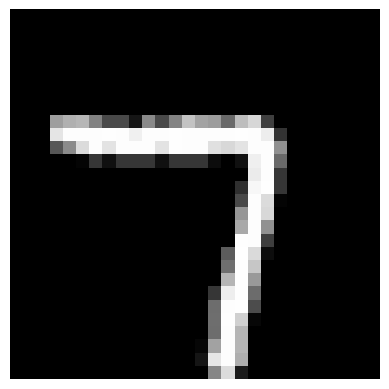

3 --- 3


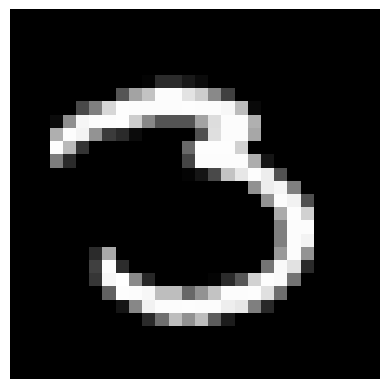

8 --- 8


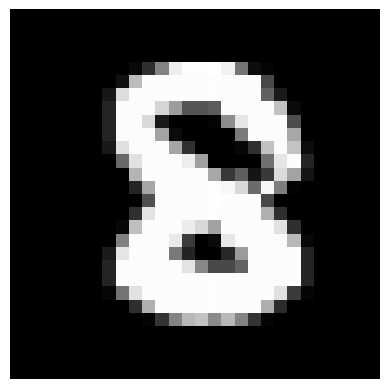

6 --- 6


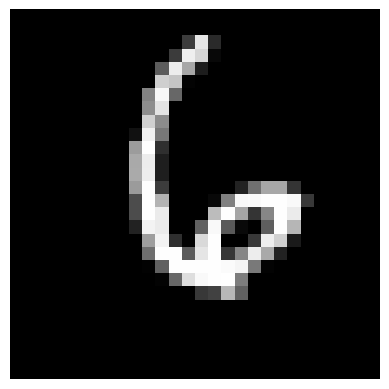

1 --- 1


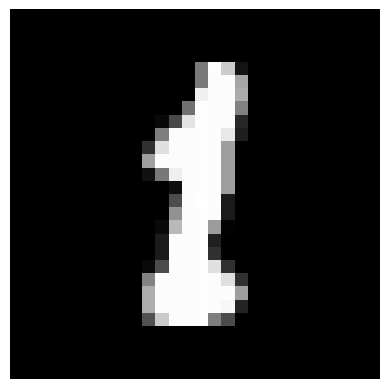

6 --- 6


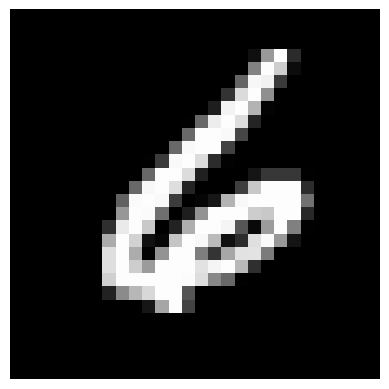

7 --- 7


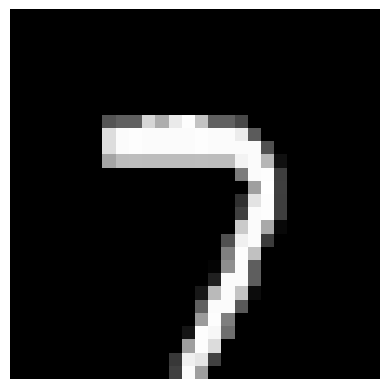

9 --- 9


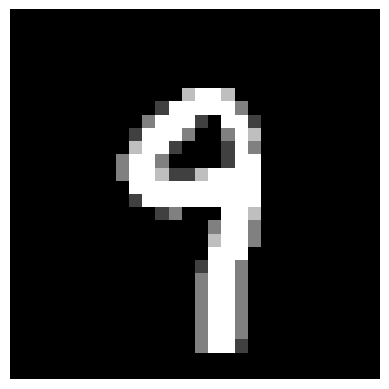

8 --- 8


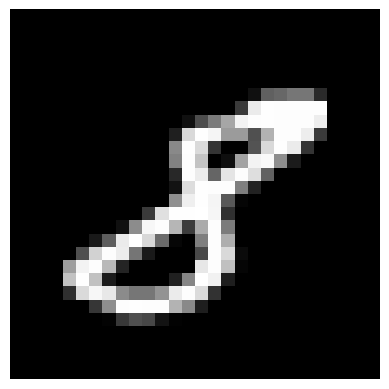

1 --- 1


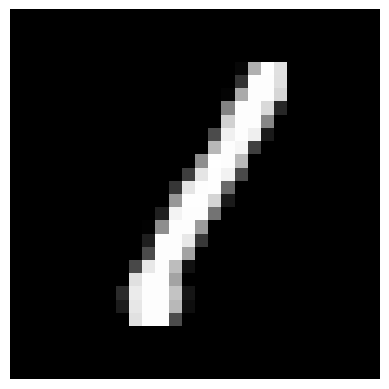

8 --- 8


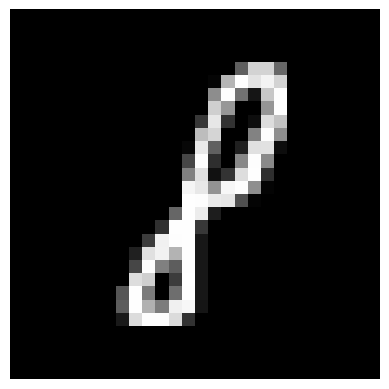

0 --- 0


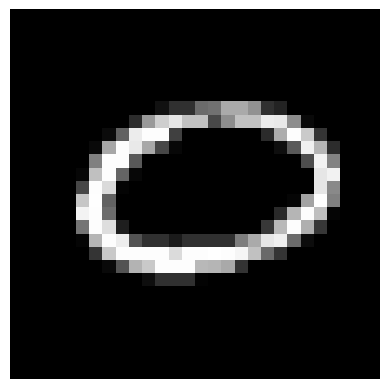

2 --- 2


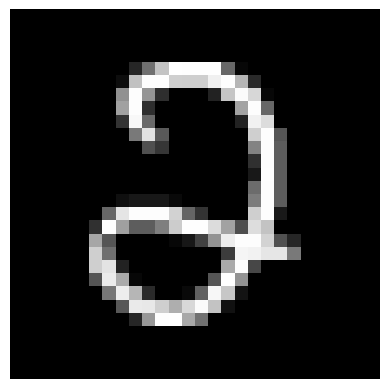

8 --- 8


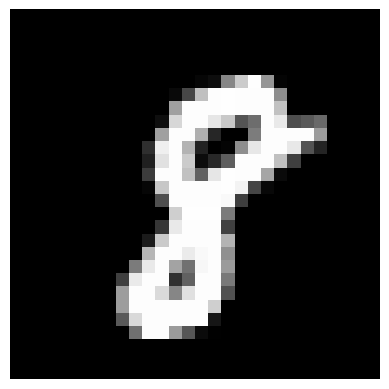

3 --- 3


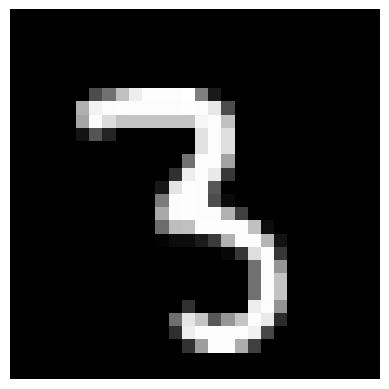

4 --- 4


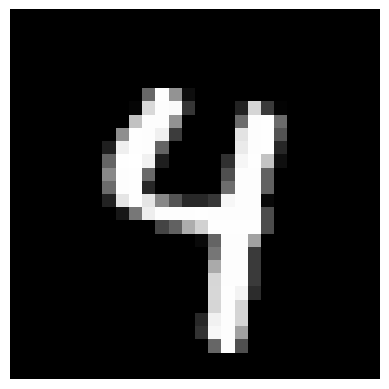

4 --- 4


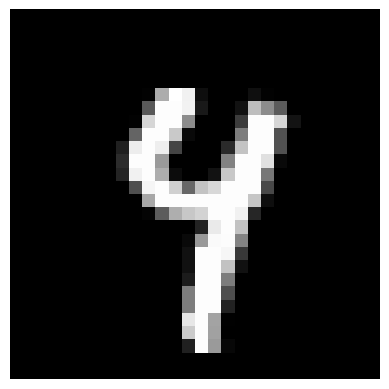

8 --- 8


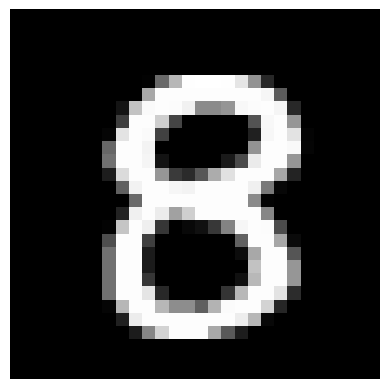

3 --- 3


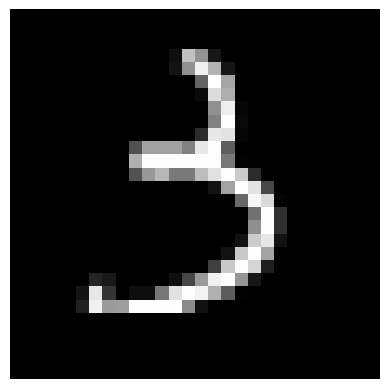

9 --- 9


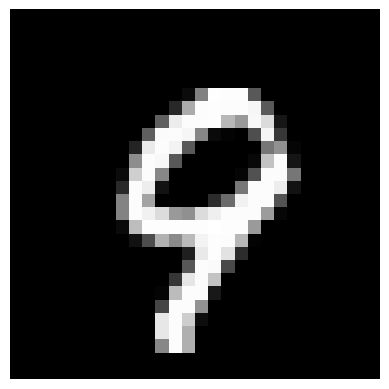

1 --- 1


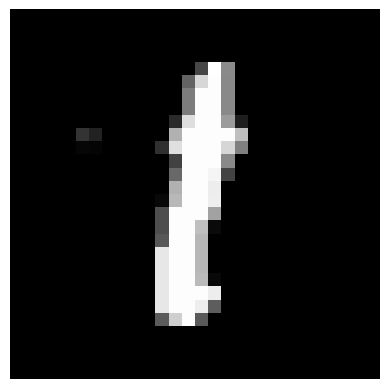

9 --- 9


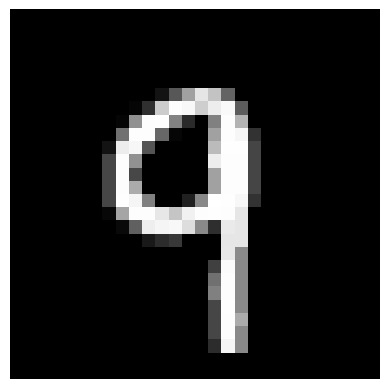

0 --- 0


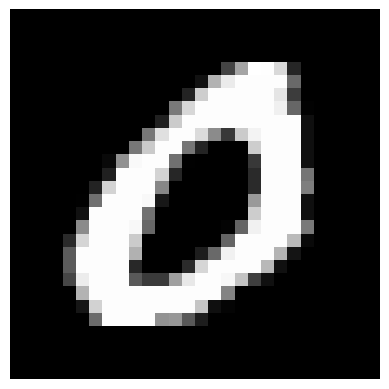

8 --- 8


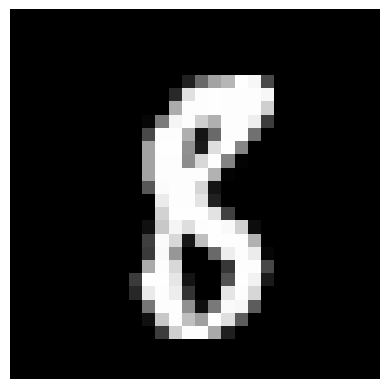

8 --- 8


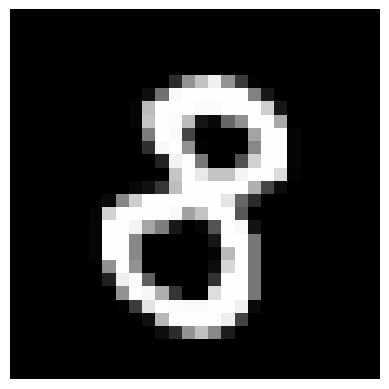

1 --- 1


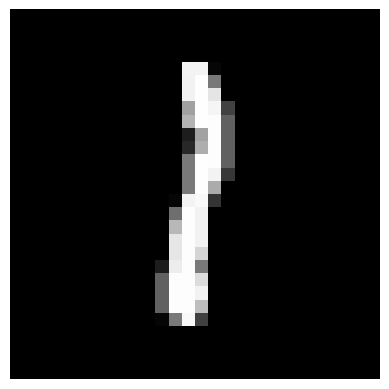

4 --- 4


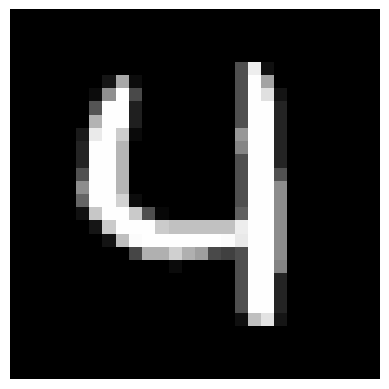

9 --- 9


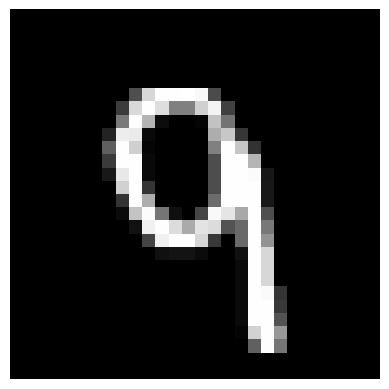

2 --- 2


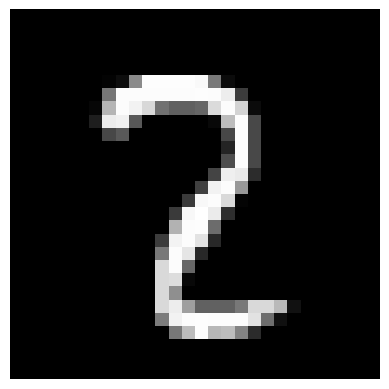

9 --- 9


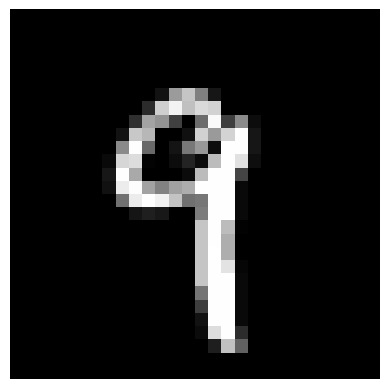

6 --- 6


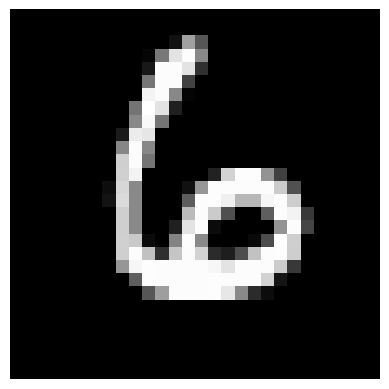

7 --- 7


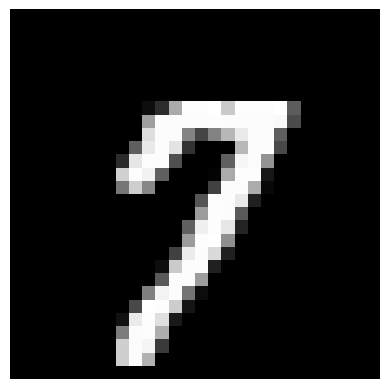

2 --- 2


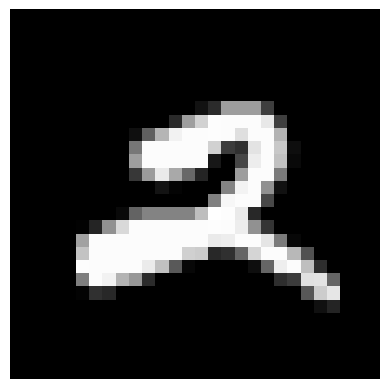

2 --- 2


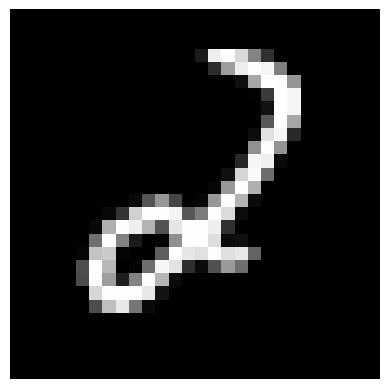

4 --- 4


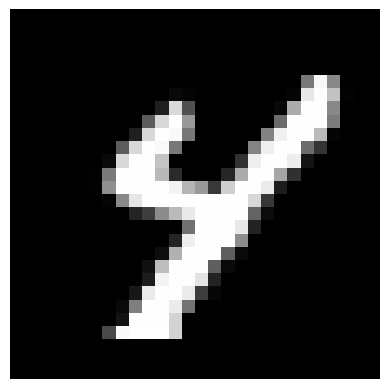

0 --- 0


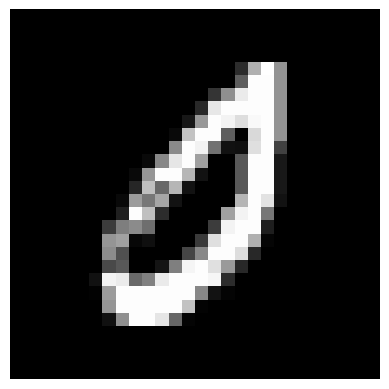

3 --- 3


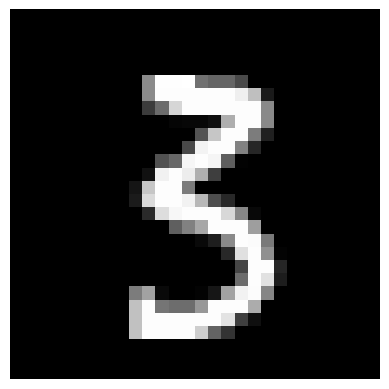

8 --- 8


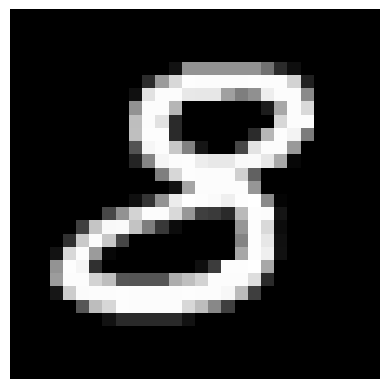

4 --- 4


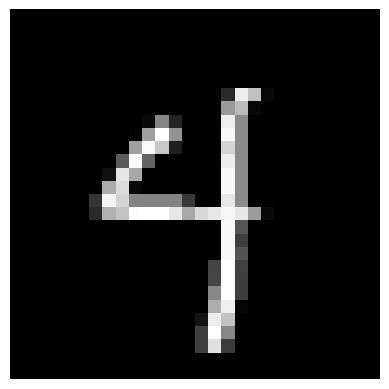

1 --- 1


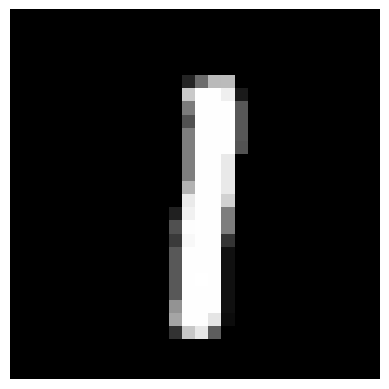

0 --- 0


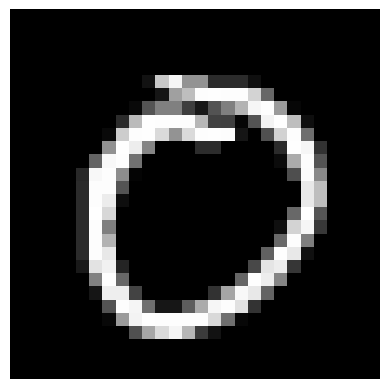

2 --- 2


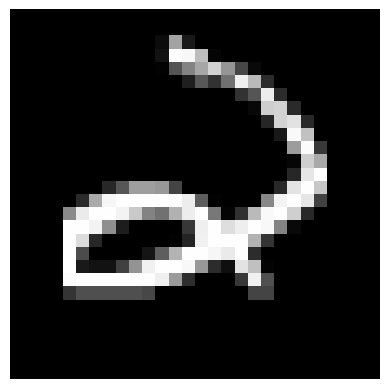

8 --- 8


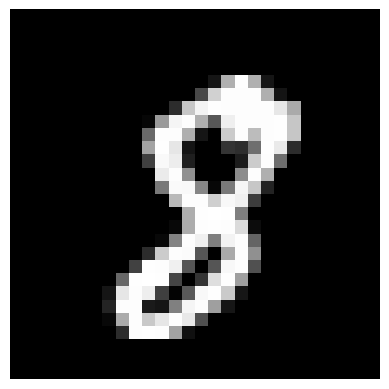

1 --- 1


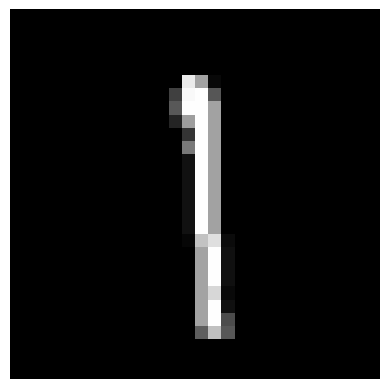

5 --- 5


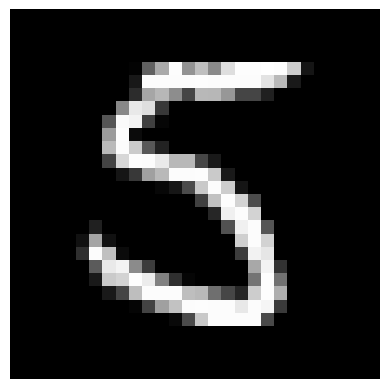

2 --- 2


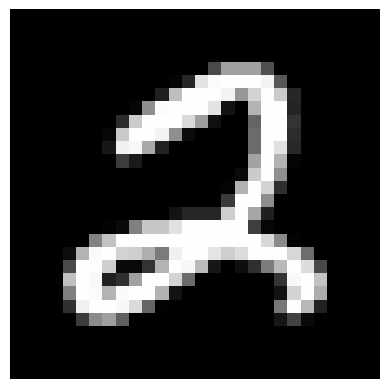

8 --- 8


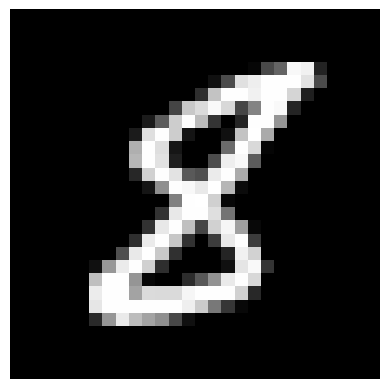

9 --- 9


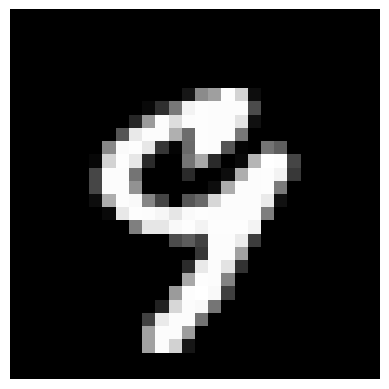

4 --- 4


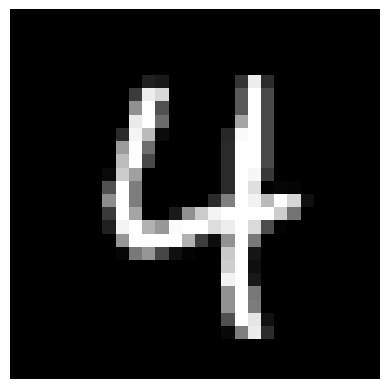

2 --- 2


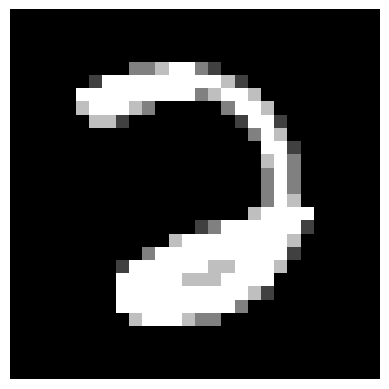

6 --- 6


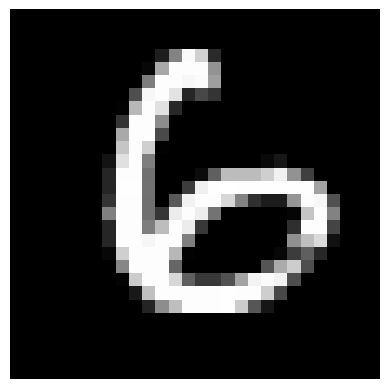

3 --- 3


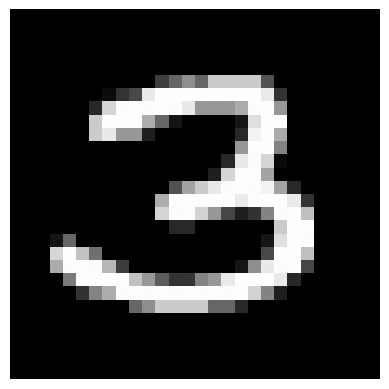

6 --- 6


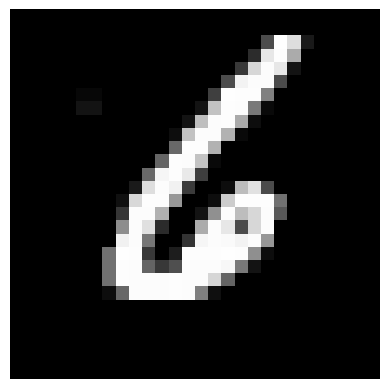

7 --- 7


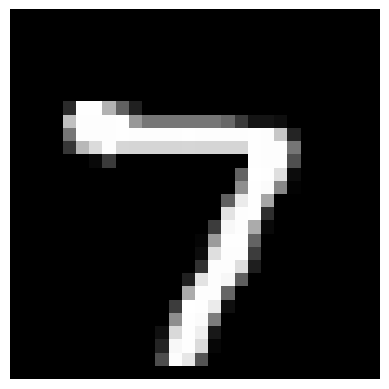

8 --- 8


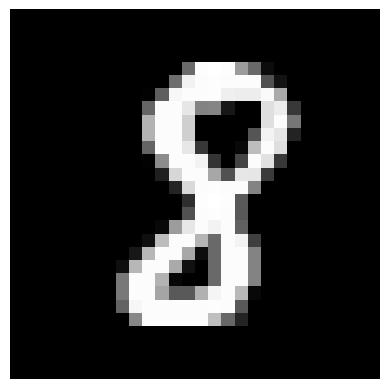

7 --- 7


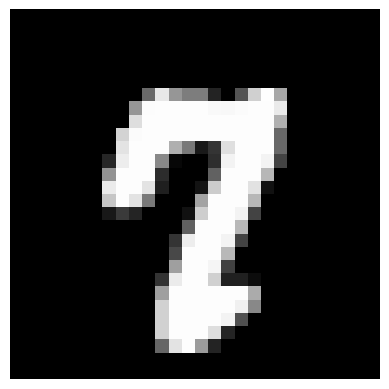

5 --- 5


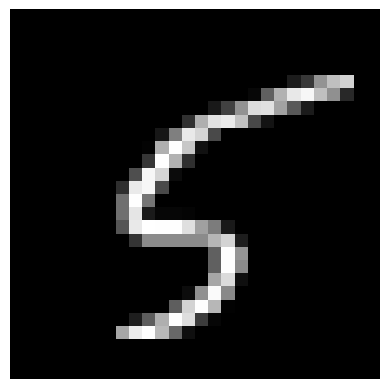

3 --- 3


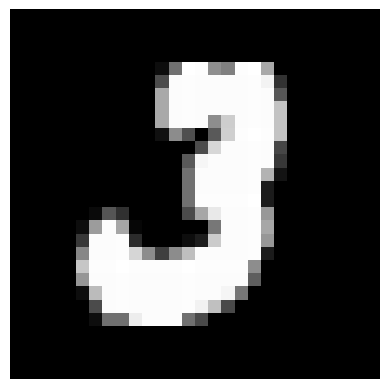

8 --- 8


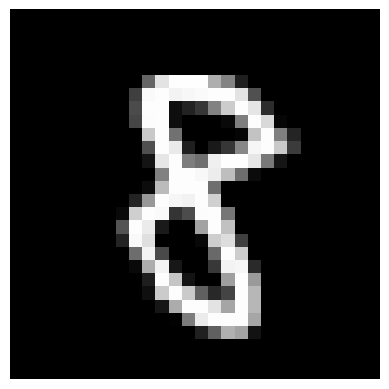

7 --- 7


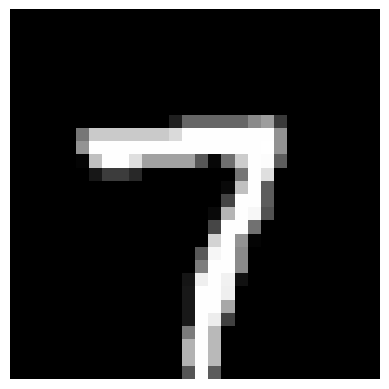

0 --- 0


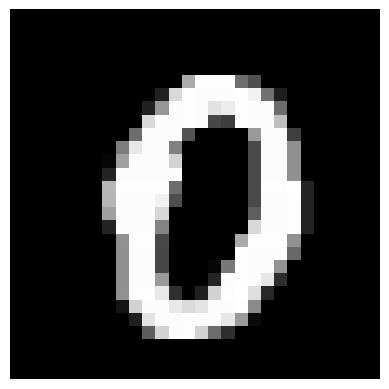

8 --- 8


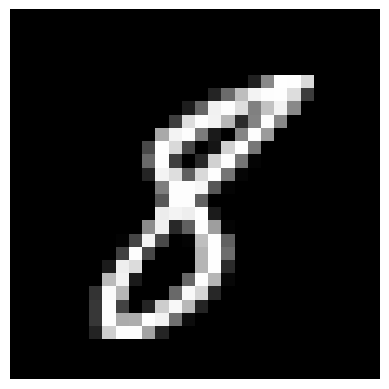

1 --- 1


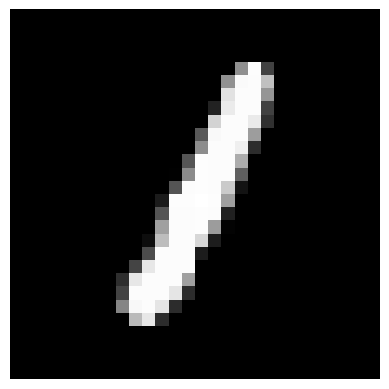

1 --- 1


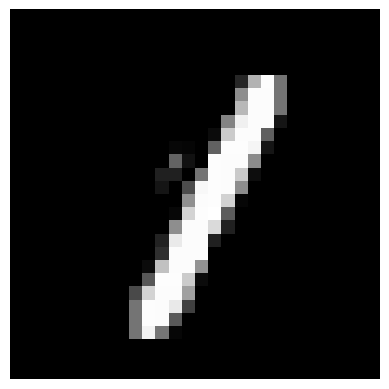

5 --- 5


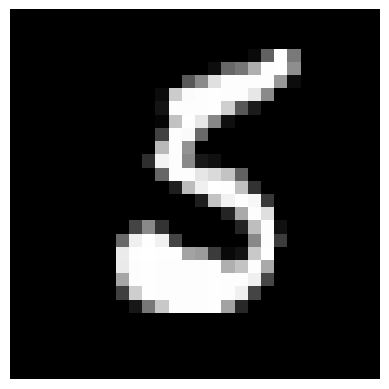

3 --- 3


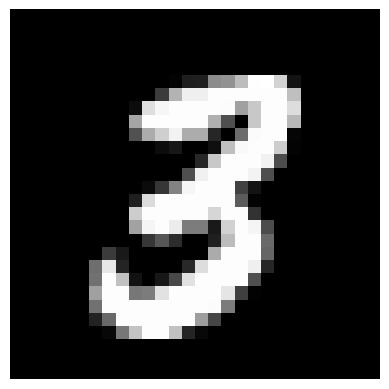

8 --- 8


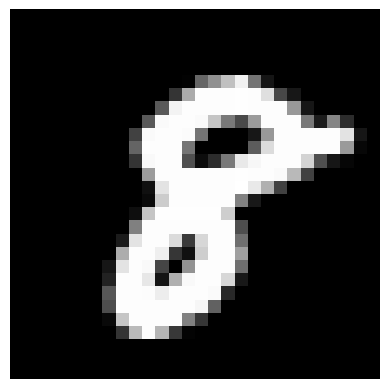

2 --- 6


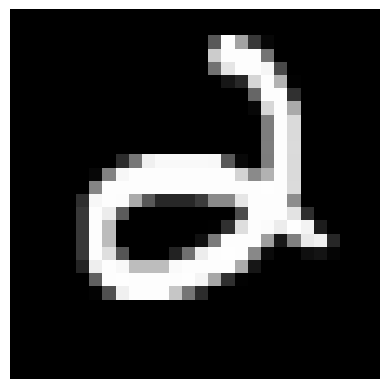

4 --- 4


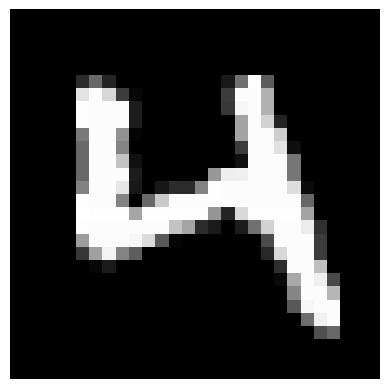

2 --- 2


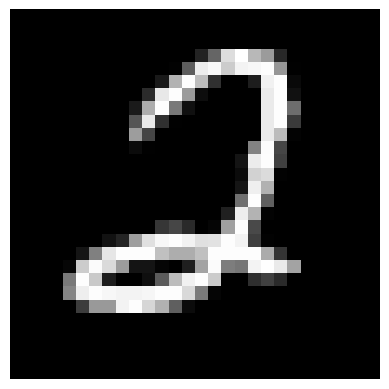

9 --- 9


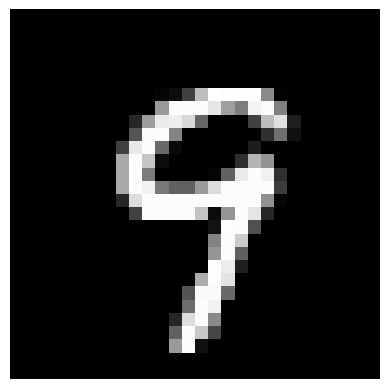

5 --- 5


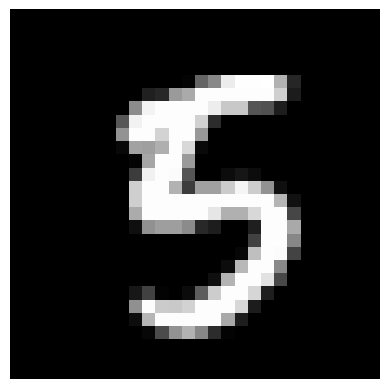

6 --- 6


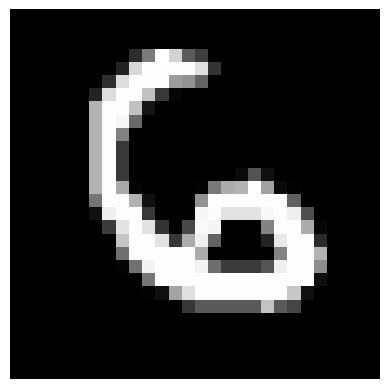

8 --- 8


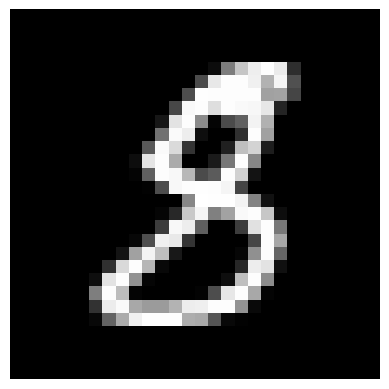

6 --- 6


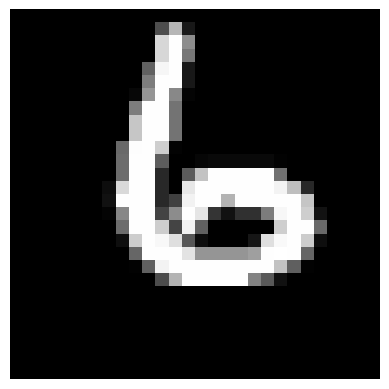

4 --- 4


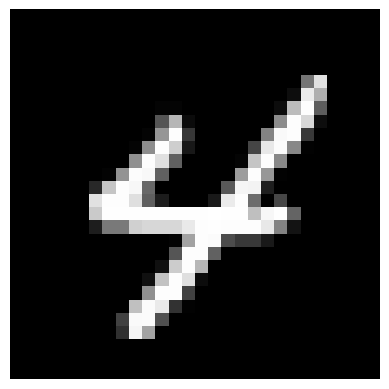

9 --- 9


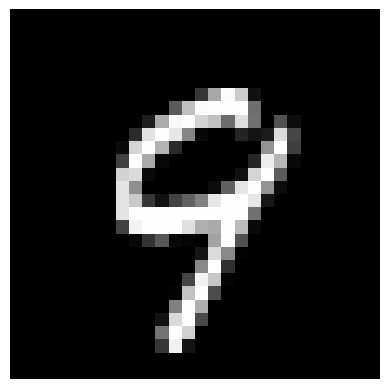

7 --- 7


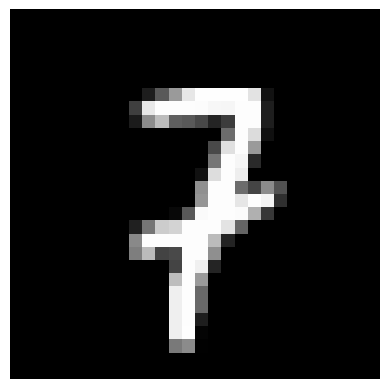

9 --- 9


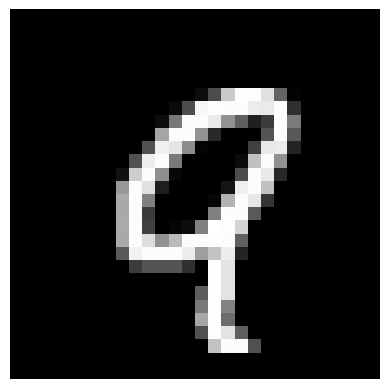

7 --- 7


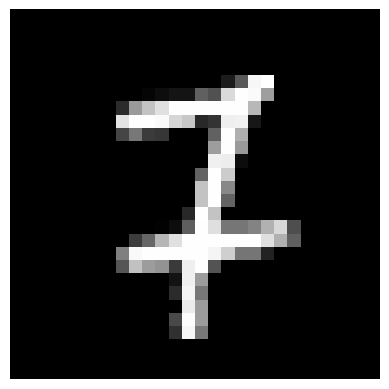

6 --- 6


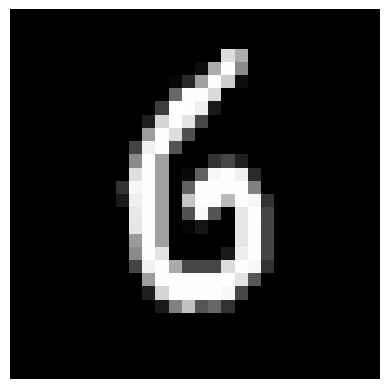

2 --- 2


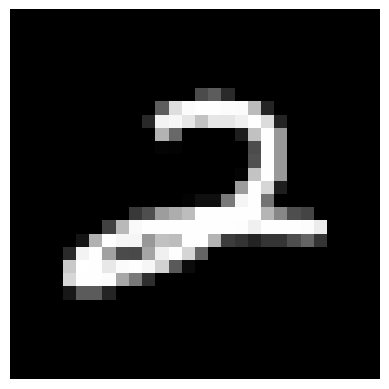

7 --- 7


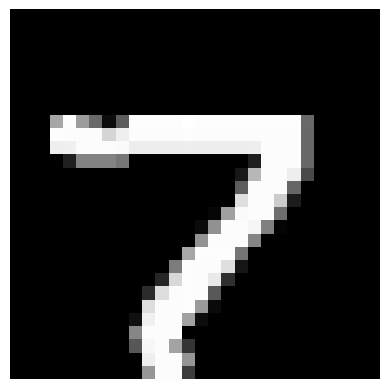

7 --- 7


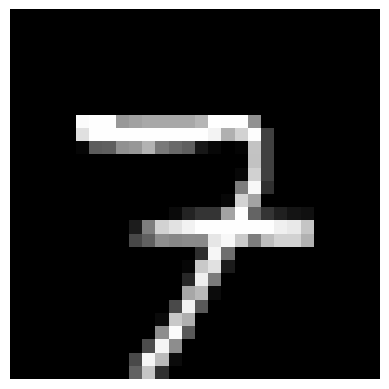

8 --- 8


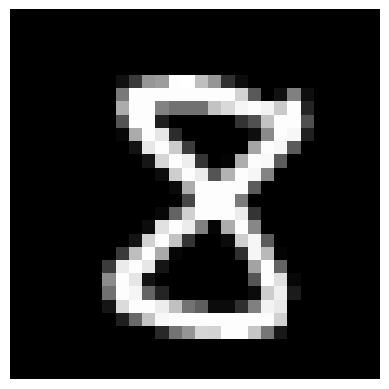

3 --- 3


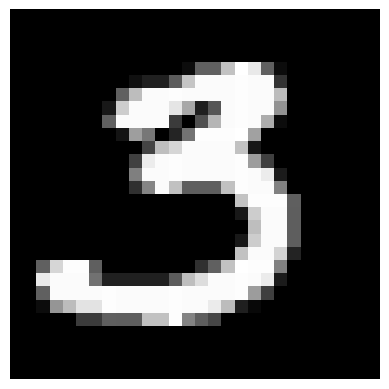

7 --- 7


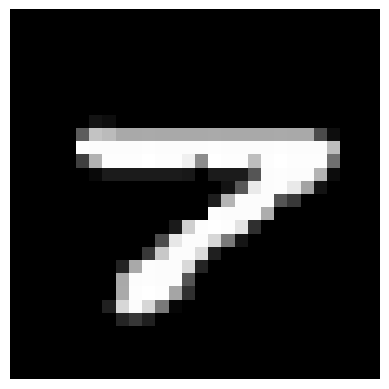

7 --- 7


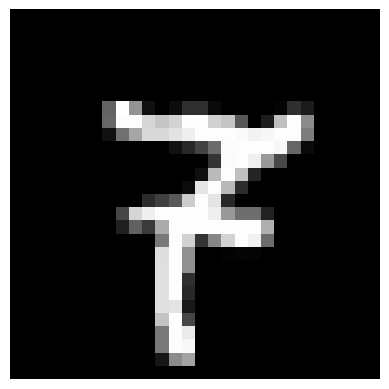

6 --- 6


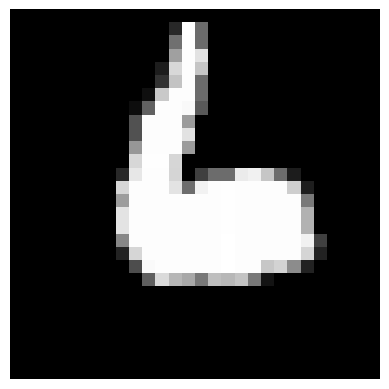

4 --- 4


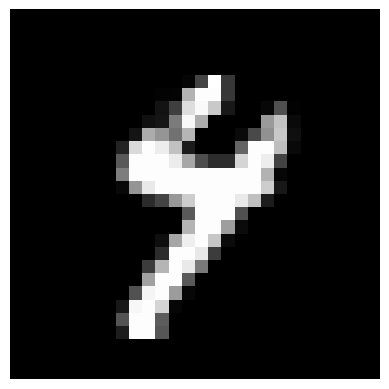

7 --- 7


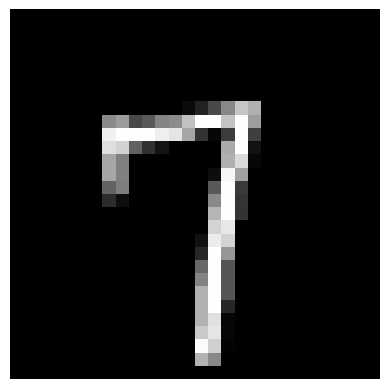

0 --- 0


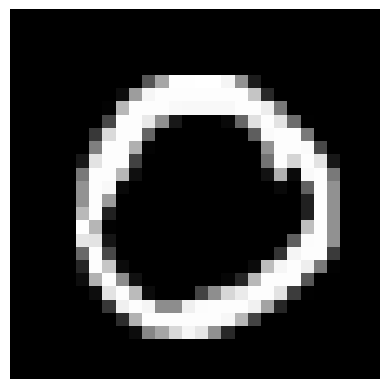

7 --- 7


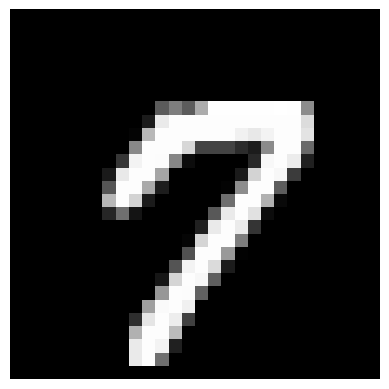

8 --- 8


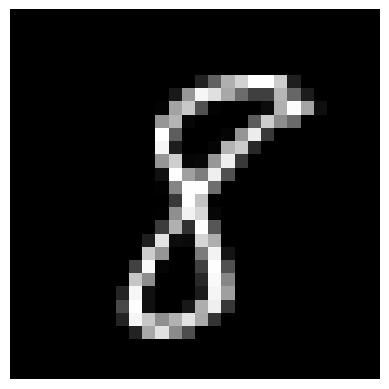

9 --- 9


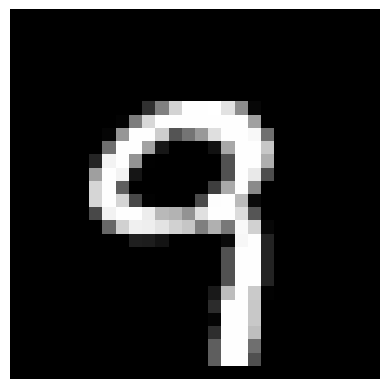

0 --- 0


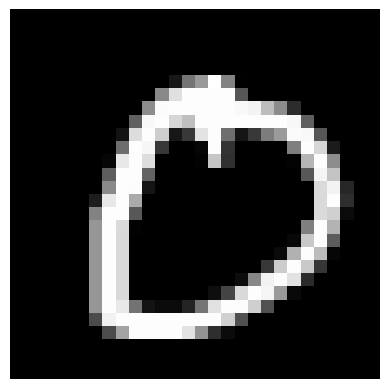

8 --- 8


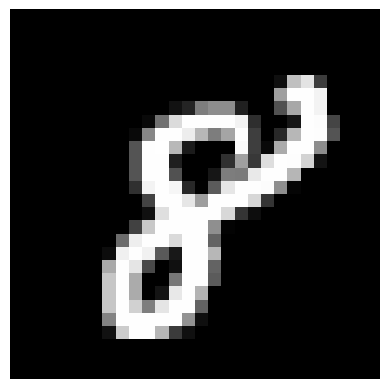

4 --- 4


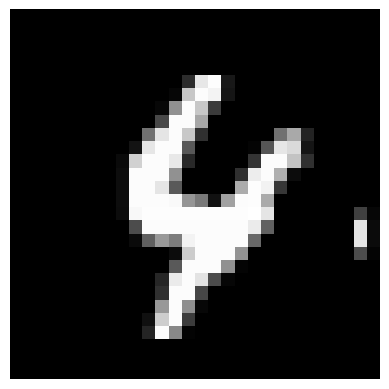

8 --- 8


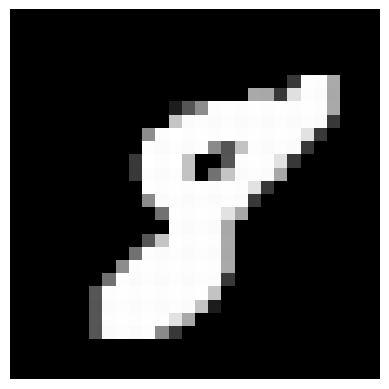

9 --- 9


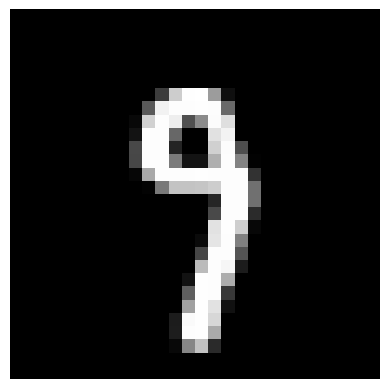

2 --- 2


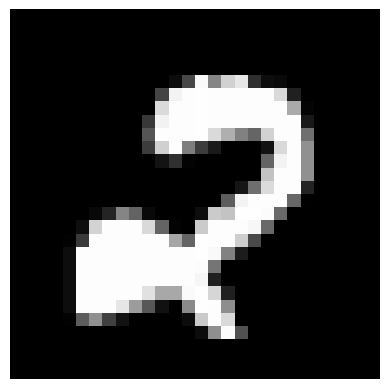

5 --- 5


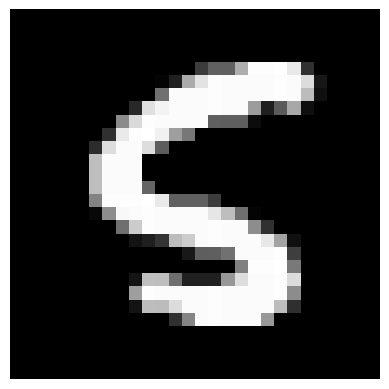

0 --- 0


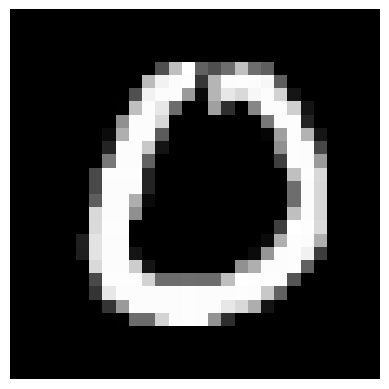

3 --- 3


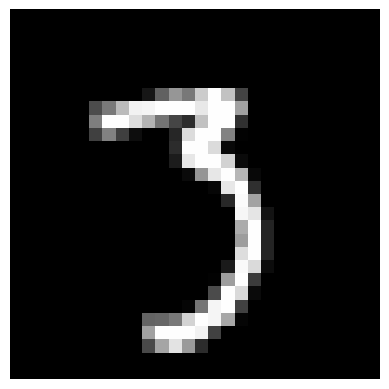

2 --- 2


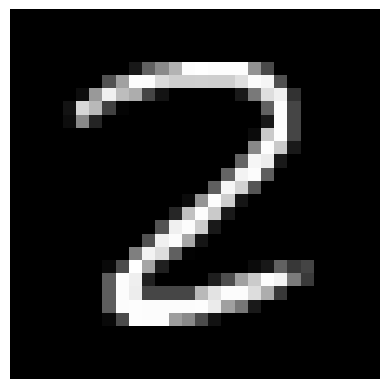

6 --- 6


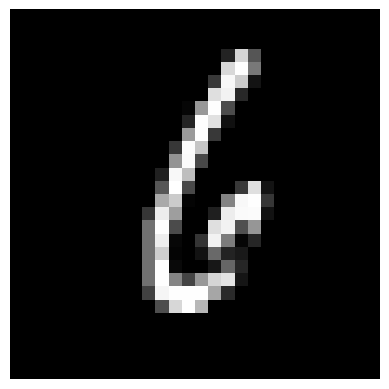

6 --- 6


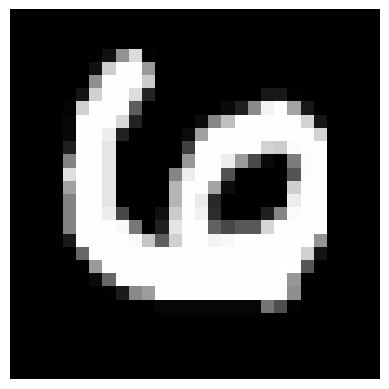

2 --- 2


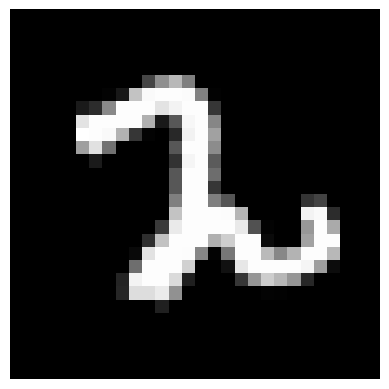

1 --- 1


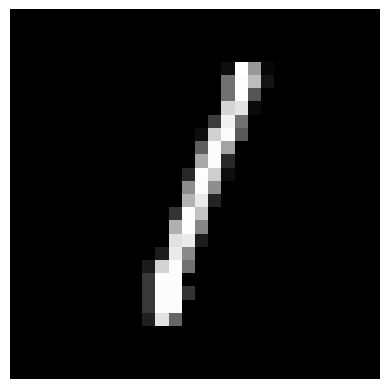

3 --- 3


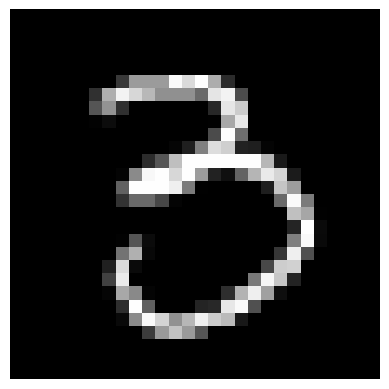

0 --- 0


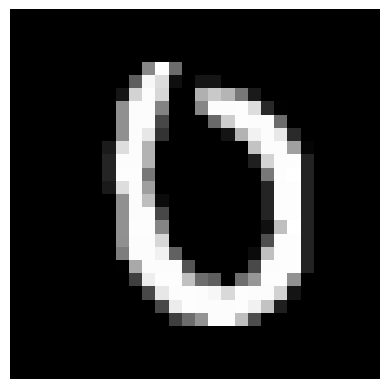

6 --- 6


8 --- 8


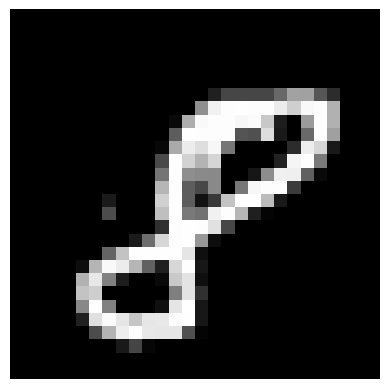

8 --- 8


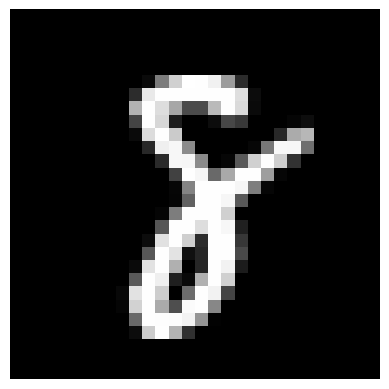

8 --- 8


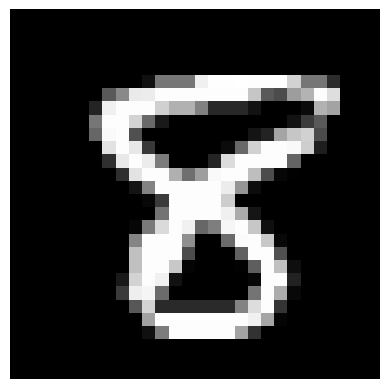

2 --- 2


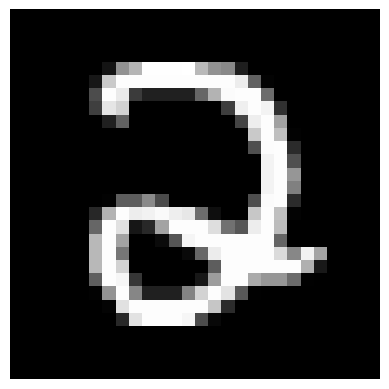

5 --- 5


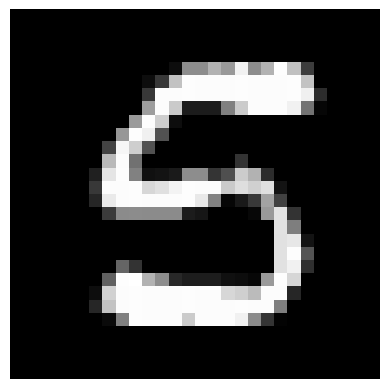

5 --- 5


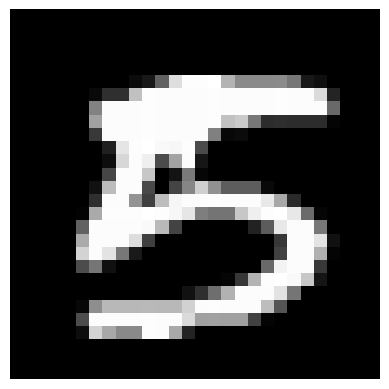

3 --- 3


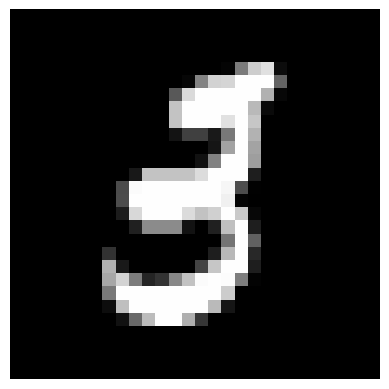

9 --- 9


7 --- 7


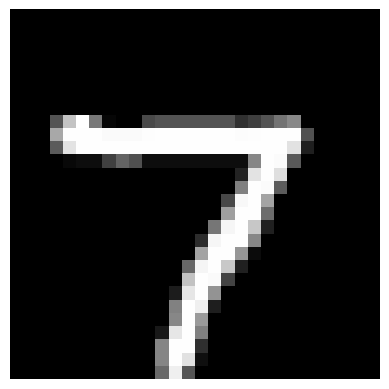

4 --- 4


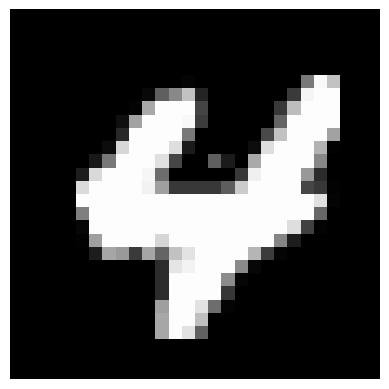

1 --- 1


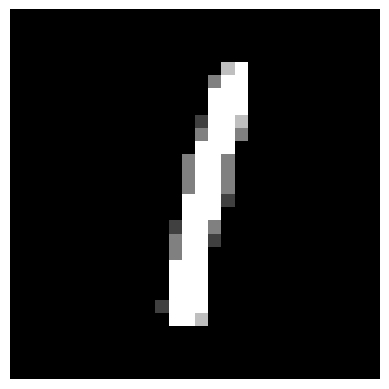

3 --- 3


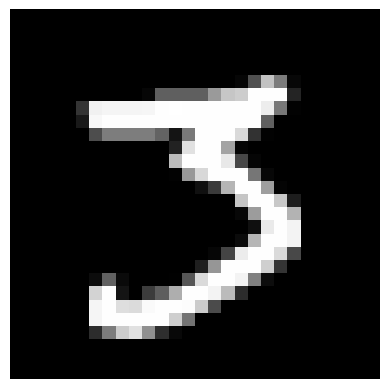

2 --- 2


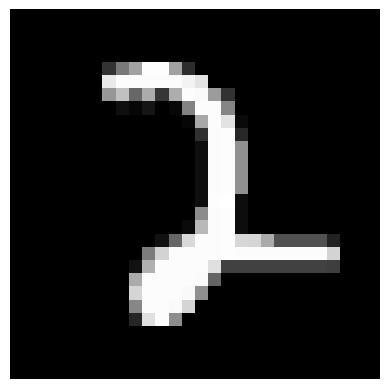

7 --- 7


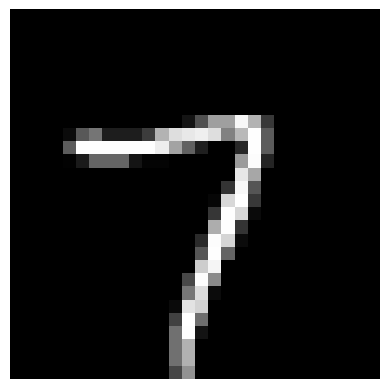

0 --- 0


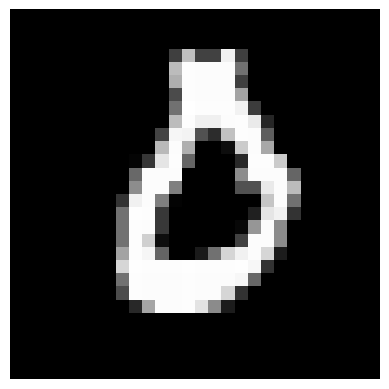

5 --- 5


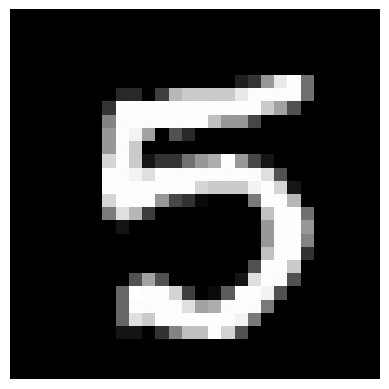

4 --- 4


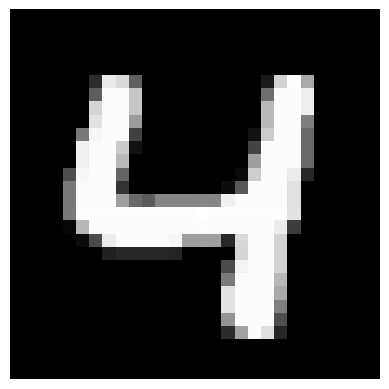

8 --- 8


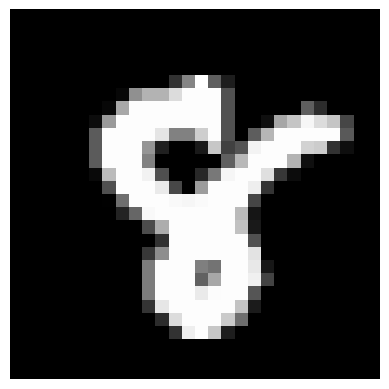

2 --- 2


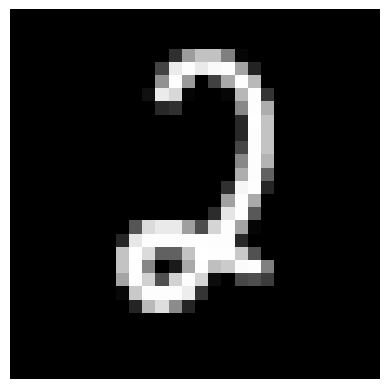

5 --- 5


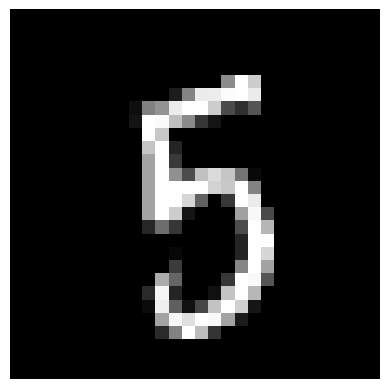

8 --- 8


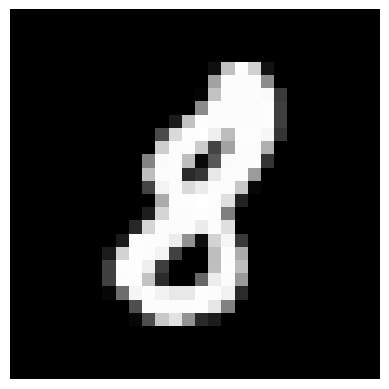

6 --- 6


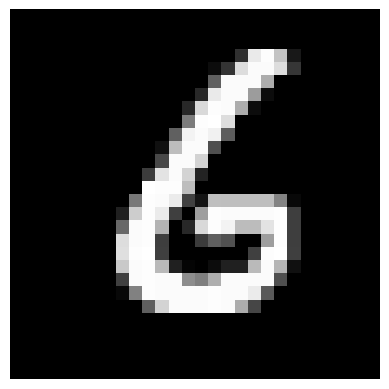

1 --- 1


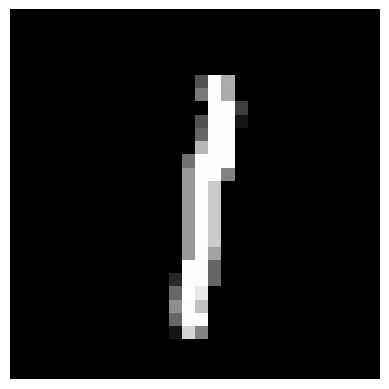

7 --- 7


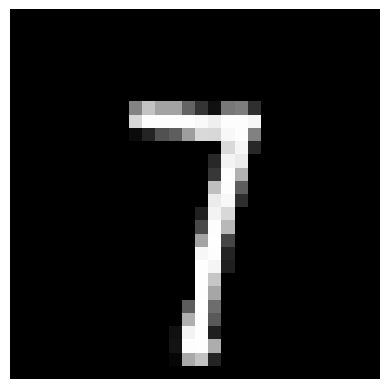

6 --- 6


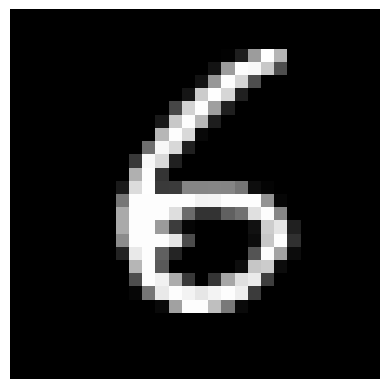

0 --- 0


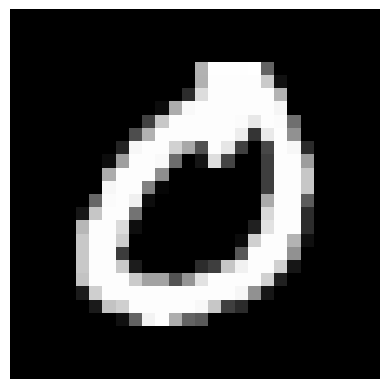

2 --- 2


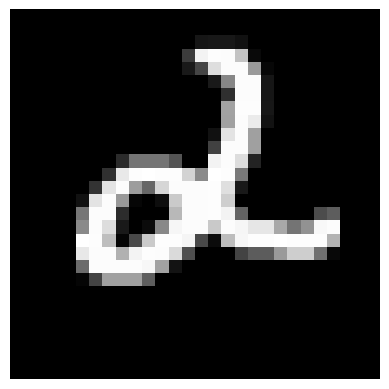

8 --- 8


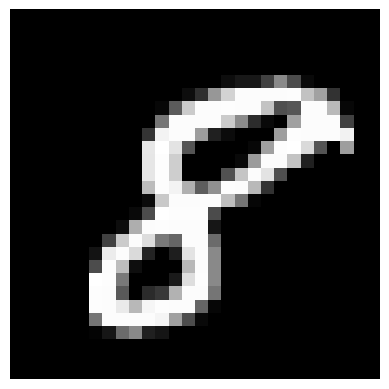

2 --- 2


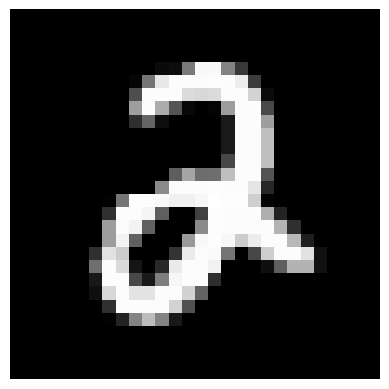

4 --- 4


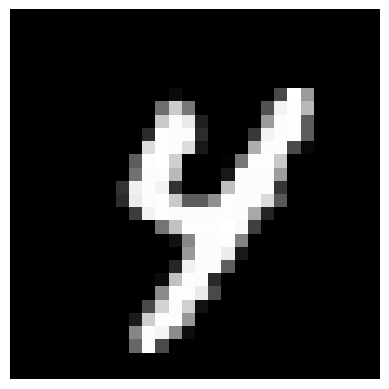

7 --- 7


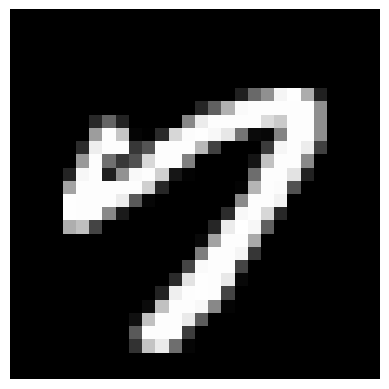

5 --- 5


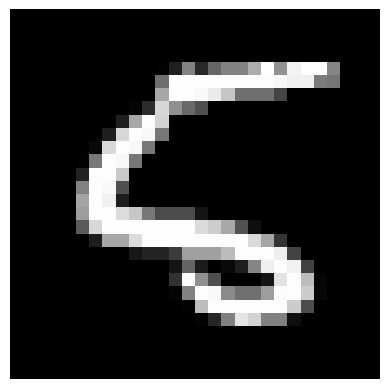

6 --- 6


9 --- 9


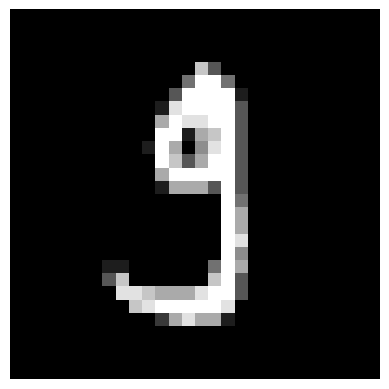

2 --- 2


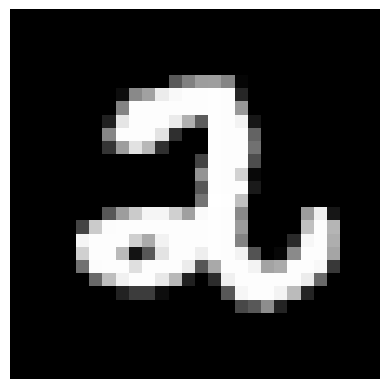

5 --- 5


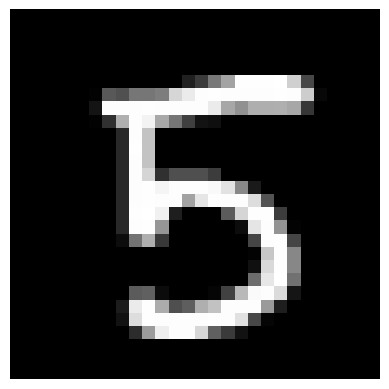

8 --- 8


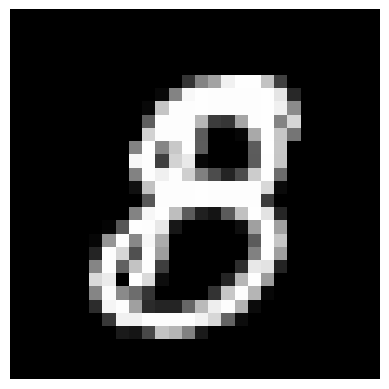

5 --- 5


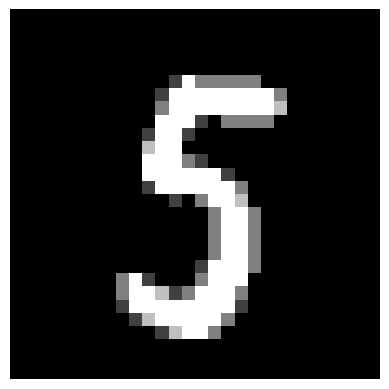

4 --- 4


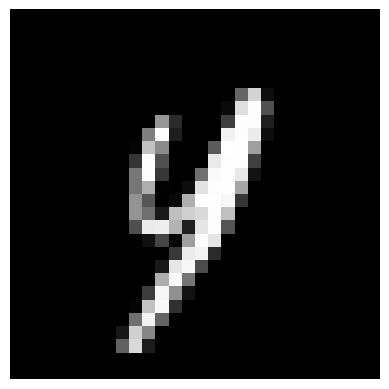

3 --- 3


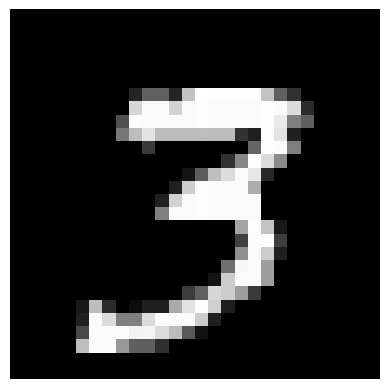

8 --- 8


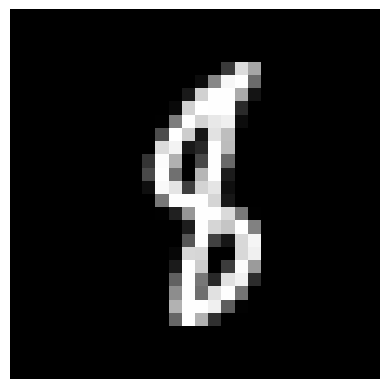

7 --- 7


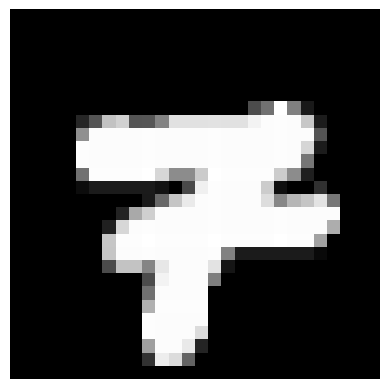

9 --- 9


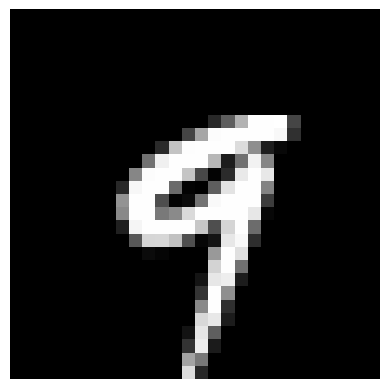

3 --- 3


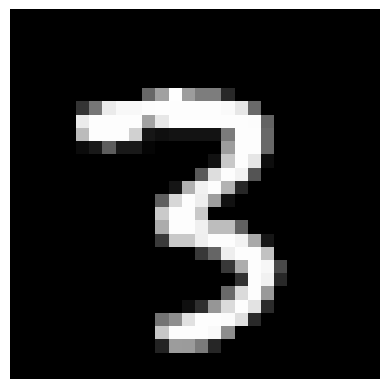

9 --- 9


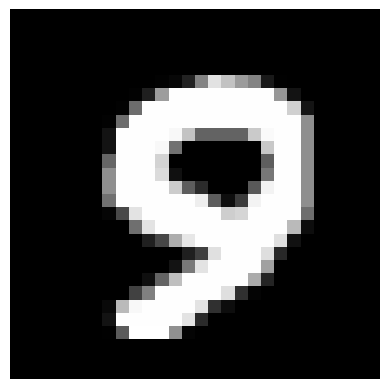

8 --- 8


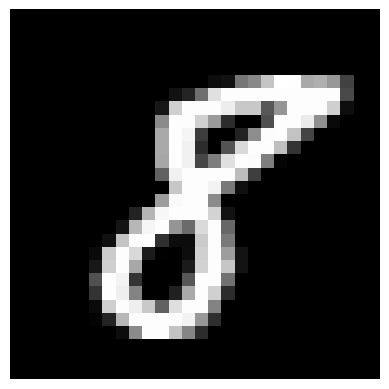

3 --- 3


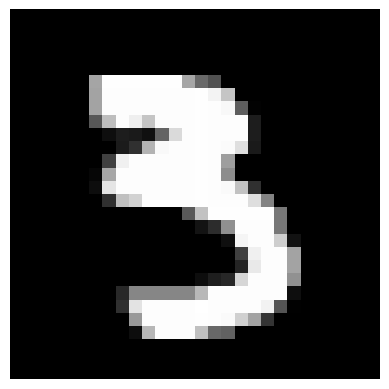

7 --- 7


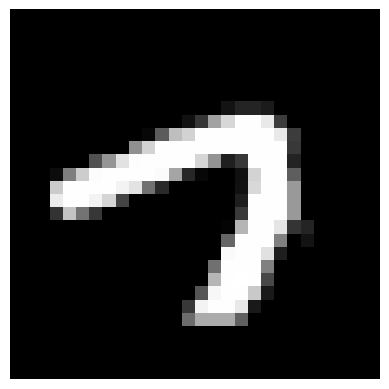

0 --- 0


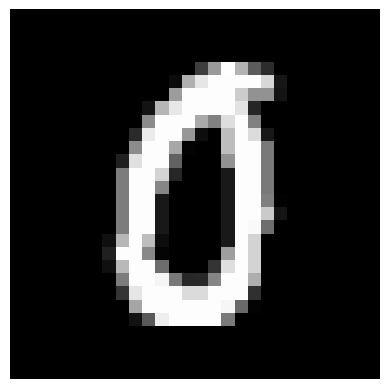

4 --- 4


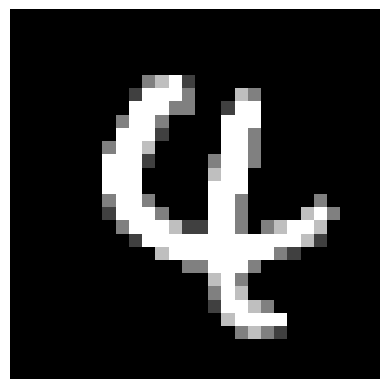

8 --- 8


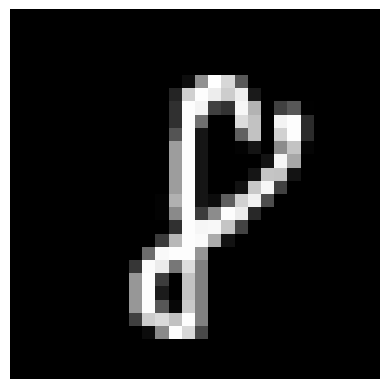

2 --- 2


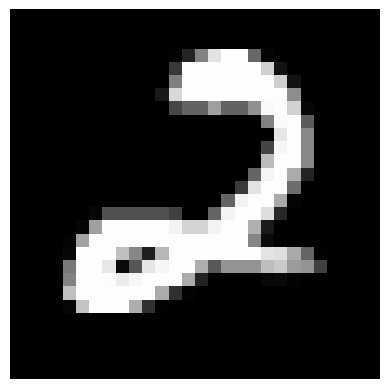

3 --- 3


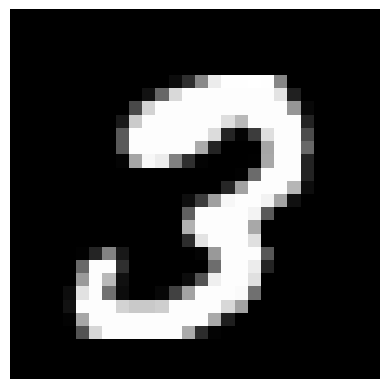

8 --- 8


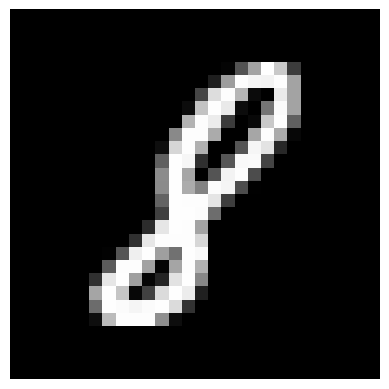

9 --- 9


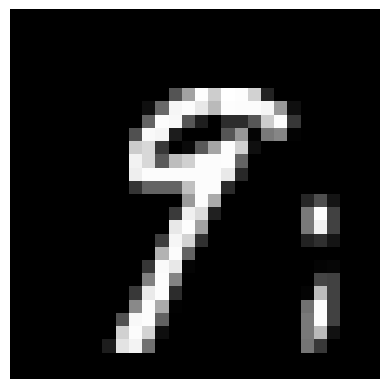

2 --- 2


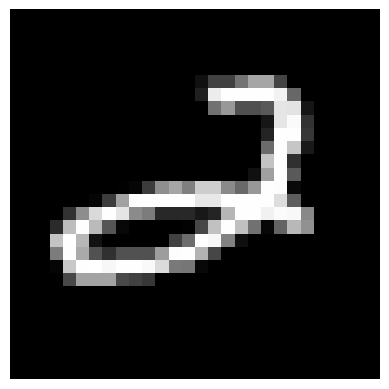

2 --- 2


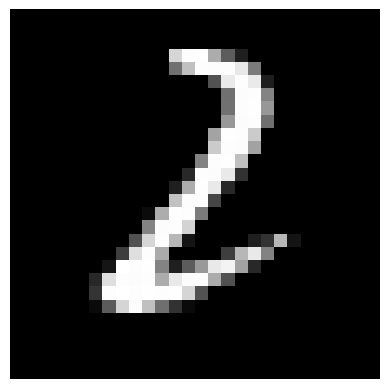

5 --- 5


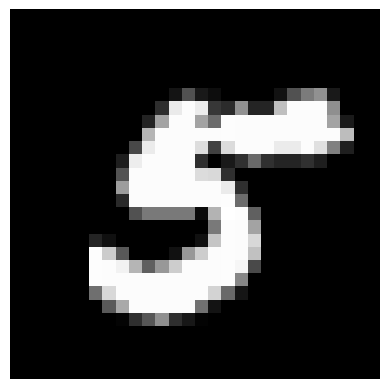

4 --- 4


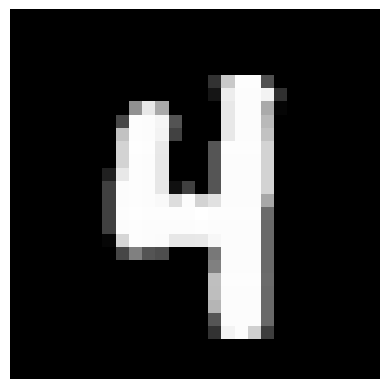

4 --- 4


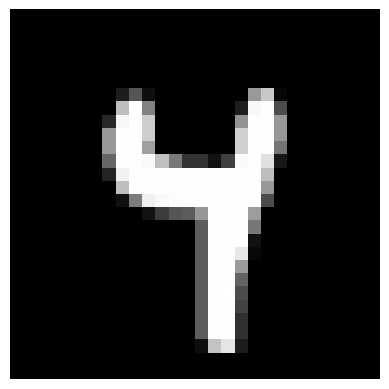

8 --- 8


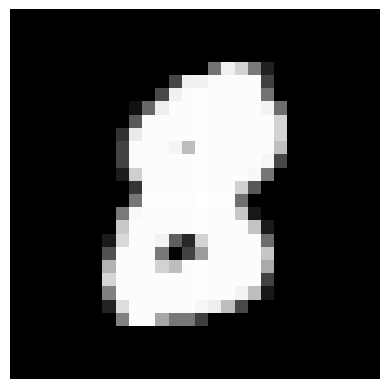

5 --- 5


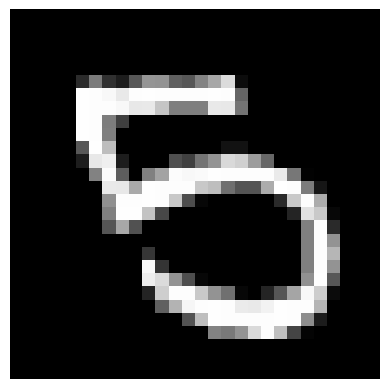

3 --- 3


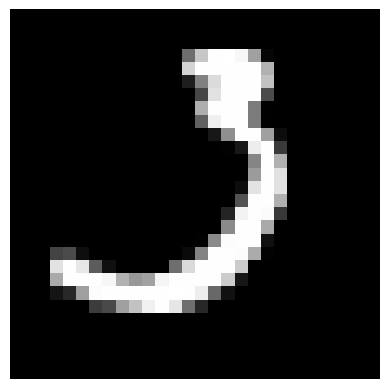

8 --- 8


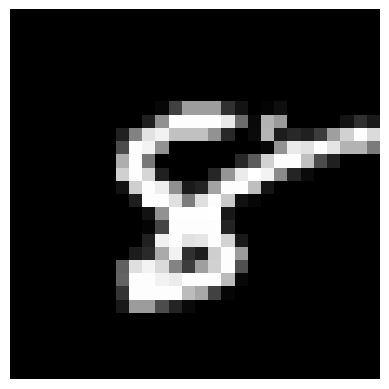

2 --- 2


2 --- 2


9 --- 9


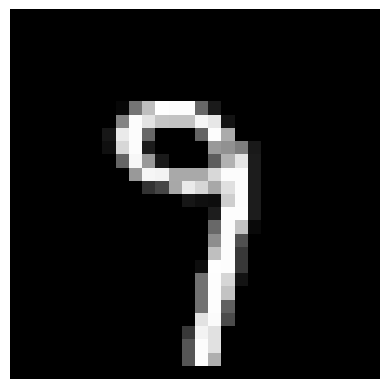

6 --- 6


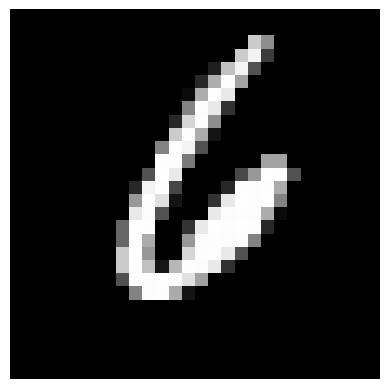

5 --- 5


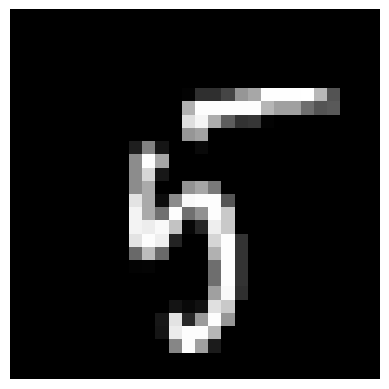

5 --- 5


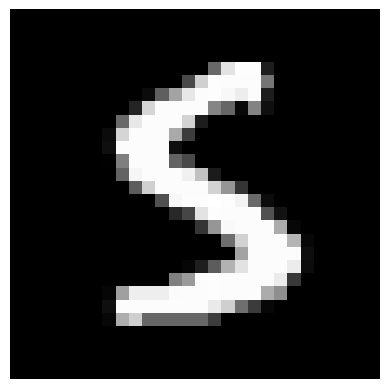

0 --- 0


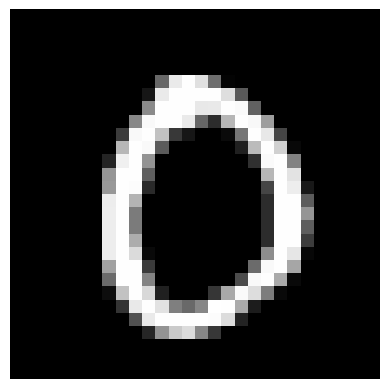

6 --- 6


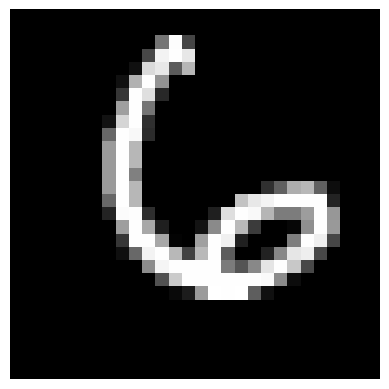

8 --- 8


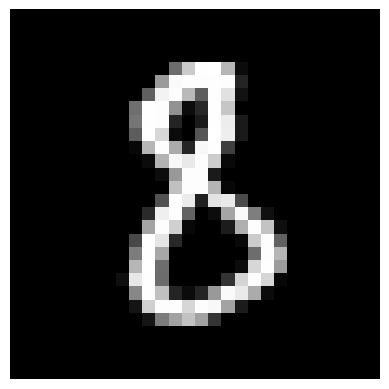

8 --- 8


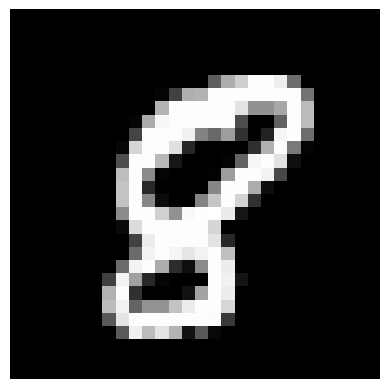

0 --- 0


5 --- 5


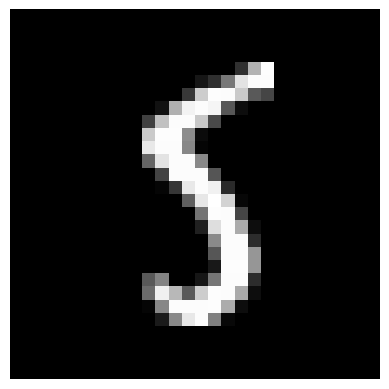

5 --- 5


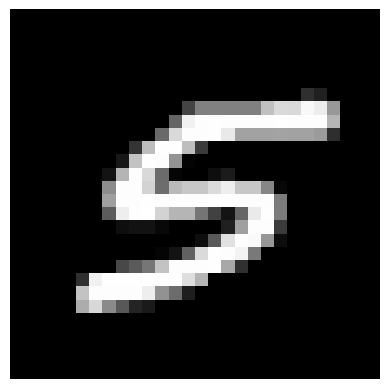

8 --- 8


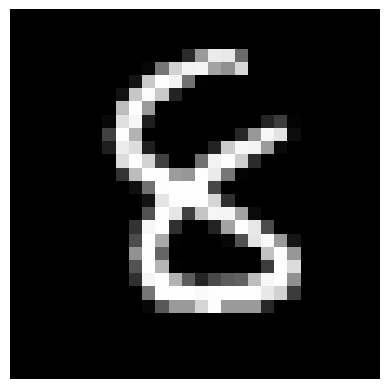

1 --- 1


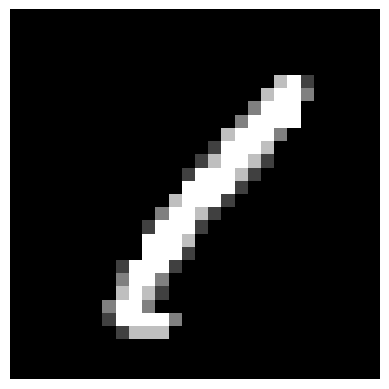

6 --- 6


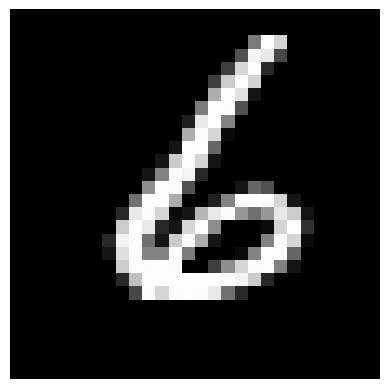

3 --- 3


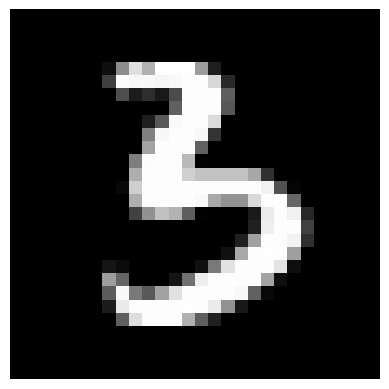

0 --- 0


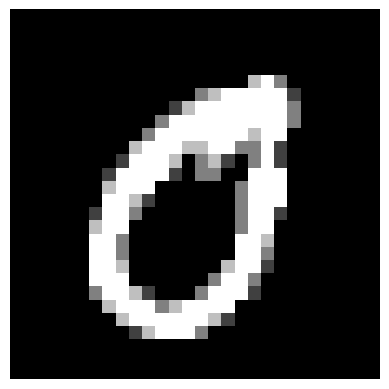

5 --- 5


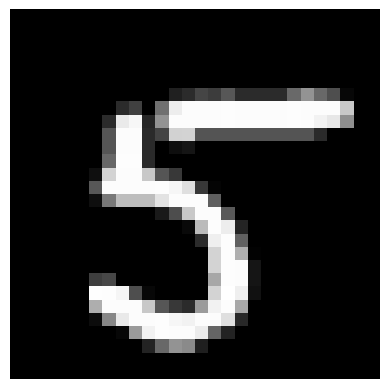

3 --- 3


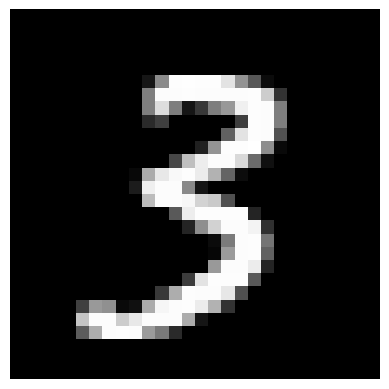

5 --- 5


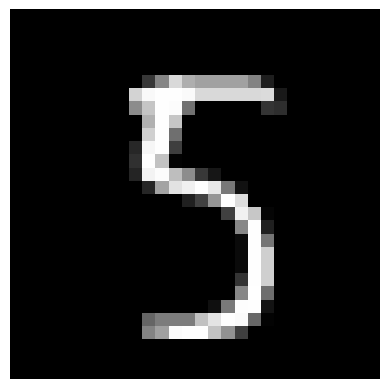

6 --- 6


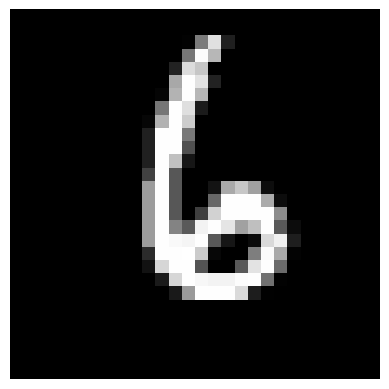

8 --- 8


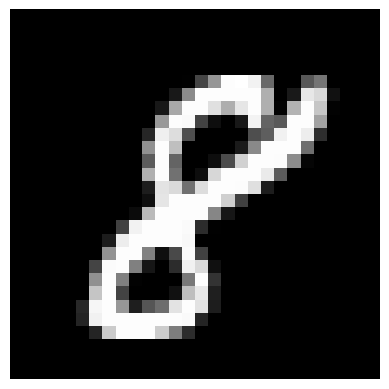

0 --- 0


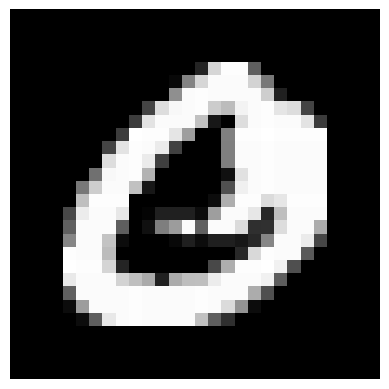

4 --- 4


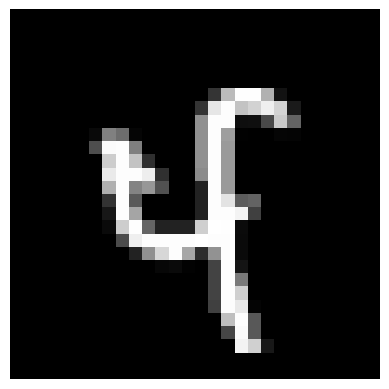

4 --- 4


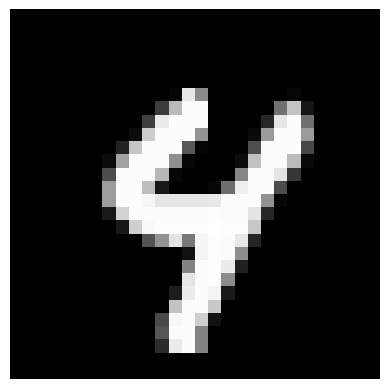

4 --- 4


5 --- 5


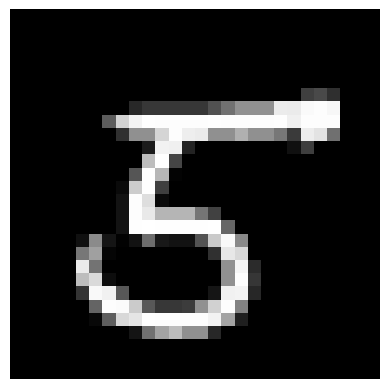

5 --- 5


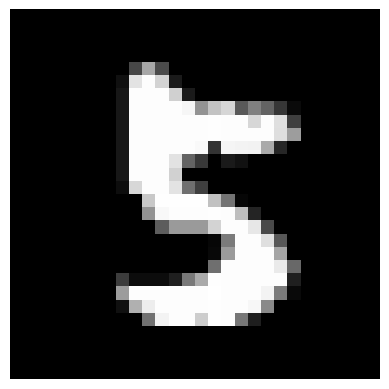

1 --- 1


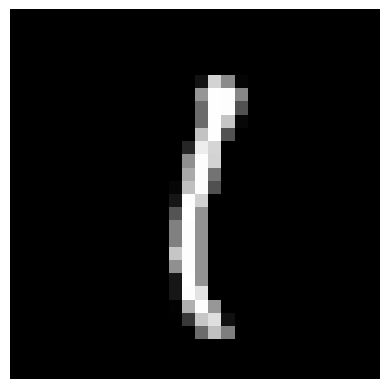

7 --- 7


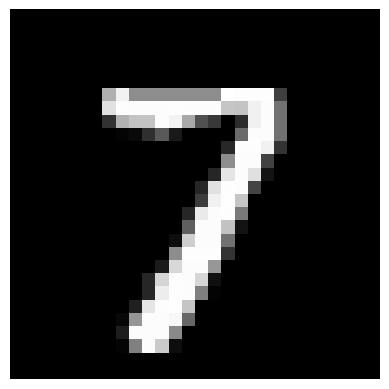

3 --- 3


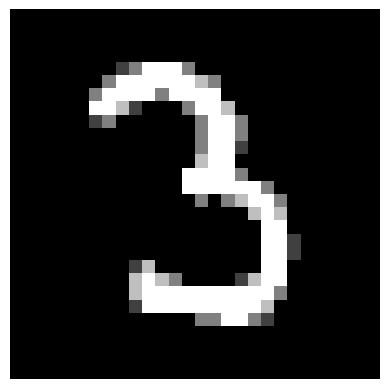

0 --- 0


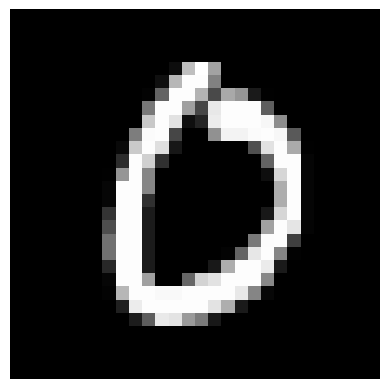

2 --- 2


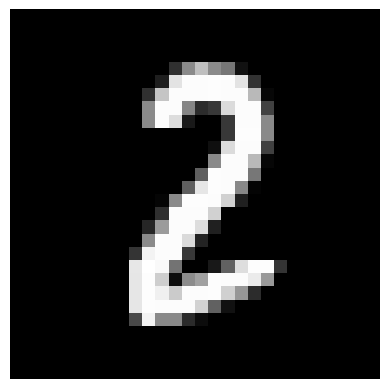

7 --- 6


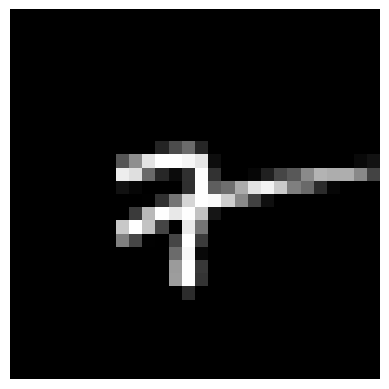

6 --- 6


2 --- 2


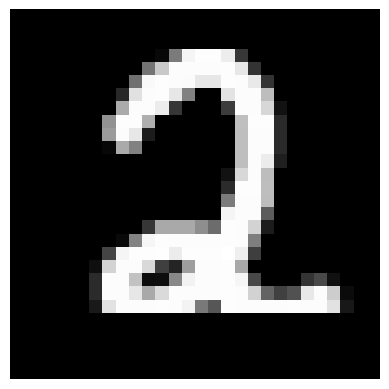

0 --- 0


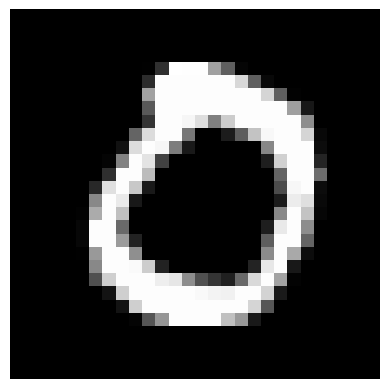

2 --- 2


8 --- 8


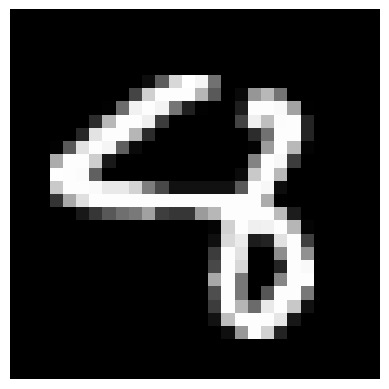

0 --- 0


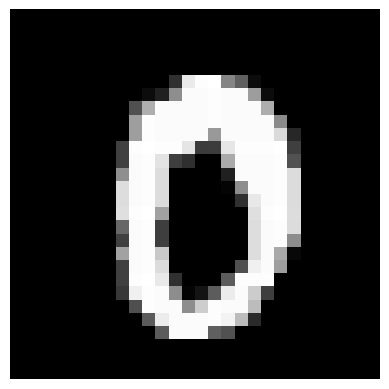

6 --- 6


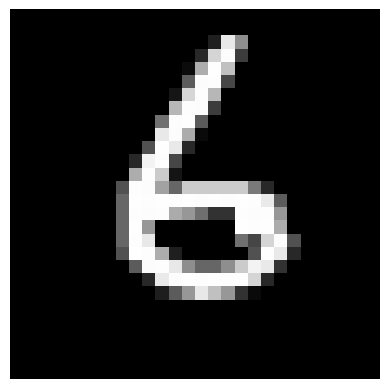

2 --- 2


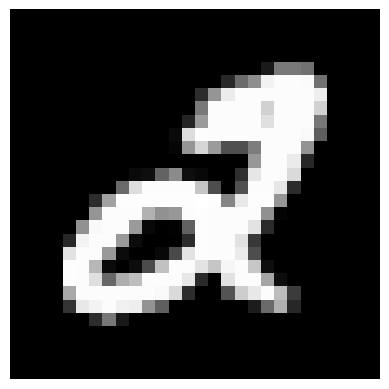

9 --- 9


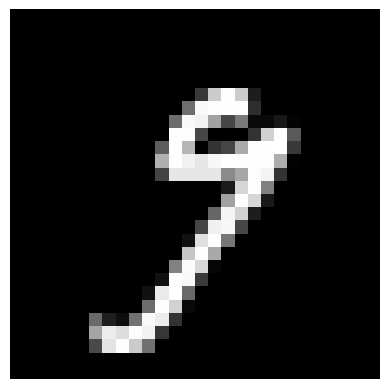

1 --- 1


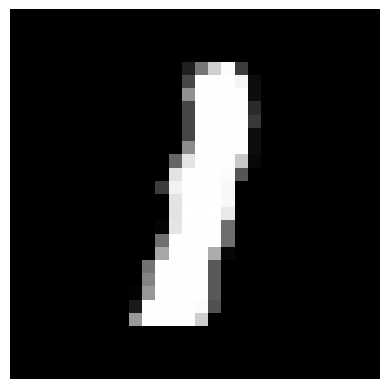

6 --- 6


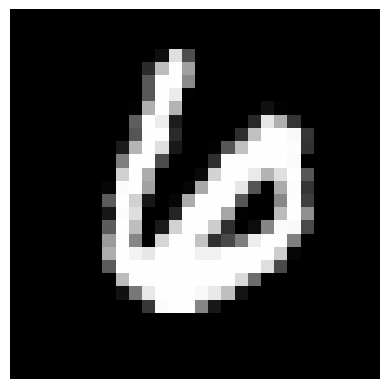

2 --- 2


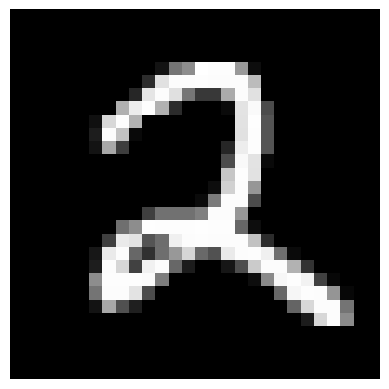

1 --- 1


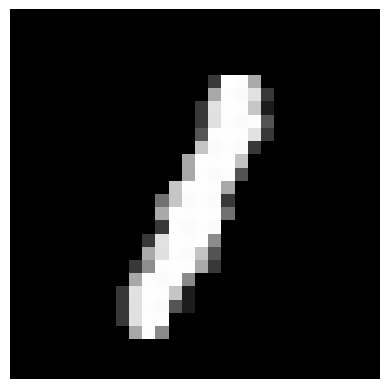

0 --- 0


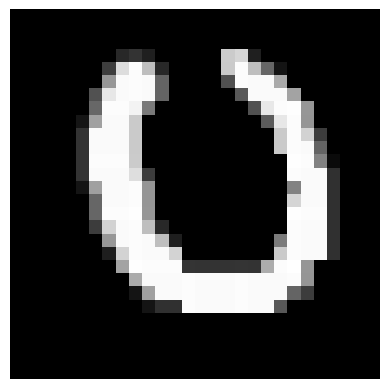

1 --- 1


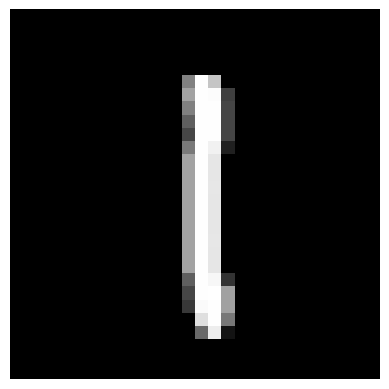

4 --- 4


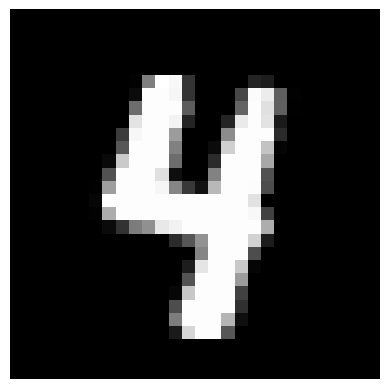

7 --- 7


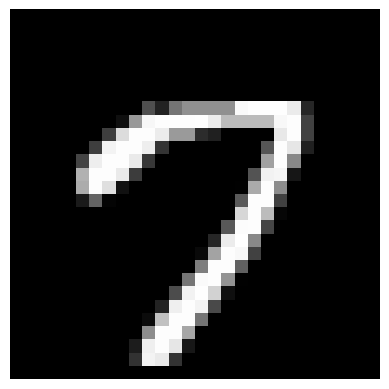

9 --- 9


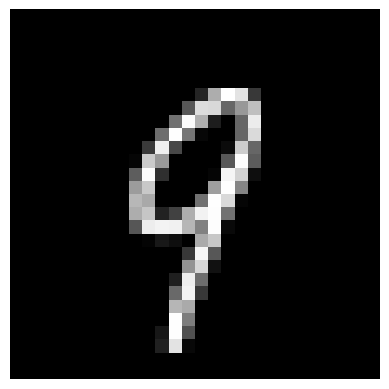

9 --- 9


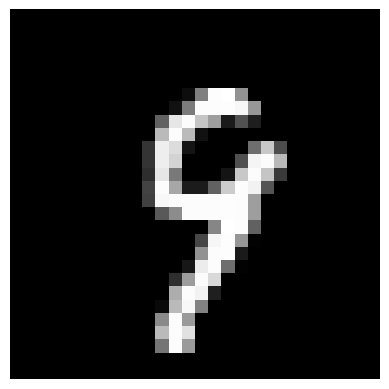

3 --- 3


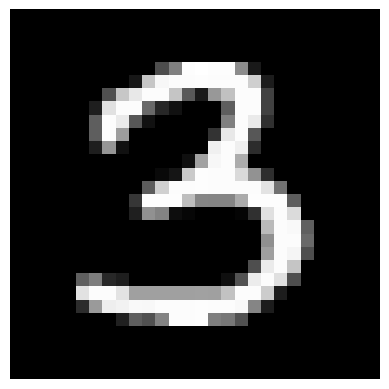

6 --- 6


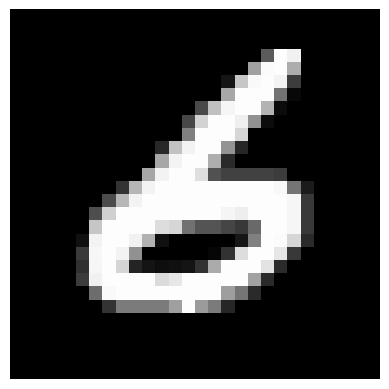

5 --- 5


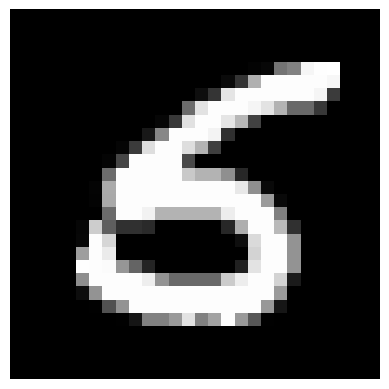

5 --- 5


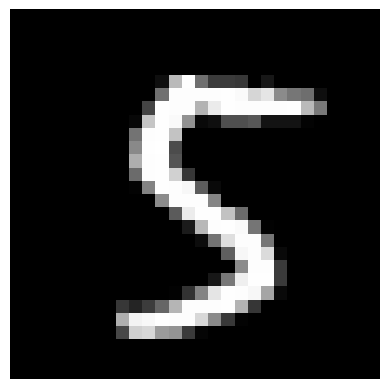

0 --- 0


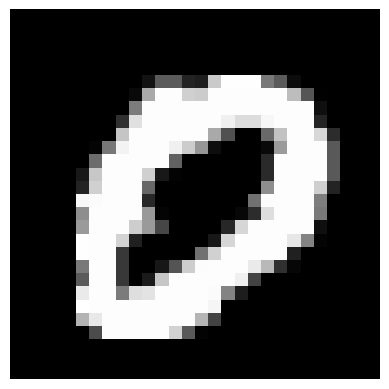

9 --- 9


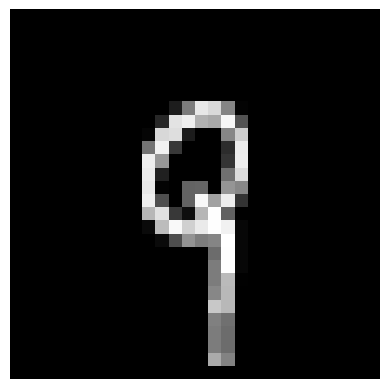

8 --- 8


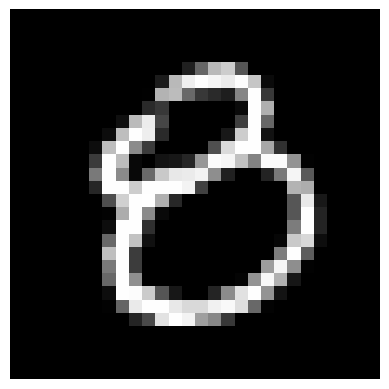

4 --- 4


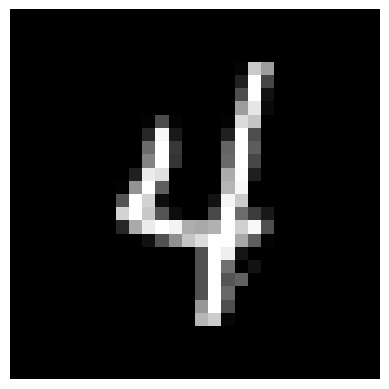

8 --- 8


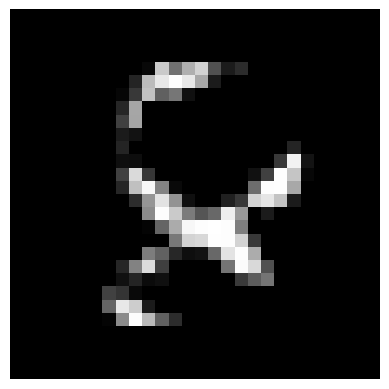

6 --- 6


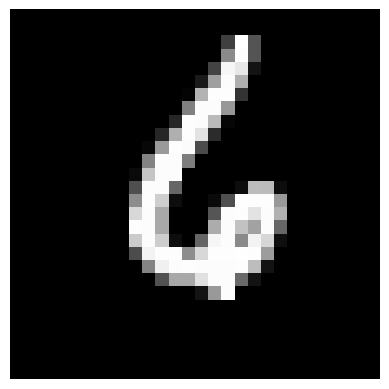

6 --- 6


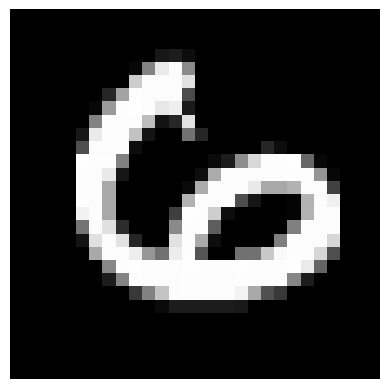

5 --- 5


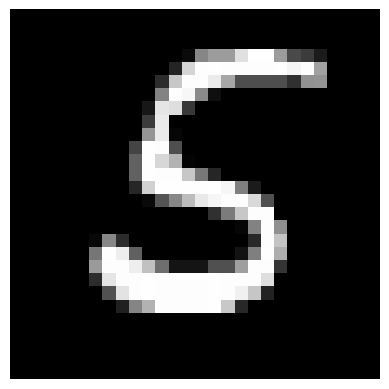

3 --- 3


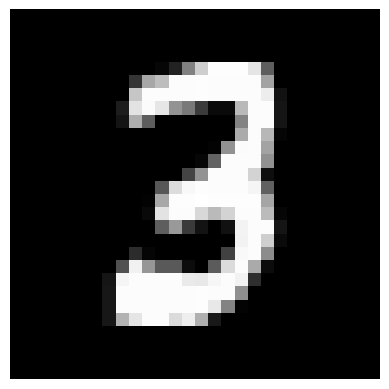

5 --- 5


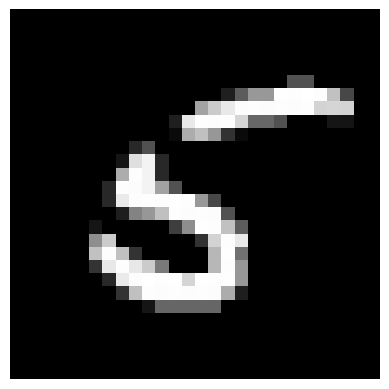

8 --- 8


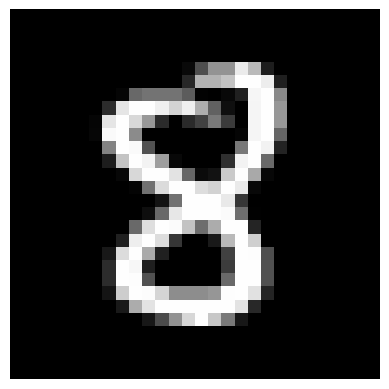

1 --- 1


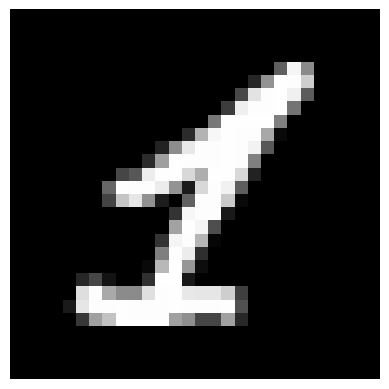

3 --- 3


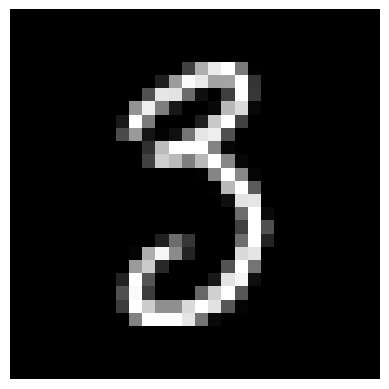

2 --- 2


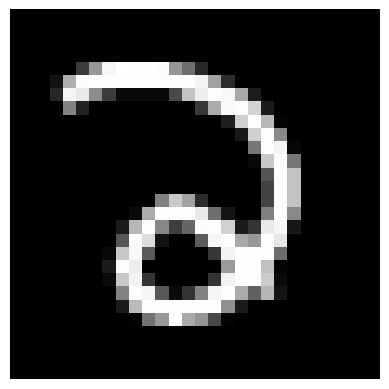

9 --- 9


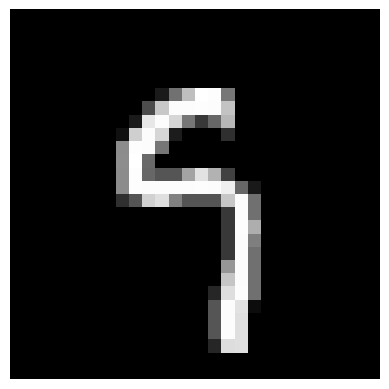

4 --- 4


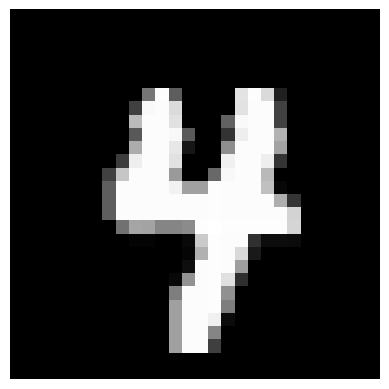

6 --- 6


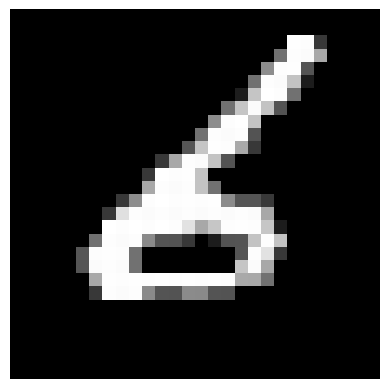

2 --- 2


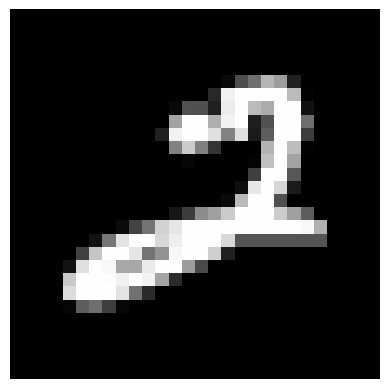

0 --- 0


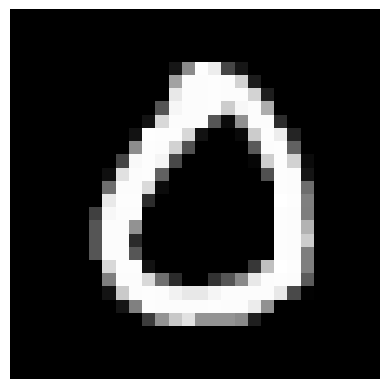

8 --- 8


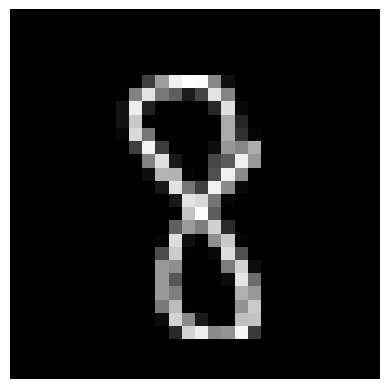

6 --- 6


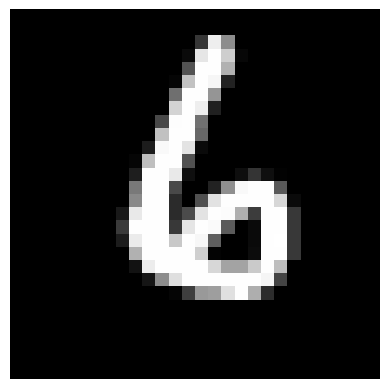

9 --- 9


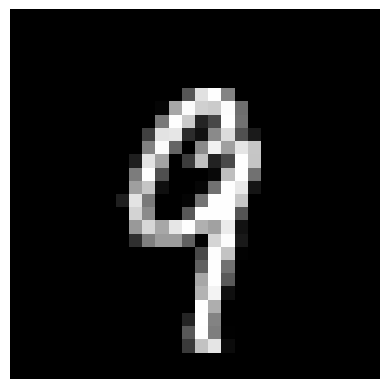

7 --- 7


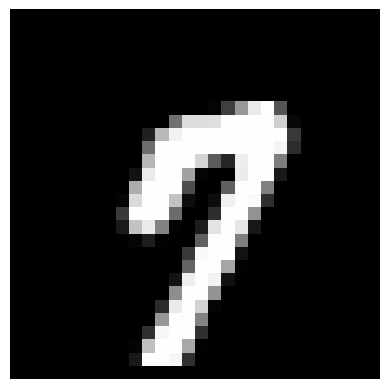

3 --- 3


7 --- 7


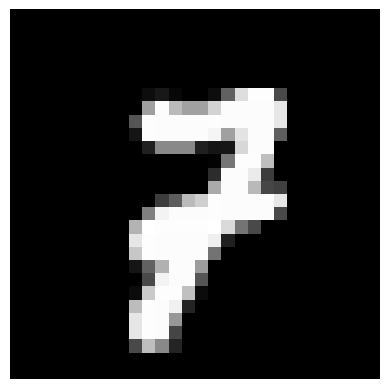

2 --- 2


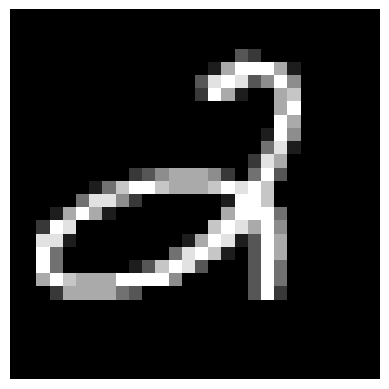

0 --- 0


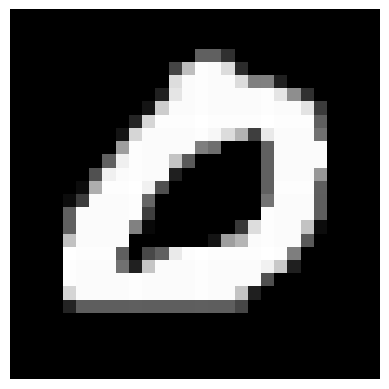

5 --- 5


3 --- 3


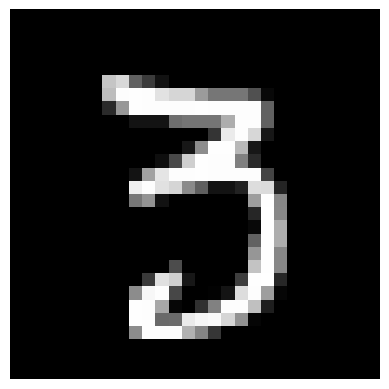

5 --- 5


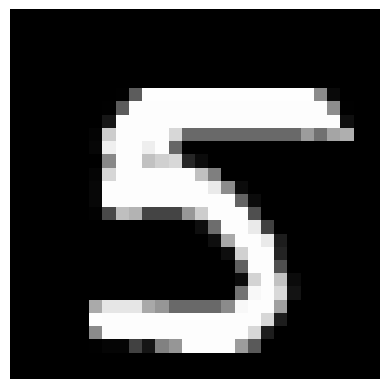

0 --- 0


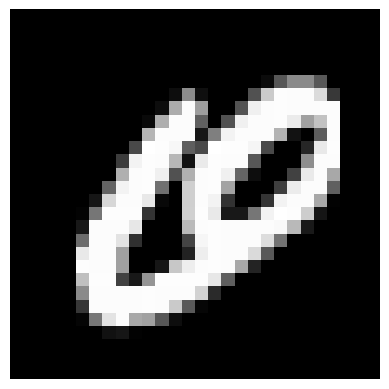

6 --- 6


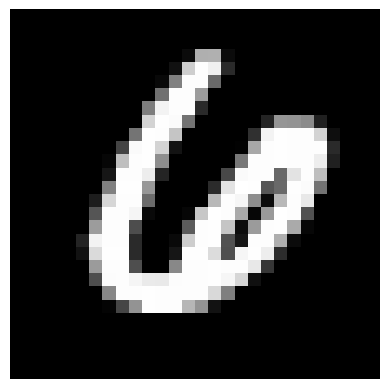

5 --- 5


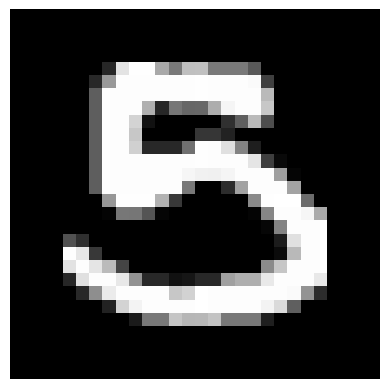

4 --- 4


1 --- 1


5 --- 5


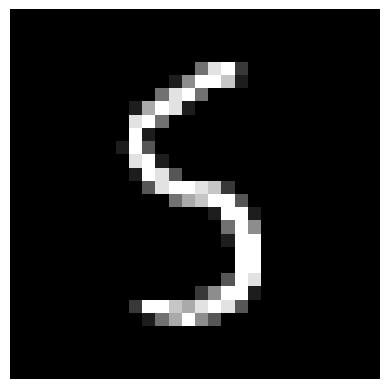

8 --- 8


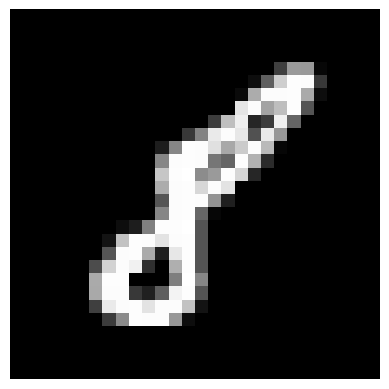

4 --- 4


4 --- 4


2 --- 2


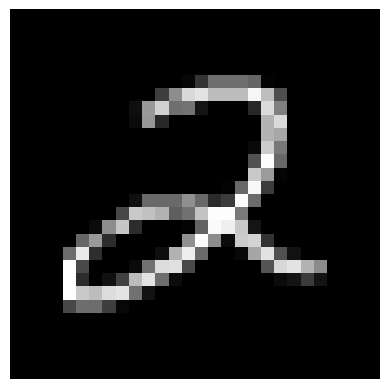

8 --- 8


4 --- 4


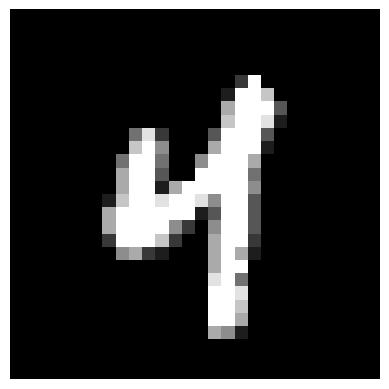

4 --- 4


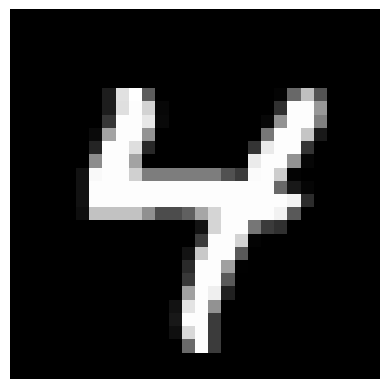

0 --- 0


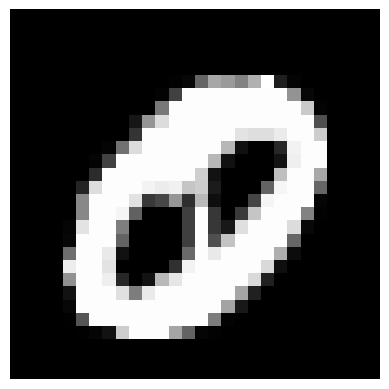

3 --- 3


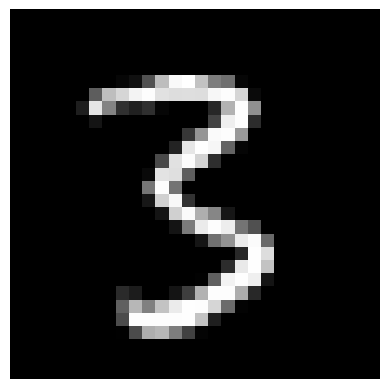

6 --- 6


3 --- 3


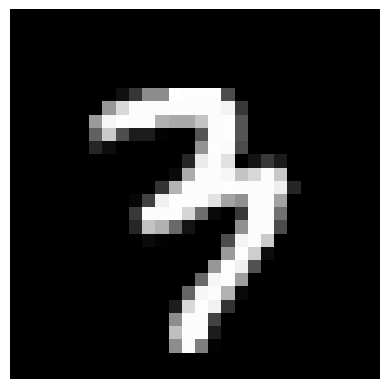

3 --- 3


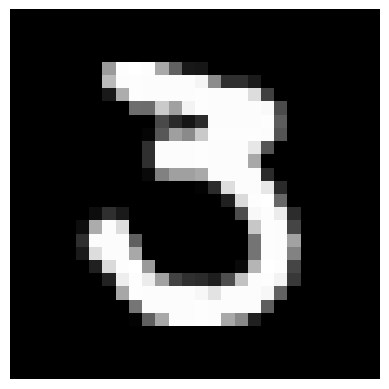

9 --- 9


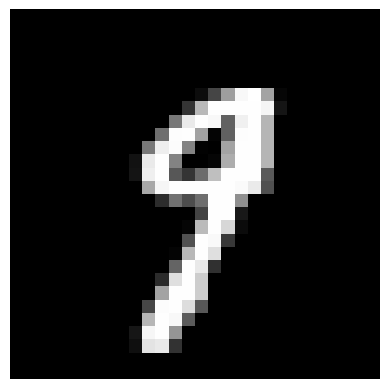

2 --- 2


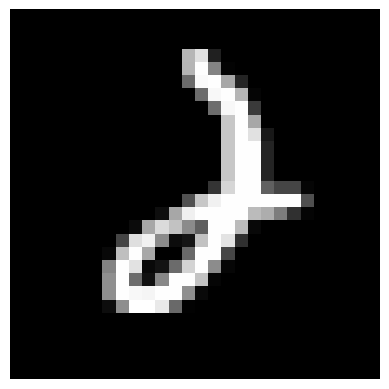

6 --- 6


4 --- 4


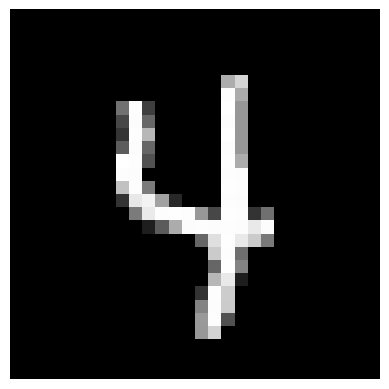

1 --- 1


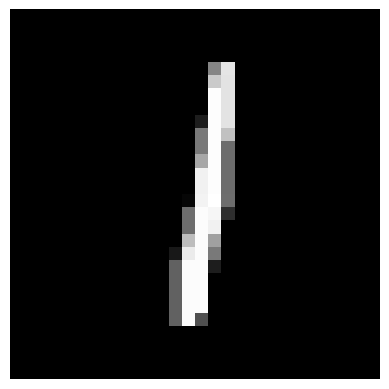

6 --- 6


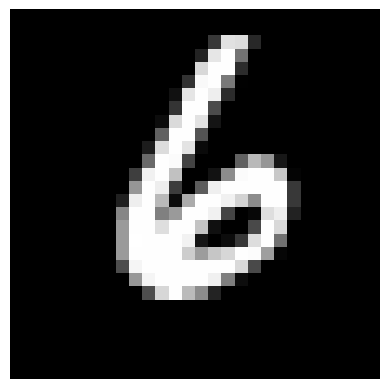

3 --- 3


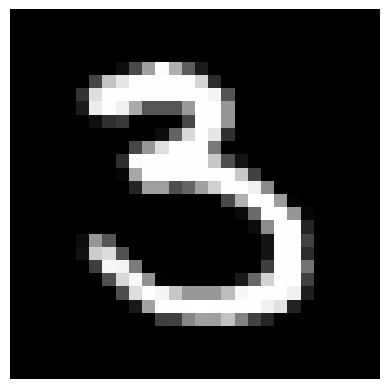

8 --- 8


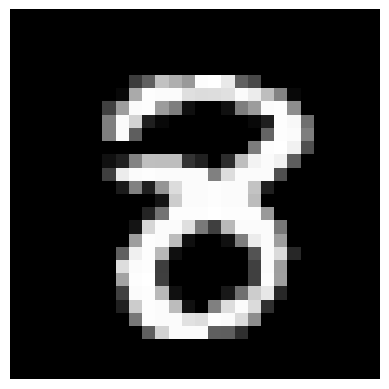

4 --- 4


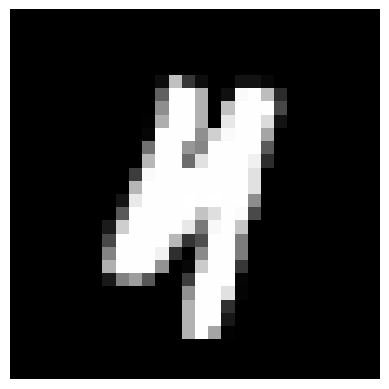

3 --- 3


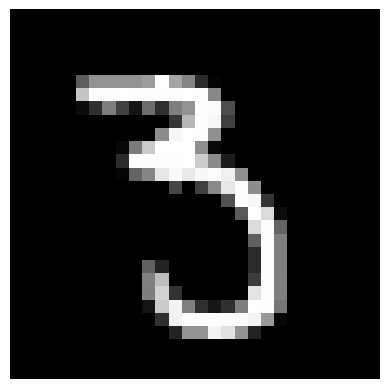

1 --- 1


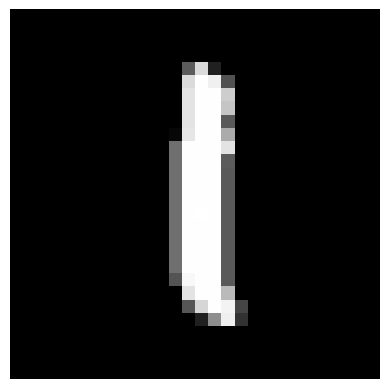

2 --- 2


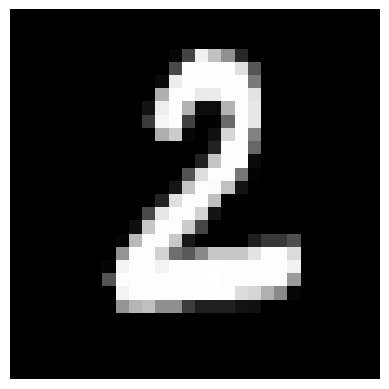

9 --- 9


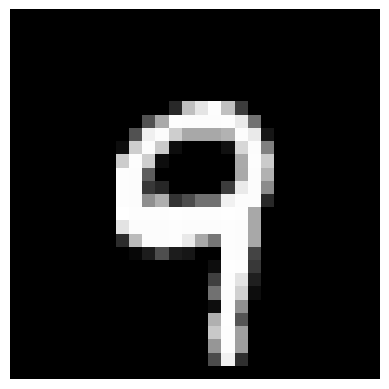

7 --- 7


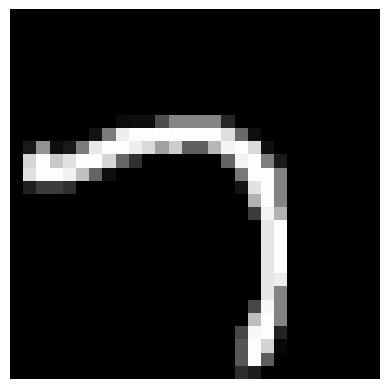

1 --- 1


2 --- 2


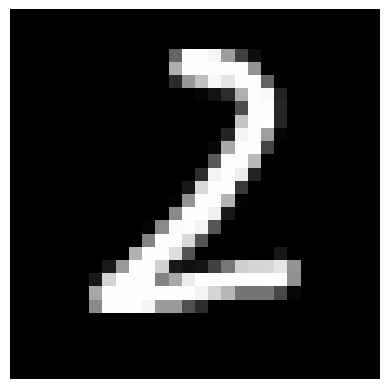

6 --- 6


1 --- 1


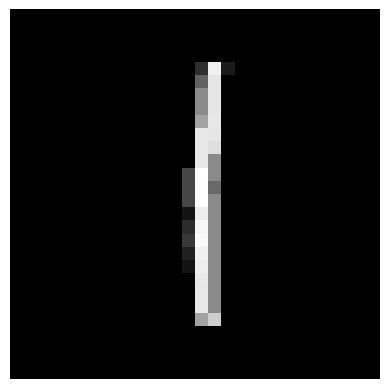

5 --- 5


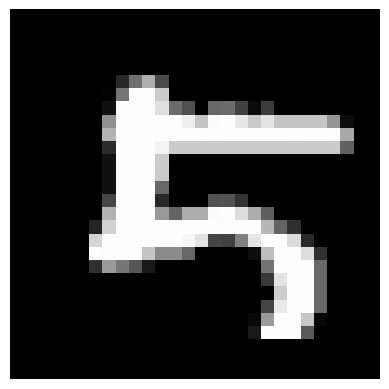

3 --- 3


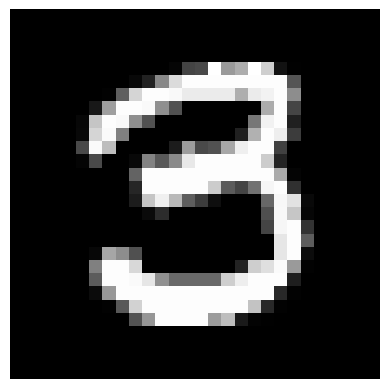

9 --- 9


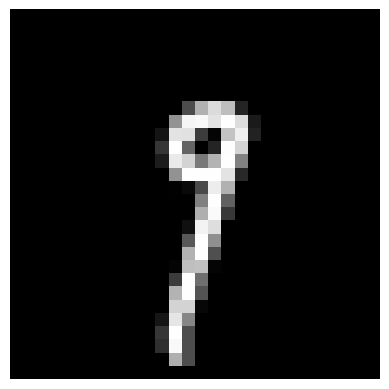

3 --- 3


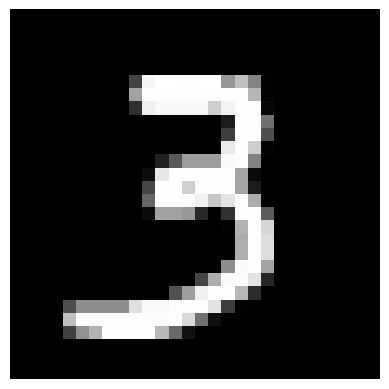

3 --- 3


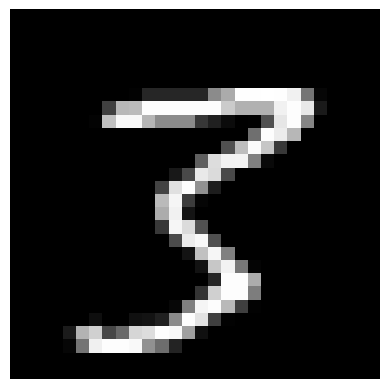

4 --- 4


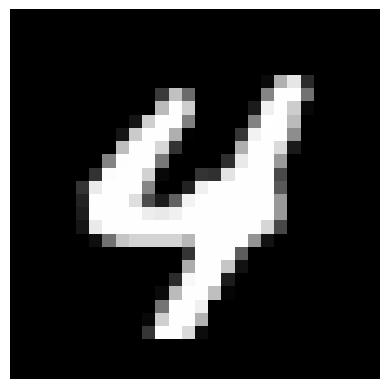

3 --- 3


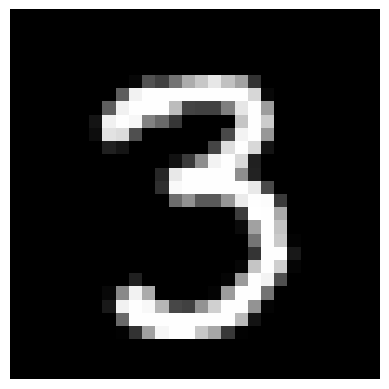

2 --- 2


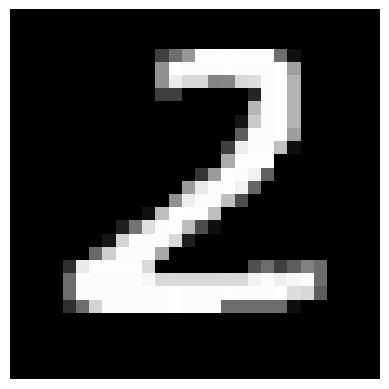

0 --- 0


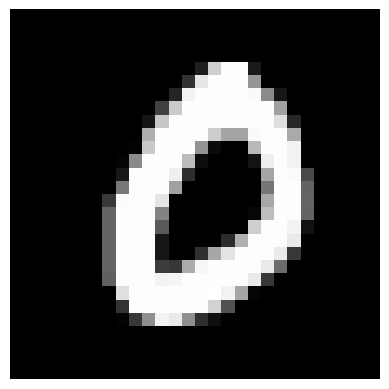

6 --- 6


3 --- 3


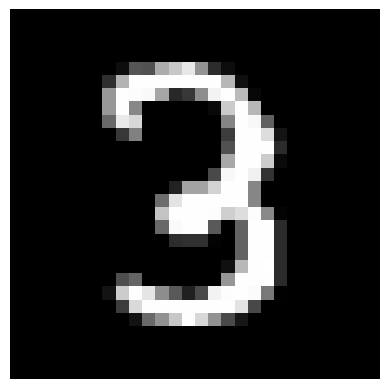

1 --- 1


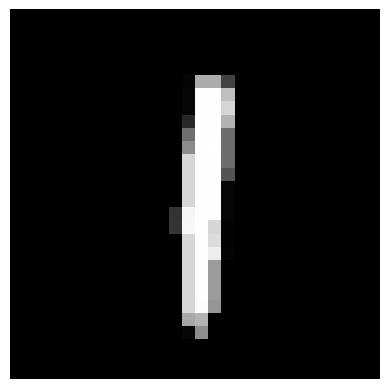

3 --- 3


3 --- 3


4 --- 4


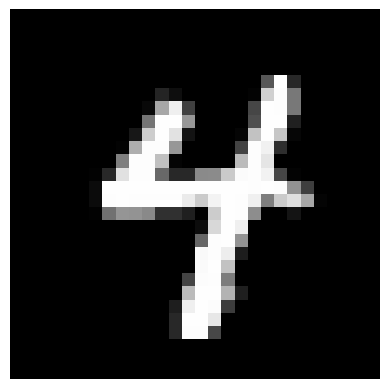

1 --- 1


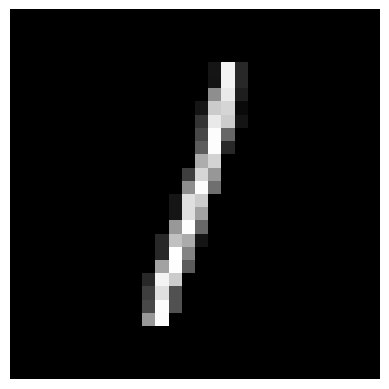

7 --- 7


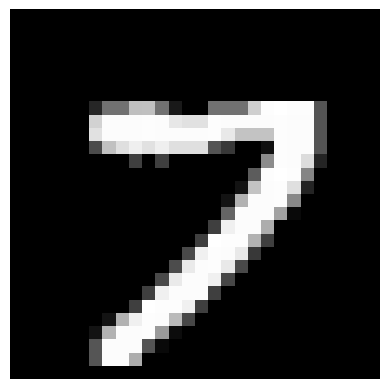

9 --- 9


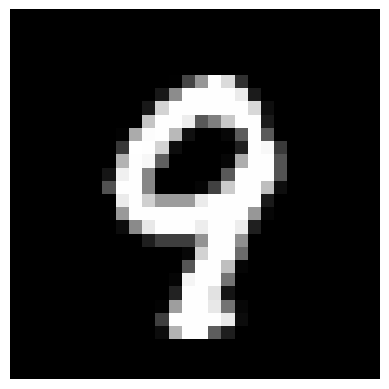

3 --- 3


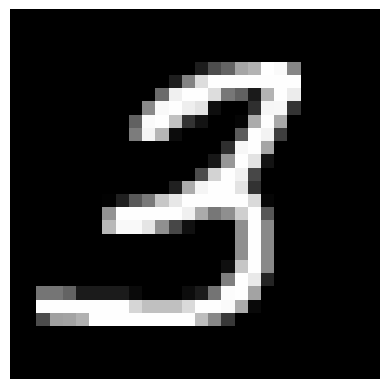

0 --- 0


8 --- 8


9 --- 9


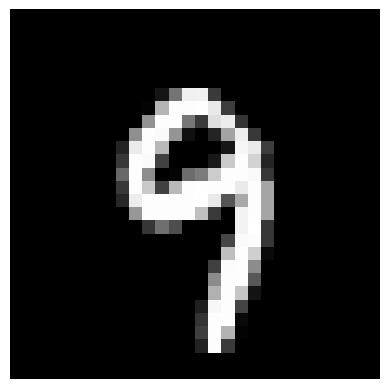

3 --- 3


5 --- 5


9 --- 9


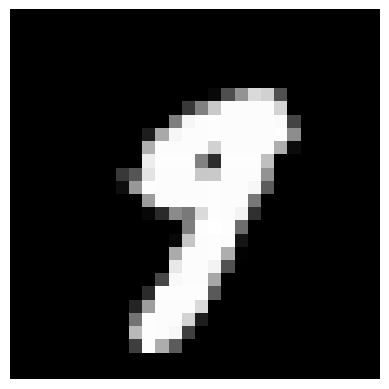

7 --- 7


5 --- 5


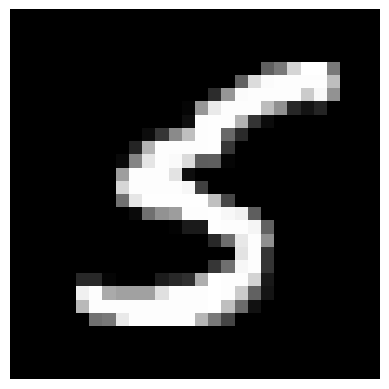

5 --- 5


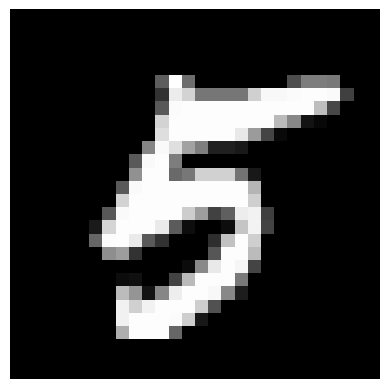

0 --- 0


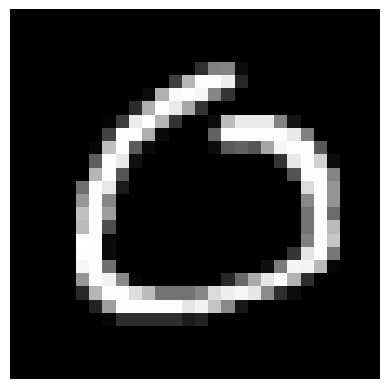

5 --- 5


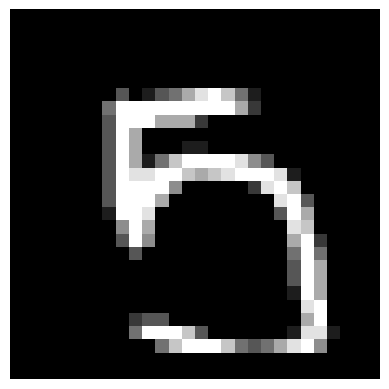

1 --- 1


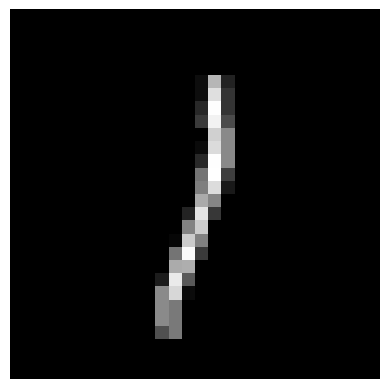

4 --- 4


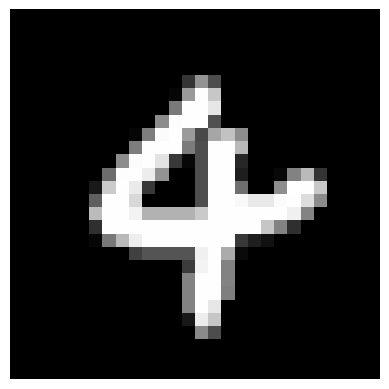

9 --- 9


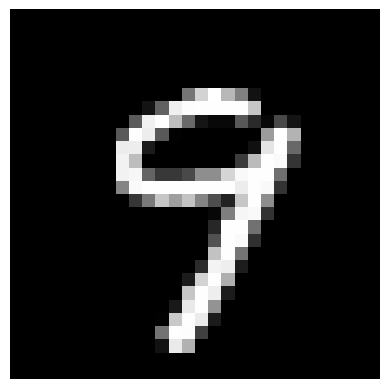

4 --- 4


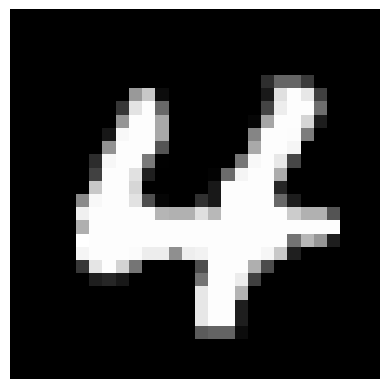

6 --- 6


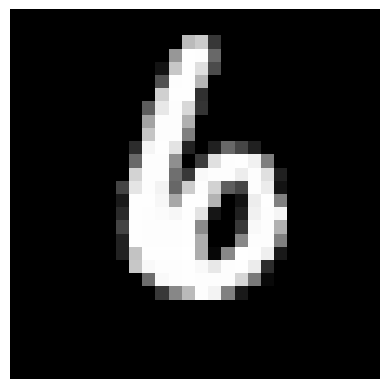

0 --- 0


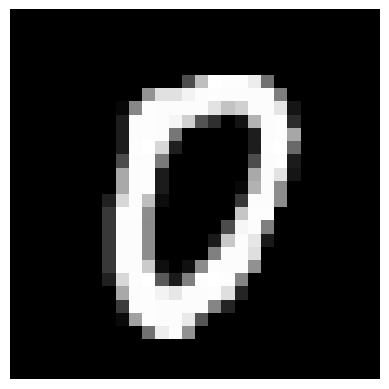

4 --- 4


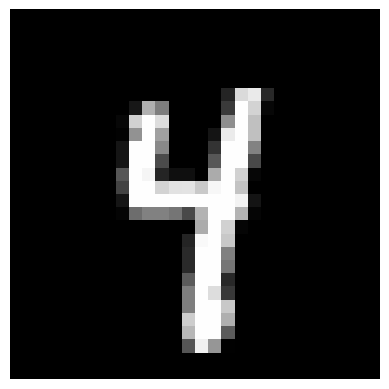

8 --- 8


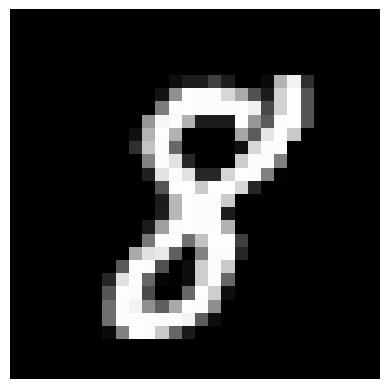

6 --- 6


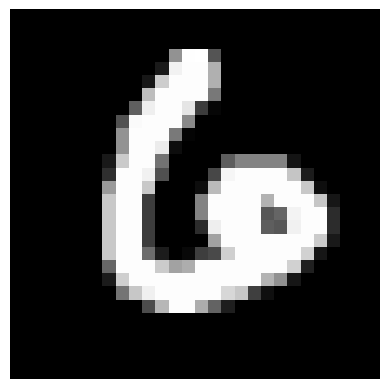

3 --- 3


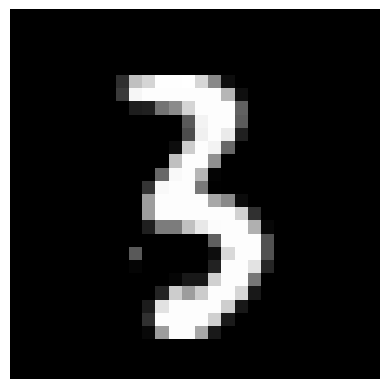

9 --- 9


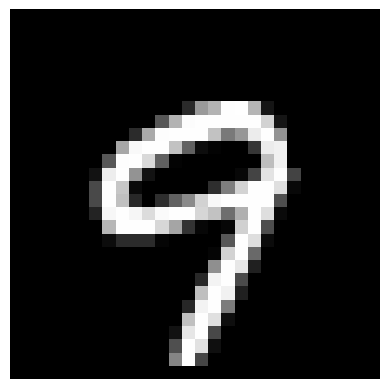

5 --- 5


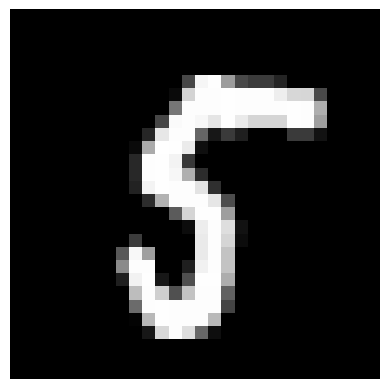

4 --- 4


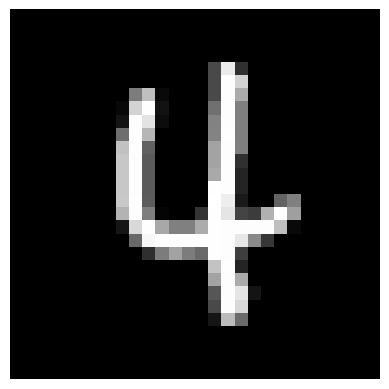

3 --- 3


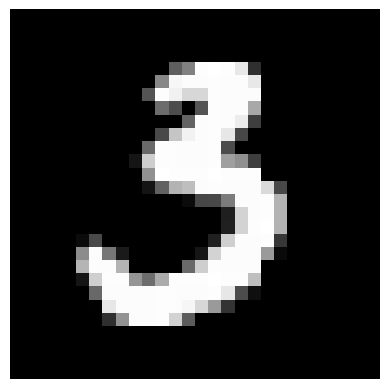

8 --- 8


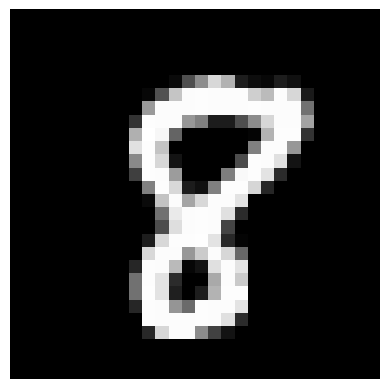

0 --- 0


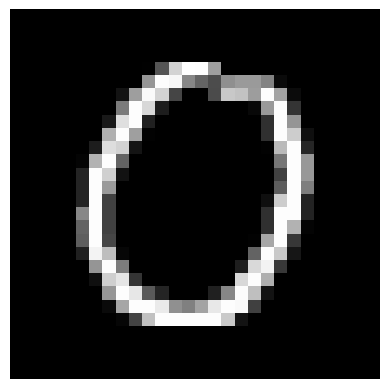

9 --- 9


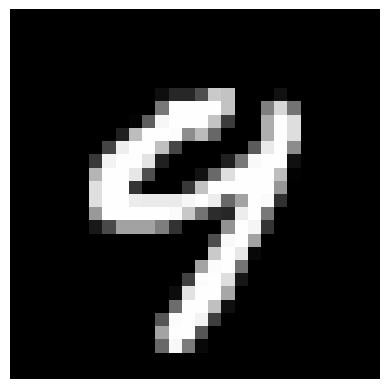

3 --- 3


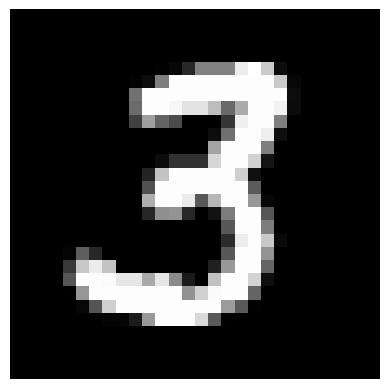

0 --- 0


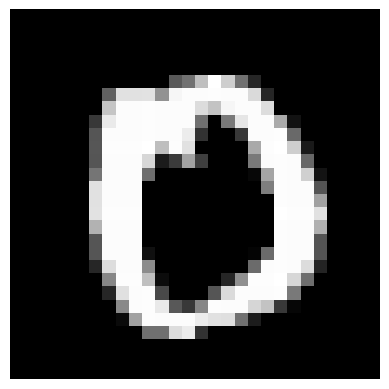

6 --- 6


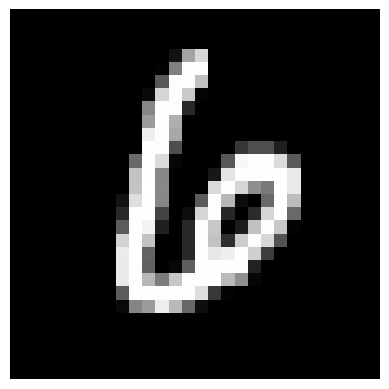

0 --- 0


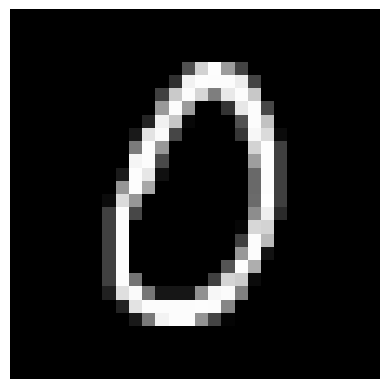

9 --- 9


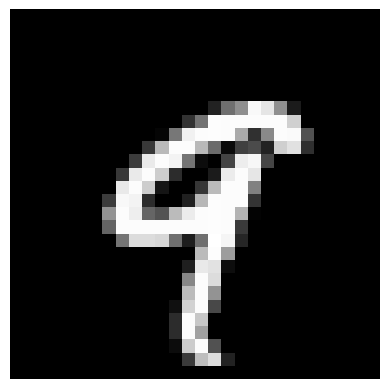

2 --- 2


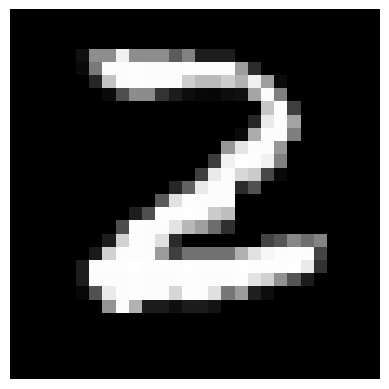

2 --- 2


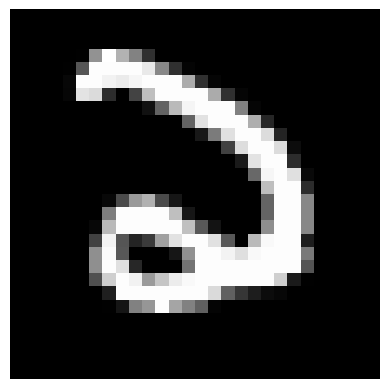

9 --- 9


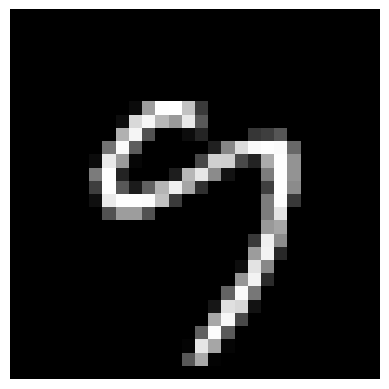

4 --- 4


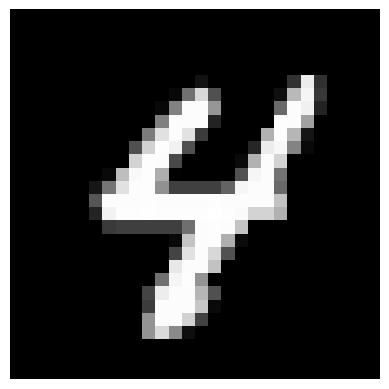

0 --- 0


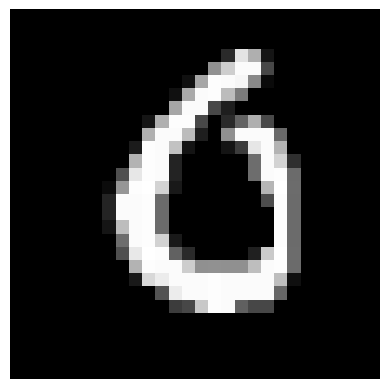

0 --- 0


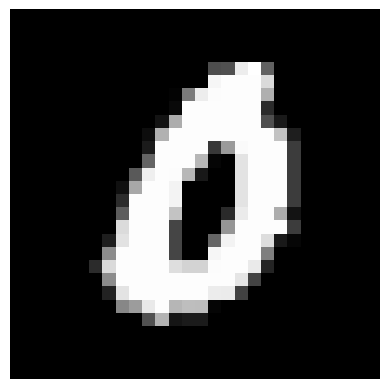

3 --- 3


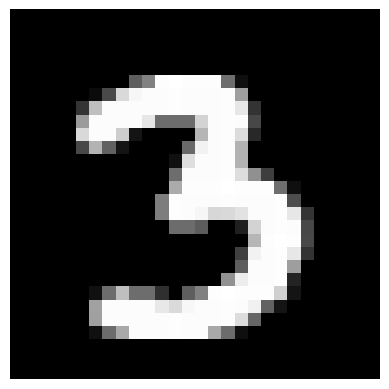

7 --- 7


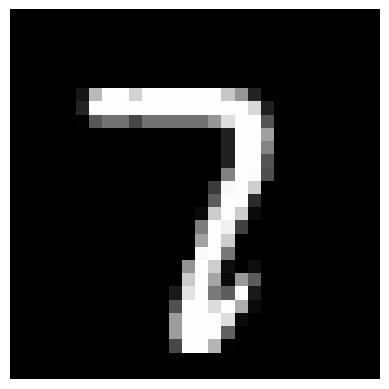

5 --- 5


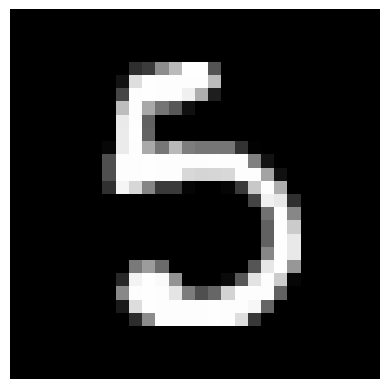

0 --- 0


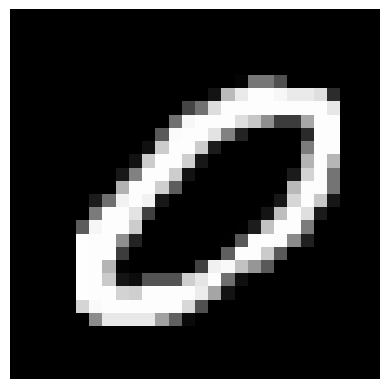

8 --- 8


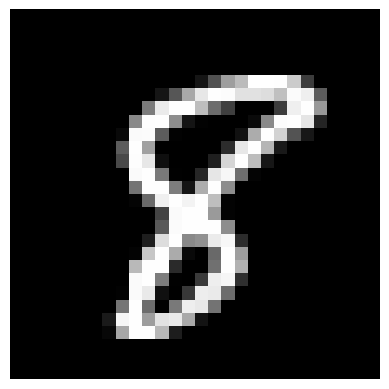

4 --- 4


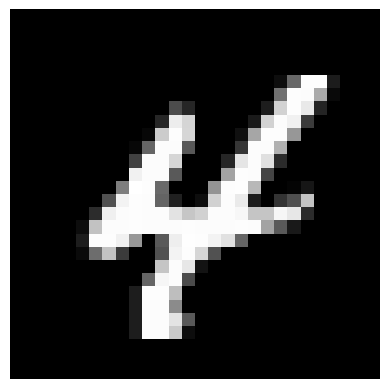

4 --- 4


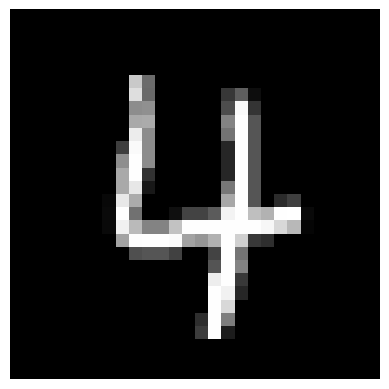

0 --- 0


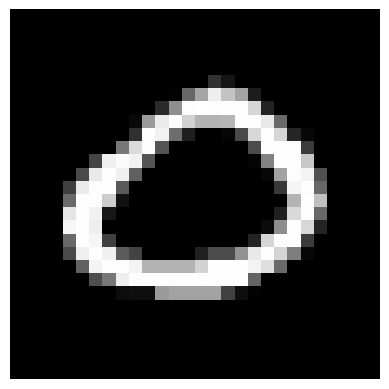

1 --- 1


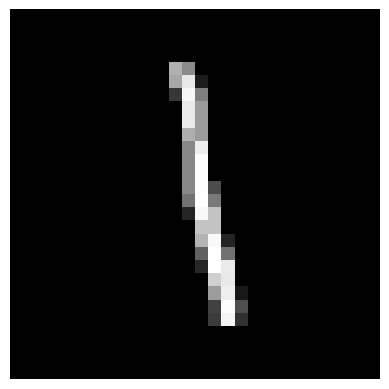

2 --- 2


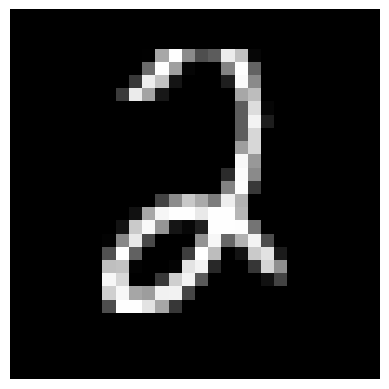

1 --- 1


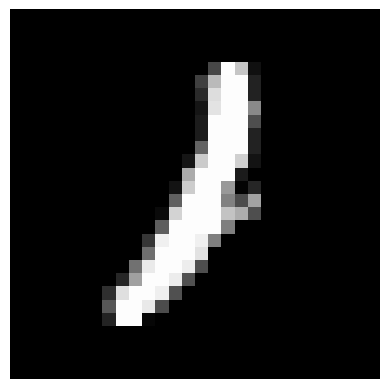

8 --- 8


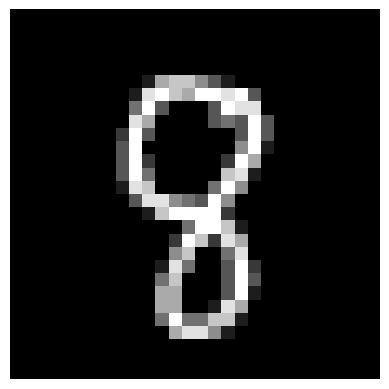

3 --- 3


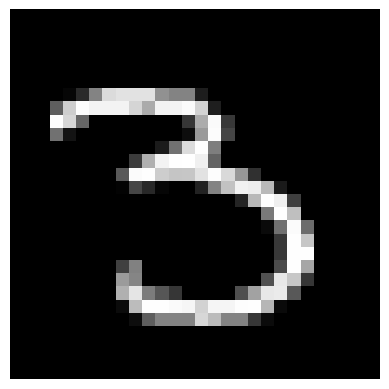

5 --- 5


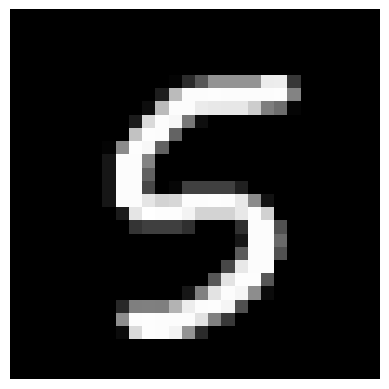

5 --- 5


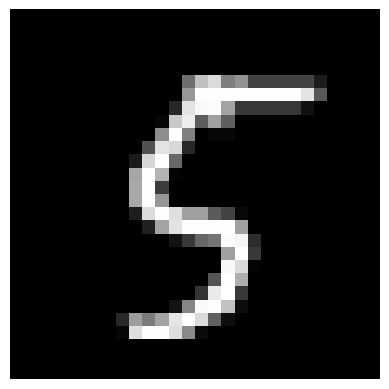

2 --- 2


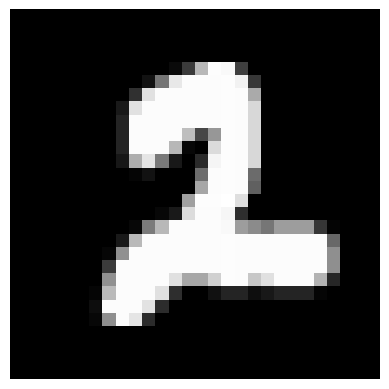

7 --- 7


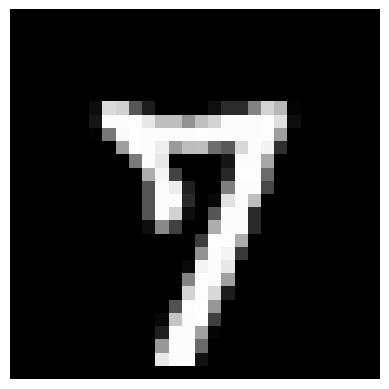

0 --- 0


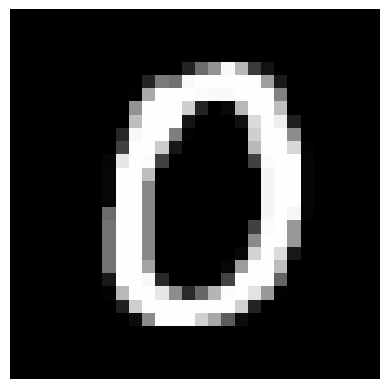

1 --- 1


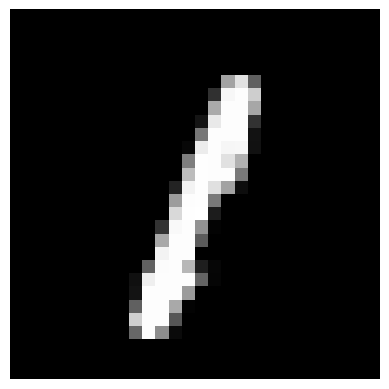

9 --- 9


7 --- 7


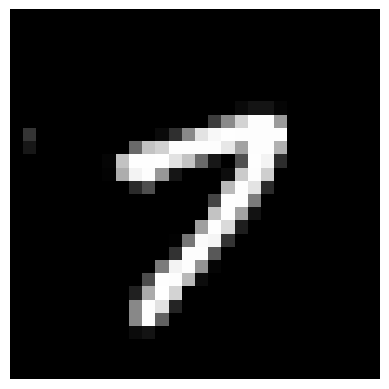

9 --- 9


9 --- 9


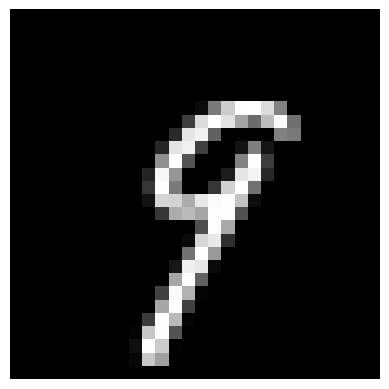

8 --- 8


5 --- 5


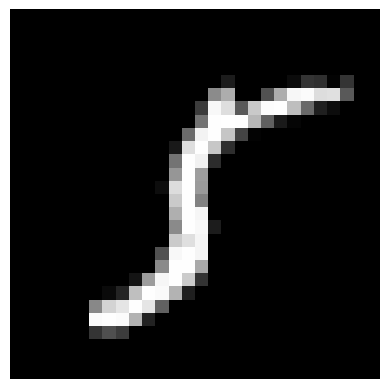

0 --- 0


8 --- 8


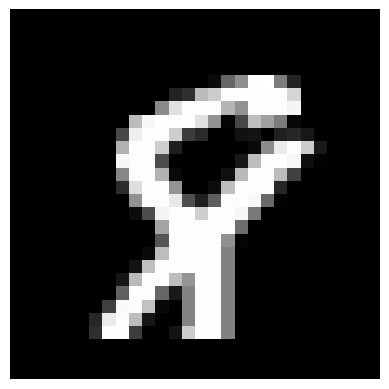

4 --- 4


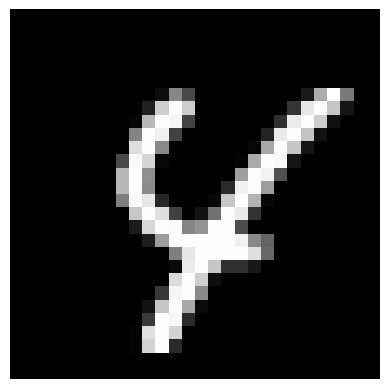

0 --- 0


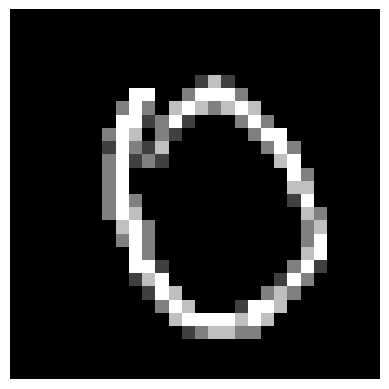

1 --- 1


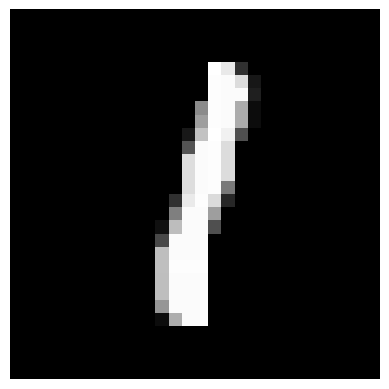

2 --- 2


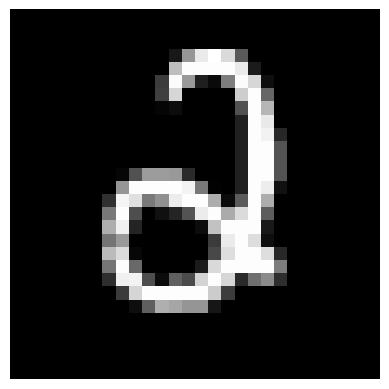

0 --- 0


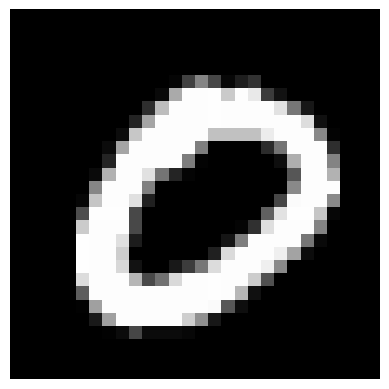

8 --- 8


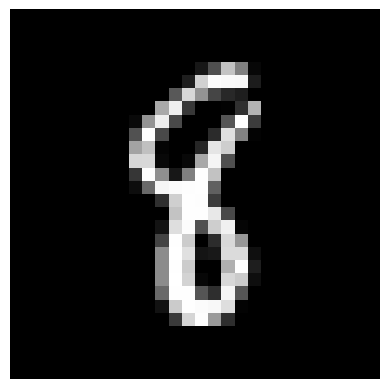

1 --- 1


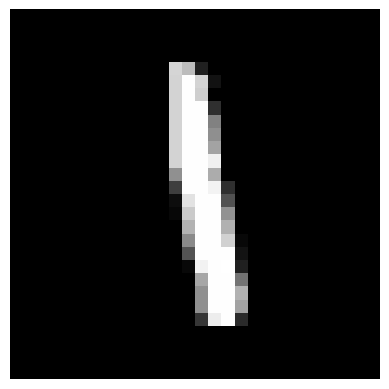

4 --- 4


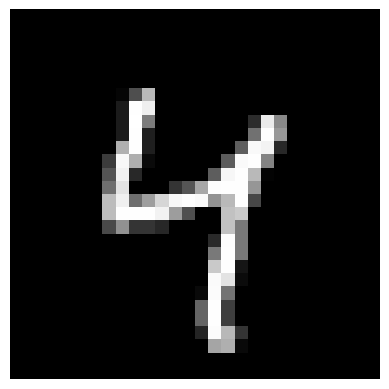

6 --- 6


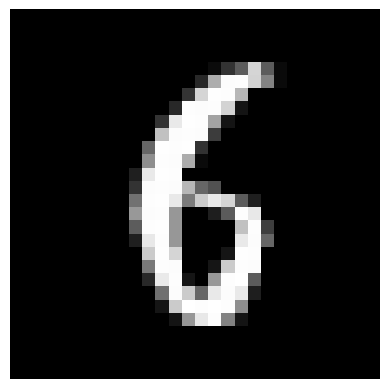

4 --- 4


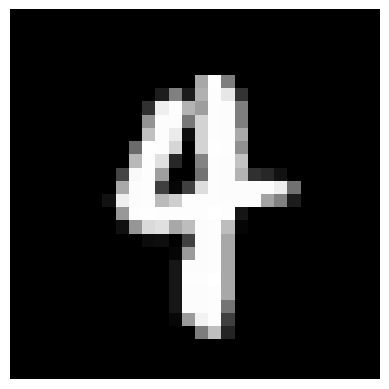

7 --- 7


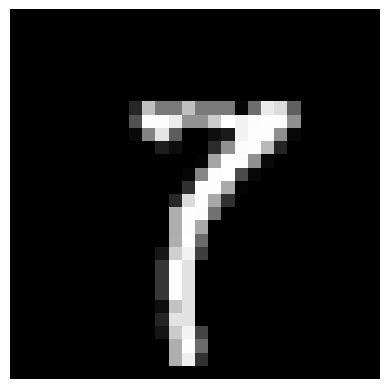

2 --- 2


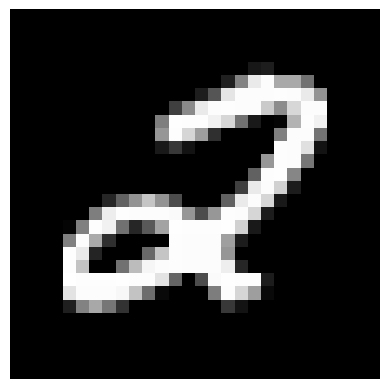

7 --- 7


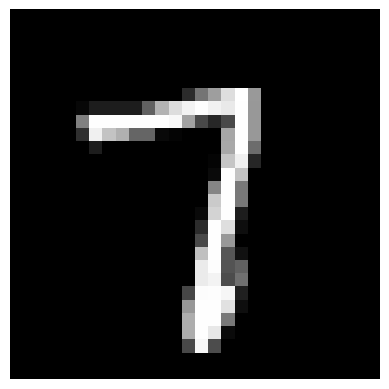

2 --- 2


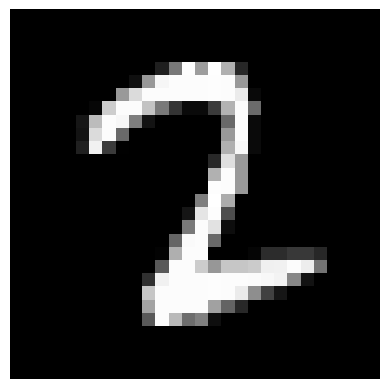

2 --- 2


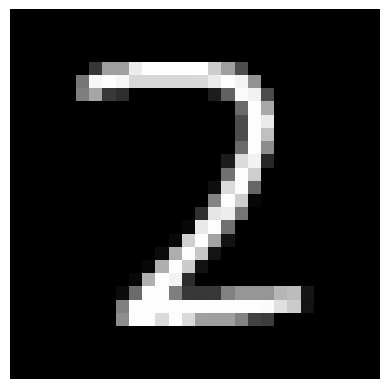

1 --- 1


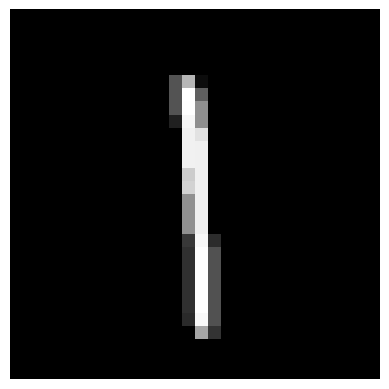

5 --- 5


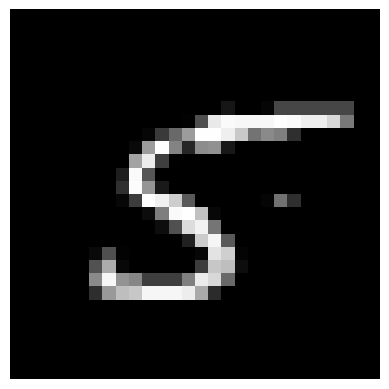

8 --- 8


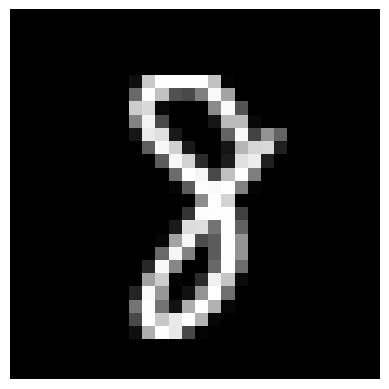

3 --- 3


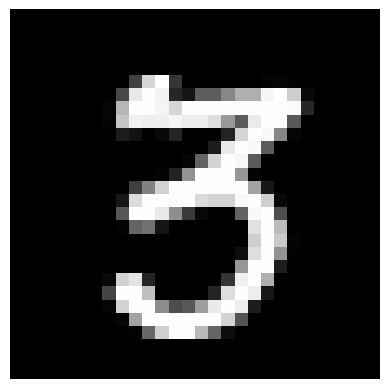

5 --- 5


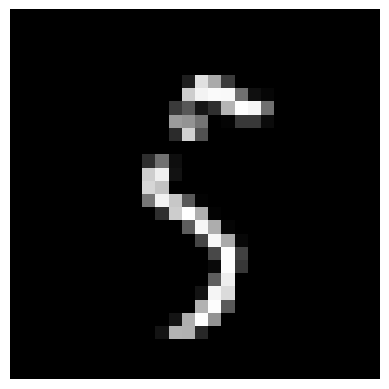

7 --- 7


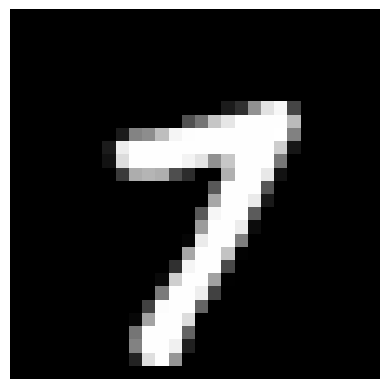

2 --- 2


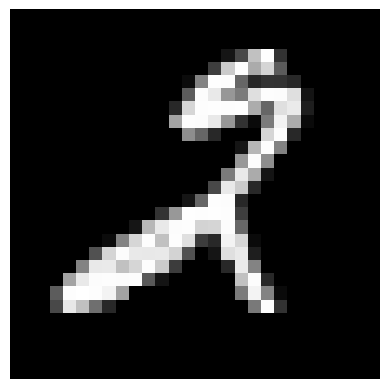

5 --- 5


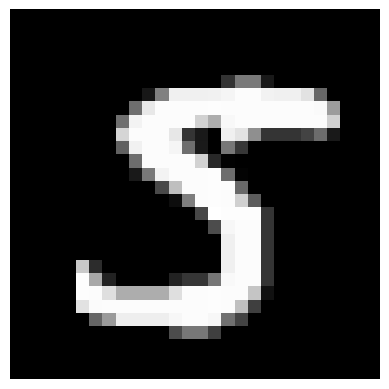

0 --- 0


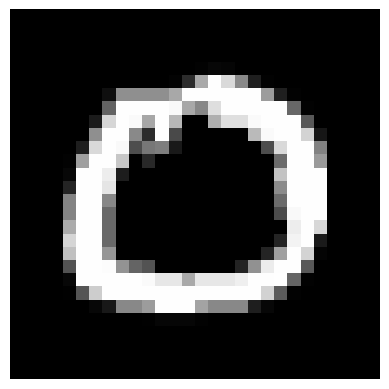

8 --- 8


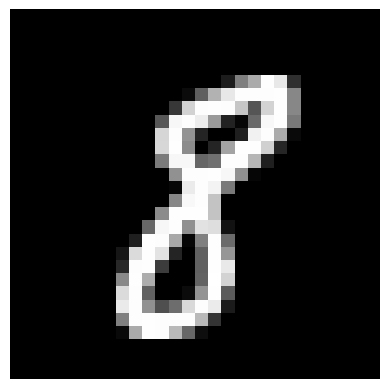

8 --- 8


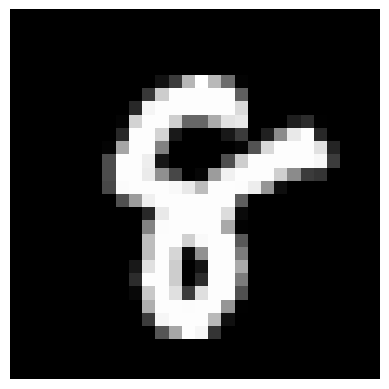

6 --- 6


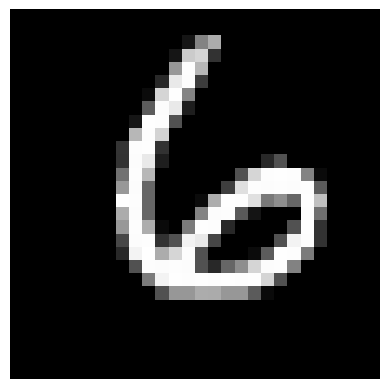

6 --- 6


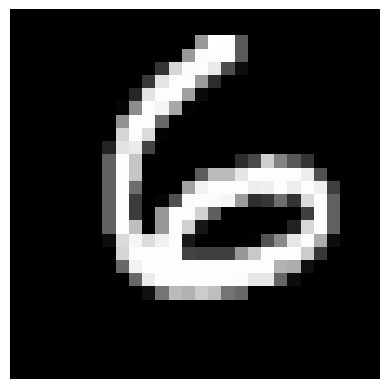

2 --- 2


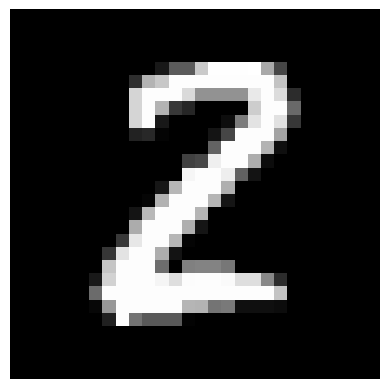

9 --- 9


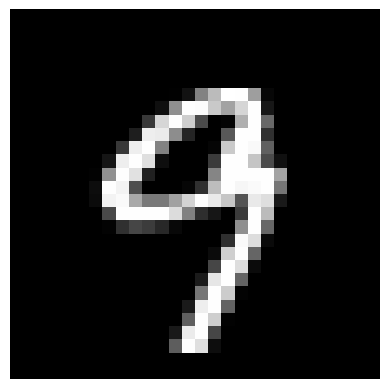

6 --- 6


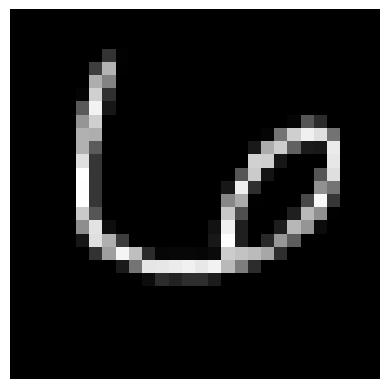

1 --- 1


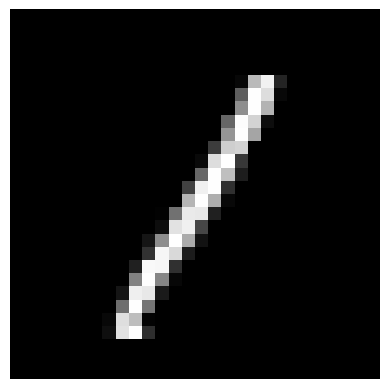

7 --- 7


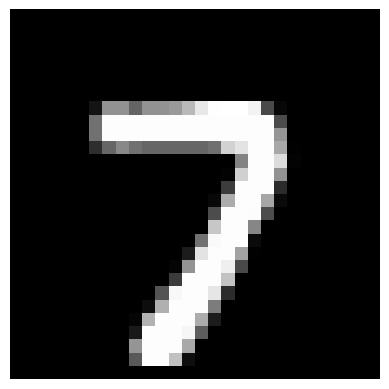

2 --- 2


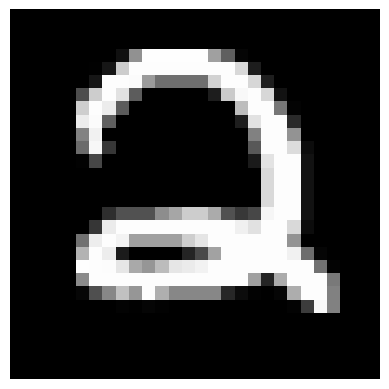

4 --- 4


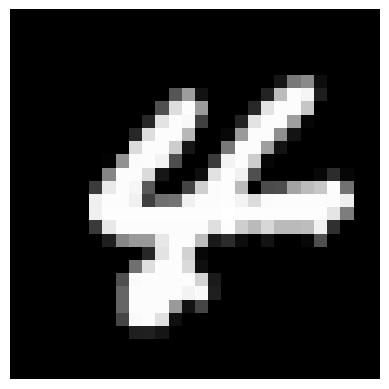

0 --- 0


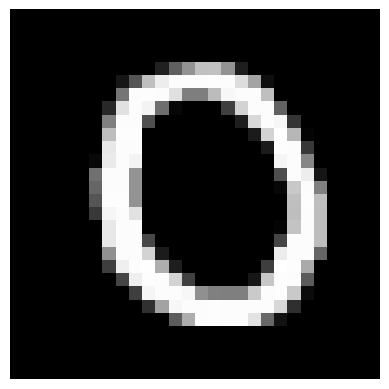

6 --- 6


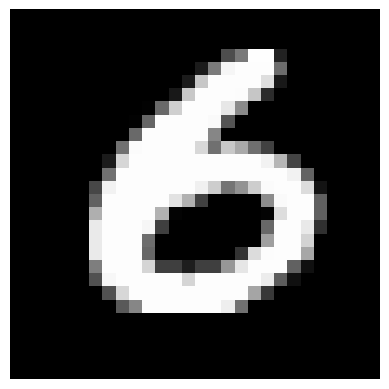

1 --- 1


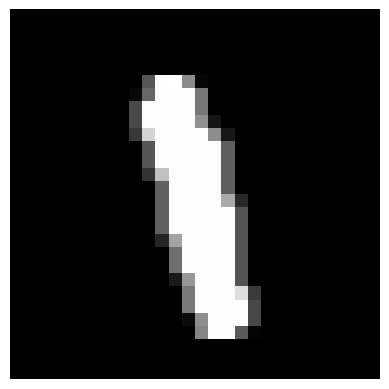

3 --- 3


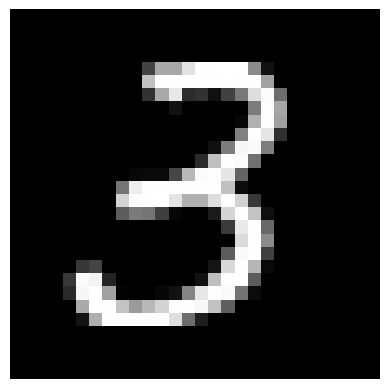

1 --- 1


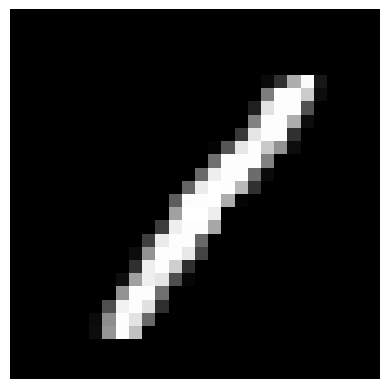

3 --- 3


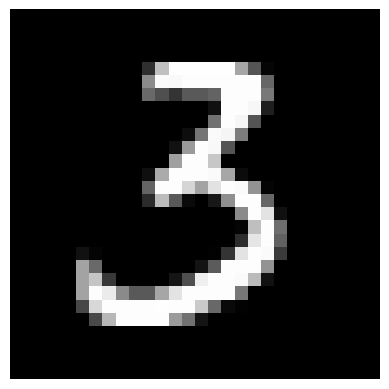

8 --- 8


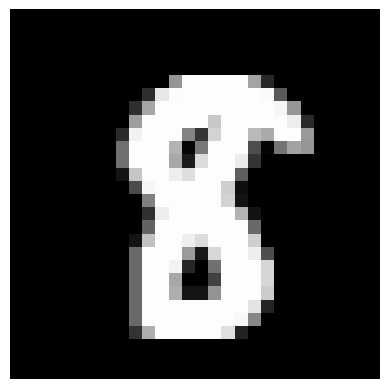

9 --- 9


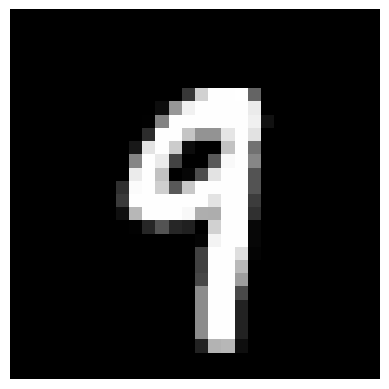

2 --- 2


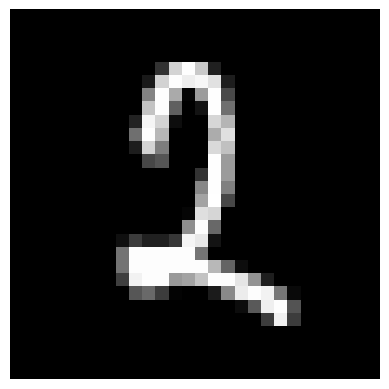

7 --- 7


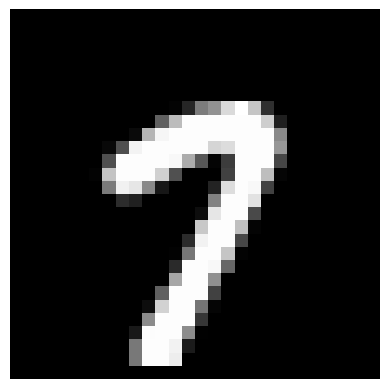

0 --- 0


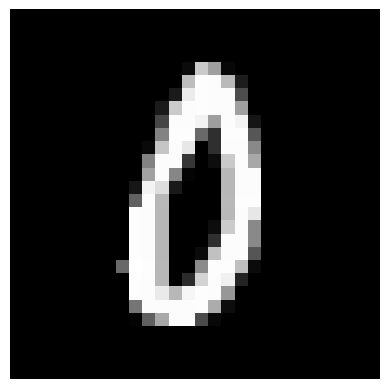

9 --- 9


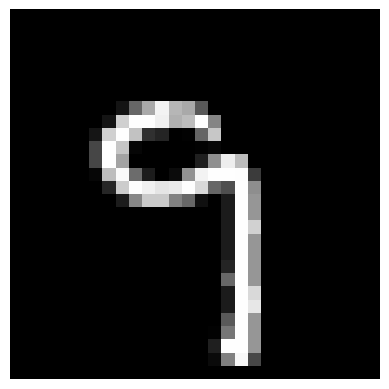

9 --- 9


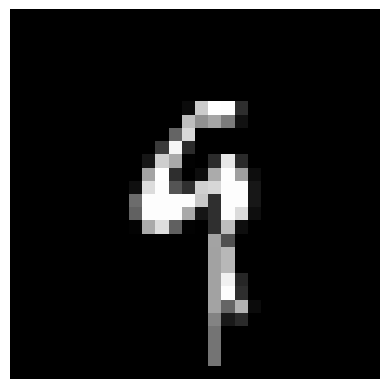

3 --- 3


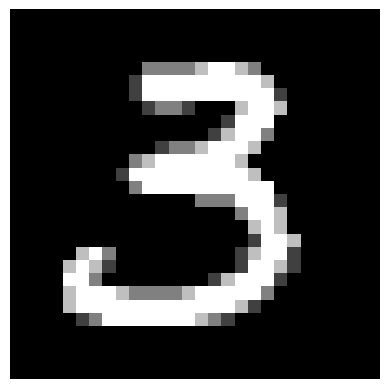

1 --- 1


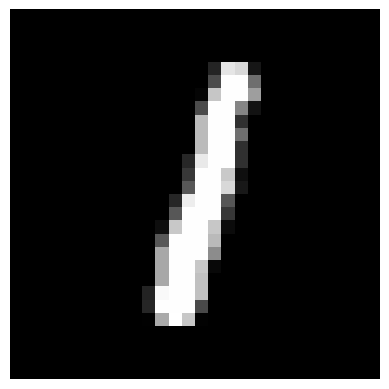

3 --- 3


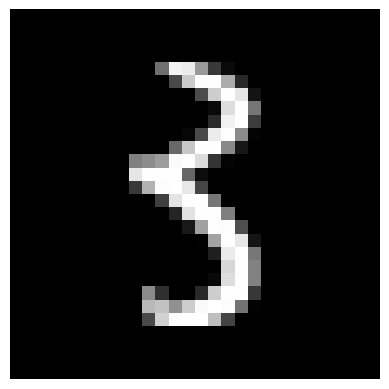

7 --- 7


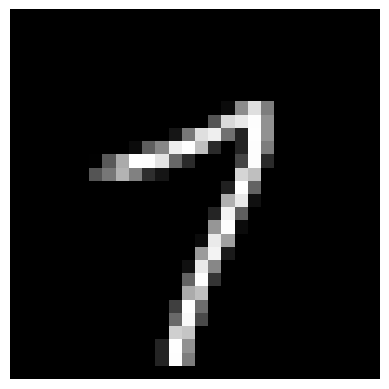

8 --- 8


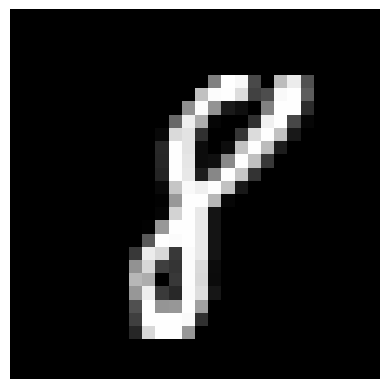

1 --- 1


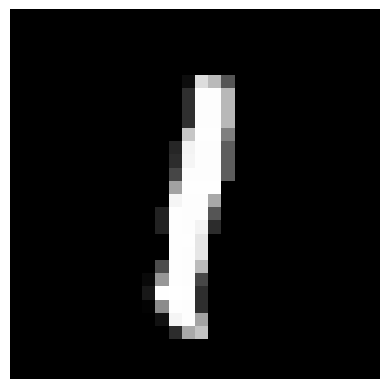

2 --- 2


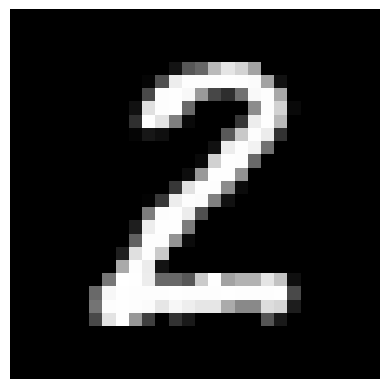

1 --- 1


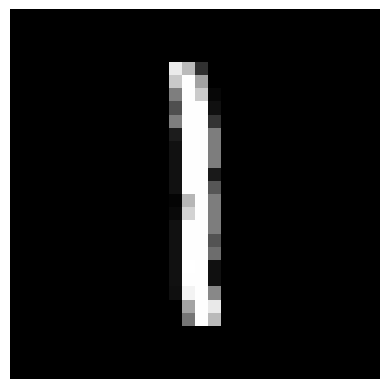

9 --- 9


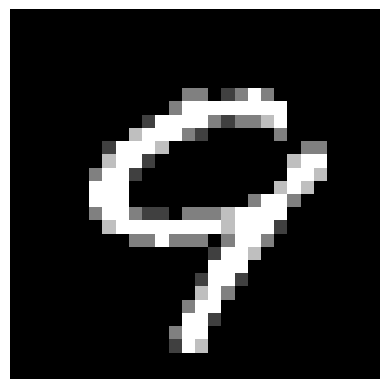

8 --- 8


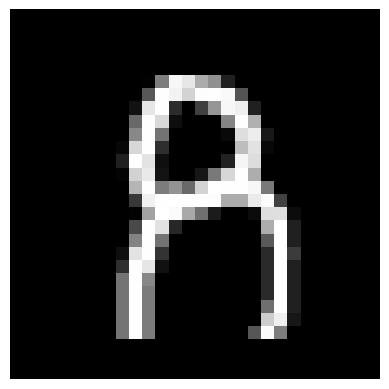

4 --- 4


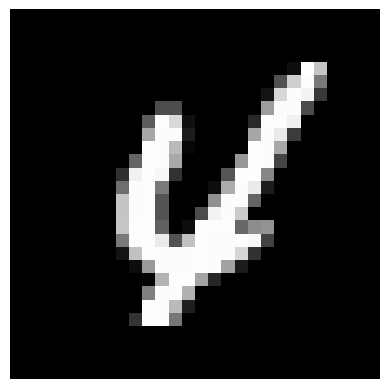

6 --- 6


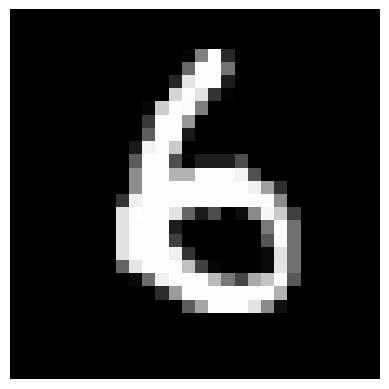

9 --- 9


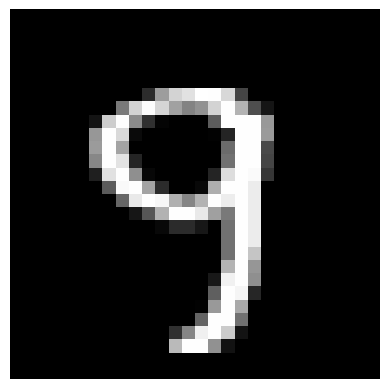

5 --- 5


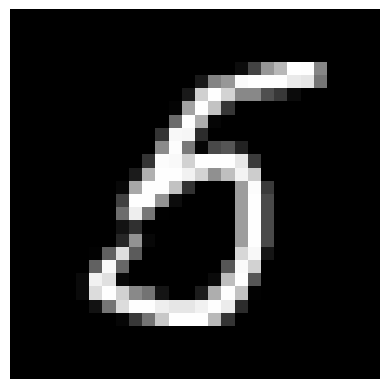

8 --- 8


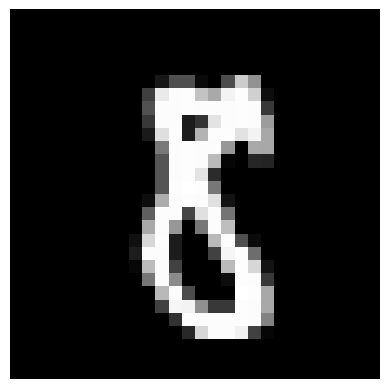

8 --- 8


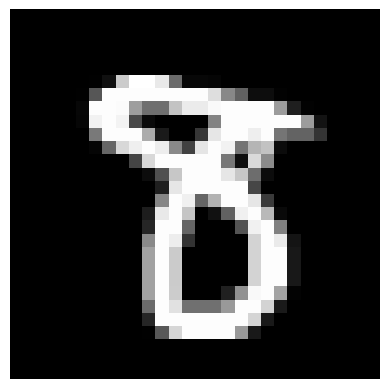

2 --- 2


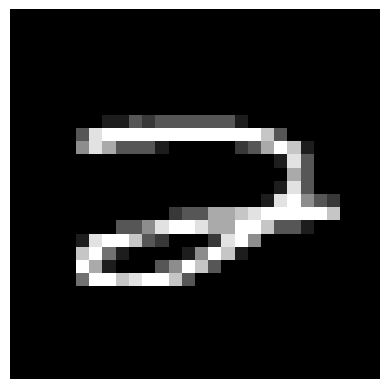

4 --- 4


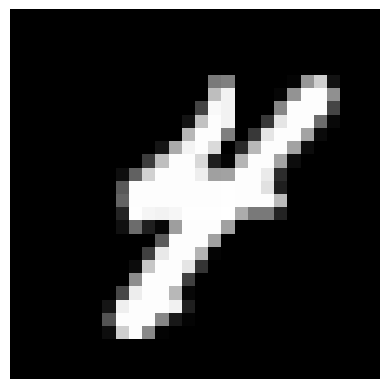

1 --- 1


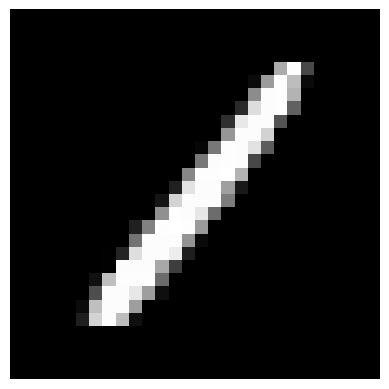

0 --- 0


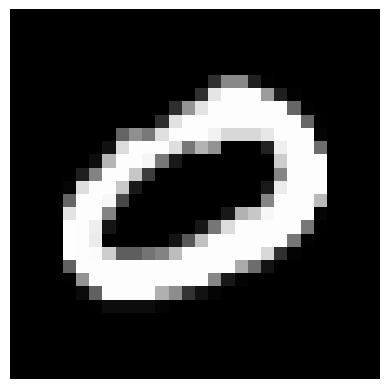

3 --- 3


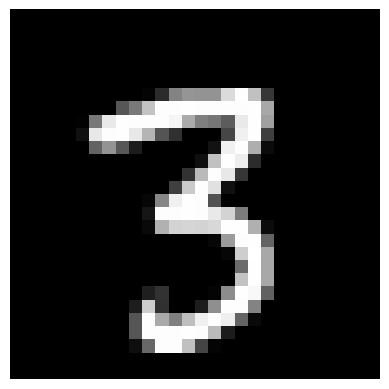

3 --- 3


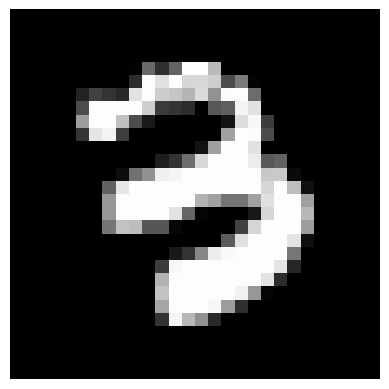

3 --- 3


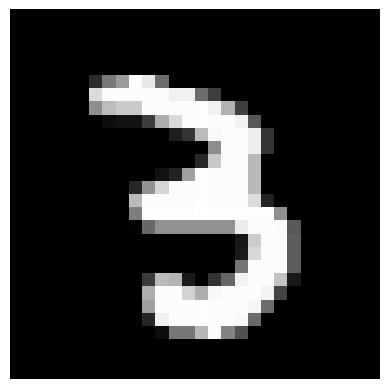

5 --- 5


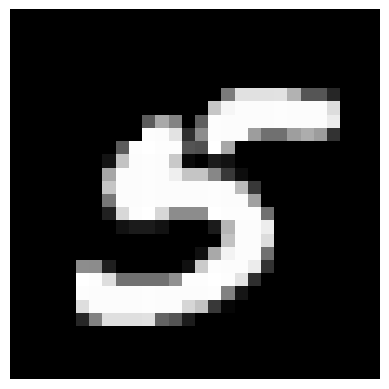

5 --- 5


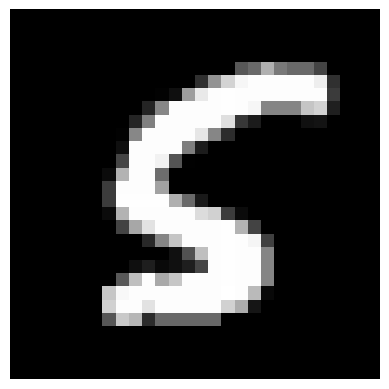

7 --- 7


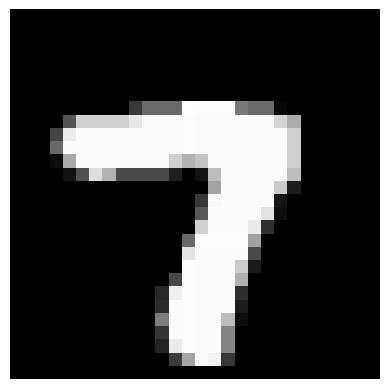

2 --- 2


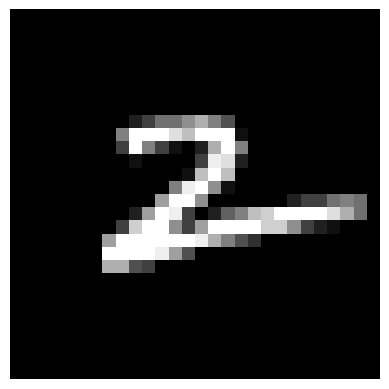

9 --- 9


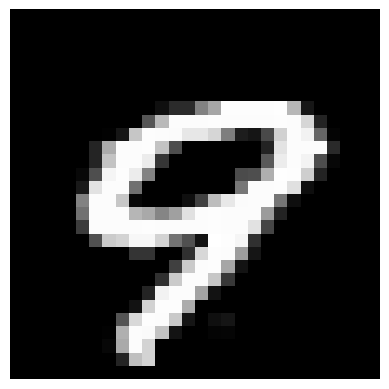

8 --- 8


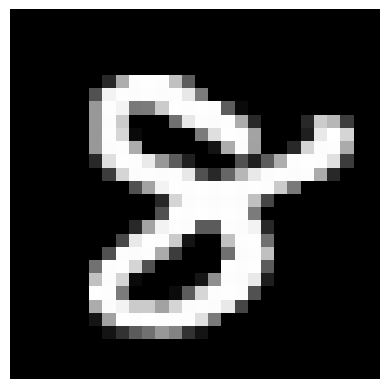

3 --- 3


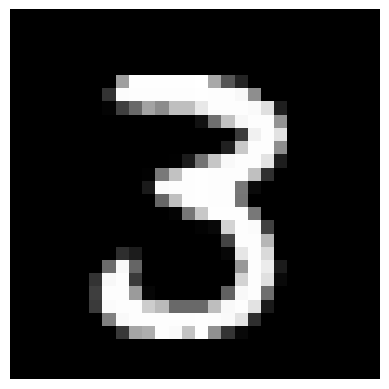

2 --- 2


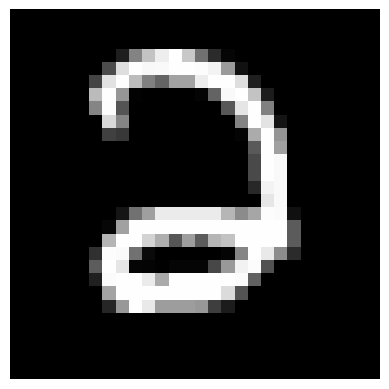

4 --- 4


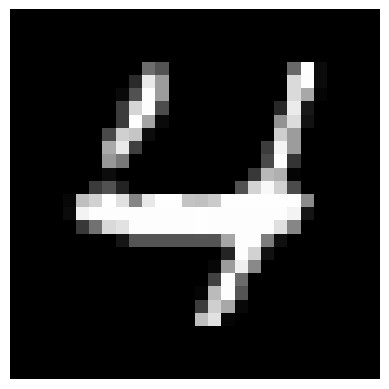

7 --- 7


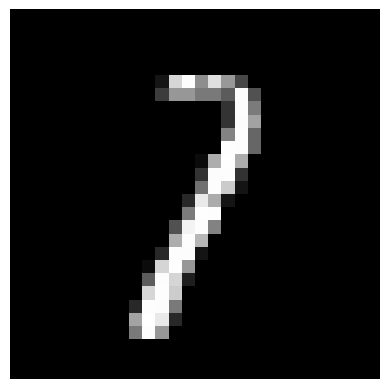

8 --- 8


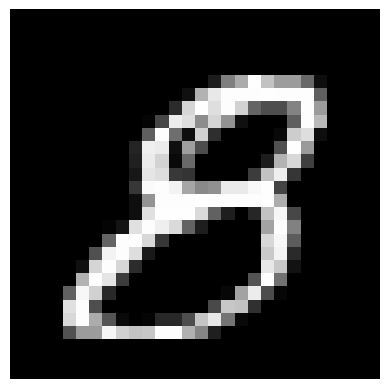

3 --- 3


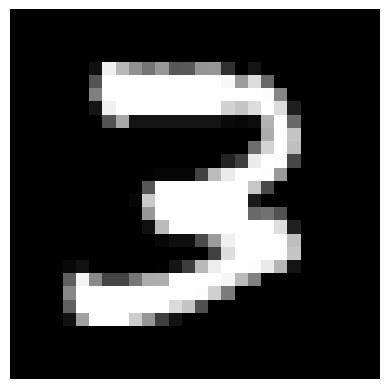

2 --- 2


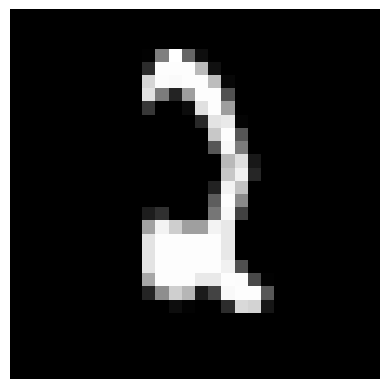

3 --- 3


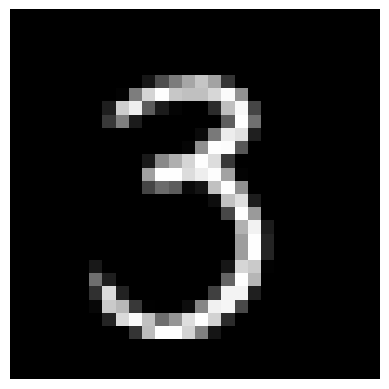

7 --- 7


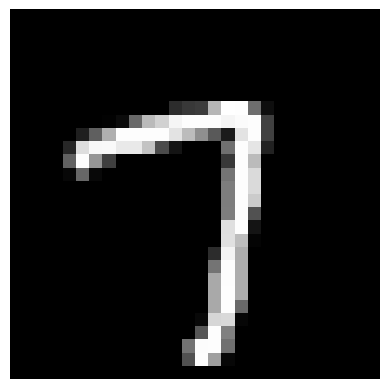

2 --- 2


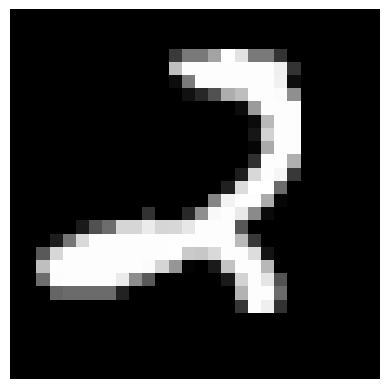

2 --- 2


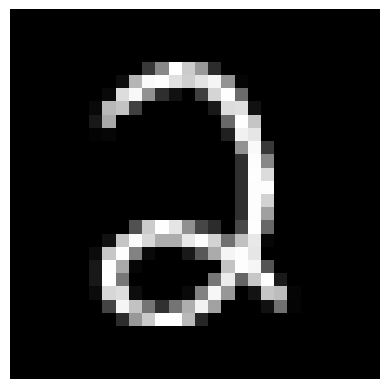

9 --- 9


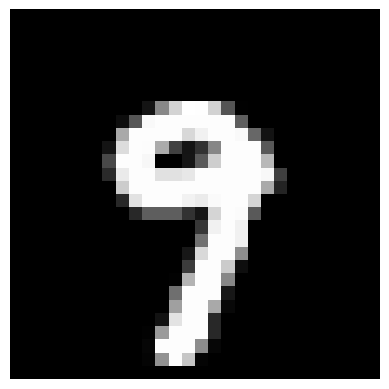

0 --- 0


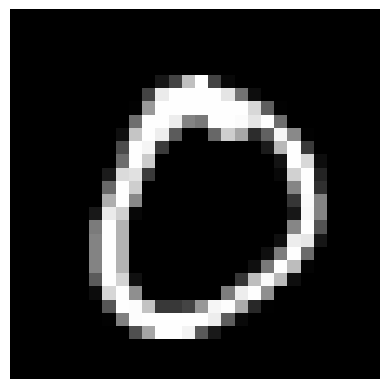

0 --- 0


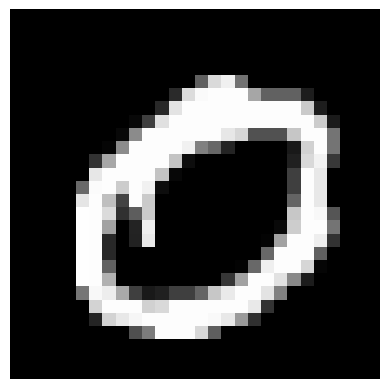

7 --- 7


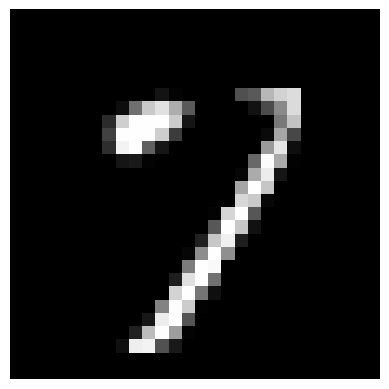

6 --- 6


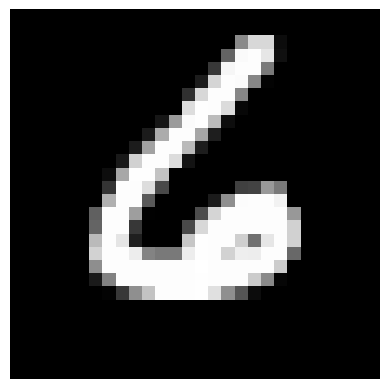

3 --- 3


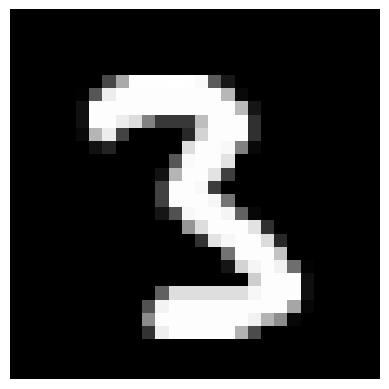

0 --- 0


5 --- 5


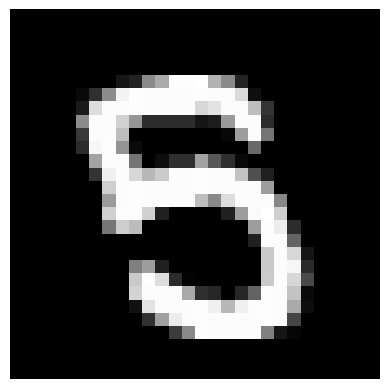

5 --- 5


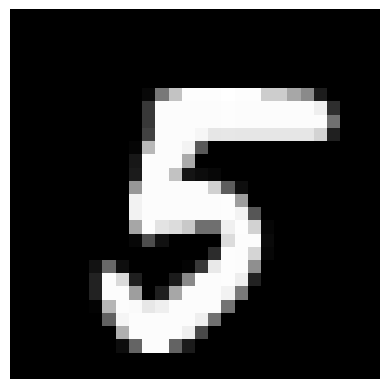

0 --- 0


0 --- 0


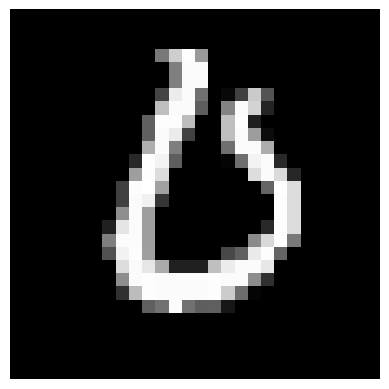

4 --- 4


2 --- 2


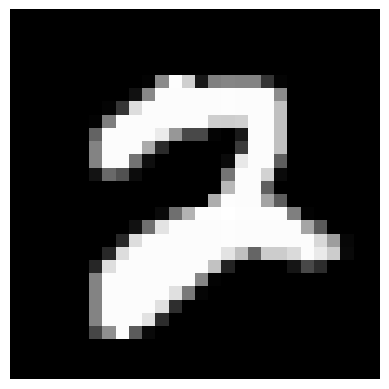

1 --- 1


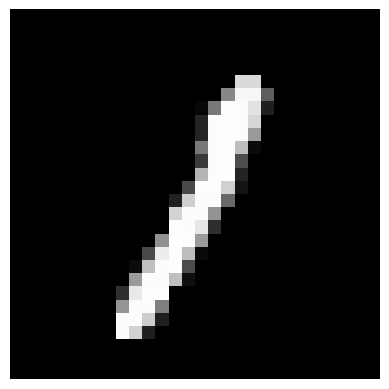

7 --- 7


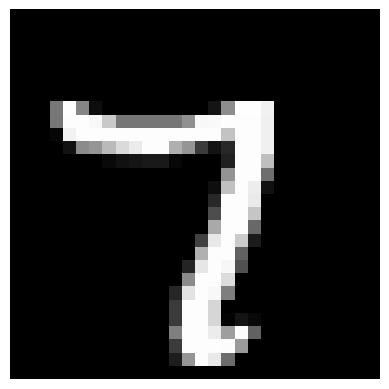

1 --- 1


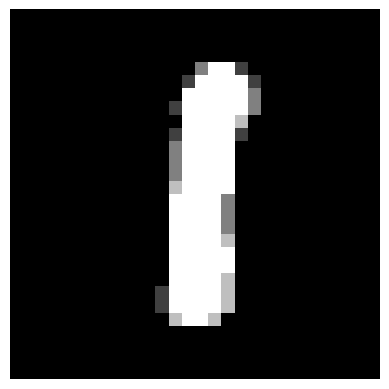

4 --- 4


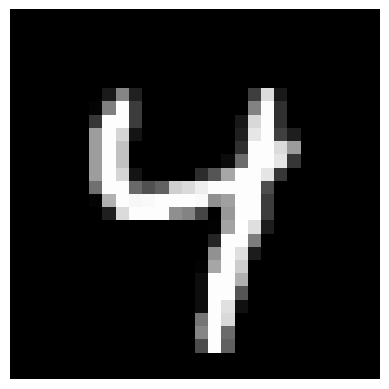

7 --- 7


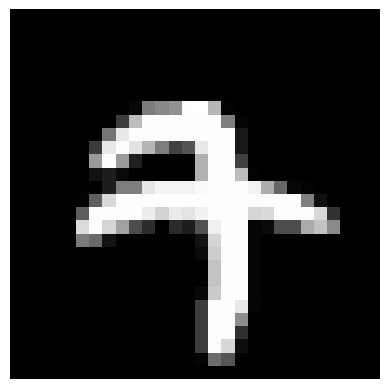

5 --- 5


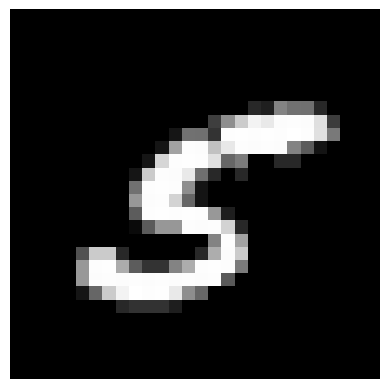

6 --- 6


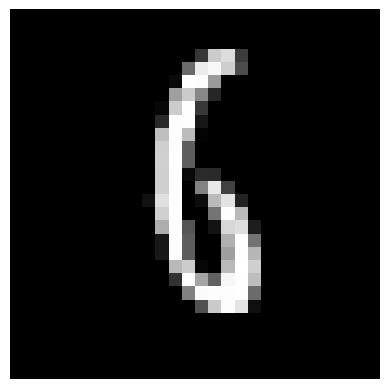

4 --- 4


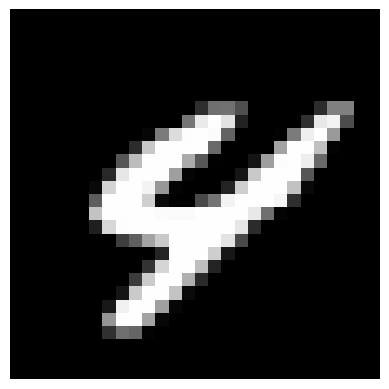

9 --- 9


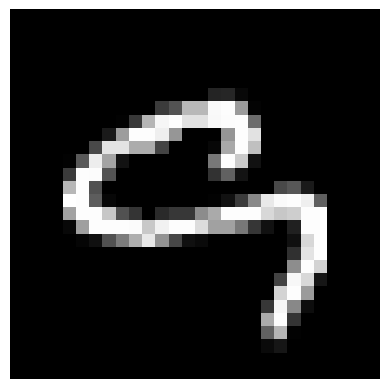

3 --- 3


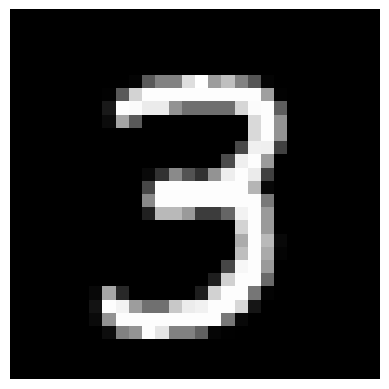

4 --- 4


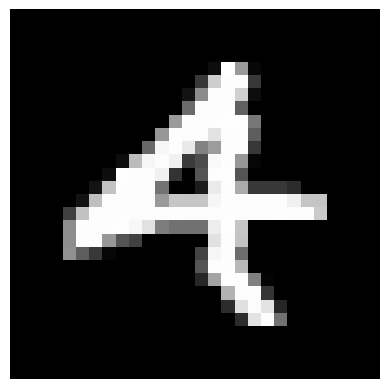

4 --- 4


5 --- 5


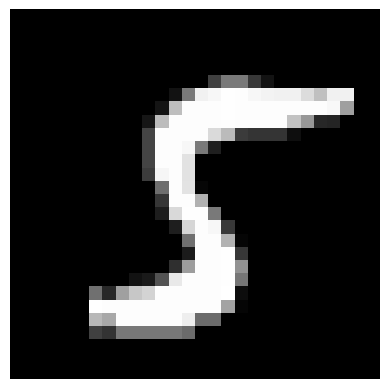

1 --- 1


2 --- 2


3 --- 3


5 --- 5


7 --- 7


0 --- 0


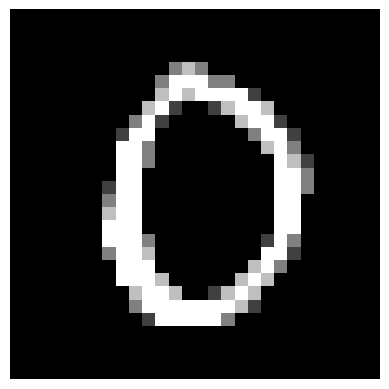

6 --- 6


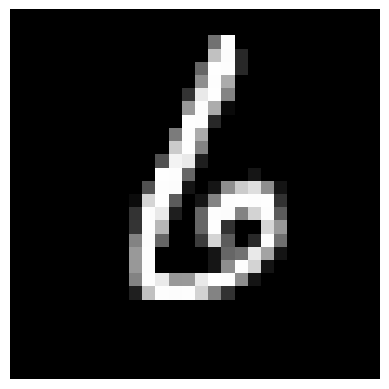

7 --- 7


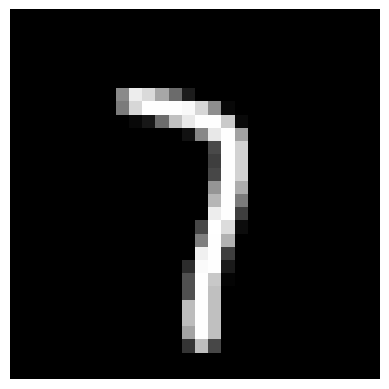

9 --- 9


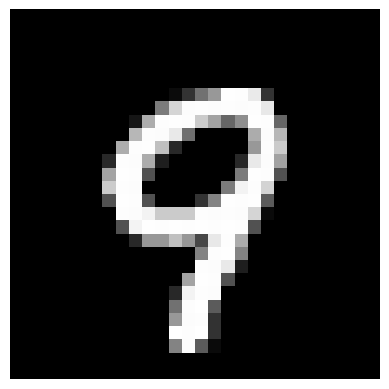

2 --- 2


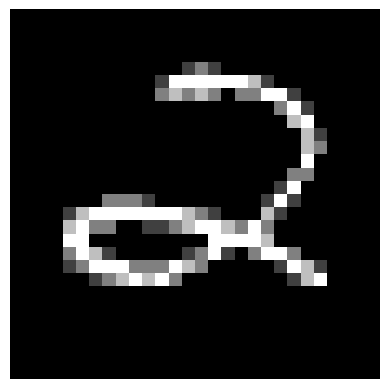

3 --- 3


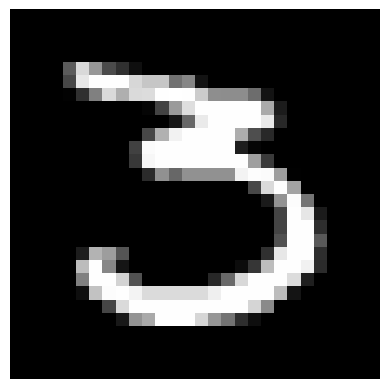

5 --- 5


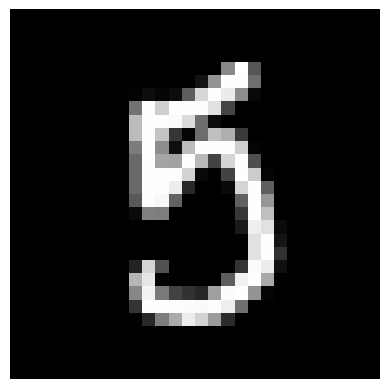

9 --- 9


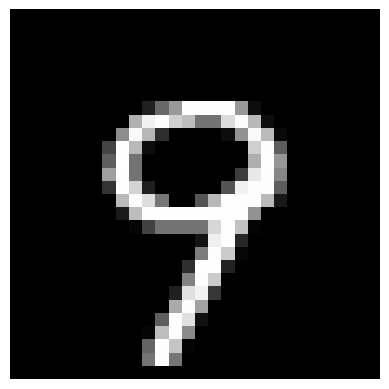

3 --- 3


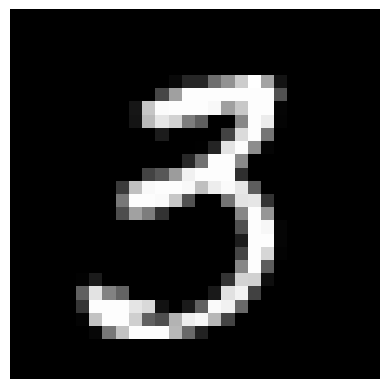

1 --- 1


9 --- 9


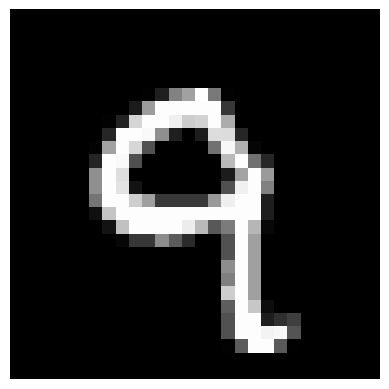

4 --- 4


8 --- 8


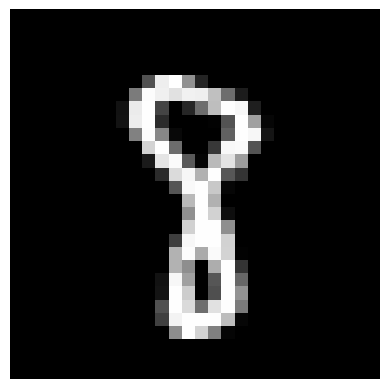

5 --- 5


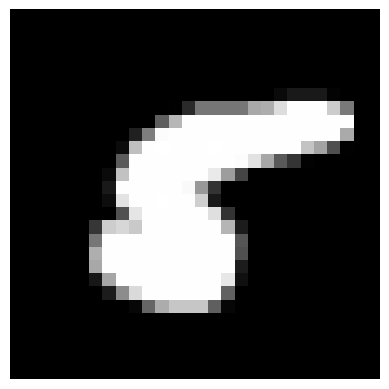

5 --- 5


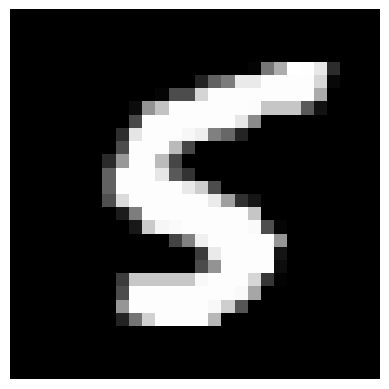

2 --- 2


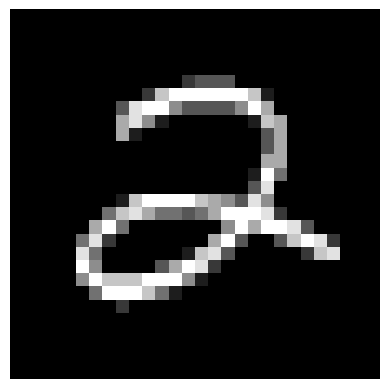

0 --- 0


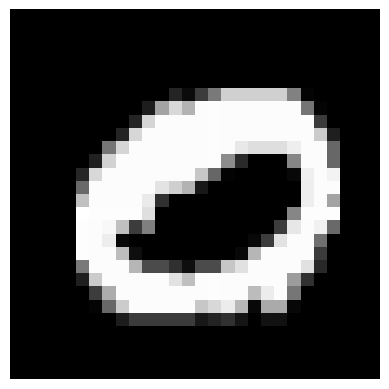

8 --- 8


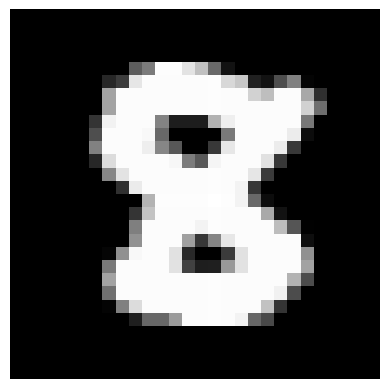

8 --- 8


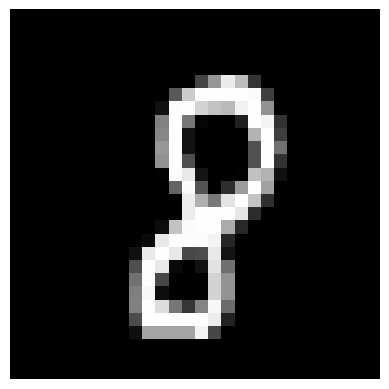

1 --- 1


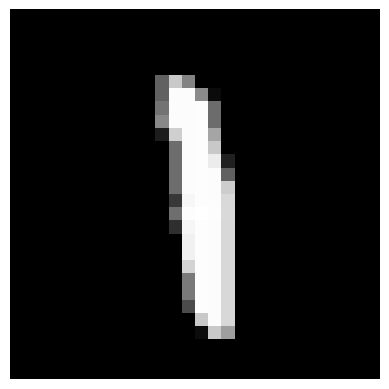

1 --- 1


4 --- 4


9 --- 9


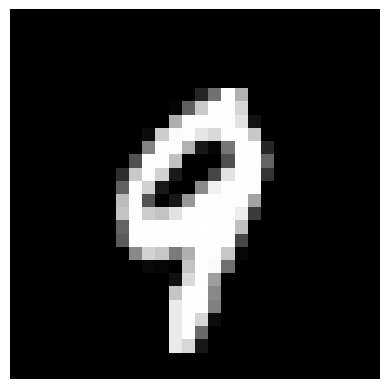

8 --- 8


1 --- 1


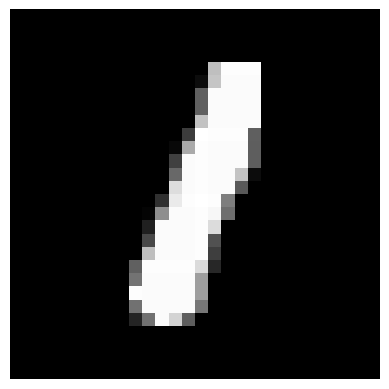

6 --- 6


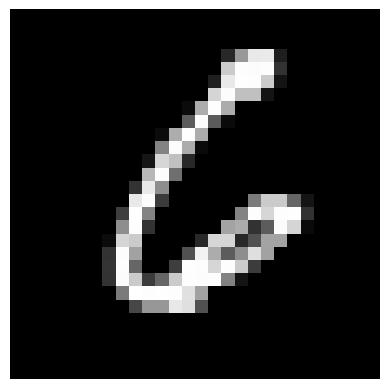

1 --- 1


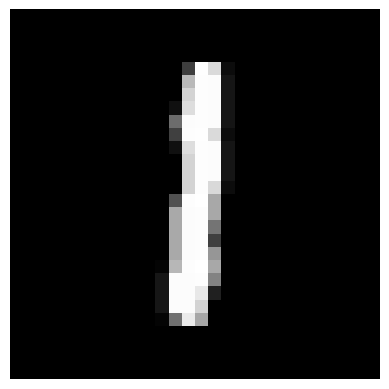

1 --- 1


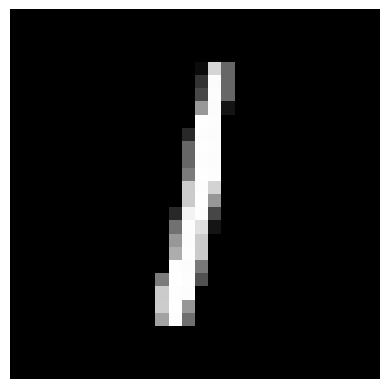

1 --- 1


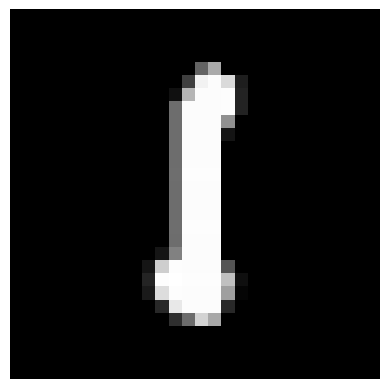

6 --- 6


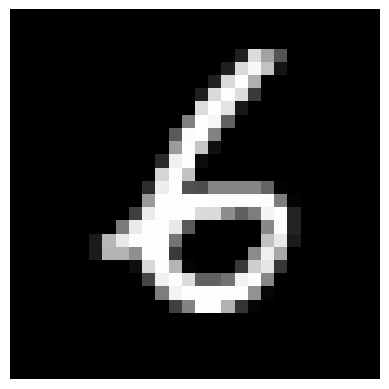

0 --- 0


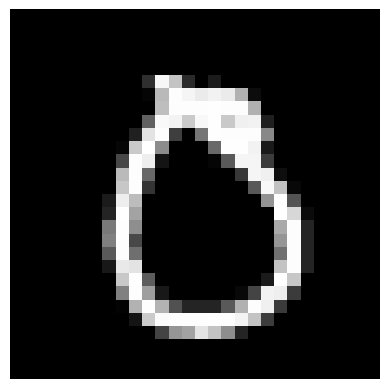

4 --- 4


1 --- 1


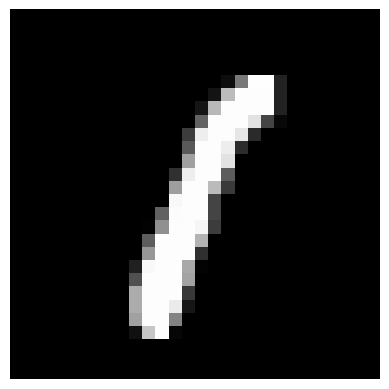

6 --- 6


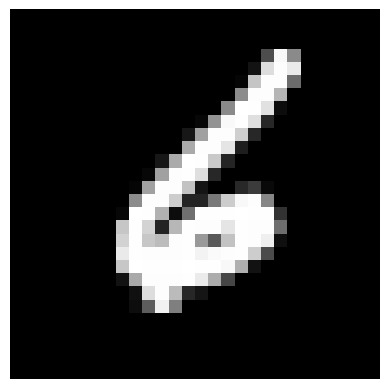

3 --- 3


4 --- 4


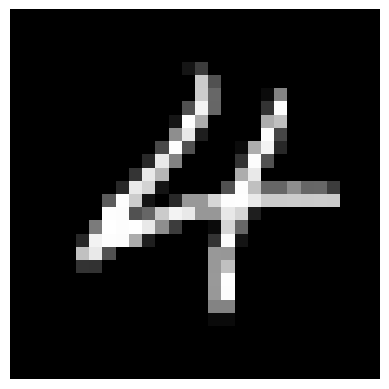

8 --- 8


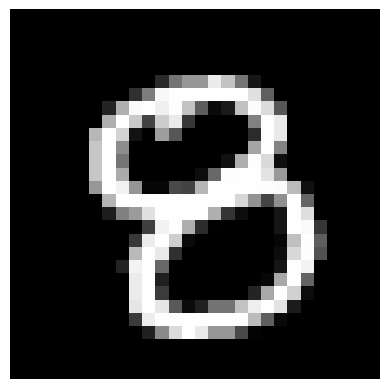

9 --- 9


9 --- 9


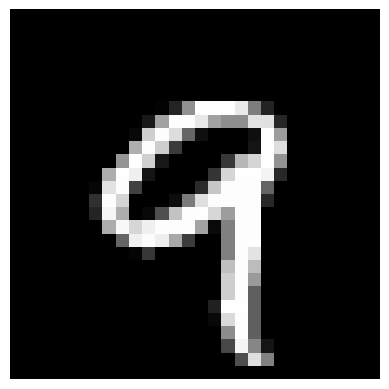

1 --- 1


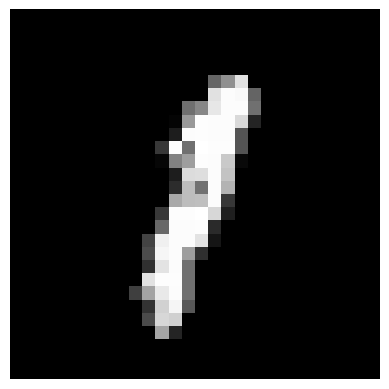

1 --- 1


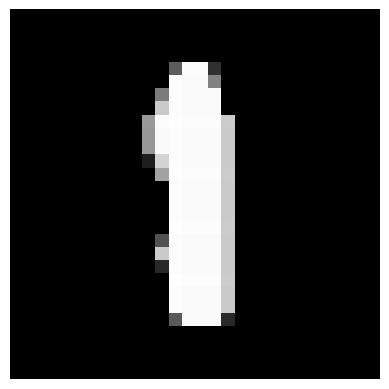

9 --- 9


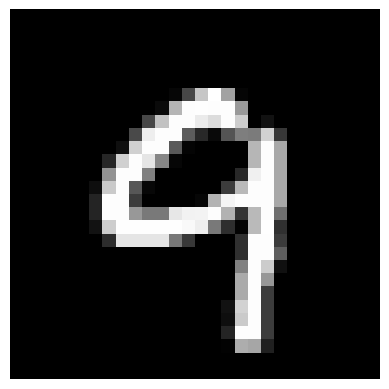

8 --- 8


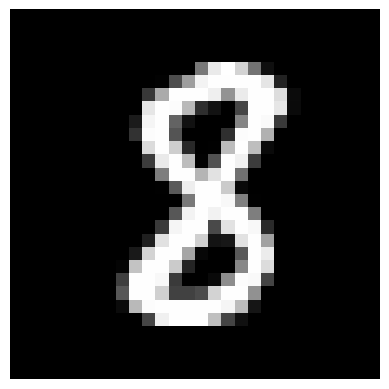

8 --- 8


7 --- 7


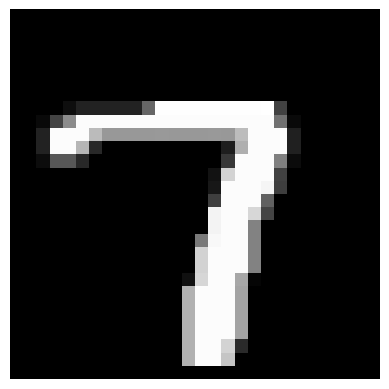

2 --- 2


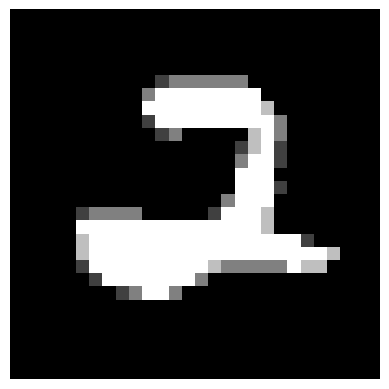

7 --- 7


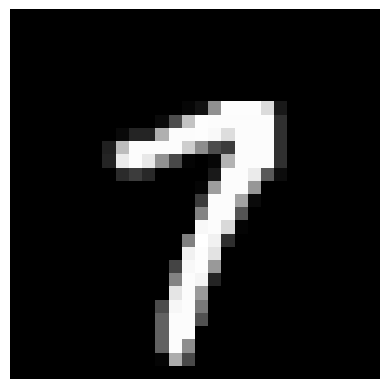

5 --- 5


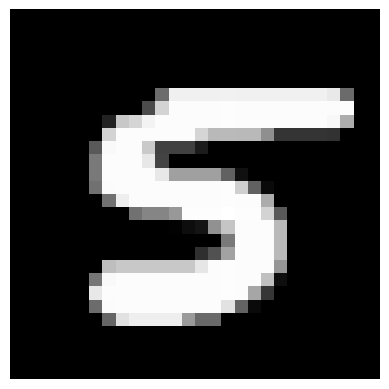

9 --- 9


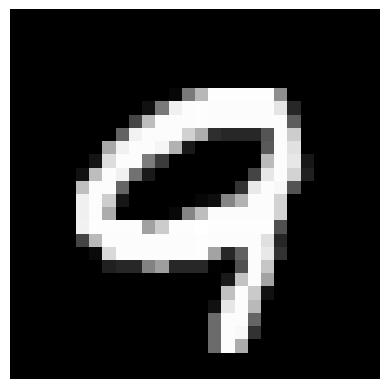

9 --- 9


2 --- 2


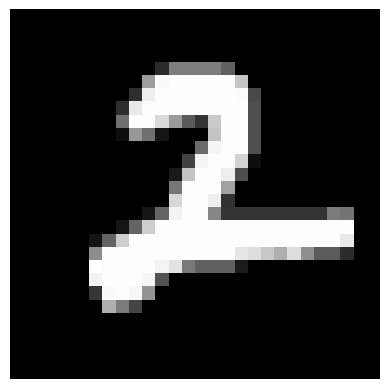

7 --- 7


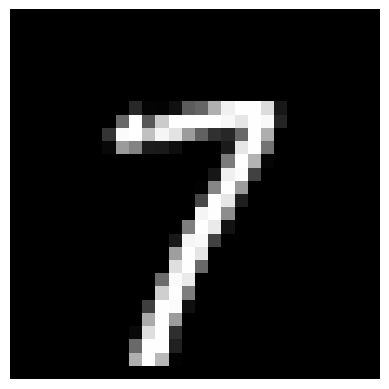

6 --- 6


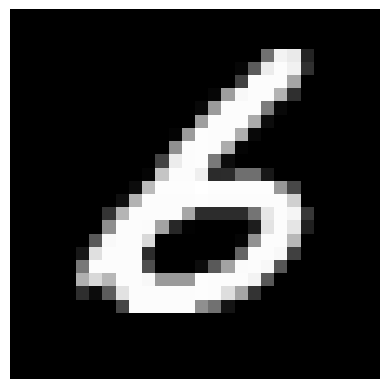

4 --- 4


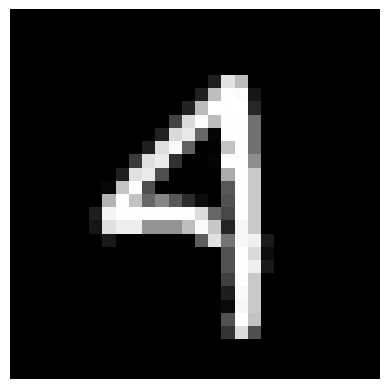

9 --- 9


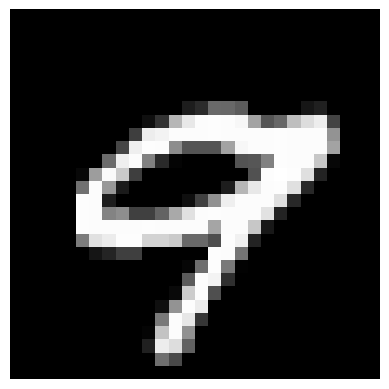

0 --- 0


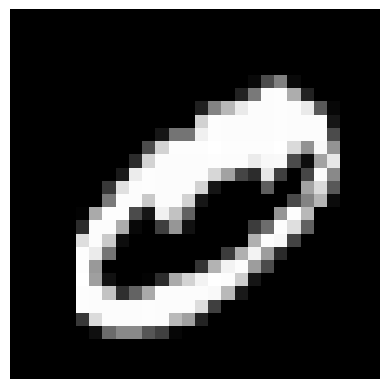

9 --- 9


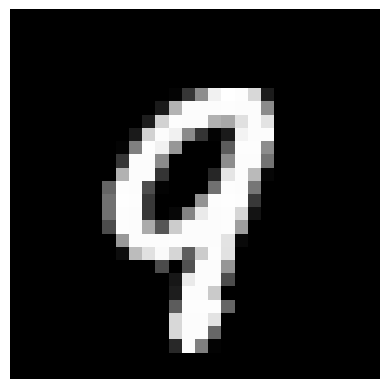

2 --- 2


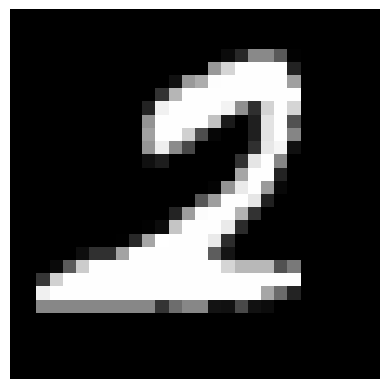

6 --- 6


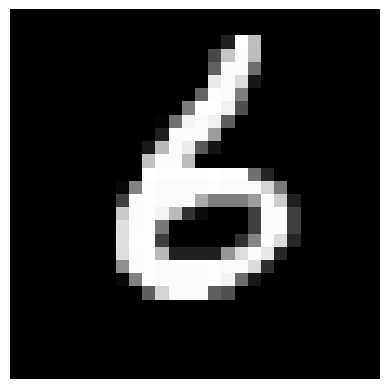

9 --- 9


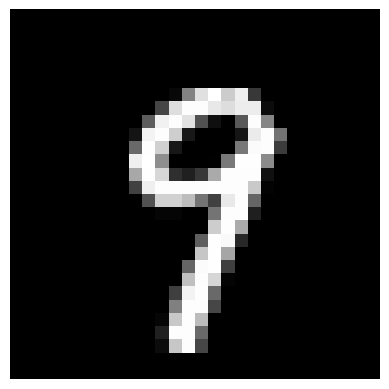

7 --- 7


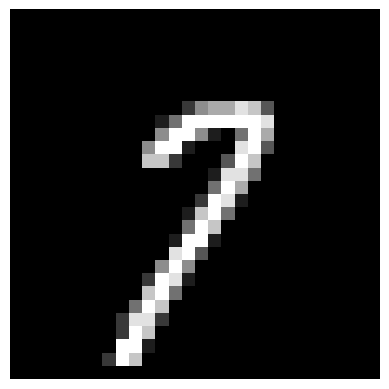

1 --- 1


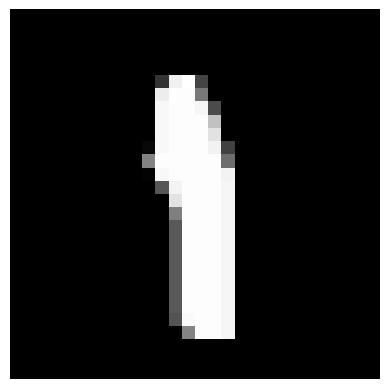

9 --- 9


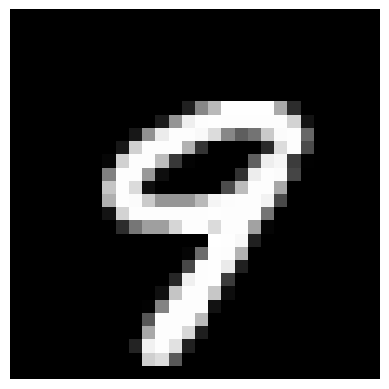

5 --- 5


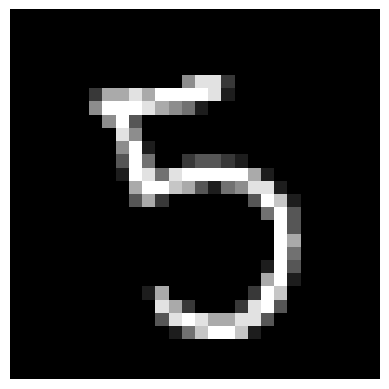

7 --- 7


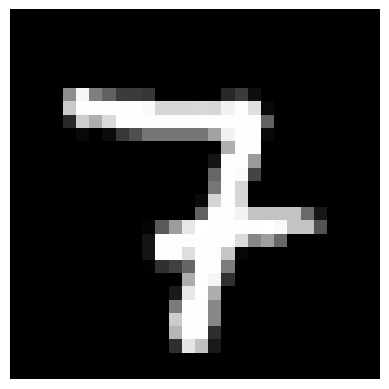

8 --- 8


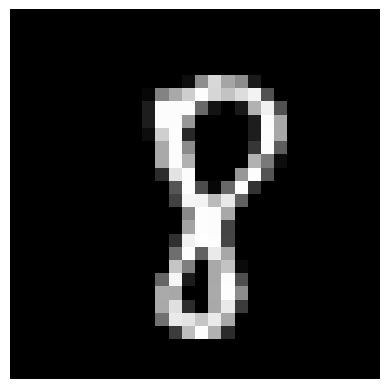

8 --- 8


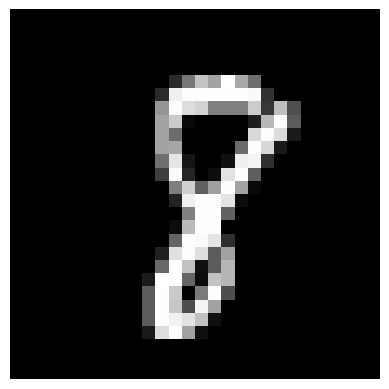

5 --- 5


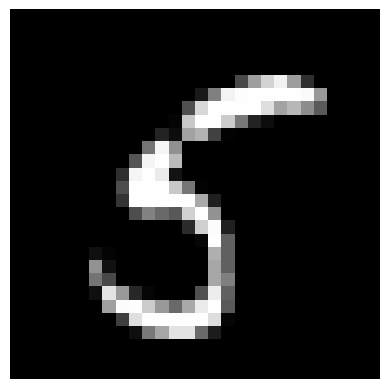

3 --- 3


9 --- 9


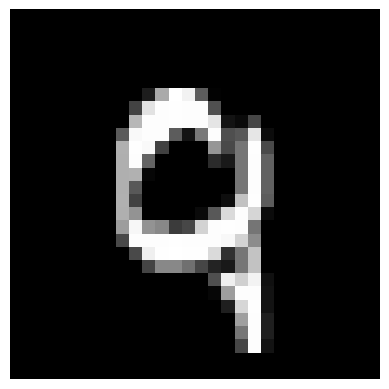

1 --- 1


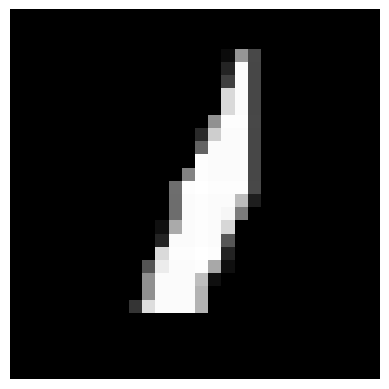

8 --- 8


6 --- 6


0 --- 0


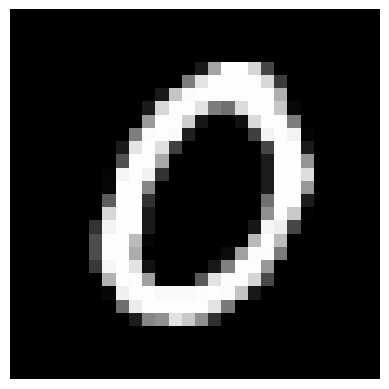

3 --- 3


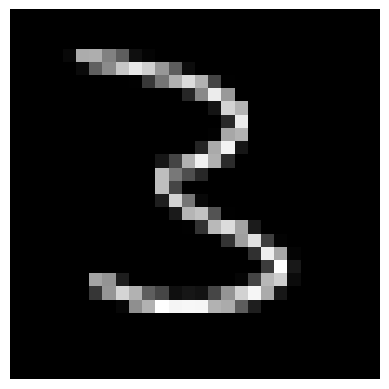

5 --- 5


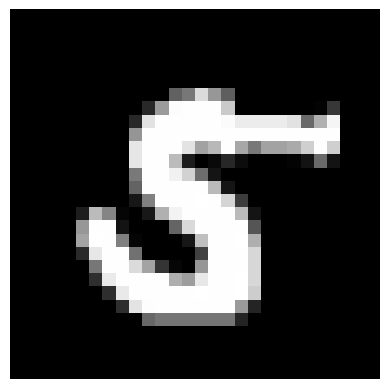

2 --- 2


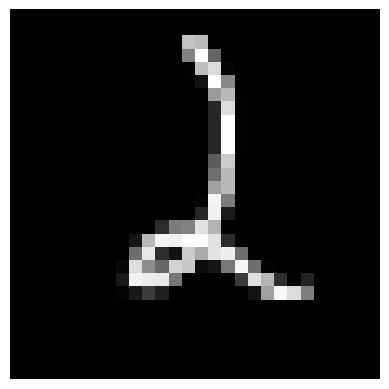

5 --- 5


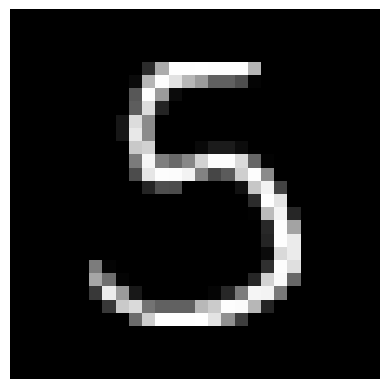

9 --- 9


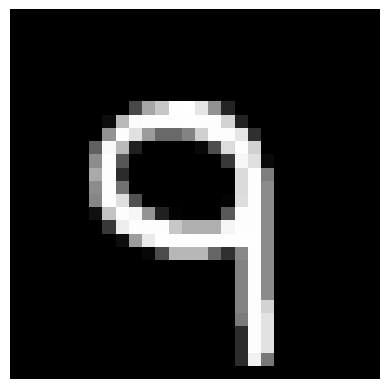

6 --- 6


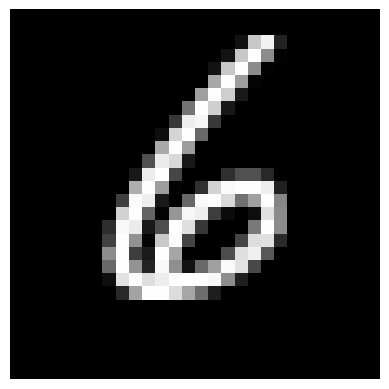

4 --- 4


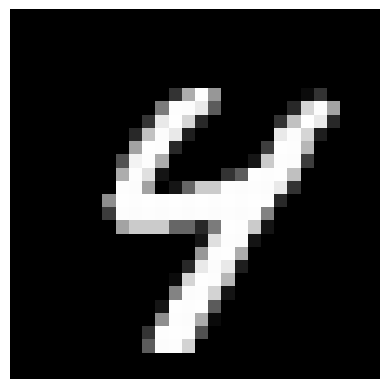

1 --- 1


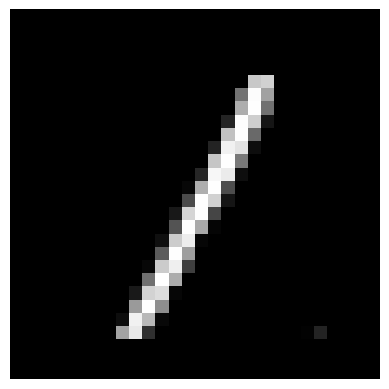

7 --- 7


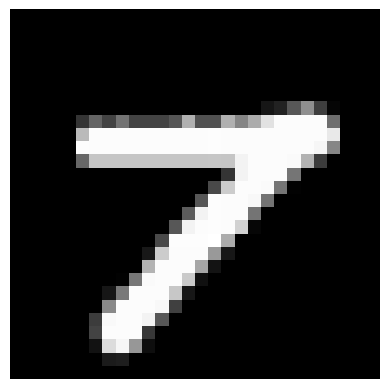

5 --- 5


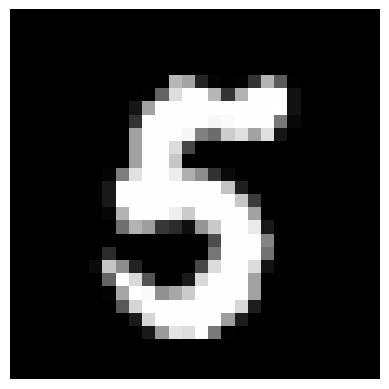

8 --- 8


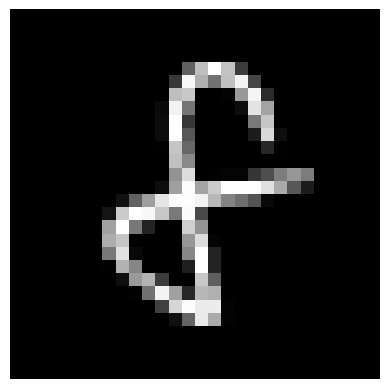

2 --- 2


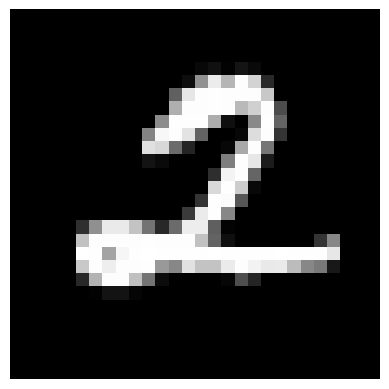

8 --- 8


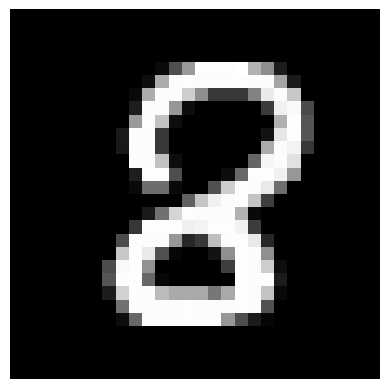

6 --- 6


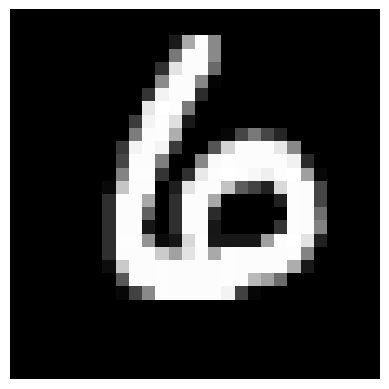

6 --- 6


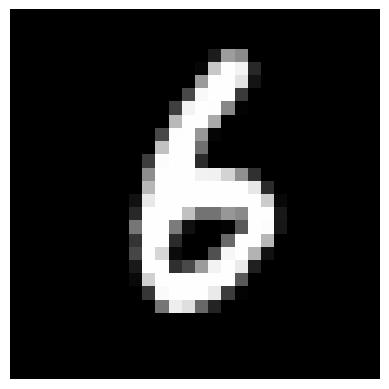

1 --- 1


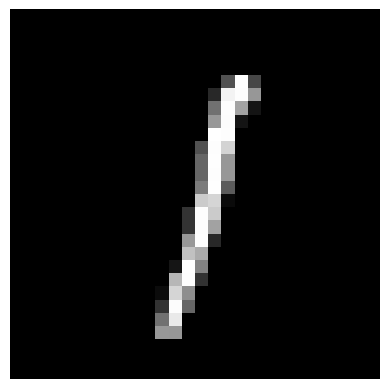

5 --- 5


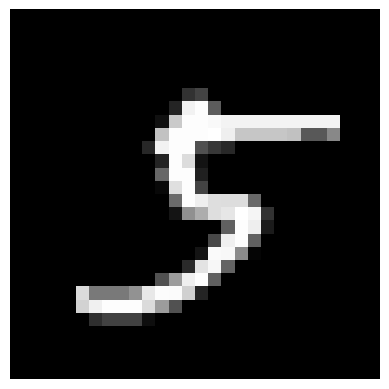

5 --- 5


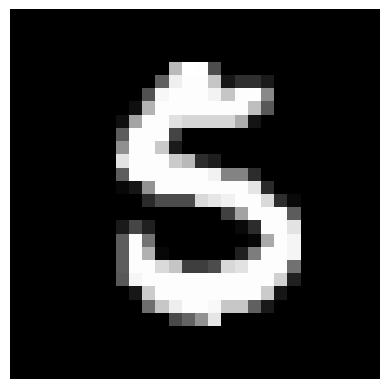

0 --- 0


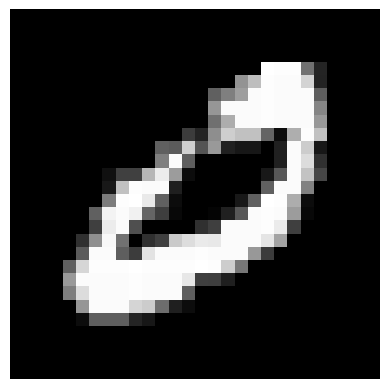

3 --- 3


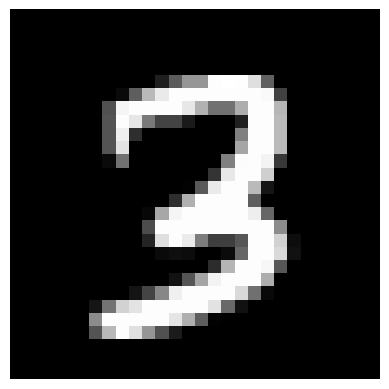

8 --- 8


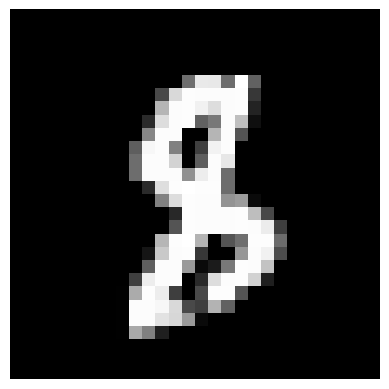

7 --- 7


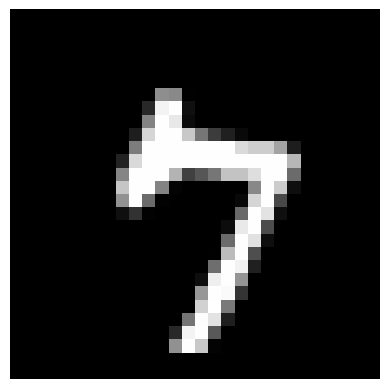

6 --- 6


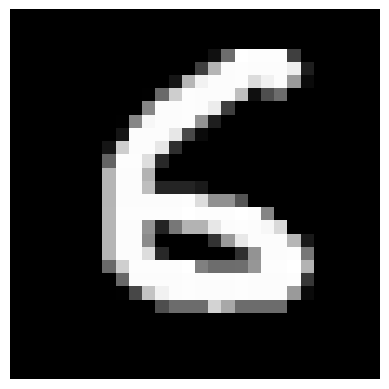

2 --- 2


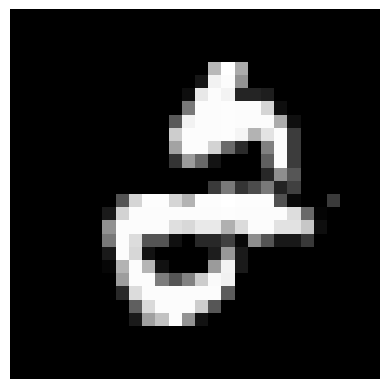

0 --- 0


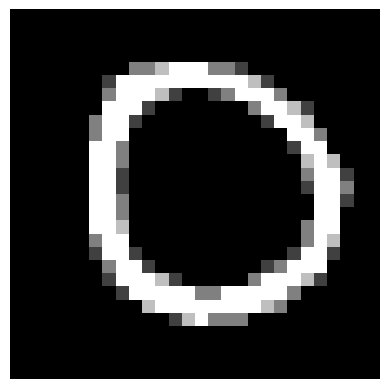

4 --- 4


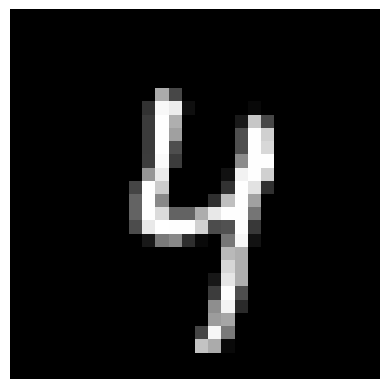

4 --- 4


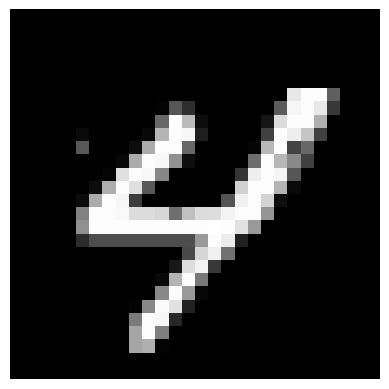

6 --- 6


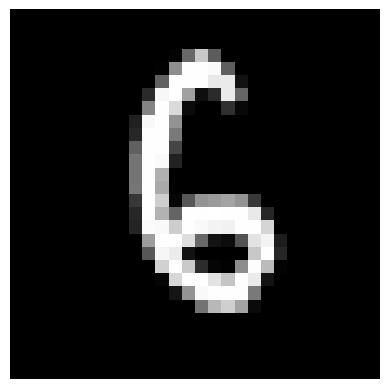

2 --- 2


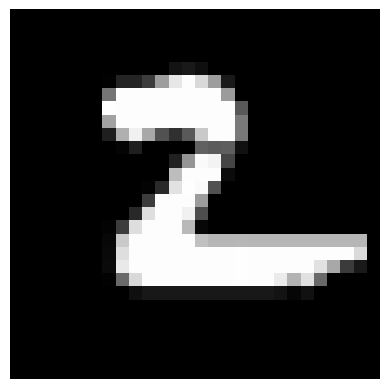

3 --- 3


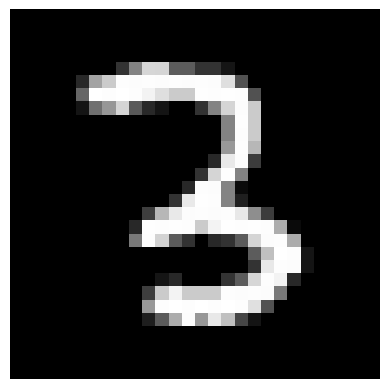

1 --- 1


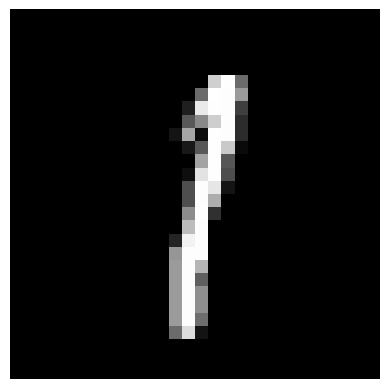

9 --- 9


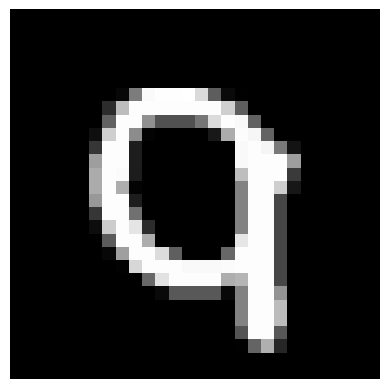

3 --- 3


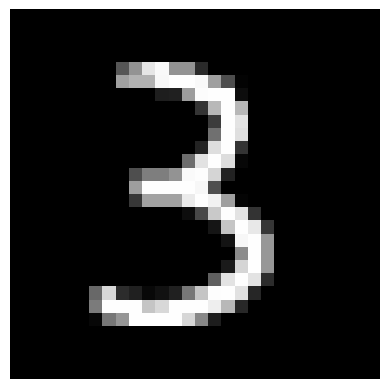

4 --- 4


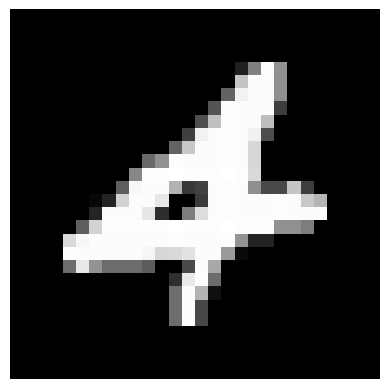

0 --- 0


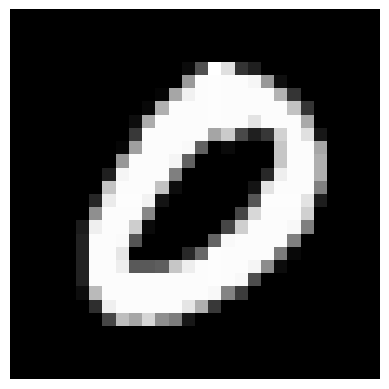

6 --- 6


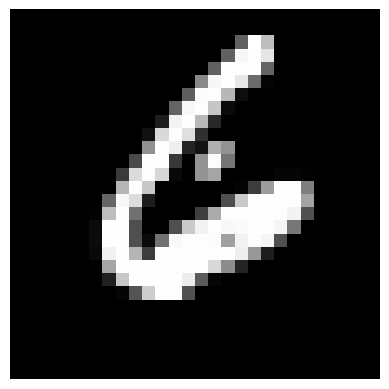

2 --- 2


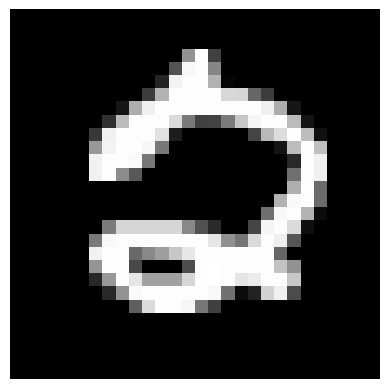

3 --- 3


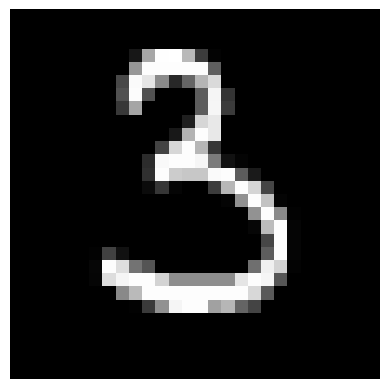

2 --- 2


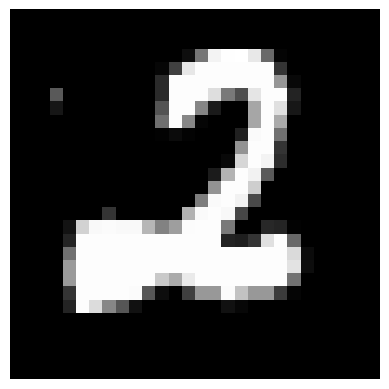

6 --- 6


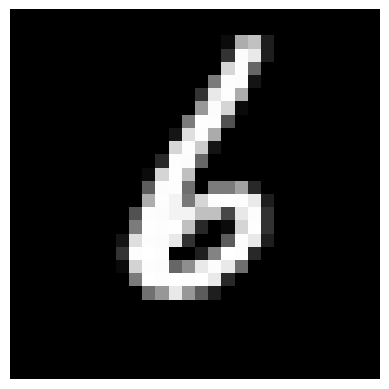

8 --- 8


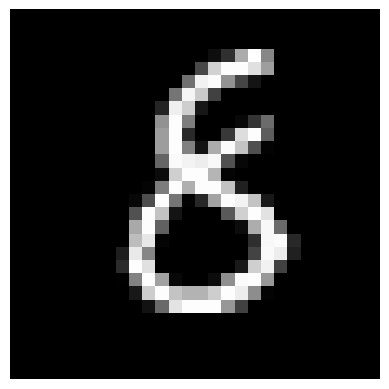

1 --- 1


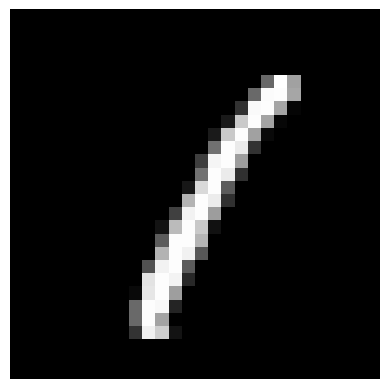

6 --- 6


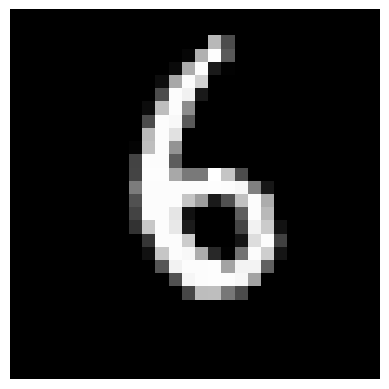

7 --- 7


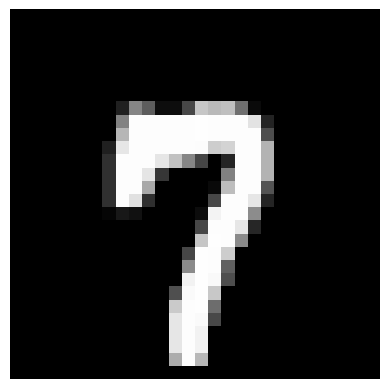

4 --- 4


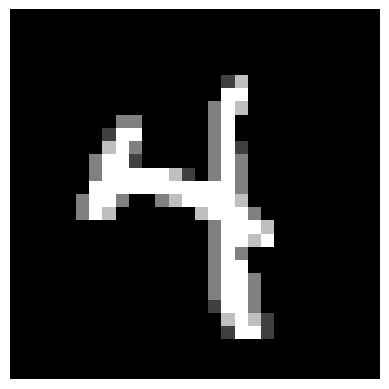

9 --- 9


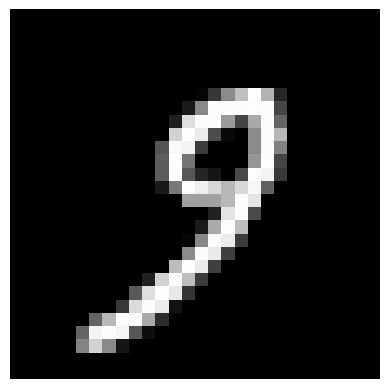

9 --- 9


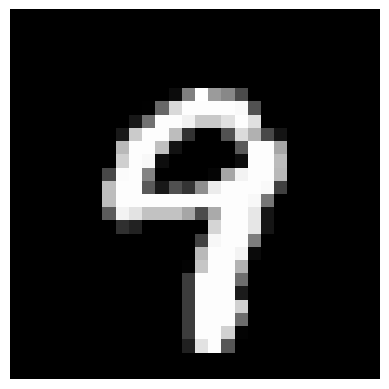

2 --- 2


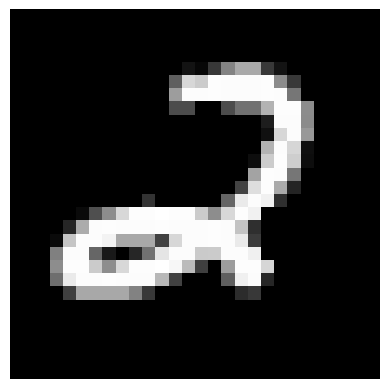

3 --- 3


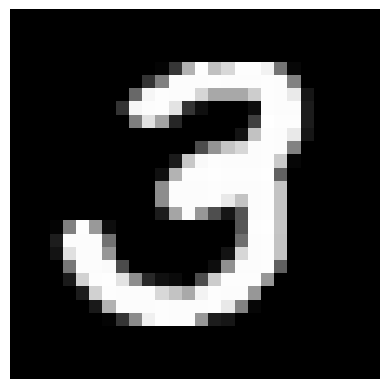

3 --- 3


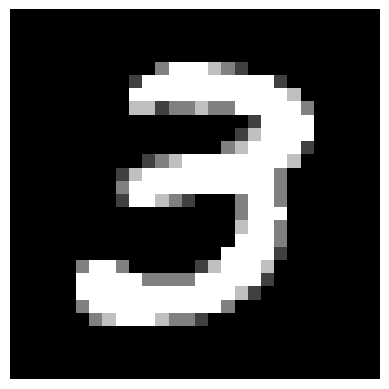

7 --- 7


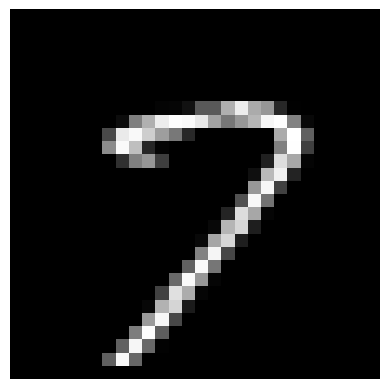

5 --- 5


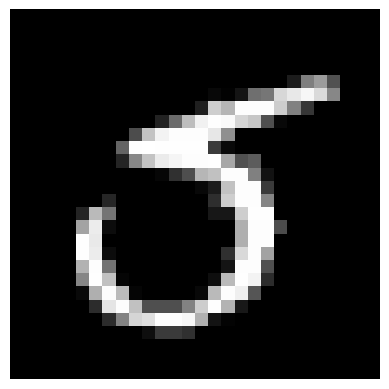

3 --- 3


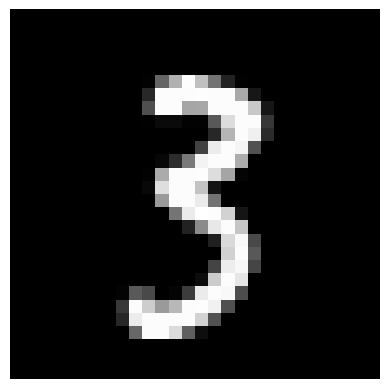

5 --- 5


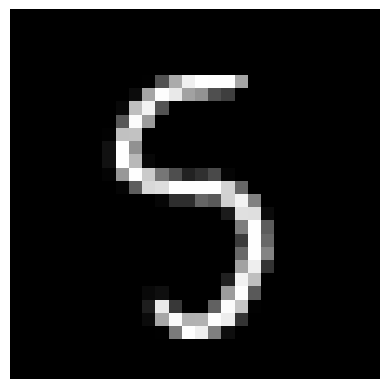

3 --- 3


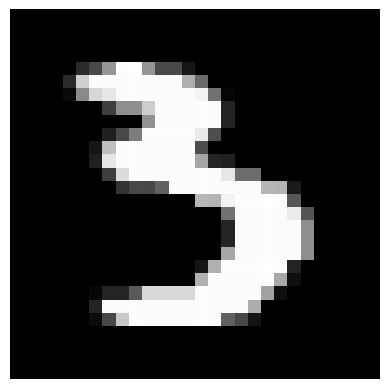

4 --- 4


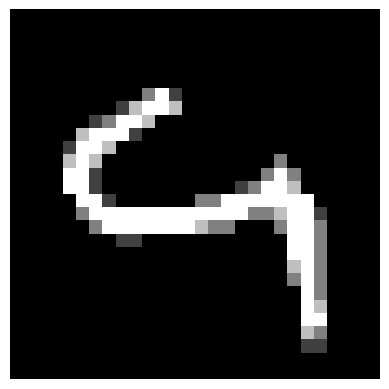

1 --- 1


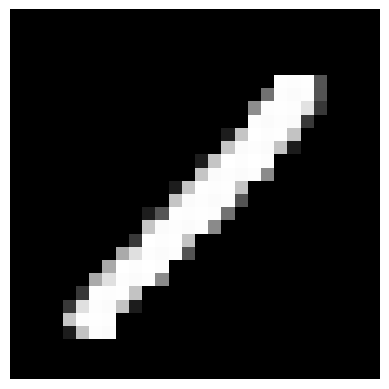

2 --- 2


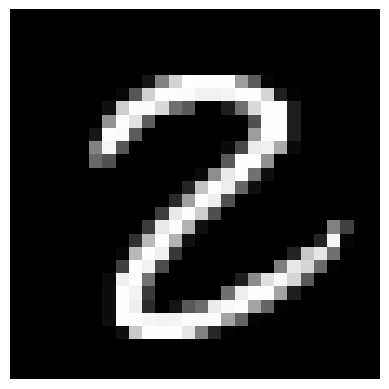

6 --- 6


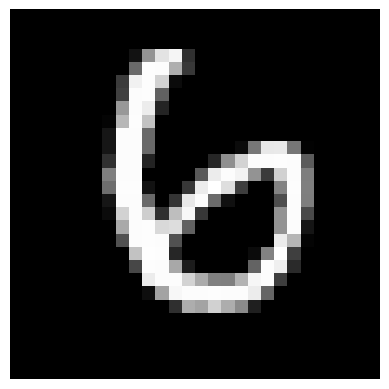

0 --- 0


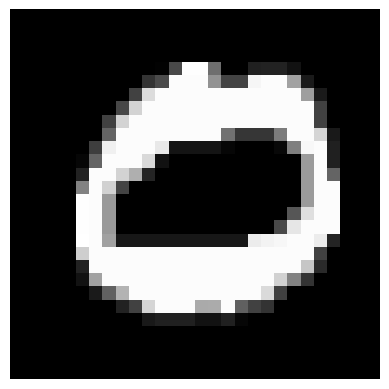

4 --- 4


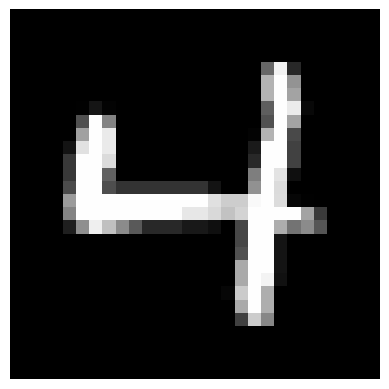

7 --- 7


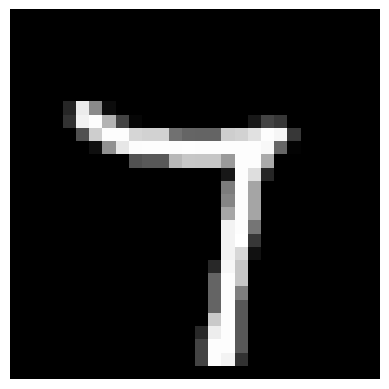

9 --- 9


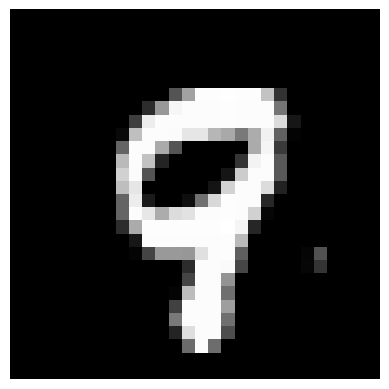

7 --- 7


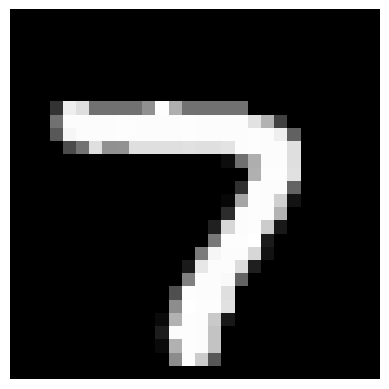

0 --- 0


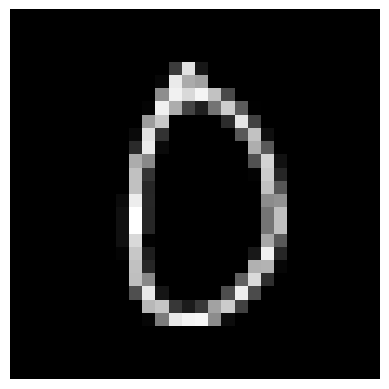

7 --- 7


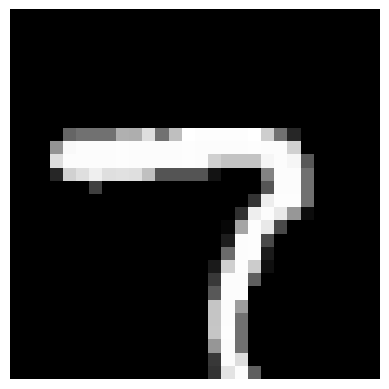

8 --- 8


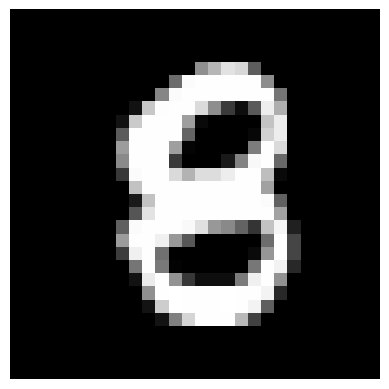

5 --- 5


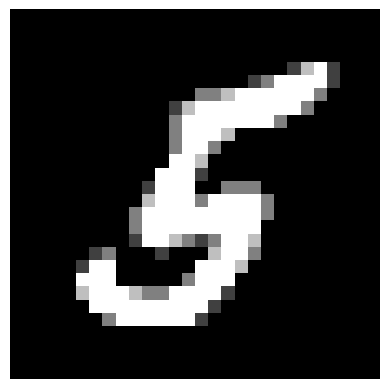

2 --- 2


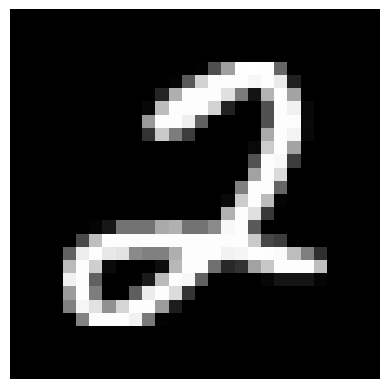

0 --- 0


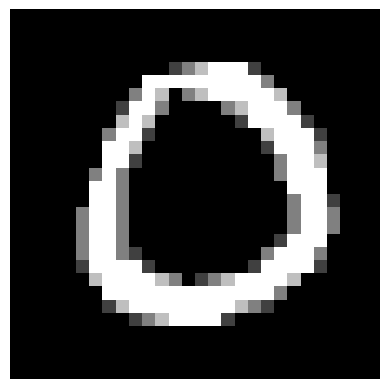

7 --- 7


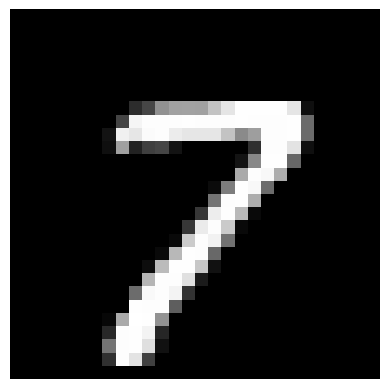

6 --- 6


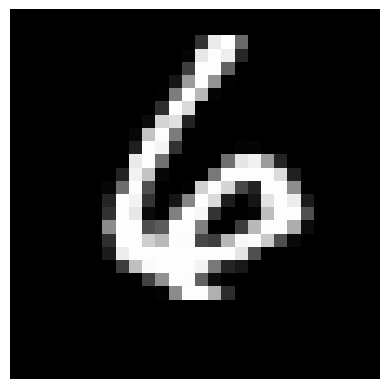

8 --- 8


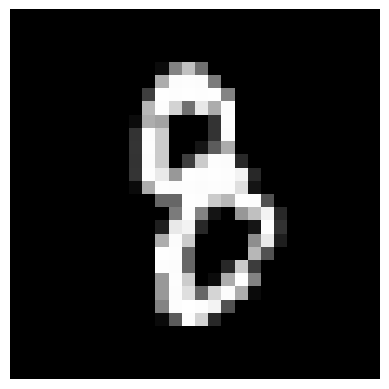

6 --- 6


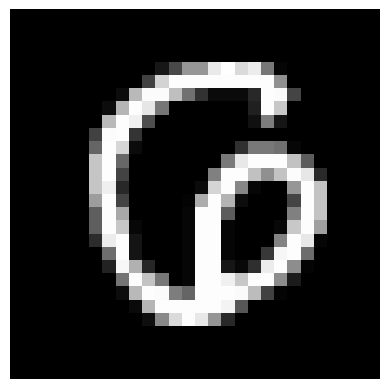

4 --- 4


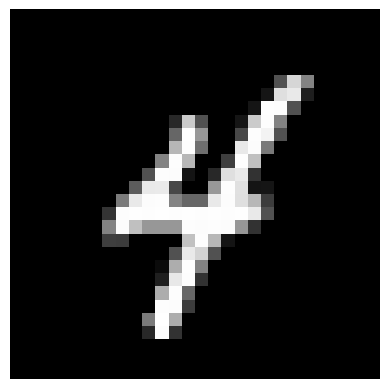

5 --- 5


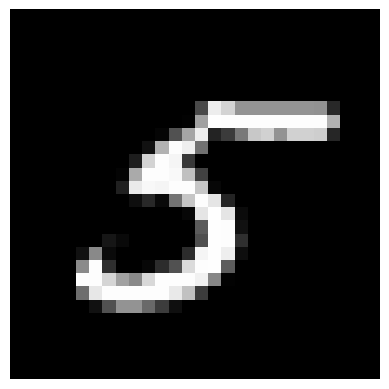

2 --- 2


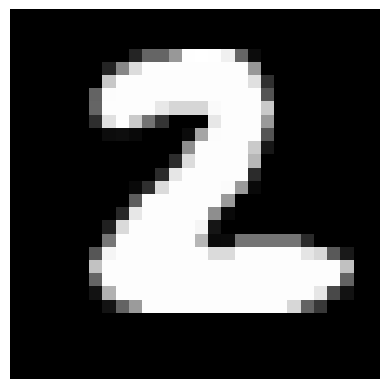

5 --- 5


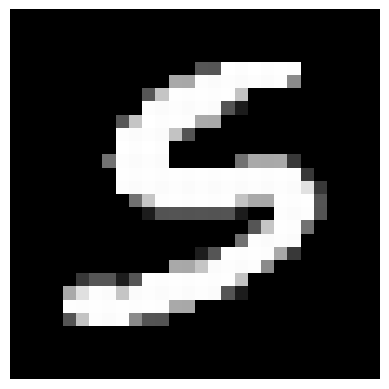

1 --- 1


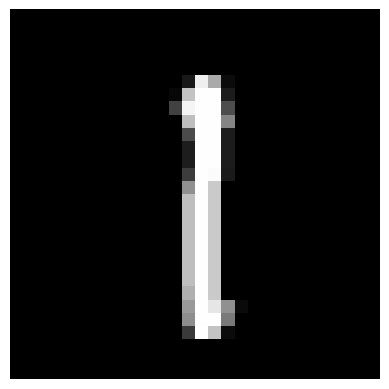

1 --- 1


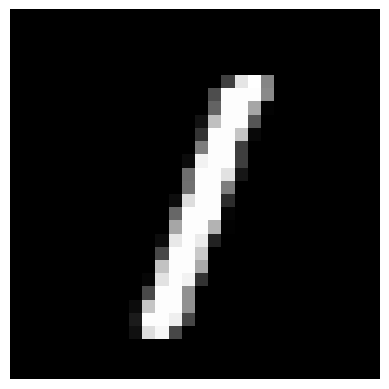

0 --- 0


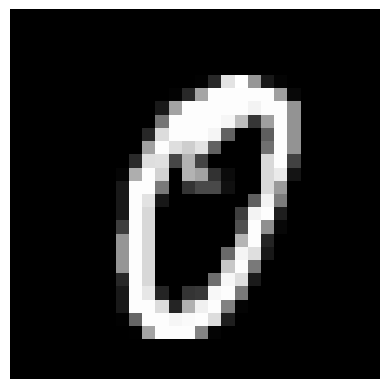

4 --- 4


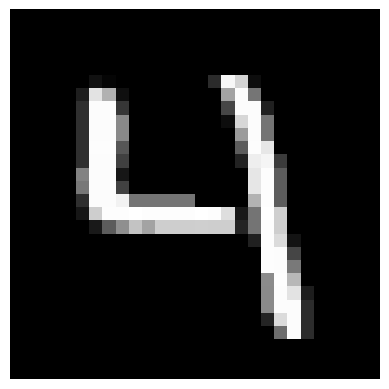

1 --- 1


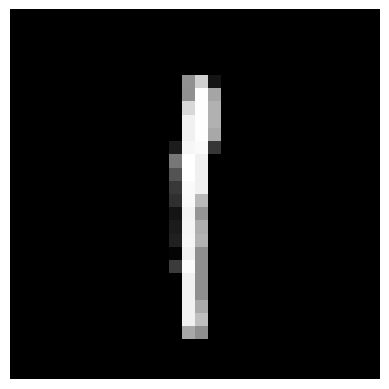

2 --- 2


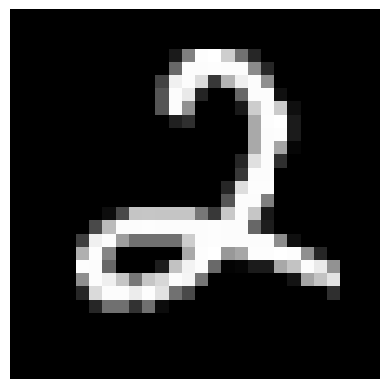

3 --- 3


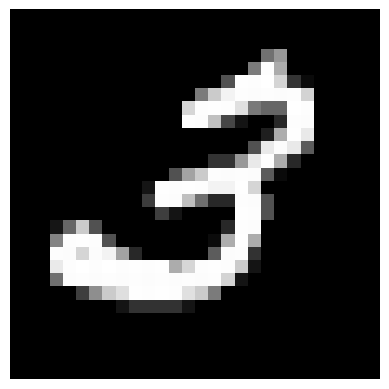

8 --- 8


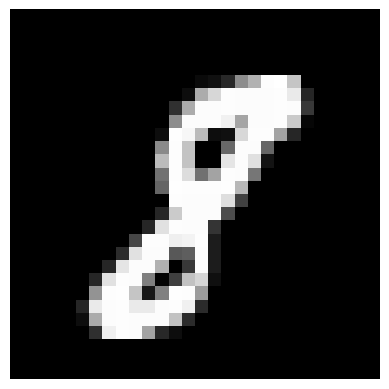

8 --- 8


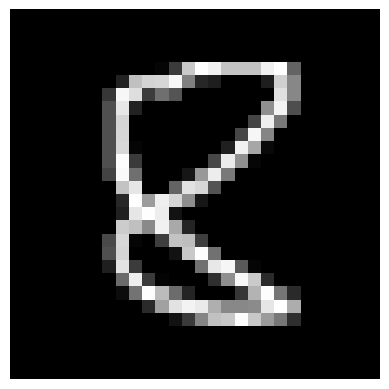

4 --- 4


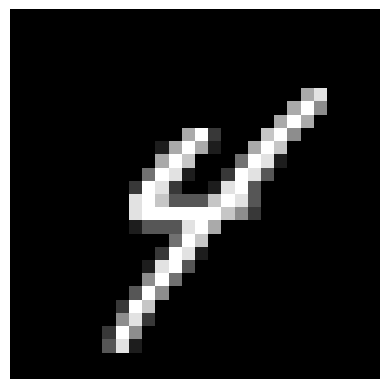

9 --- 9


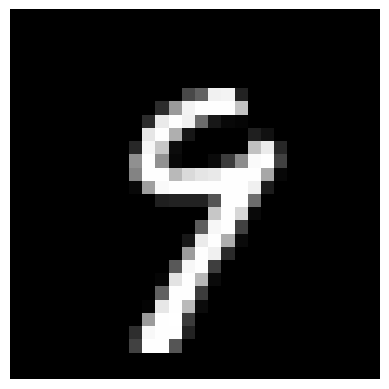

5 --- 5


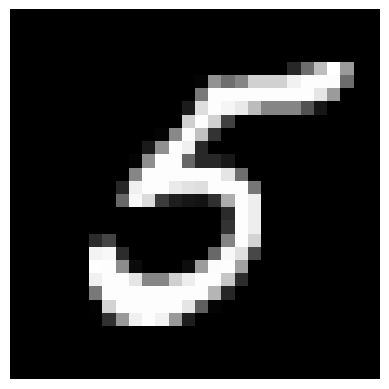

5 --- 5


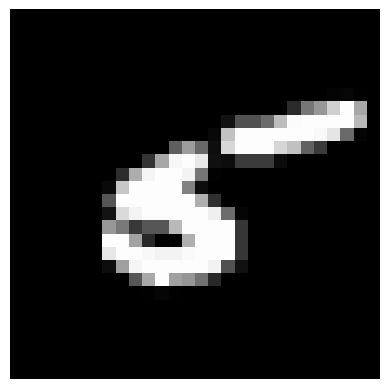

3 --- 3


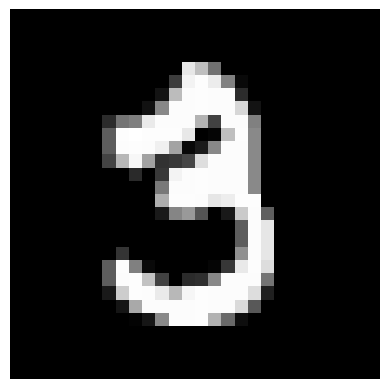

1 --- 1


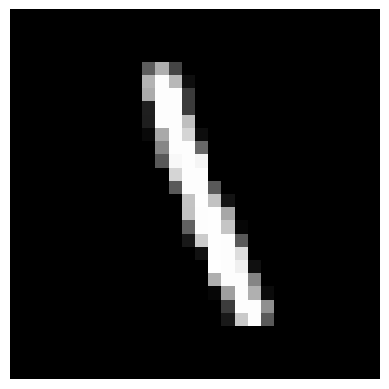

5 --- 5


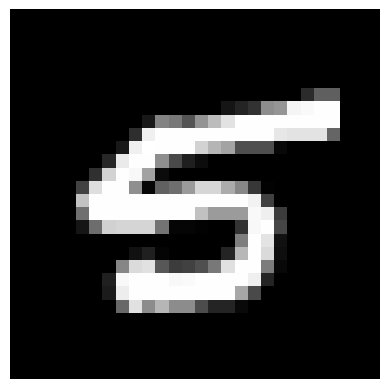

8 --- 8


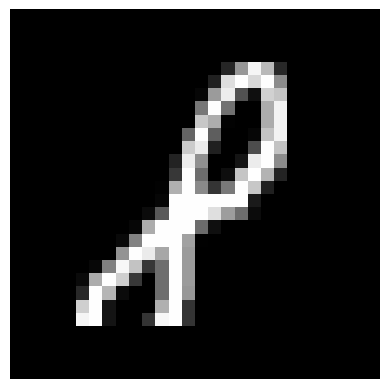

0 --- 0


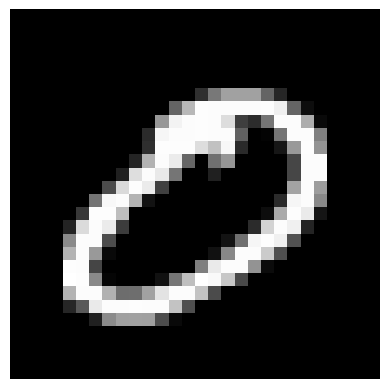

9 --- 9


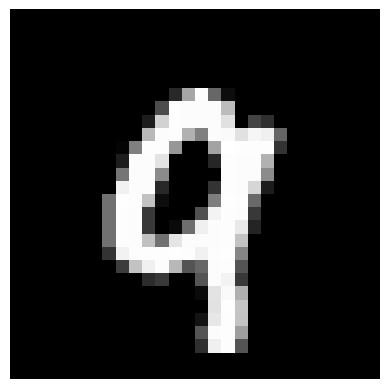

3 --- 3


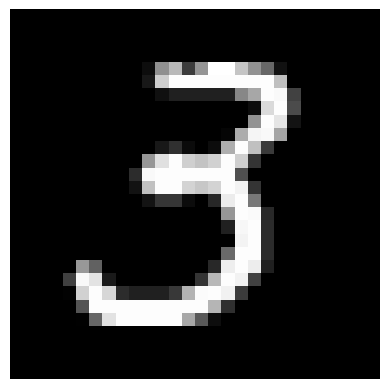

2 --- 2


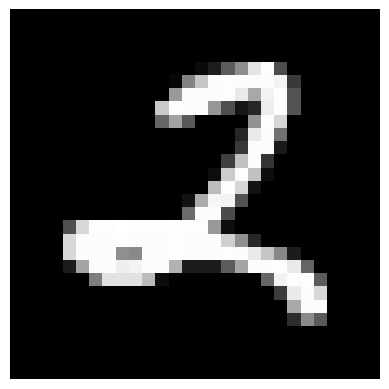

7 --- 7


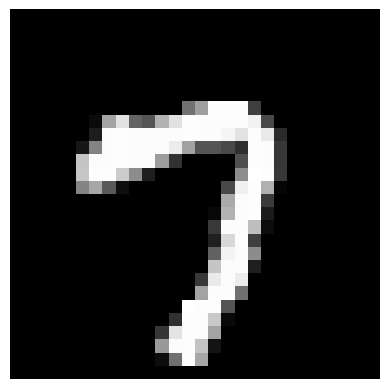

4 --- 4


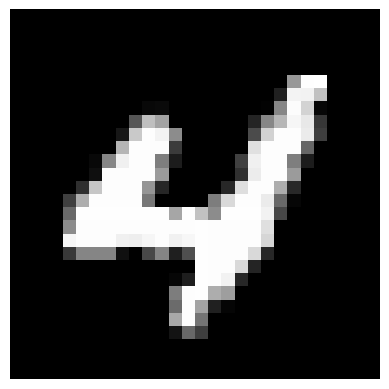

1 --- 1


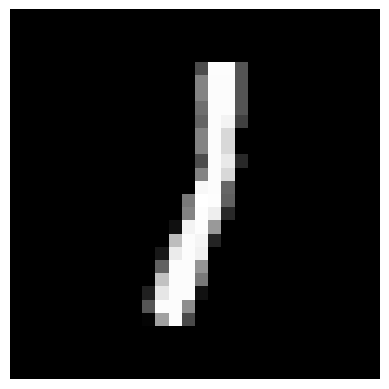

1 --- 1


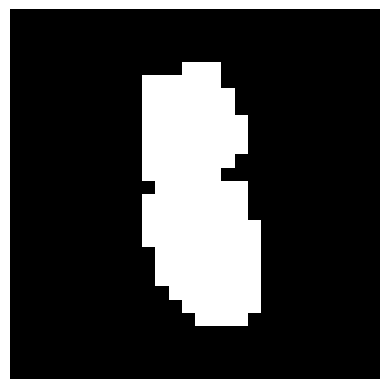

6 --- 6


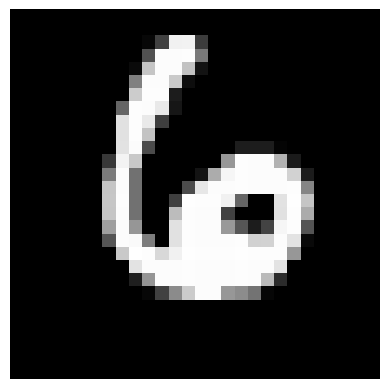

3 --- 3


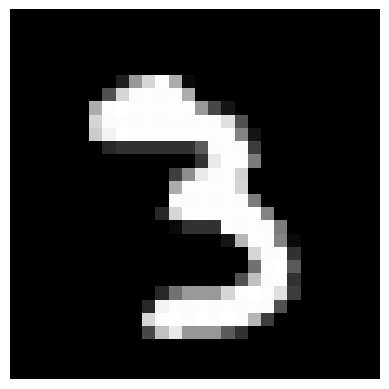

5 --- 5


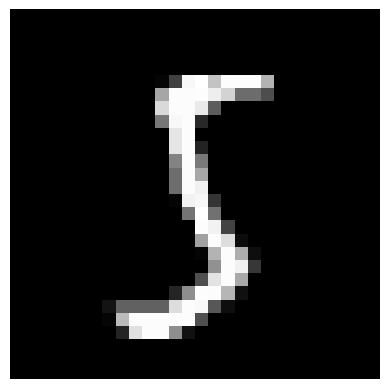

6 --- 6


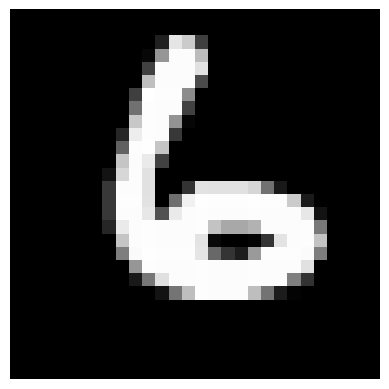

3 --- 3


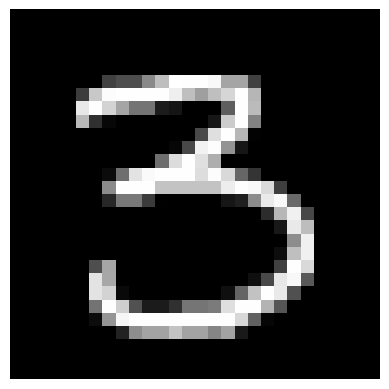

6 --- 6


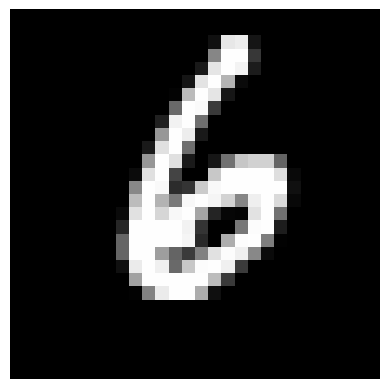

8 --- 8


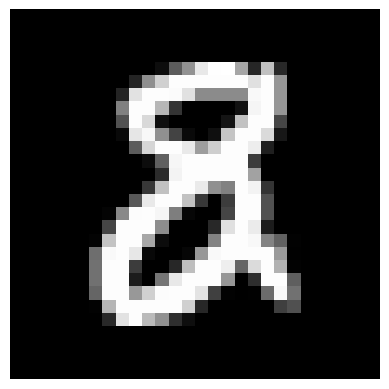

3 --- 3


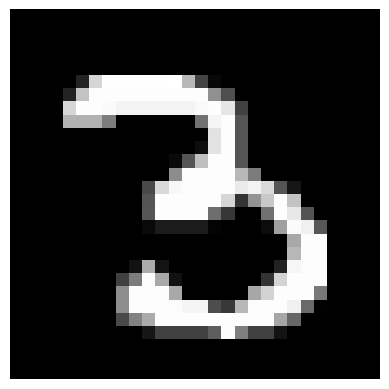

6 --- 6


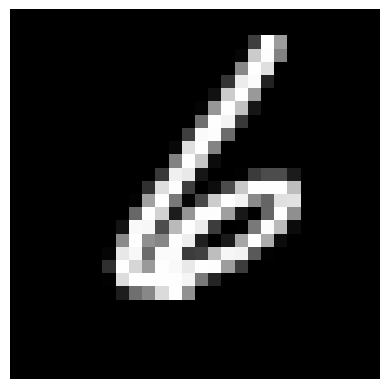

1 --- 1


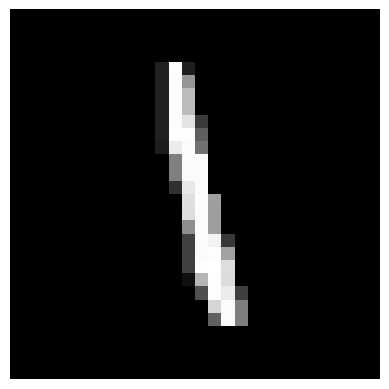

9 --- 9


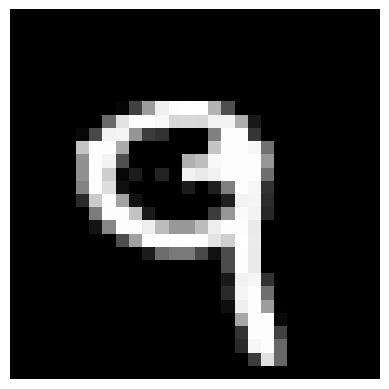

3 --- 3


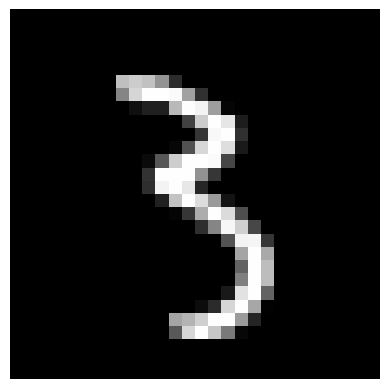

4 --- 4


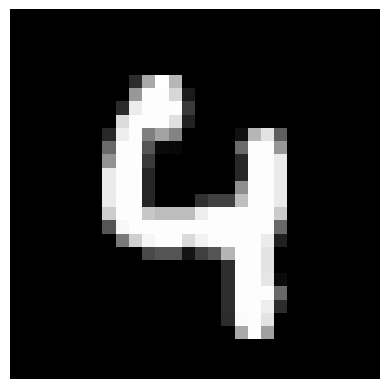

1 --- 1


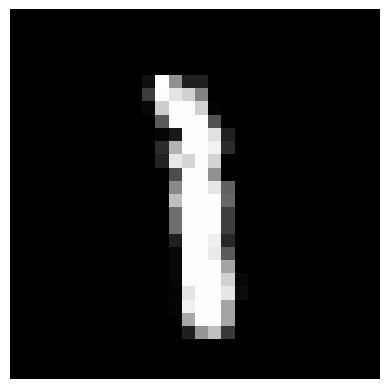

9 --- 9


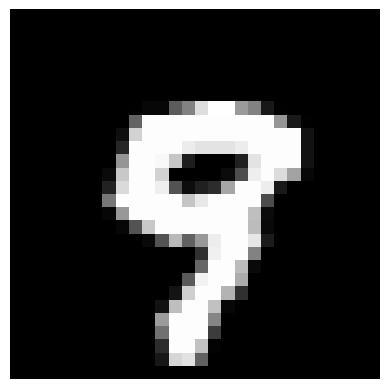

8 --- 8


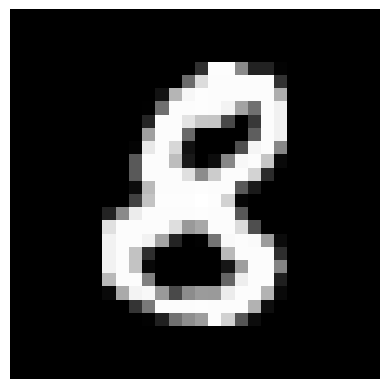

7 --- 7


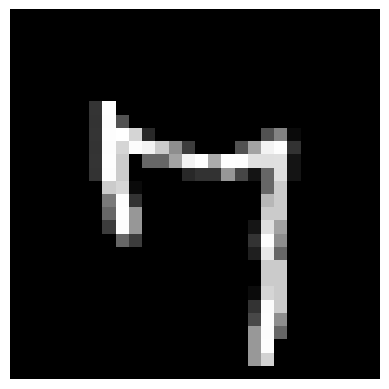

7 --- 7


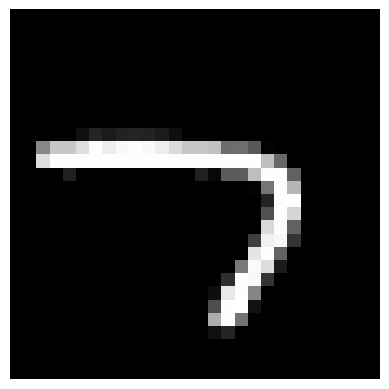

9 --- 9


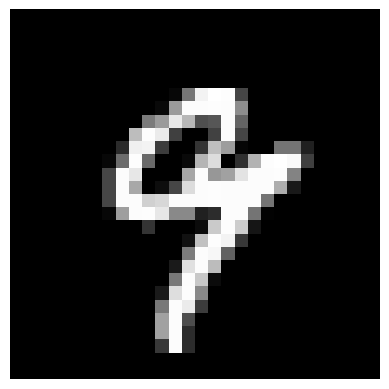

7 --- 7


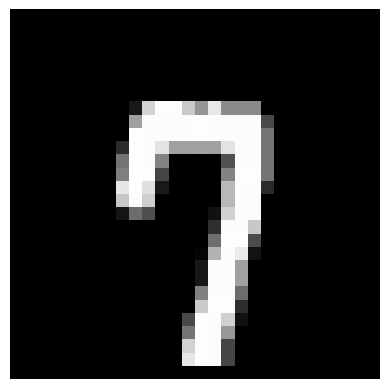

4 --- 4


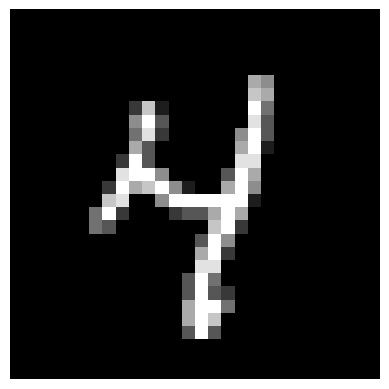

8 --- 8


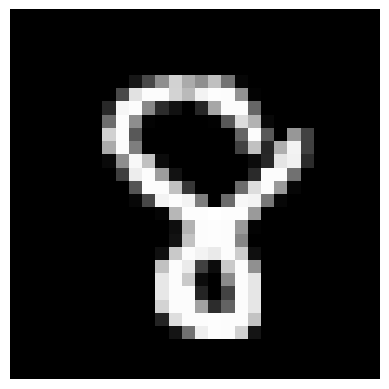

1 --- 1


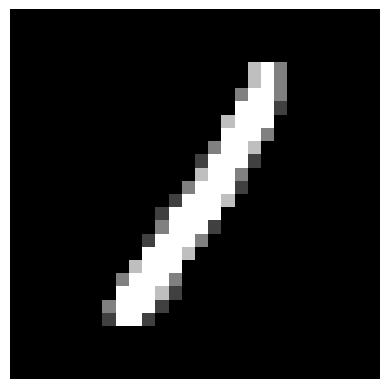

6 --- 6


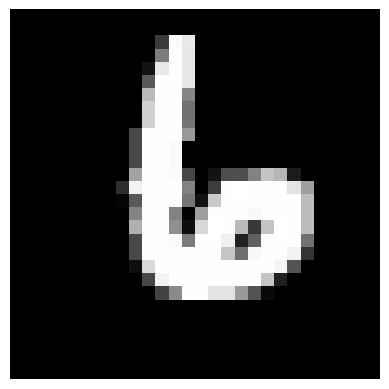

2 --- 2


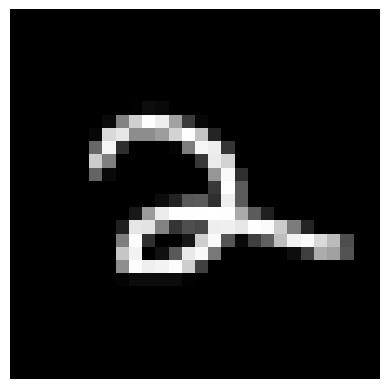

0 --- 0


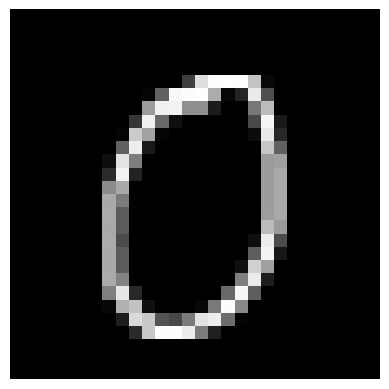

8 --- 8


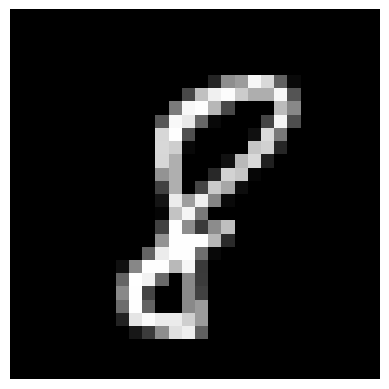

7 --- 7


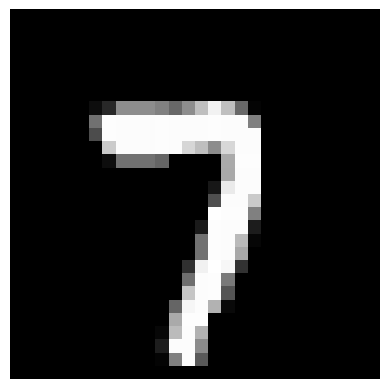

7 --- 7


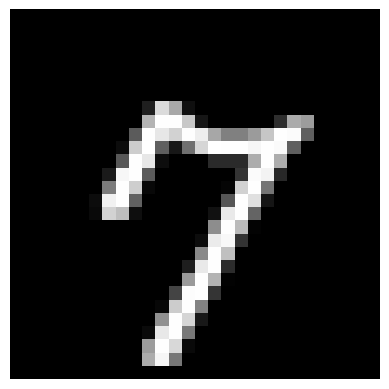

9 --- 9


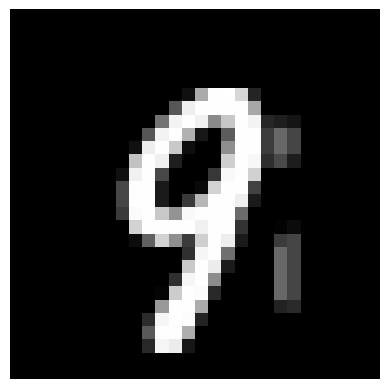

2 --- 2


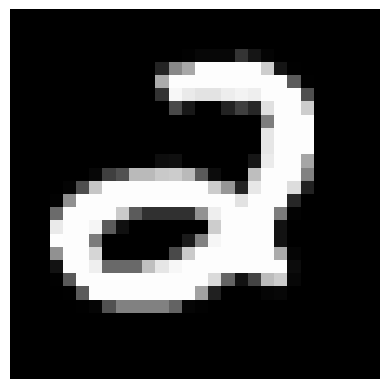

4 --- 4


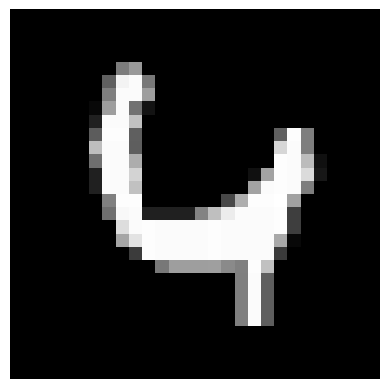

2 --- 2


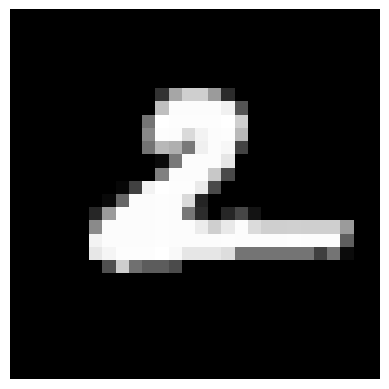

1 --- 1


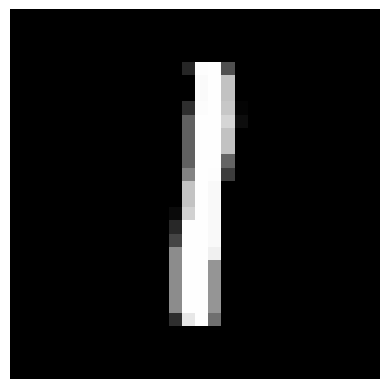

6 --- 6


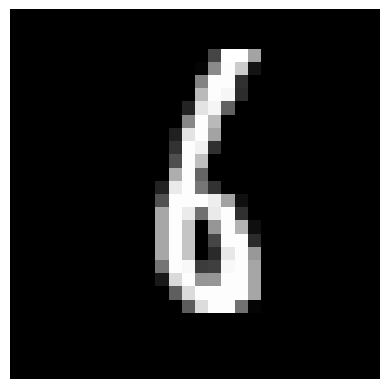

7 --- 7


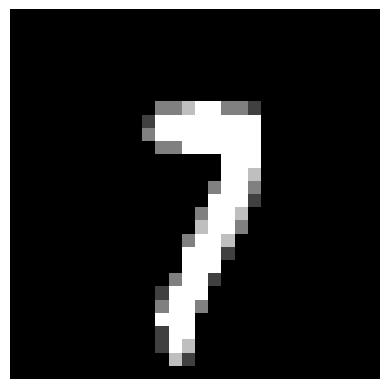

3 --- 3


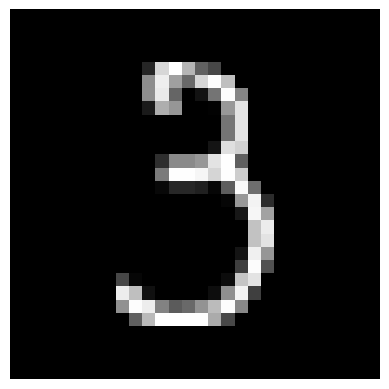

0 --- 0


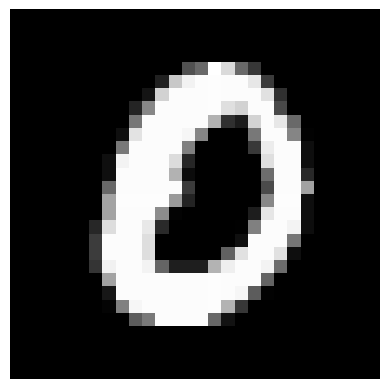

5 --- 5


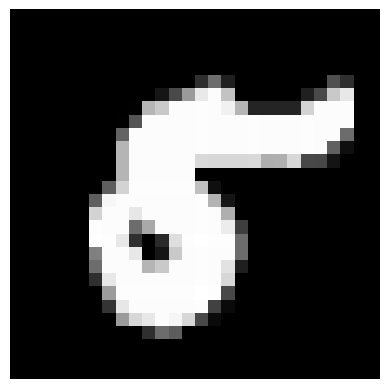

4 --- 4


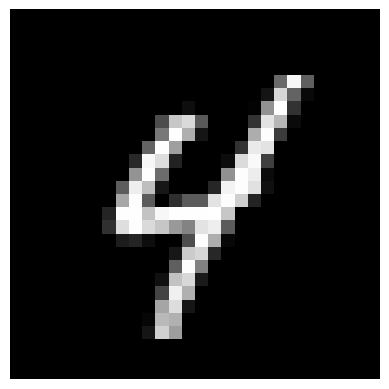

4 --- 4


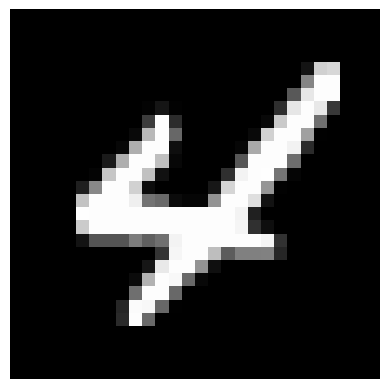

1 --- 1


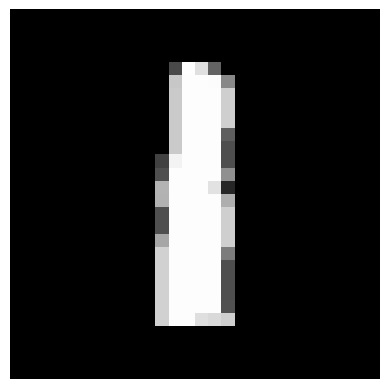

6 --- 6


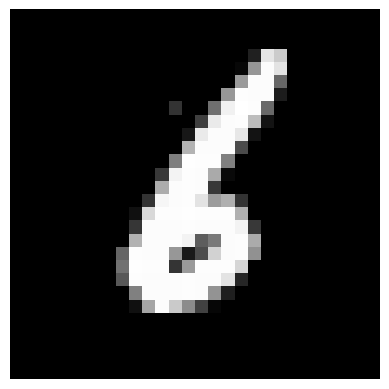

1 --- 1


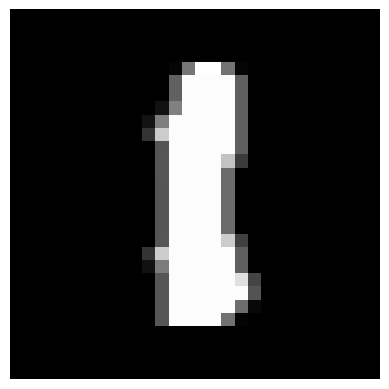

1 --- 1


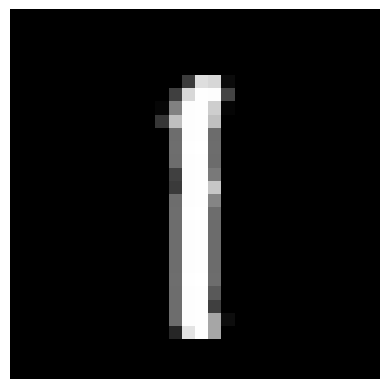

3 --- 3


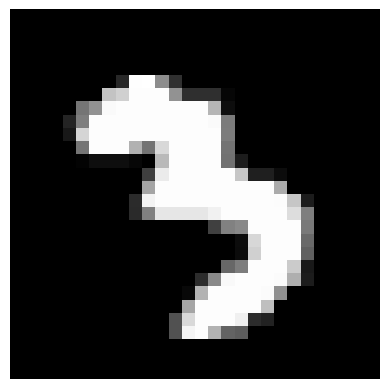

0 --- 0


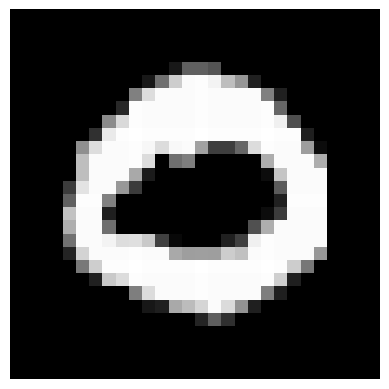

4 --- 4


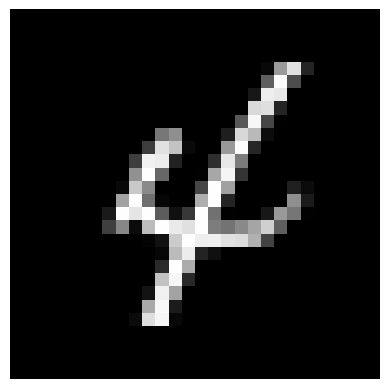

6 --- 6


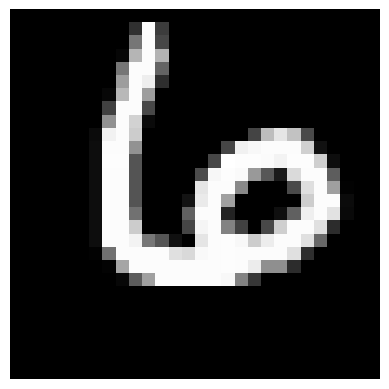

8 --- 8


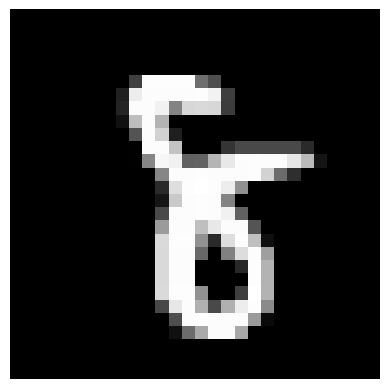

9 --- 9


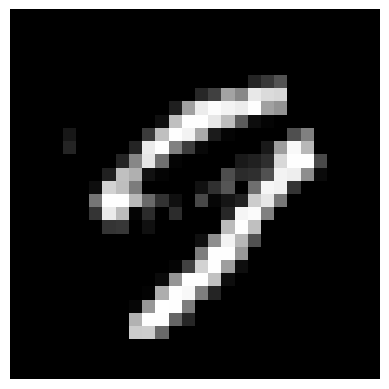

0 --- 0


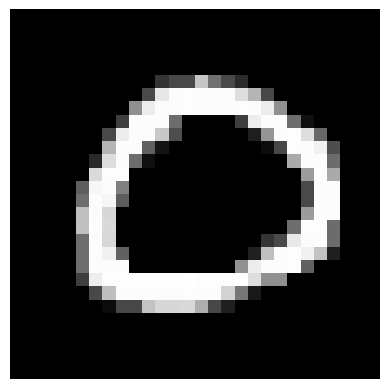

1 --- 1


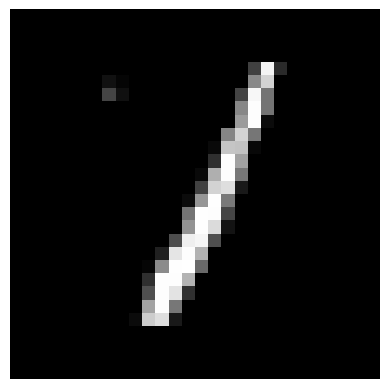

6 --- 6


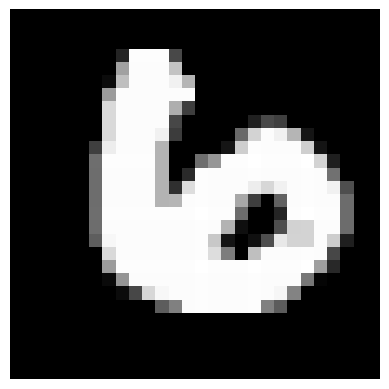

0 --- 0


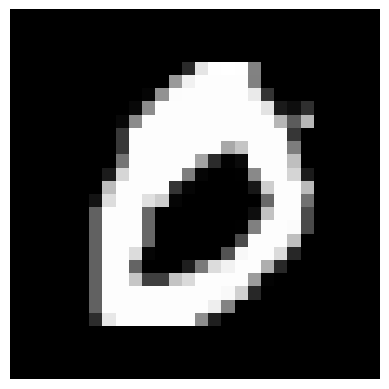

3 --- 3


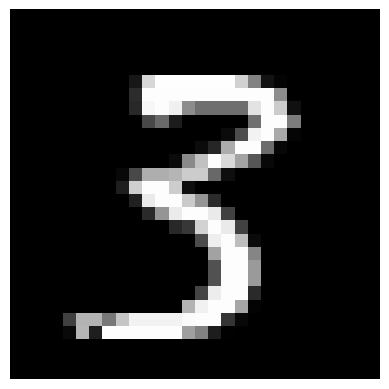

2 --- 2


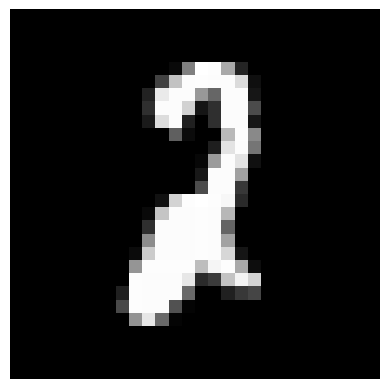

6 --- 6


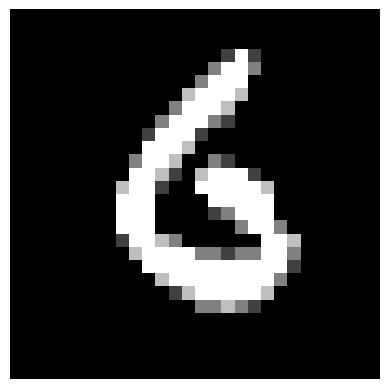

8 --- 8


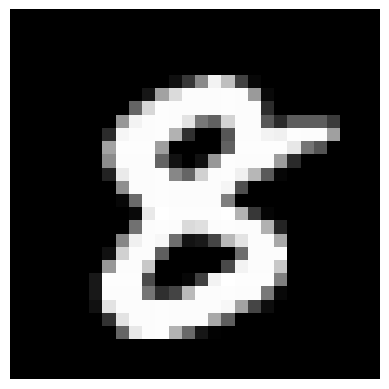

0 --- 0


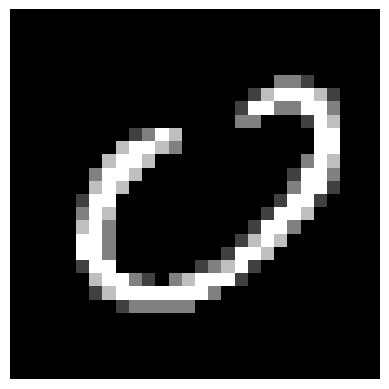

5 --- 5


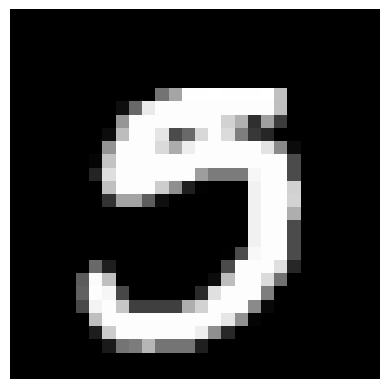

5 --- 5


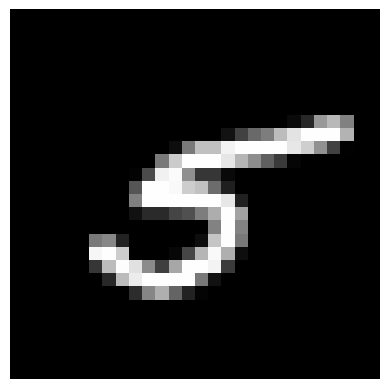

6 --- 6


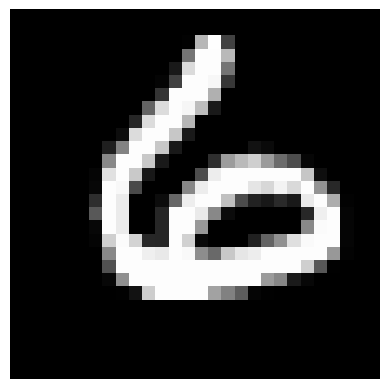

1 --- 1


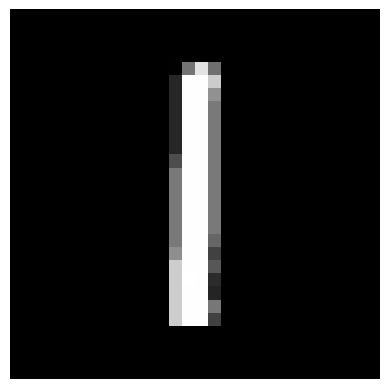

6 --- 6


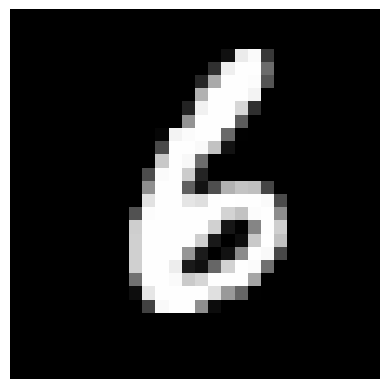

1 --- 1


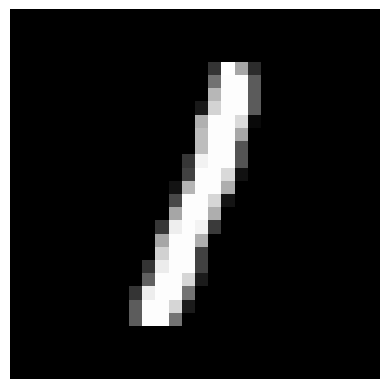

1 --- 1


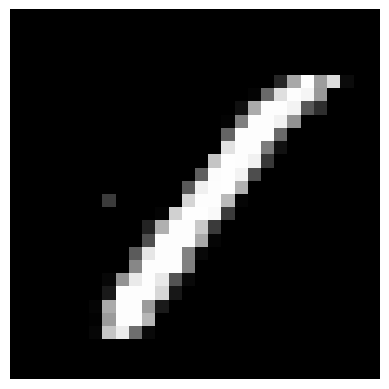

5 --- 5


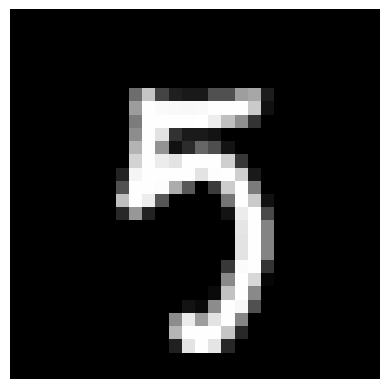

6 --- 6


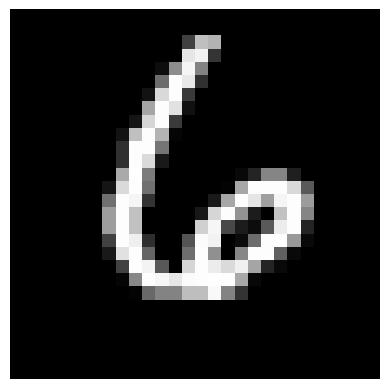

3 --- 3


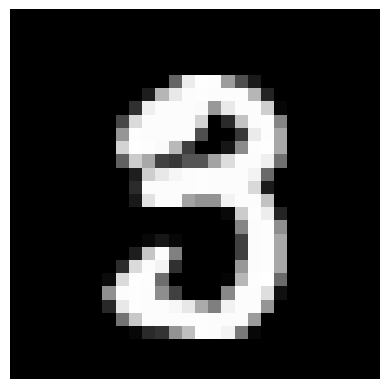

2 --- 2


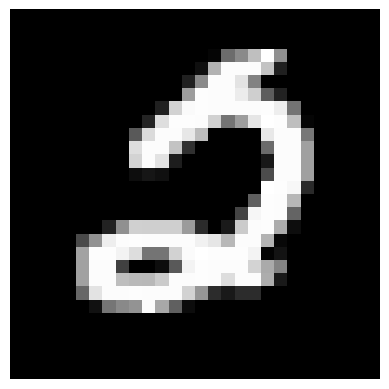

0 --- 0


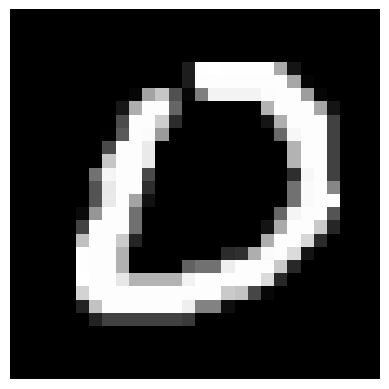

6 --- 6


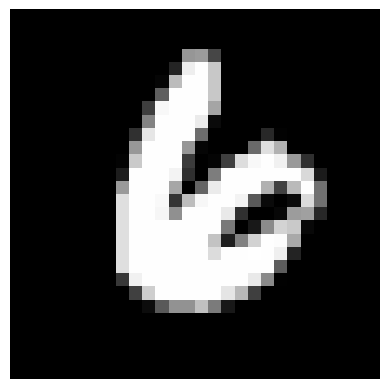

9 --- 9


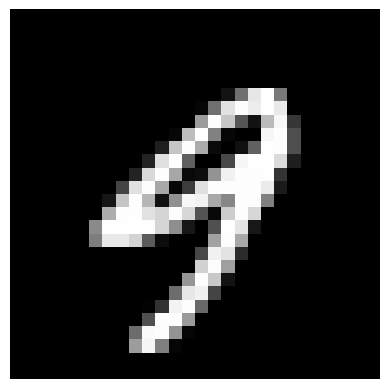

0 --- 0


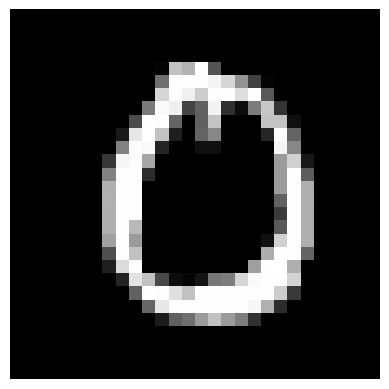

4 --- 4


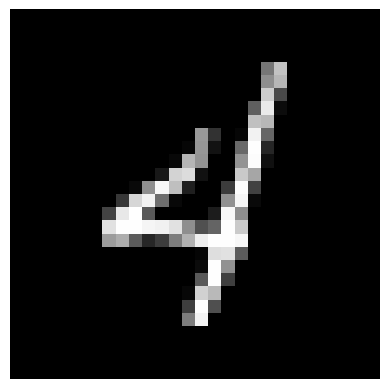

4 --- 4


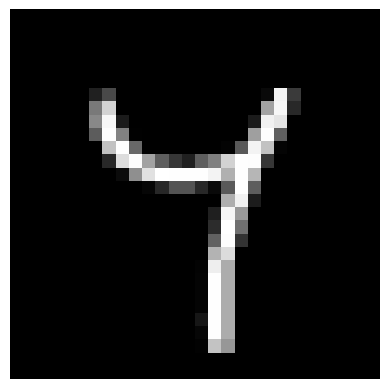

2 --- 2


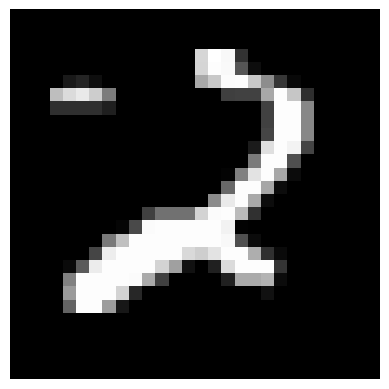

7 --- 7


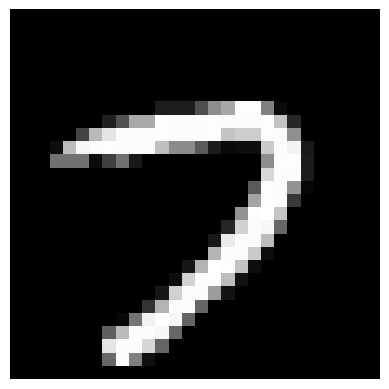

4 --- 4


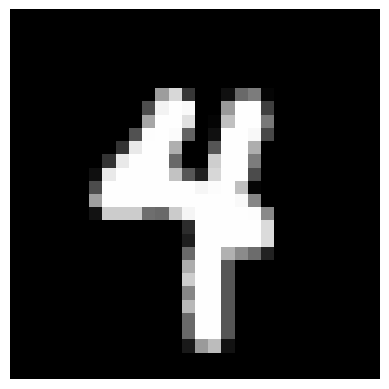

1 --- 1


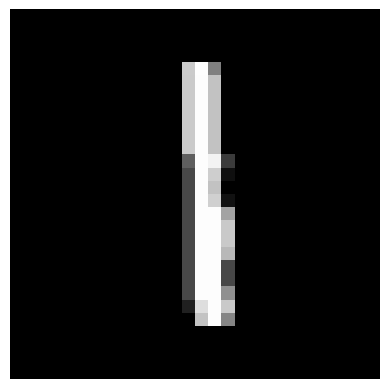

3 --- 3


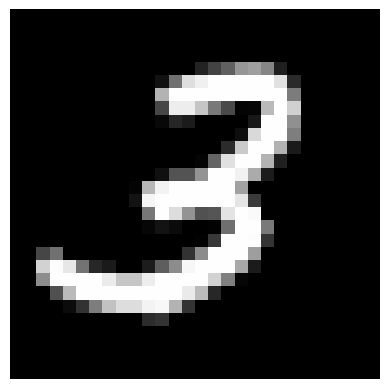

1 --- 1


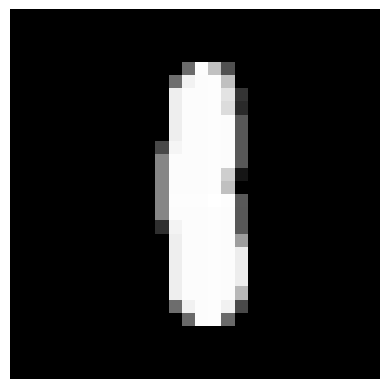

1 --- 1


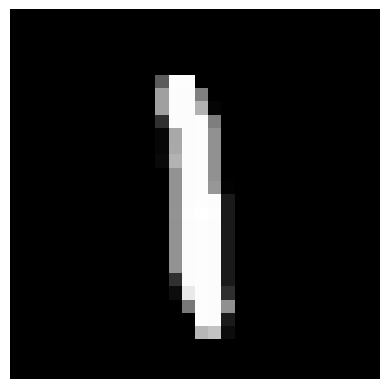

7 --- 7


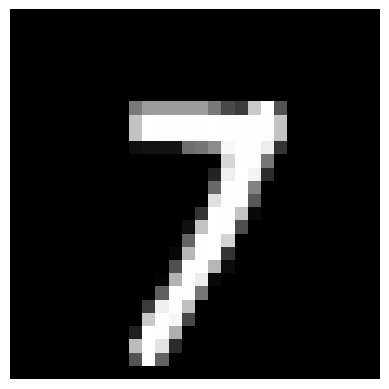

2 --- 2


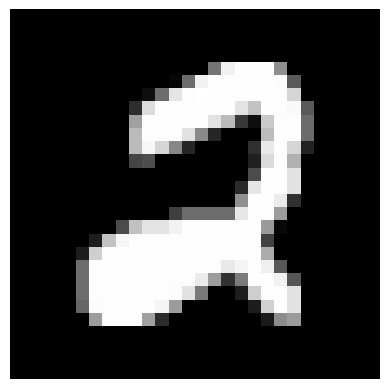

4 --- 4


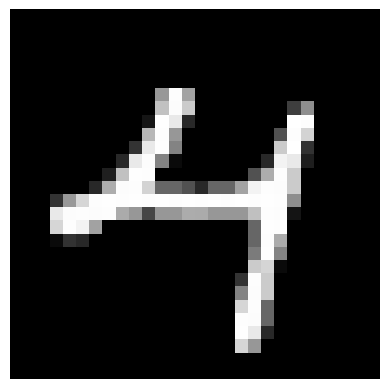

9 --- 9


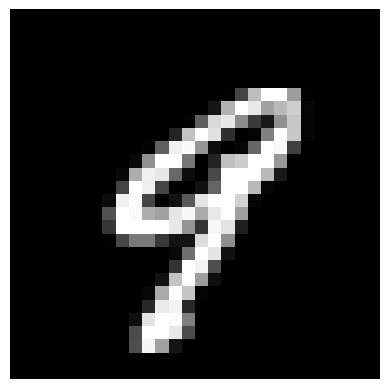

1 --- 1


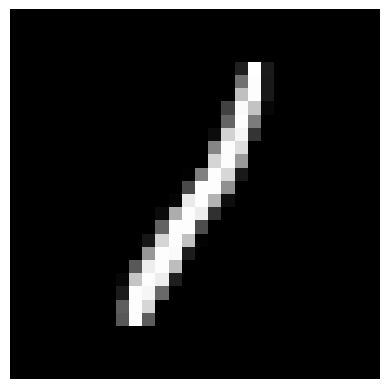

2 --- 2


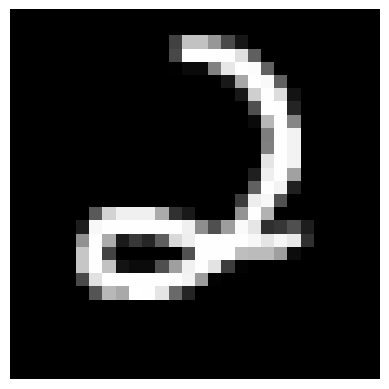

7 --- 7


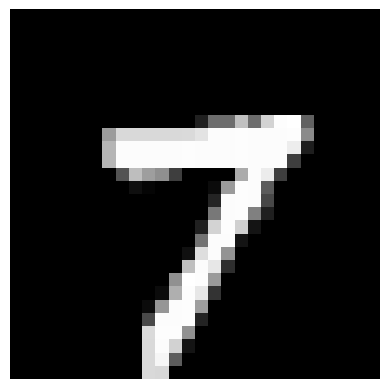

4 --- 4


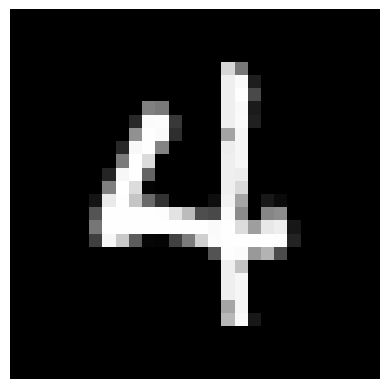

1 --- 1


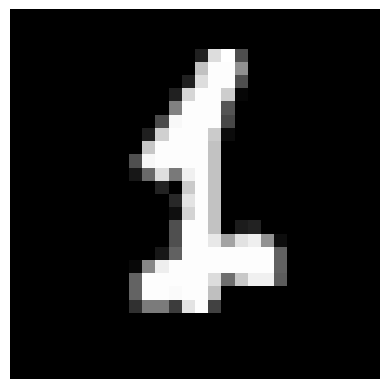

4 --- 4


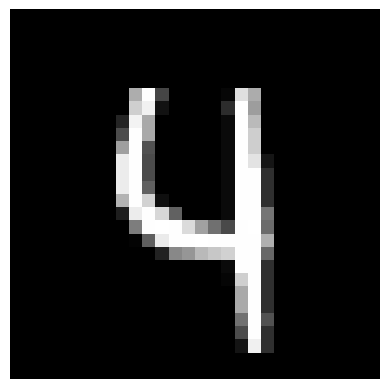

8 --- 8


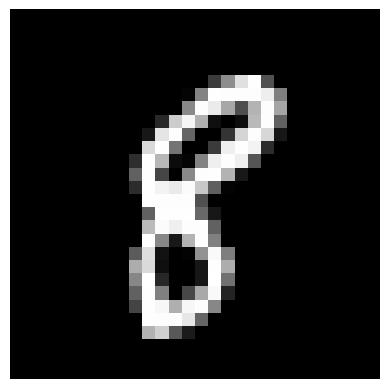

9 --- 9


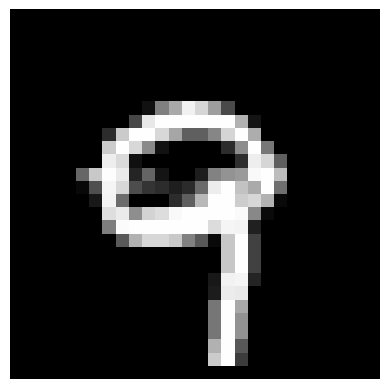

4 --- 4


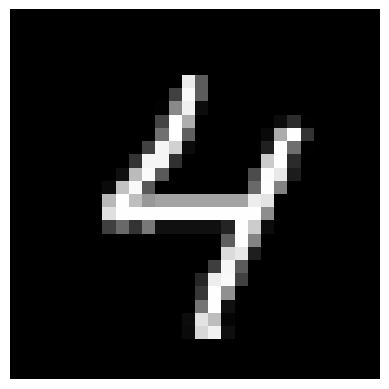

7 --- 7


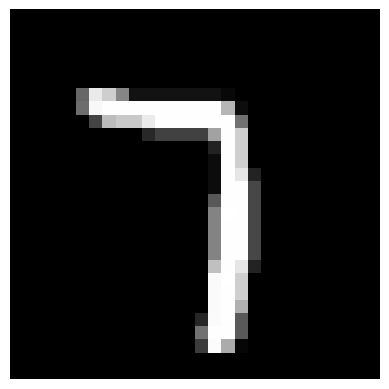

7 --- 7


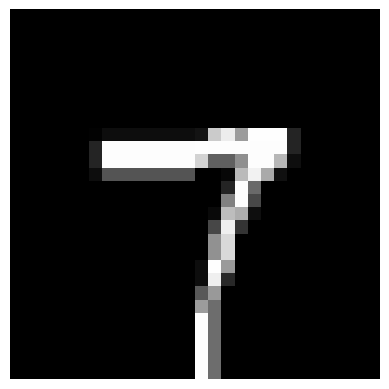

2 --- 2


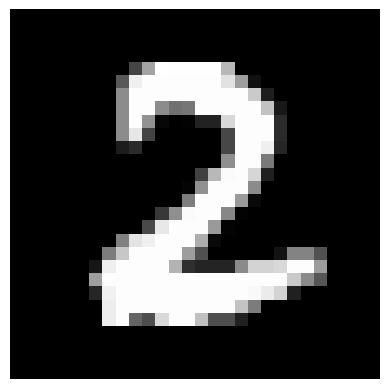

0 --- 0


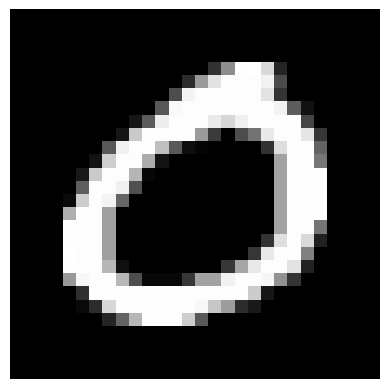

0 --- 0


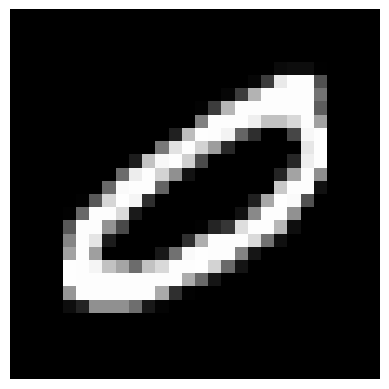

8 --- 8


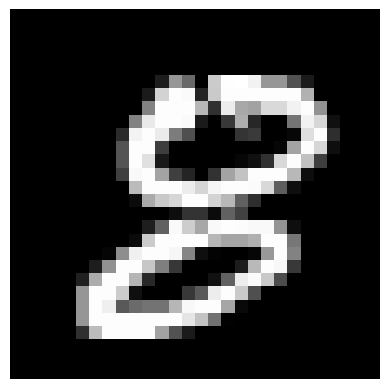

0 --- 0


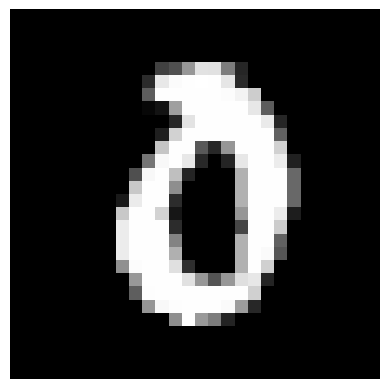

4 --- 4


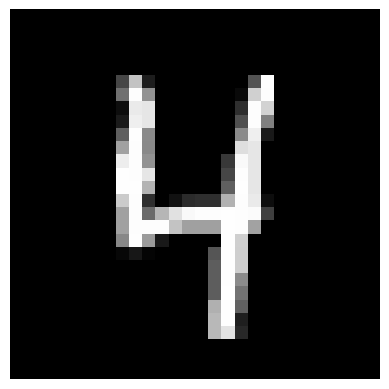

6 --- 6


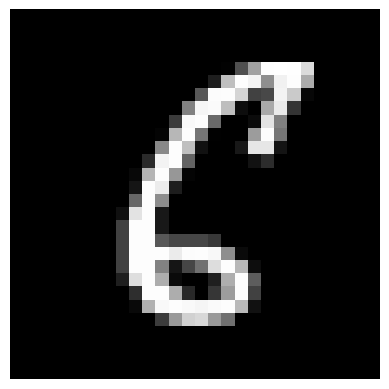

6 --- 6


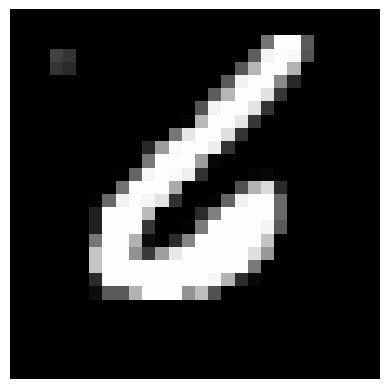

7 --- 7


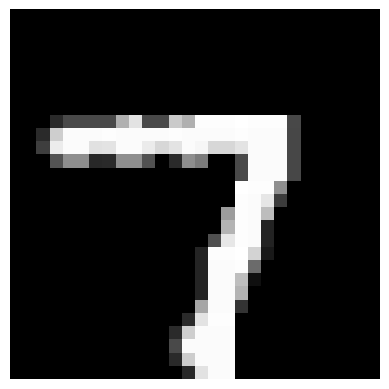

7 --- 7


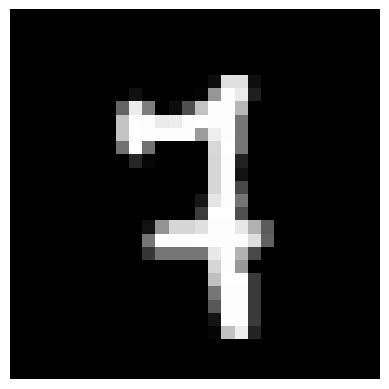

8 --- 8


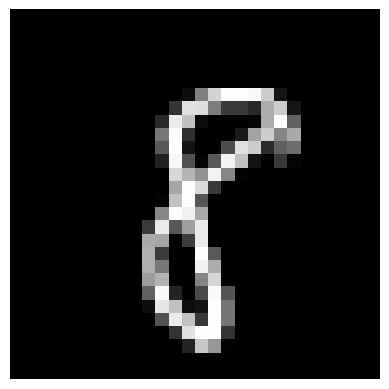

7 --- 7


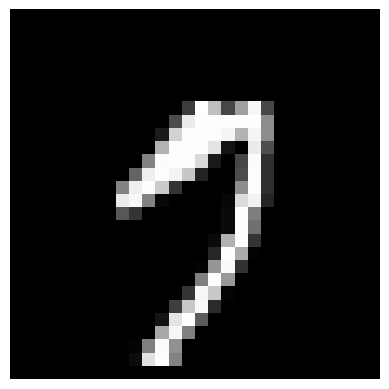

0 --- 0


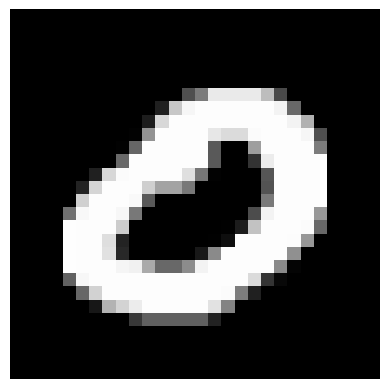

6 --- 6


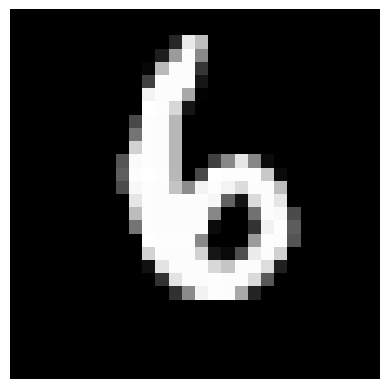

9 --- 9


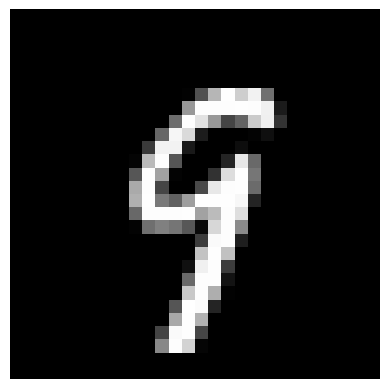

8 --- 8


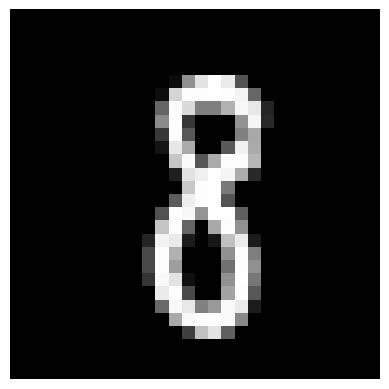

2 --- 2


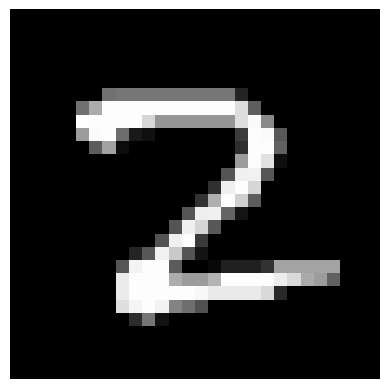

0 --- 0


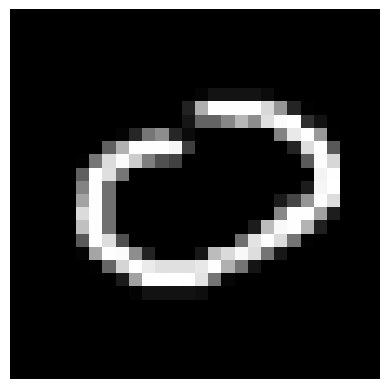

6 --- 6


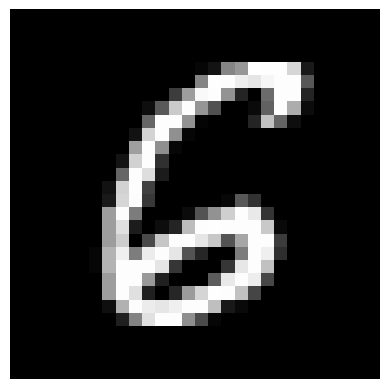

7 --- 7


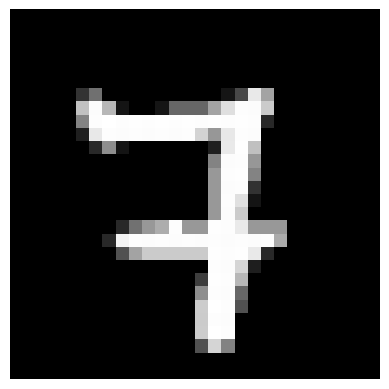

9 --- 9


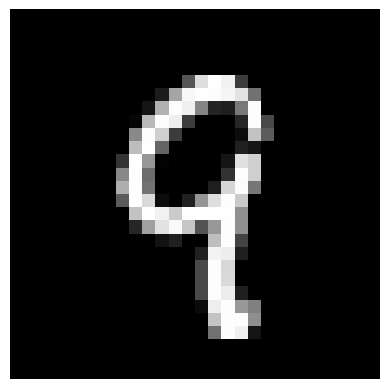

3 --- 3


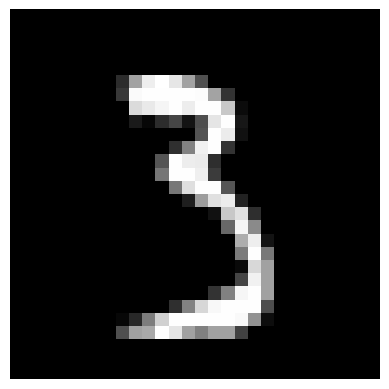

3 --- 2


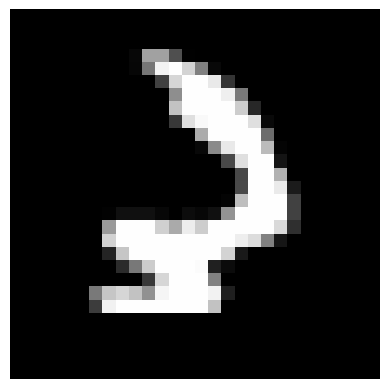

3 --- 3


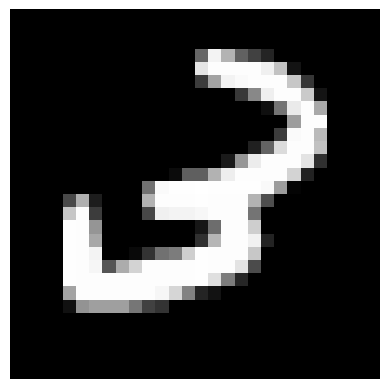

3 --- 3


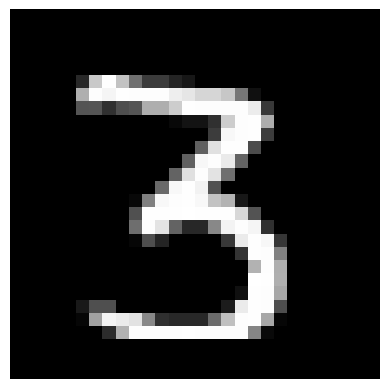

0 --- 0


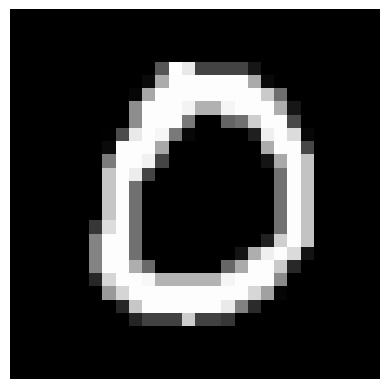

3 --- 3


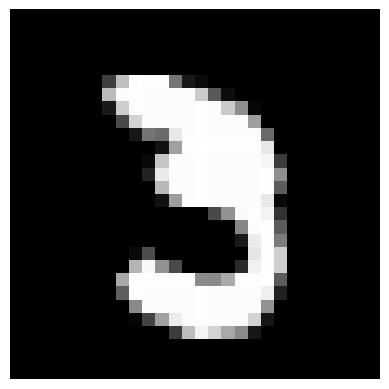

1 --- 1


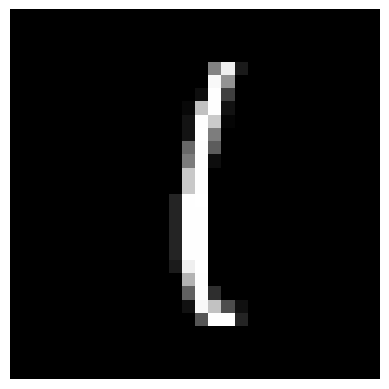

0 --- 0


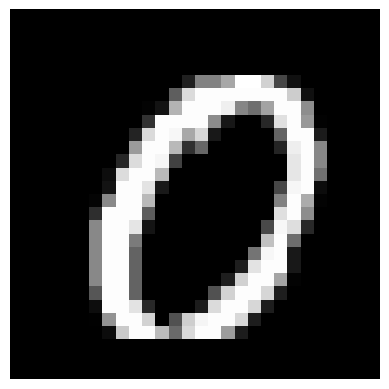

6 --- 6


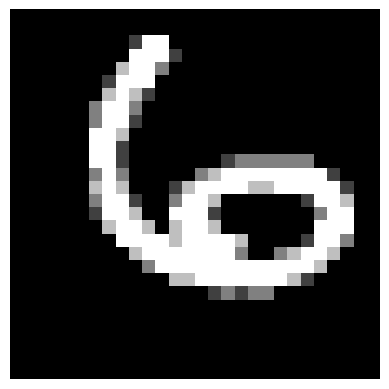

1 --- 1


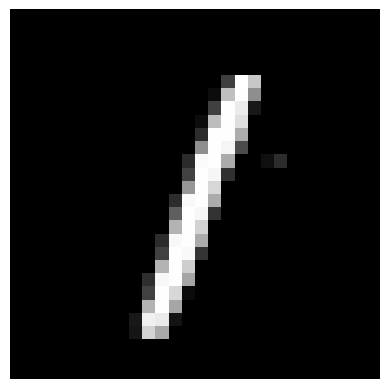

9 --- 9


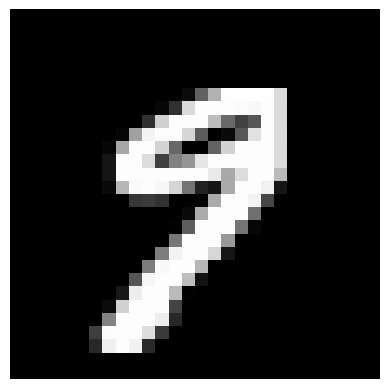

3 --- 3


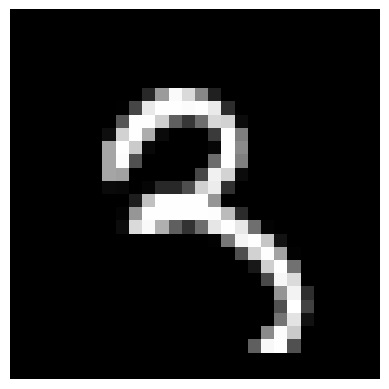

3 --- 3


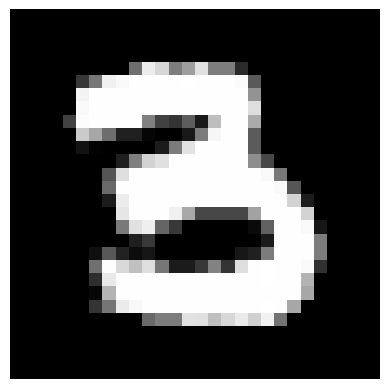

9 --- 9


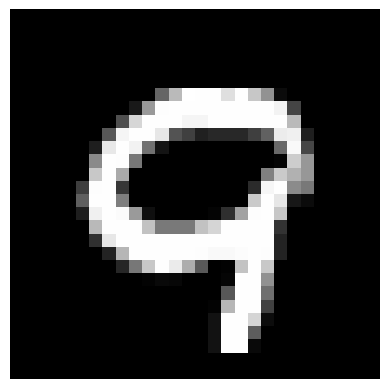

8 --- 8


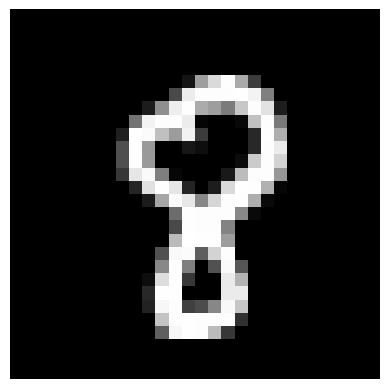

4 --- 4


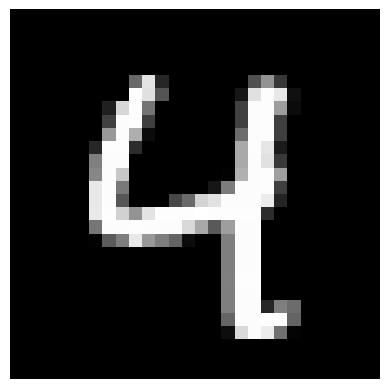

8 --- 8


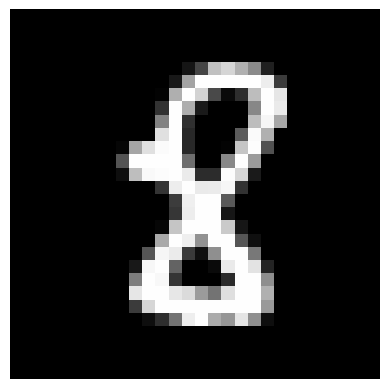

1 --- 1


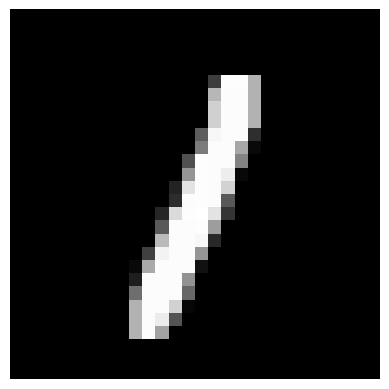

4 --- 4


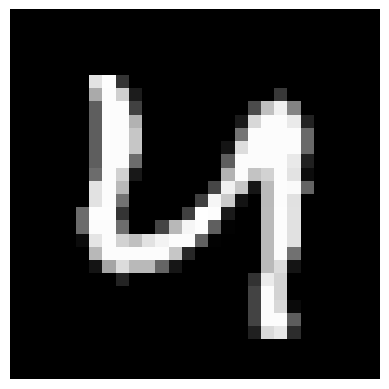

3 --- 3


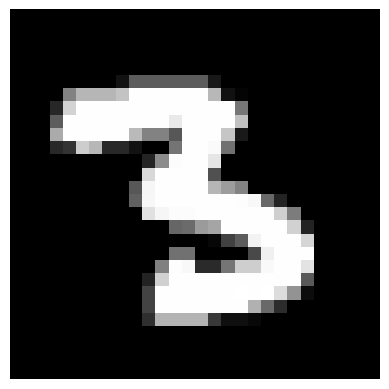

7 --- 7


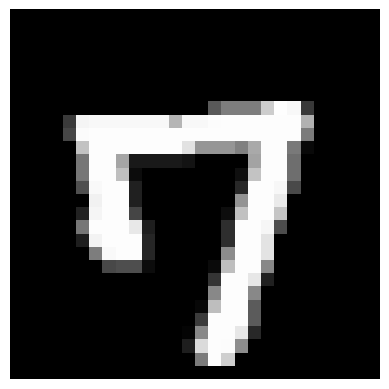

5 --- 5


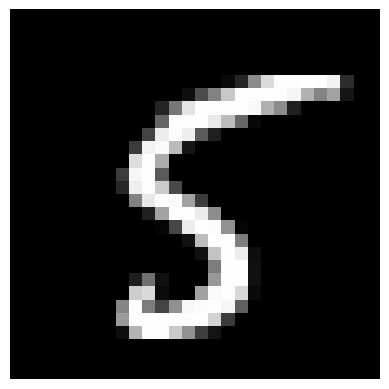

5 --- 5


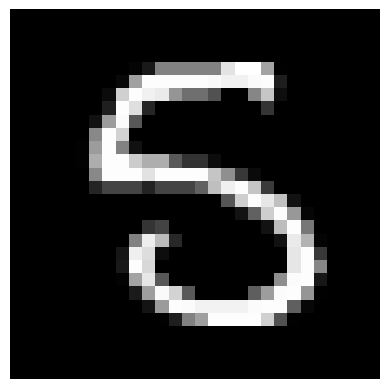

4 --- 4


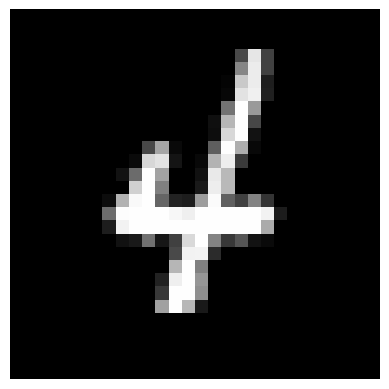

0 --- 0


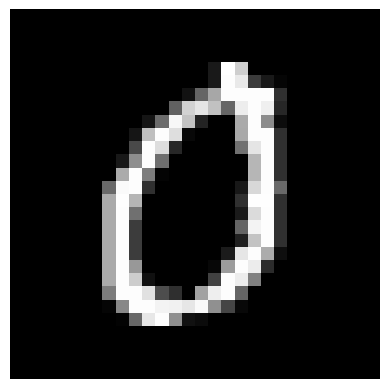

9 --- 9


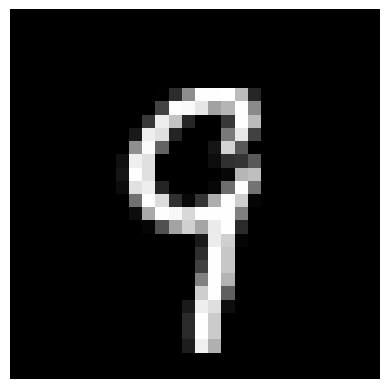

5 --- 5


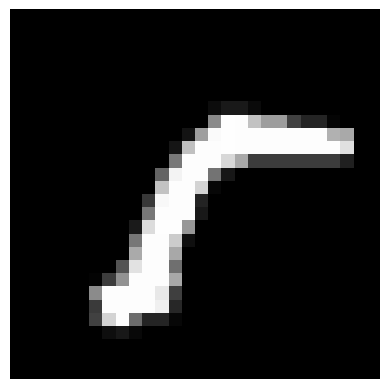

4 --- 4


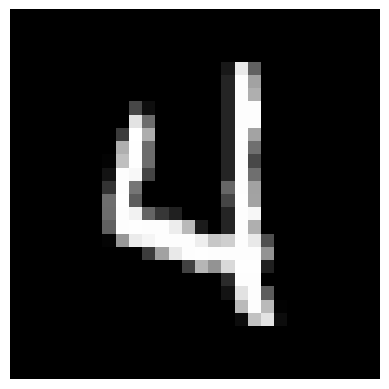

1 --- 1


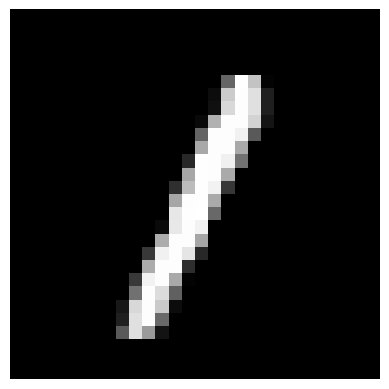

8 --- 8


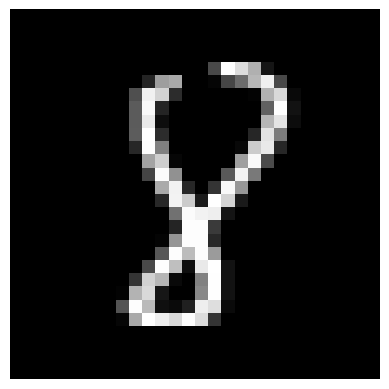

7 --- 7


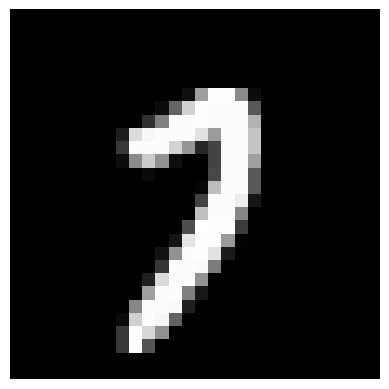

0 --- 0


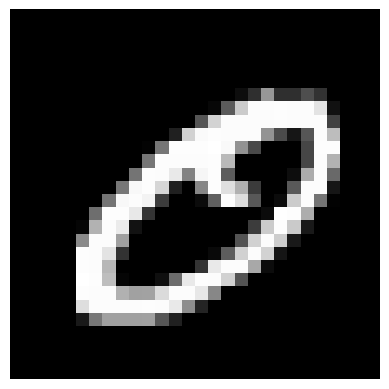

4 --- 4


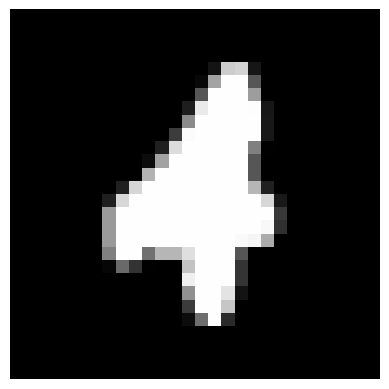

6 --- 6


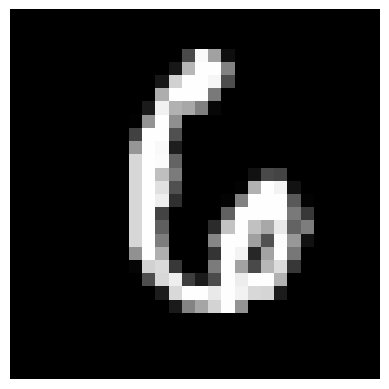

3 --- 3


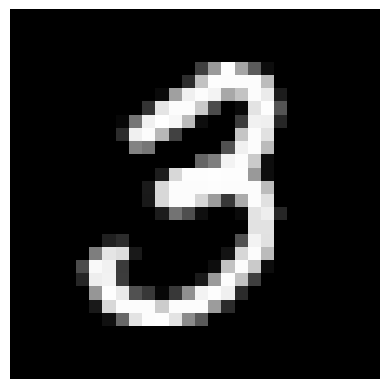

3 --- 3


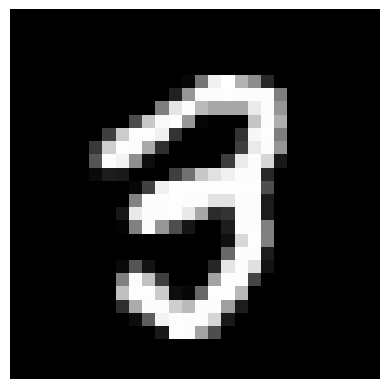

3 --- 3


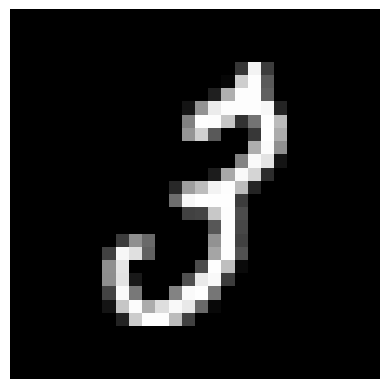

1 --- 1


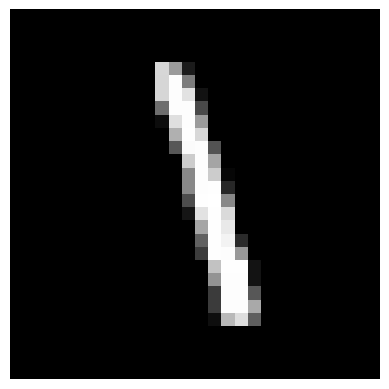

7 --- 7


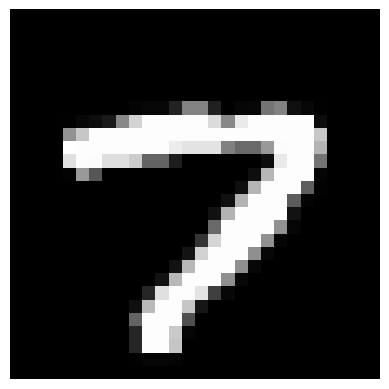

4 --- 4


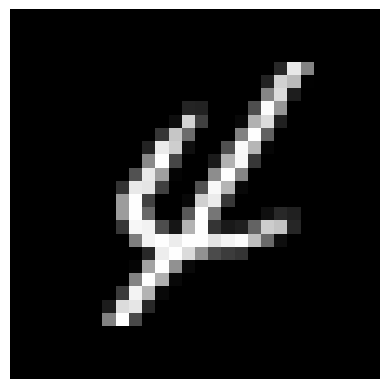

1 --- 1


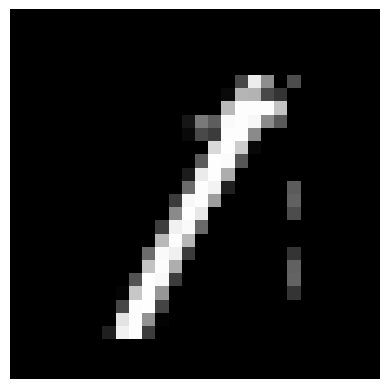

8 --- 8


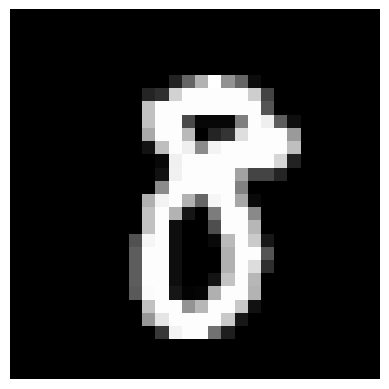

4 --- 4


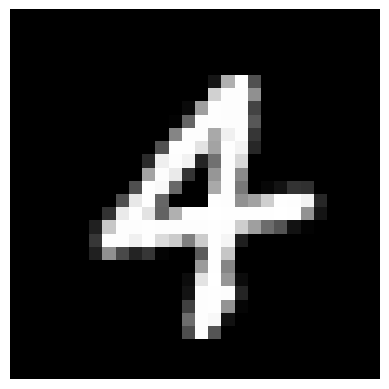

1 --- 1


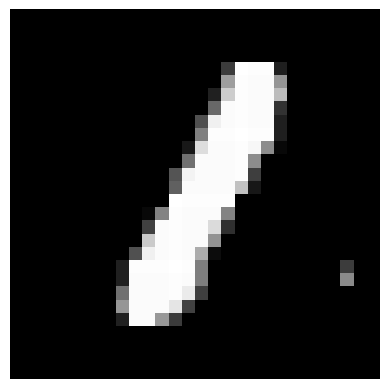

9 --- 9


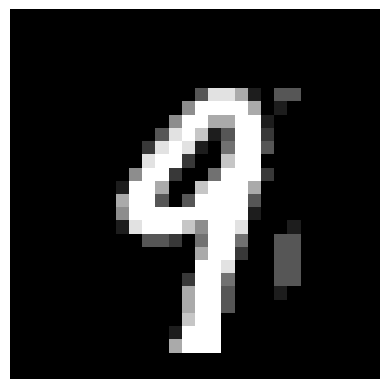

2 --- 2


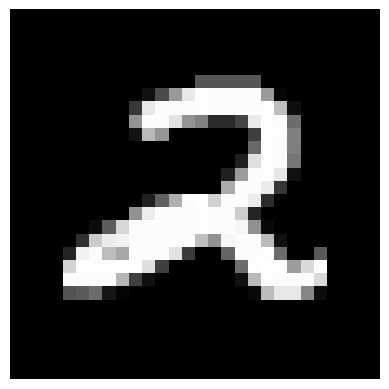

3 --- 3


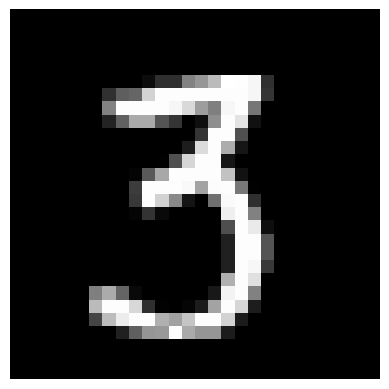

3 --- 3


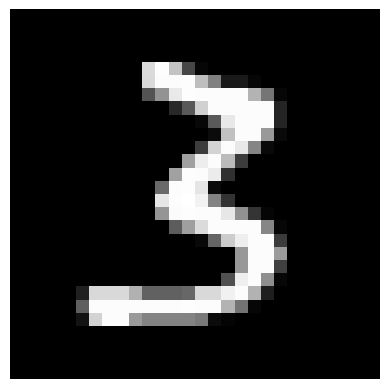

5 --- 5


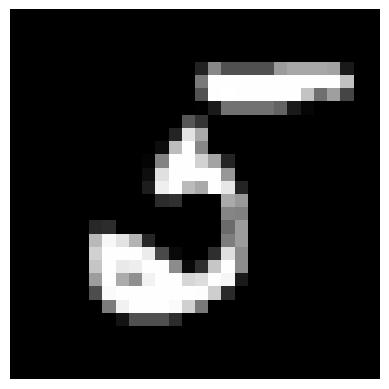

2 --- 2


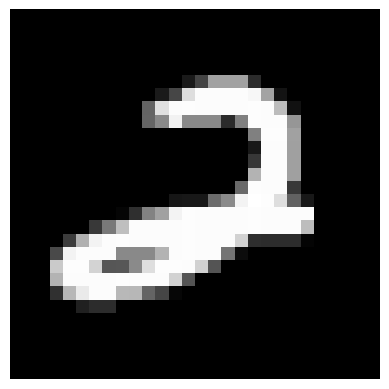

8 --- 8


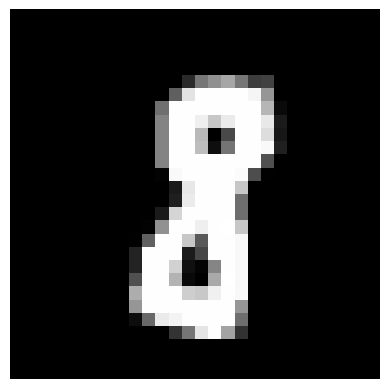

5 --- 5


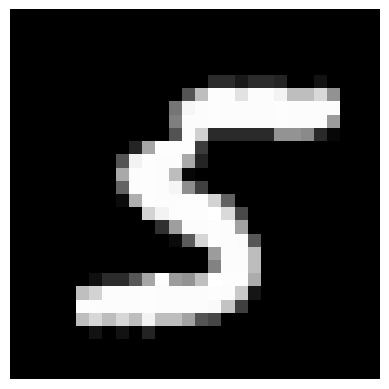

8 --- 8


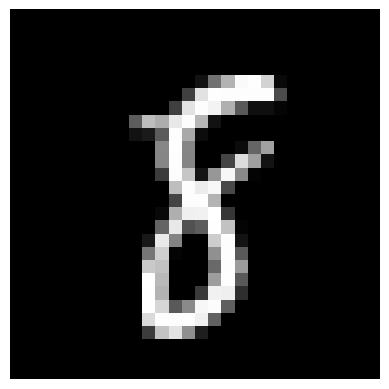

5 --- 5


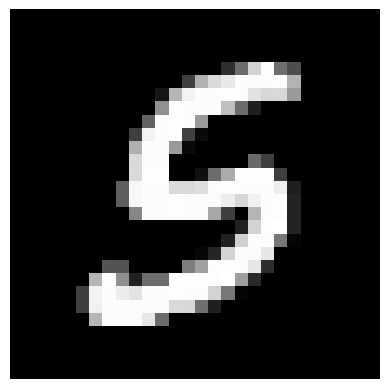

9 --- 9


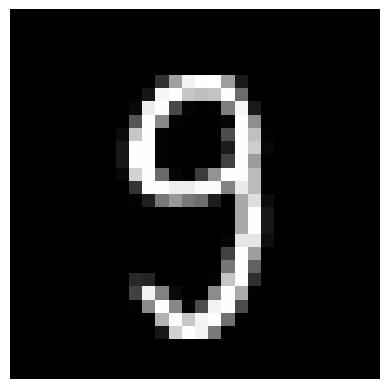

7 --- 7


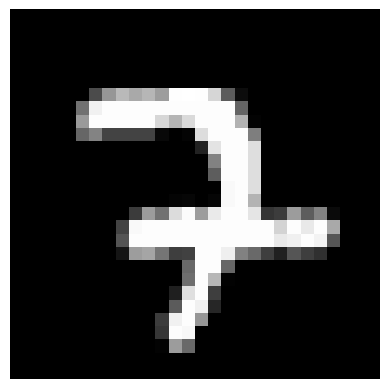

0 --- 0


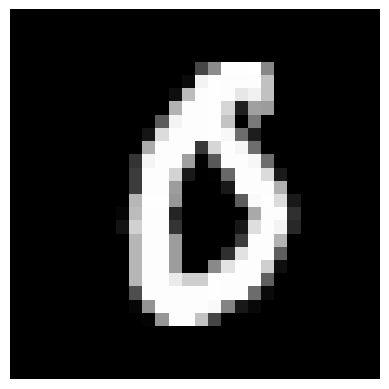

2 --- 2


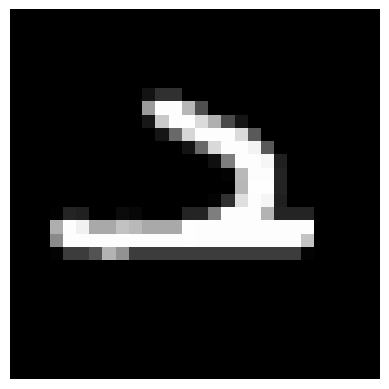

8 --- 8


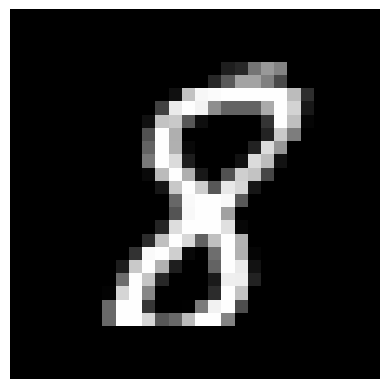

5 --- 5


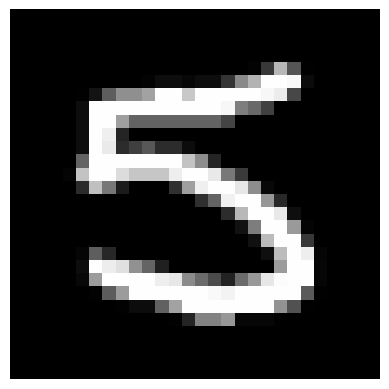

5 --- 5


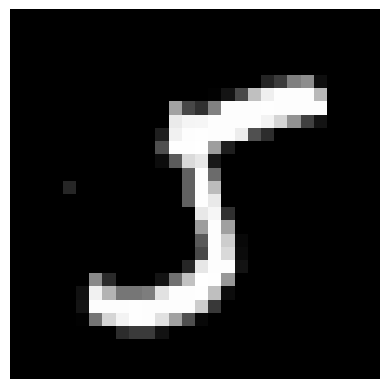

0 --- 0


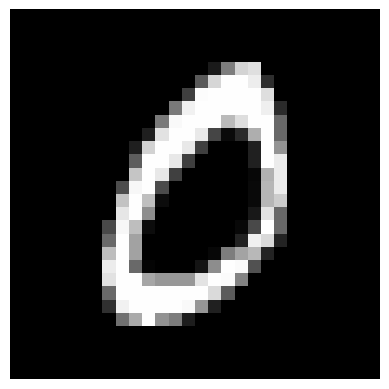

6 --- 6


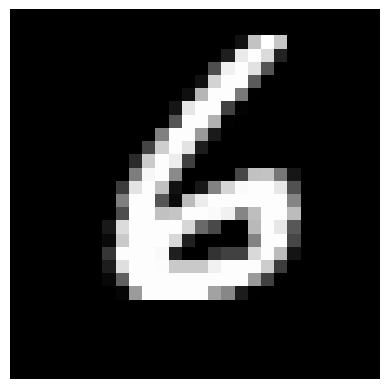

1 --- 1


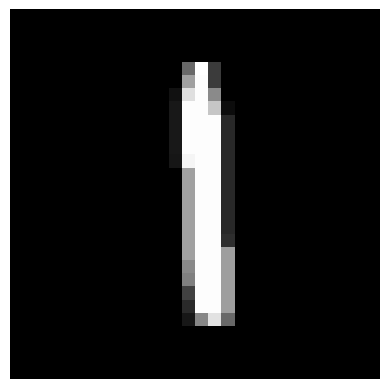

7 --- 7


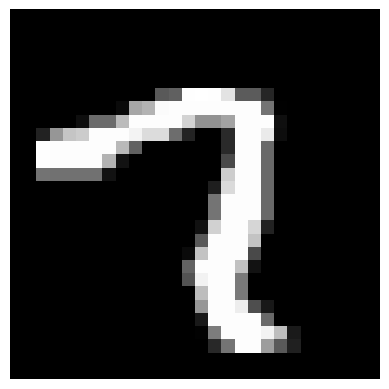

3 --- 3


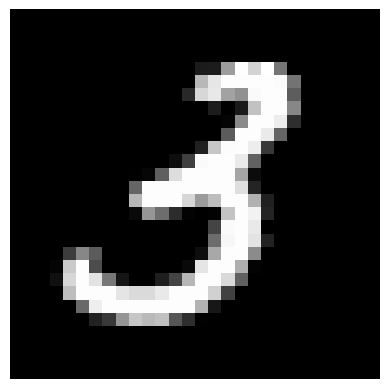

1 --- 1


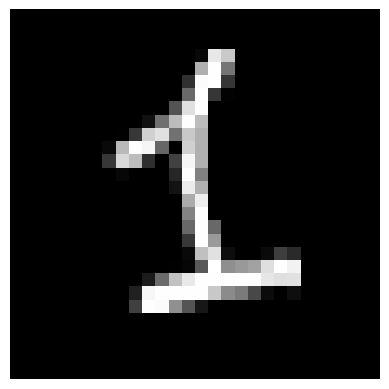

6 --- 6


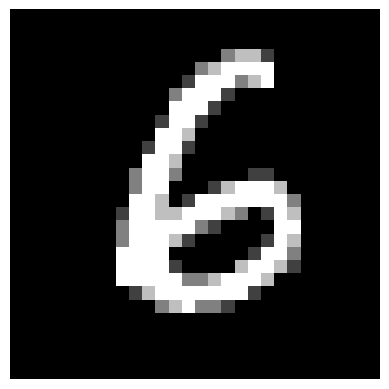

8 --- 8


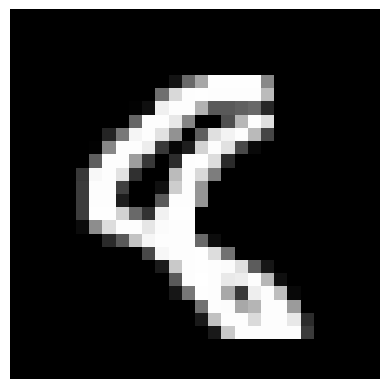

8 --- 8


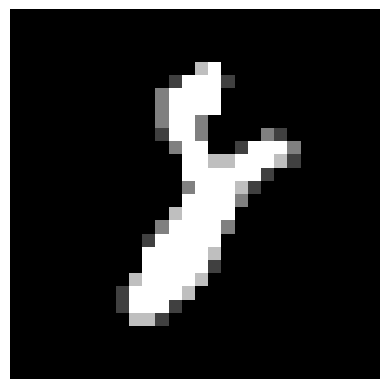

6 --- 6


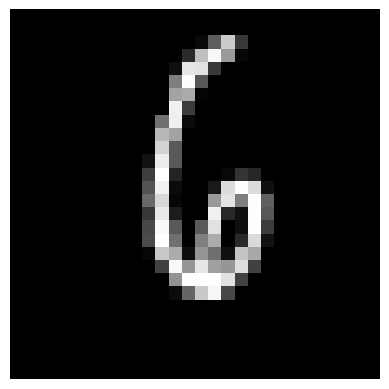

9 --- 9


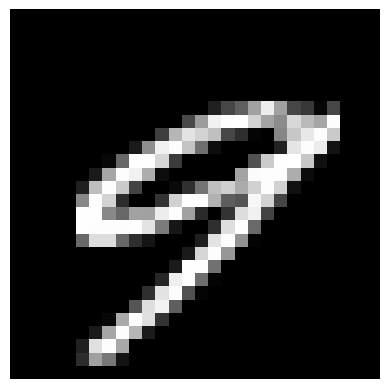

8 --- 8


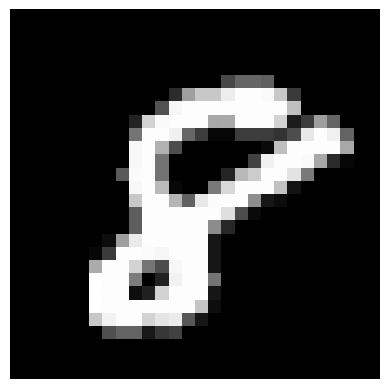

5 --- 5


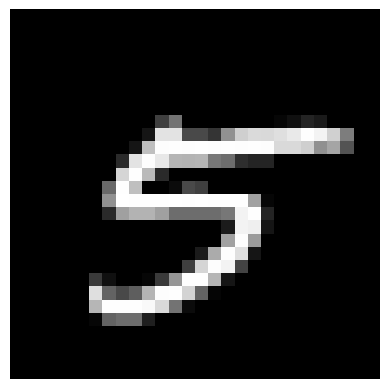

9 --- 9


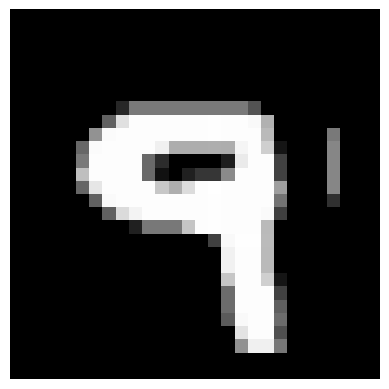

4 --- 4


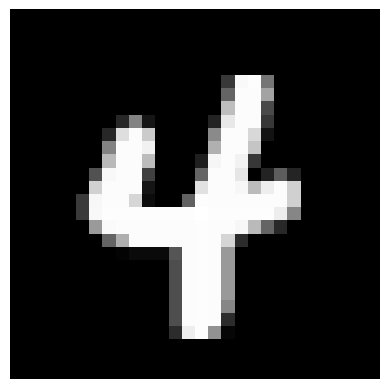

0 --- 0


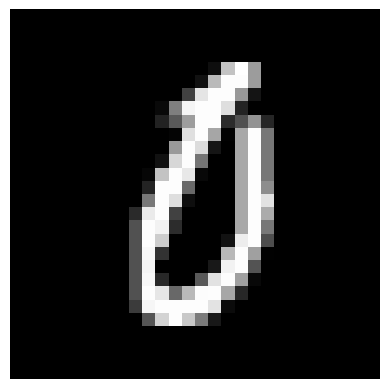

8 --- 8


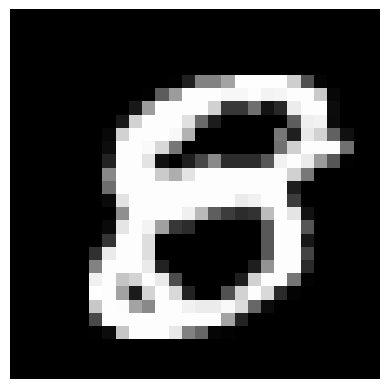

2 --- 2


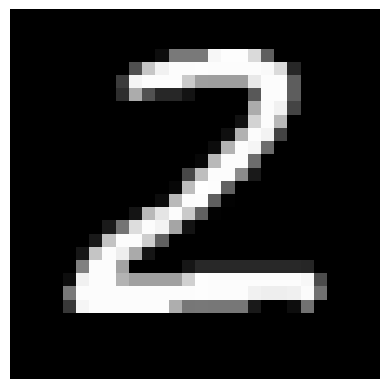

0 --- 0


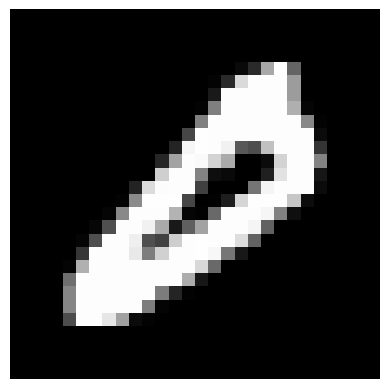

3 --- 3


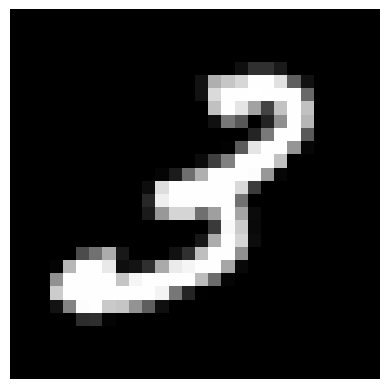

1 --- 1


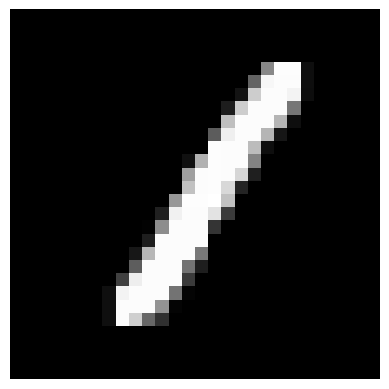

5 --- 5


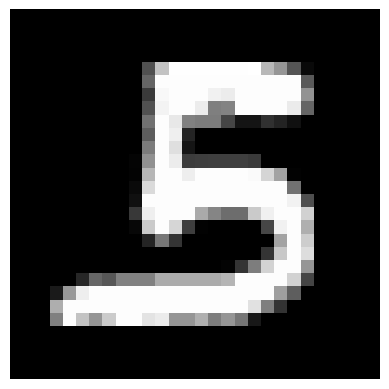

0 --- 0


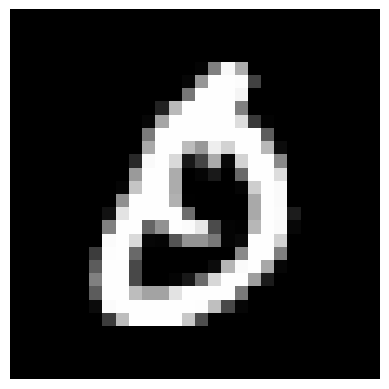

1 --- 1


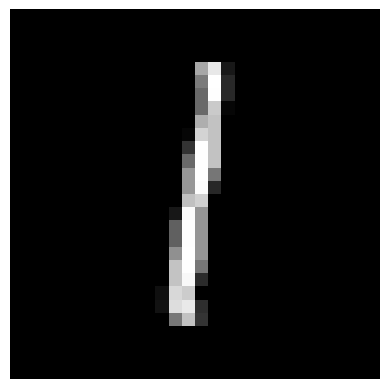

5 --- 5


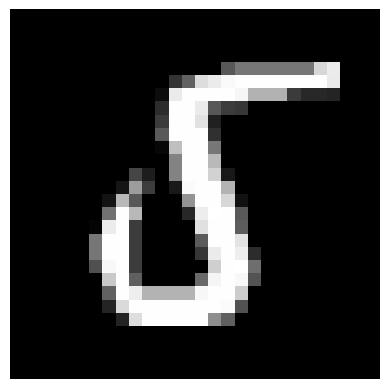

5 --- 5


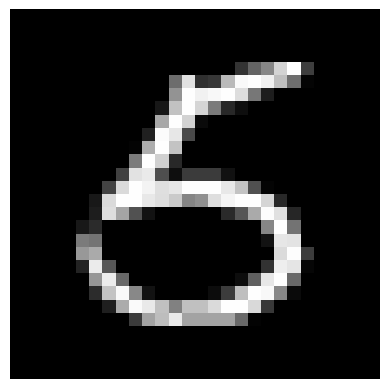

0 --- 0


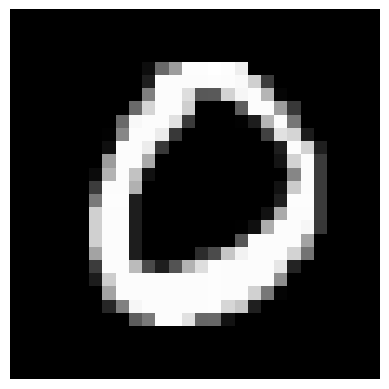

0 --- 0


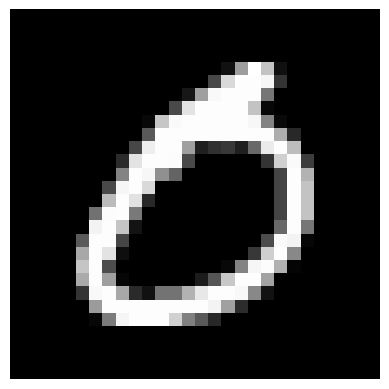

7 --- 7


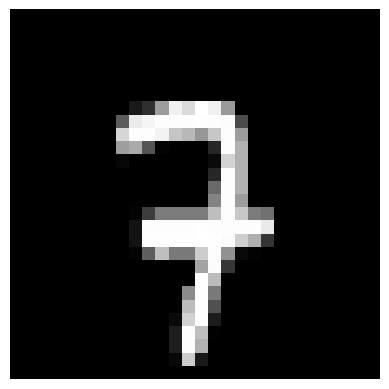

2 --- 2


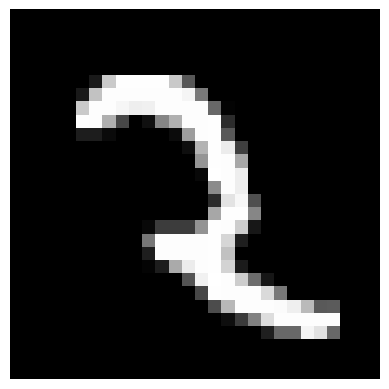

0 --- 0


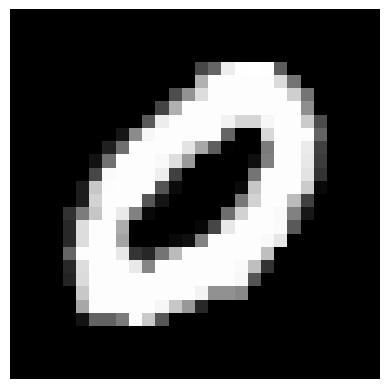

9 --- 9


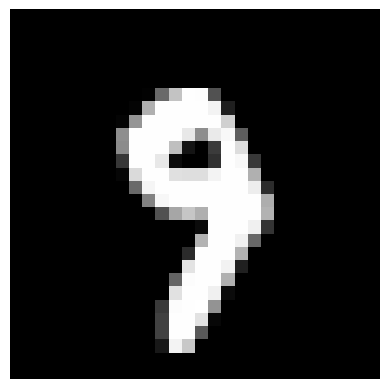

4 --- 4


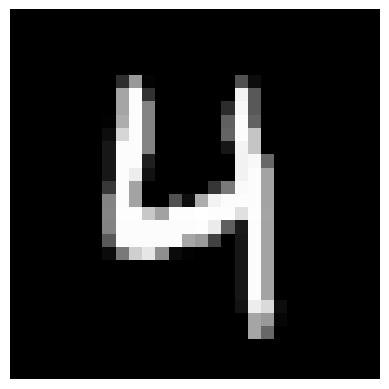

1 --- 1


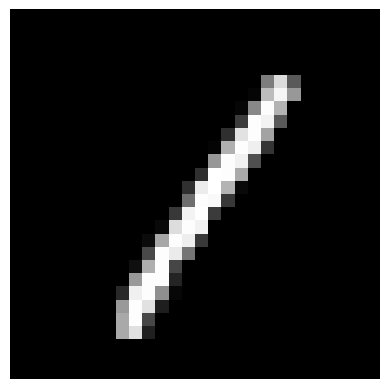

8 --- 8


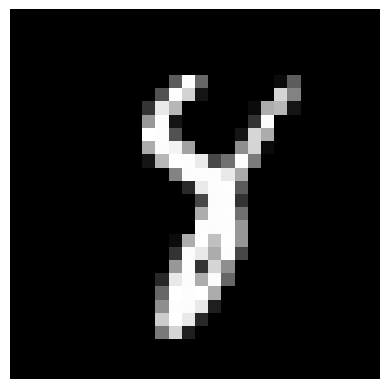

9 --- 9


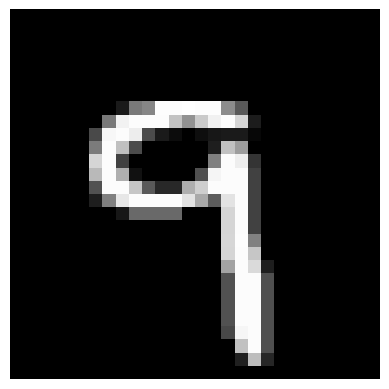

8 --- 8


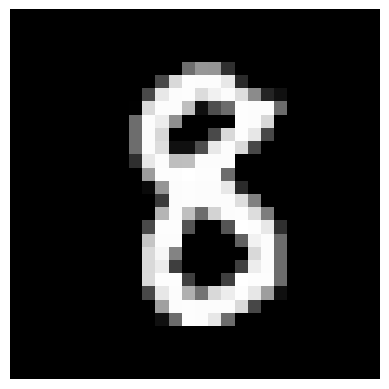

7 --- 7


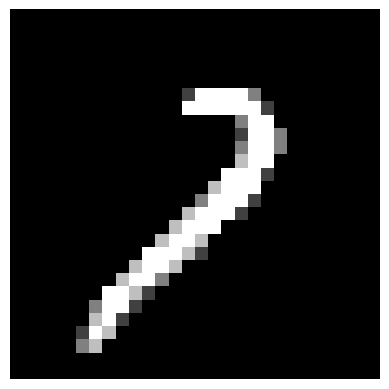

3 --- 3


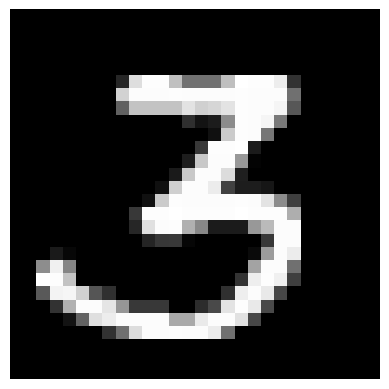

2 --- 2


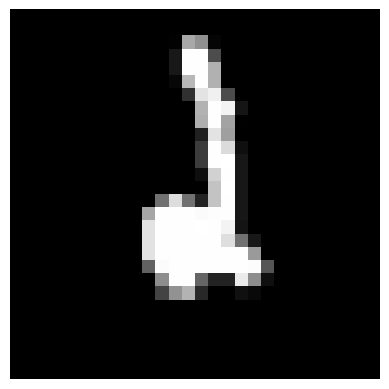

2 --- 2


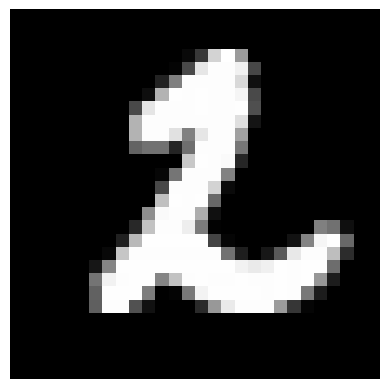

1 --- 1


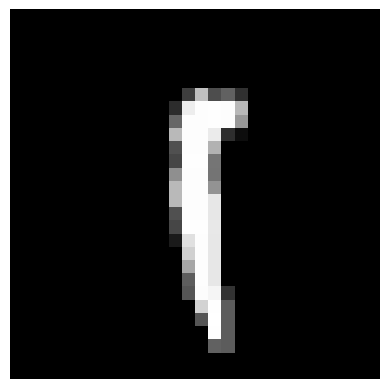

8 --- 8


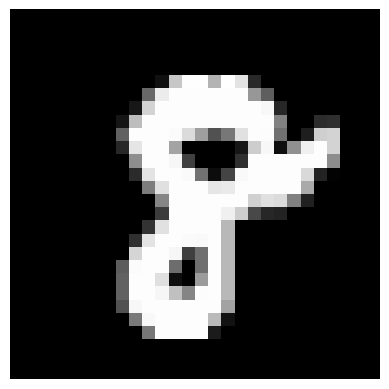

9 --- 9


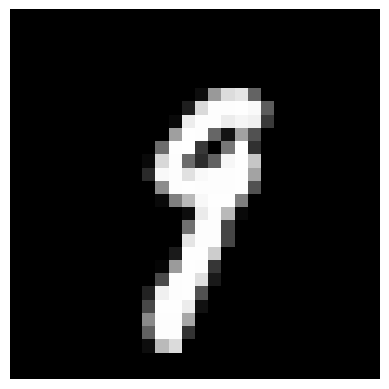

1 --- 1


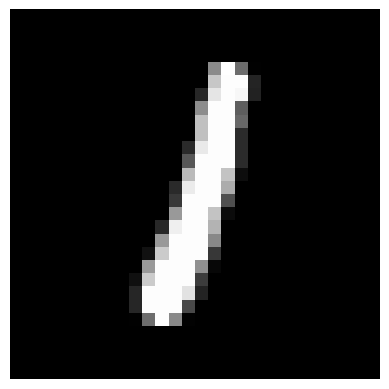

3 --- 3


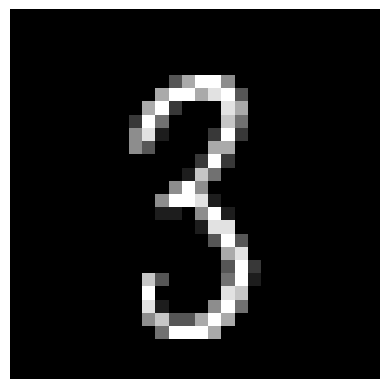

4 --- 4


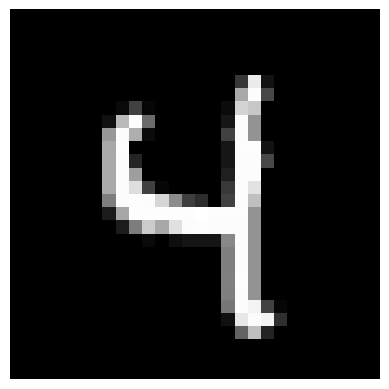

9 --- 9


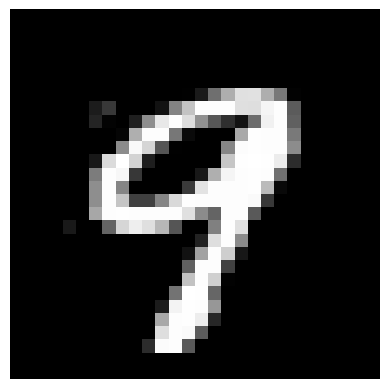

9 --- 9


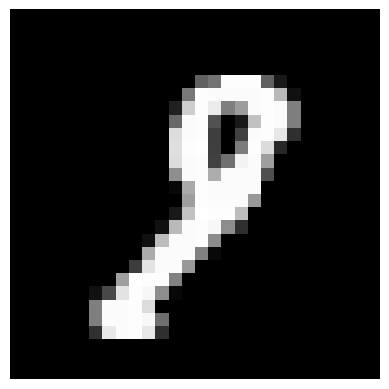

8 --- 8


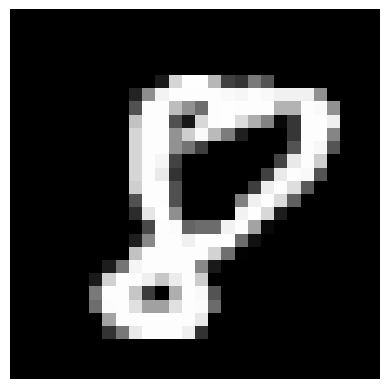

2 --- 2


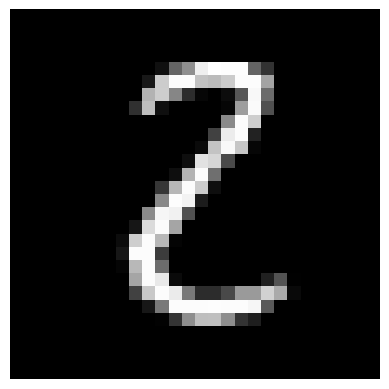

2 --- 2


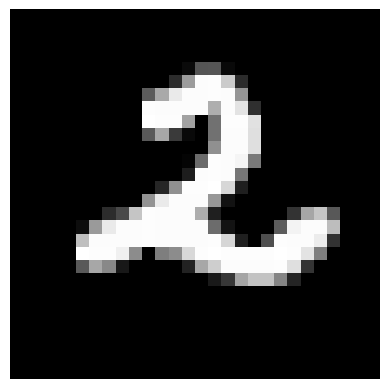

9 --- 9


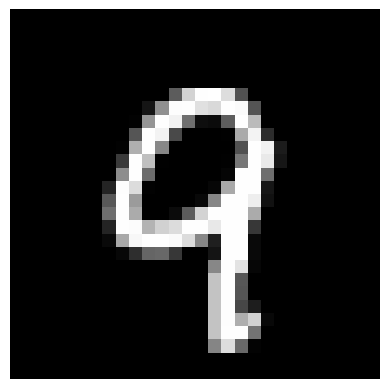

4 --- 4


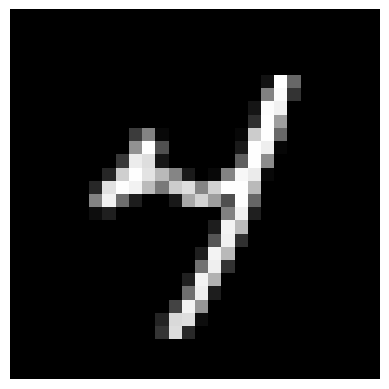

2 --- 2


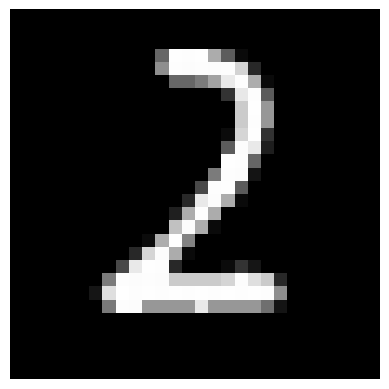

3 --- 3


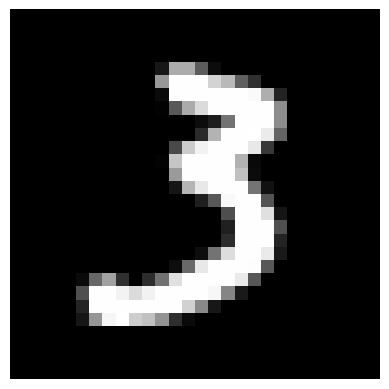

8 --- 8


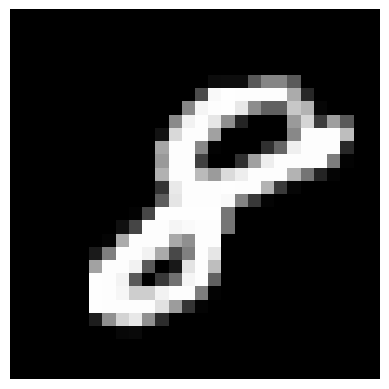

4 --- 4


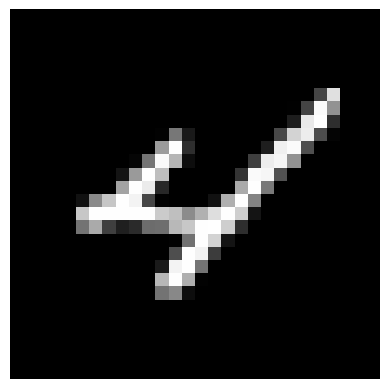

9 --- 9


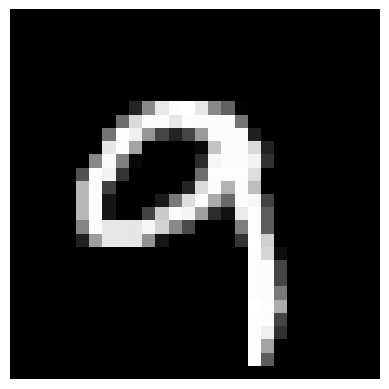

9 --- 9


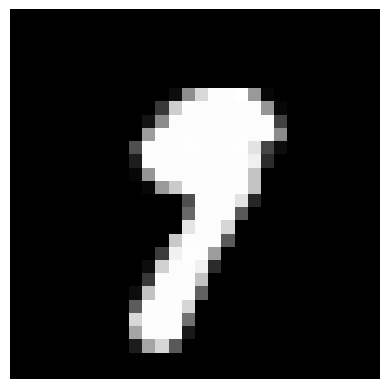

4 --- 4


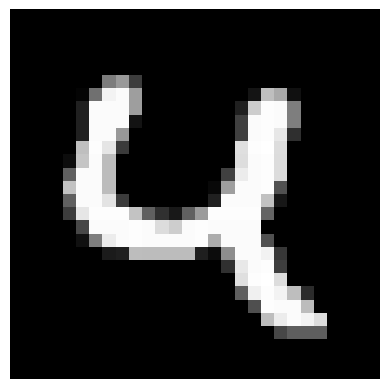

7 --- 7


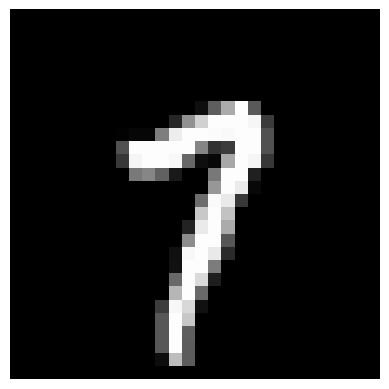

1 --- 1


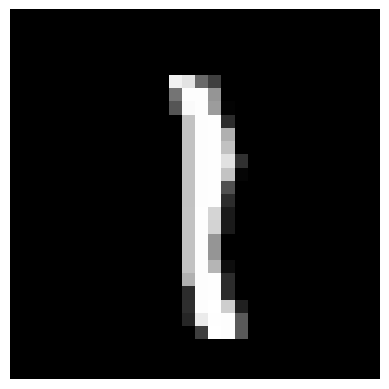

2 --- 2


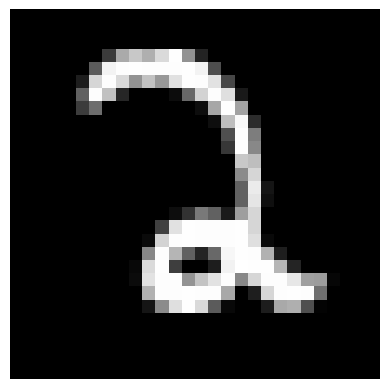

9 --- 9


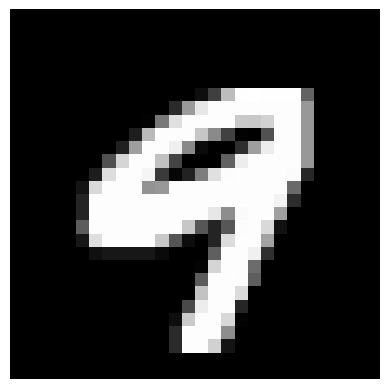

3 --- 3


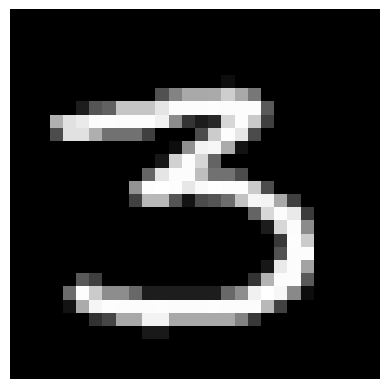

9 --- 9


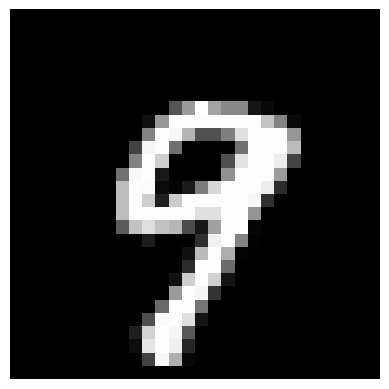

1 --- 1


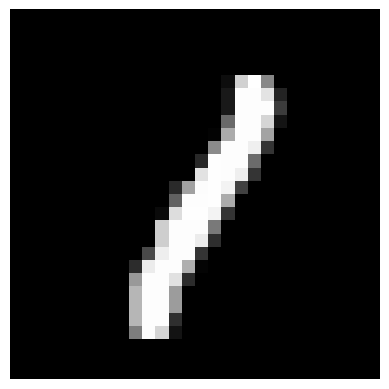

6 --- 6


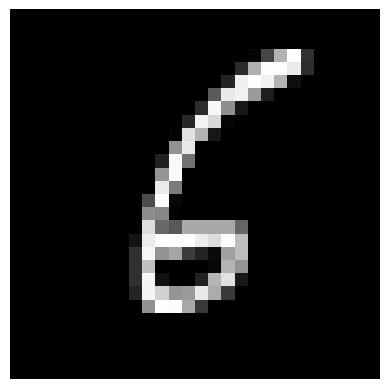

3 --- 3


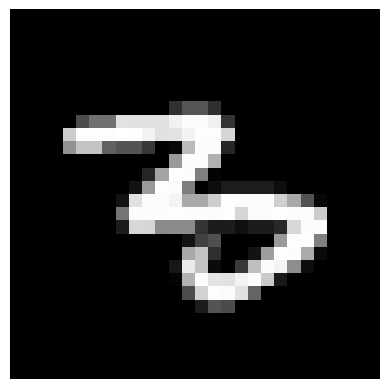

7 --- 7


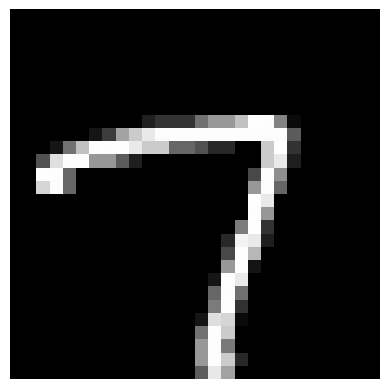

4 --- 4


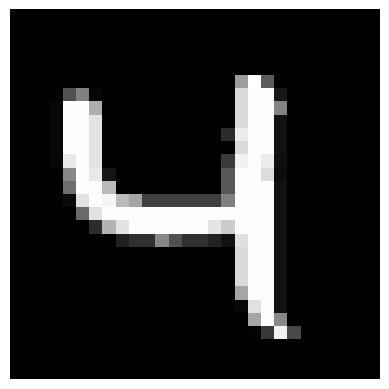

6 --- 6


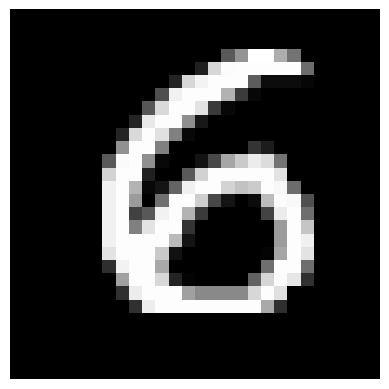

8 --- 8


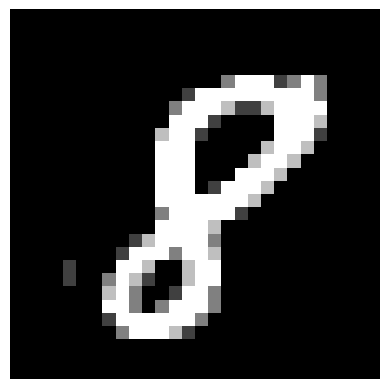

3 --- 3


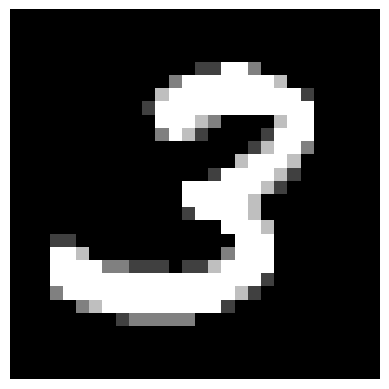

8 --- 8


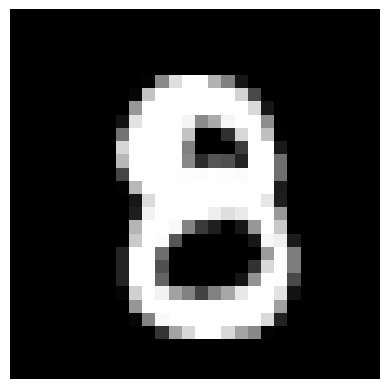

2 --- 2


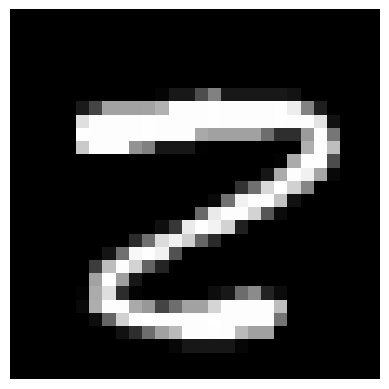

7 --- 7


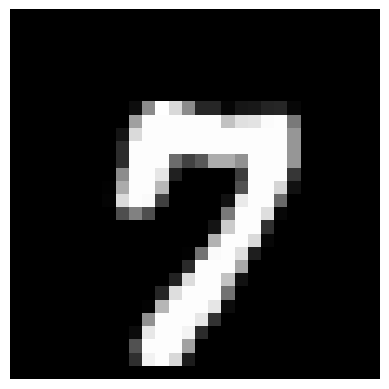

3 --- 3


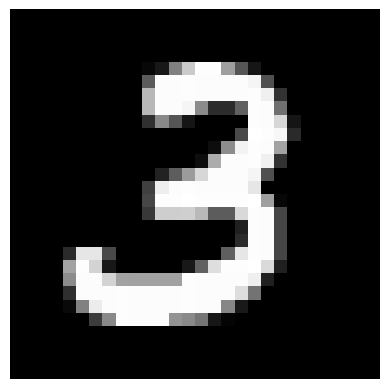

2 --- 2


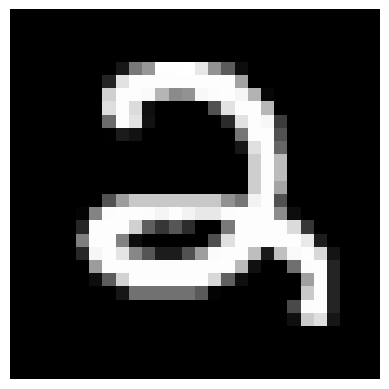

6 --- 6


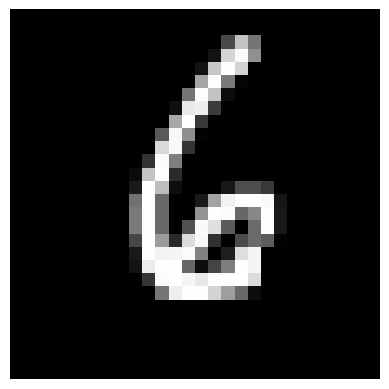

9 --- 9


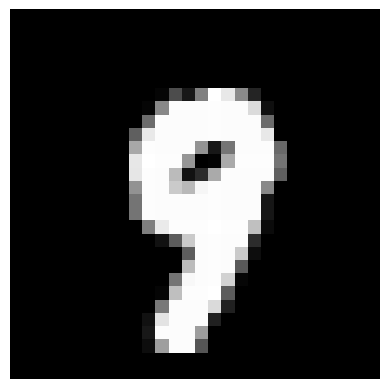

4 --- 4


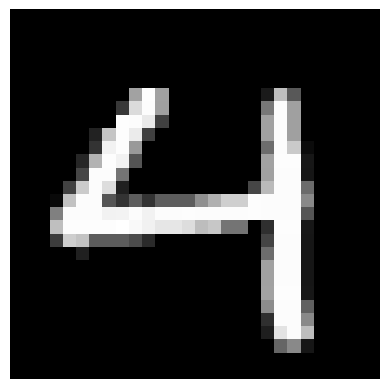

6 --- 6


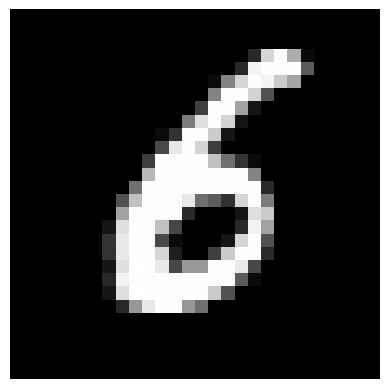

6 --- 6


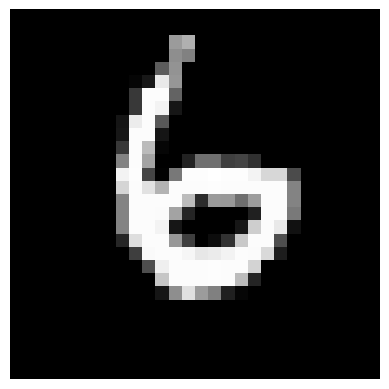

9 --- 9


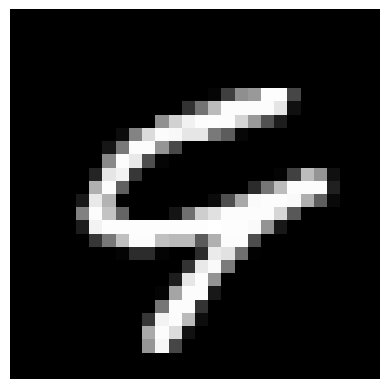

0 --- 0


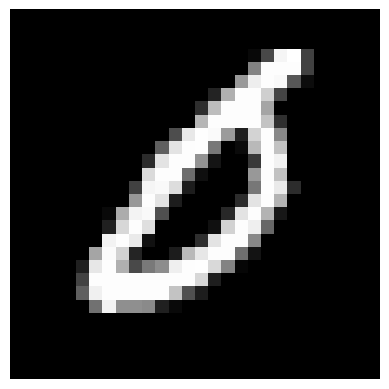

1 --- 1


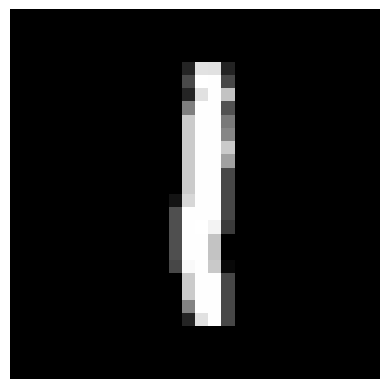

1 --- 1


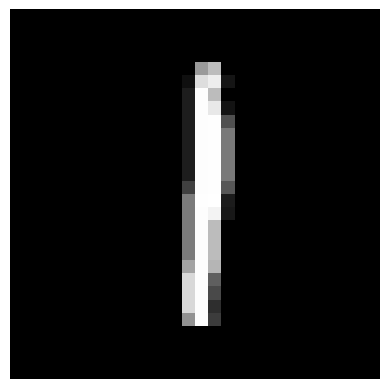

8 --- 8


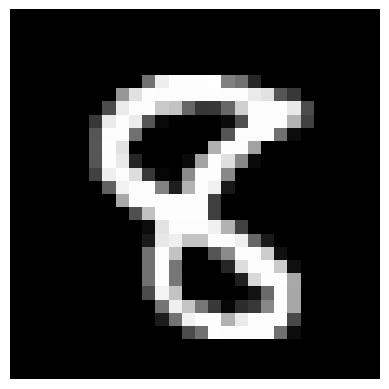

9 --- 9


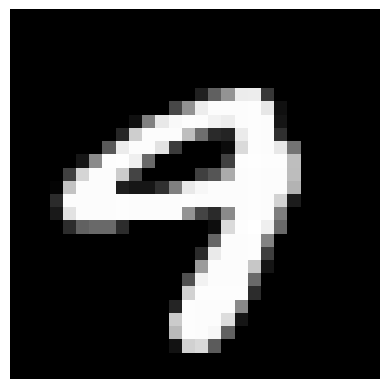

3 --- 3


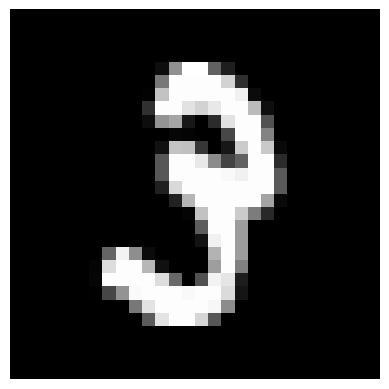

4 --- 4


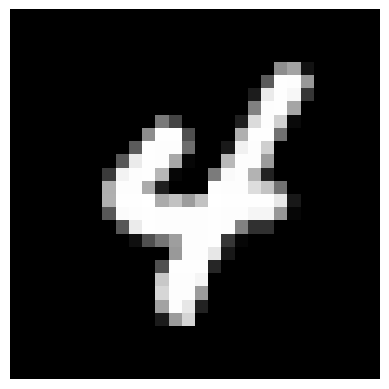

1 --- 1


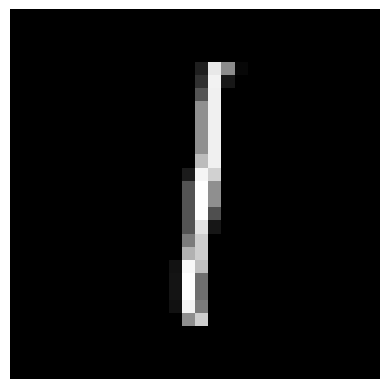

4 --- 4


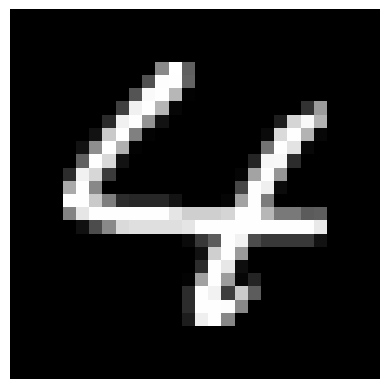

0 --- 0


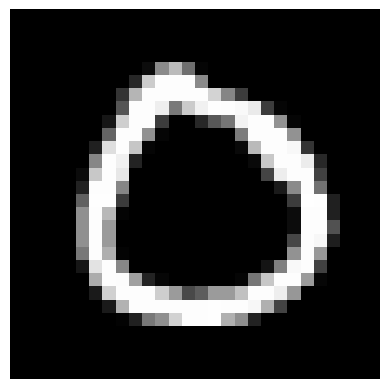

4 --- 4


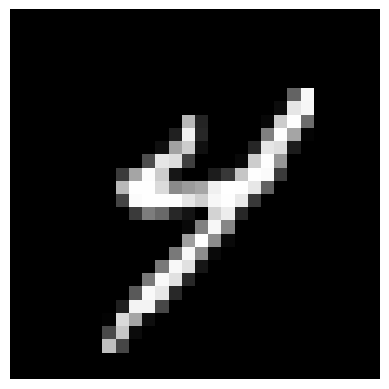

7 --- 7


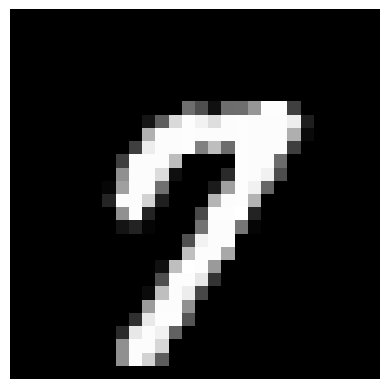

4 --- 4


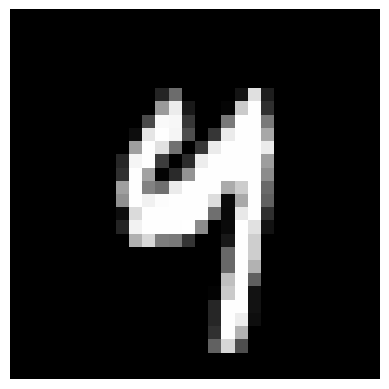

7 --- 7


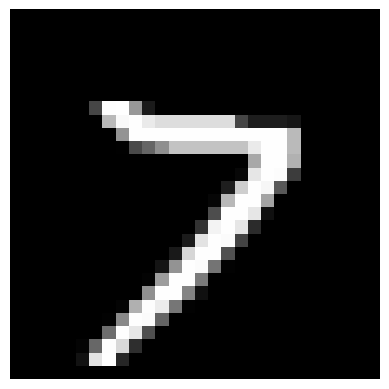

0 --- 0


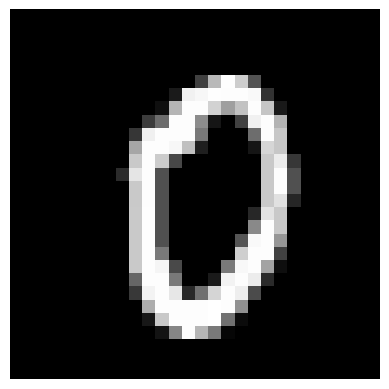

6 --- 6


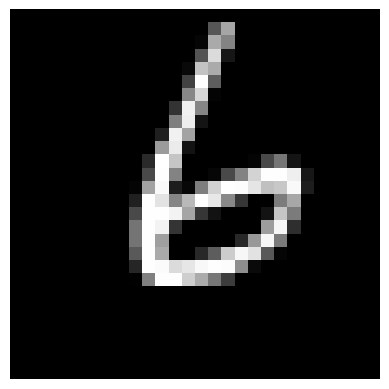

2 --- 2


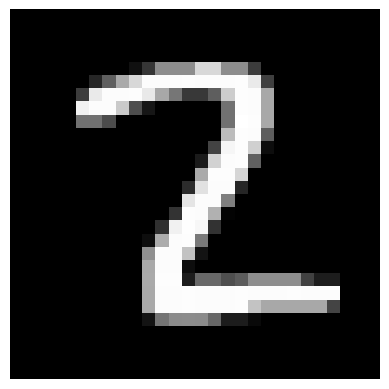

2 --- 2


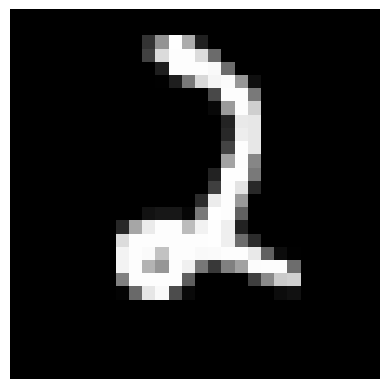

2 --- 2


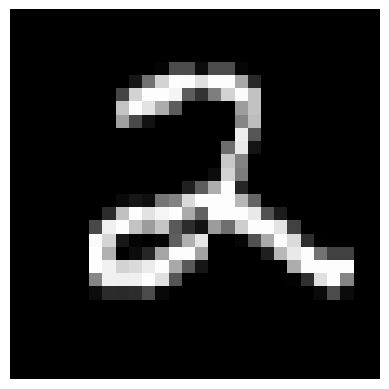

8 --- 8


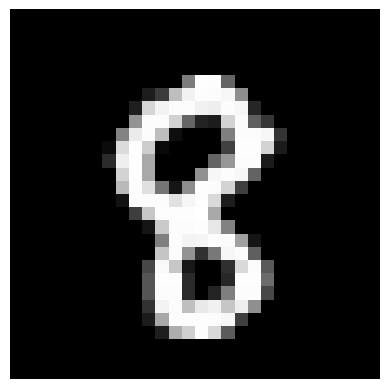

8 --- 8


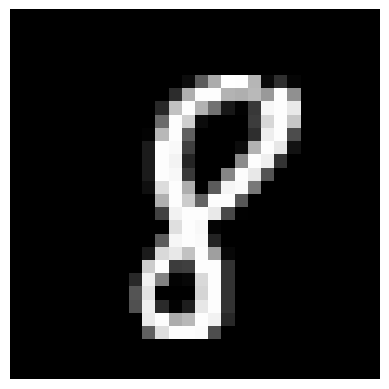

5 --- 5


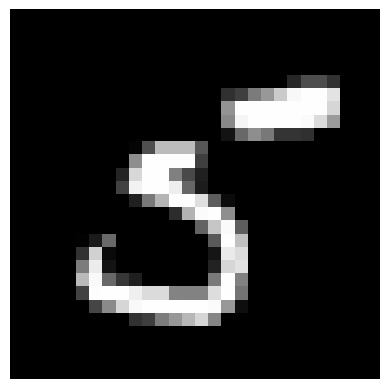

5 --- 5


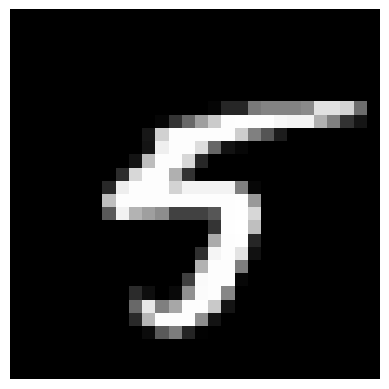

3 --- 3


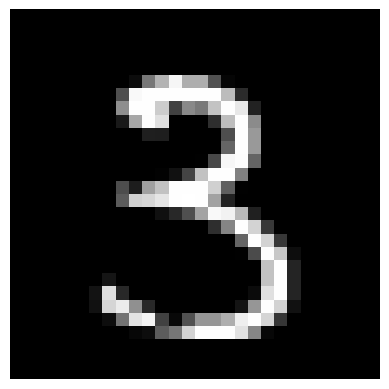

2 --- 2


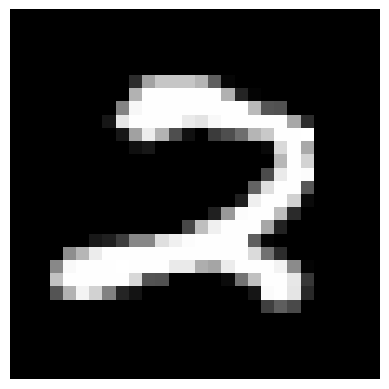

0 --- 0


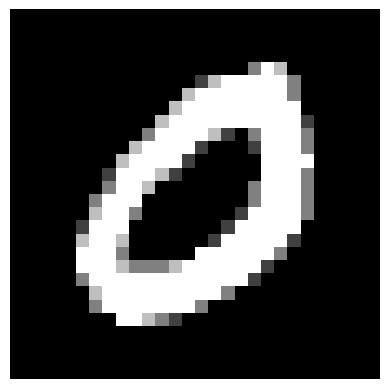

5 --- 5


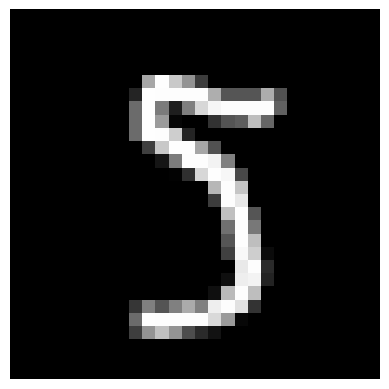

9 --- 9


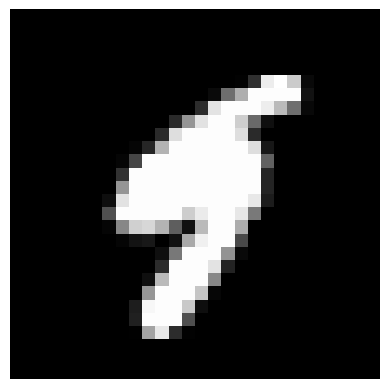

2 --- 2


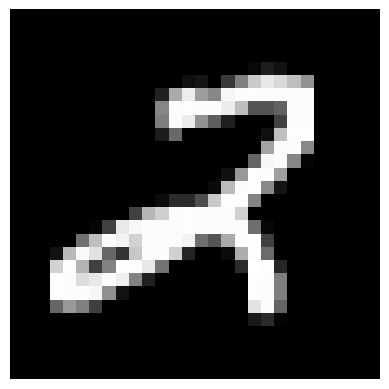

8 --- 8


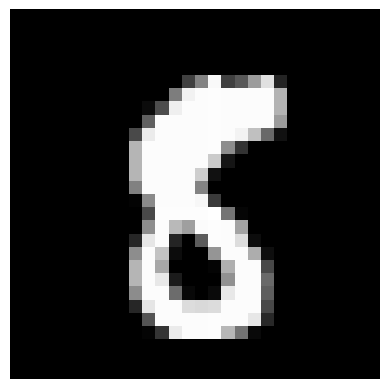

9 --- 9


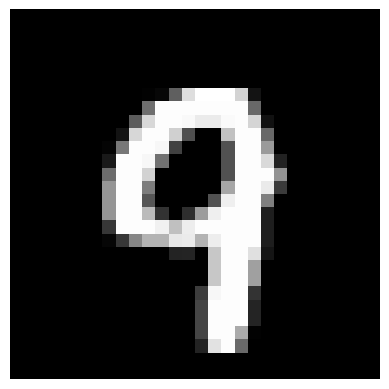

5 --- 5


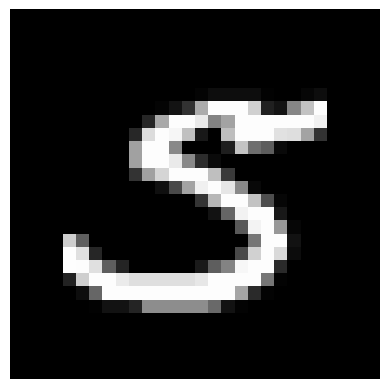

8 --- 8


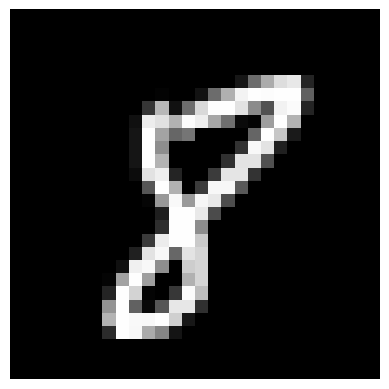

3 --- 3


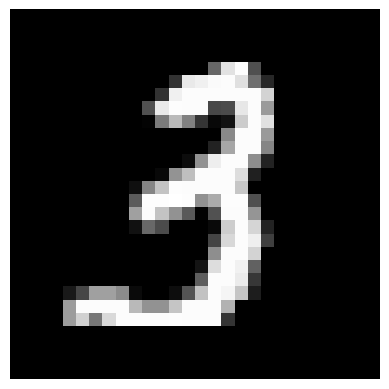

0 --- 0


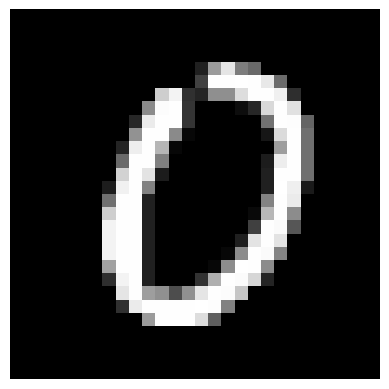

6 --- 6


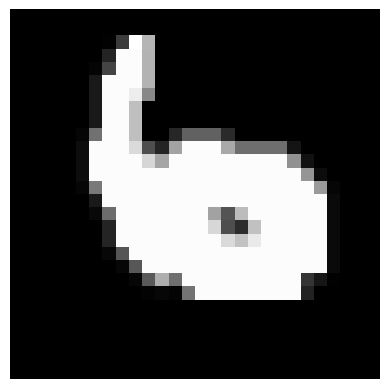

9 --- 9


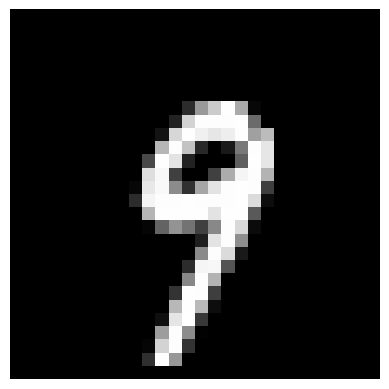

5 --- 5


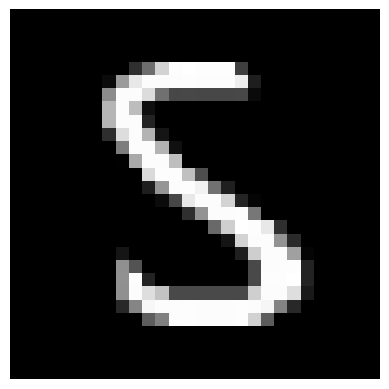

5 --- 5


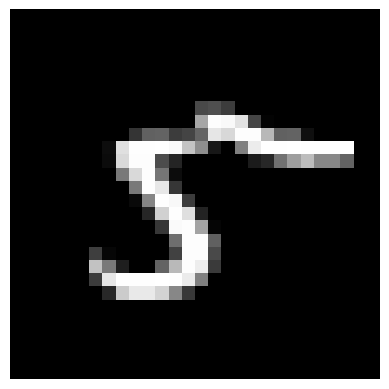

9 --- 9


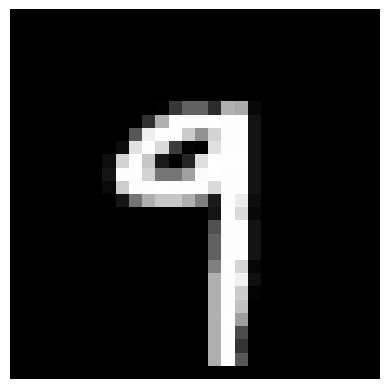

0 --- 0


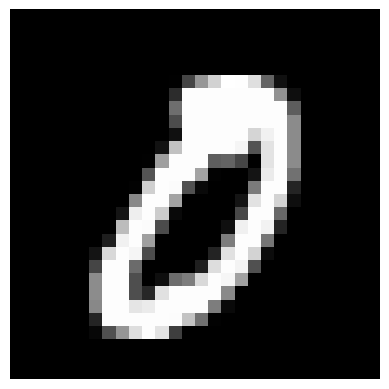

9 --- 9


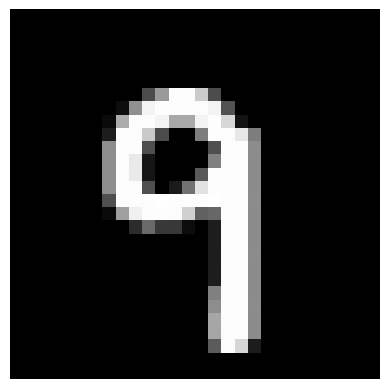

9 --- 9


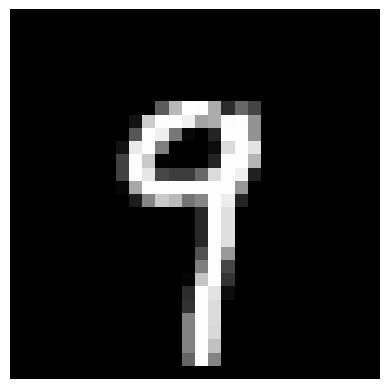

7 --- 7


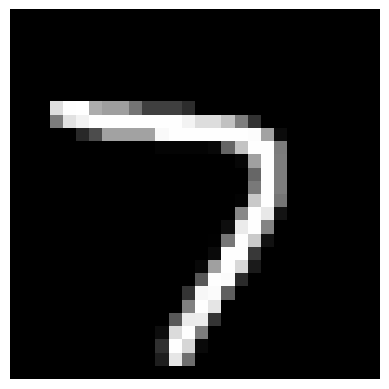

6 --- 6


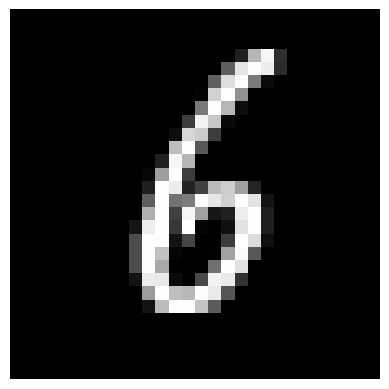

4 --- 4


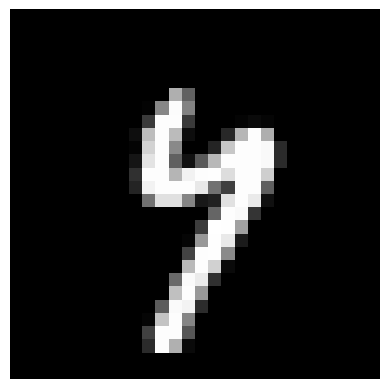

9 --- 9


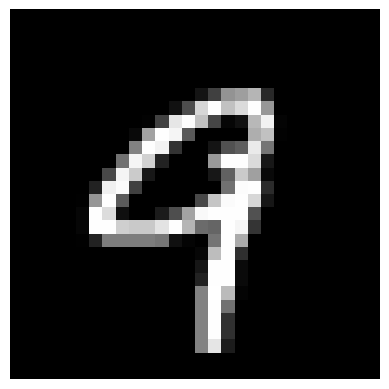

7 --- 7


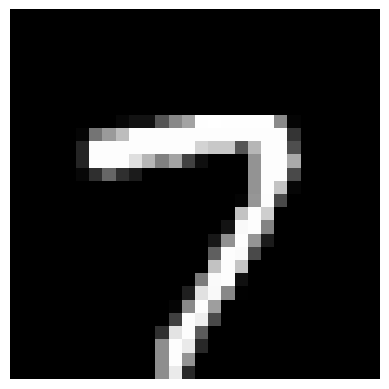

7 --- 7


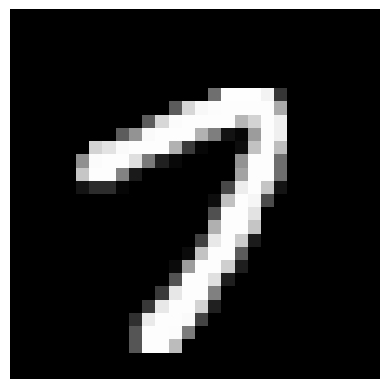

7 --- 7


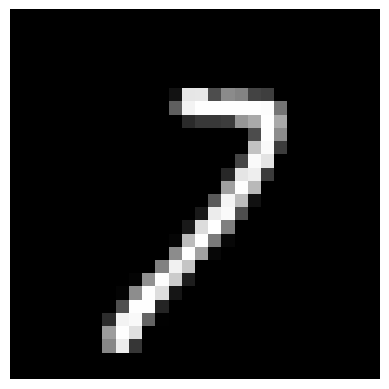

9 --- 9


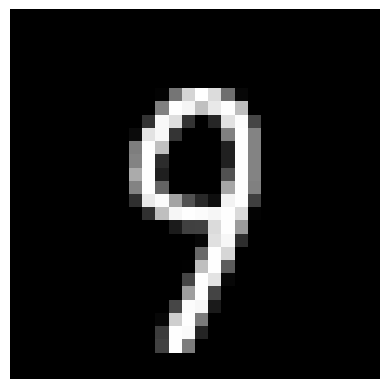

8 --- 8


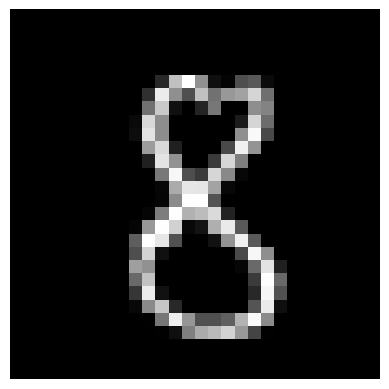

2 --- 2


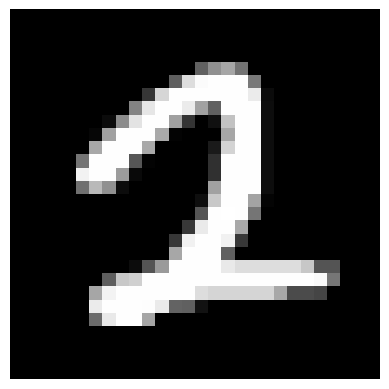

9 --- 9


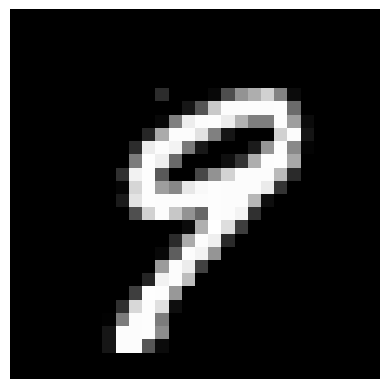

0 --- 0


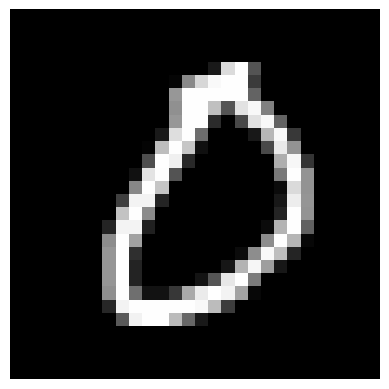

2 --- 2


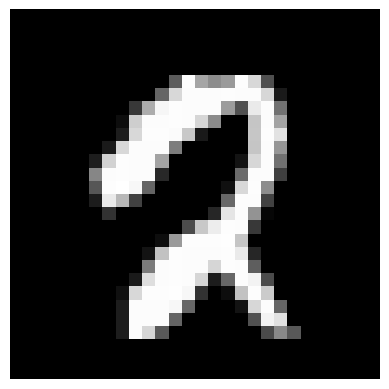

1 --- 1


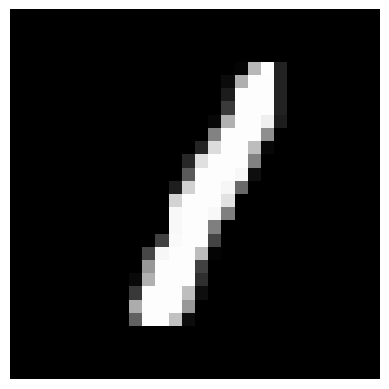

0 --- 0


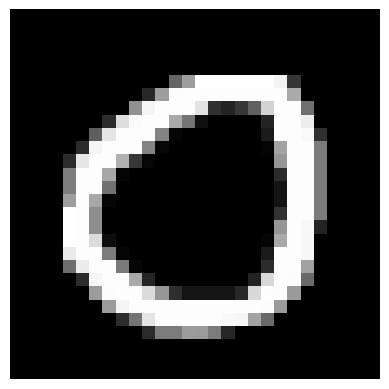

2 --- 2


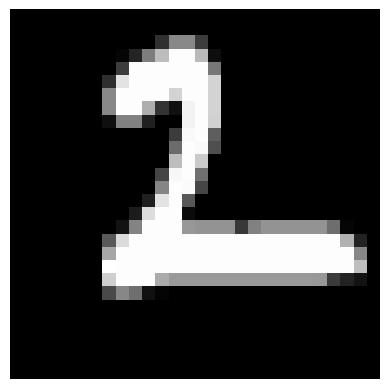

0 --- 0


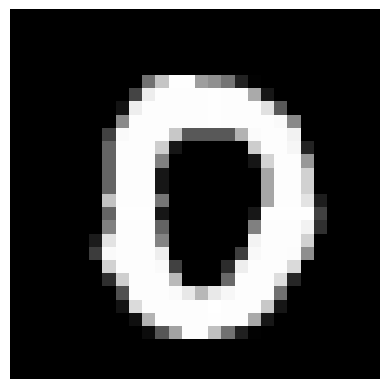

0 --- 0


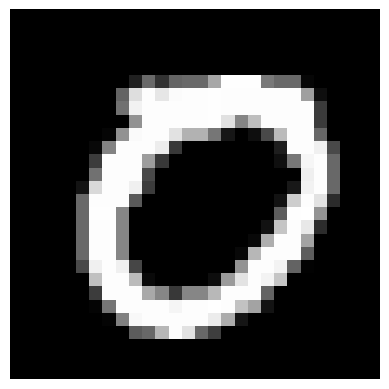

1 --- 1


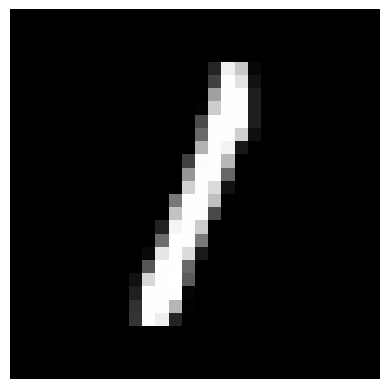

2 --- 2


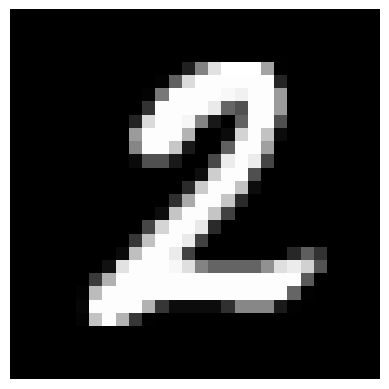

9 --- 9


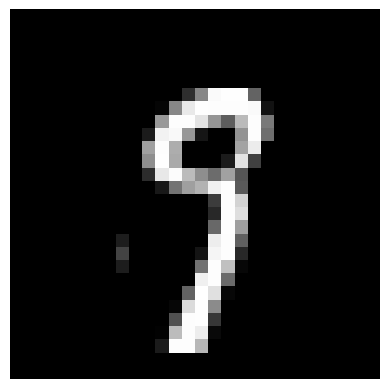

5 --- 5


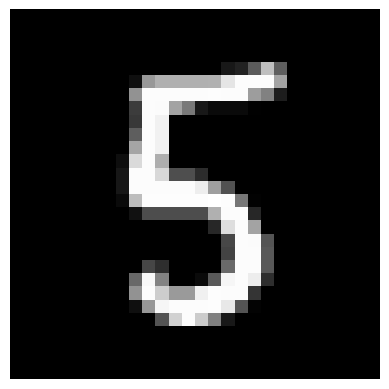

1 --- 1


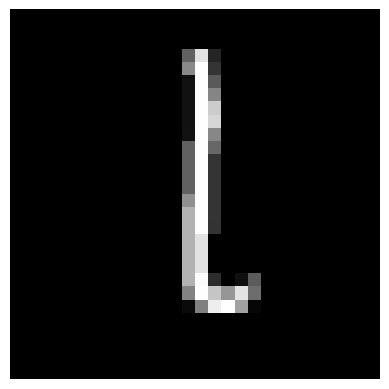

4 --- 4


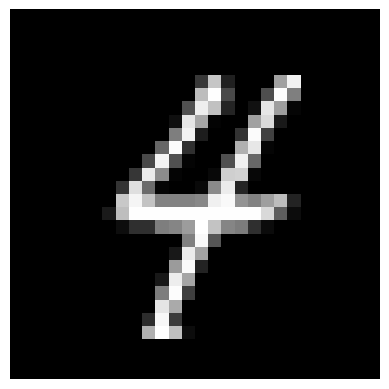

9 --- 9


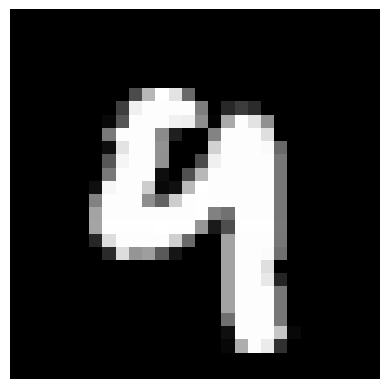

4 --- 4


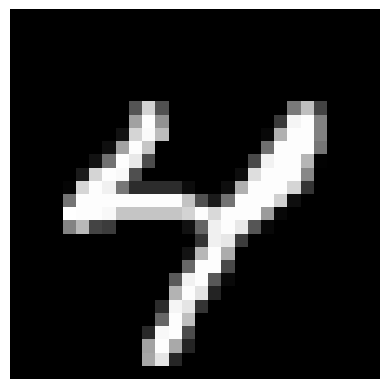

7 --- 7


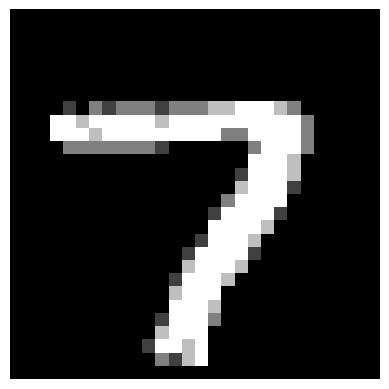

8 --- 8


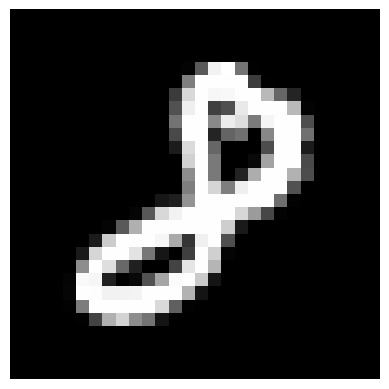

0 --- 0


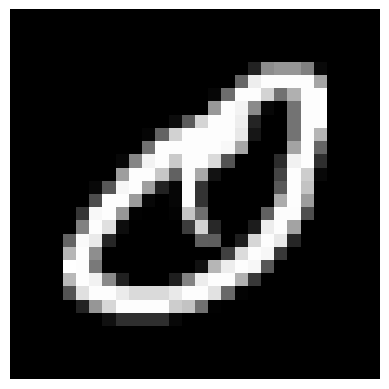

0 --- 0


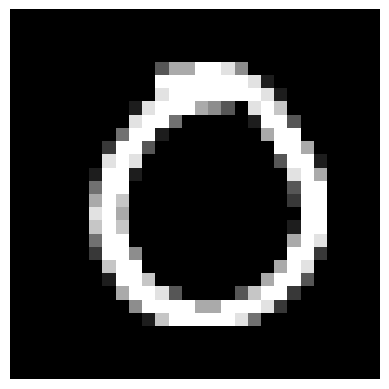

0 --- 0


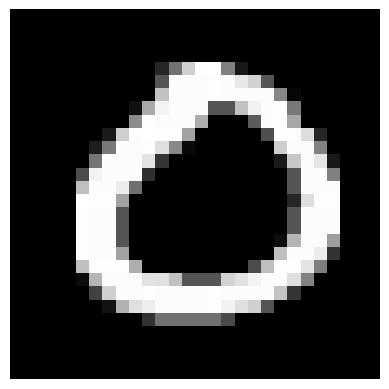

8 --- 8


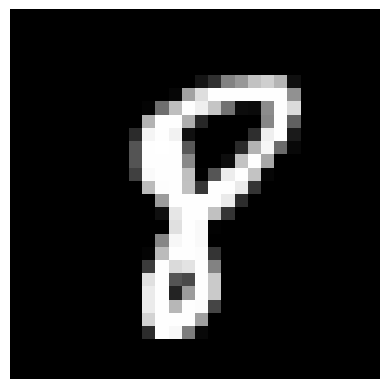

6 --- 6


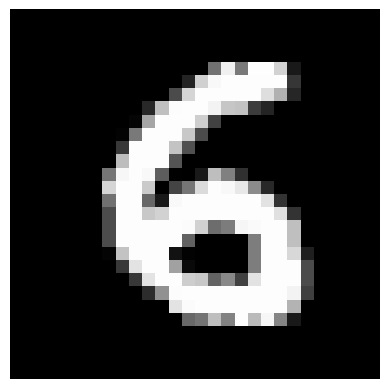

3 --- 3


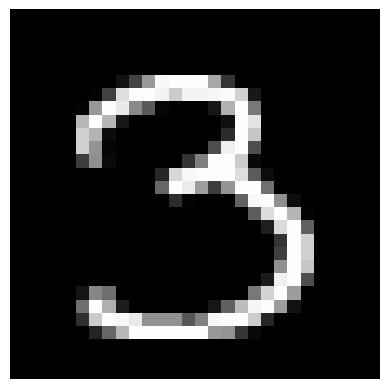

1 --- 1


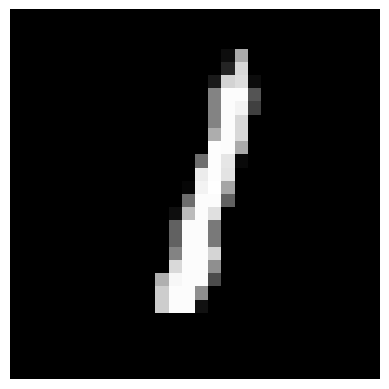

1 --- 7


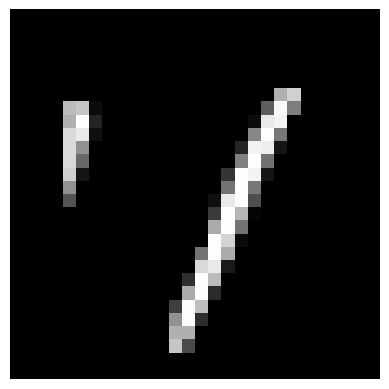

1 --- 1


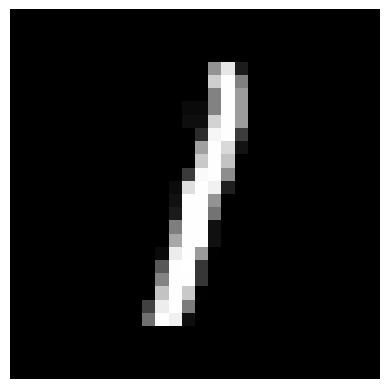

4 --- 4


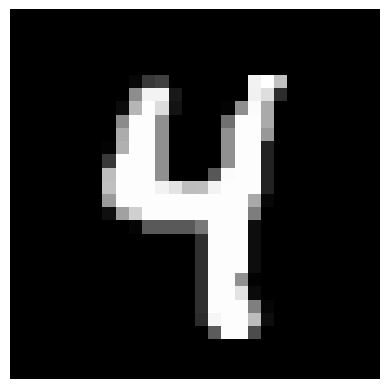

3 --- 3


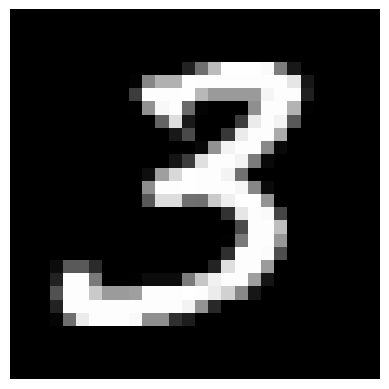

1 --- 1


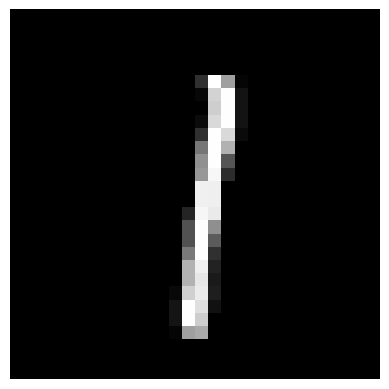

9 --- 9


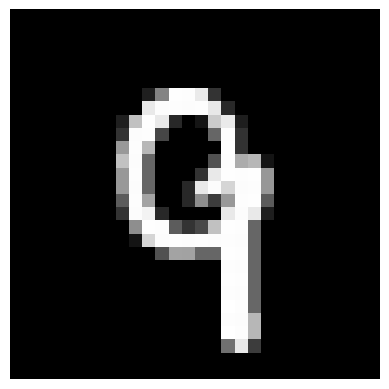

7 --- 7


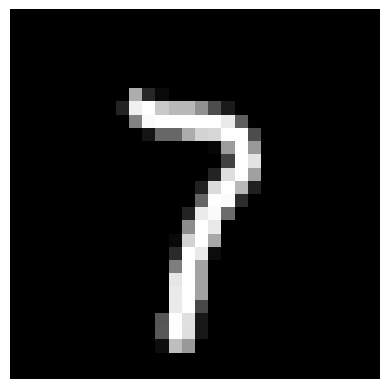

2 --- 2


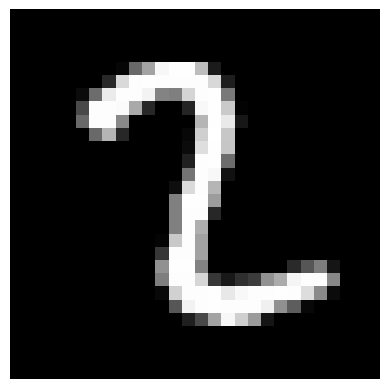

9 --- 9


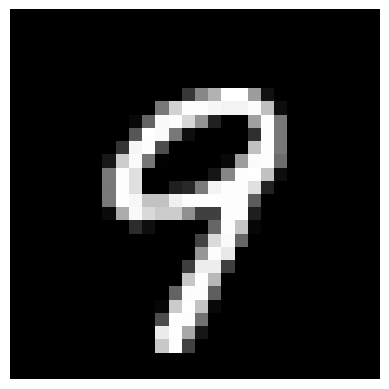

8 --- 8


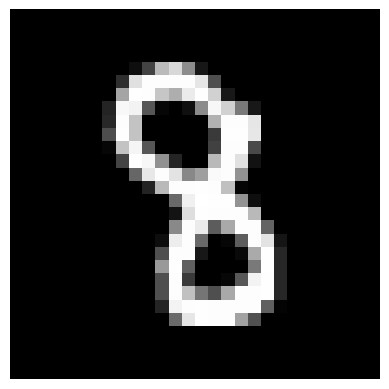

3 --- 3


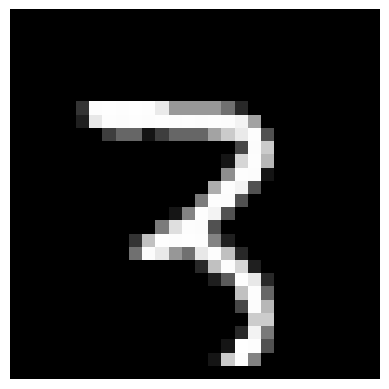

7 --- 7


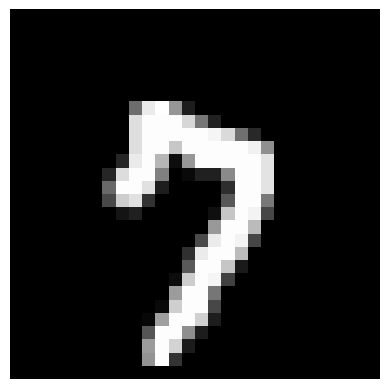

6 --- 6


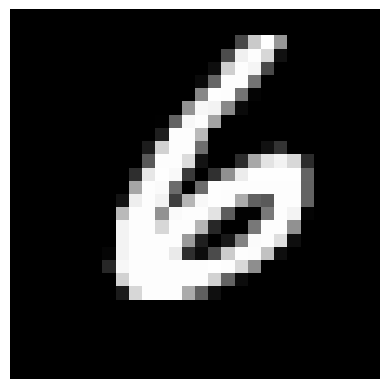

0 --- 0


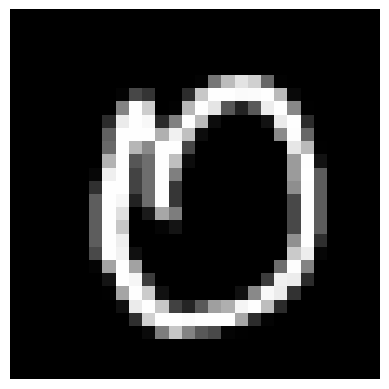

3 --- 3


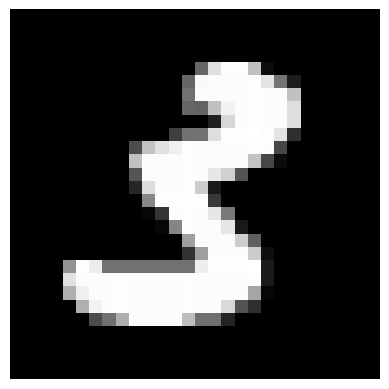

0 --- 0


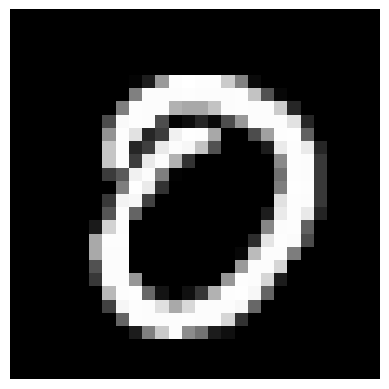

6 --- 6


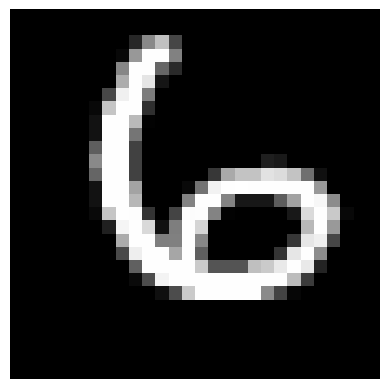

8 --- 8


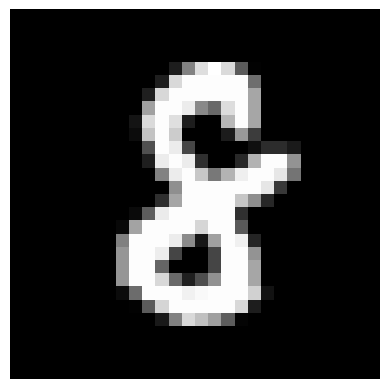

8 --- 8


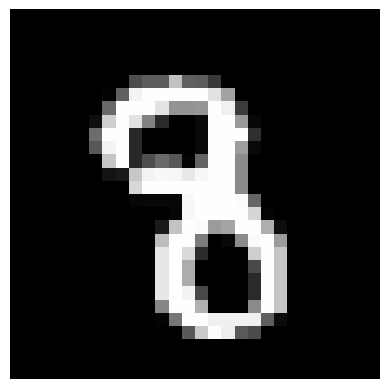

3 --- 3


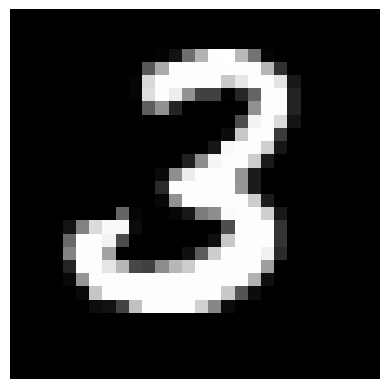

4 --- 4


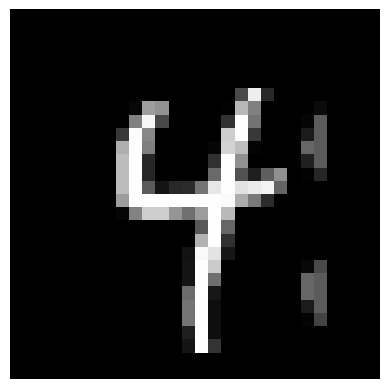

0 --- 0


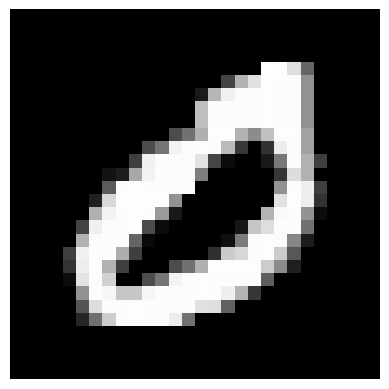

6 --- 6


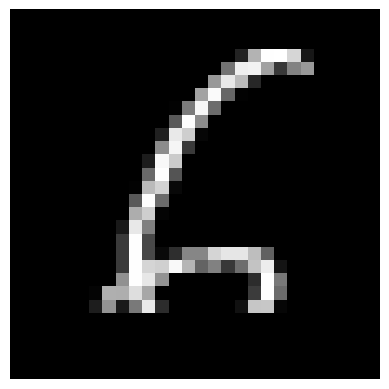

7 --- 7


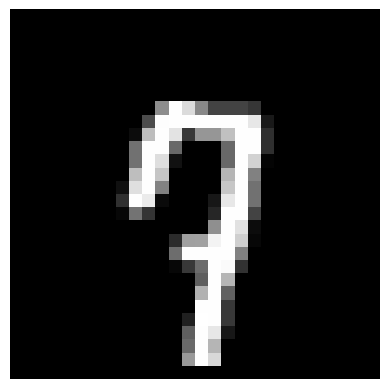

7 --- 7


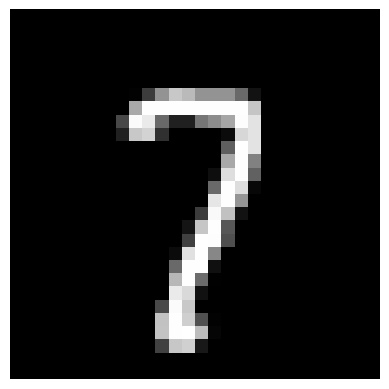

3 --- 3


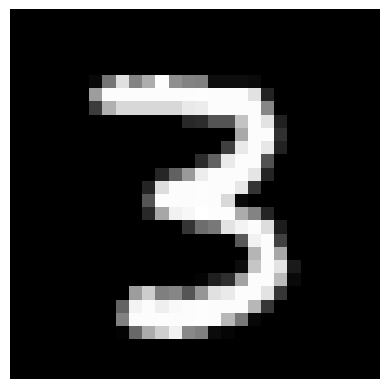

7 --- 7


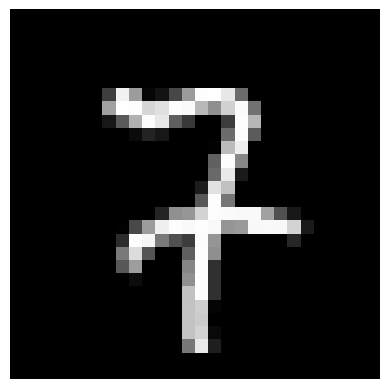

5 --- 5


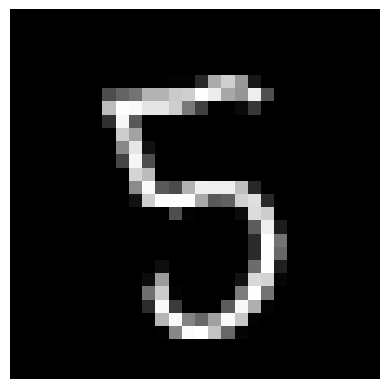

0 --- 0


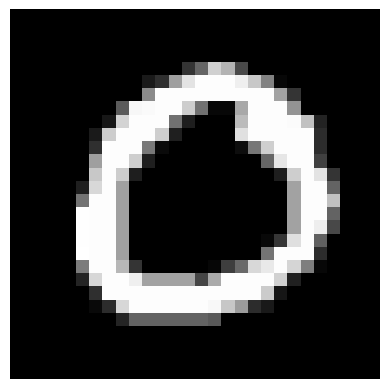

9 --- 9


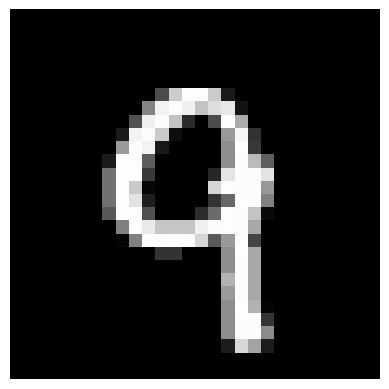

4 --- 4


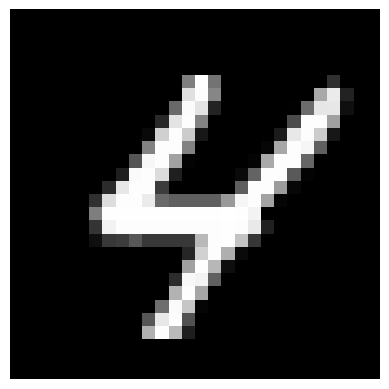

0 --- 0


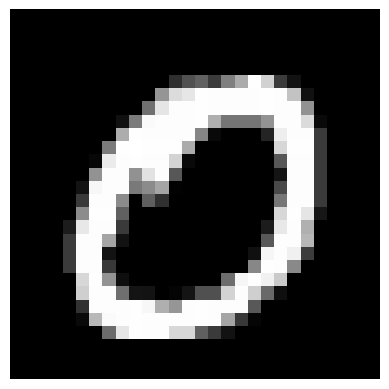

2 --- 2


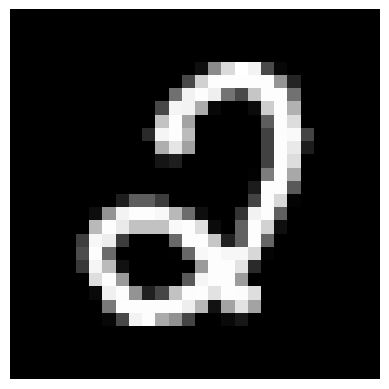

9 --- 9


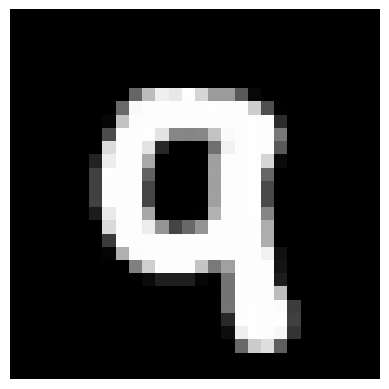

5 --- 5


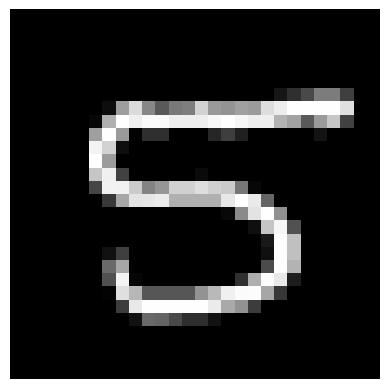

5 --- 5


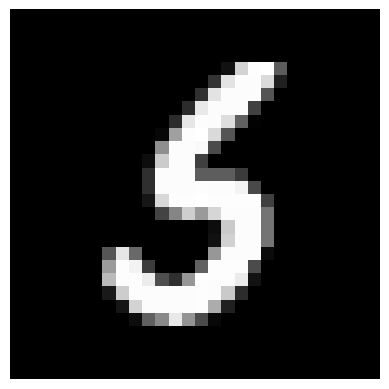

1 --- 1


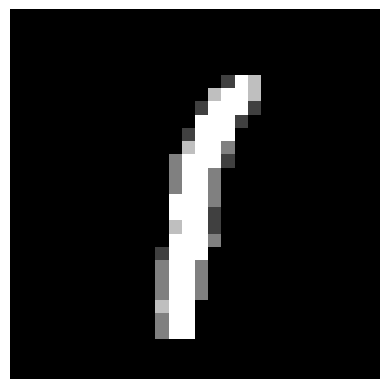

9 --- 9


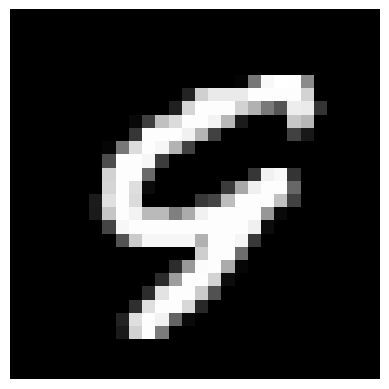

7 --- 7


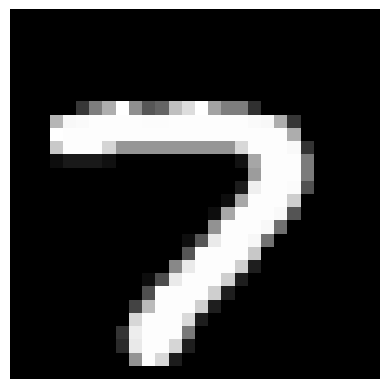

1 --- 1


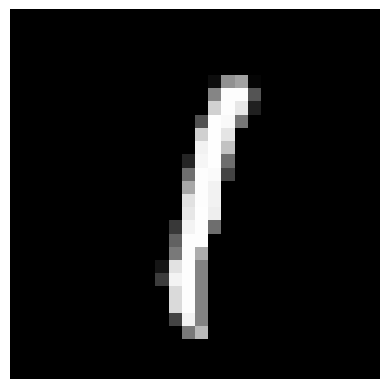

5 --- 5


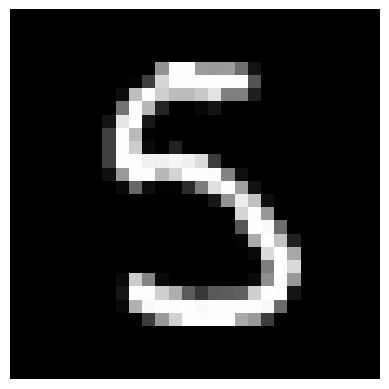

6 --- 6


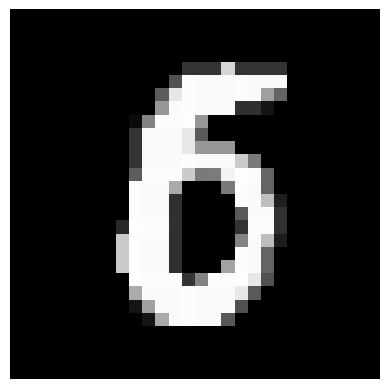

7 --- 7


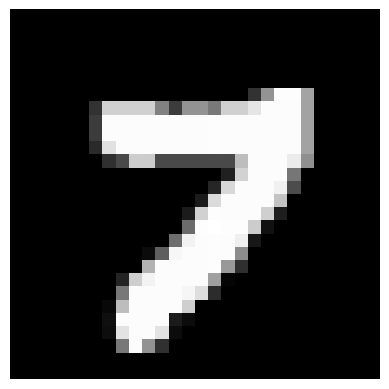

9 --- 9


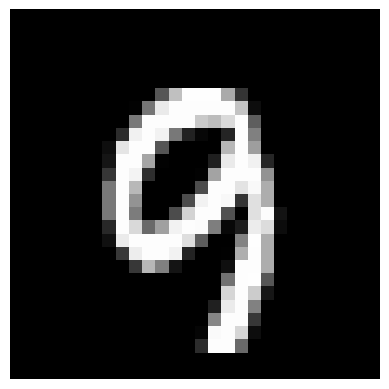

0 --- 0


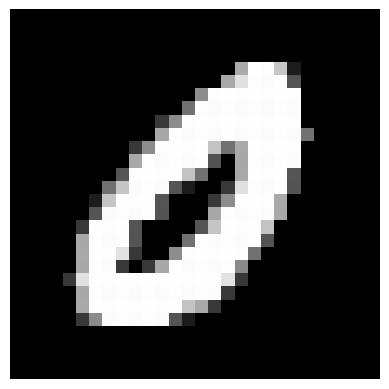

6 --- 6


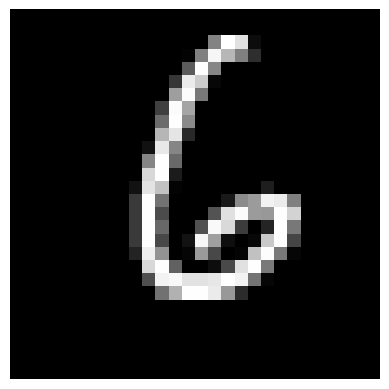

3 --- 3


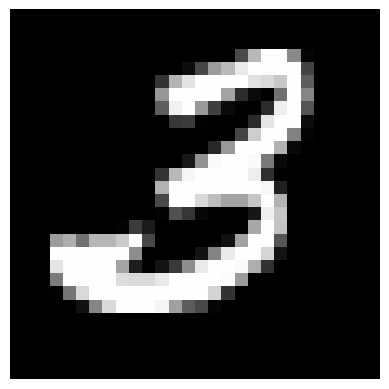

2 --- 2


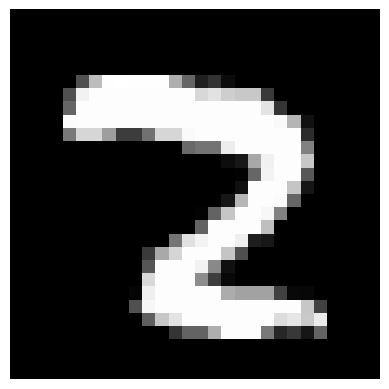

2 --- 2


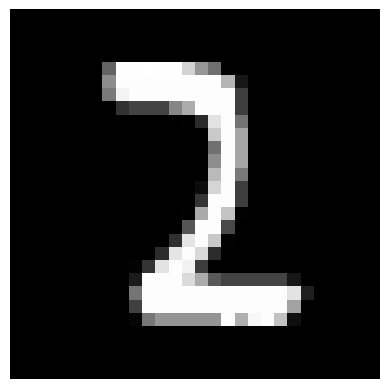

4 --- 4


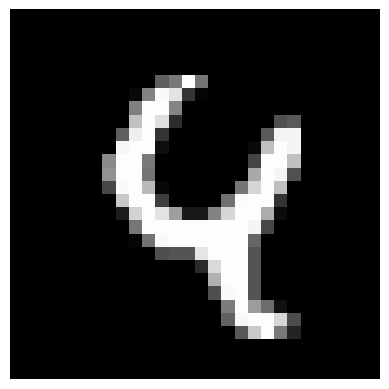

7 --- 7


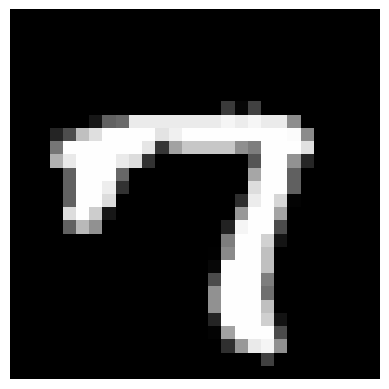

6 --- 6


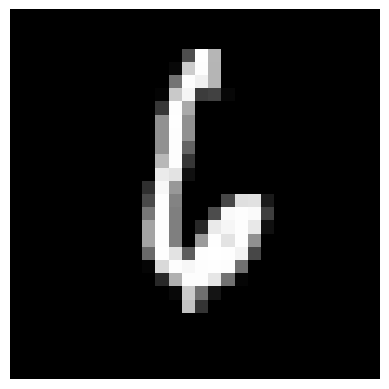

8 --- 8


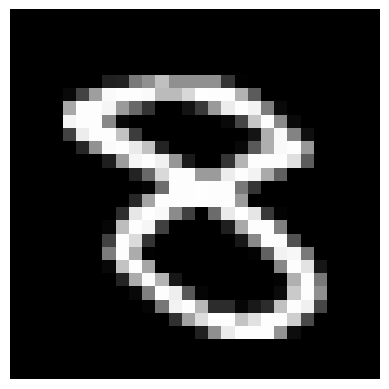

2 --- 2


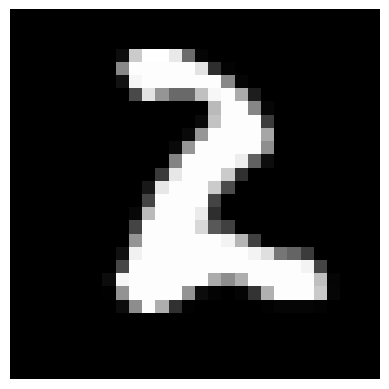

4 --- 4


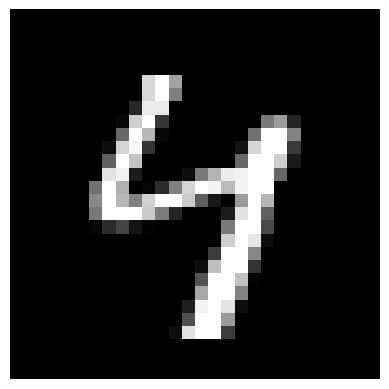

7 --- 7


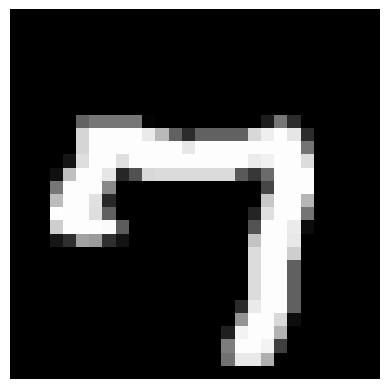

9 --- 9


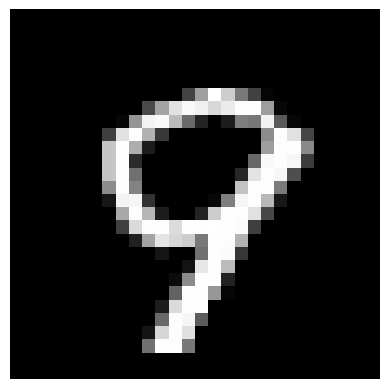

2 --- 2


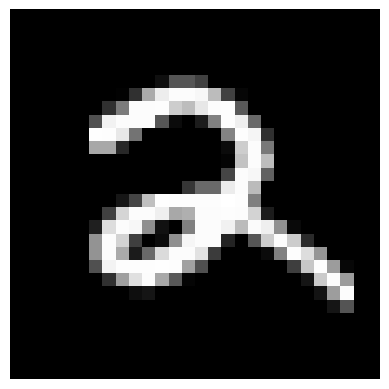

2 --- 2


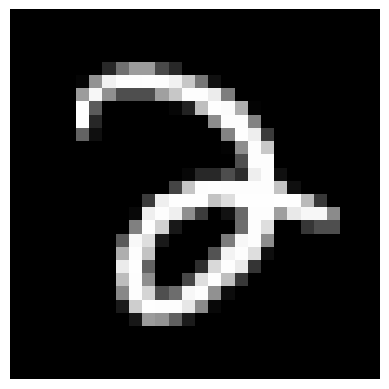

0 --- 0


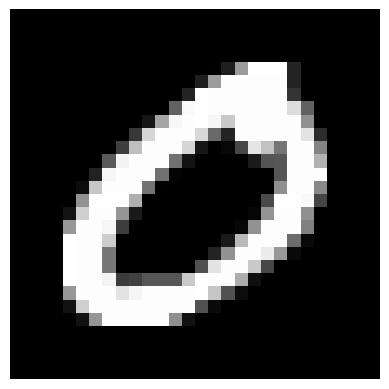

3 --- 3


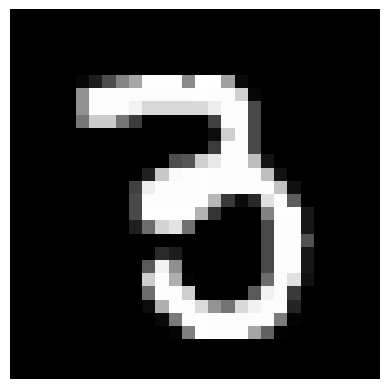

0 --- 0


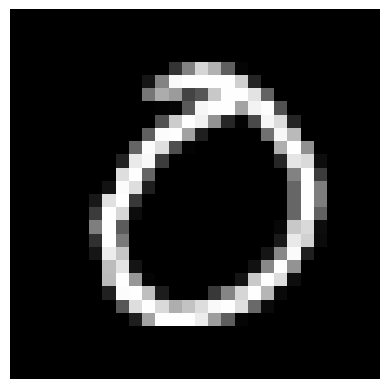

9 --- 9


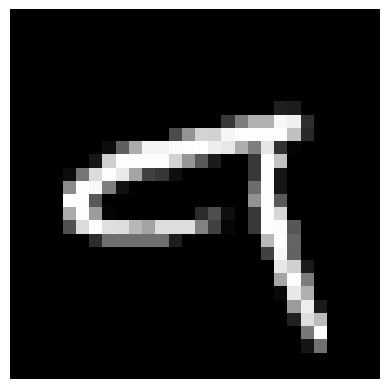

7 --- 7


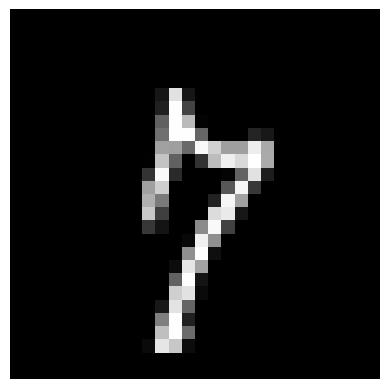

6 --- 6


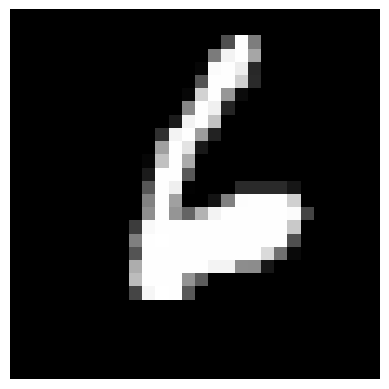

1 --- 1


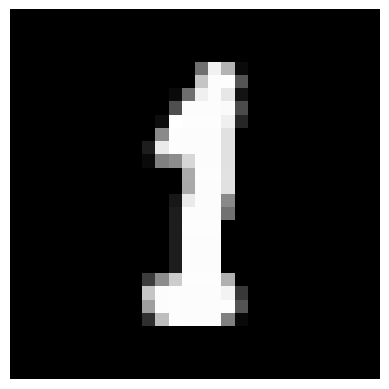

9 --- 9


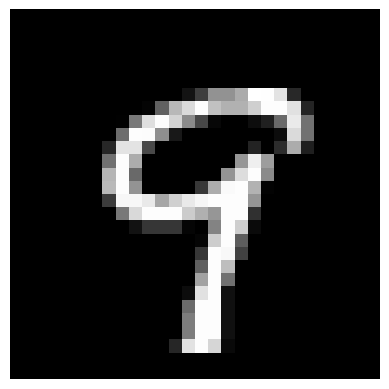

4 --- 4


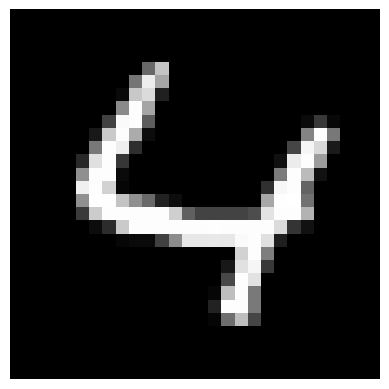

4 --- 4


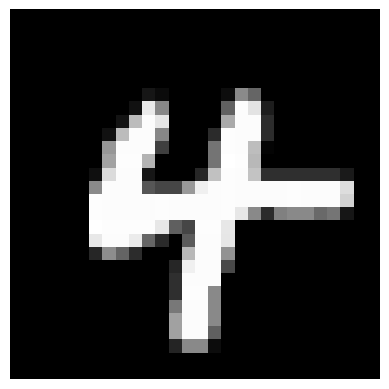

1 --- 1


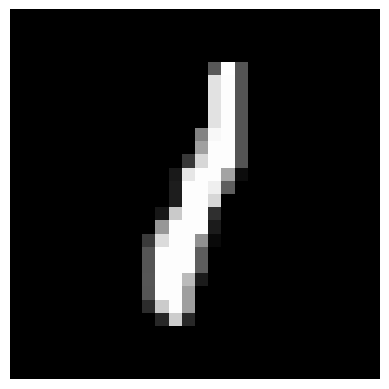

9 --- 9


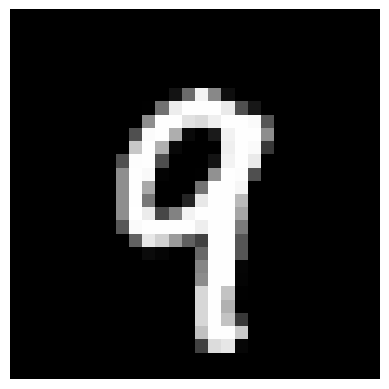

0 --- 0


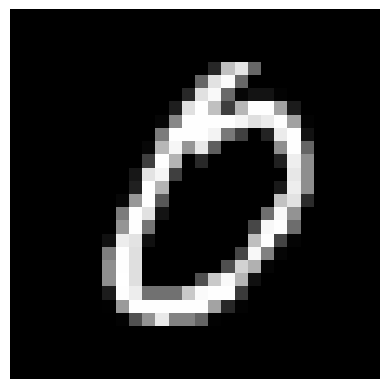

2 --- 2


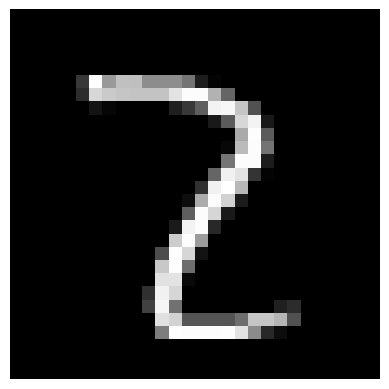

2 --- 2


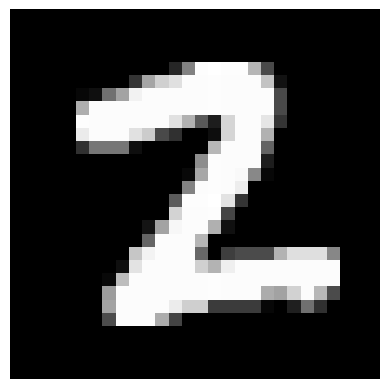

0 --- 0


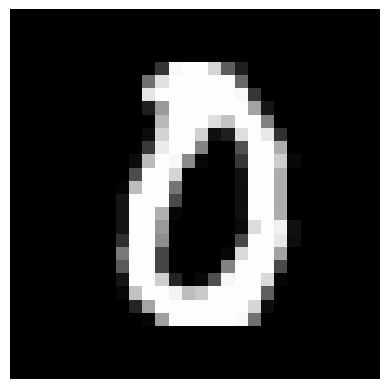

7 --- 7


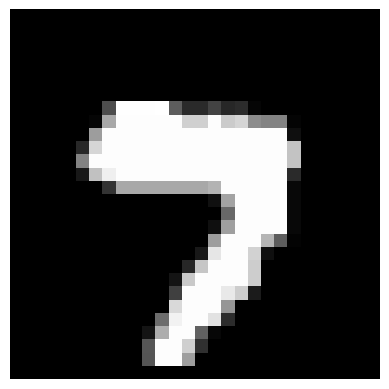

0 --- 0


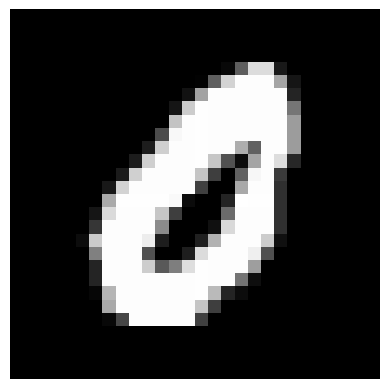

3 --- 3


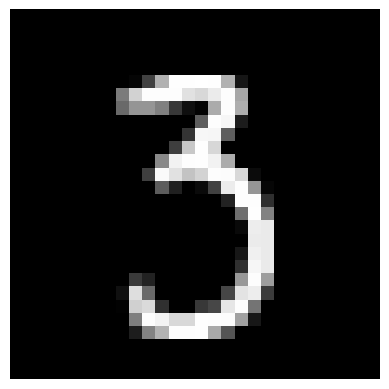

7 --- 7


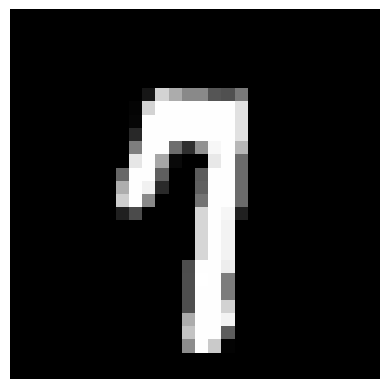

3 --- 3


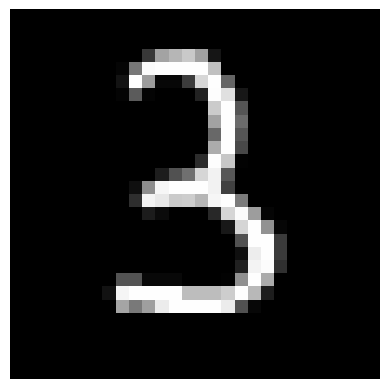

7 --- 7


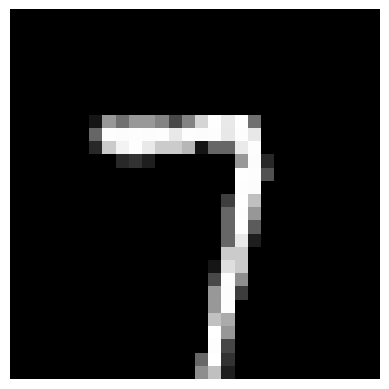

9 --- 9


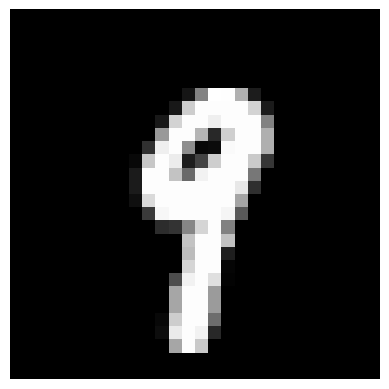

7 --- 7


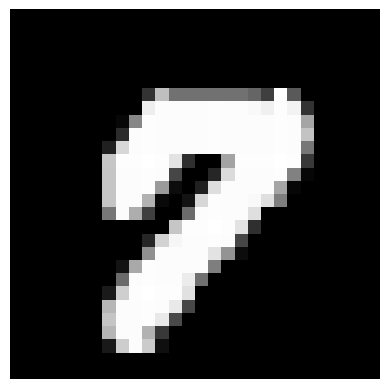

1 --- 1


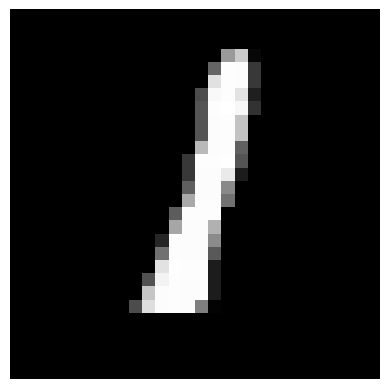

6 --- 6


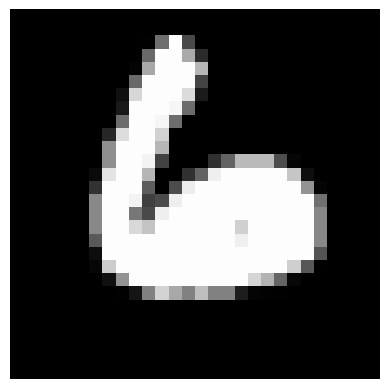

6 --- 6


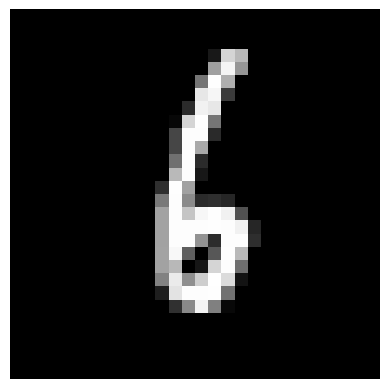

2 --- 2


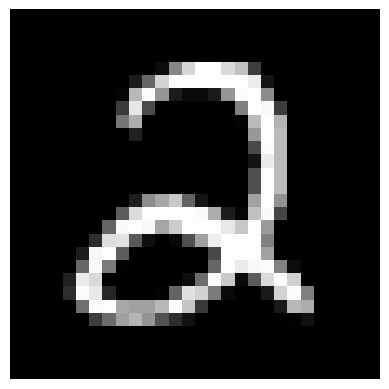

4 --- 4


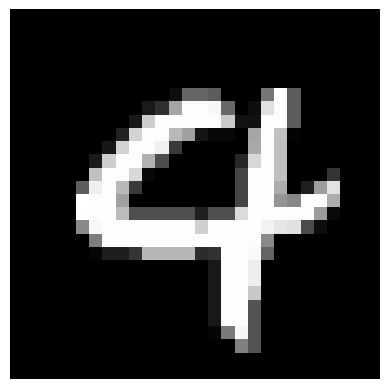

5 --- 5


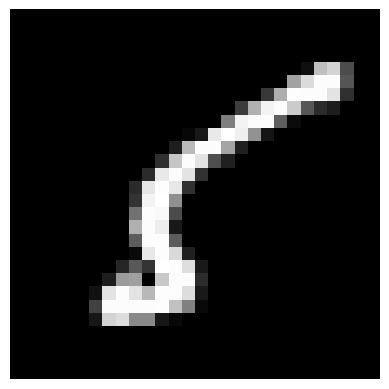

2 --- 4


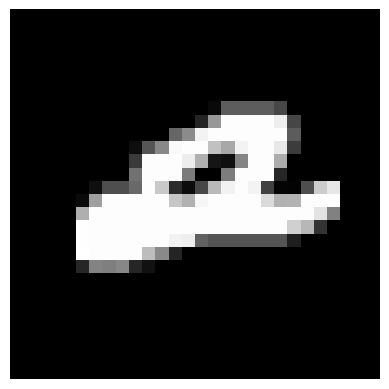

4 --- 4


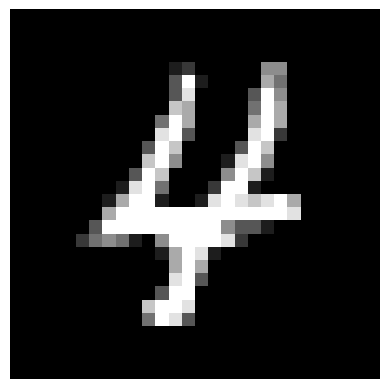

0 --- 0


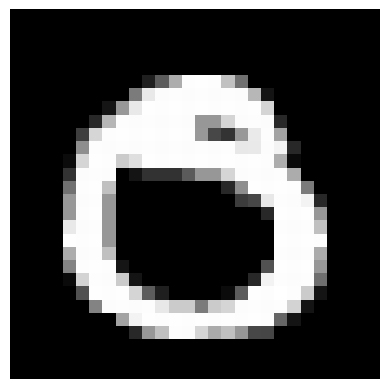

4 --- 4


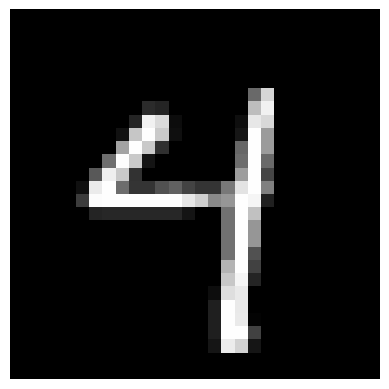

3 --- 3


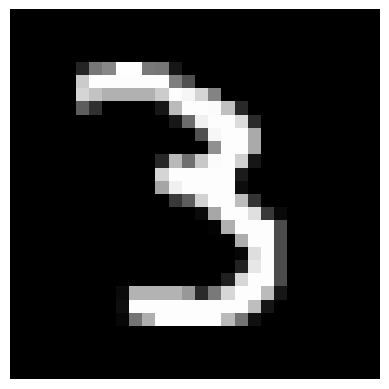

2 --- 2


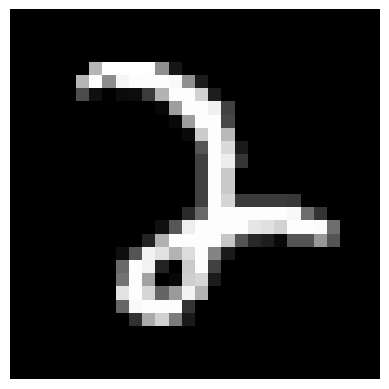

1 --- 1


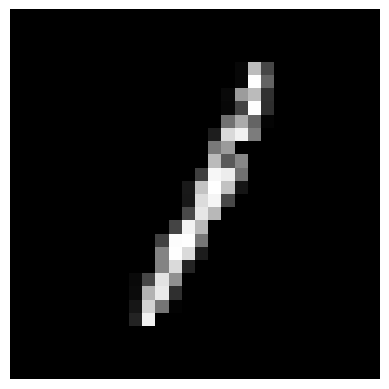

1 --- 1


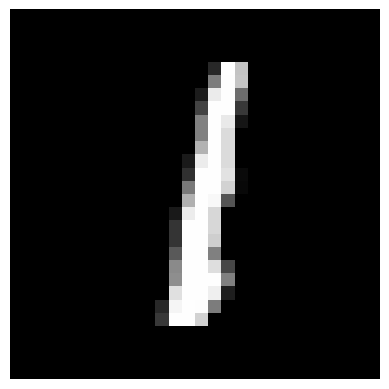

1 --- 1


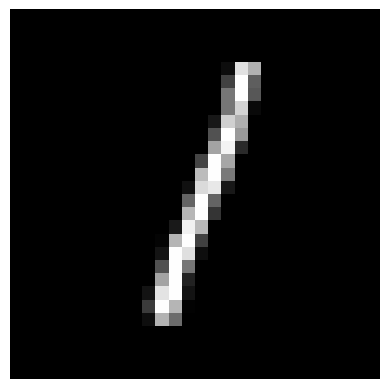

4 --- 4


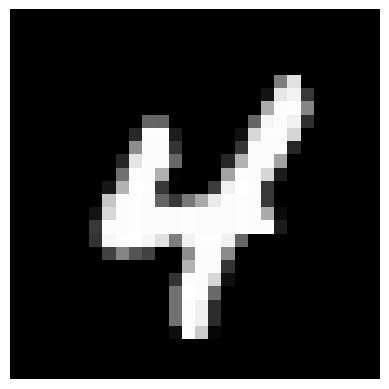

0 --- 0


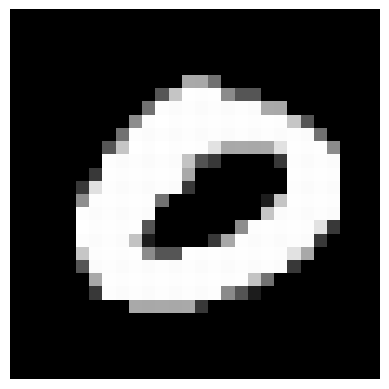

1 --- 1


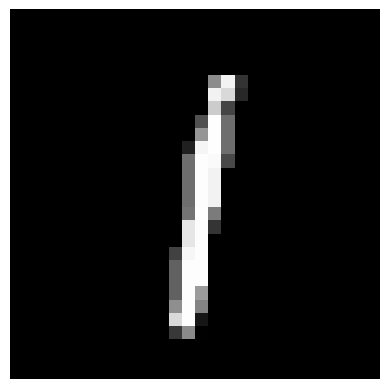

7 --- 7


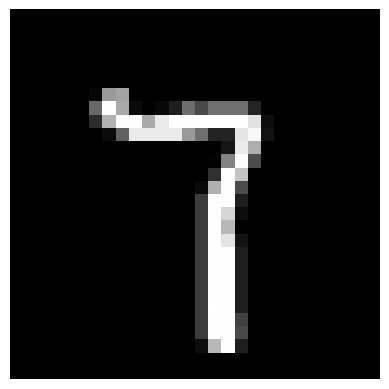

9 --- 9


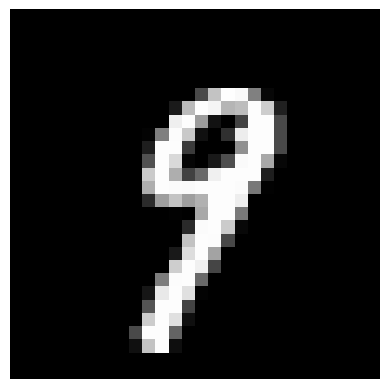

9 --- 9


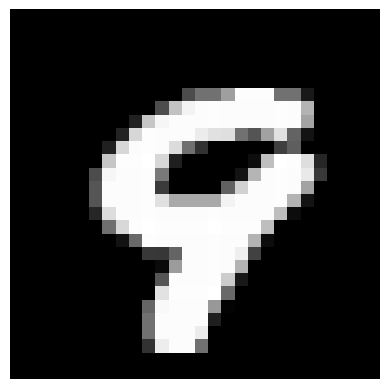

0 --- 0


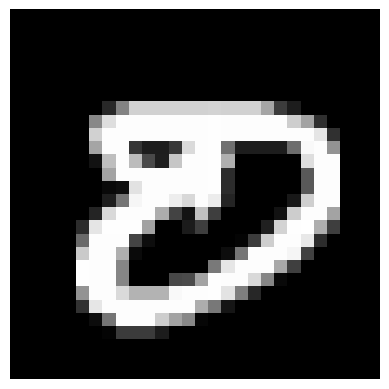

9 --- 9


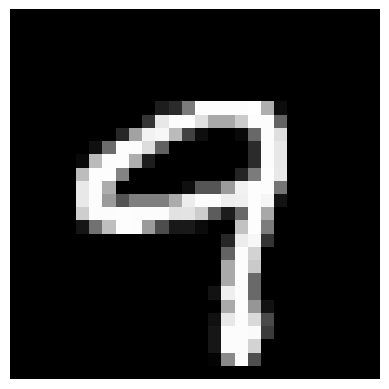

1 --- 1


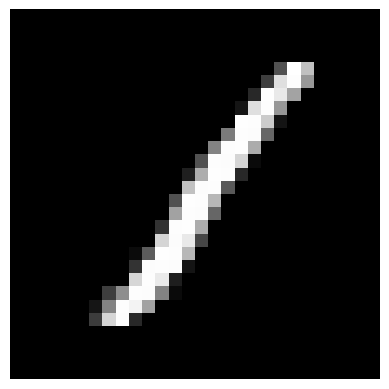

2 --- 2


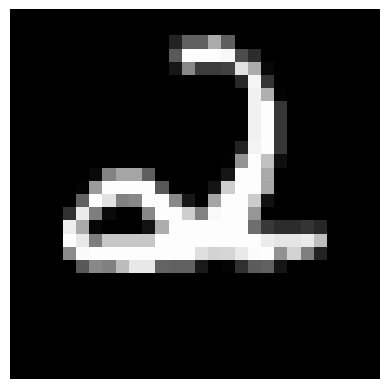

7 --- 7


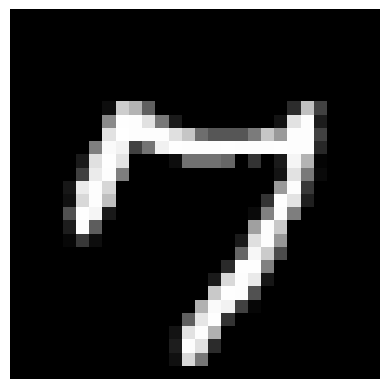

6 --- 6


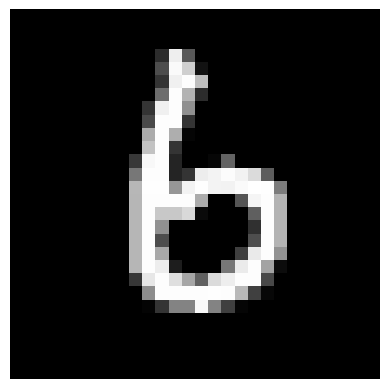

3 --- 3


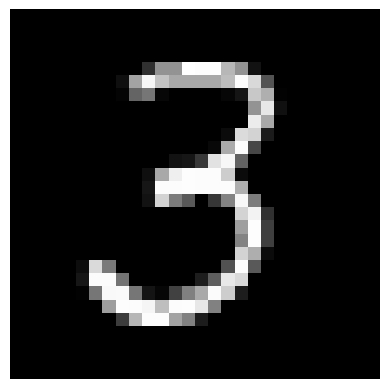

9 --- 9


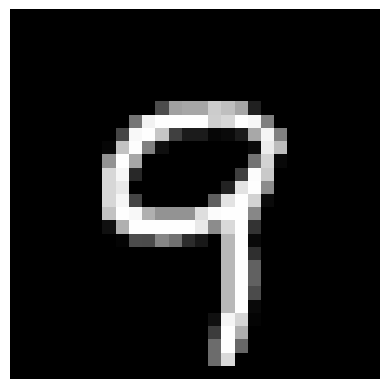

4 --- 4


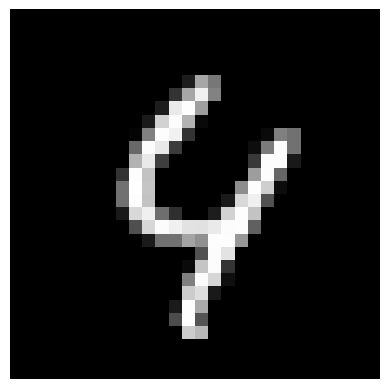

6 --- 6


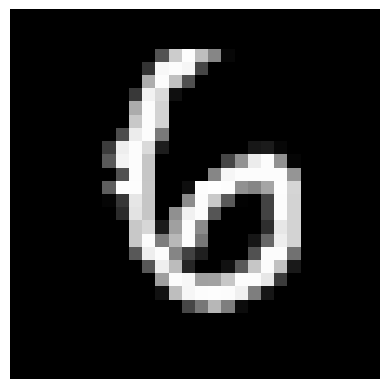

8 --- 8


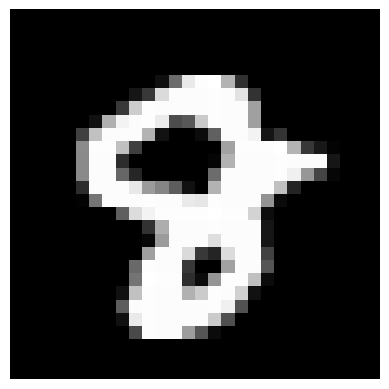

9 --- 9


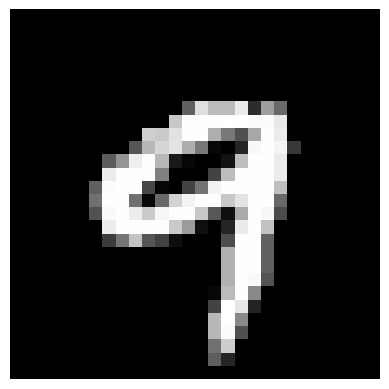

1 --- 1


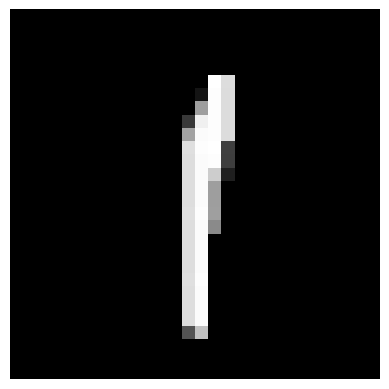

4 --- 4


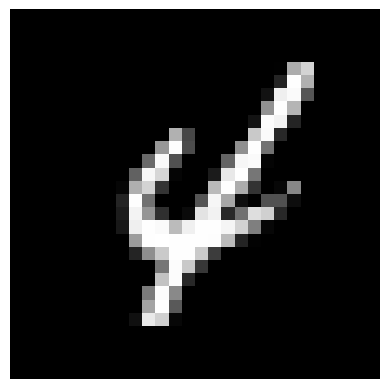

4 --- 4


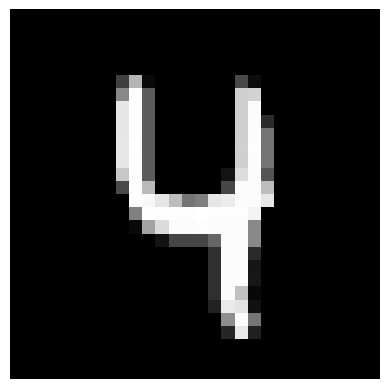

3 --- 3


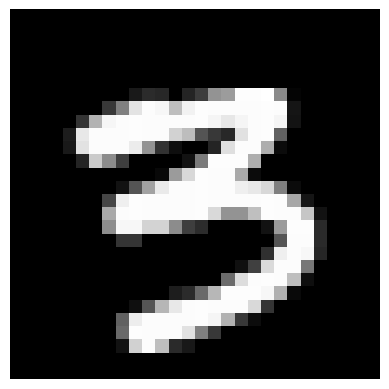

5 --- 5


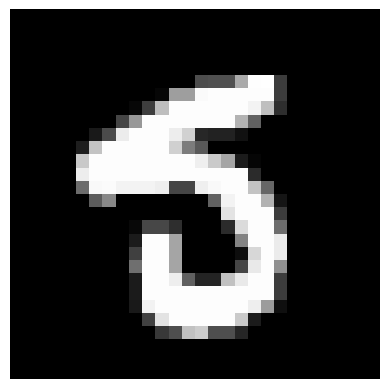

5 --- 5


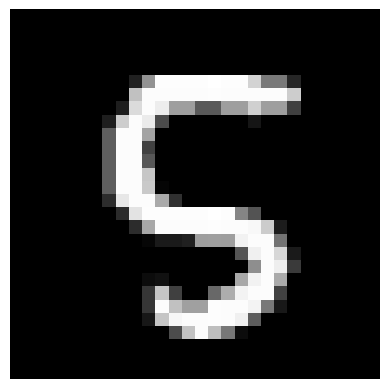

5 --- 5


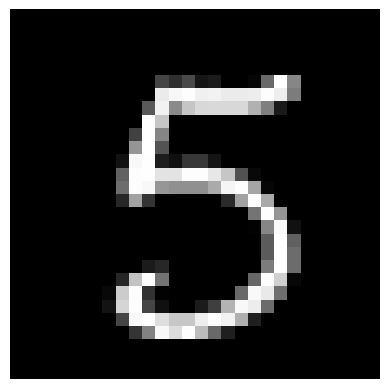

6 --- 6


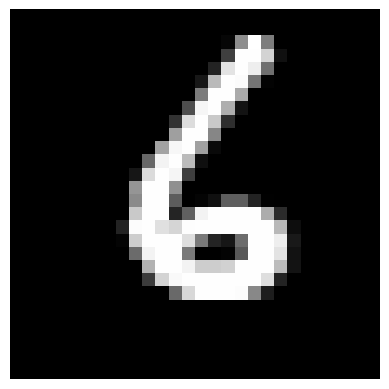

9 --- 9


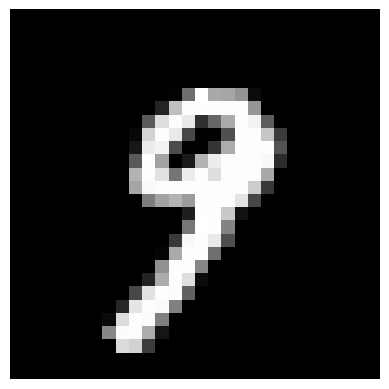

5 --- 5


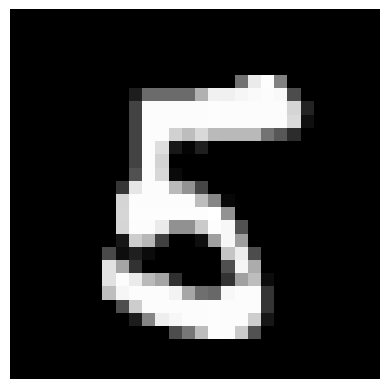

3 --- 3


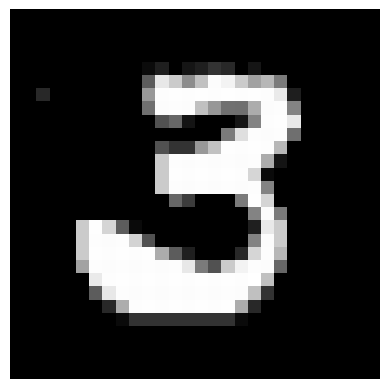

4 --- 4


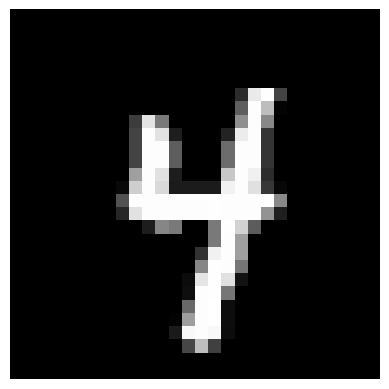

5 --- 5


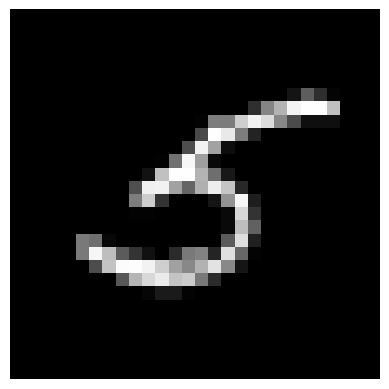

9 --- 9


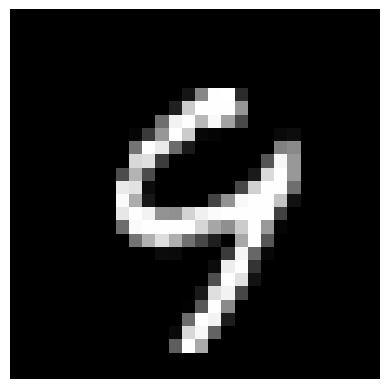

0 --- 0


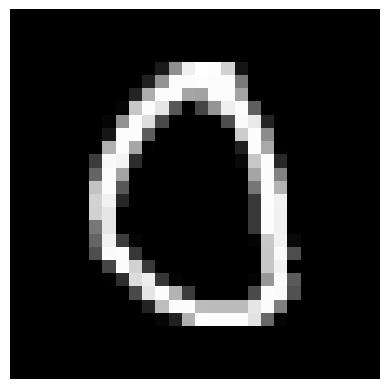

5 --- 5


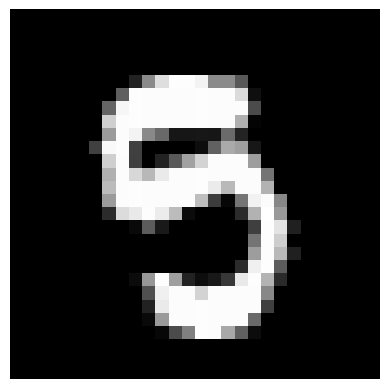

6 --- 6


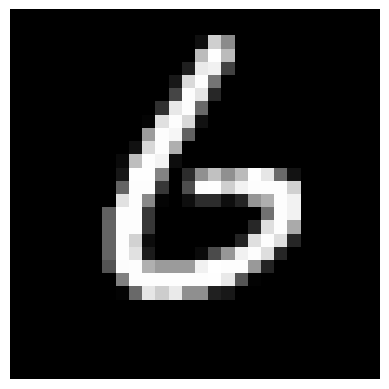

2 --- 2


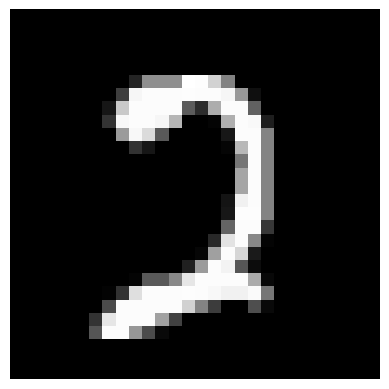

2 --- 2


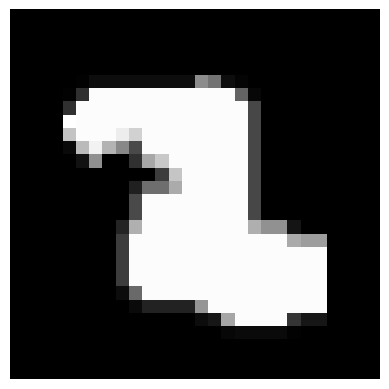

2 --- 2


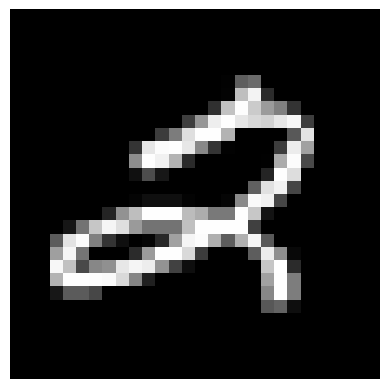

3 --- 3


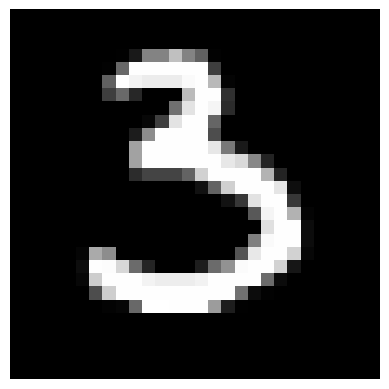

6 --- 6


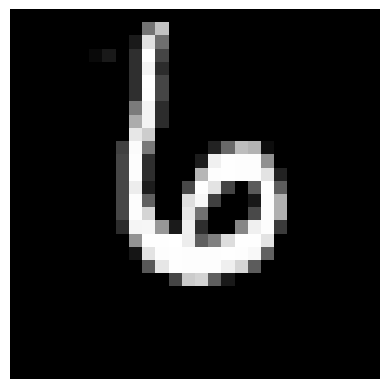

1 --- 1


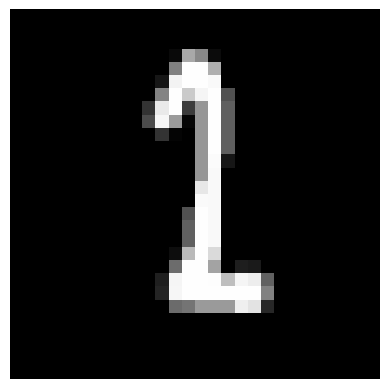

1 --- 1


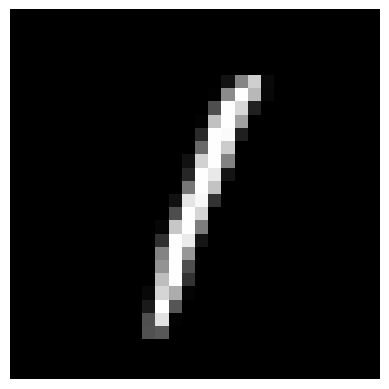

2 --- 2


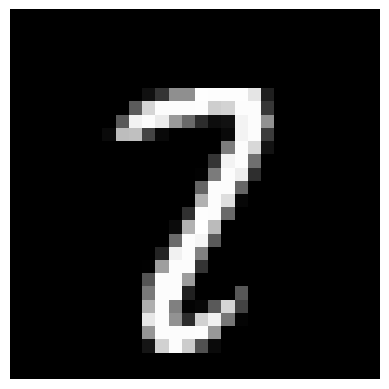

4 --- 4


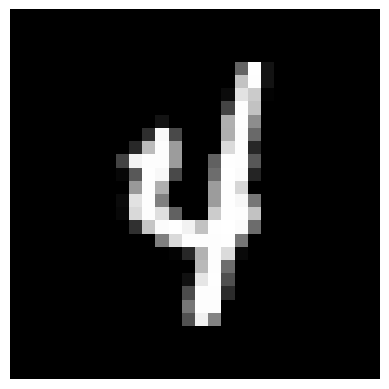

7 --- 7


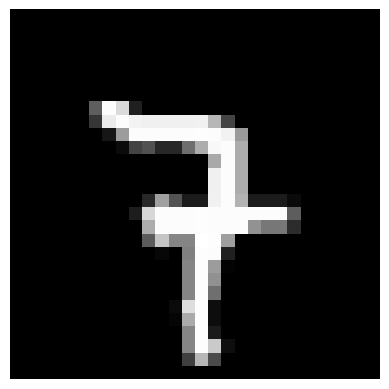

0 --- 0


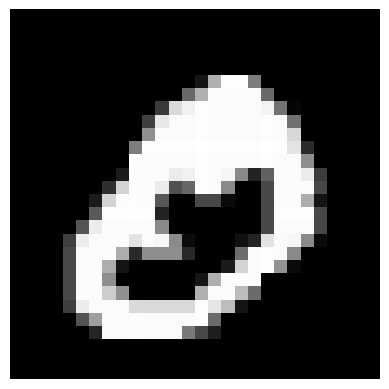

3 --- 3


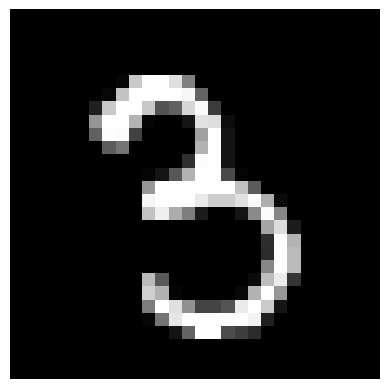

9 --- 9


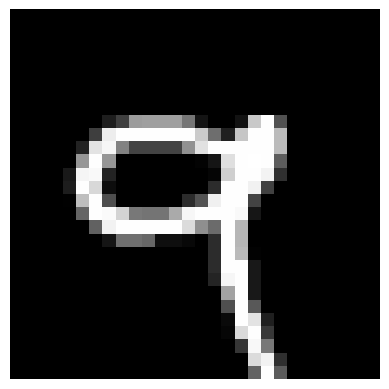

0 --- 0


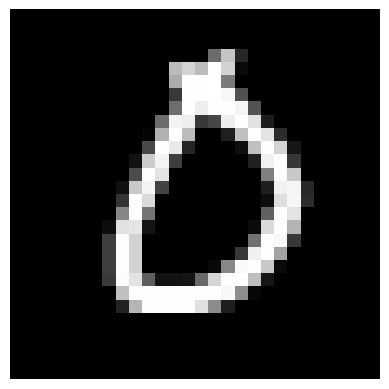

9 --- 9


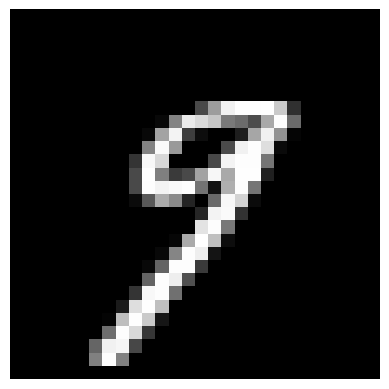

8 --- 8


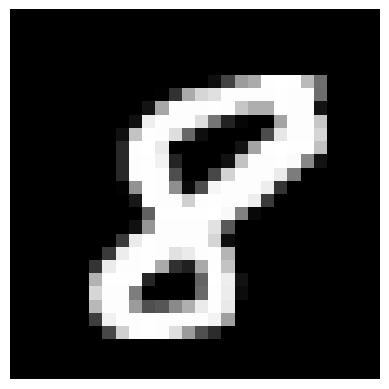

9 --- 9


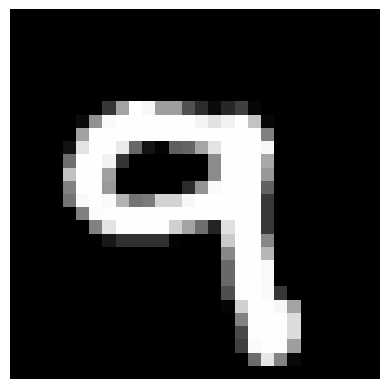

5 --- 5


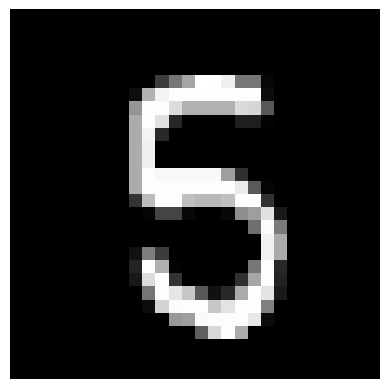

8 --- 8


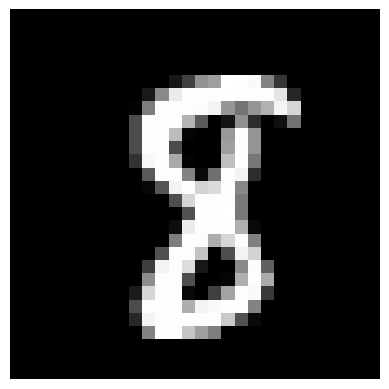

9 --- 9


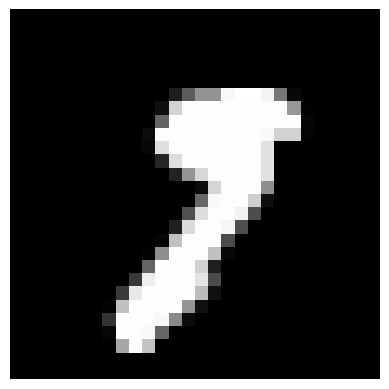

6 --- 6


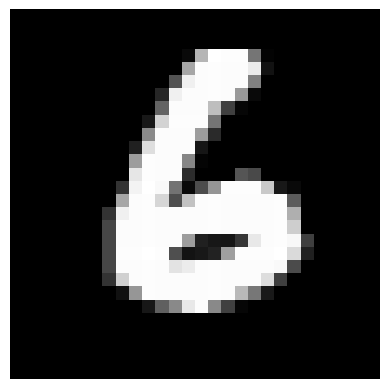

6 --- 6


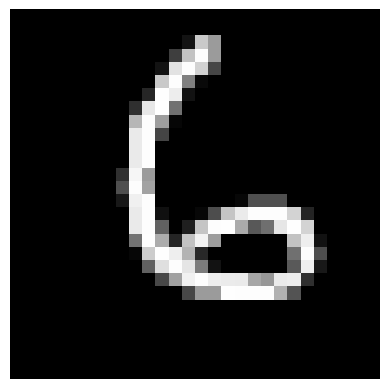

8 --- 8


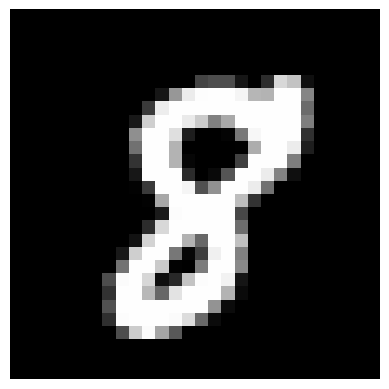

7 --- 7


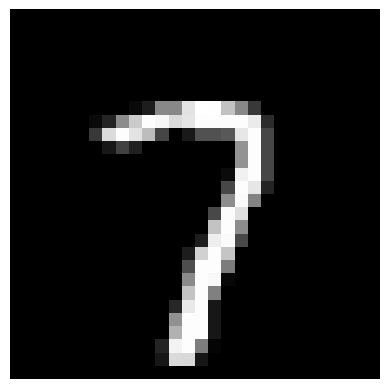

2 --- 2


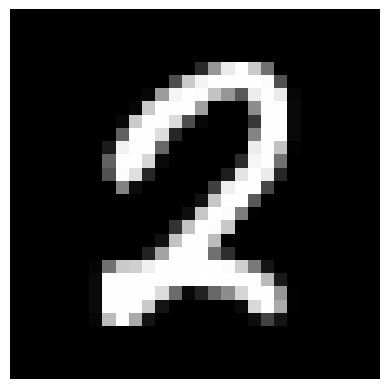

3 --- 3


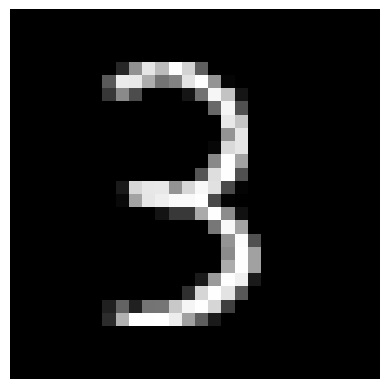

9 --- 9


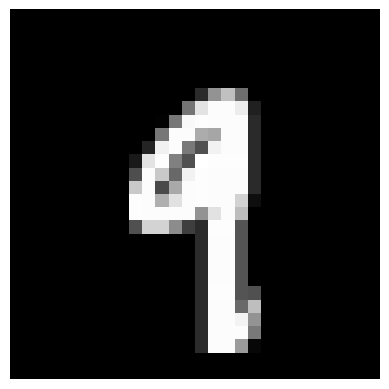

2 --- 2


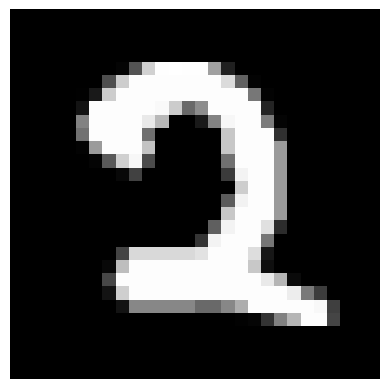

0 --- 0


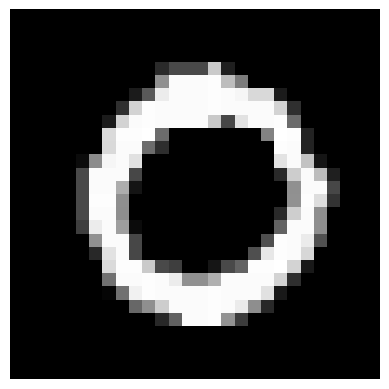

2 --- 2


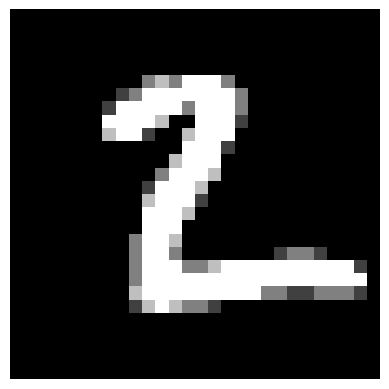

3 --- 3


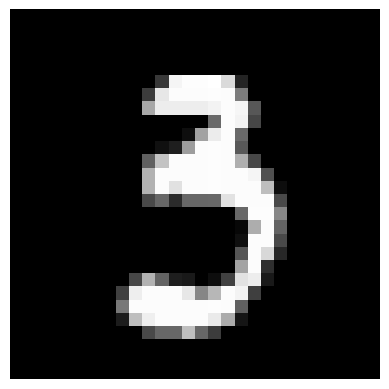

4 --- 4


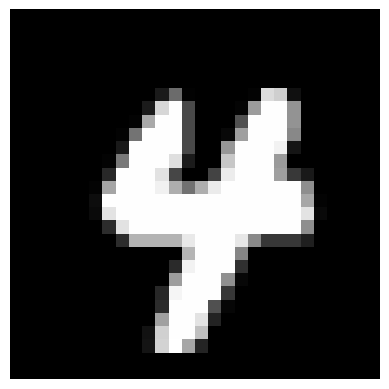

8 --- 8


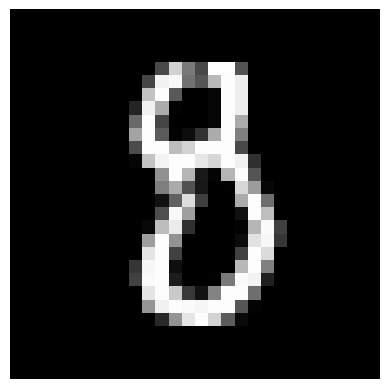

9 --- 9


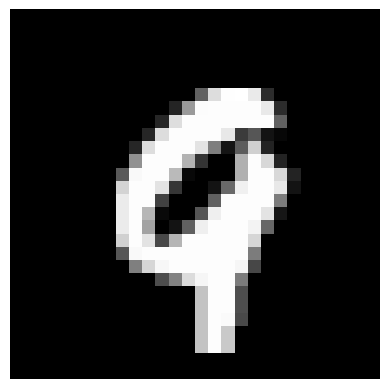

3 --- 3


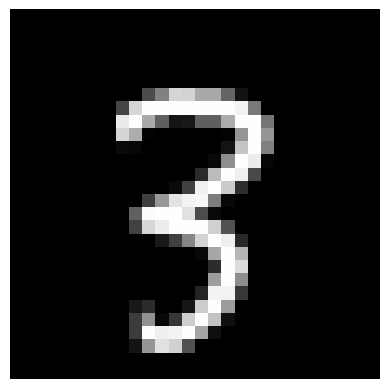

4 --- 4


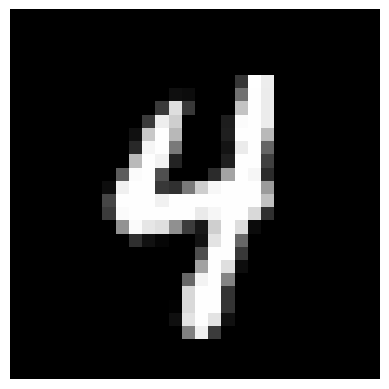

8 --- 8


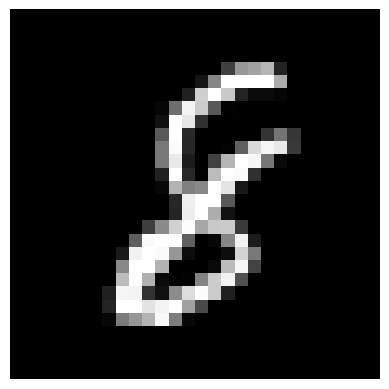

0 --- 0


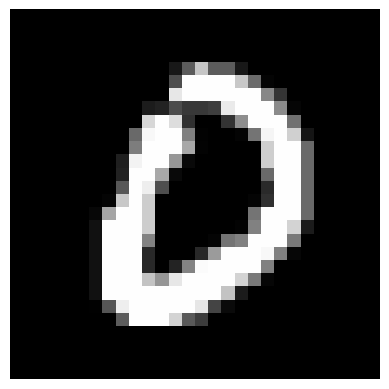

4 --- 4


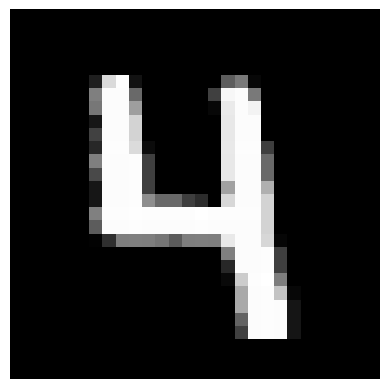

9 --- 9


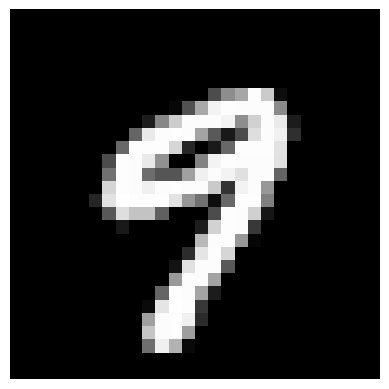

3 --- 3


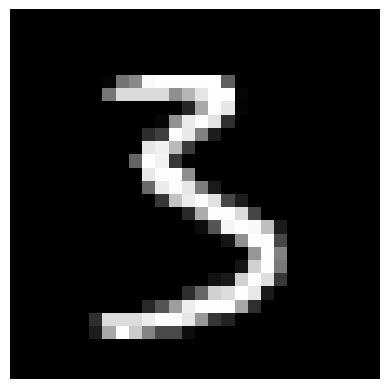

7 --- 7


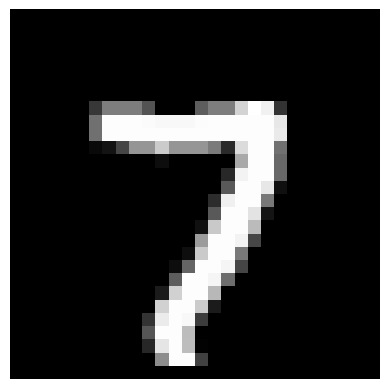

4 --- 4


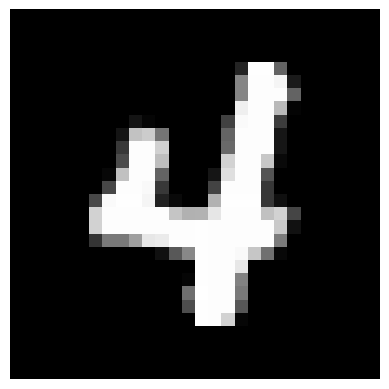

6 --- 6


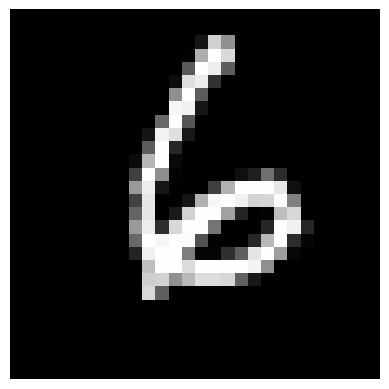

8 --- 8


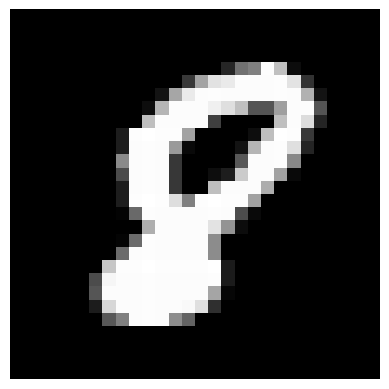

5 --- 9


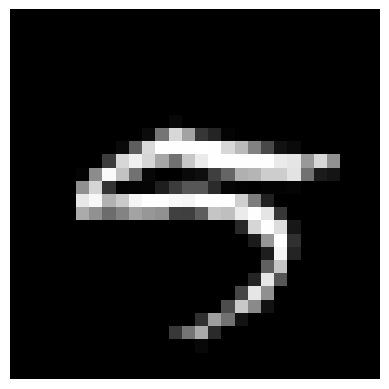

7 --- 7


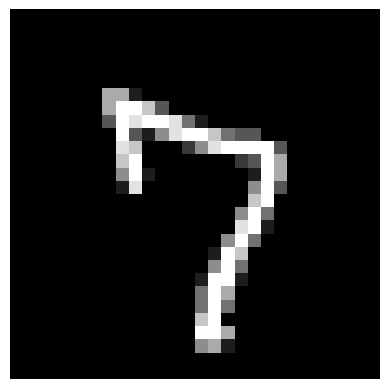

8 --- 8


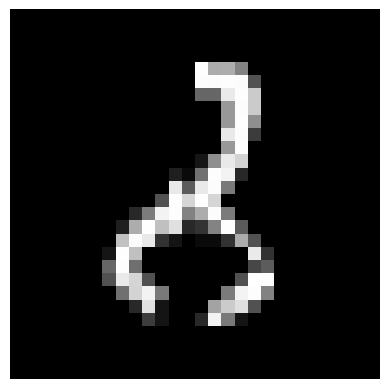

2 --- 2


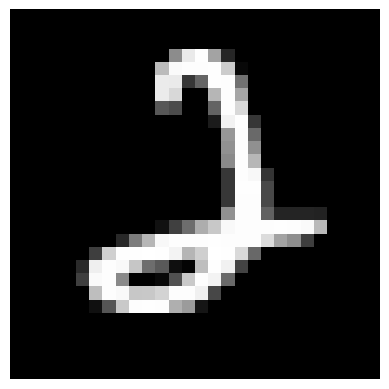

4 --- 4


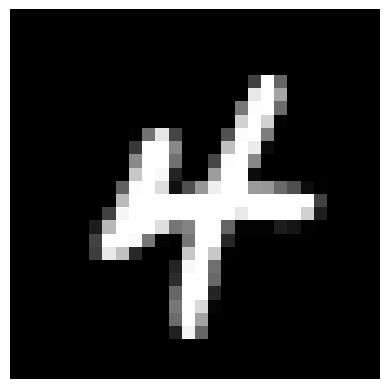

4 --- 4


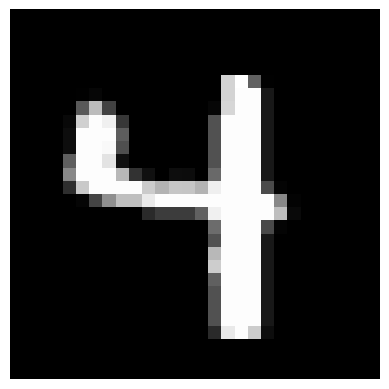

1 --- 1


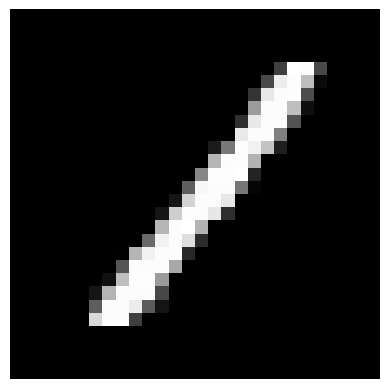

4 --- 4


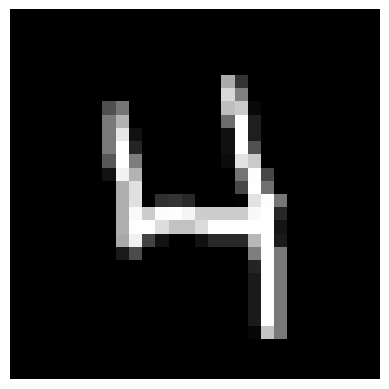

7 --- 7


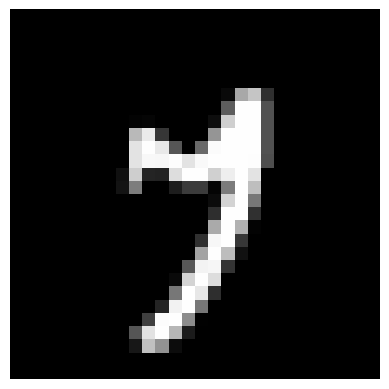

1 --- 1


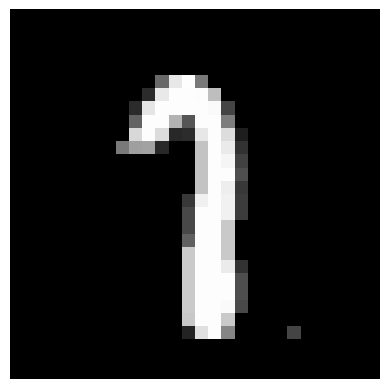

0 --- 0


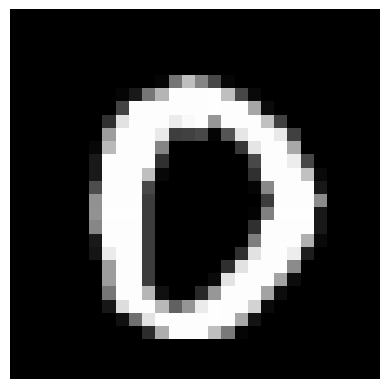

0 --- 0


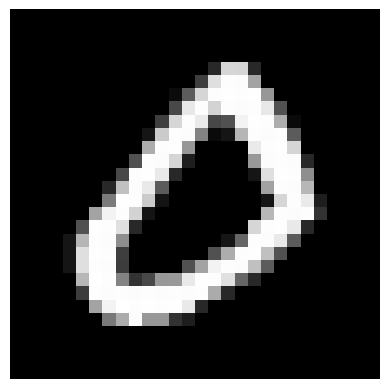

2 --- 2


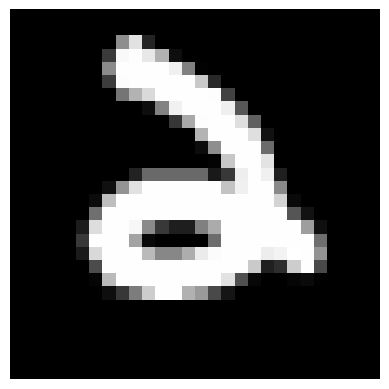

7 --- 7


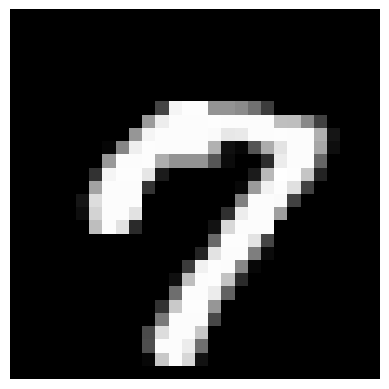

9 --- 9


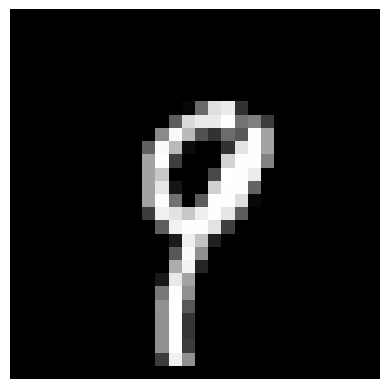

1 --- 1


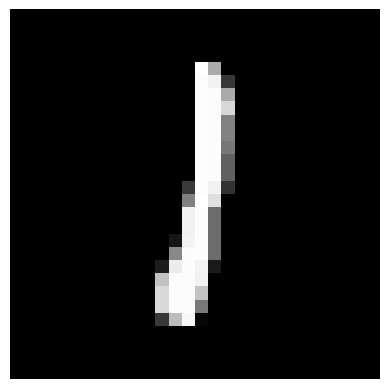

2 --- 2


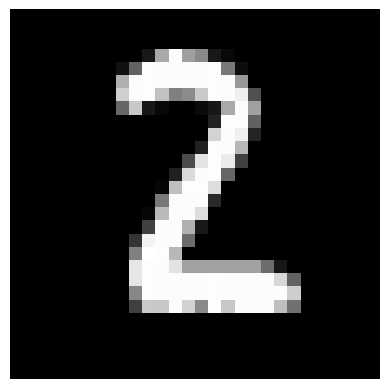

6 --- 6


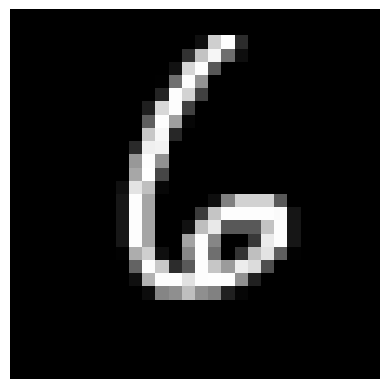

4 --- 4


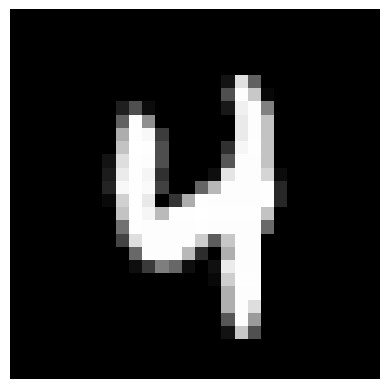

6 --- 6


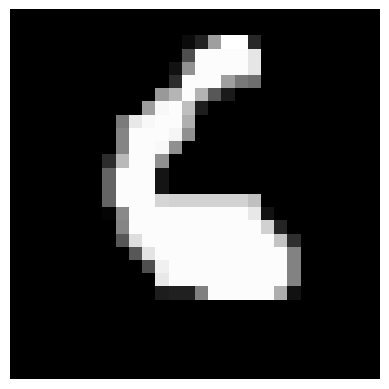

6 --- 6


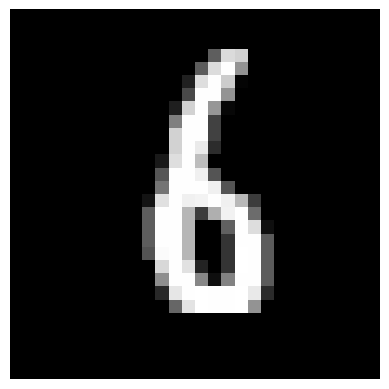

4 --- 4


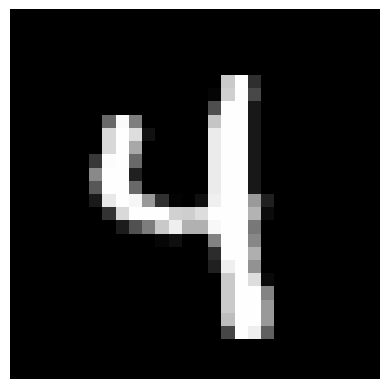

4 --- 4


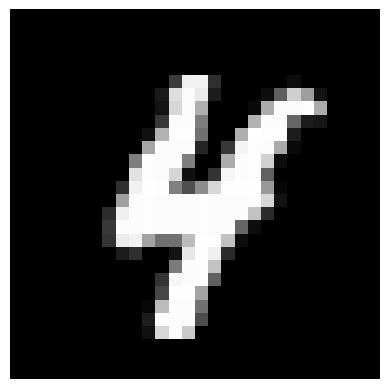

4 --- 4


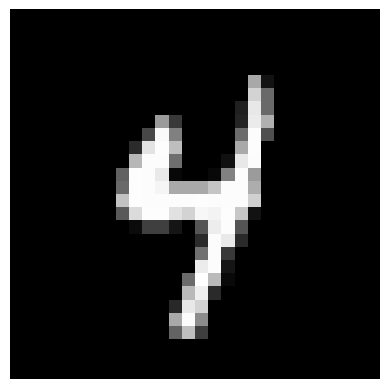

9 --- 9


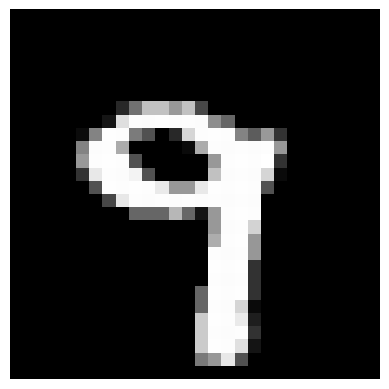

1 --- 1


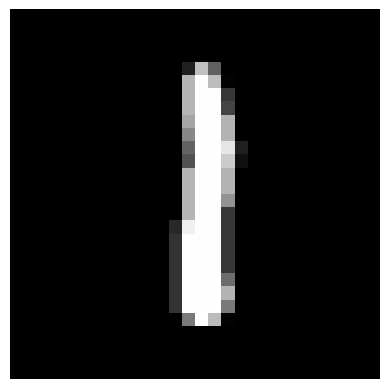

8 --- 8


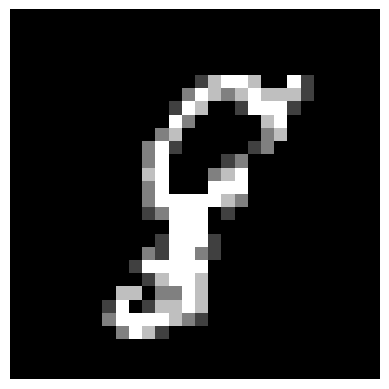

0 --- 0


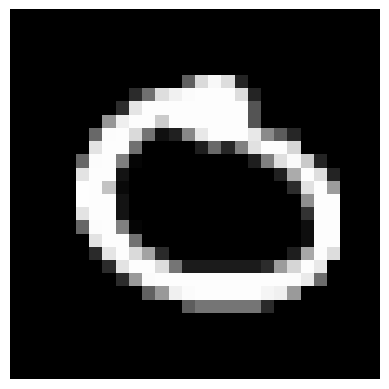

4 --- 4


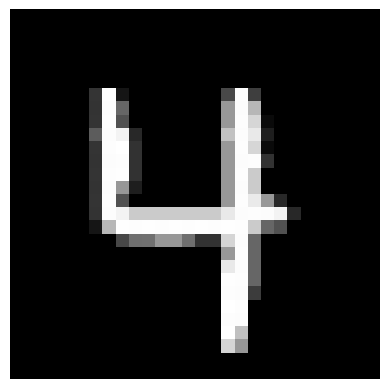

6 --- 6


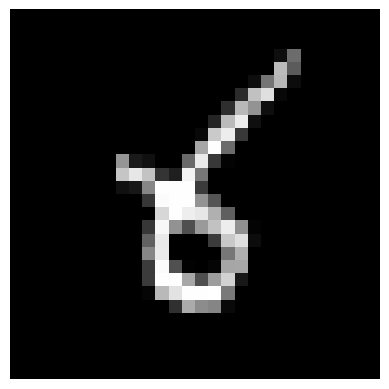

8 --- 8


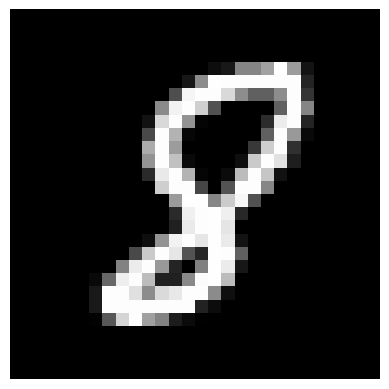

6 --- 6


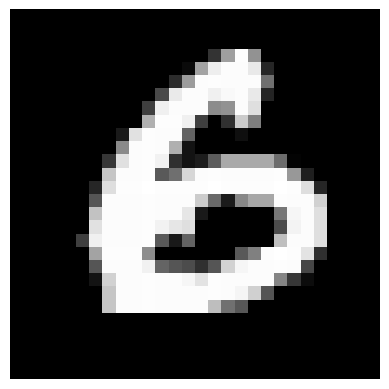

5 --- 5


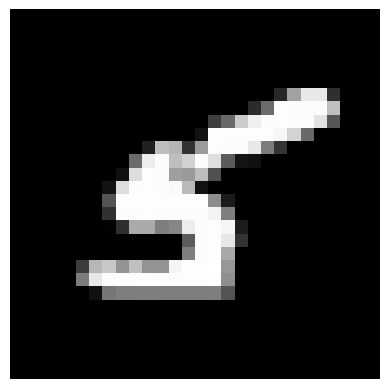

1 --- 1


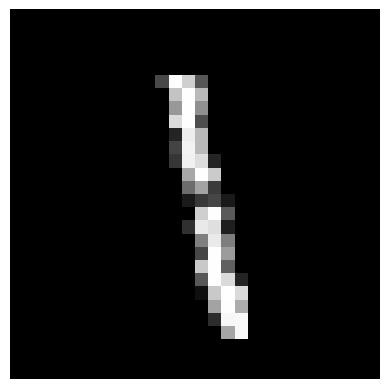

7 --- 7


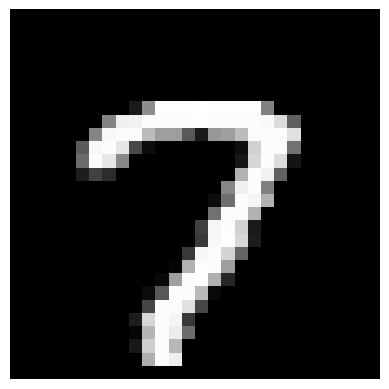

2 --- 2


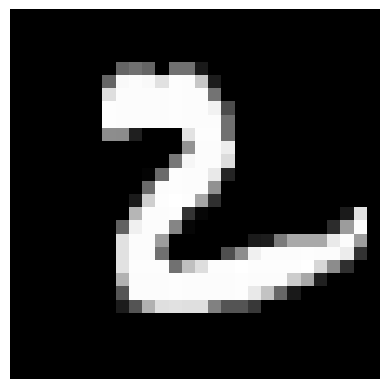

0 --- 0


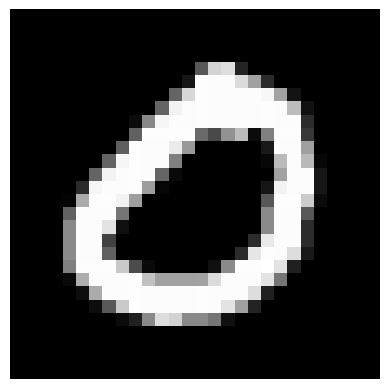

7 --- 7


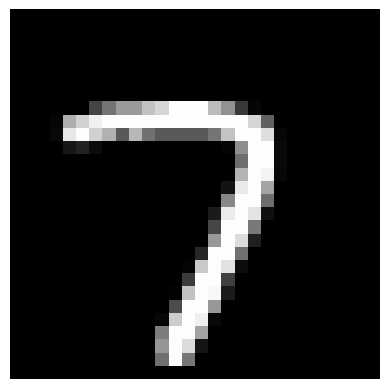

6 --- 6


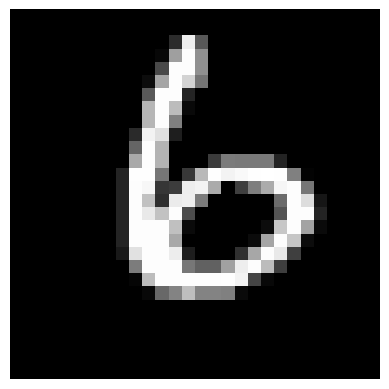

2 --- 2


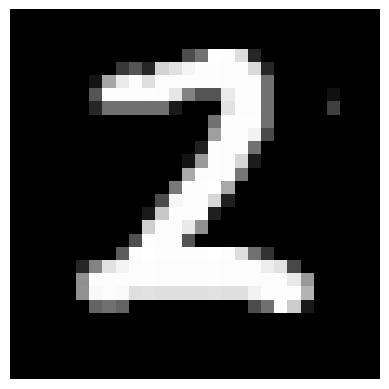

1 --- 1


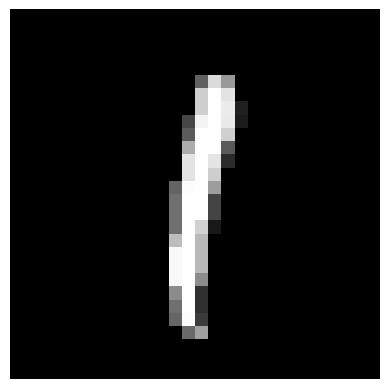

0 --- 0


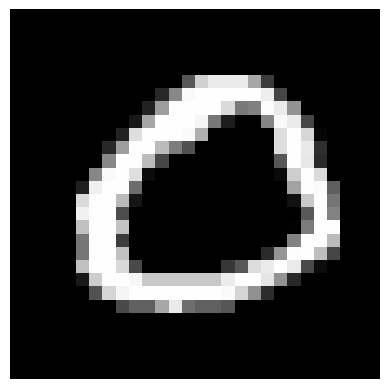

8 --- 8


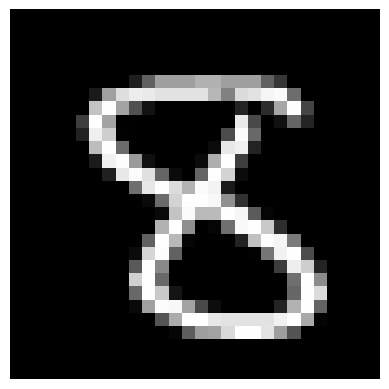

7 --- 7


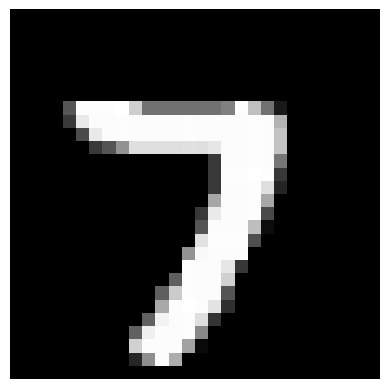

1 --- 1


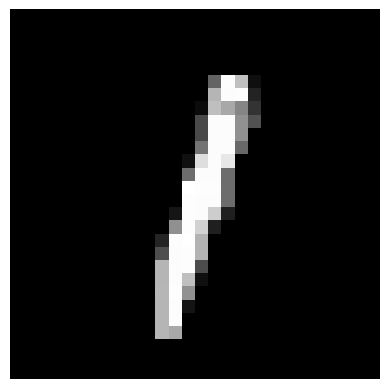

1 --- 1


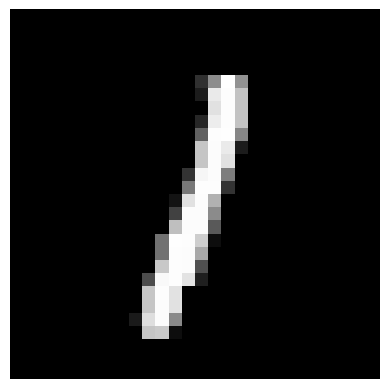

7 --- 7


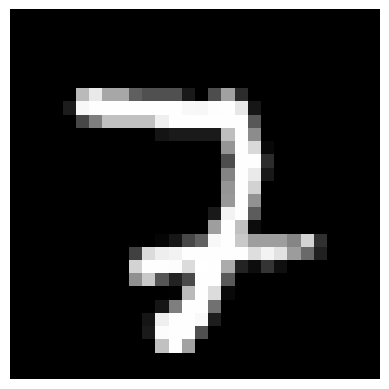

7 --- 7


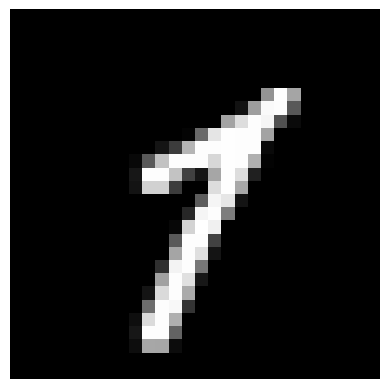

0 --- 0


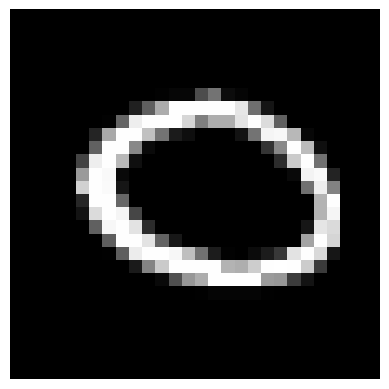

7 --- 7


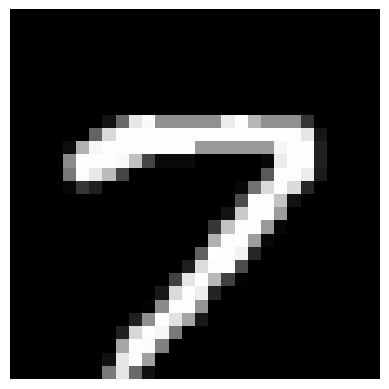

4 --- 4


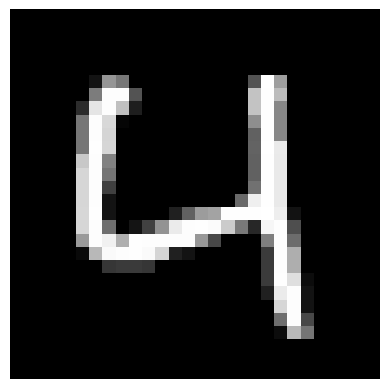

3 --- 3


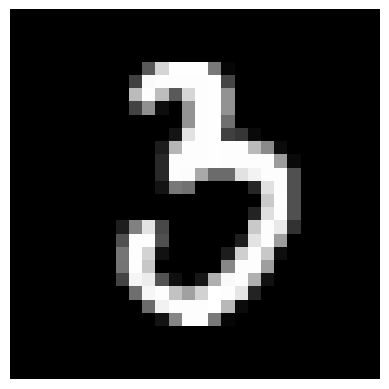

5 --- 5


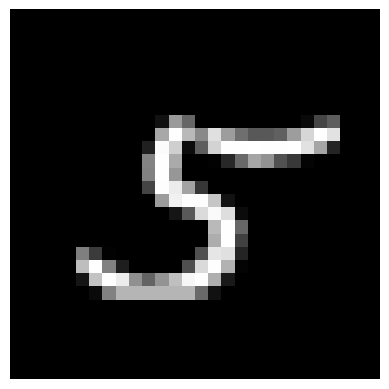

4 --- 4


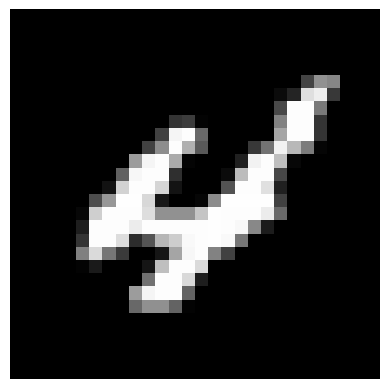

6 --- 6


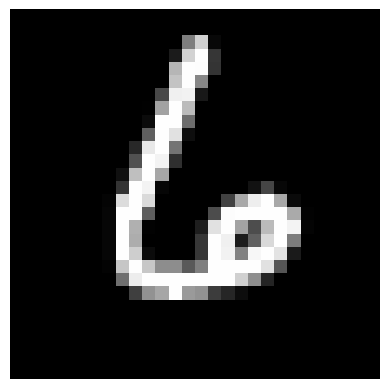

2 --- 2


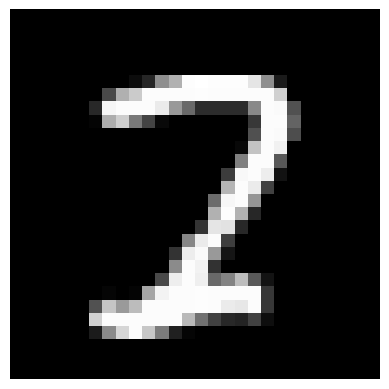

3 --- 3


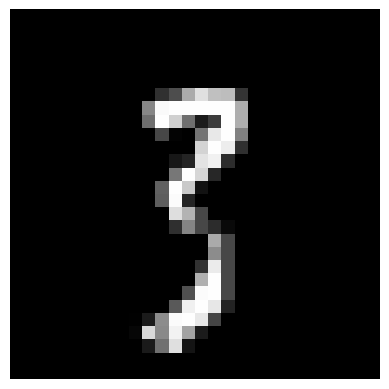

6 --- 6


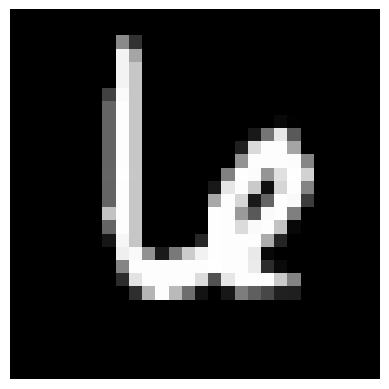

2 --- 2


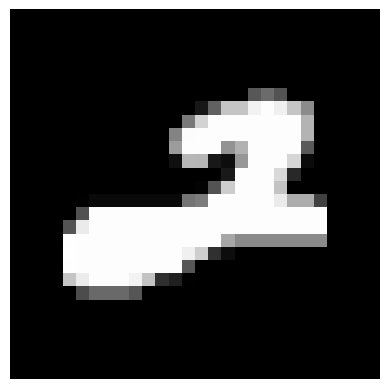

6 --- 6


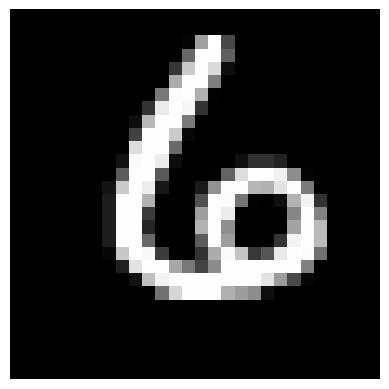

5 --- 5


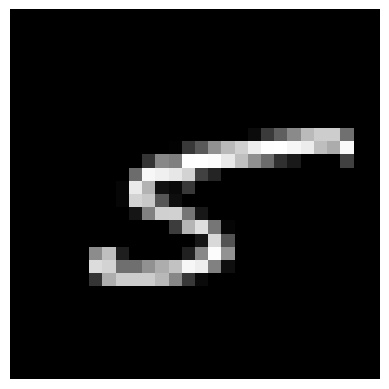

2 --- 2


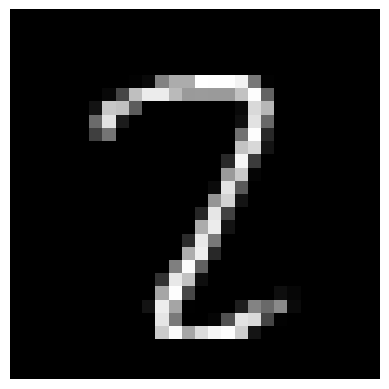

1 --- 1


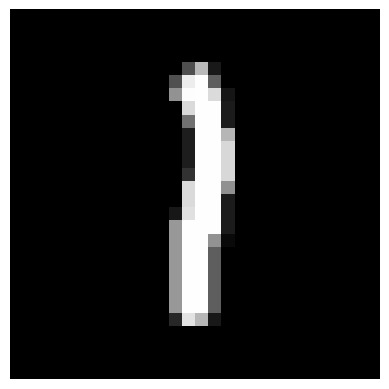

2 --- 2


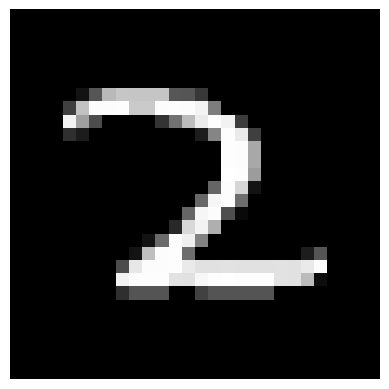

1 --- 1


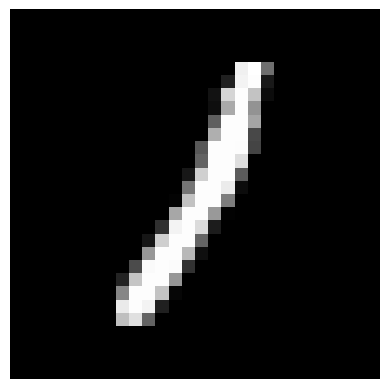

3 --- 3


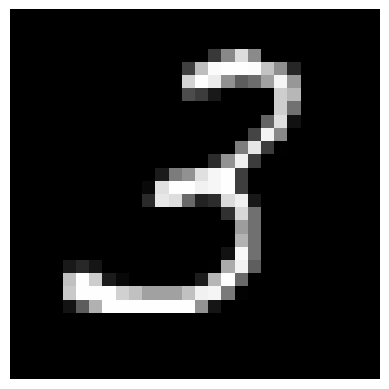

2 --- 2


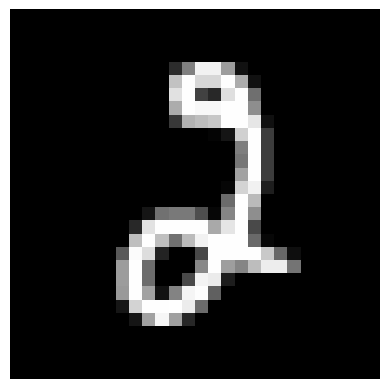

5 --- 5


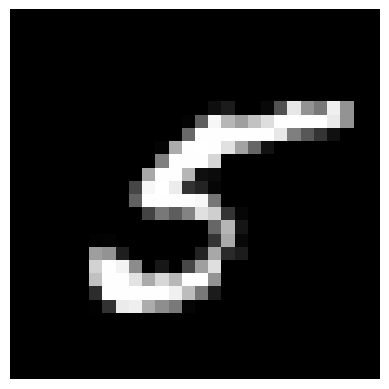

0 --- 0


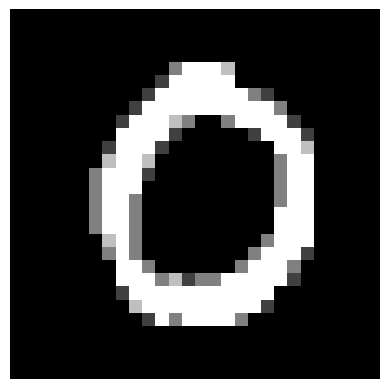

1 --- 1


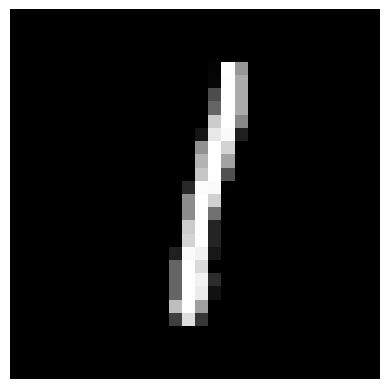

4 --- 4


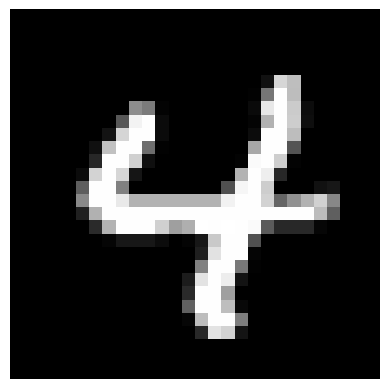

0 --- 0


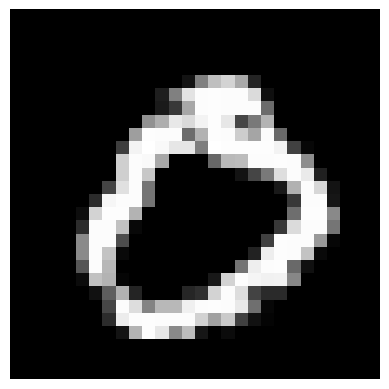

9 --- 9


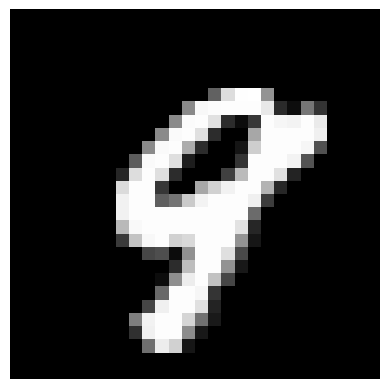

1 --- 1


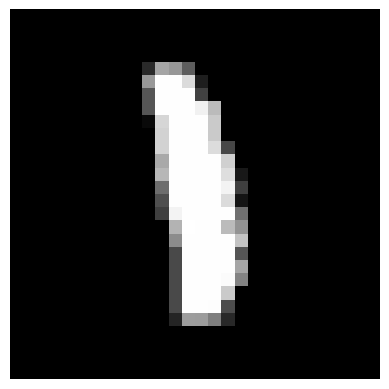

4 --- 4


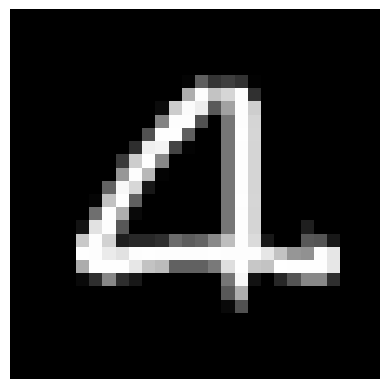

2 --- 2


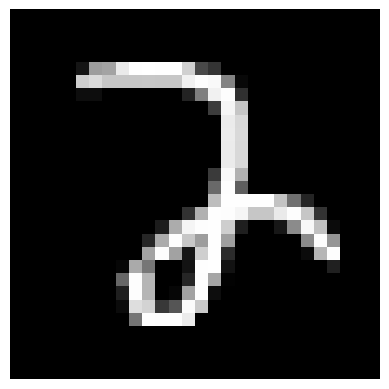

6 --- 6


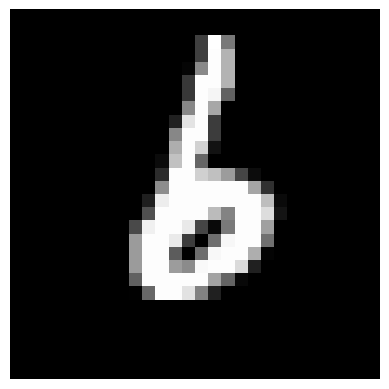

2 --- 2


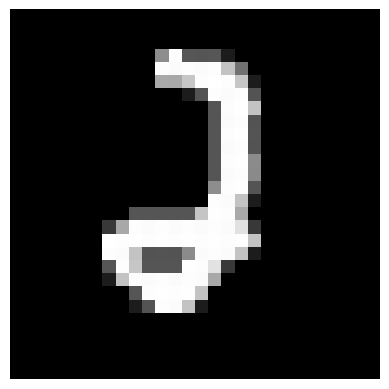

0 --- 0


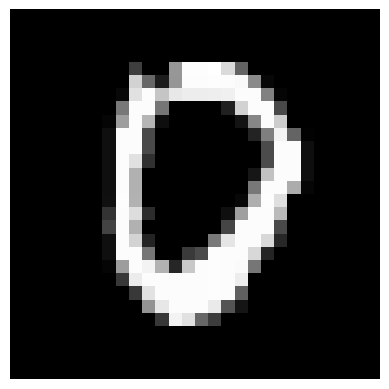

1 --- 1


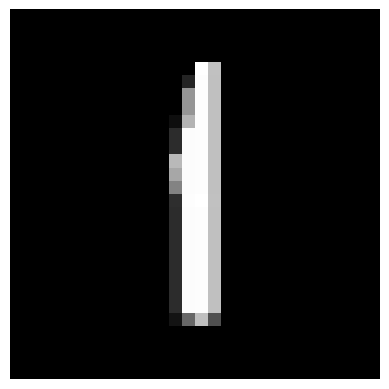

7 --- 7


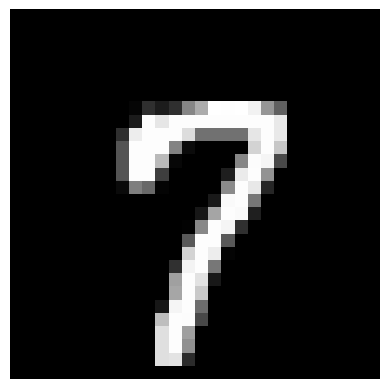

0 --- 0


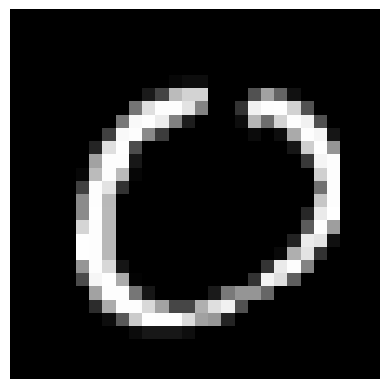

8 --- 8


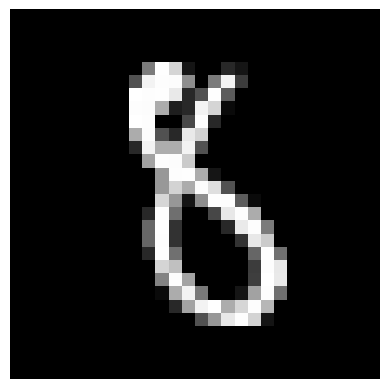

9 --- 9


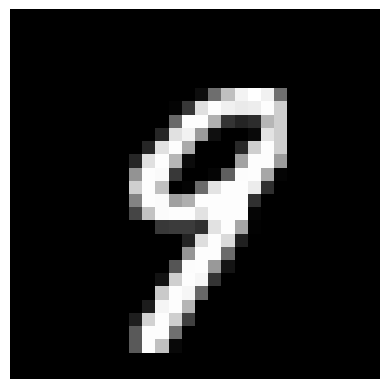

8 --- 8


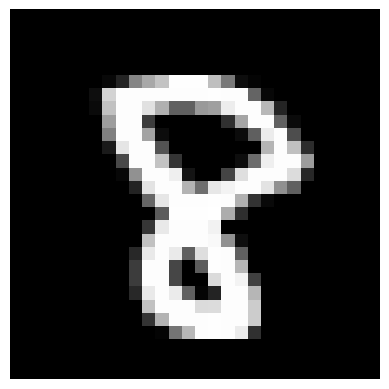

1 --- 1


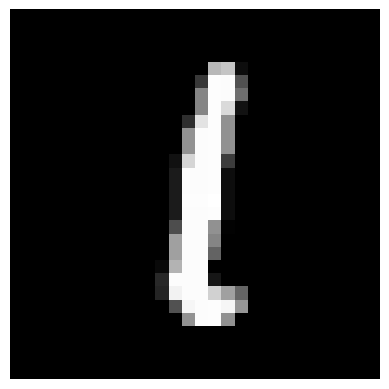

0 --- 0


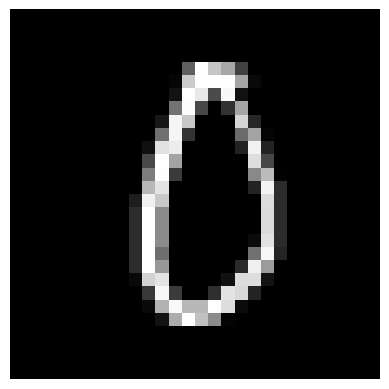

9 --- 9


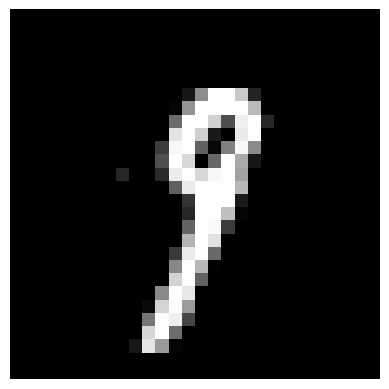

0 --- 0


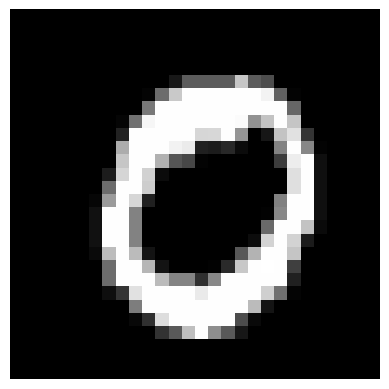

0 --- 0


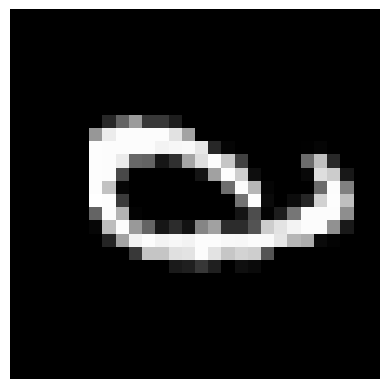

5 --- 5


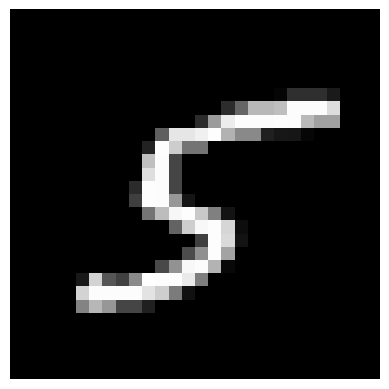

7 --- 7


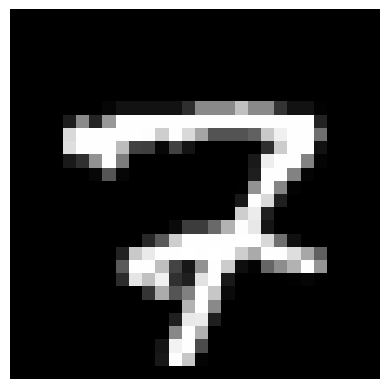

5 --- 5


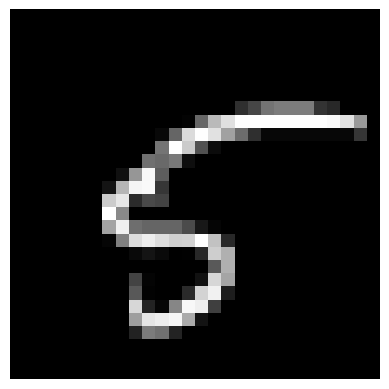

9 --- 9


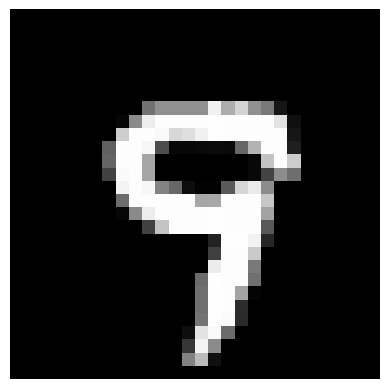

1 --- 1


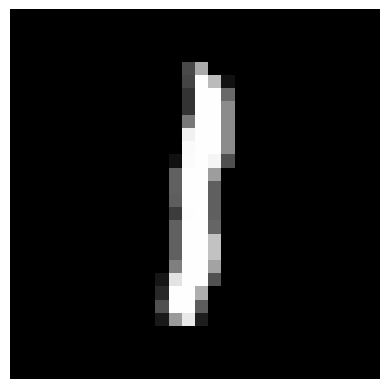

3 --- 3


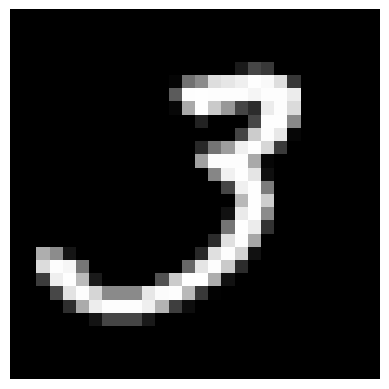

6 --- 6


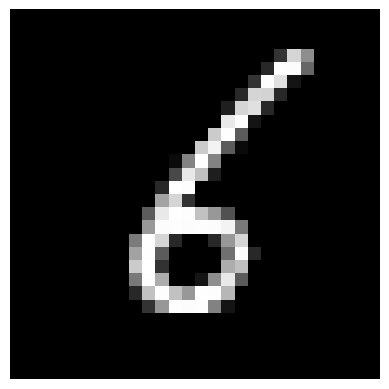

3 --- 3


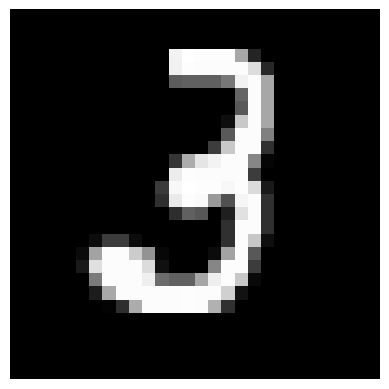

6 --- 6


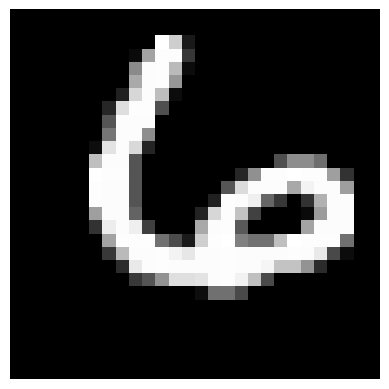

6 --- 6


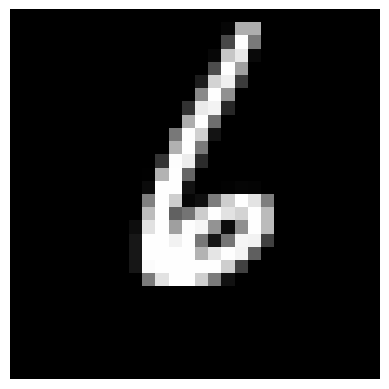

4 --- 4


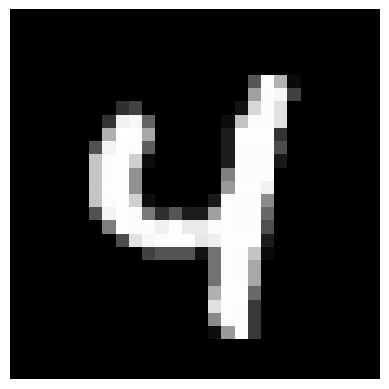

1 --- 1


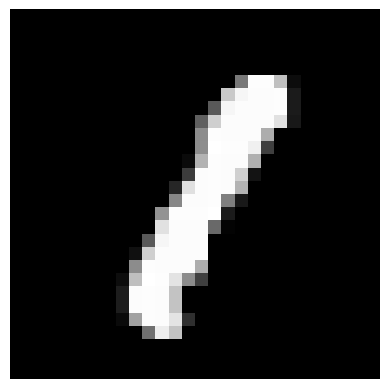

8 --- 8


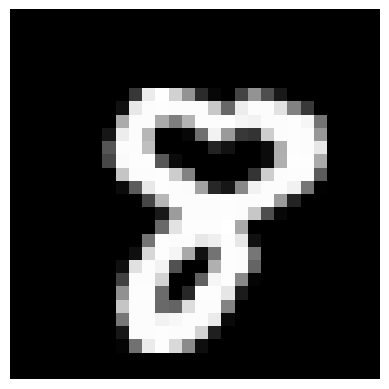

8 --- 8


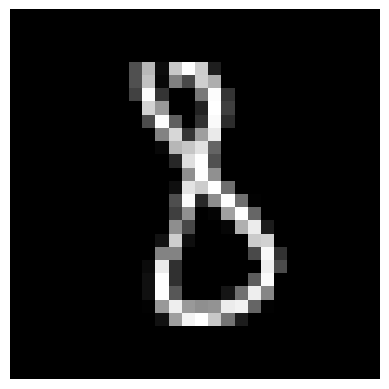

4 --- 4


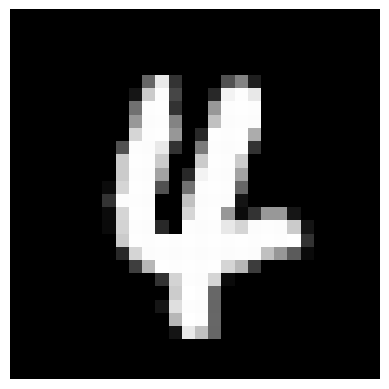

5 --- 5


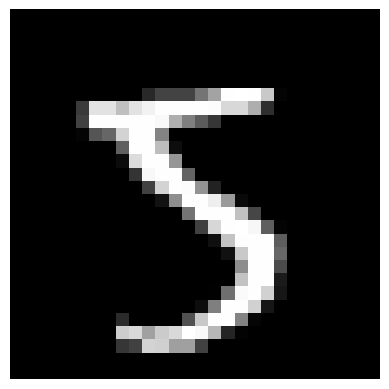

2 --- 2


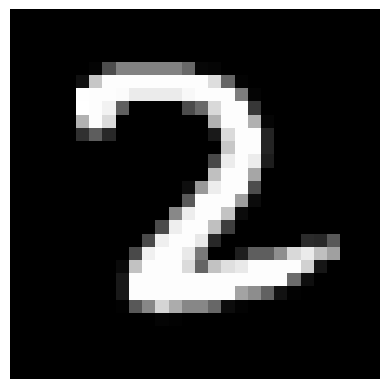

0 --- 0


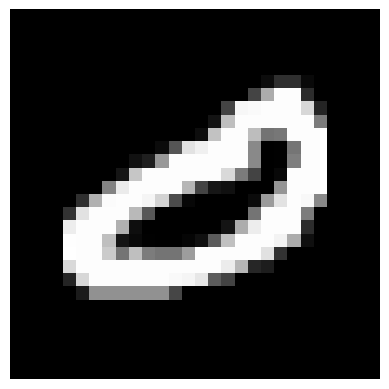

4 --- 4


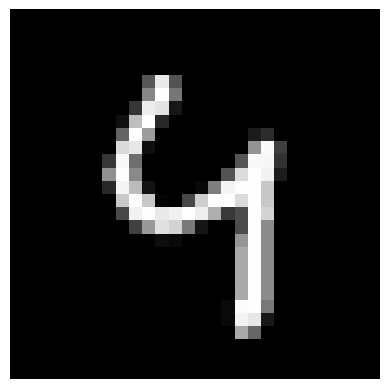

8 --- 8


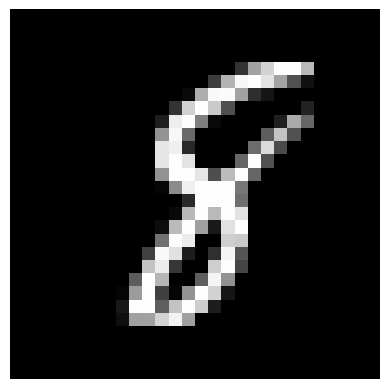

5 --- 5


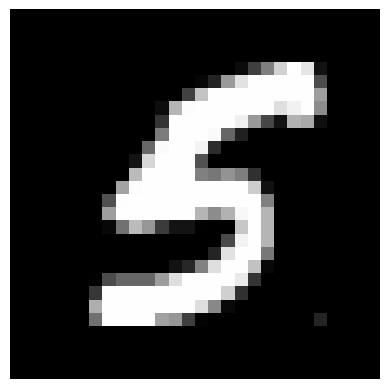

4 --- 4


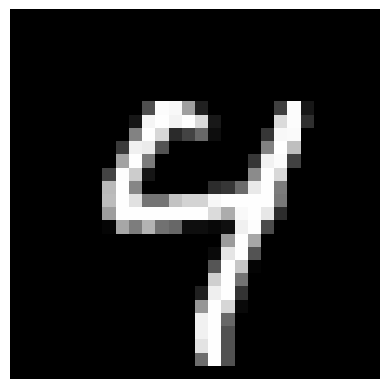

9 --- 9


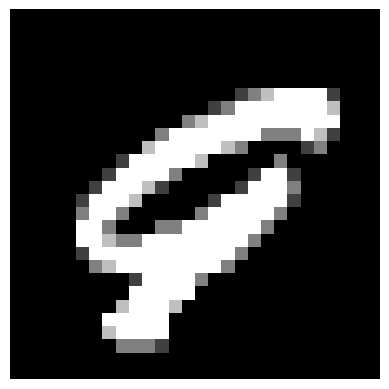

8 --- 8


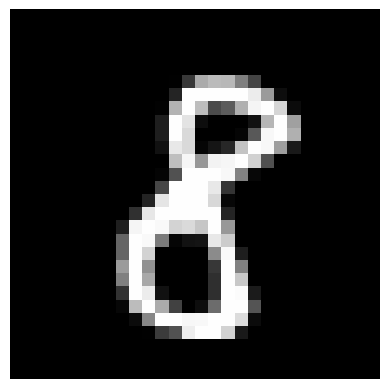

0 --- 0


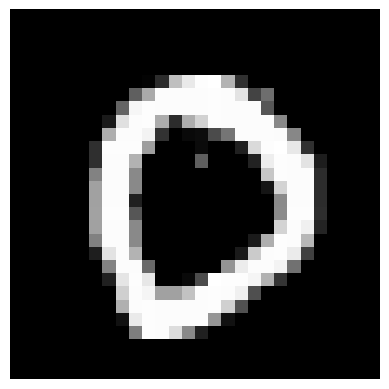

3 --- 3


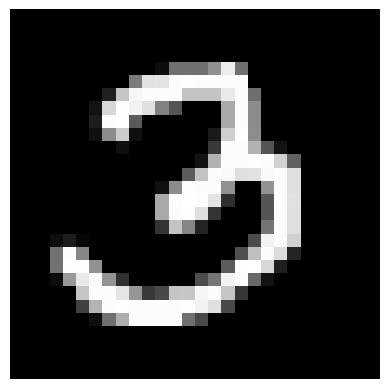

5 --- 5


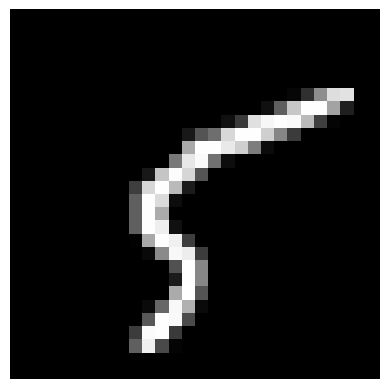

7 --- 7


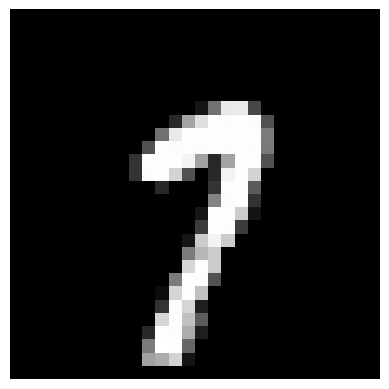

4 --- 4


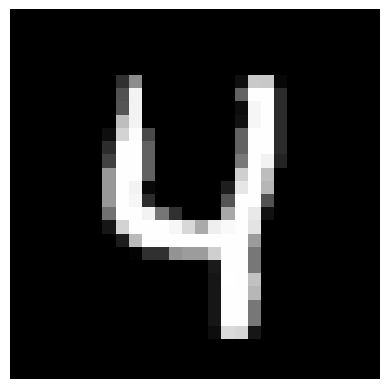

6 --- 6


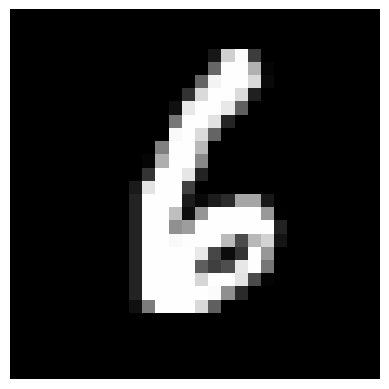

7 --- 7


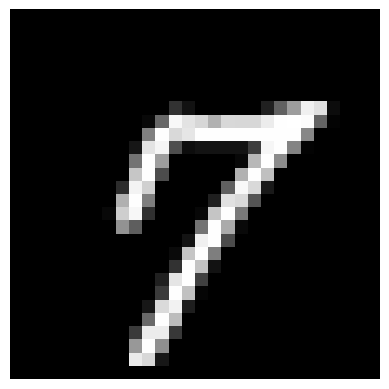

6 --- 6


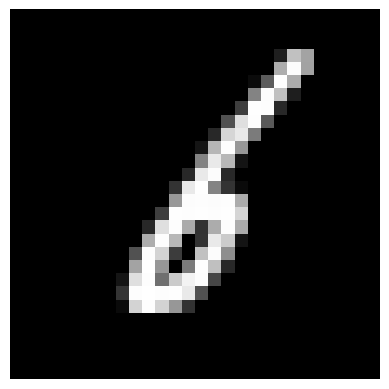

7 --- 7


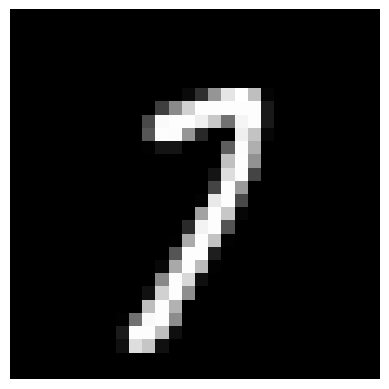

6 --- 6


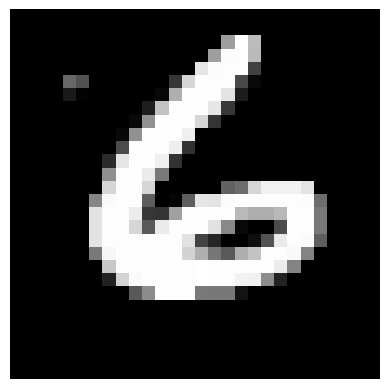

7 --- 7


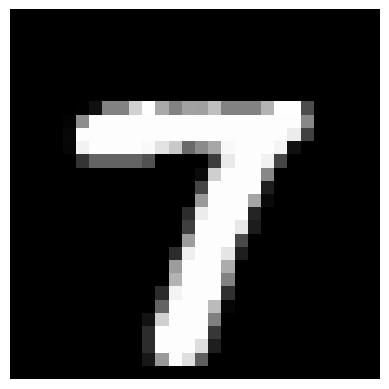

3 --- 3


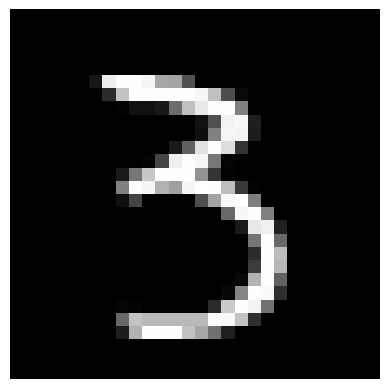

1 --- 1


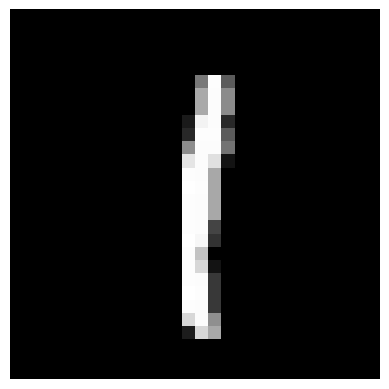

9 --- 9


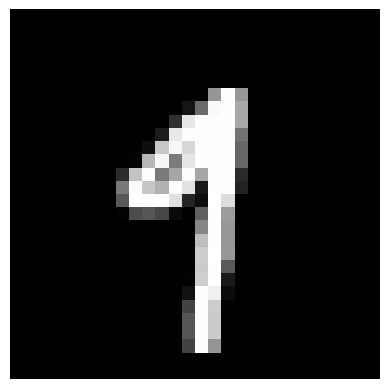

1 --- 1


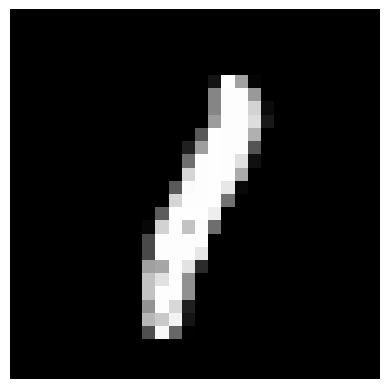

9 --- 9


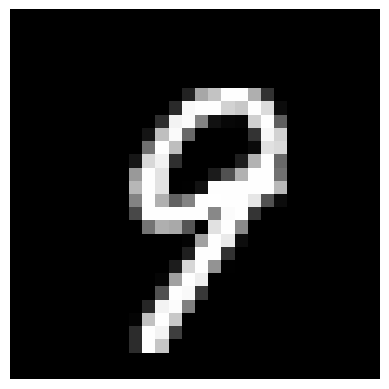

8 --- 8


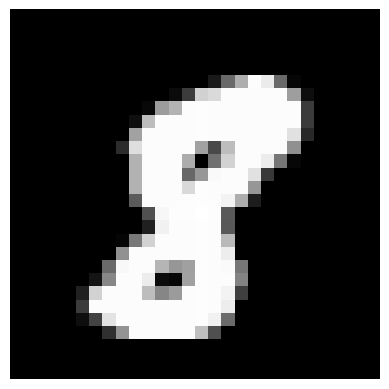

8 --- 8


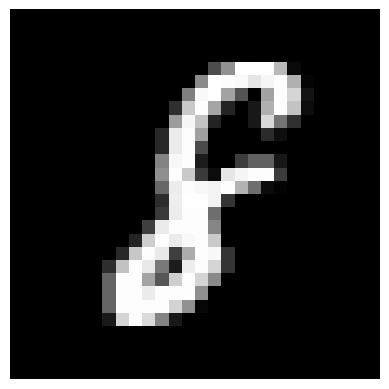

7 --- 7


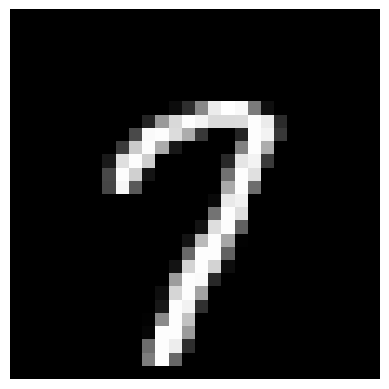

6 --- 6


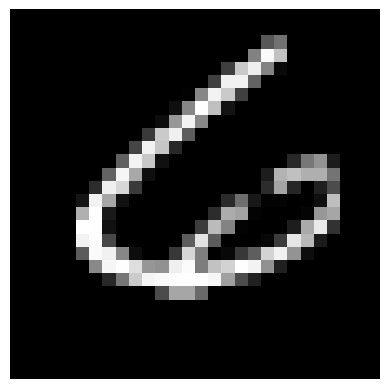

4 --- 4


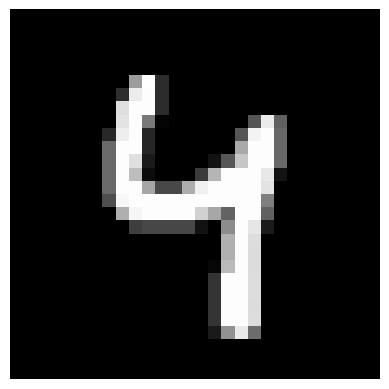

8 --- 8


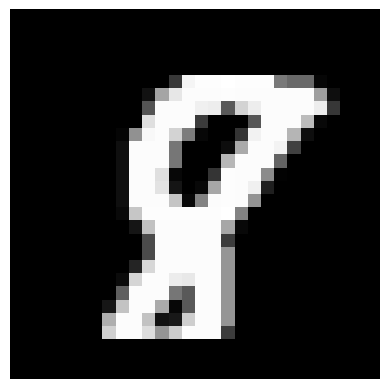

7 --- 7


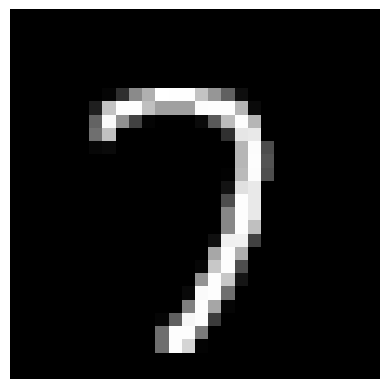

7 --- 7


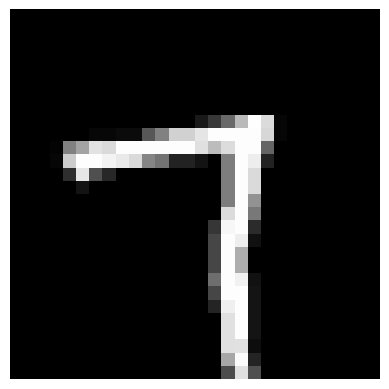

4 --- 4


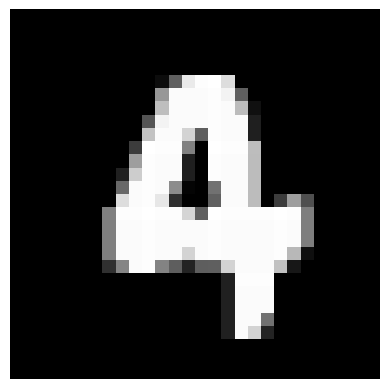

4 --- 4


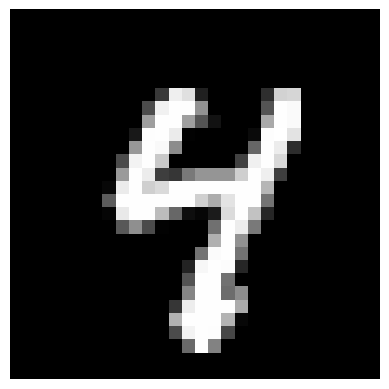

1 --- 1


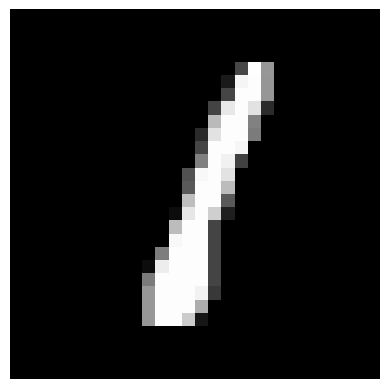

9 --- 9


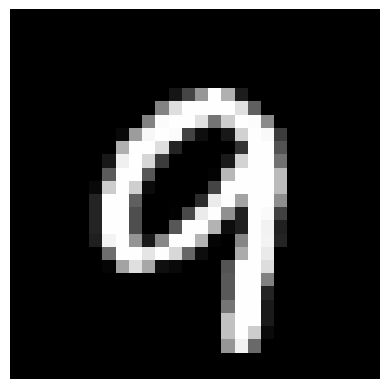

2 --- 2


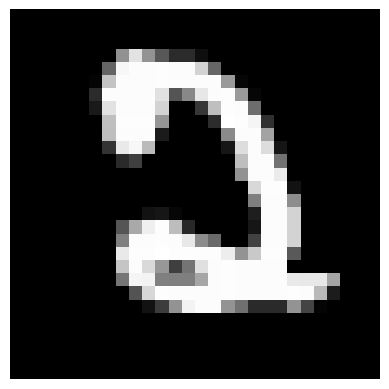

7 --- 7


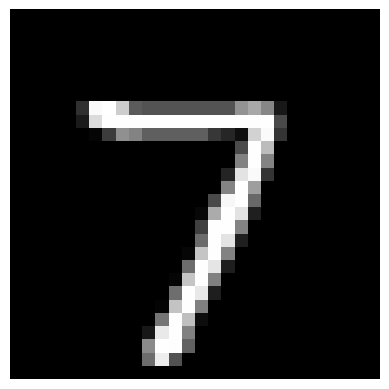

3 --- 3


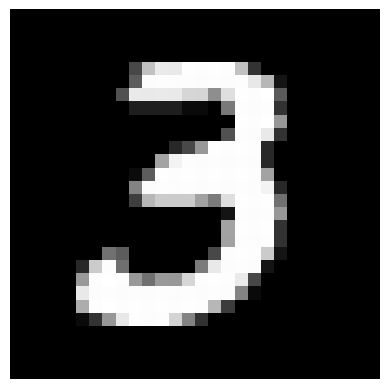

5 --- 5


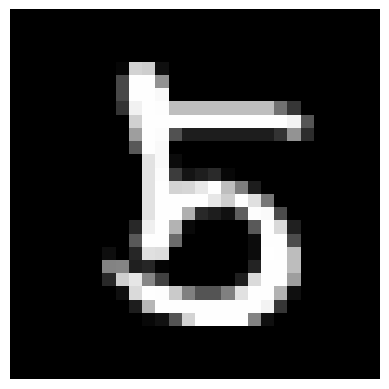

5 --- 5


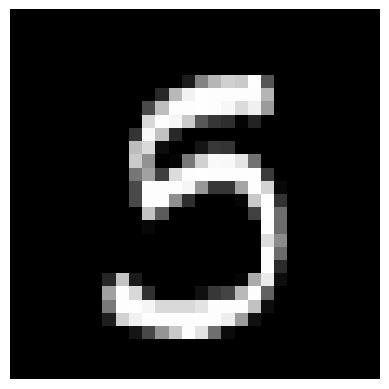

9 --- 9


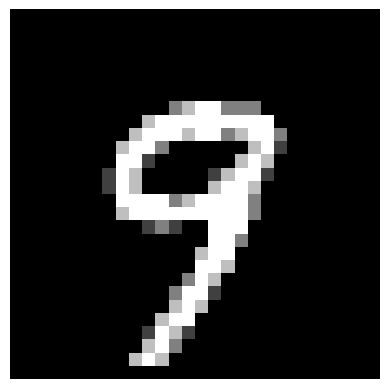

0 --- 0


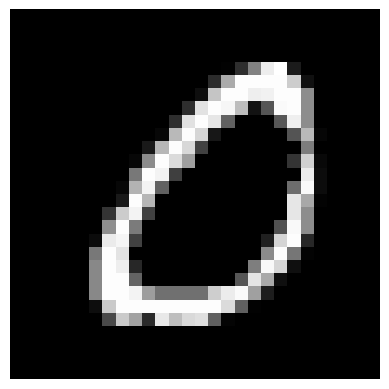

8 --- 8


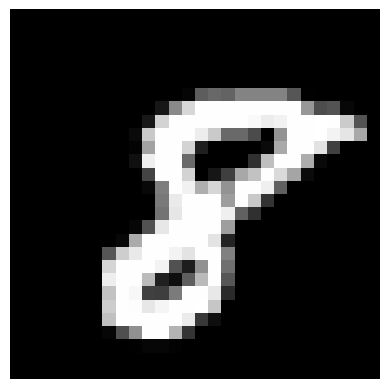

9 --- 9


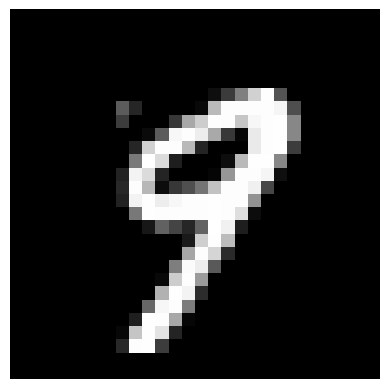

3 --- 3


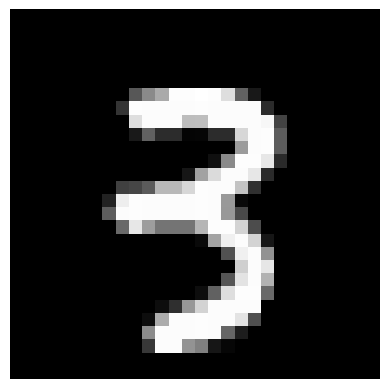

0 --- 0


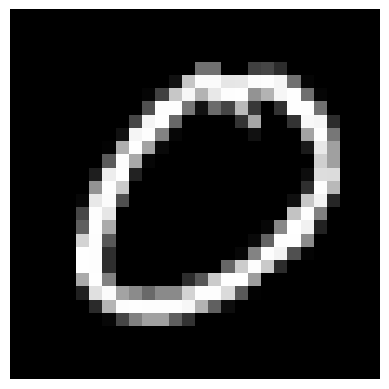

3 --- 3


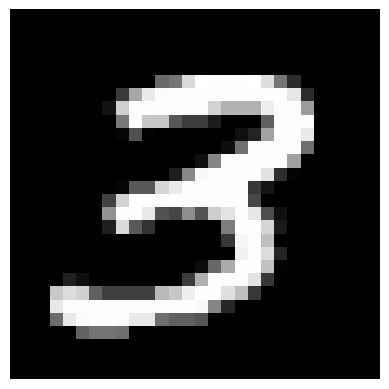

7 --- 7


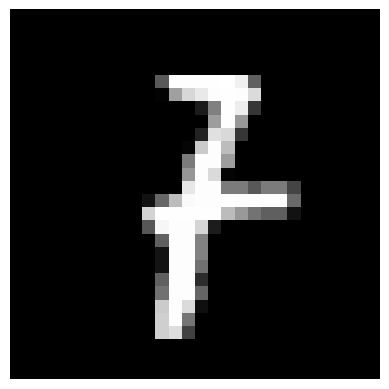

7 --- 7


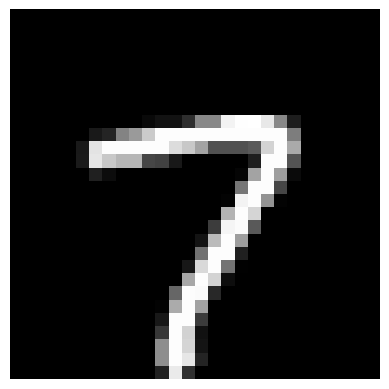

5 --- 5


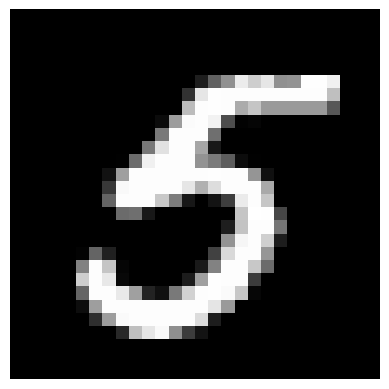

2 --- 2


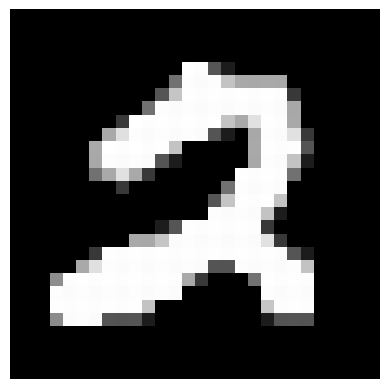

3 --- 3


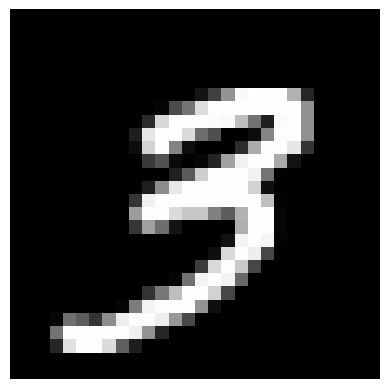

0 --- 0


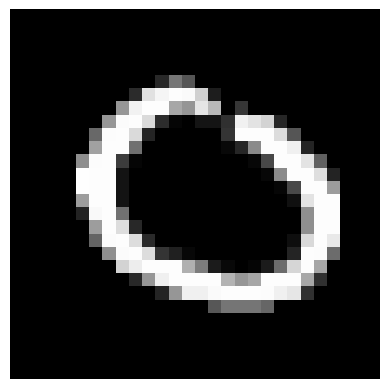

3 --- 3


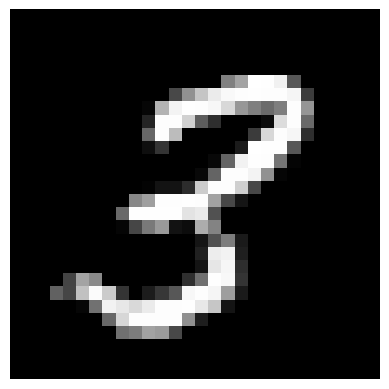

9 --- 9


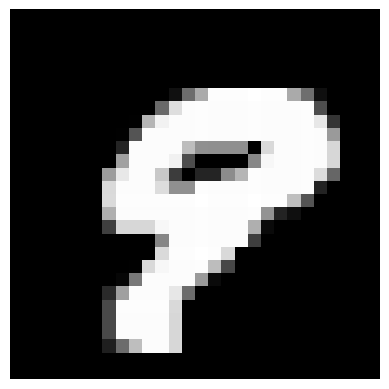

1 --- 1


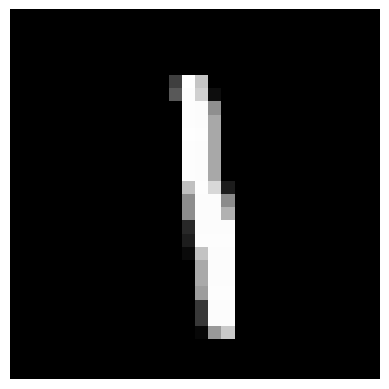

4 --- 4


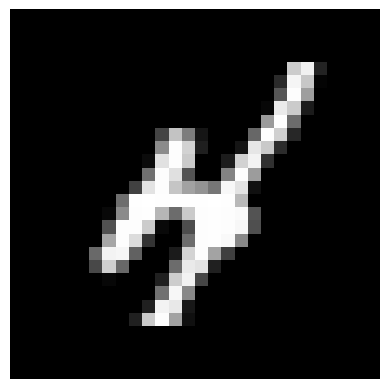

0 --- 0


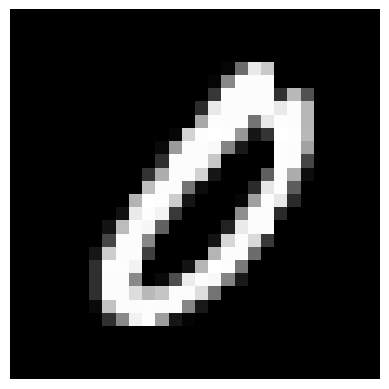

0 --- 0


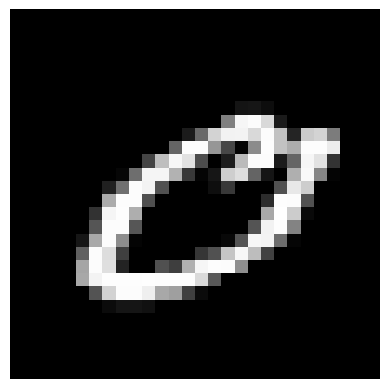

1 --- 1


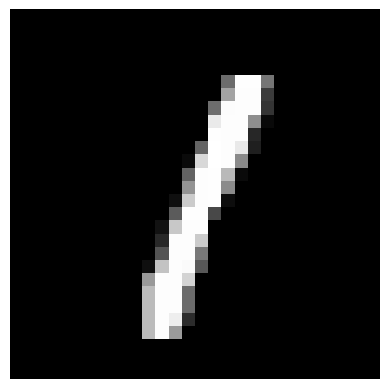

6 --- 6


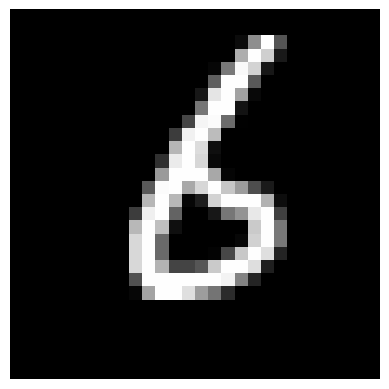

0 --- 0


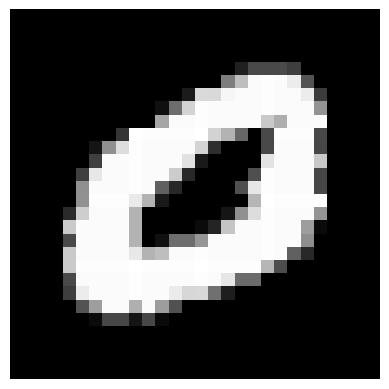

8 --- 8


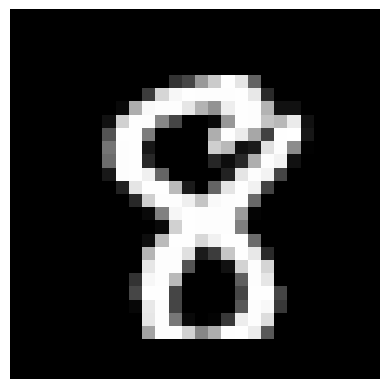

6 --- 6


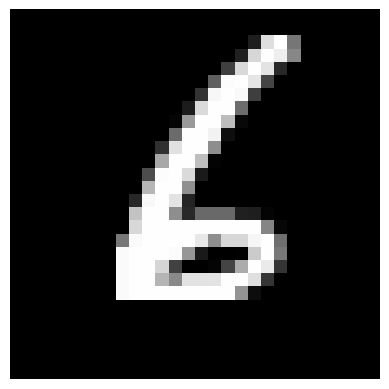

3 --- 3


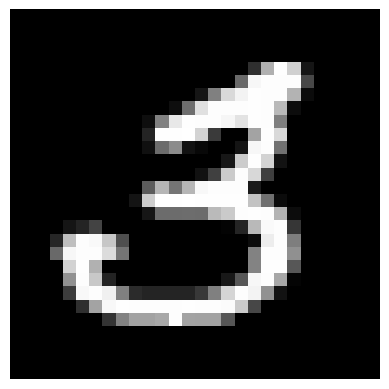

0 --- 0


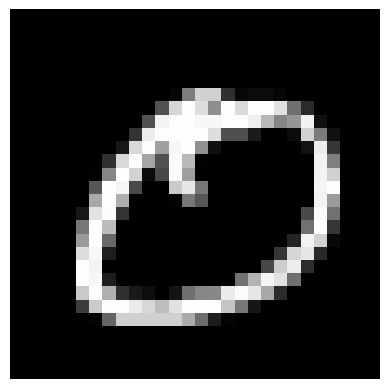

5 --- 5


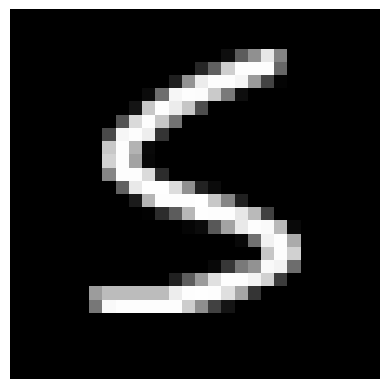

6 --- 6


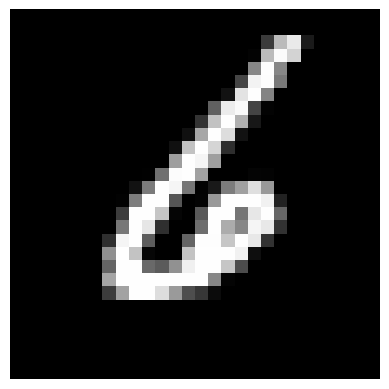

6 --- 6


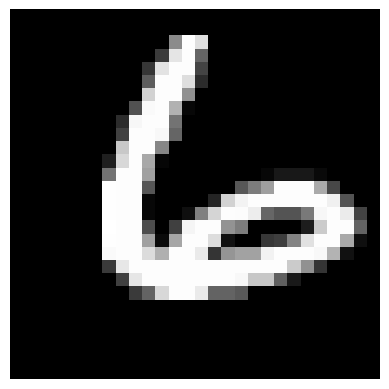

8 --- 8


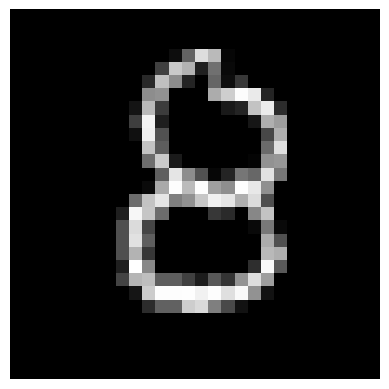

3 --- 3


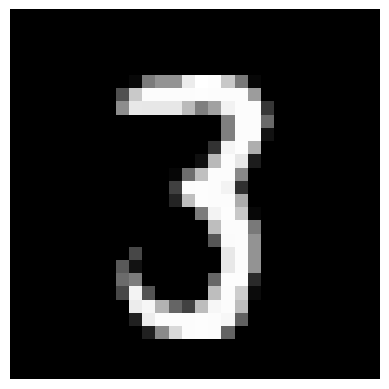

0 --- 0


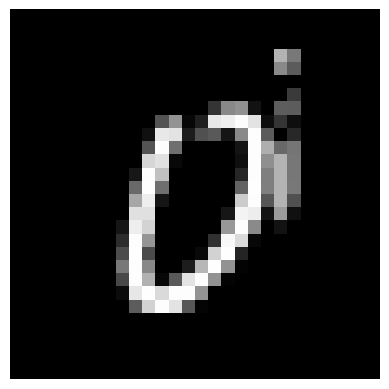

0 --- 0


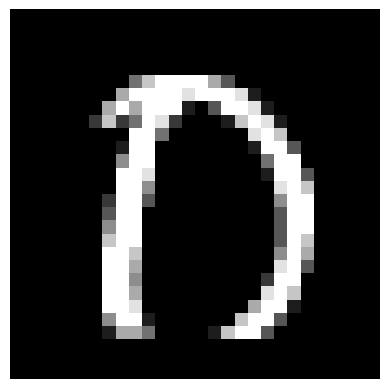

5 --- 5


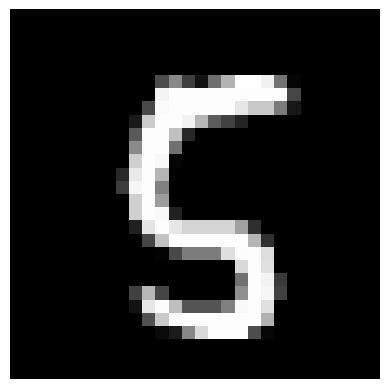

8 --- 8


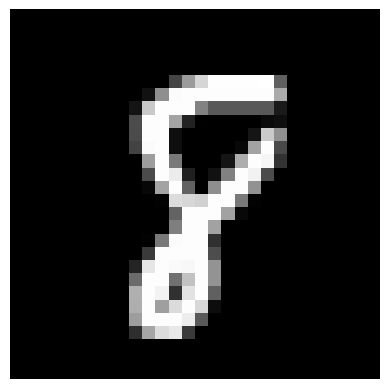

5 --- 5


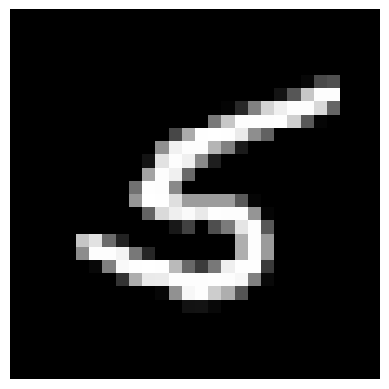

4 --- 4


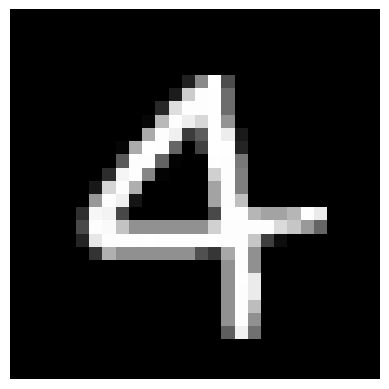

3 --- 3


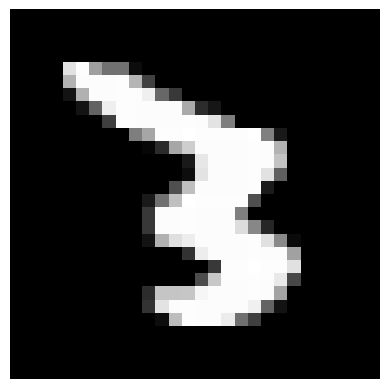

0 --- 0


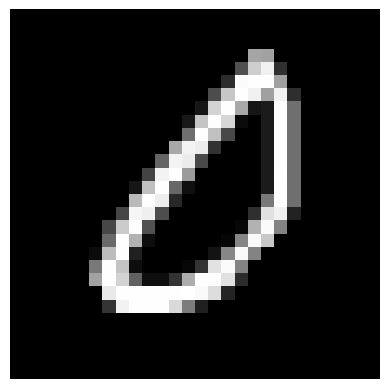

5 --- 5


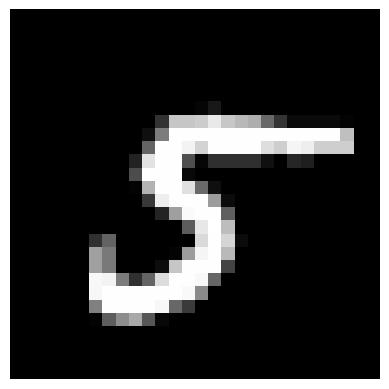

2 --- 2


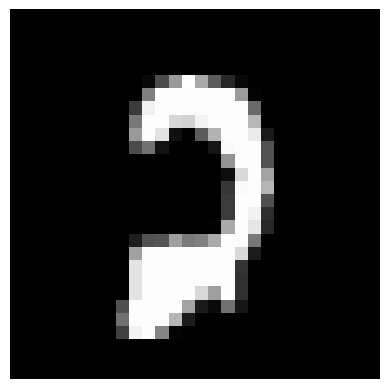

4 --- 4


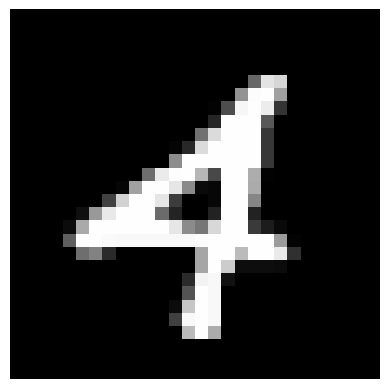

5 --- 5


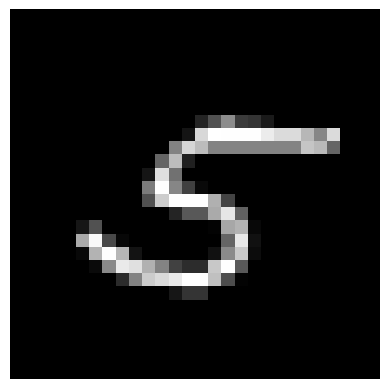

5 --- 5


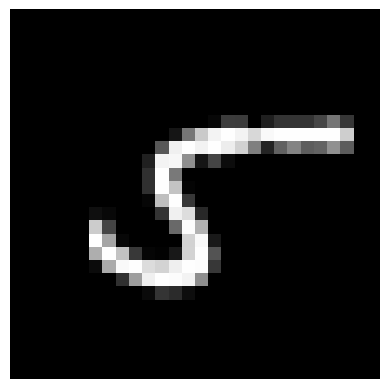

0 --- 0


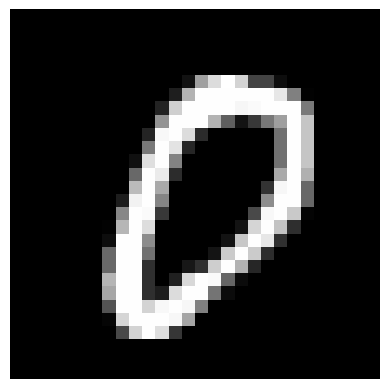

3 --- 3


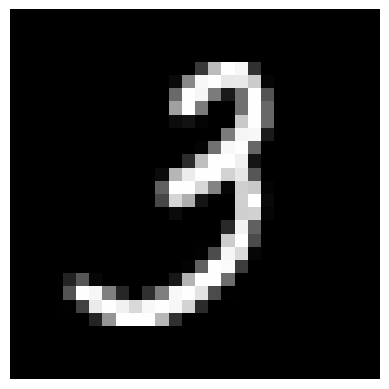

3 --- 3


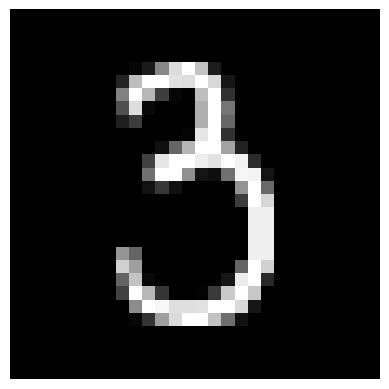

1 --- 1


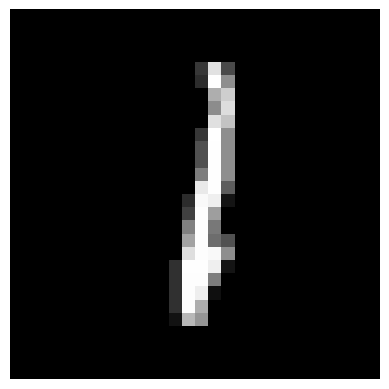

5 --- 5


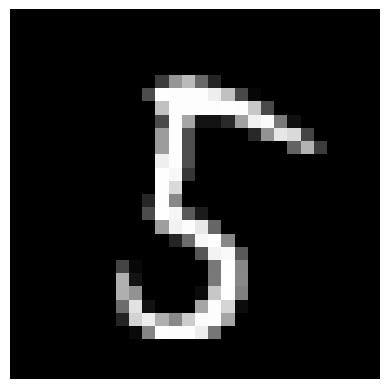

0 --- 0


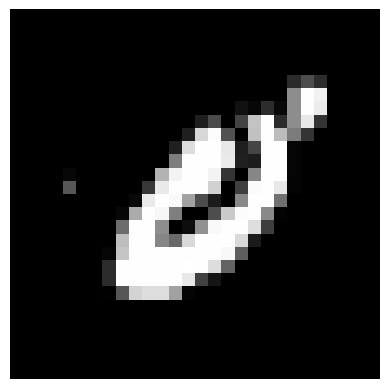

3 --- 3


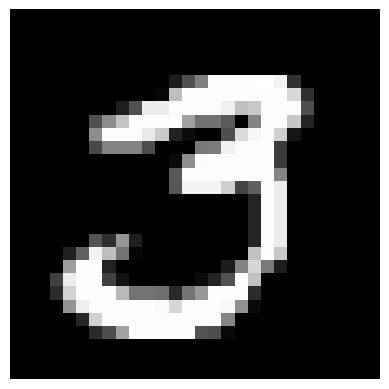

7 --- 7


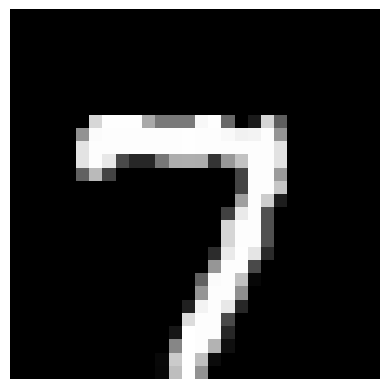

5 --- 5


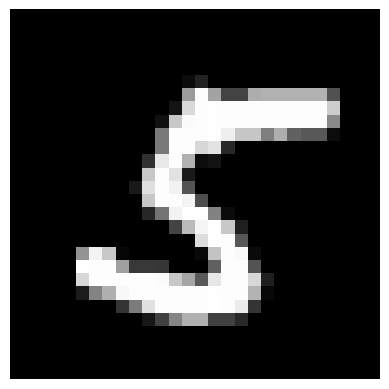

1 --- 1


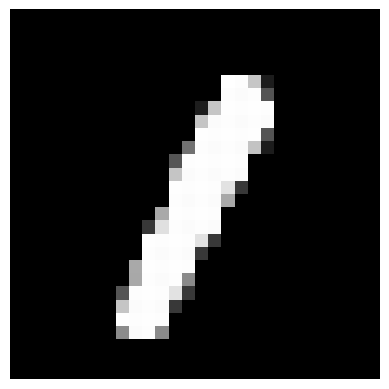

0 --- 0


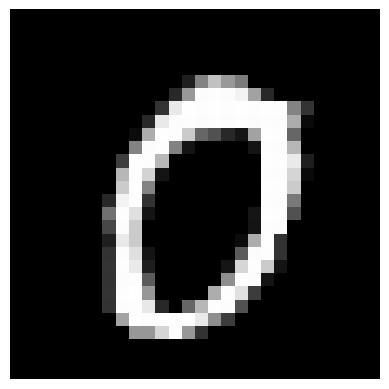

2 --- 2


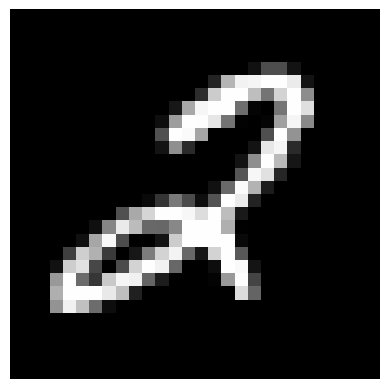

8 --- 8


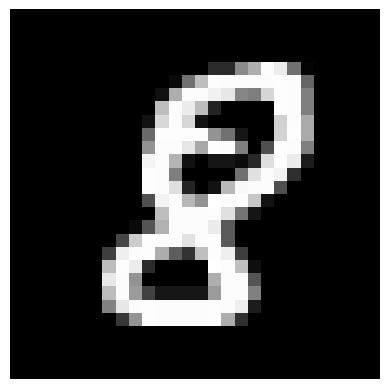

7 --- 7


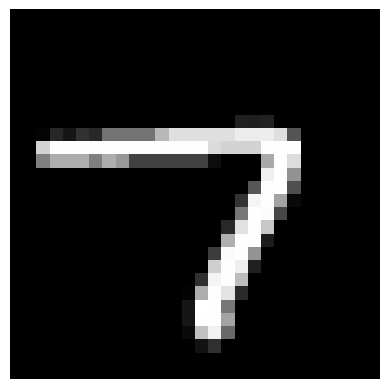

9 --- 9


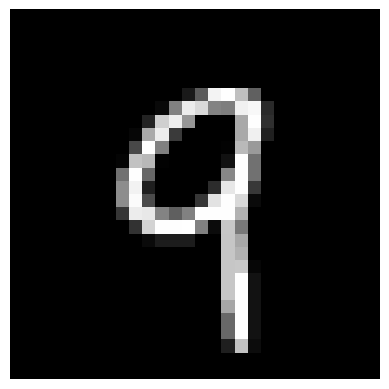

0 --- 0


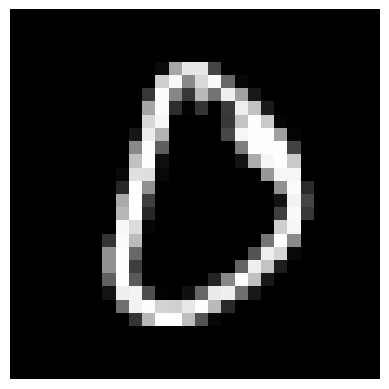

2 --- 2


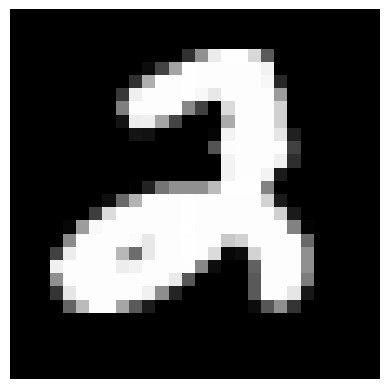

4 --- 4


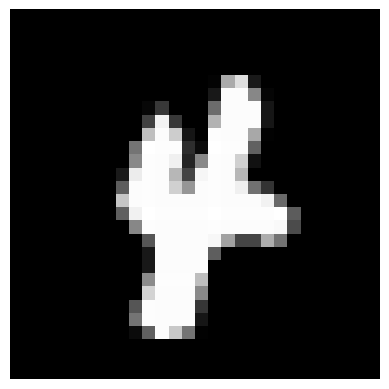

6 --- 6


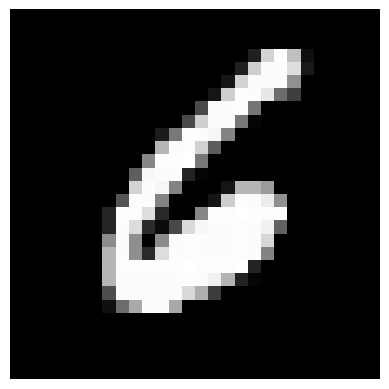

4 --- 4


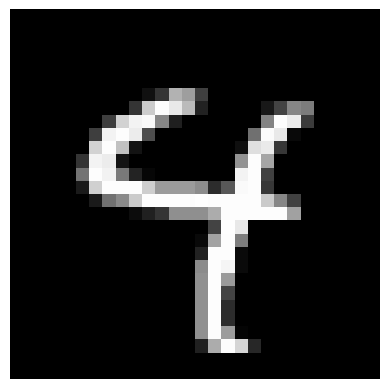

1 --- 1


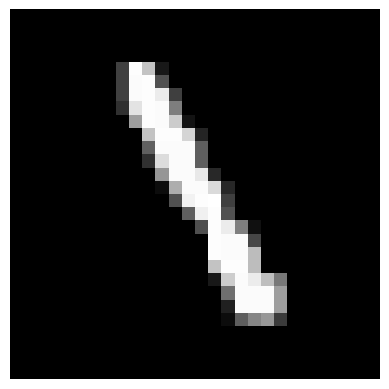

9 --- 9


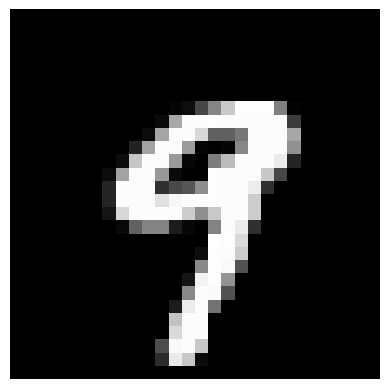

8 --- 8


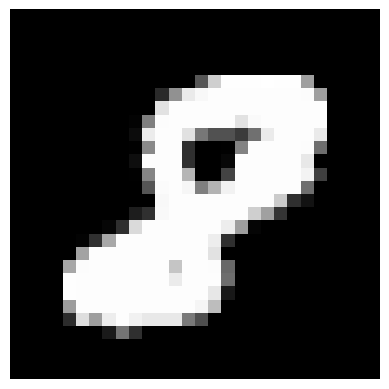

9 --- 9


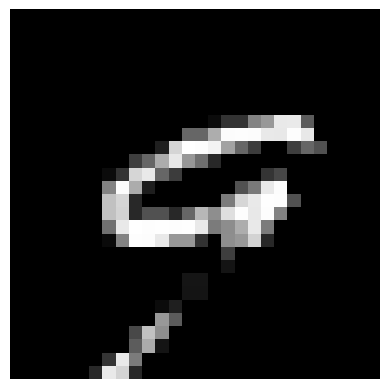

2 --- 2


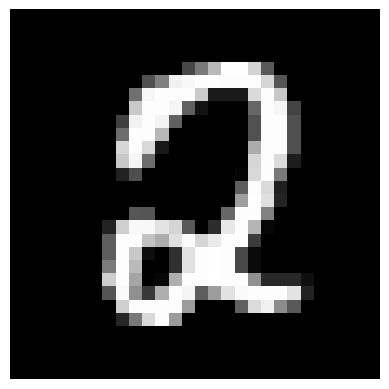

7 --- 7


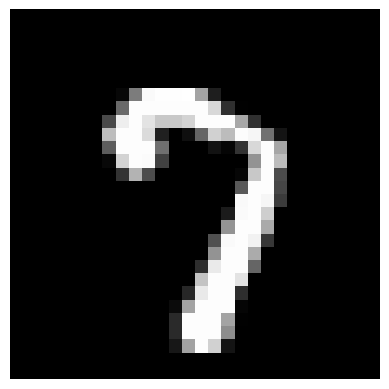

9 --- 9


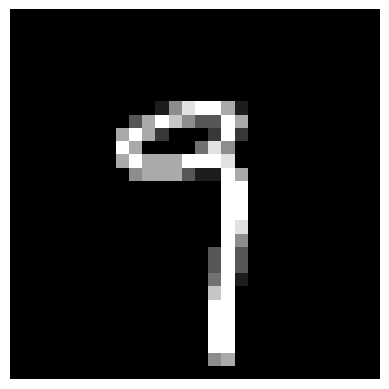

8 --- 8


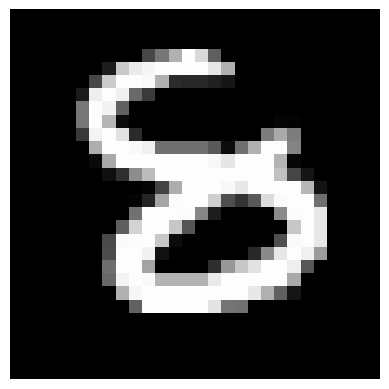

6 --- 6


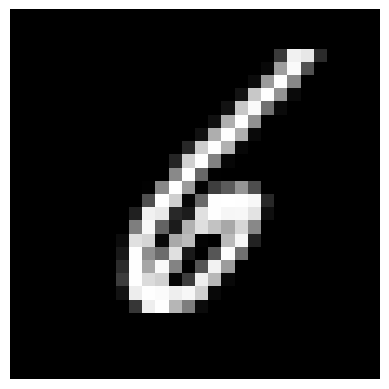

5 --- 5


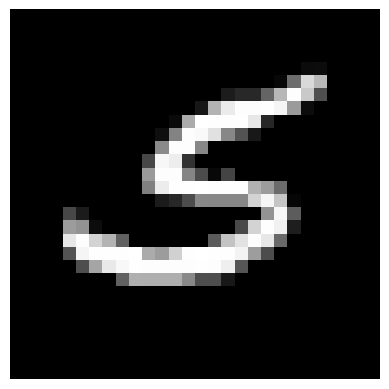

0 --- 0


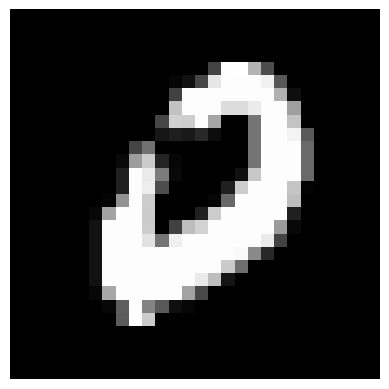

2 --- 2


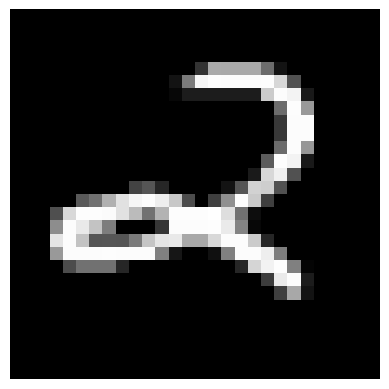

5 --- 5


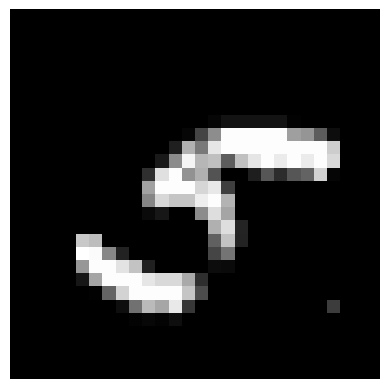

7 --- 7


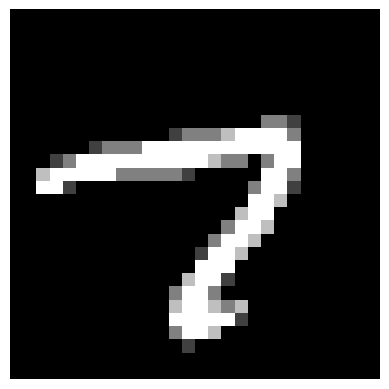

7 --- 7


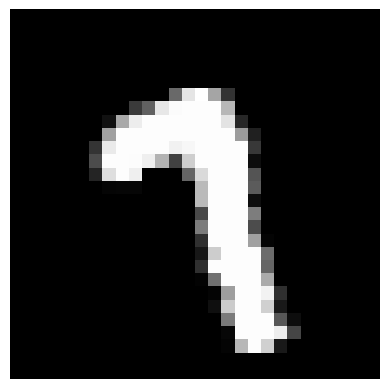

2 --- 2


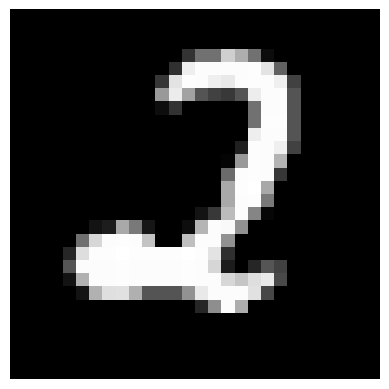

4 --- 4


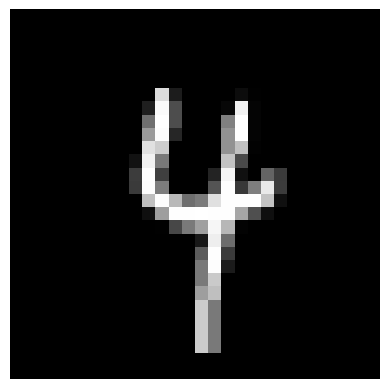

7 --- 7


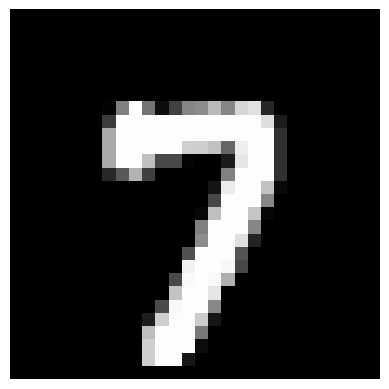

3 --- 3


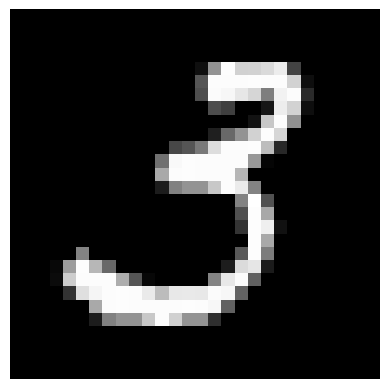

1 --- 1


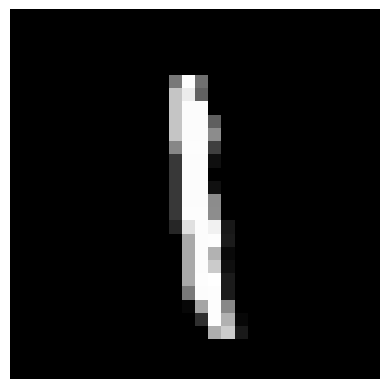

2 --- 2


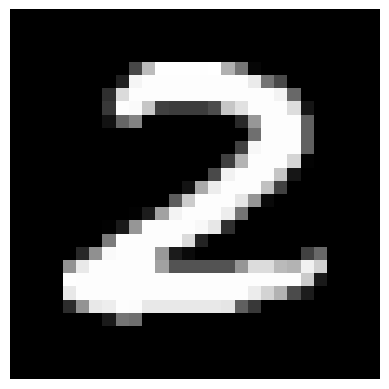

3 --- 3


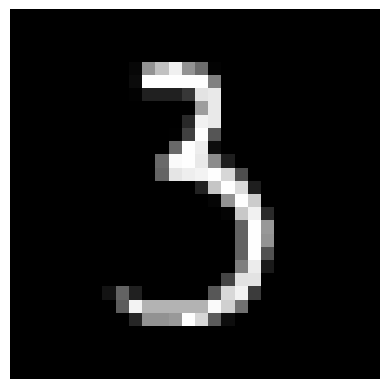

1 --- 1


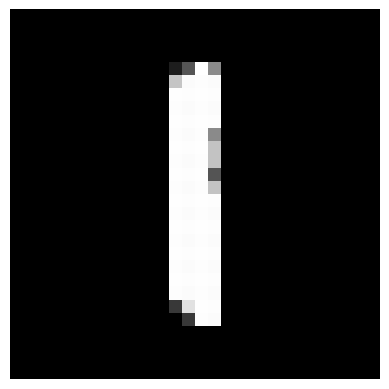

6 --- 6


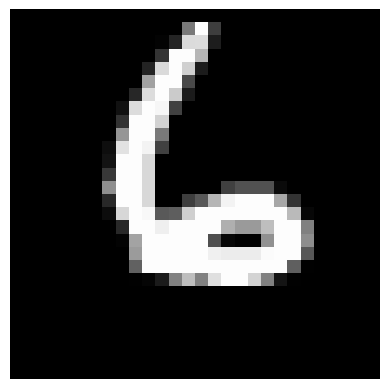

6 --- 6


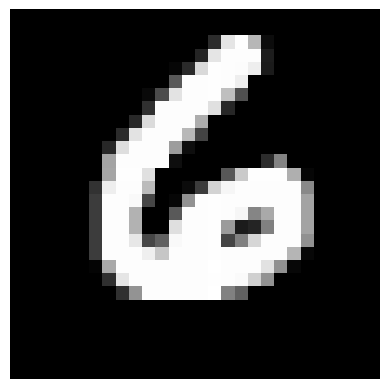

9 --- 9


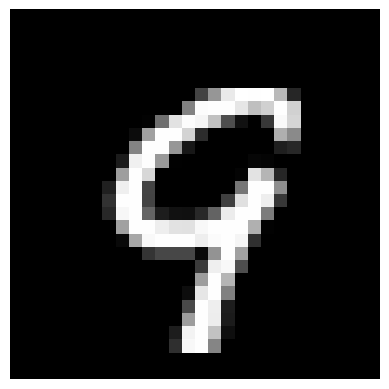

3 --- 3


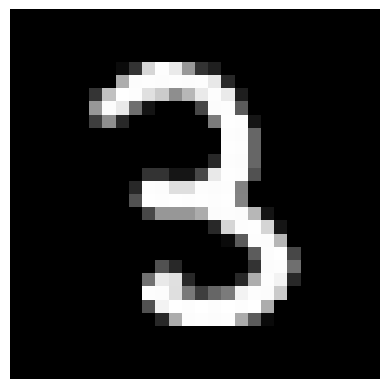

2 --- 2


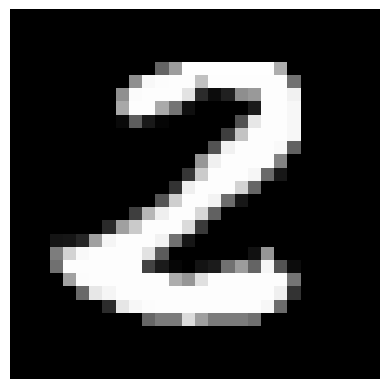

5 --- 5


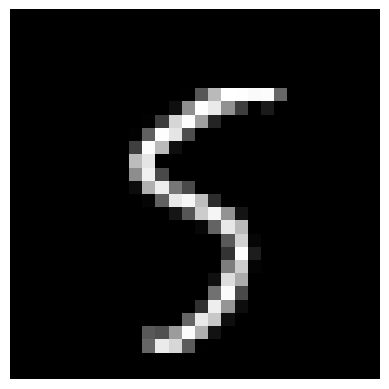

3 --- 3


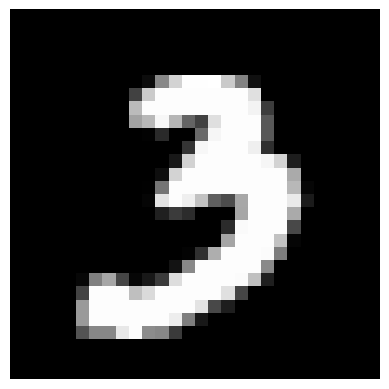

9 --- 9


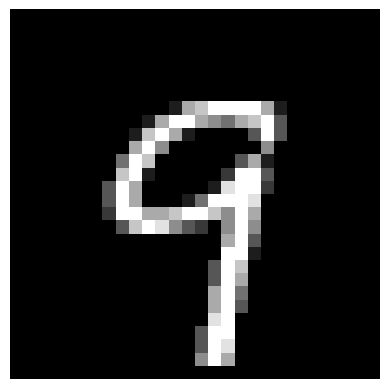

1 --- 1


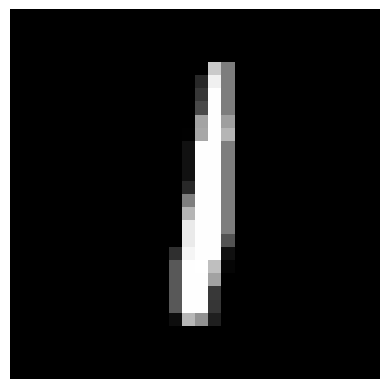

8 --- 8


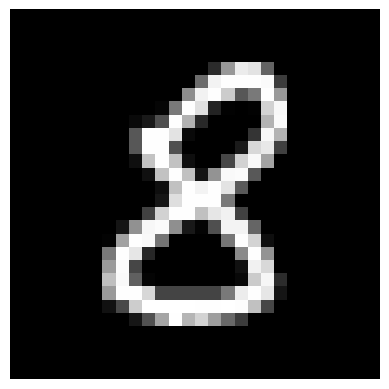

8 --- 8


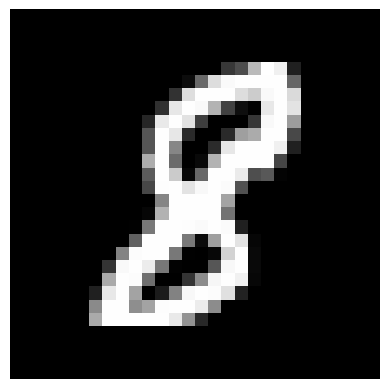

1 --- 1


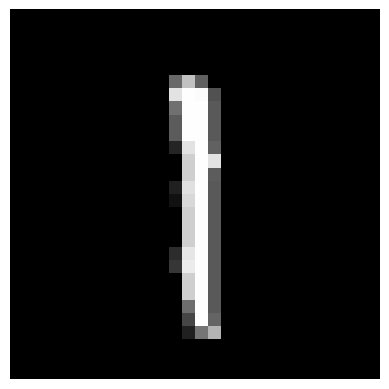

2 --- 2


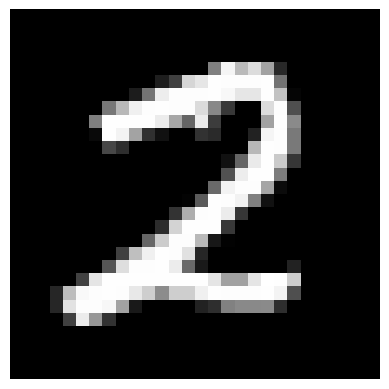

3 --- 3


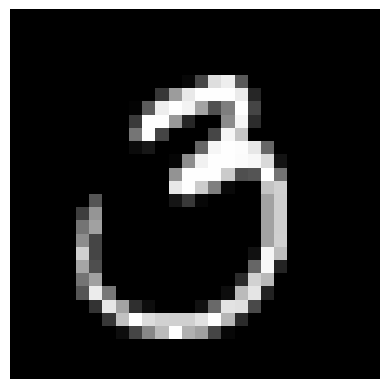

4 --- 4


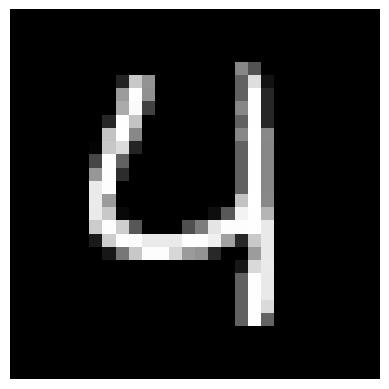

6 --- 6


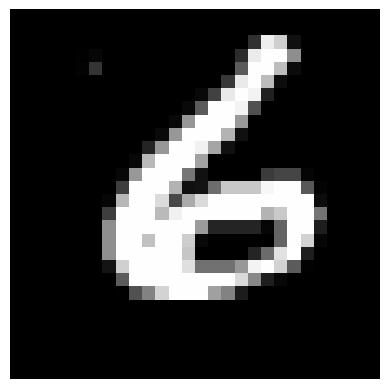

2 --- 2


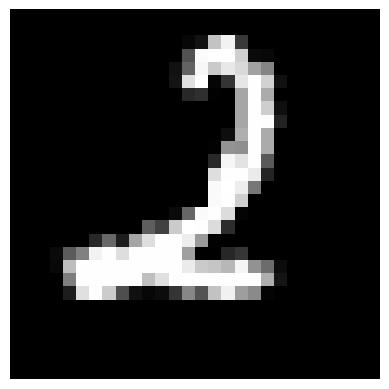

1 --- 1


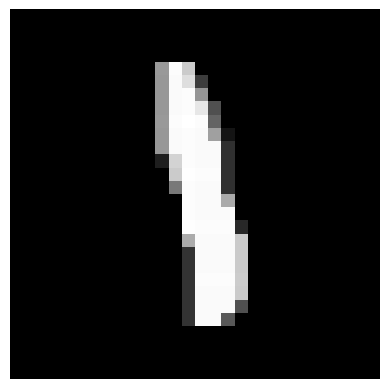

0 --- 0


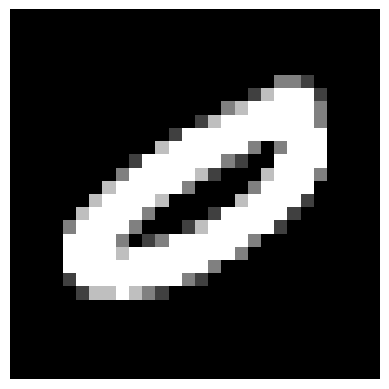

1 --- 1


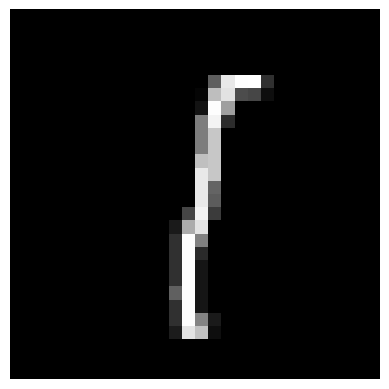

9 --- 9


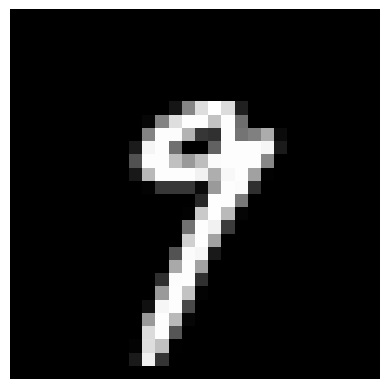

7 --- 7


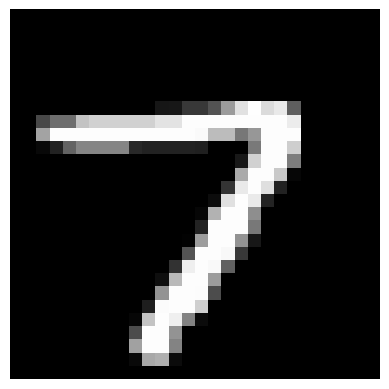

7 --- 7


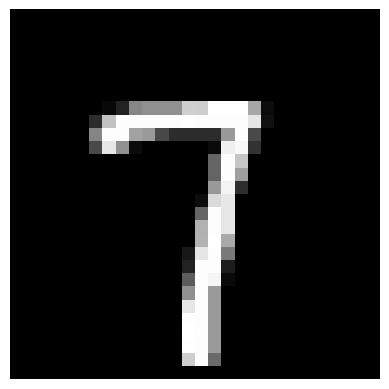

6 --- 6


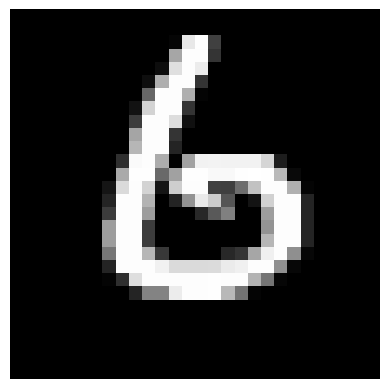

7 --- 7


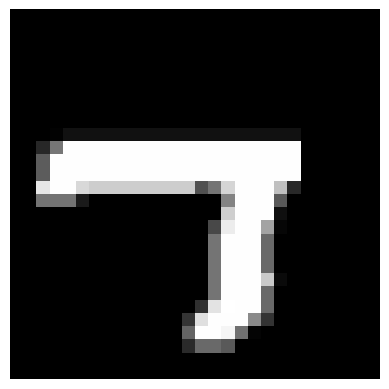

5 --- 5


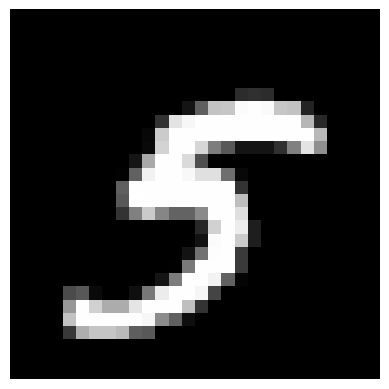

0 --- 0


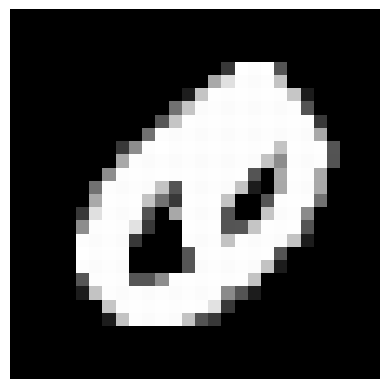

7 --- 7


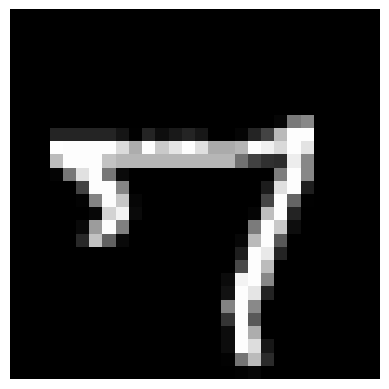

4 --- 4


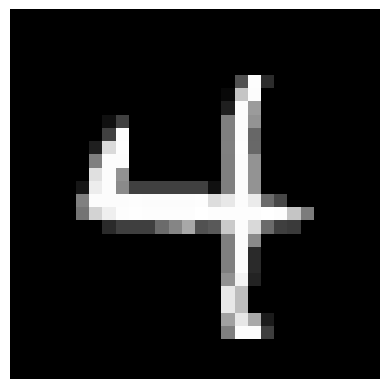

2 --- 2


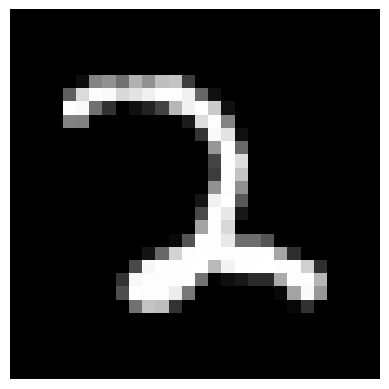

4 --- 4


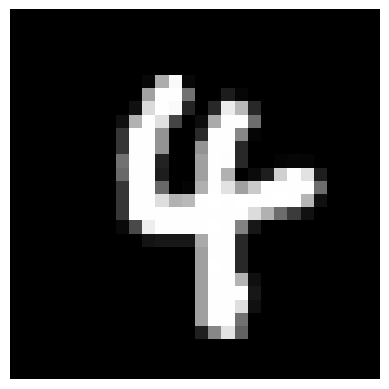

4 --- 4


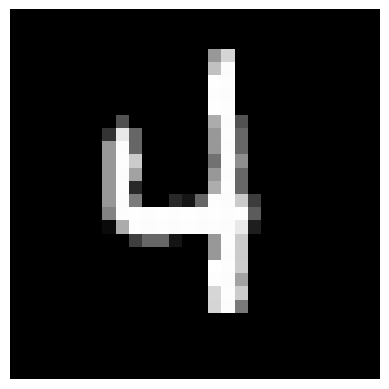

6 --- 6


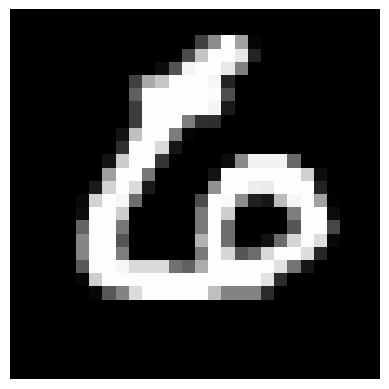

2 --- 2


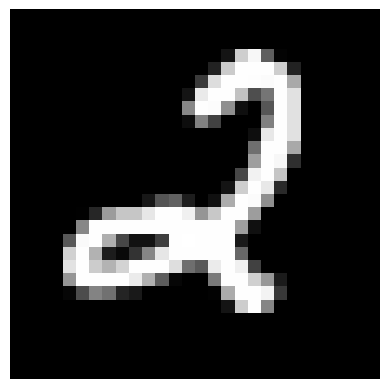

5 --- 5


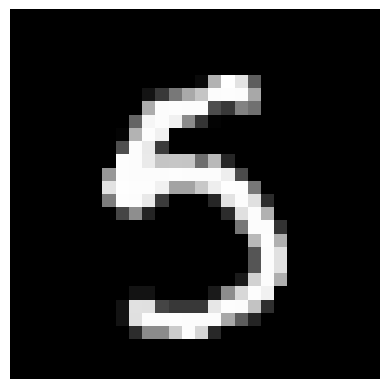

2 --- 2


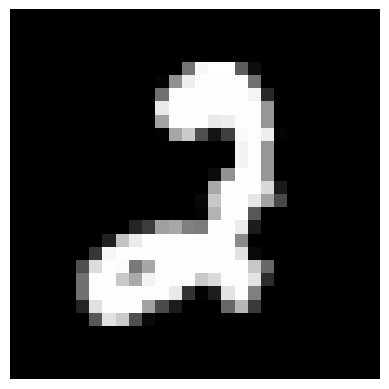

4 --- 4


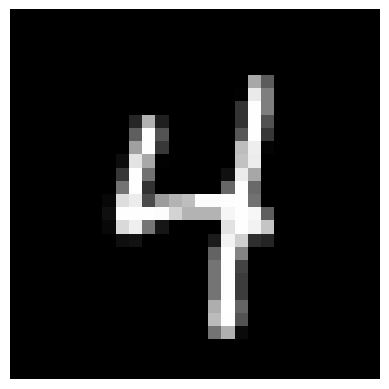

9 --- 9


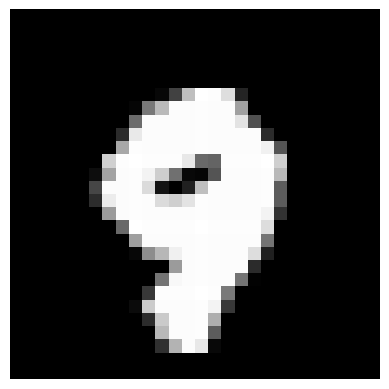

4 --- 4


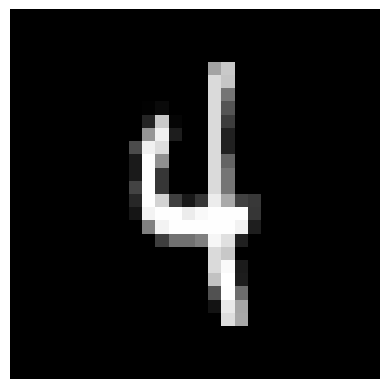

5 --- 5


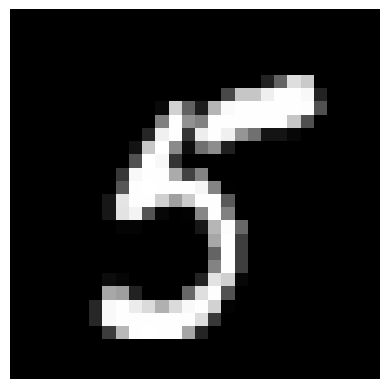

0 --- 0


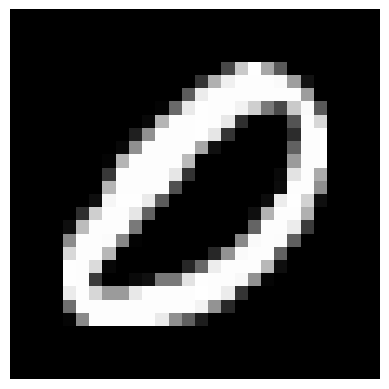

3 --- 3


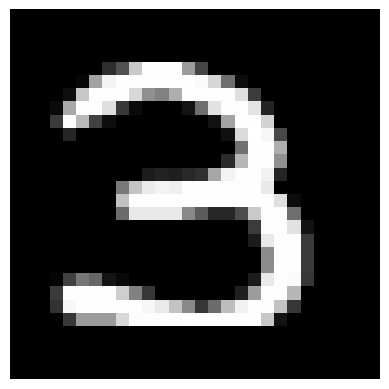

3 --- 3


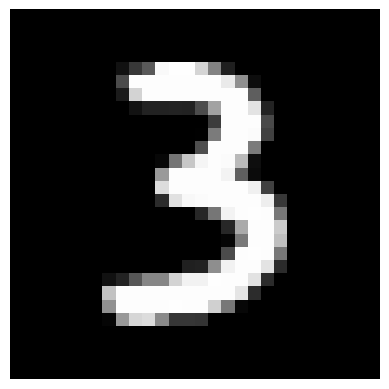

5 --- 5


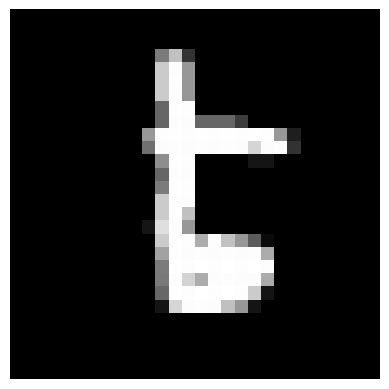

1 --- 1


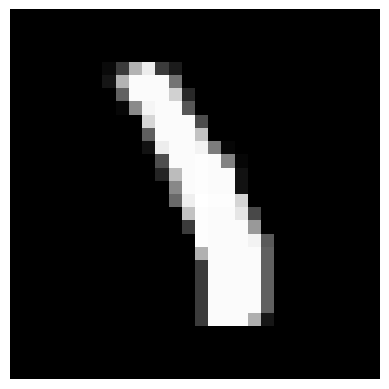

3 --- 3


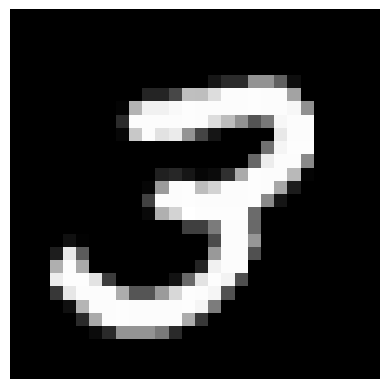

7 --- 7


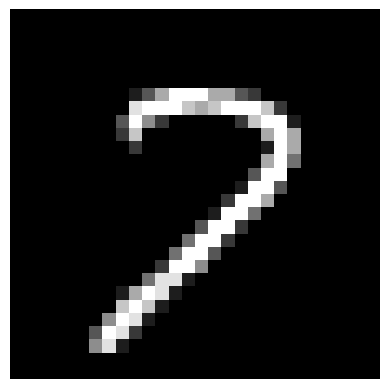

3 --- 3


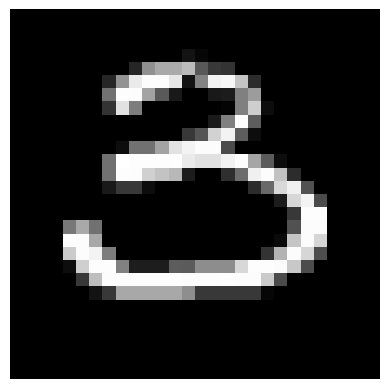

7 --- 7


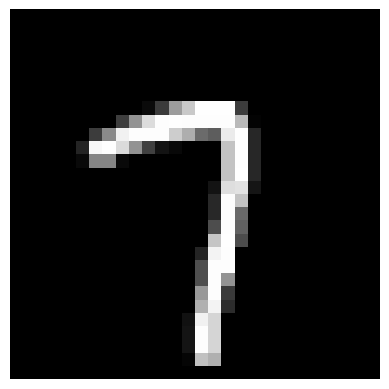

5 --- 5


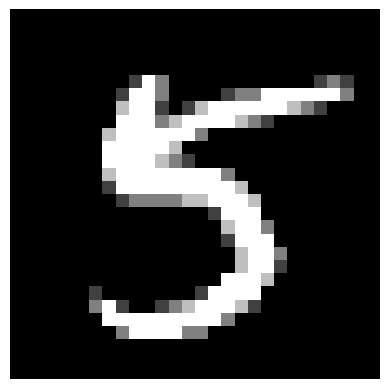

7 --- 7


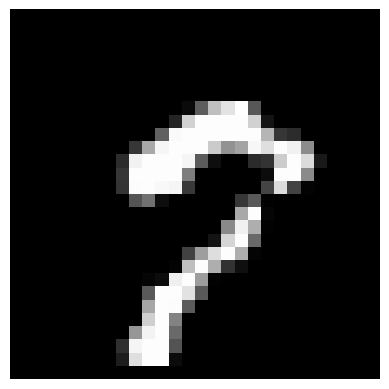

1 --- 1


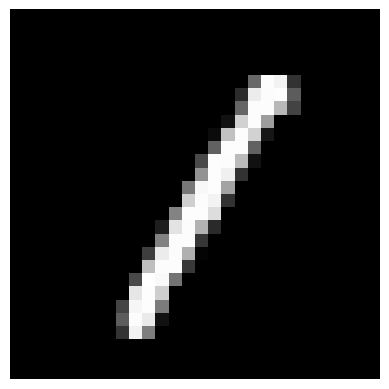

1 --- 1


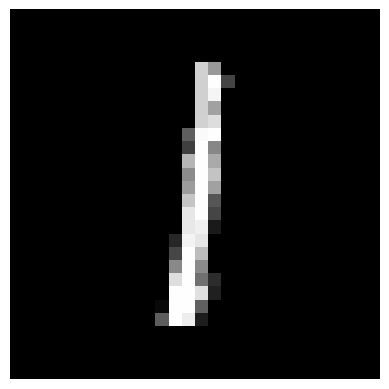

9 --- 9


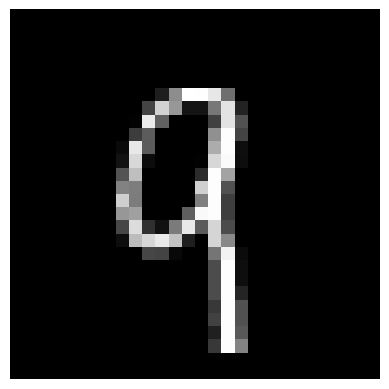

0 --- 0


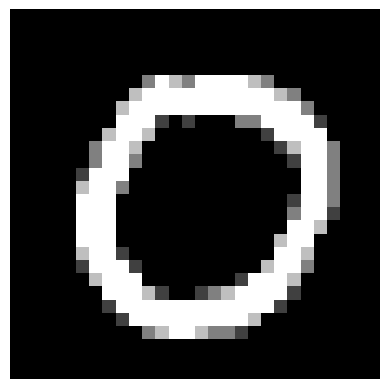

4 --- 4


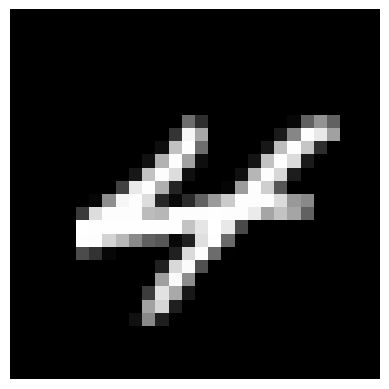

5 --- 5


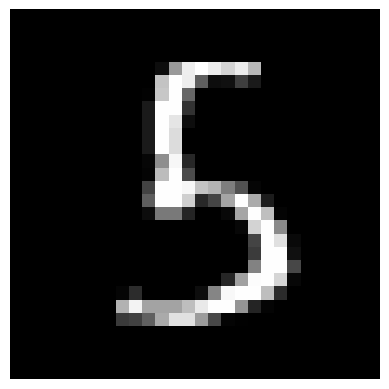

9 --- 9


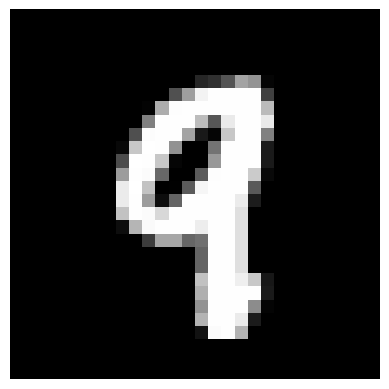

7 --- 7


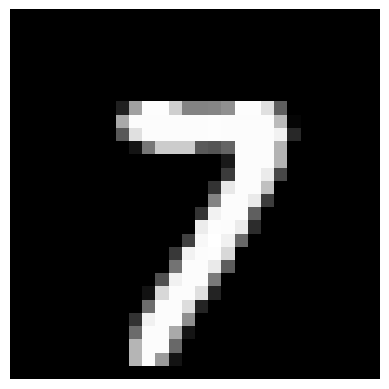

6 --- 6


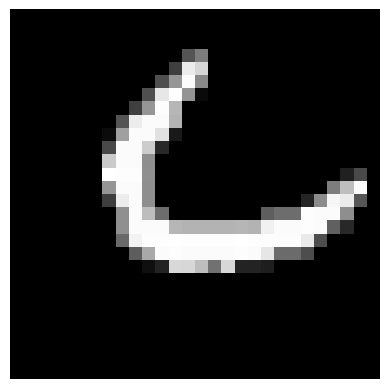

0 --- 0


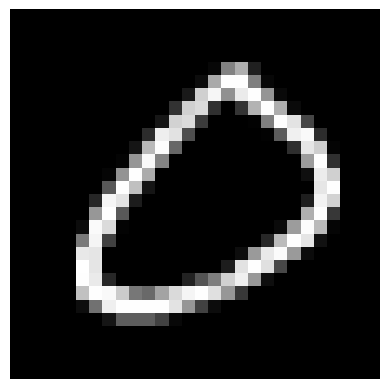

9 --- 9


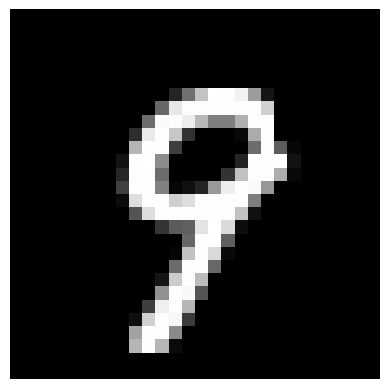

2 --- 2


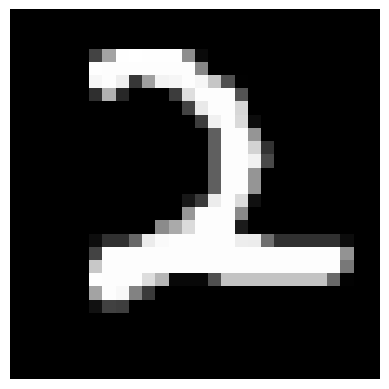

3 --- 3


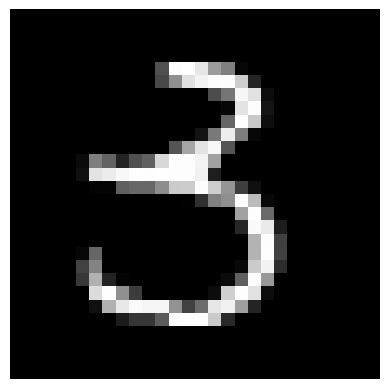

9 --- 9


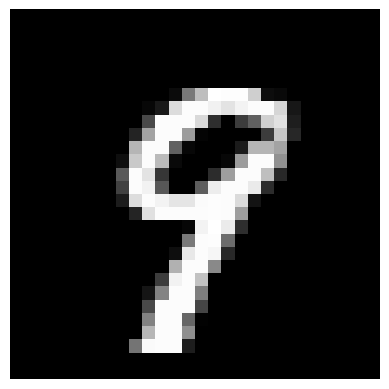

4 --- 4


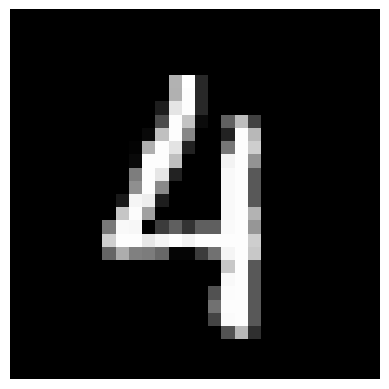

1 --- 1


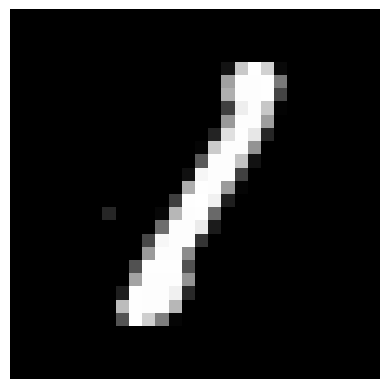

1 --- 1


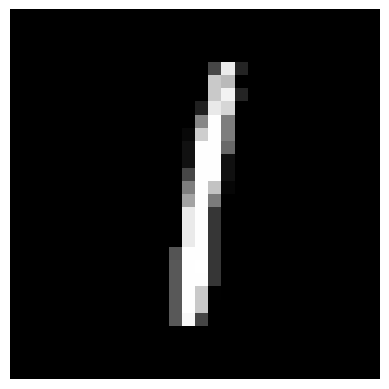

9 --- 9


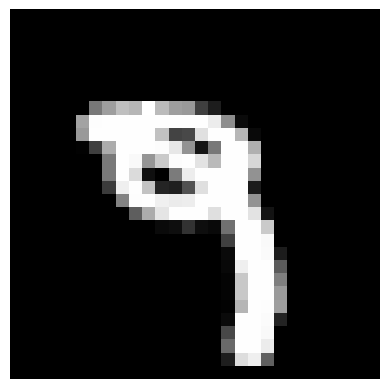

6 --- 6


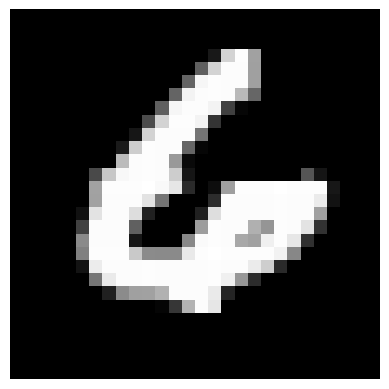

6 --- 6


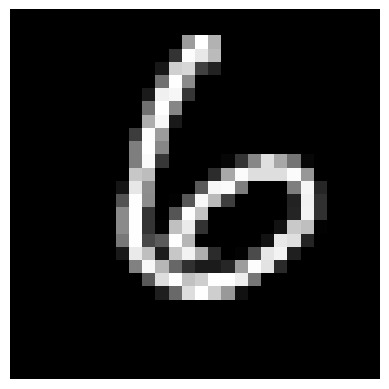

1 --- 1


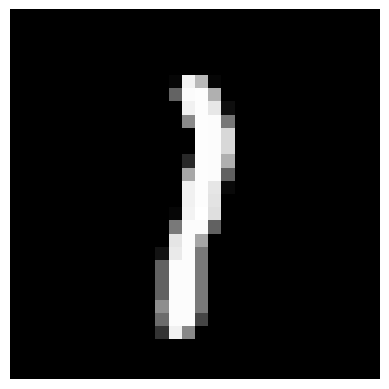

3 --- 3


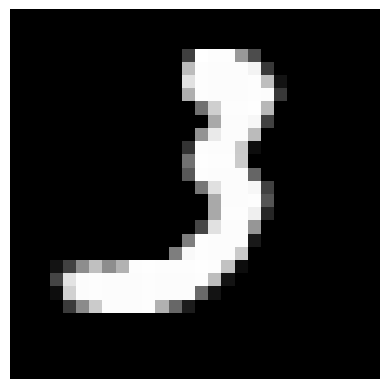

1 --- 1


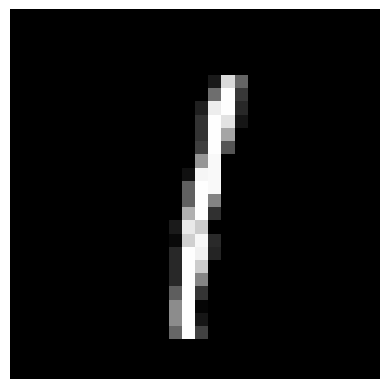

7 --- 7


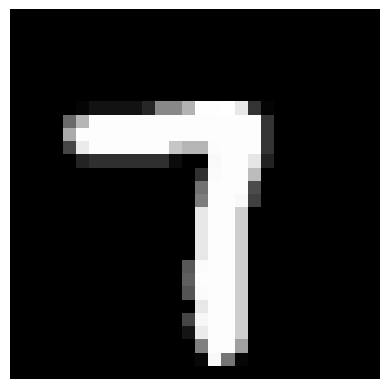

3 --- 3


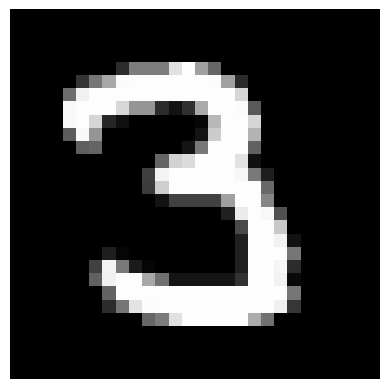

0 --- 0


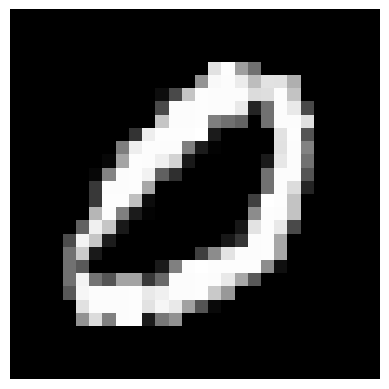

5 --- 5


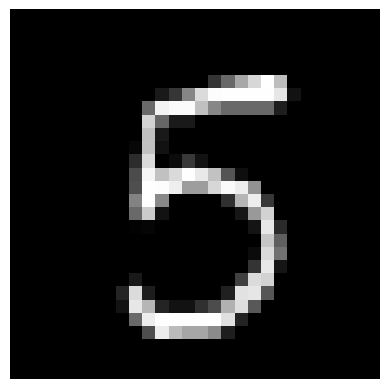

7 --- 7


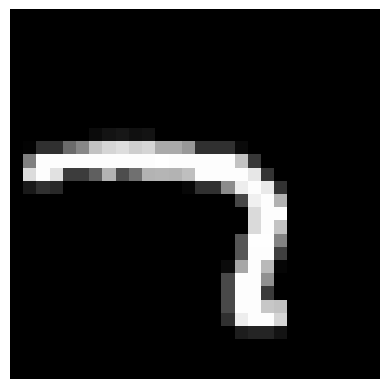

5 --- 5


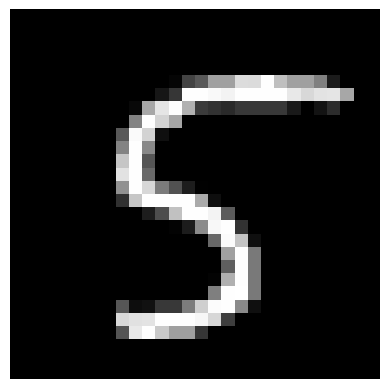

4 --- 4


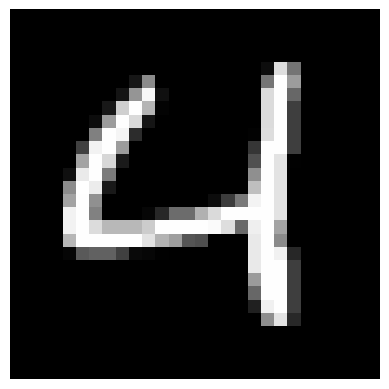

8 --- 8


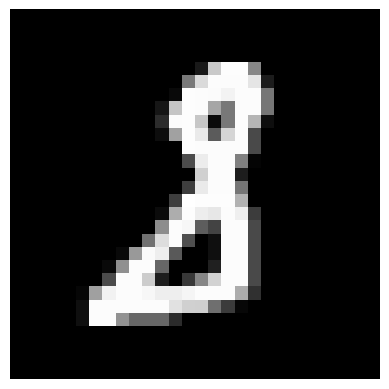

0 --- 0


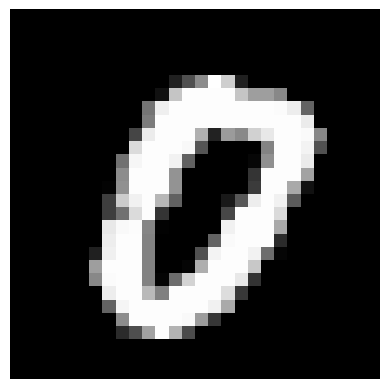

1 --- 1


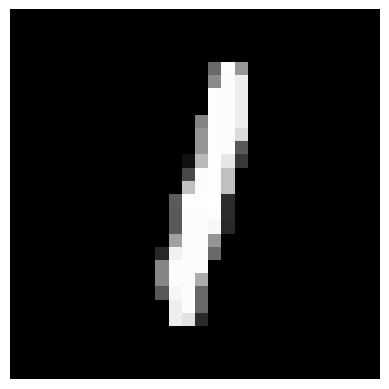

9 --- 9


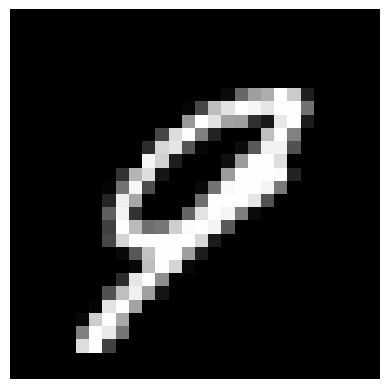

7 --- 7


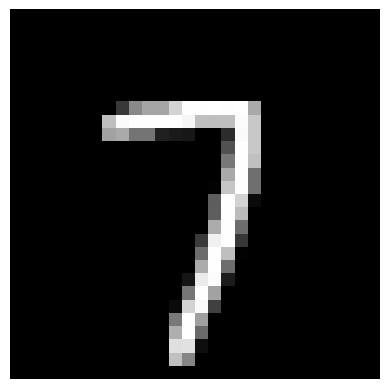

9 --- 9


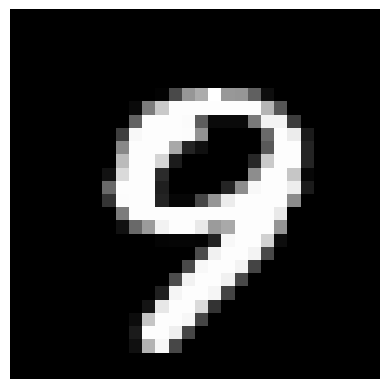

2 --- 2


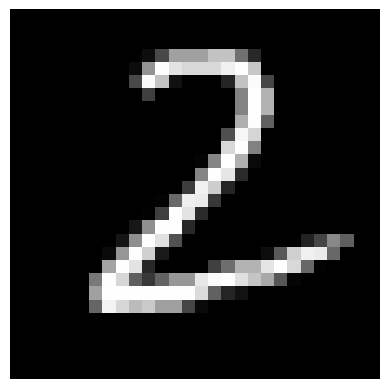

4 --- 4


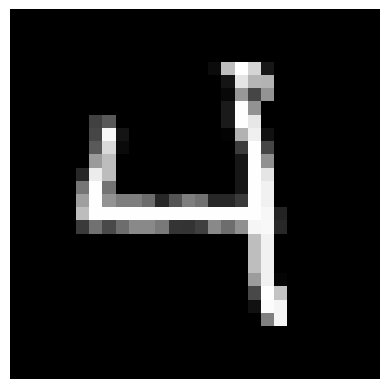

7 --- 7


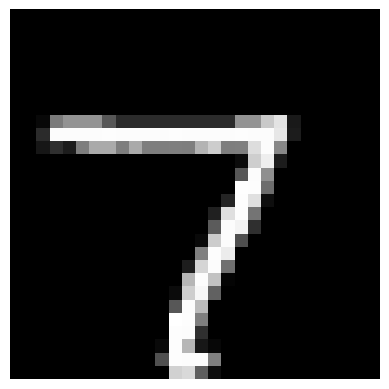

4 --- 4


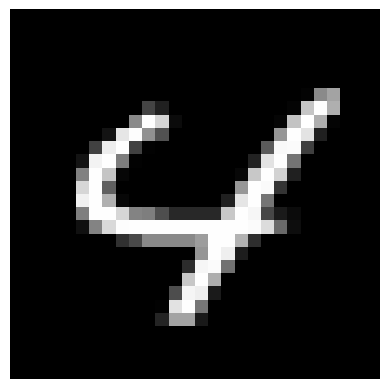

3 --- 3


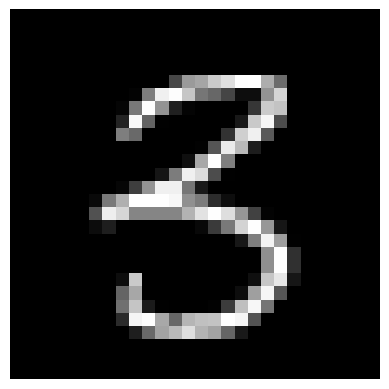

1 --- 1


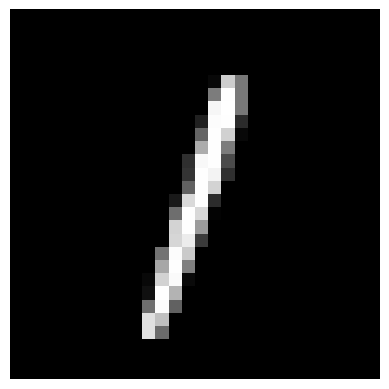

5 --- 5


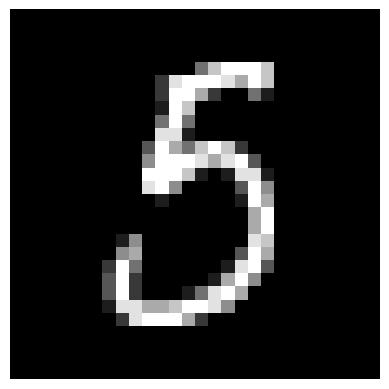

3 --- 3


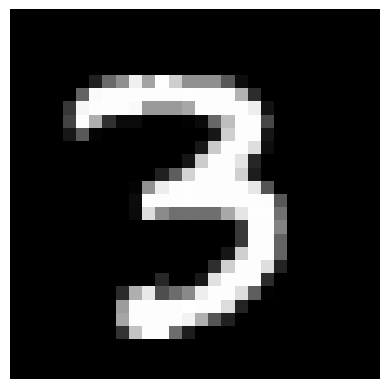

8 --- 8


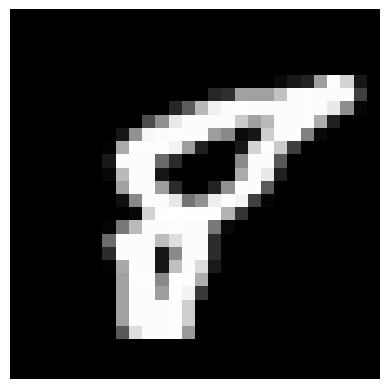

3 --- 3


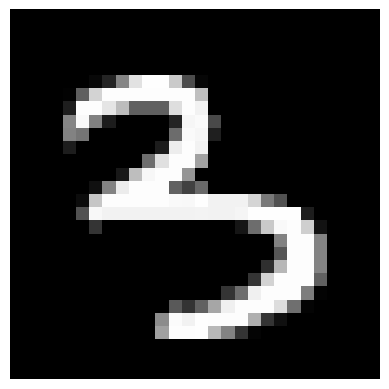

6 --- 6


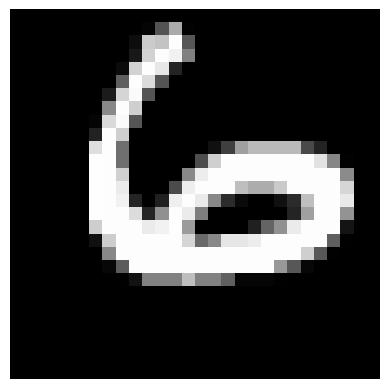

1 --- 1


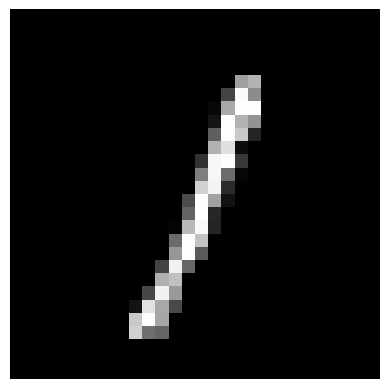

8 --- 8


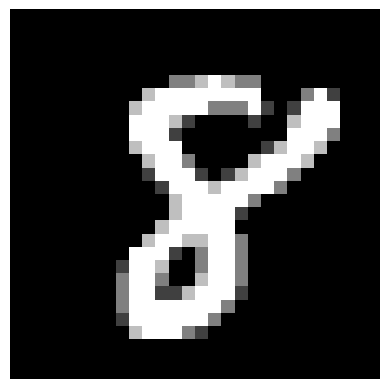

0 --- 0


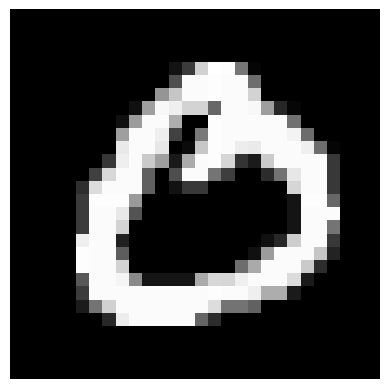

7 --- 7


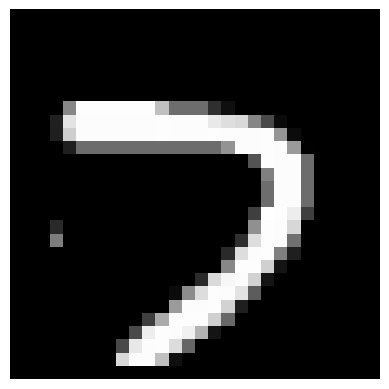

3 --- 3


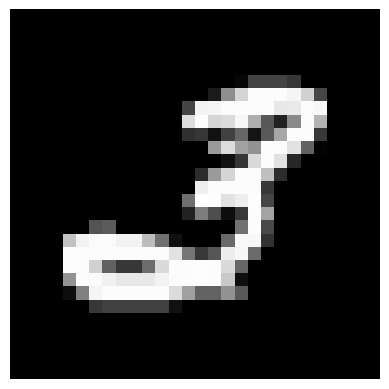

9 --- 9


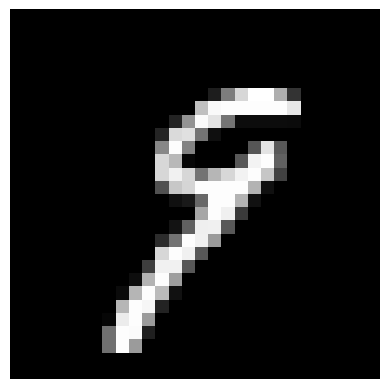

5 --- 5


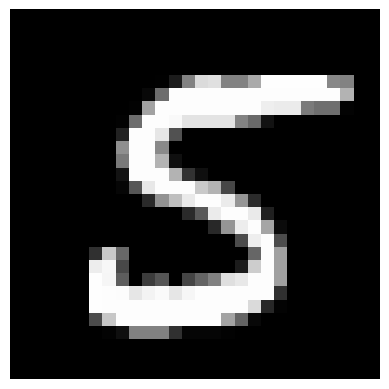

1 --- 1


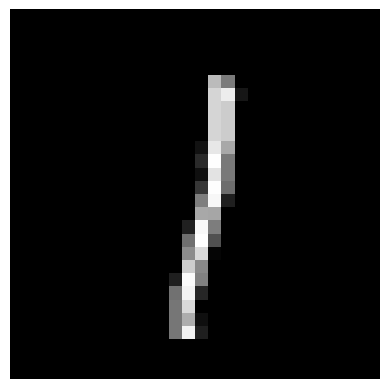

9 --- 9


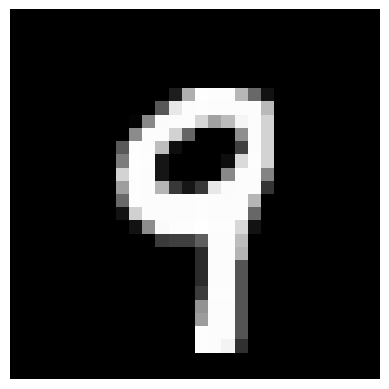

6 --- 6


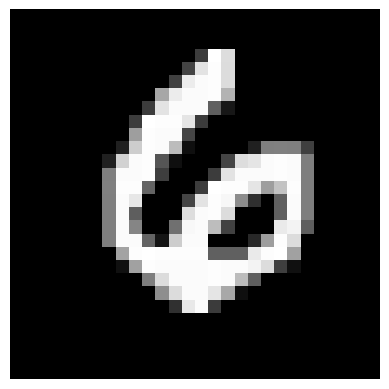

0 --- 0


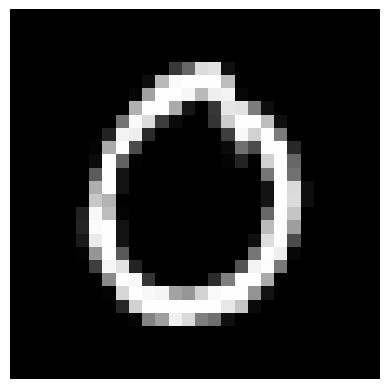

6 --- 6


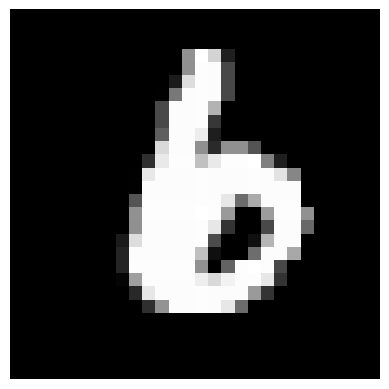

9 --- 9


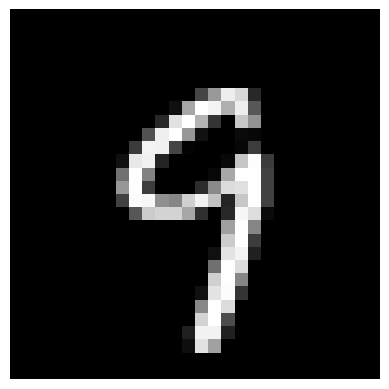

2 --- 2


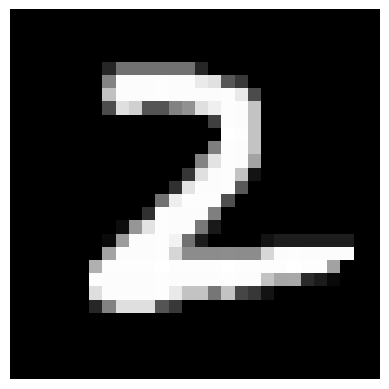

5 --- 5


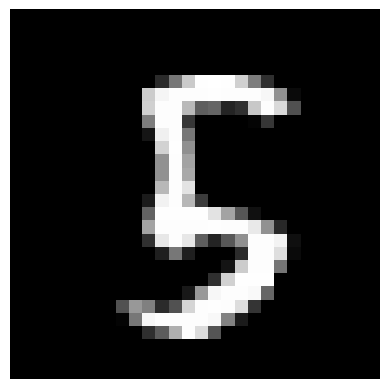

8 --- 8


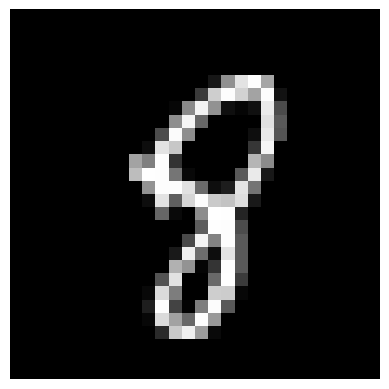

6 --- 6


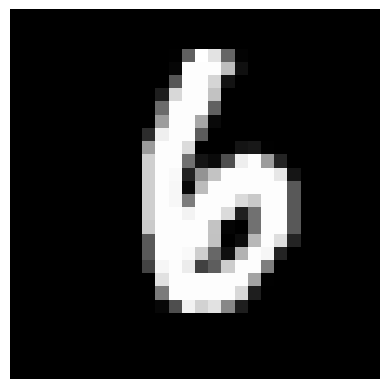

7 --- 7


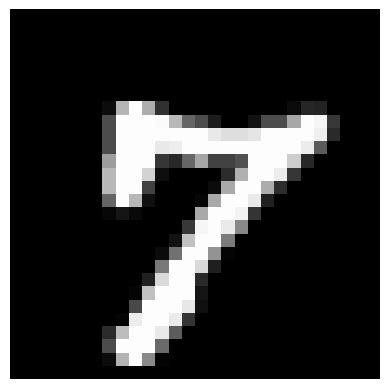

4 --- 4


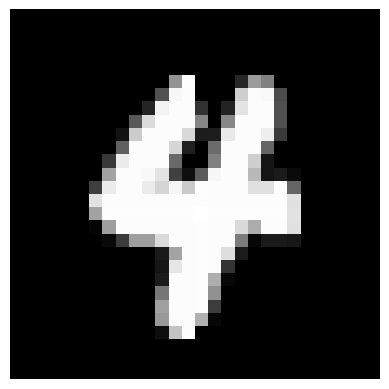

3 --- 3


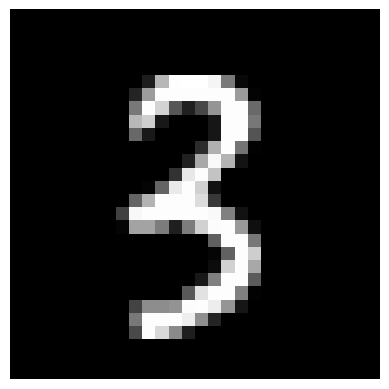

4 --- 4


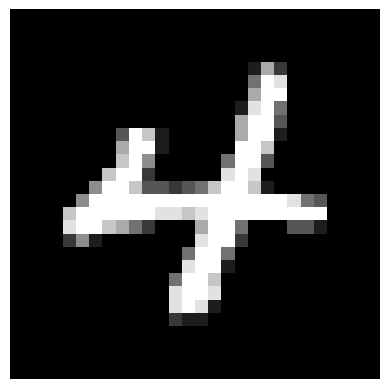

1 --- 1


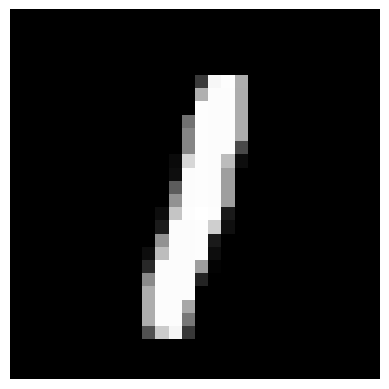

8 --- 8


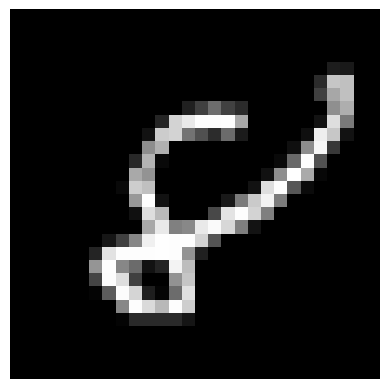

6 --- 6


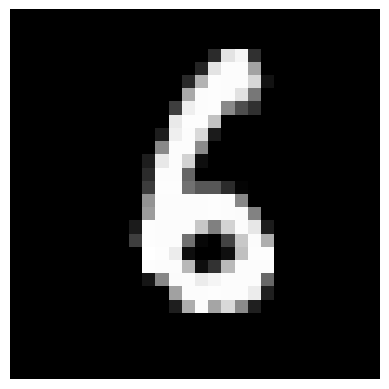

6 --- 6


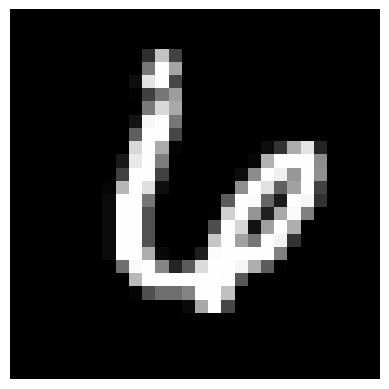

7 --- 7


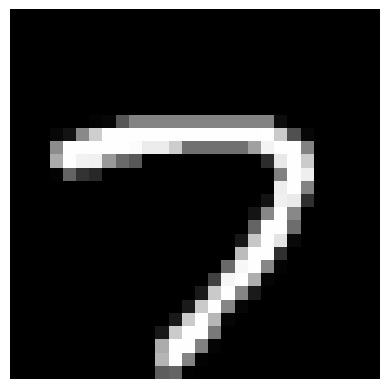

2 --- 2


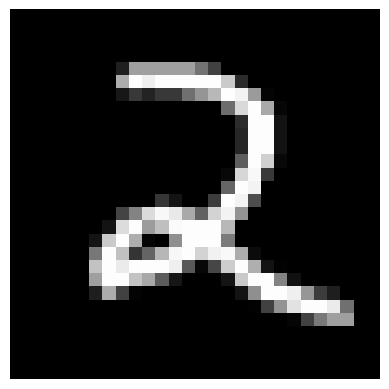

1 --- 1


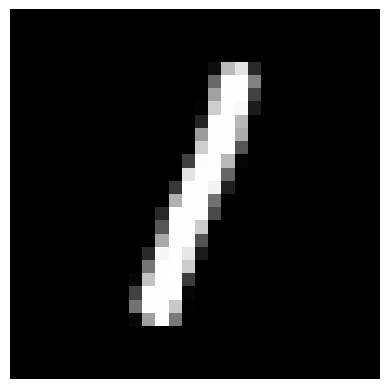

5 --- 5


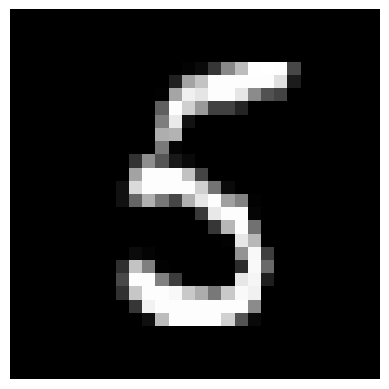

8 --- 8


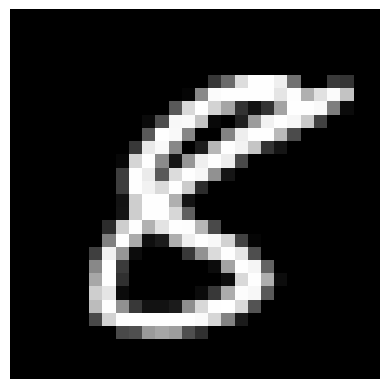

7 --- 7


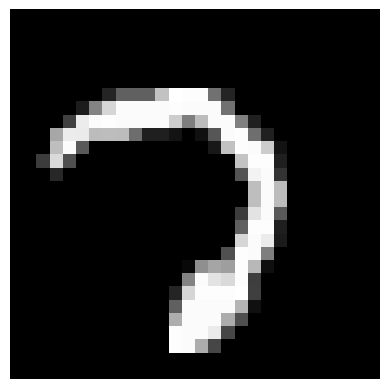

7 --- 7


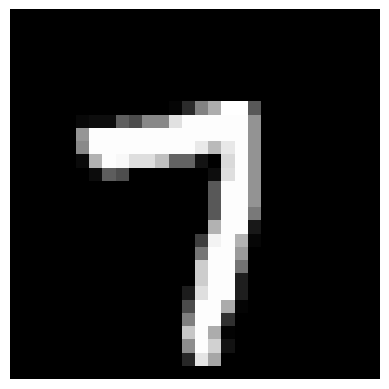

2 --- 2


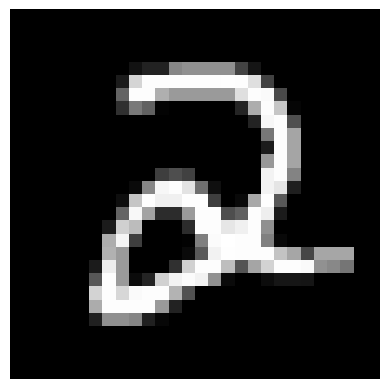

2 --- 2


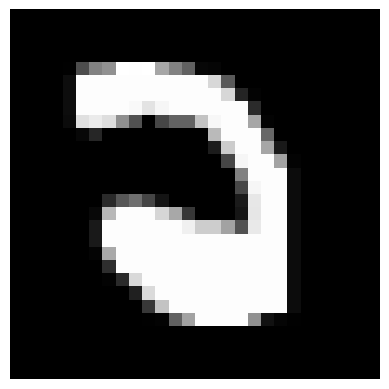

3 --- 3


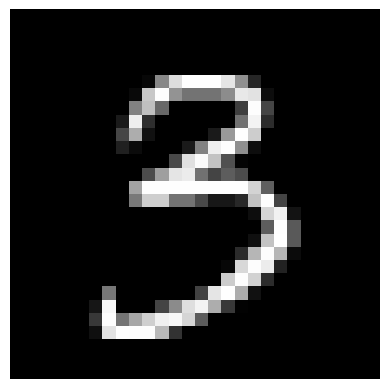

1 --- 1


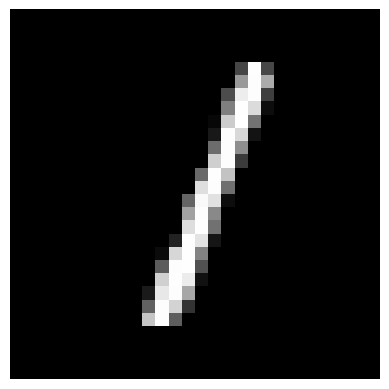

0 --- 0


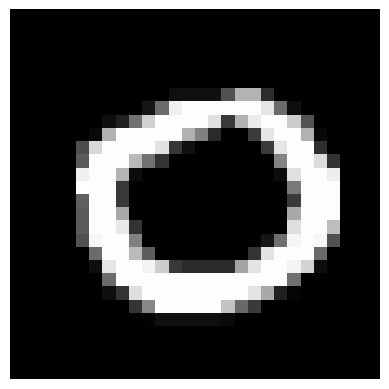

1 --- 1


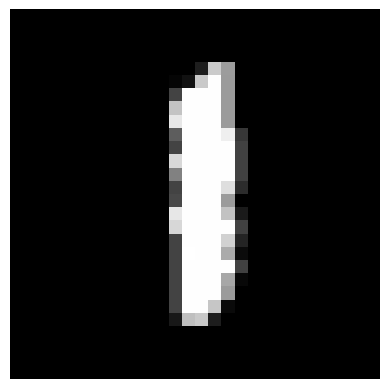

9 --- 9


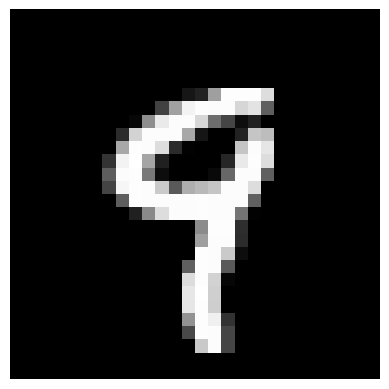

8 --- 8


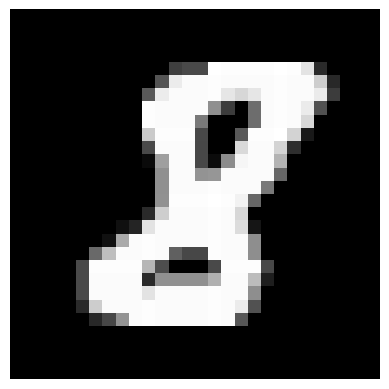

9 --- 9


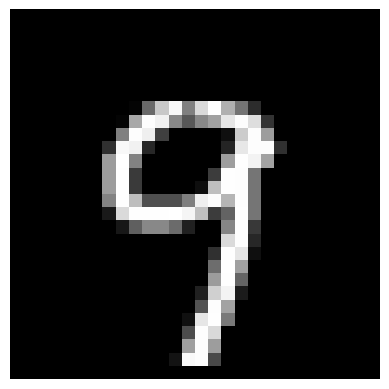

3 --- 3


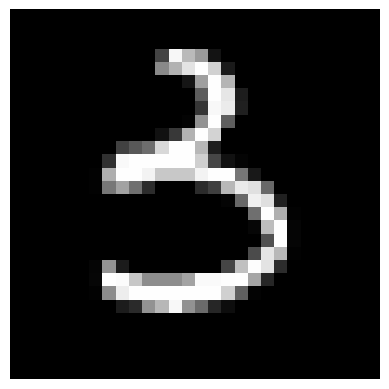

1 --- 1


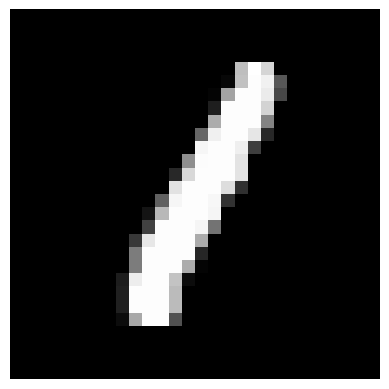

1 --- 1


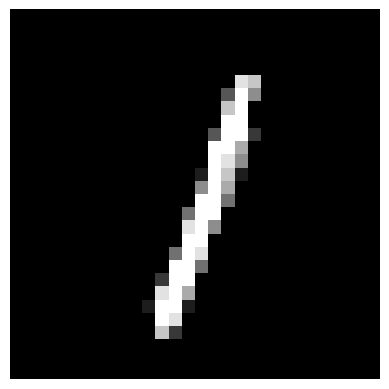

8 --- 8


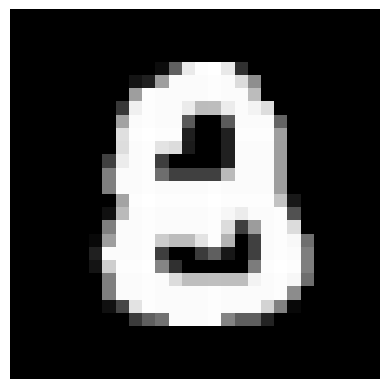

5 --- 5


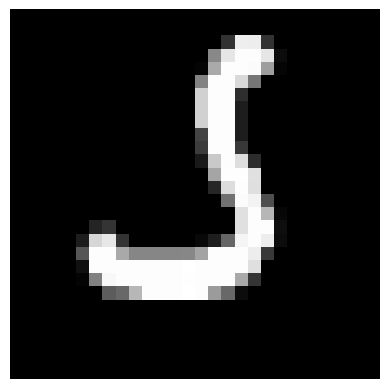

2 --- 2


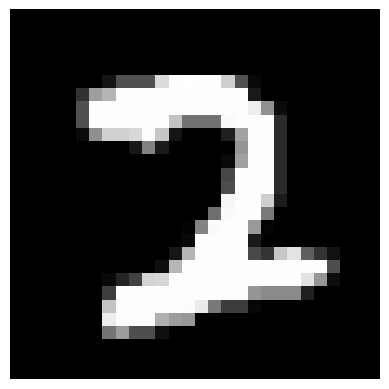

3 --- 3


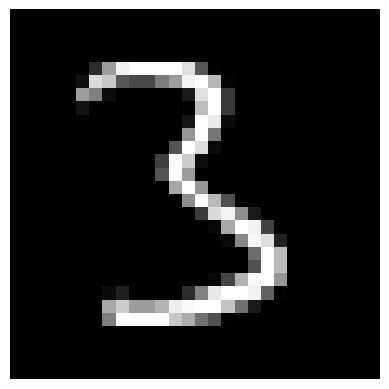

8 --- 8


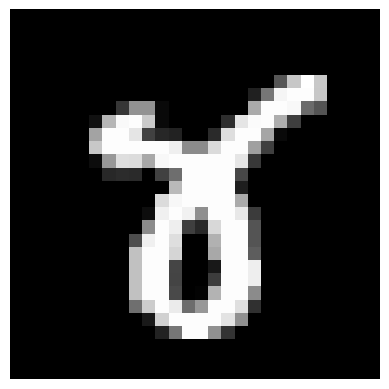

2 --- 2


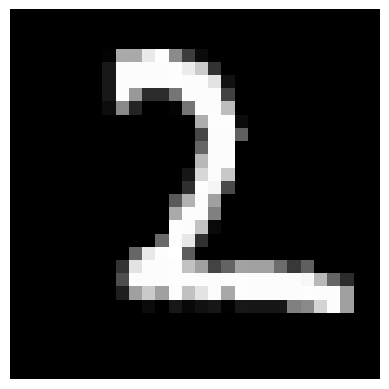

9 --- 9


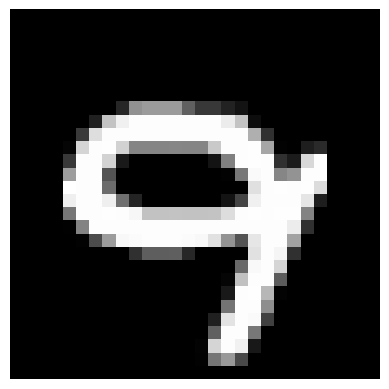

1 --- 1


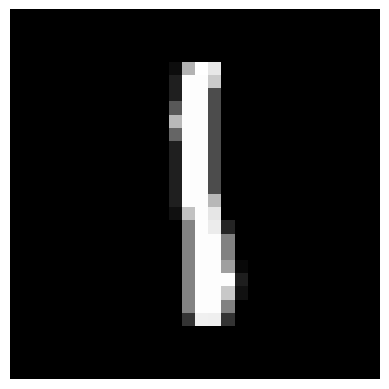

0 --- 0


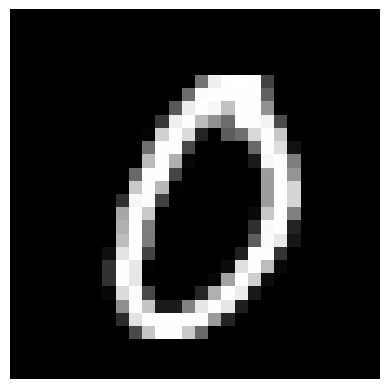

4 --- 4


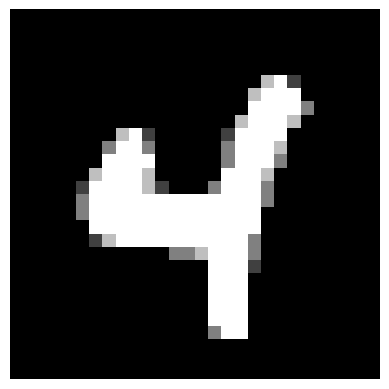

5 --- 5


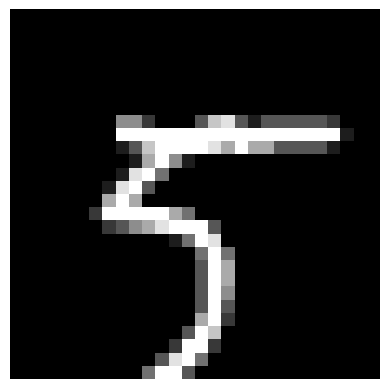

8 --- 8


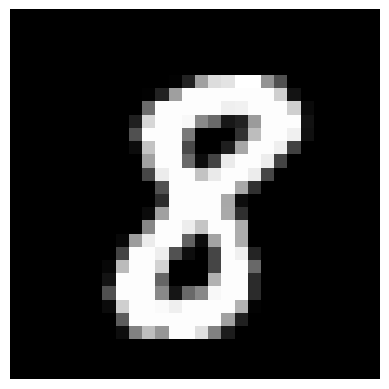

5 --- 5


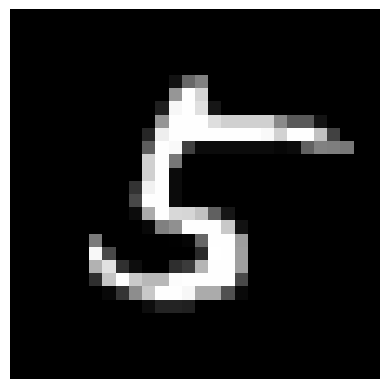

8 --- 8


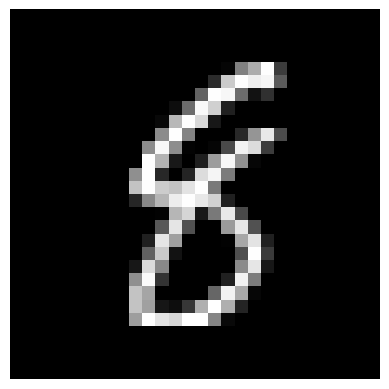

5 --- 5


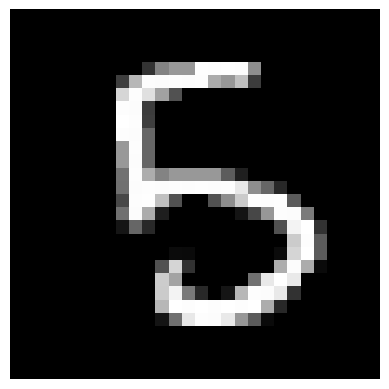

4 --- 4


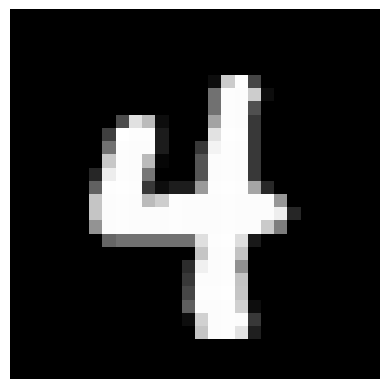

8 --- 8


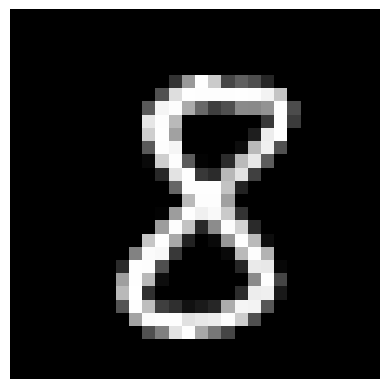

7 --- 7


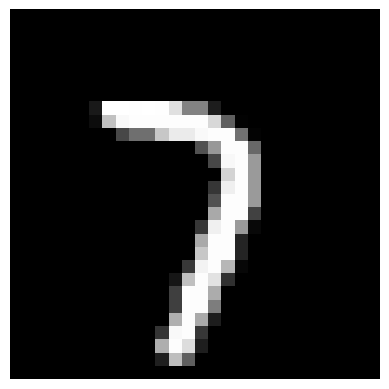

4 --- 4


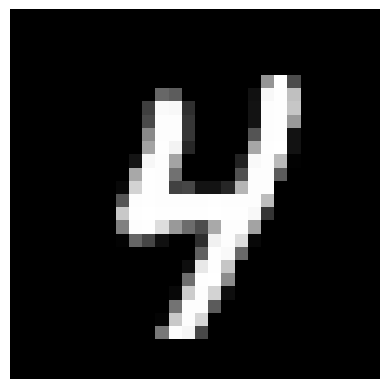

3 --- 3


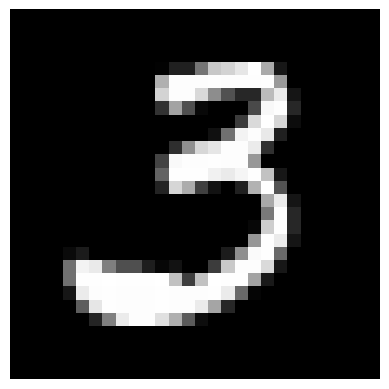

2 --- 2


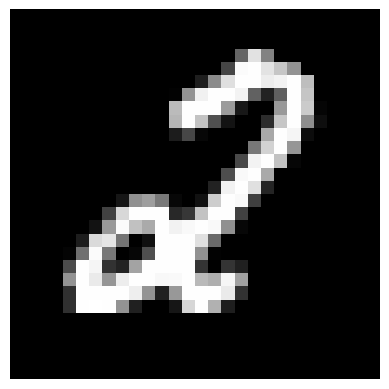

2 --- 2


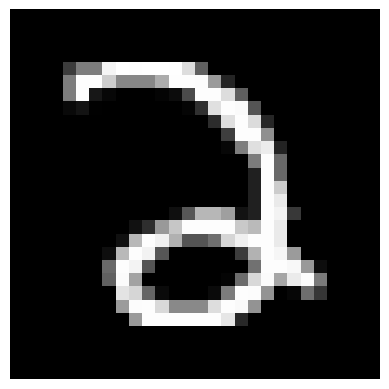

7 --- 7


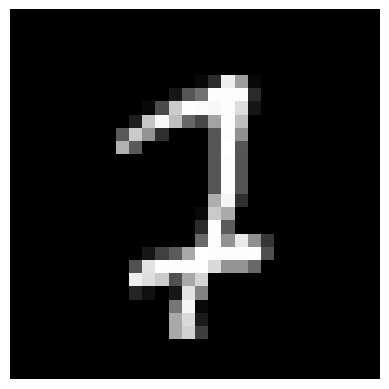

0 --- 0


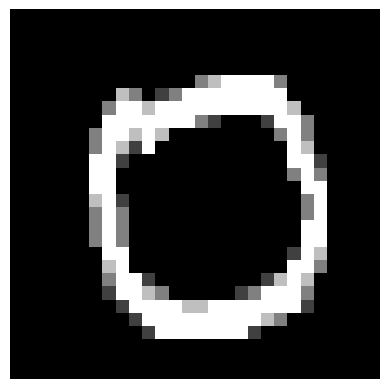

6 --- 6


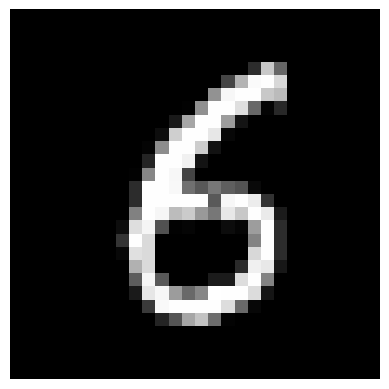

9 --- 9


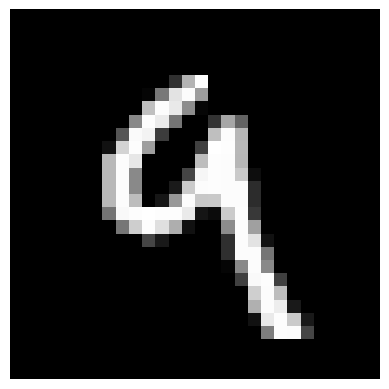

5 --- 5


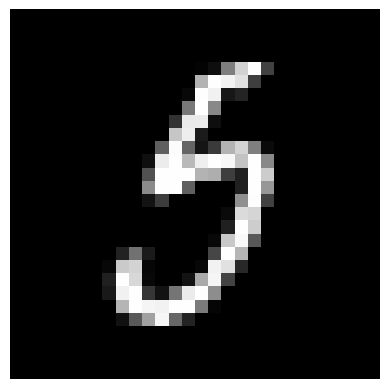

4 --- 4


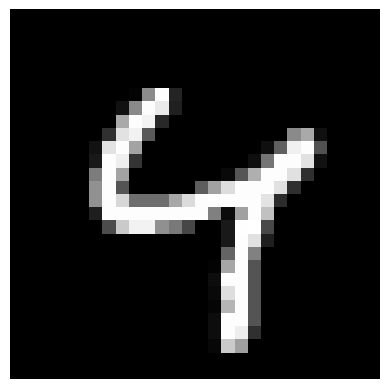

9 --- 9


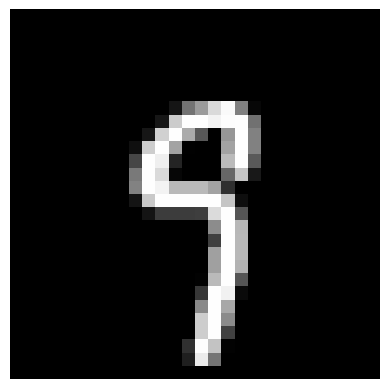

1 --- 1


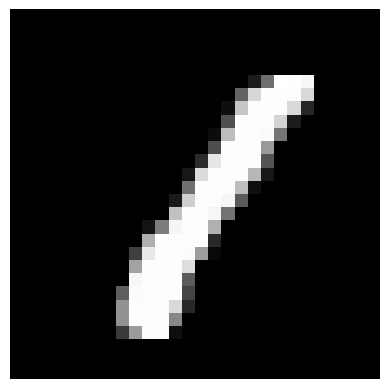

7 --- 7


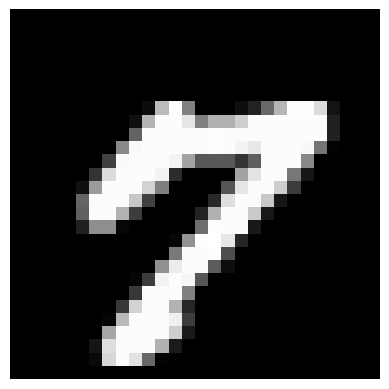

5 --- 5


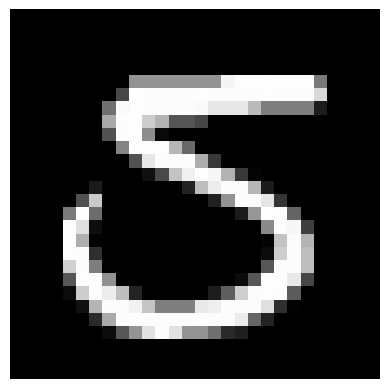

0 --- 0


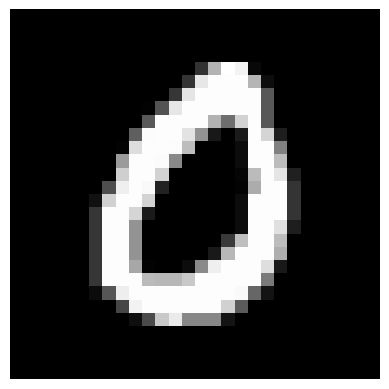

2 --- 2


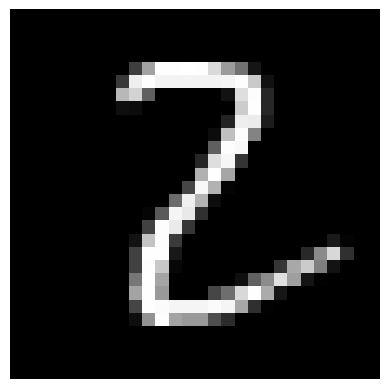

9 --- 9


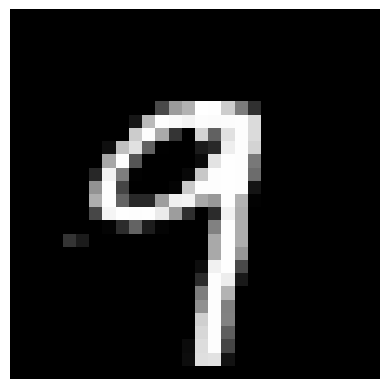

2 --- 2


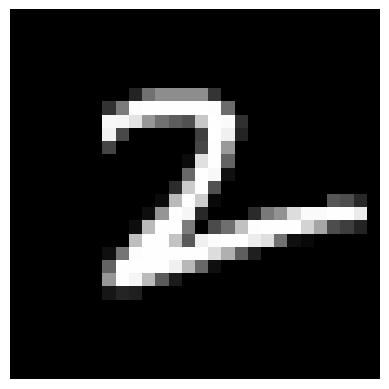

6 --- 6


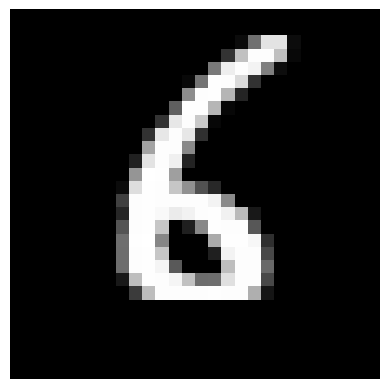

6 --- 6


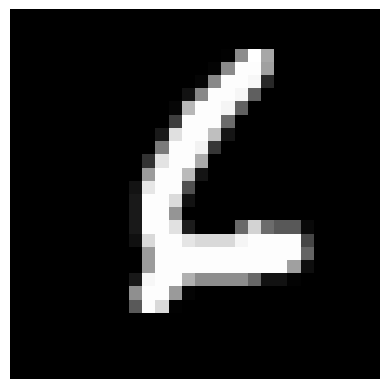

6 --- 6


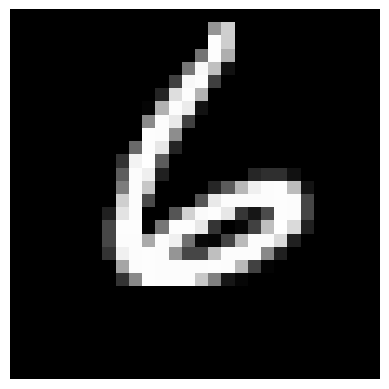

3 --- 3


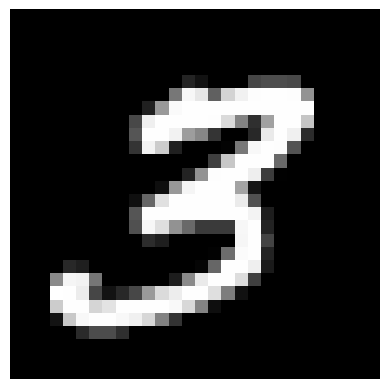

4 --- 4


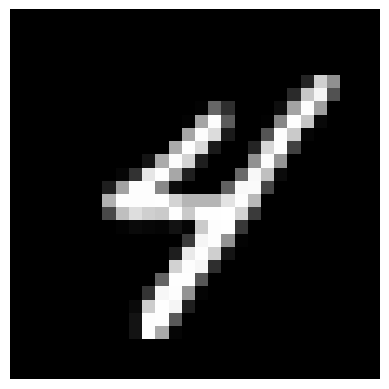

4 --- 4


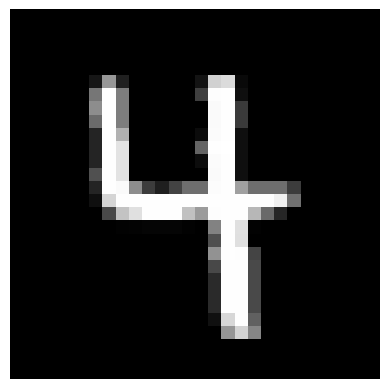

2 --- 2


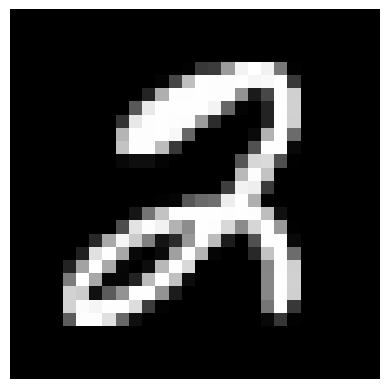

2 --- 2


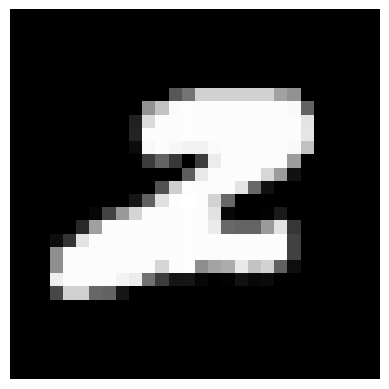

8 --- 8


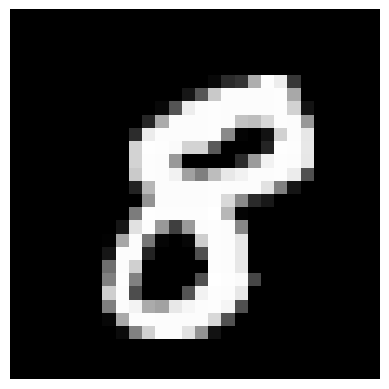

6 --- 6


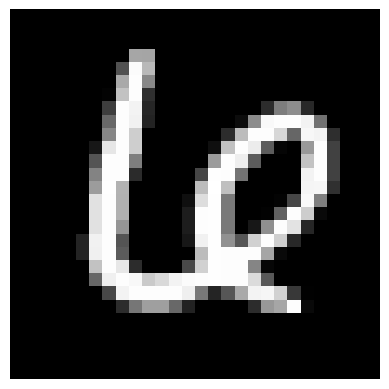

1 --- 1


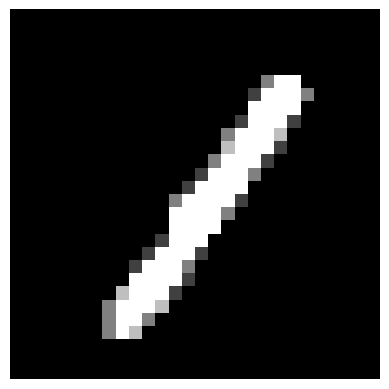

9 --- 9


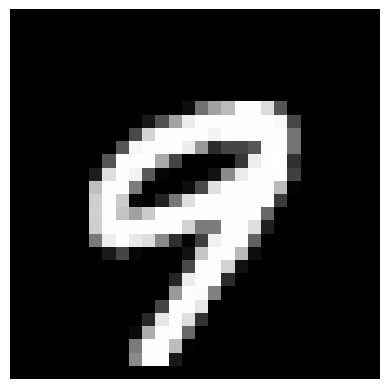

5 --- 5


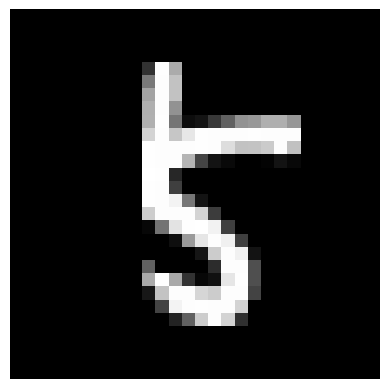

6 --- 6


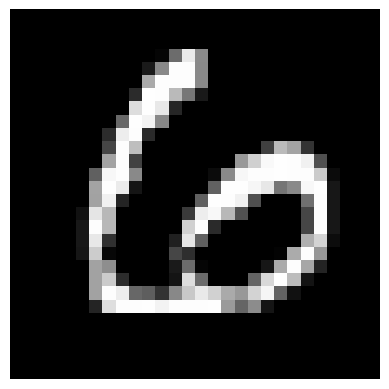

1 --- 1


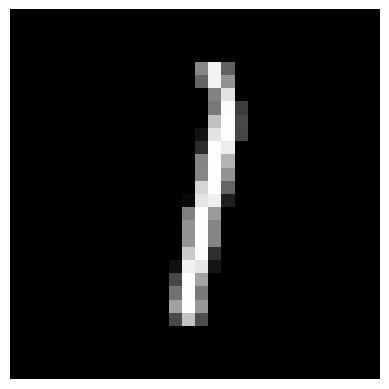

7 --- 7


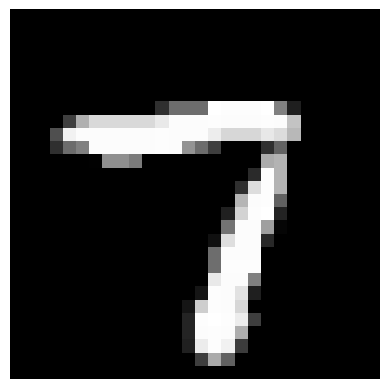

1 --- 1


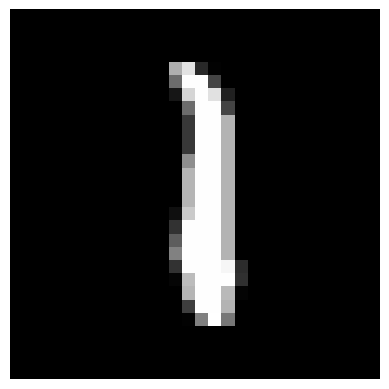

2 --- 2


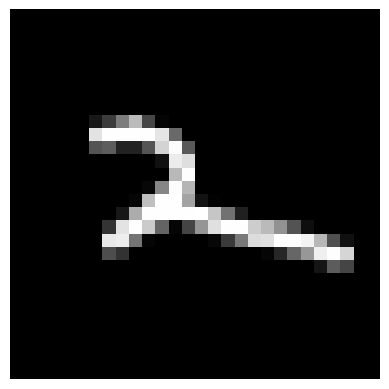

5 --- 5


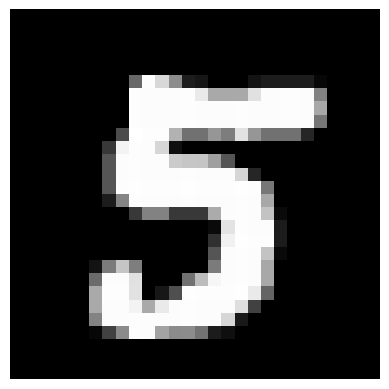

1 --- 1


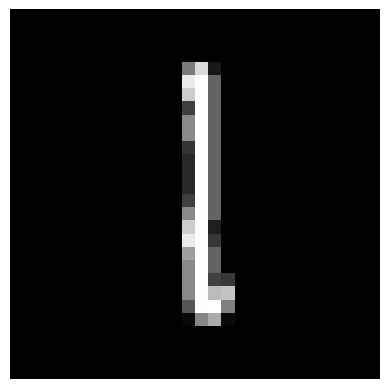

3 --- 3


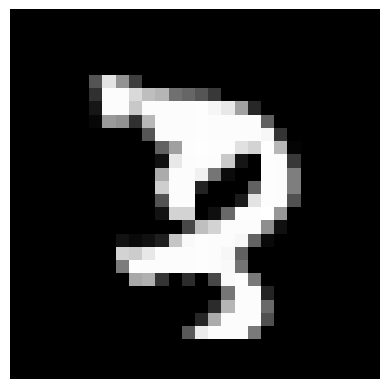

0 --- 0


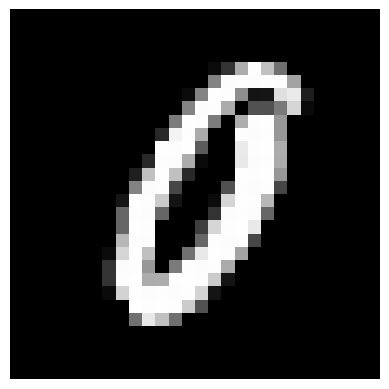

3 --- 3


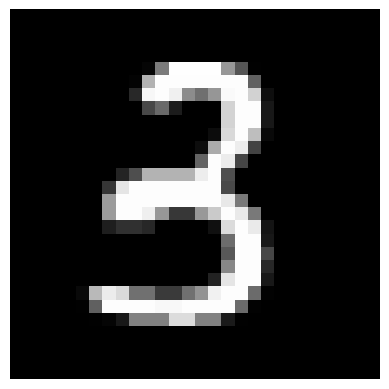

5 --- 5


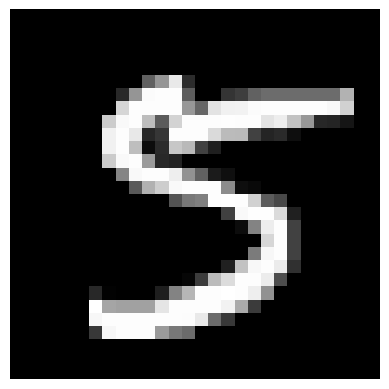

7 --- 7


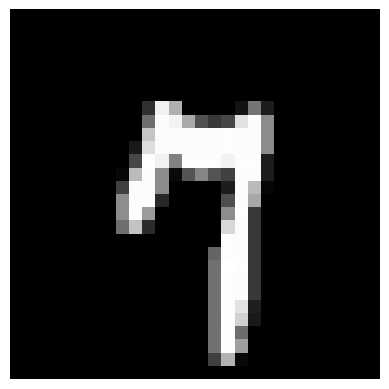

9 --- 9


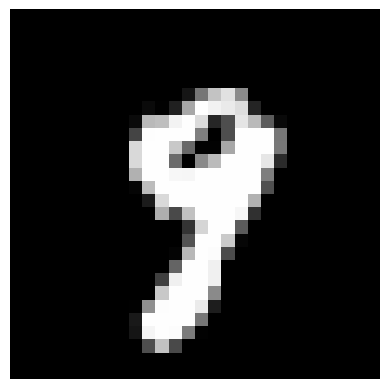

1 --- 1


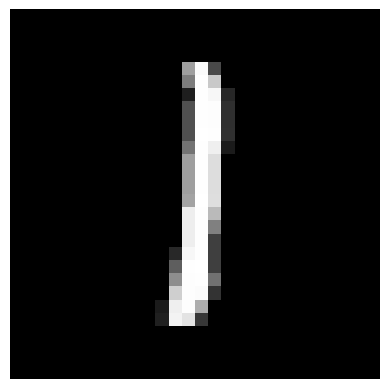

0 --- 0


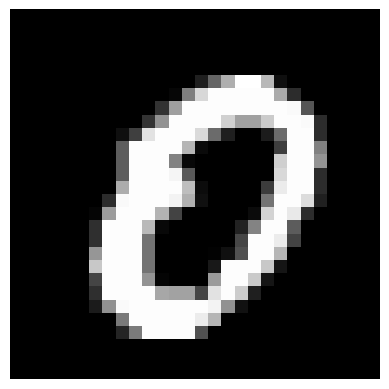

2 --- 2


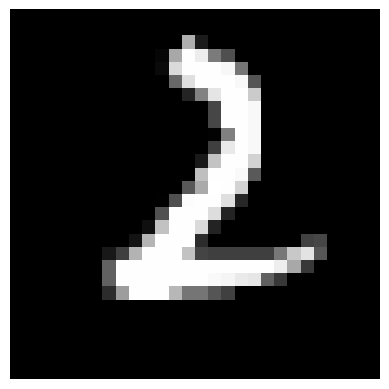

2 --- 2


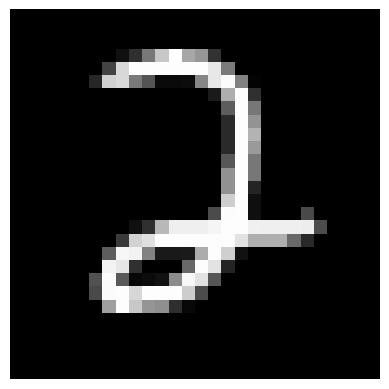

9 --- 9


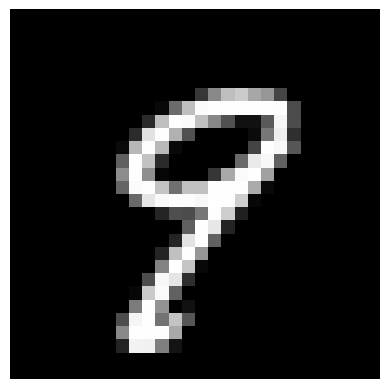

9 --- 9


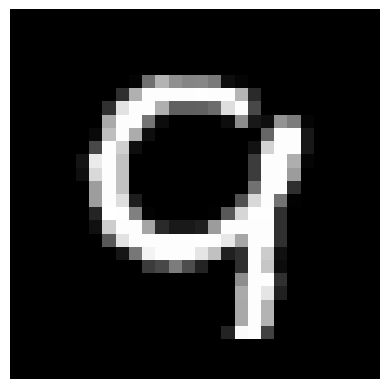

6 --- 6


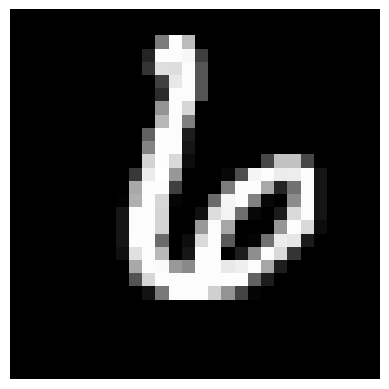

8 --- 8


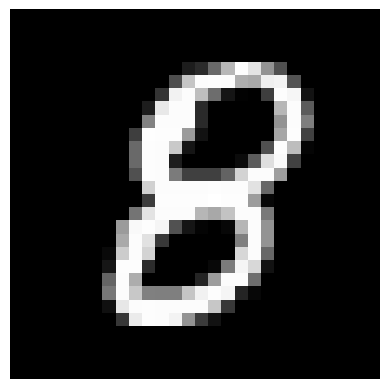

3 --- 3


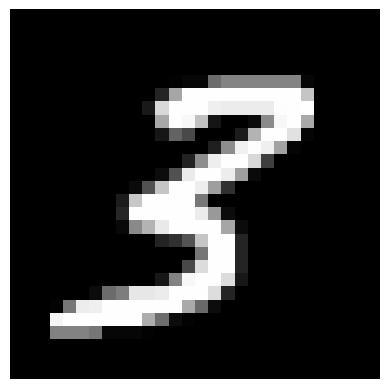

0 --- 0


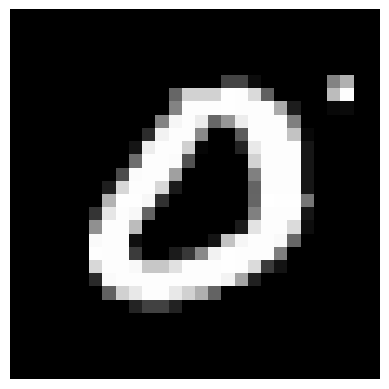

5 --- 5


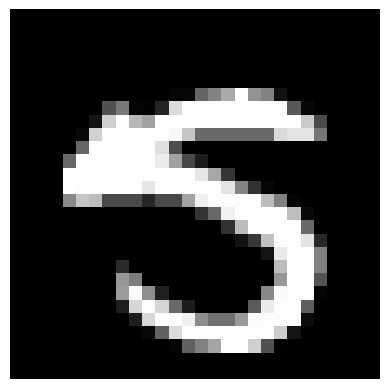

9 --- 9


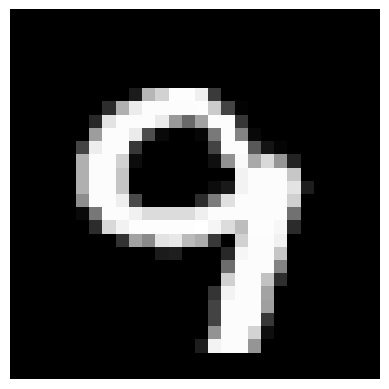

4 --- 4


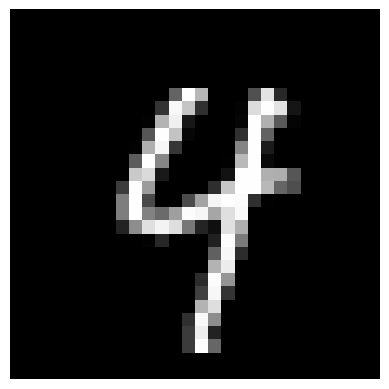

8 --- 8


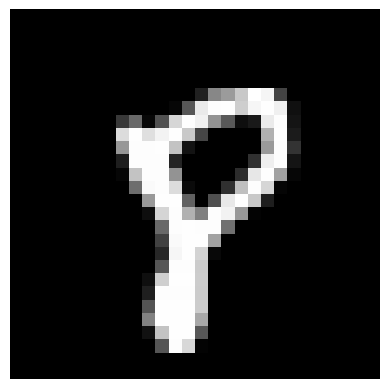

0 --- 0


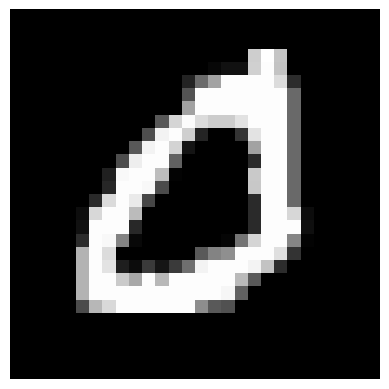

3 --- 3


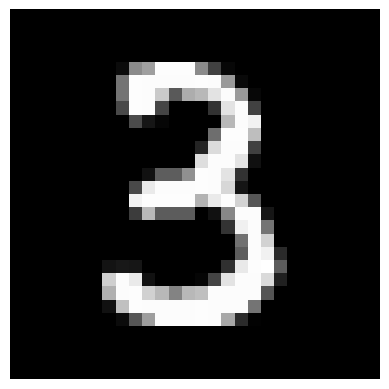

5 --- 5


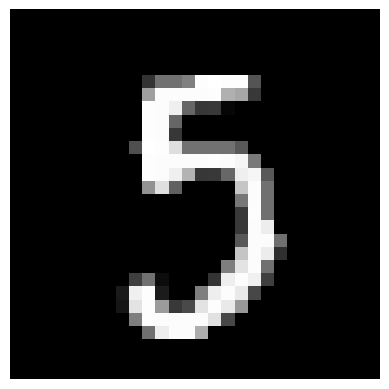

0 --- 0


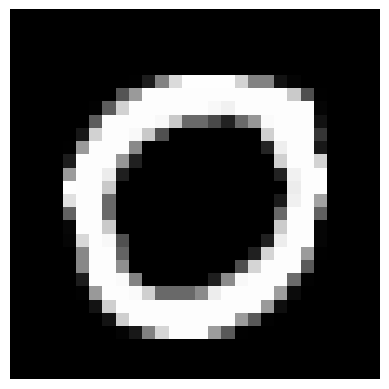

1 --- 1


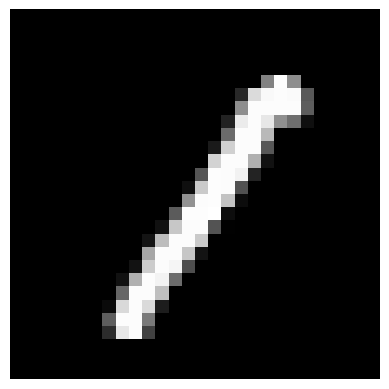

2 --- 2


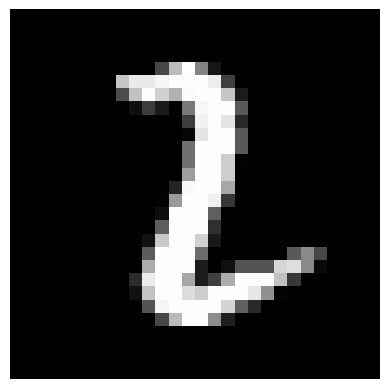

9 --- 9


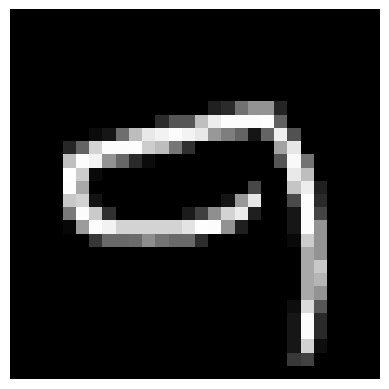

7 --- 7


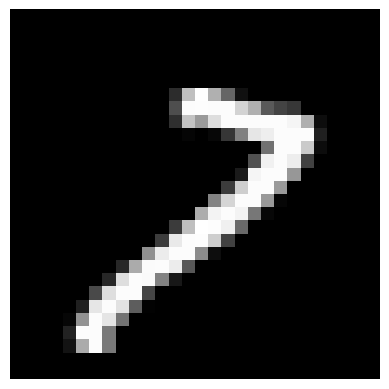

1 --- 1


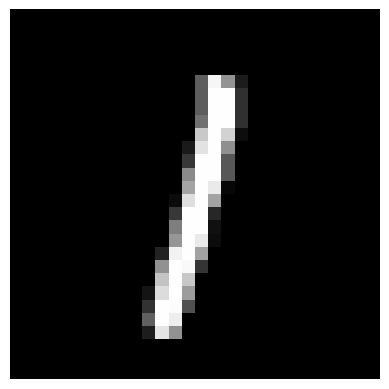

1 --- 1


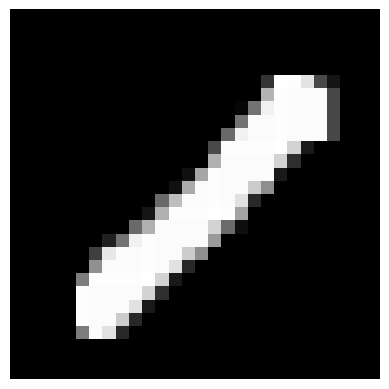

3 --- 3


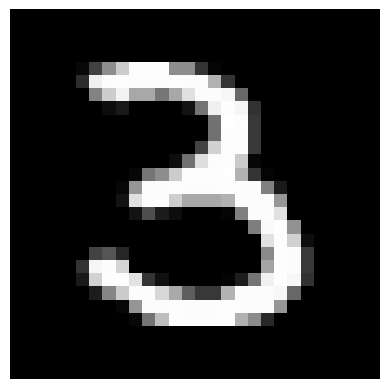

1 --- 1


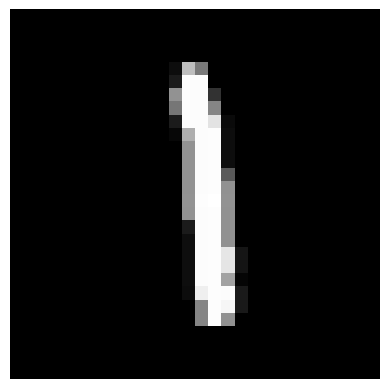

6 --- 6


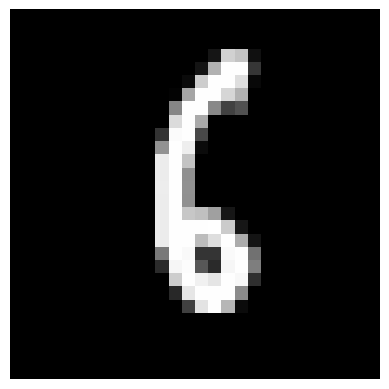

6 --- 6


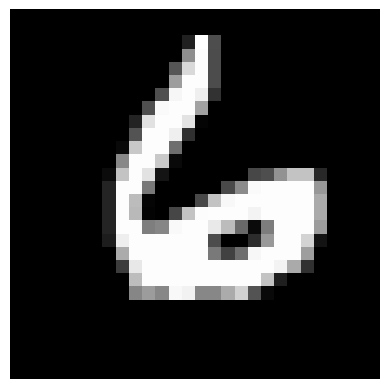

8 --- 8


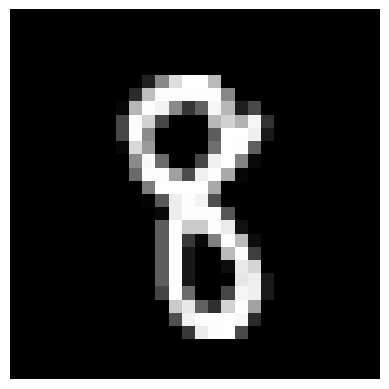

8 --- 8


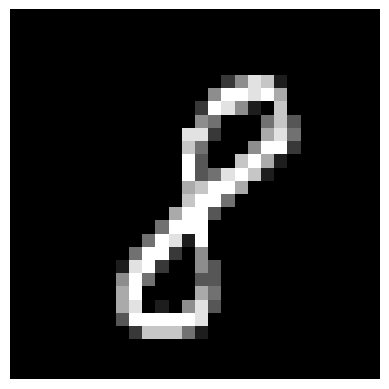

4 --- 4


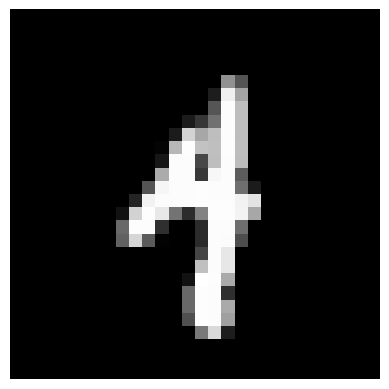

0 --- 0


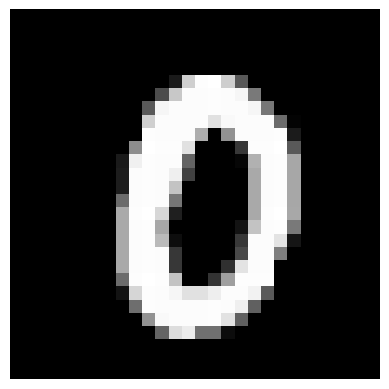

6 --- 6


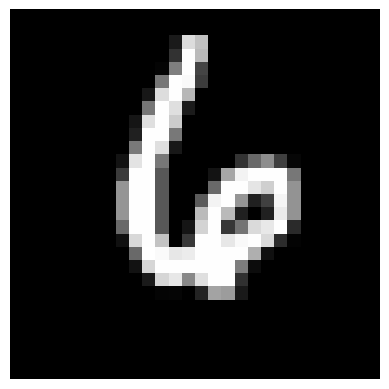

3 --- 3


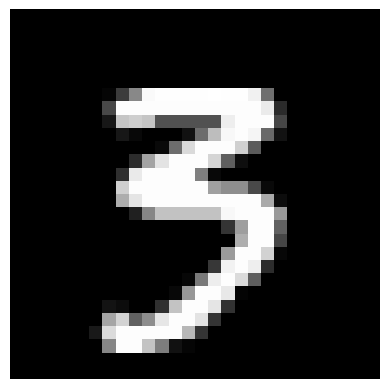

2 --- 2


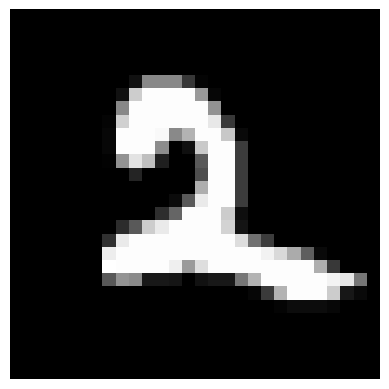

0 --- 0


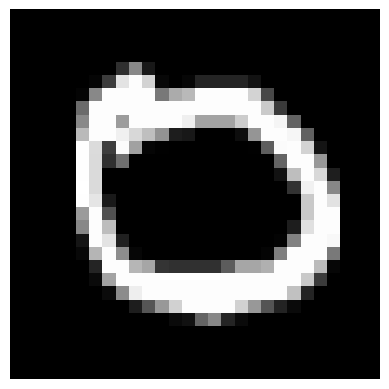

4 --- 4


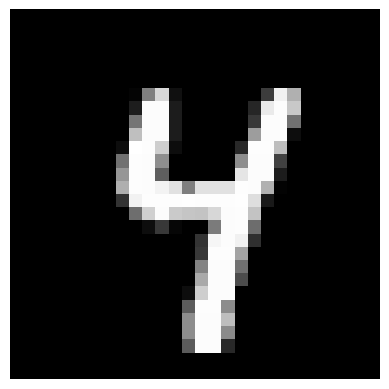

0 --- 0


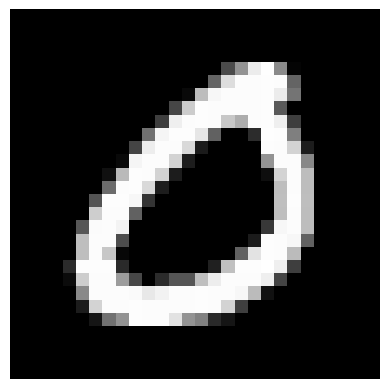

3 --- 3


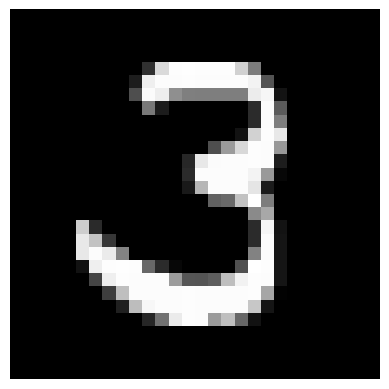

8 --- 8


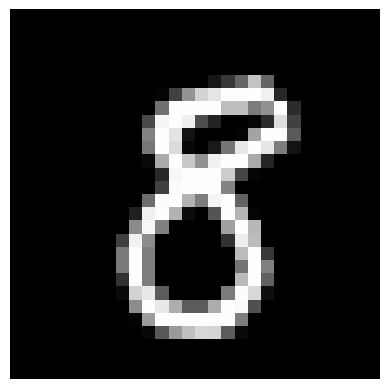

2 --- 2


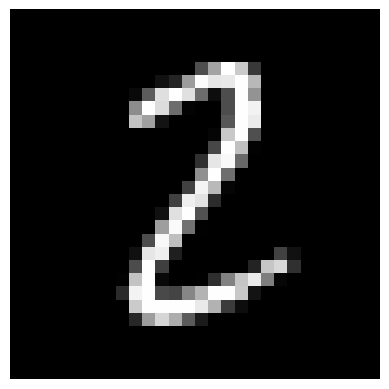

8 --- 8


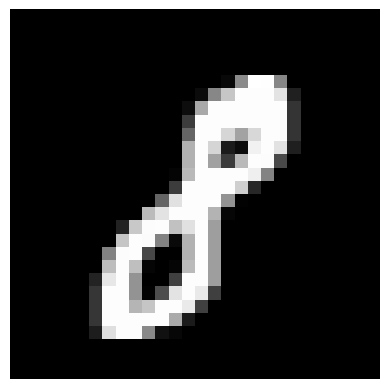

9 --- 9


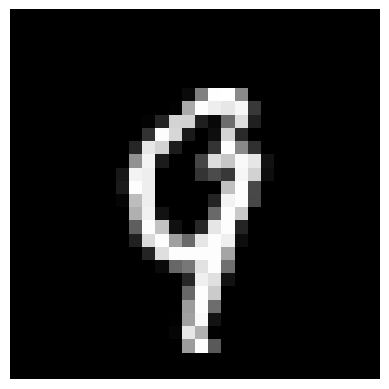

8 --- 8


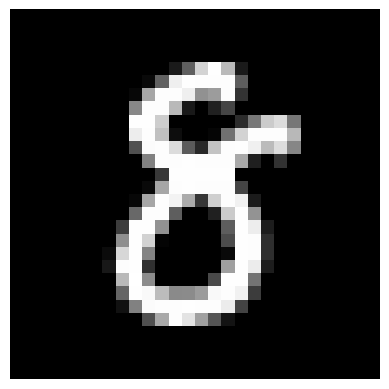

6 --- 6


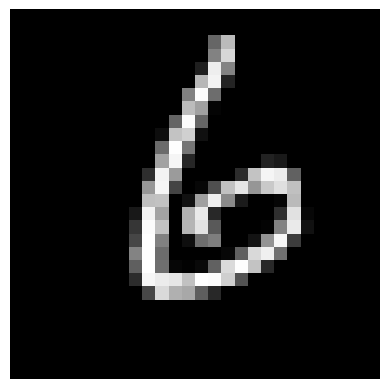

8 --- 8


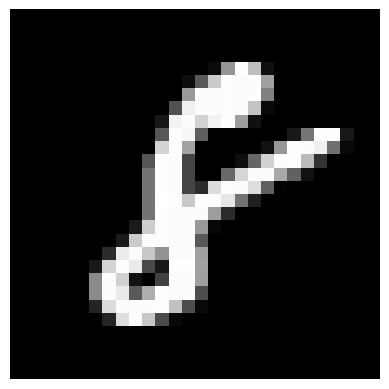

2 --- 2


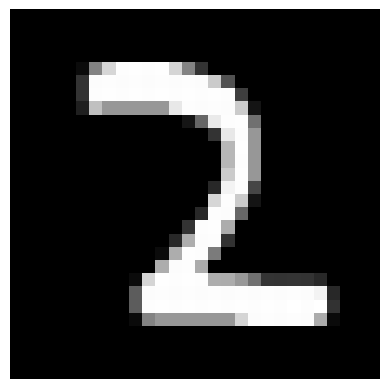

5 --- 5


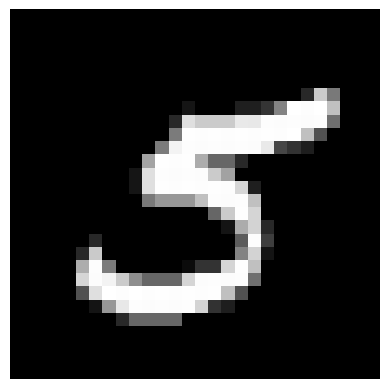

0 --- 0


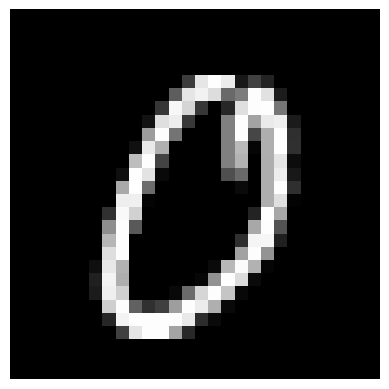

6 --- 6


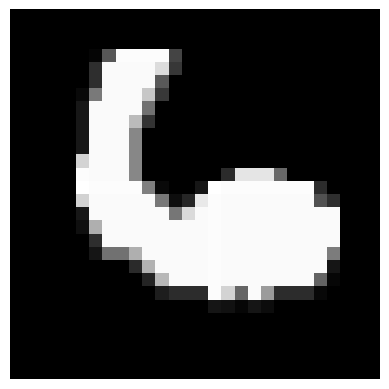

3 --- 3


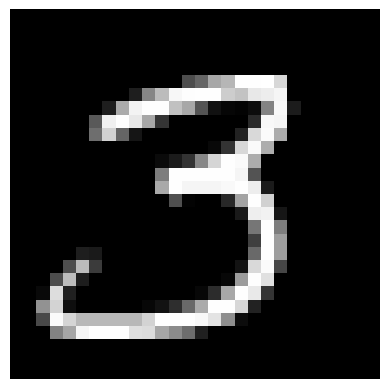

0 --- 0


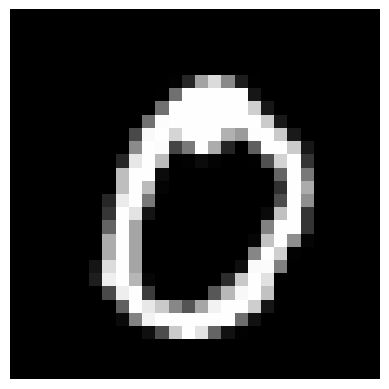

4 --- 4


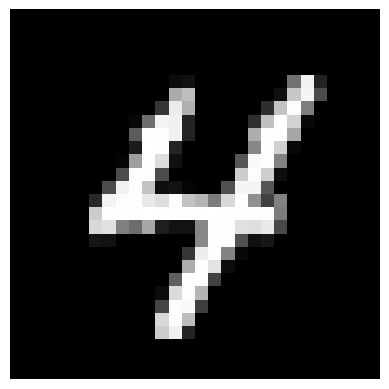

5 --- 5


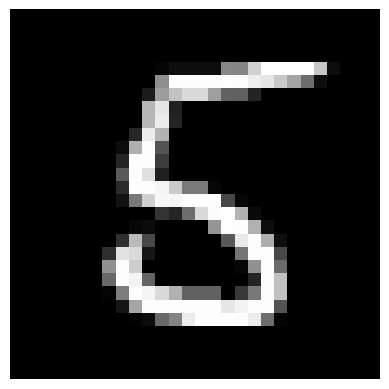

9 --- 9


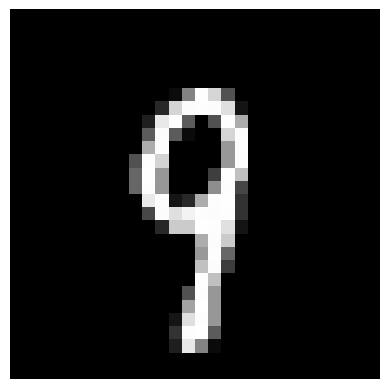

9 --- 9


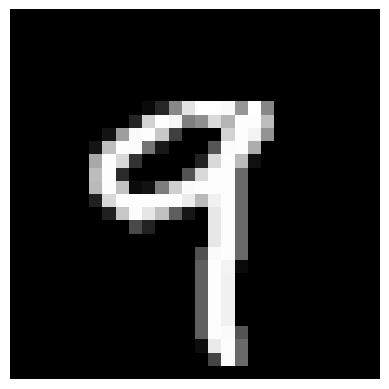

8 --- 8


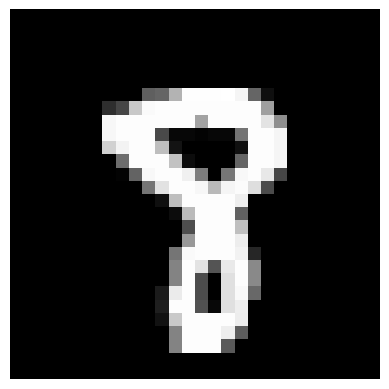

4 --- 4


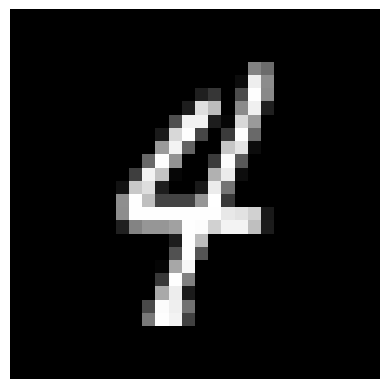

8 --- 8


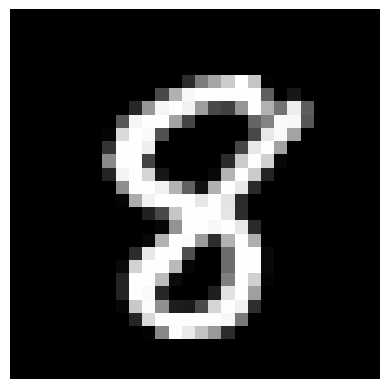

8 --- 8


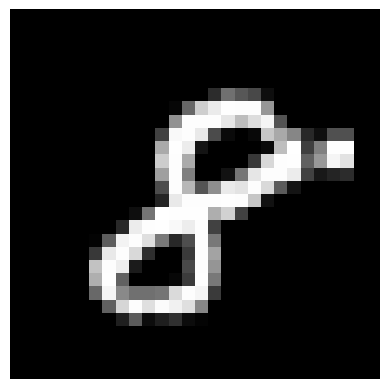

1 --- 1


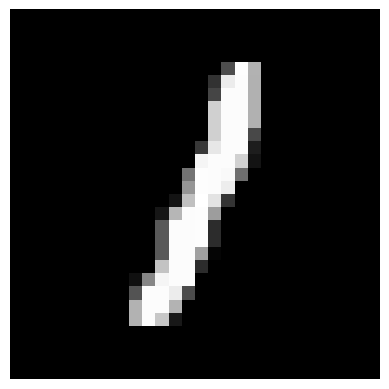

1 --- 1


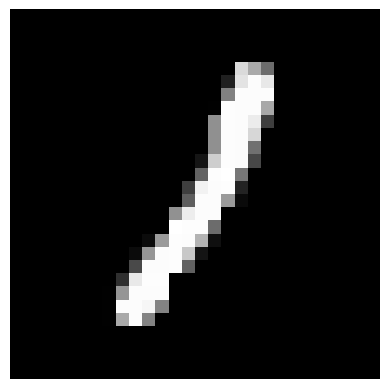

8 --- 8


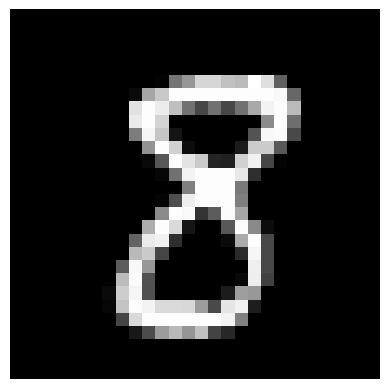

9 --- 9


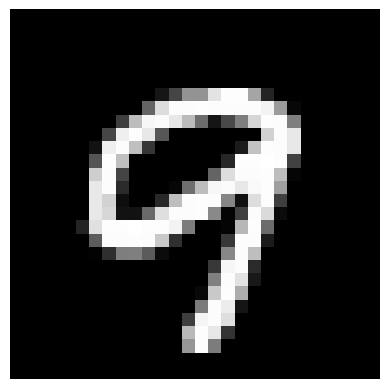

0 --- 0


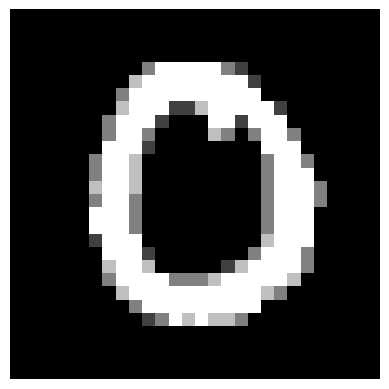

3 --- 3


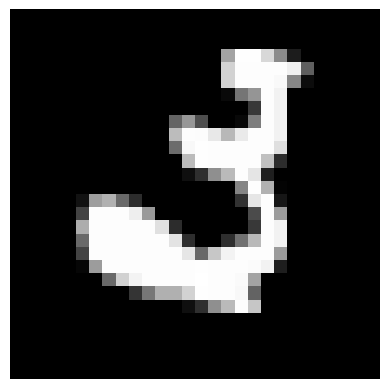

4 --- 4


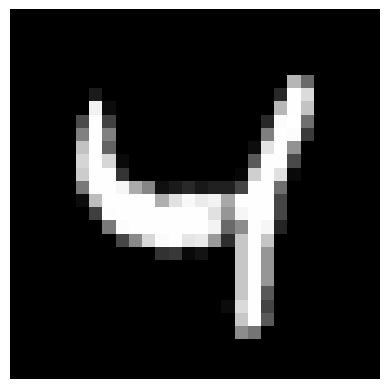

0 --- 0


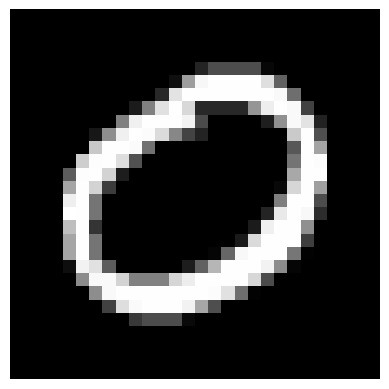

6 --- 6


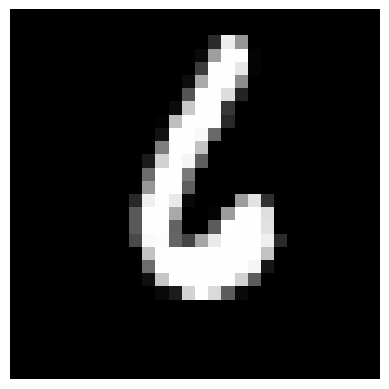

2 --- 2


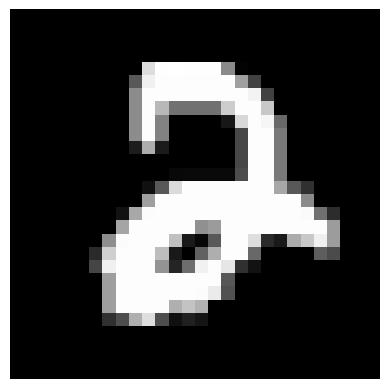

7 --- 7


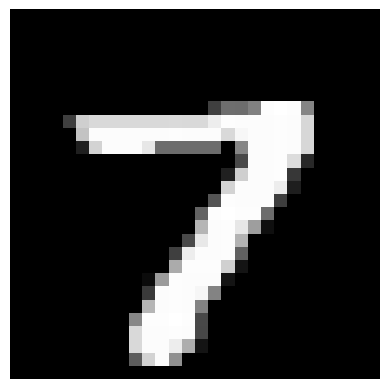

3 --- 3


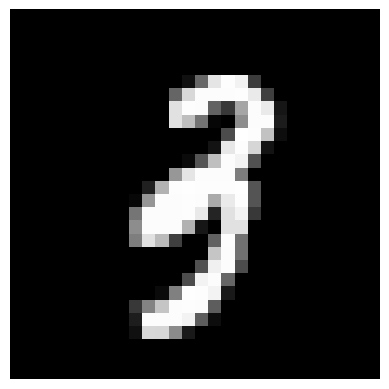

3 --- 4


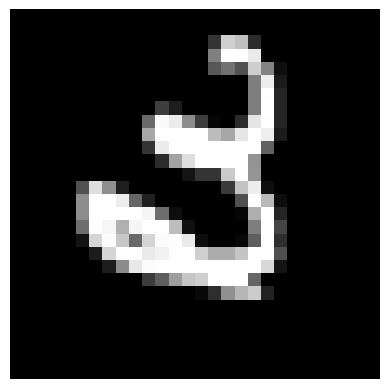

1 --- 1


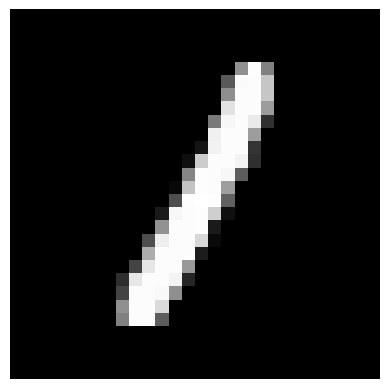

2 --- 2


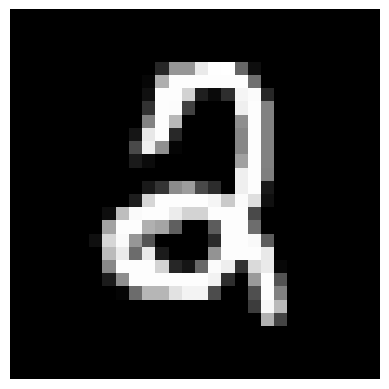

3 --- 3


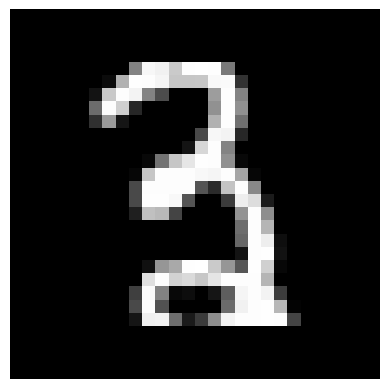

0 --- 0


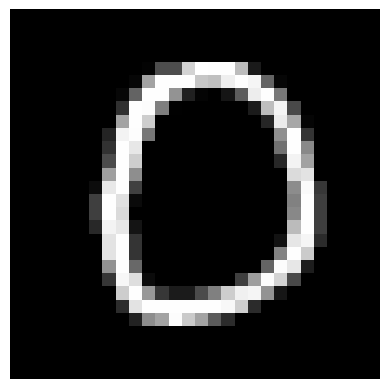

2 --- 2


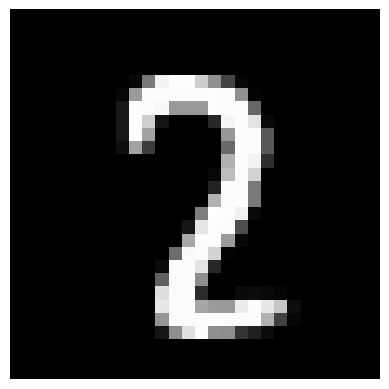

2 --- 2


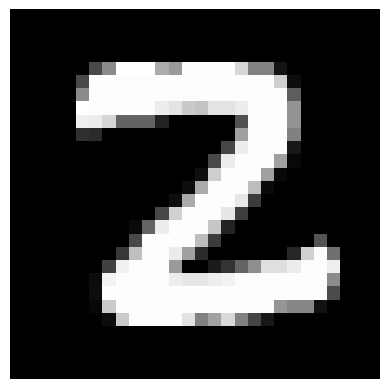

8 --- 8


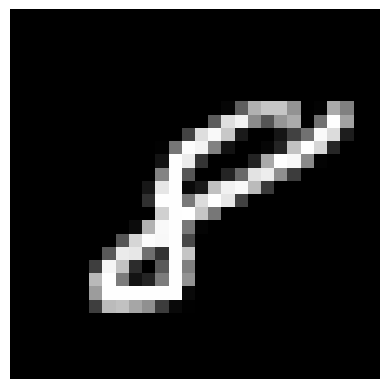

7 --- 7


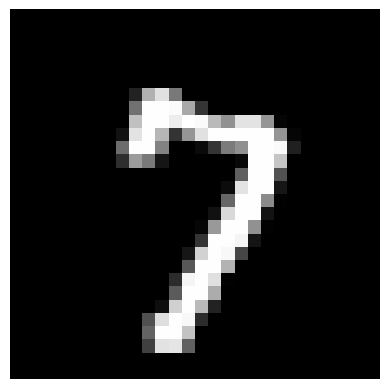

5 --- 5


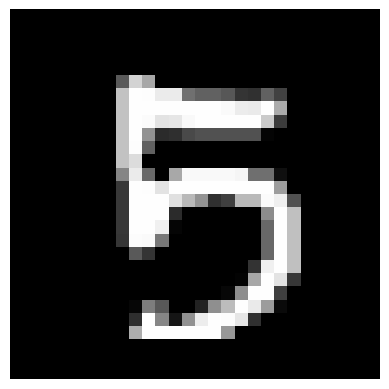

3 --- 3


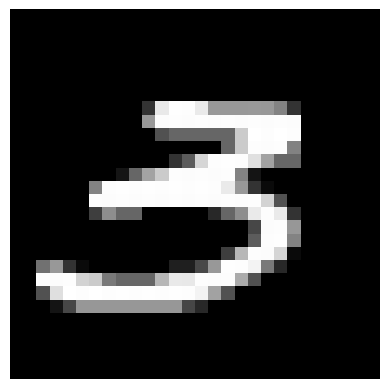

1 --- 1


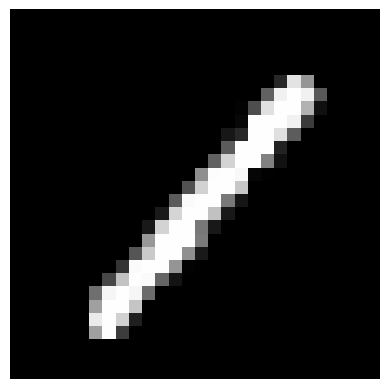

7 --- 7


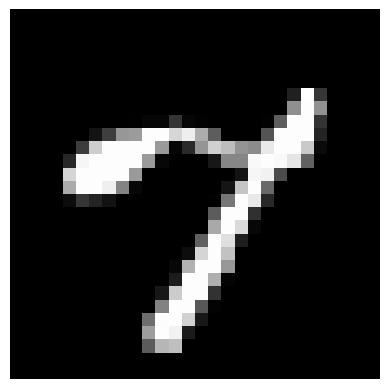

5 --- 5


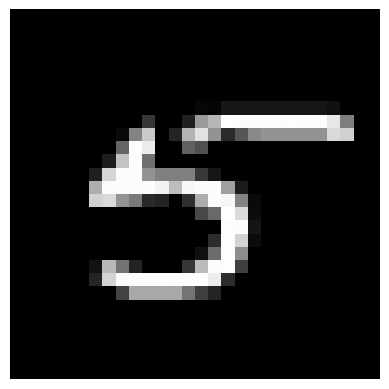

6 --- 6


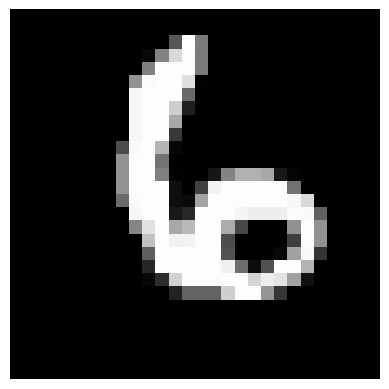

7 --- 7


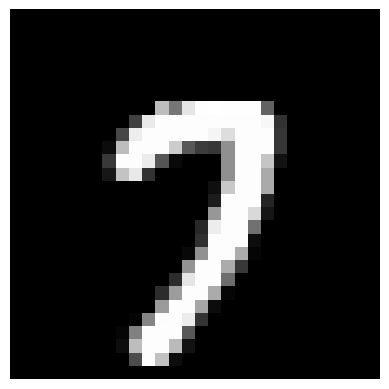

5 --- 5


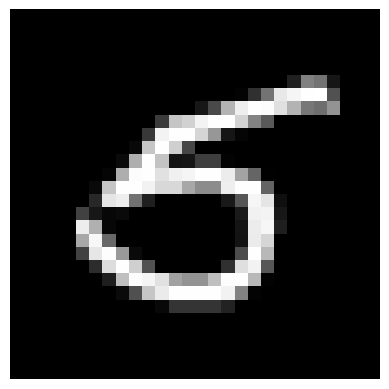

7 --- 7


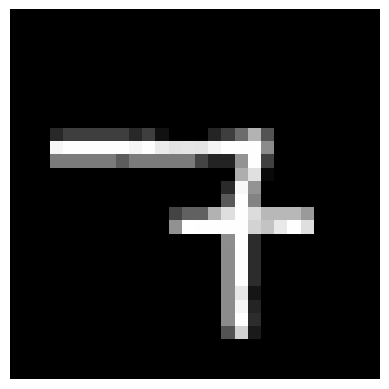

9 --- 9


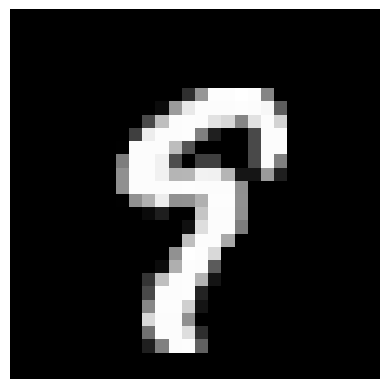

9 --- 9


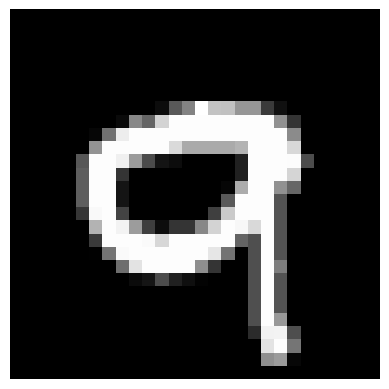

4 --- 4


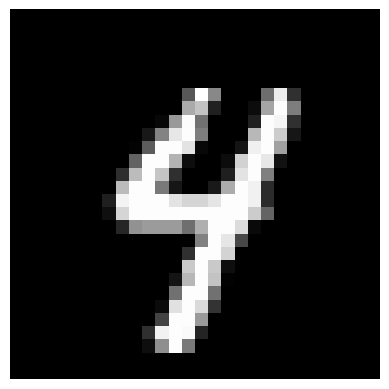

7 --- 7


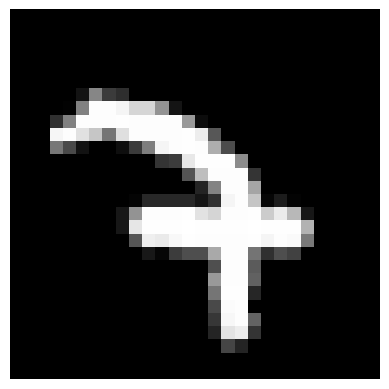

4 --- 0


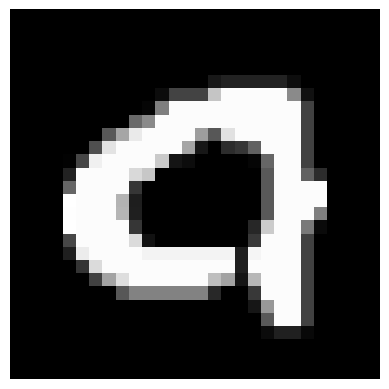

5 --- 5


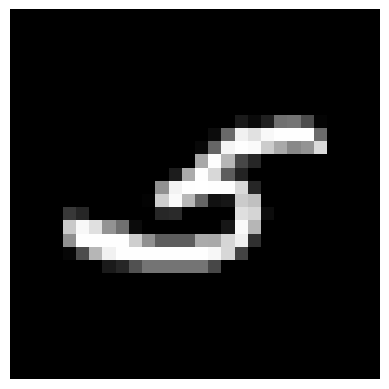

0 --- 0


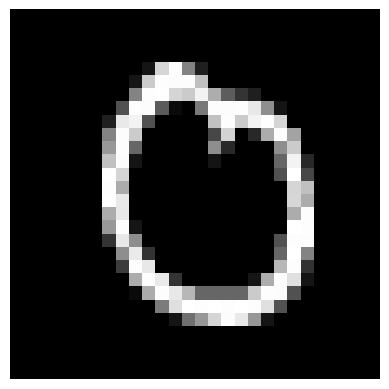

5 --- 5


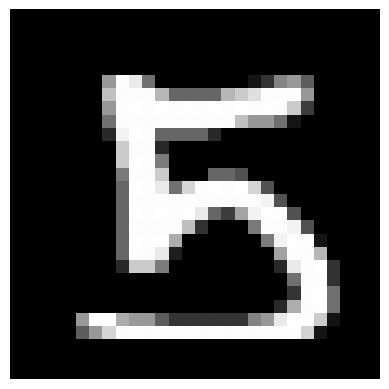

1 --- 1


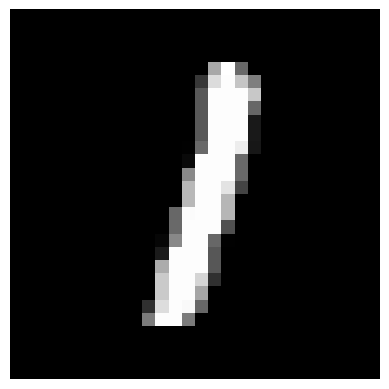

8 --- 8


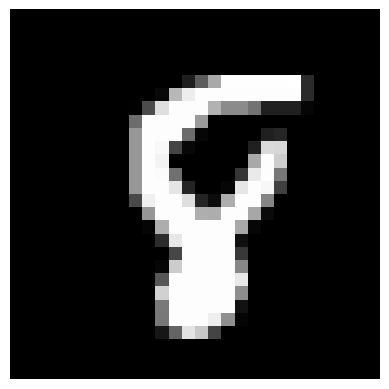

6 --- 6


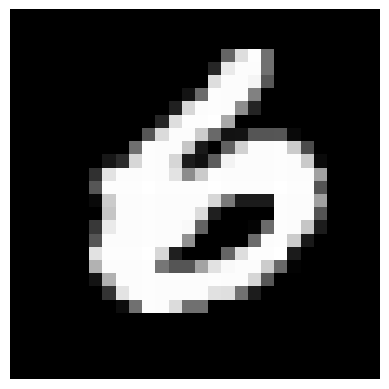

2 --- 2


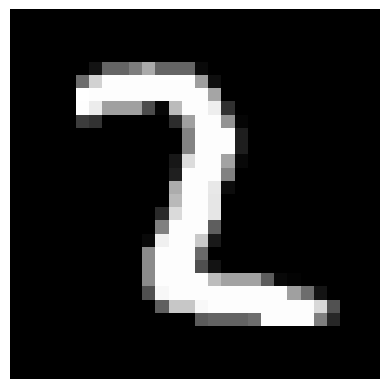

4 --- 4


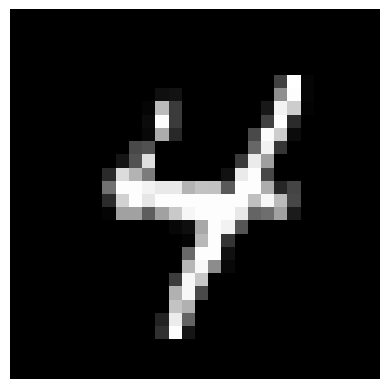

3 --- 3


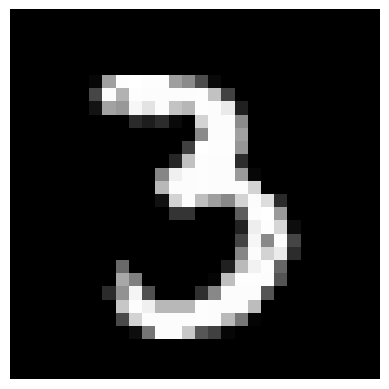

6 --- 6


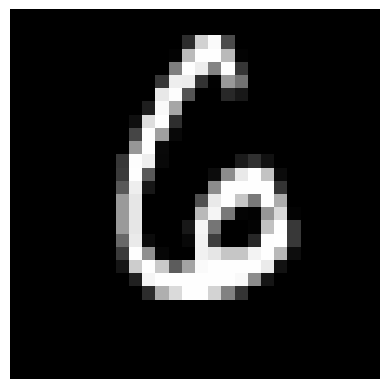

6 --- 6


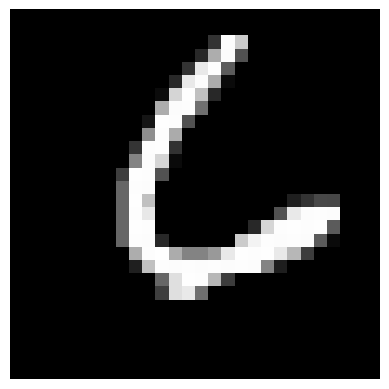

1 --- 1


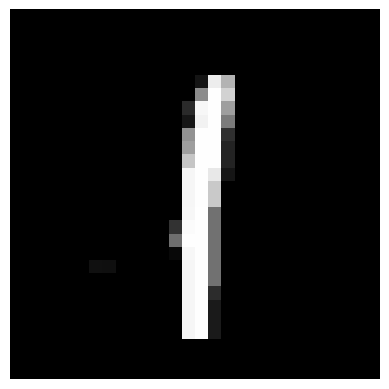

3 --- 3


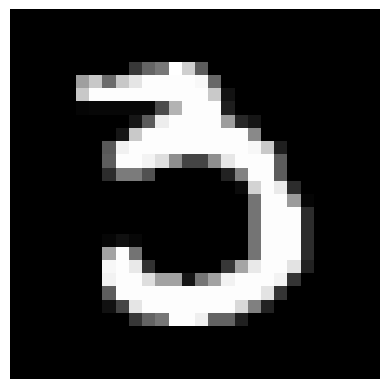

3 --- 3


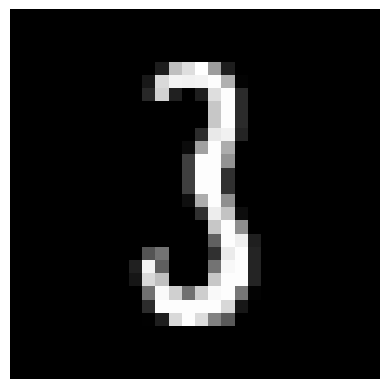

7 --- 7


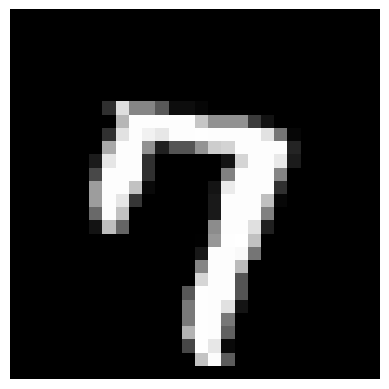

9 --- 9


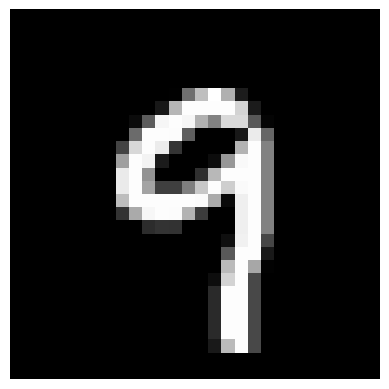

0 --- 0


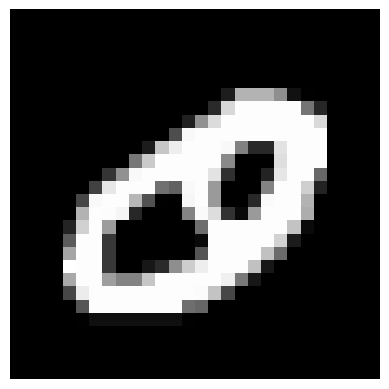

2 --- 2


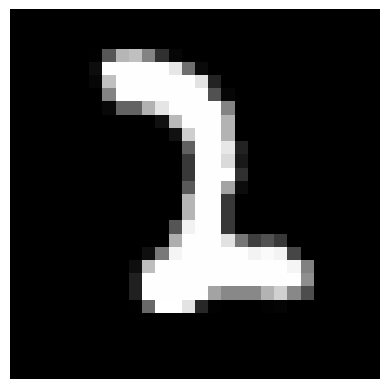

5 --- 5


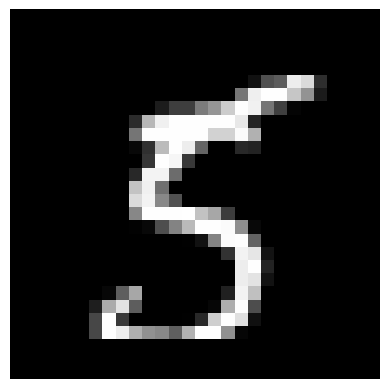

9 --- 9


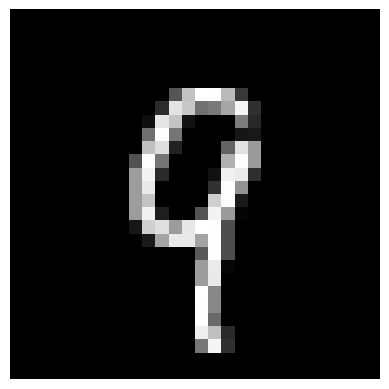

0 --- 0


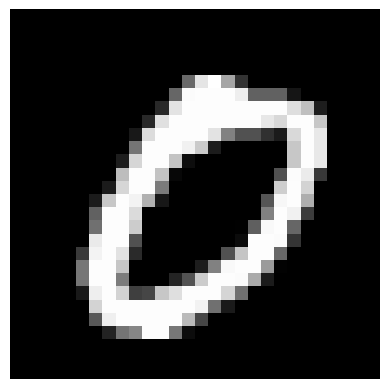

5 --- 5


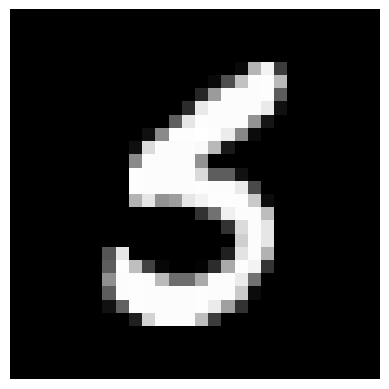

4 --- 4


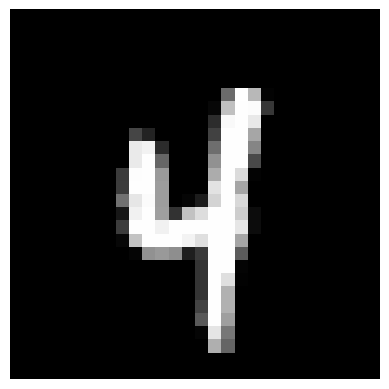

8 --- 8


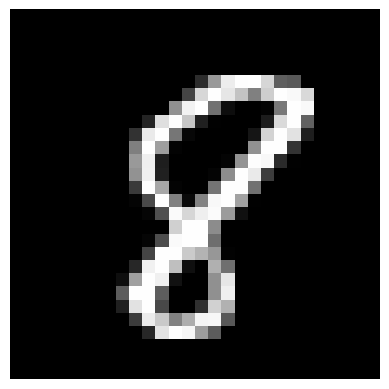

5 --- 5


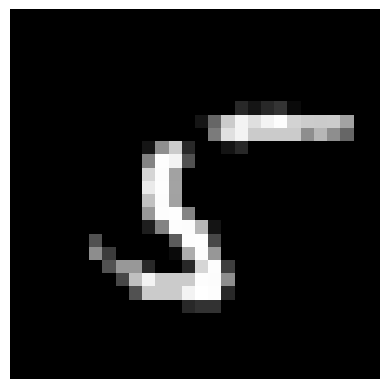

1 --- 1


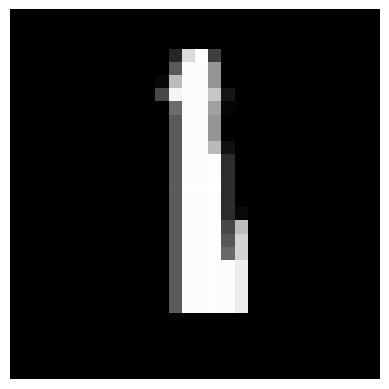

8 --- 8


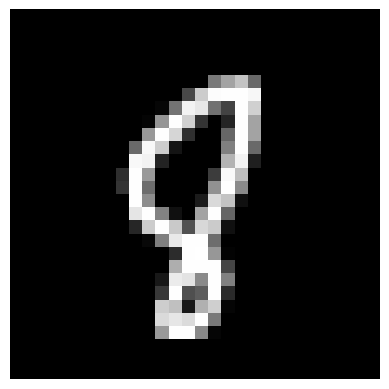

4 --- 4


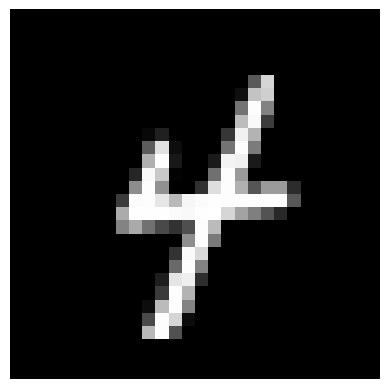

1 --- 1


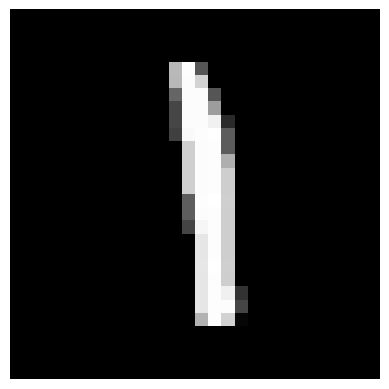

6 --- 6


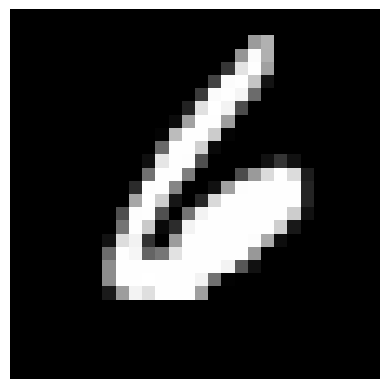

4 --- 4


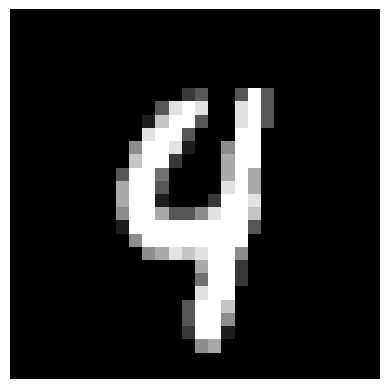

2 --- 2


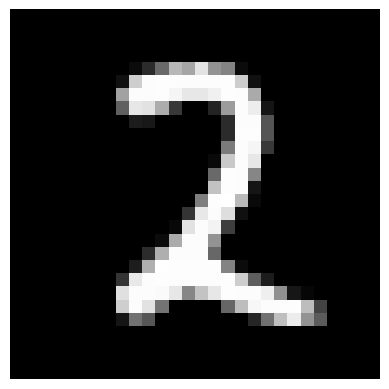

2 --- 2


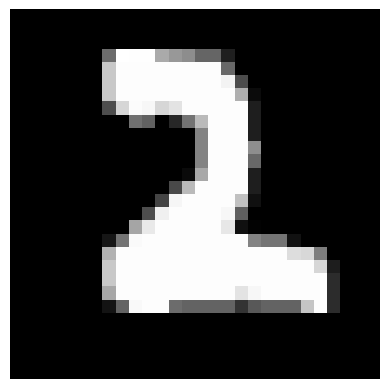

2 --- 2


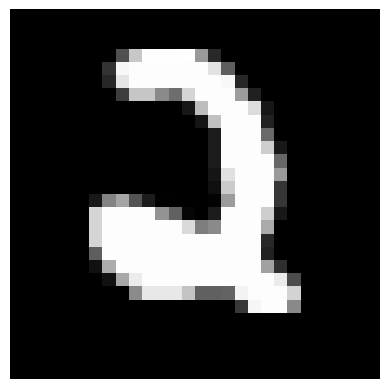

9 --- 9


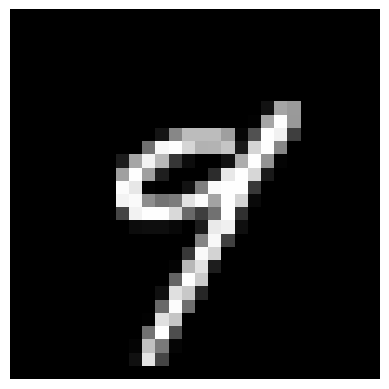

9 --- 9


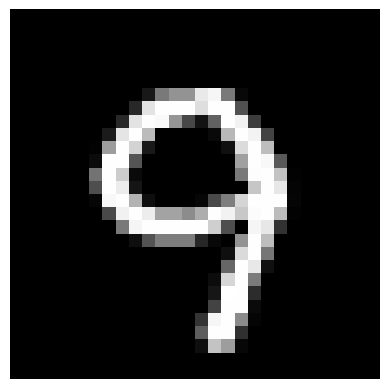

2 --- 2


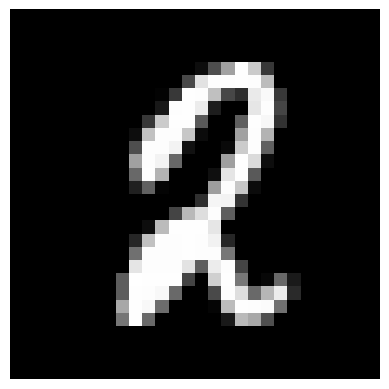

6 --- 6


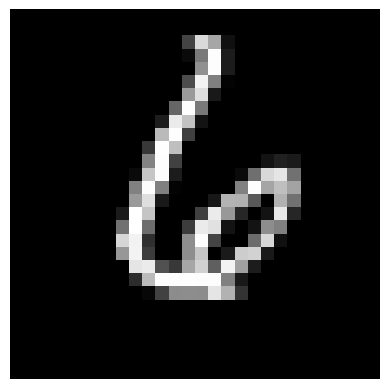

8 --- 8


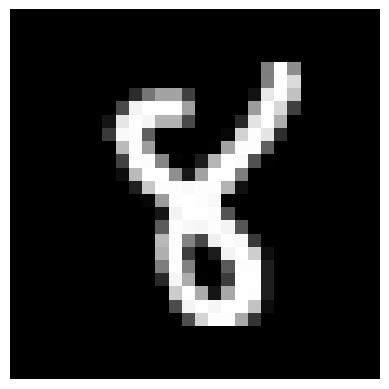

0 --- 0


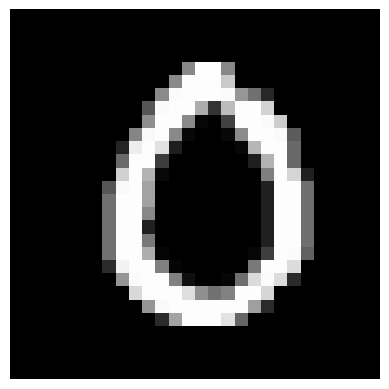

8 --- 8


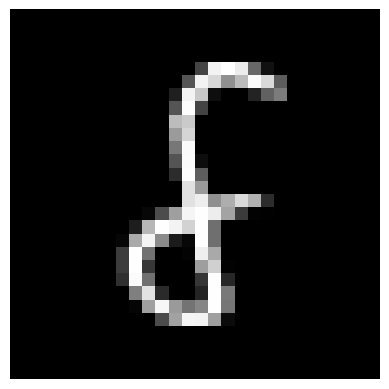

3 --- 3


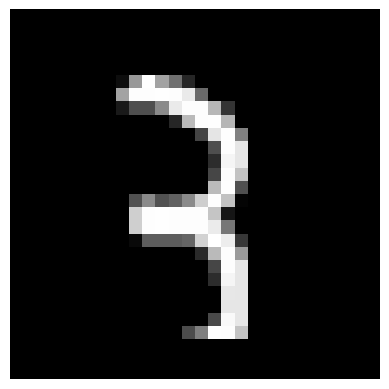

5 --- 5


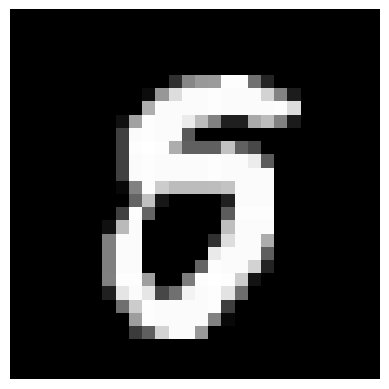

0 --- 0


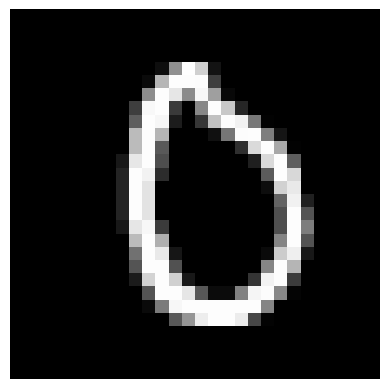

4 --- 4


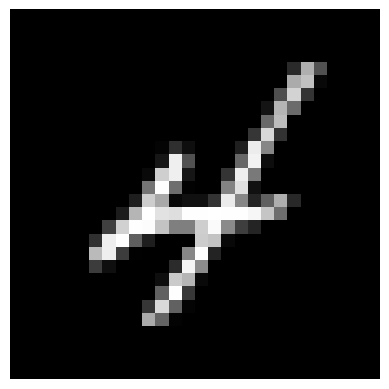

9 --- 9


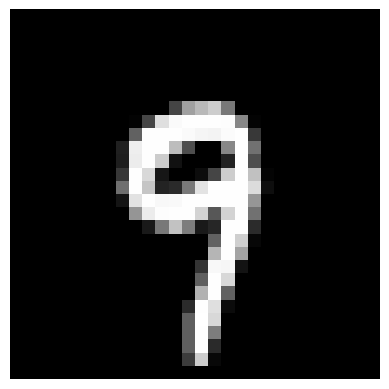

0 --- 0


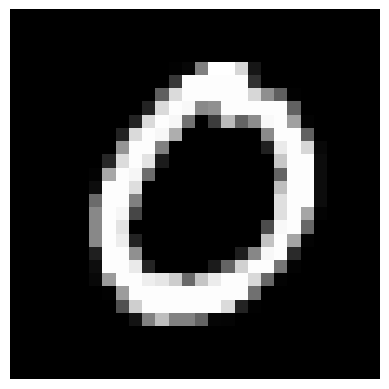

0 --- 0


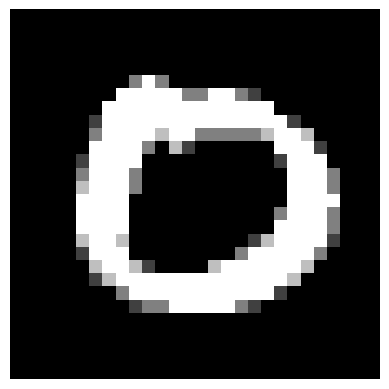

7 --- 7


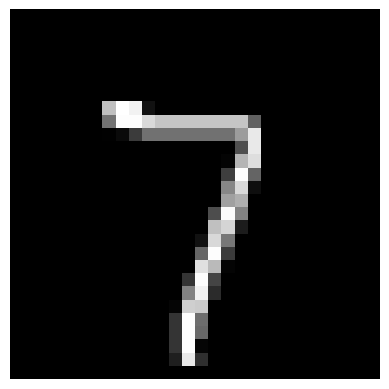

0 --- 0


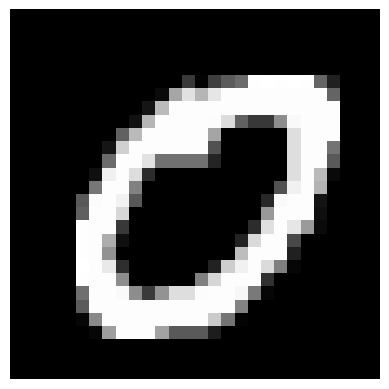

1 --- 1


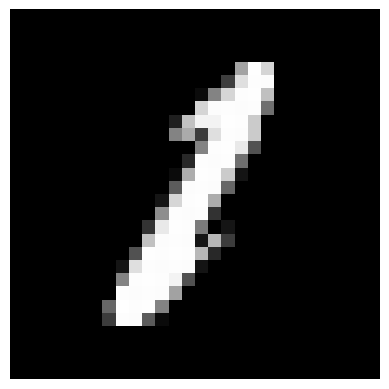

9 --- 9


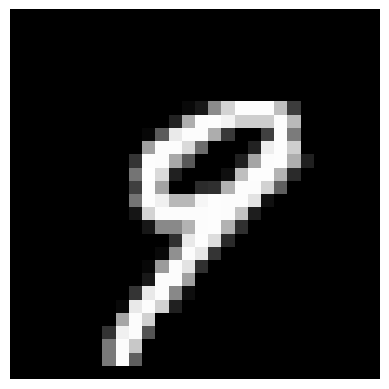

7 --- 7


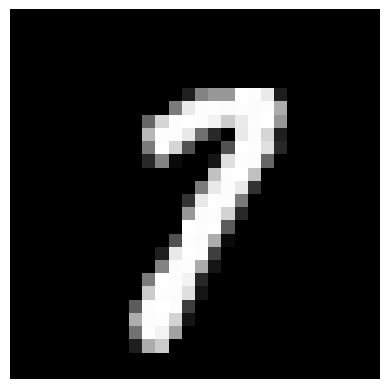

2 --- 2


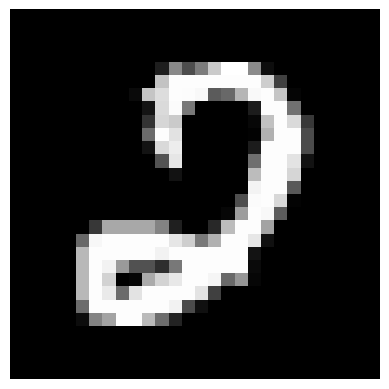

3 --- 3


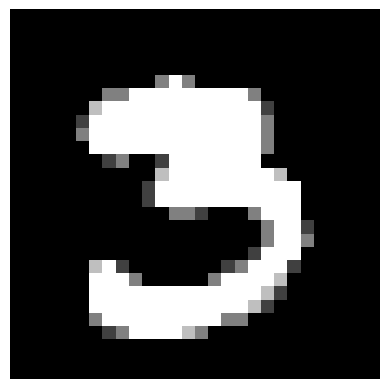

6 --- 6


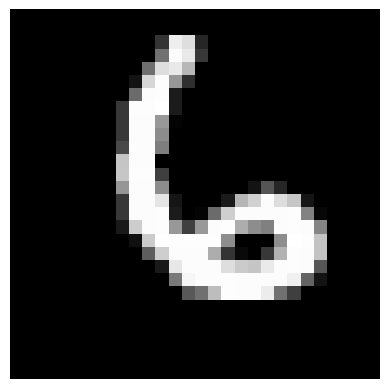

6 --- 6


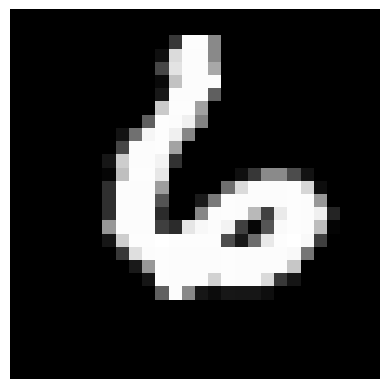

3 --- 3


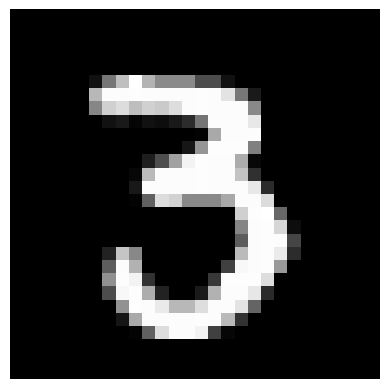

3 --- 3


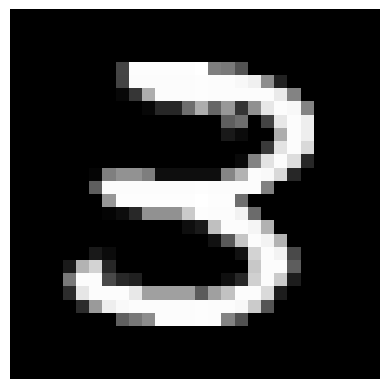

5 --- 5


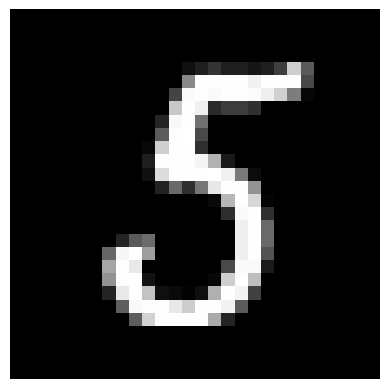

6 --- 6


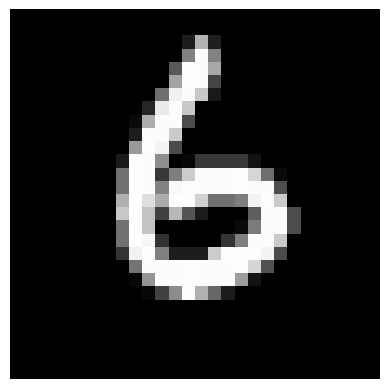

7 --- 7


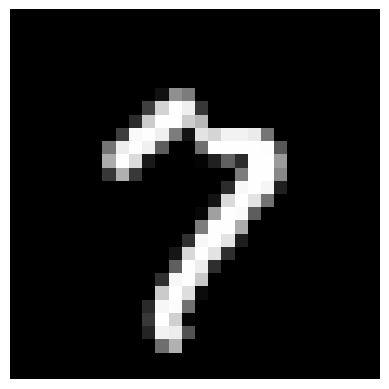

7 --- 7


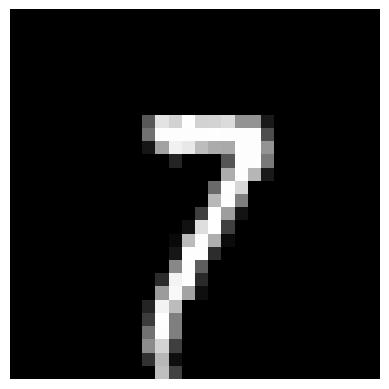

4 --- 4


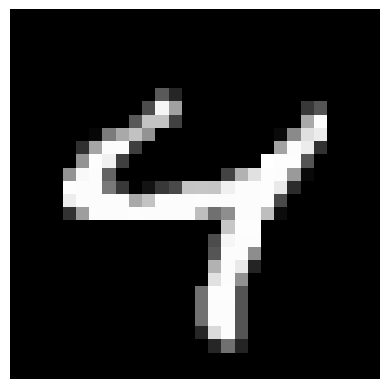

9 --- 9


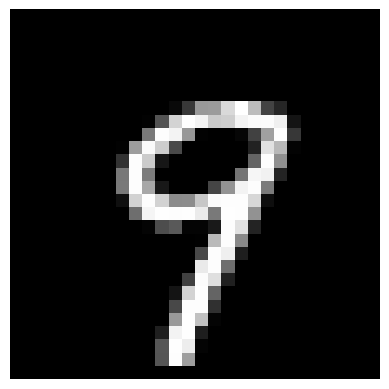

2 --- 2


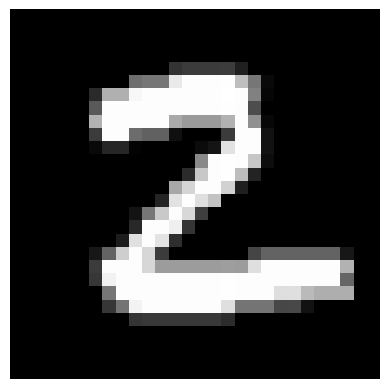

5 --- 5


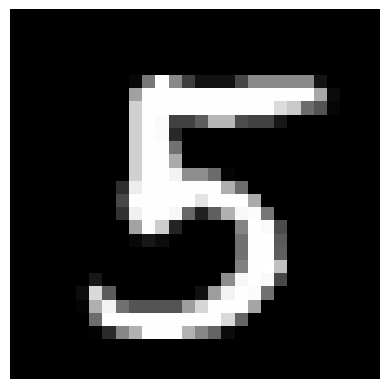

0 --- 0


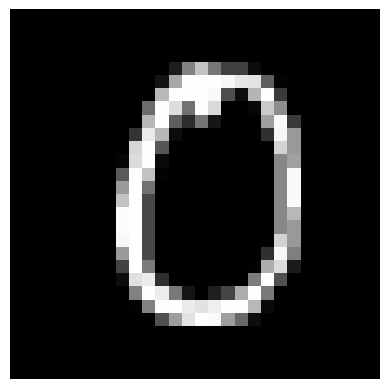

2 --- 2


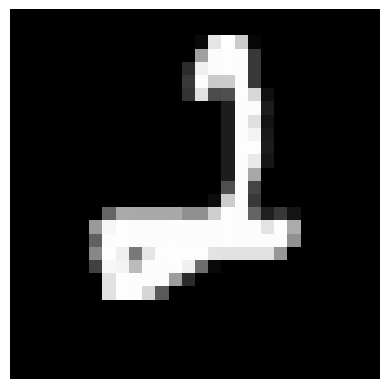

7 --- 7


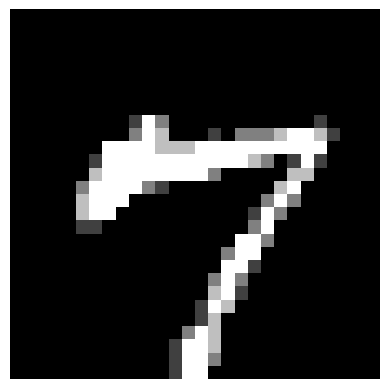

2 --- 2


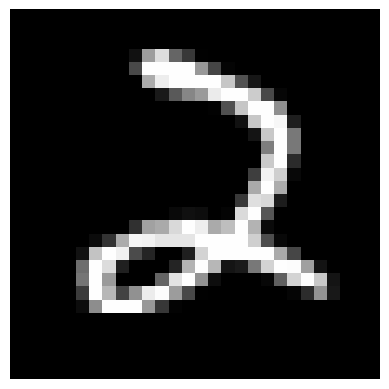

6 --- 6


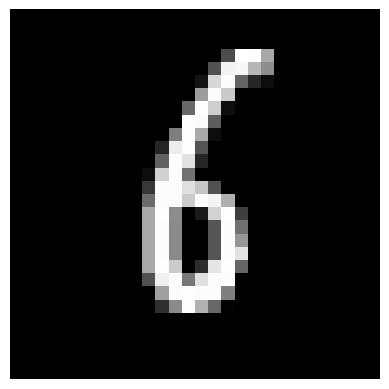

3 --- 3


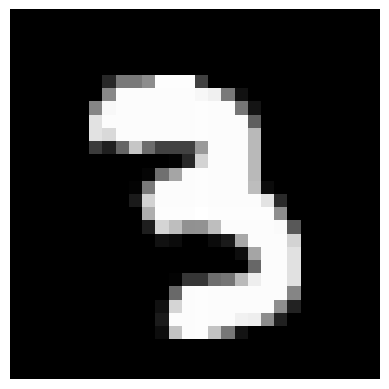

0 --- 0


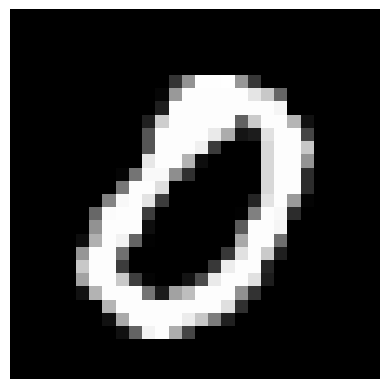

0 --- 0


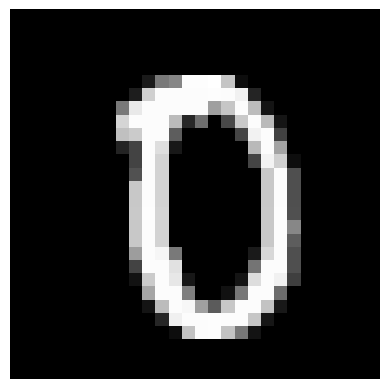

9 --- 9


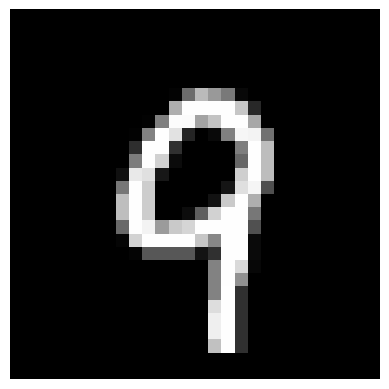

6 --- 6


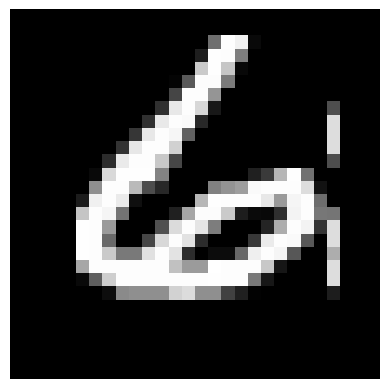

2 --- 2


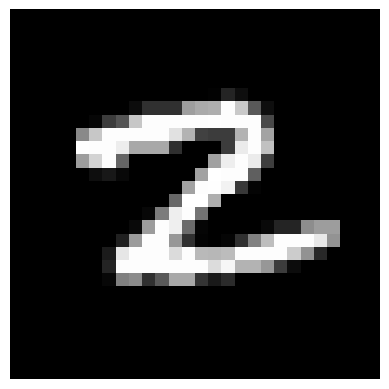

4 --- 4


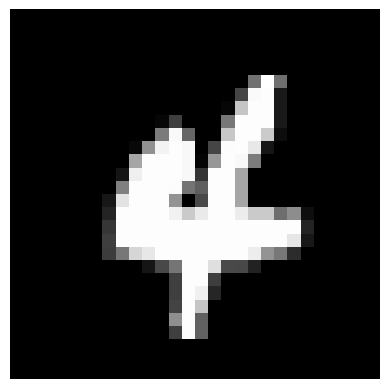

9 --- 9


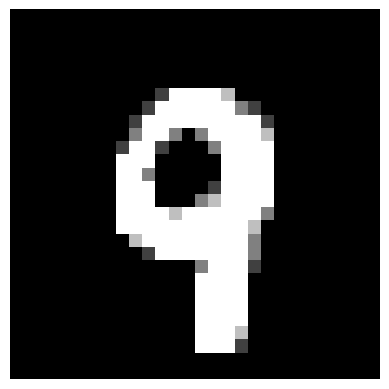

1 --- 1


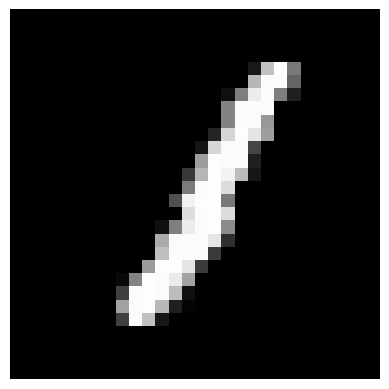

0 --- 0


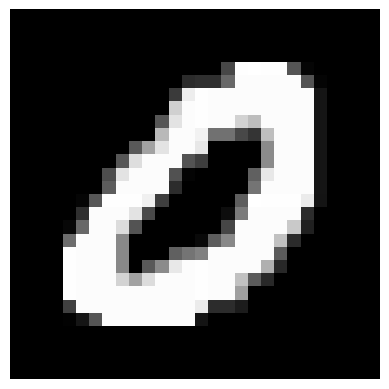

2 --- 2


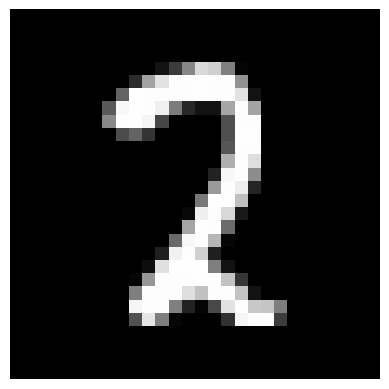

9 --- 9


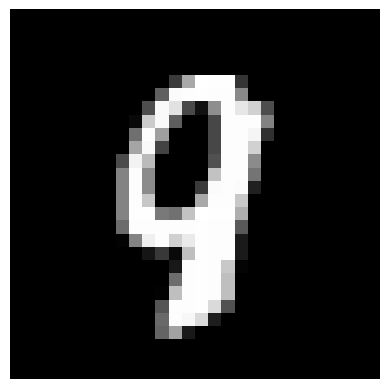

9 --- 9


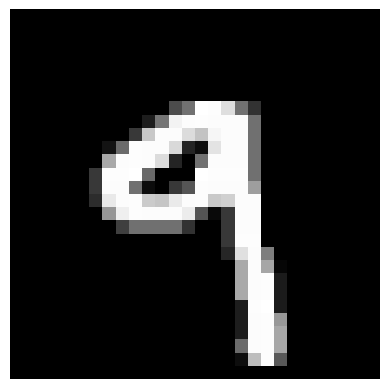

7 --- 7


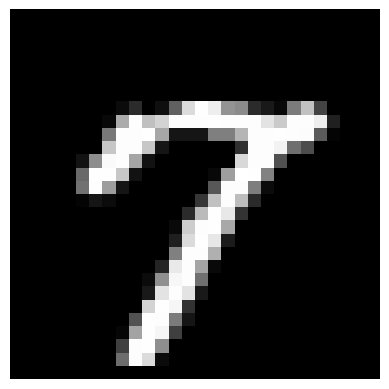

8 --- 8


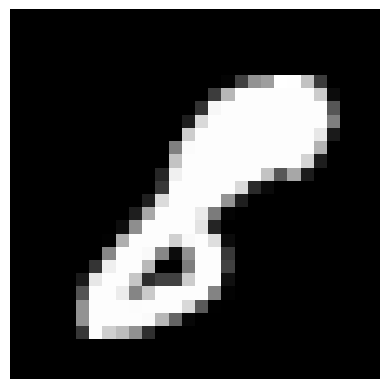

3 --- 3


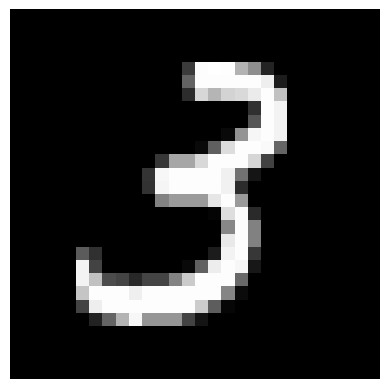

6 --- 6


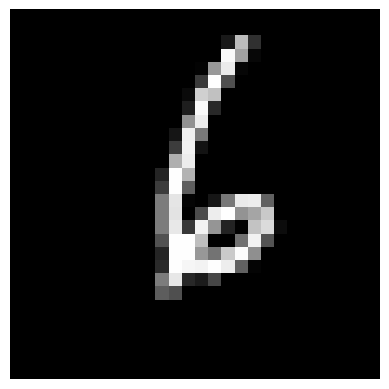

9 --- 9


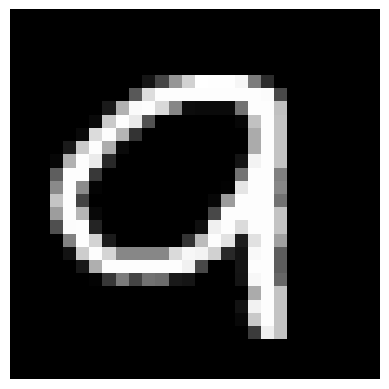

5 --- 5


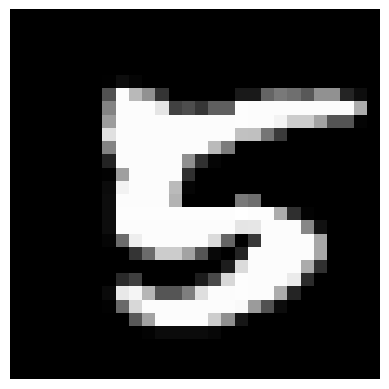

7 --- 7


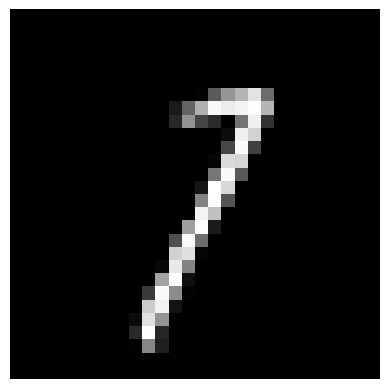

5 --- 5


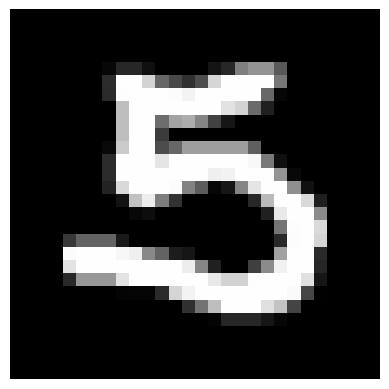

2 --- 2


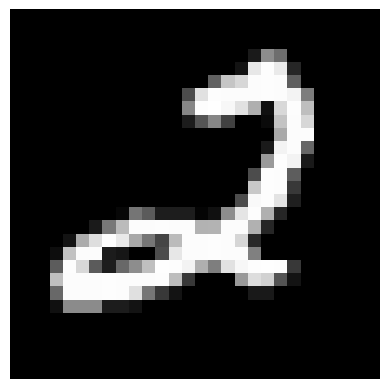

3 --- 3


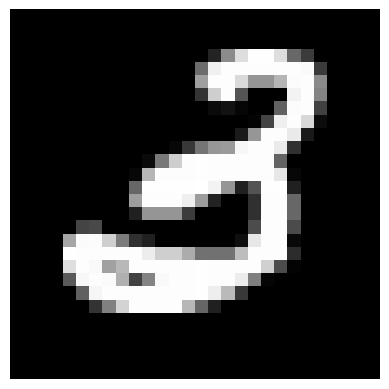

7 --- 7


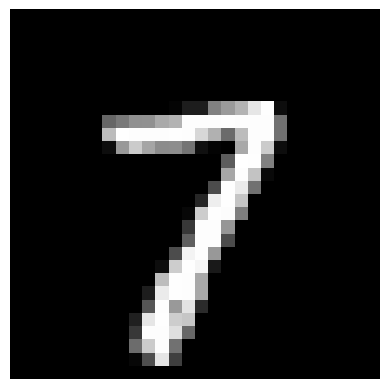

1 --- 1


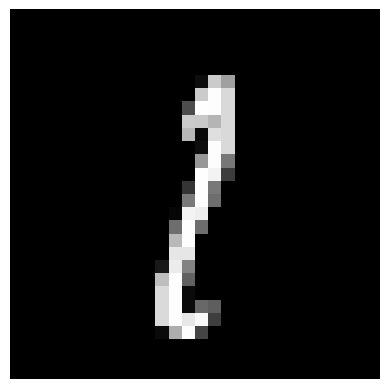

4 --- 4


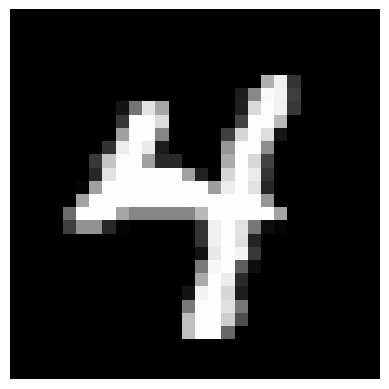

0 --- 0


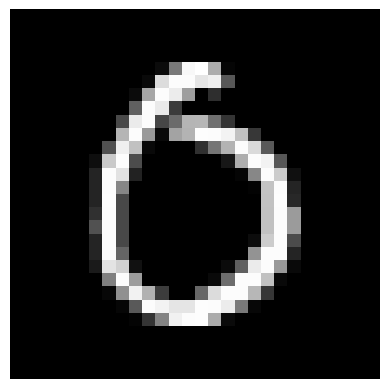

4 --- 4


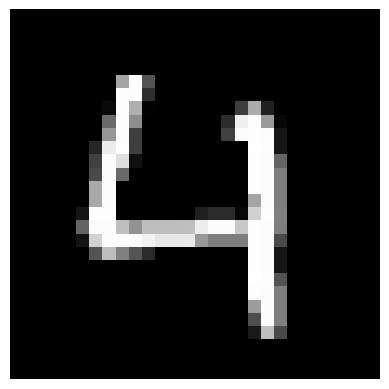

8 --- 8


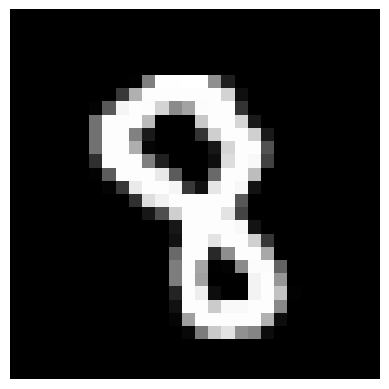

8 --- 8


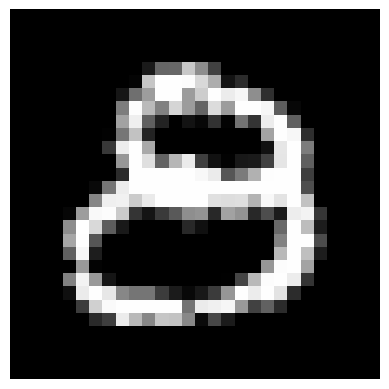

2 --- 2


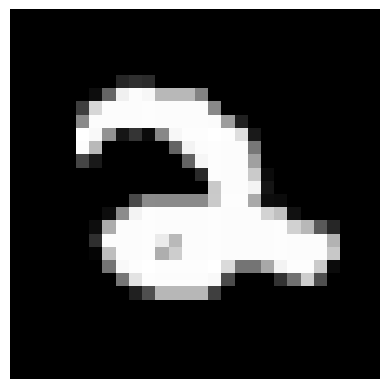

4 --- 4


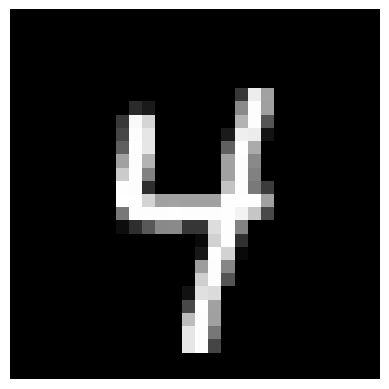

2 --- 2


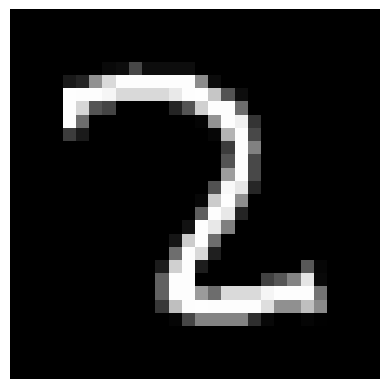

0 --- 0


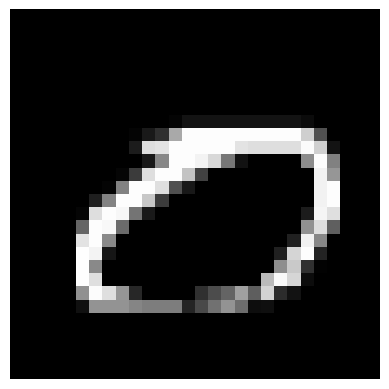

4 --- 4


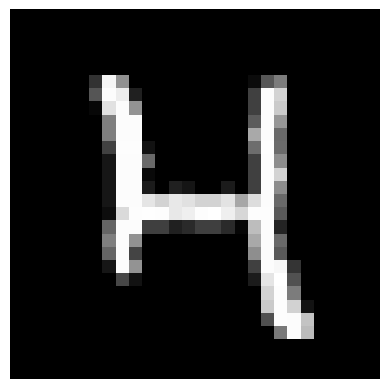

8 --- 8


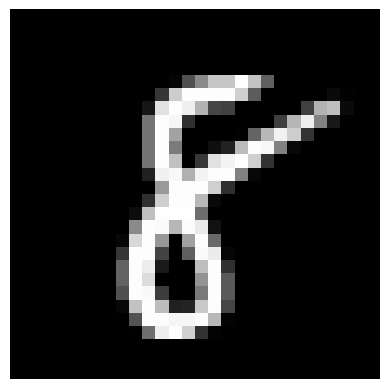

6 --- 6


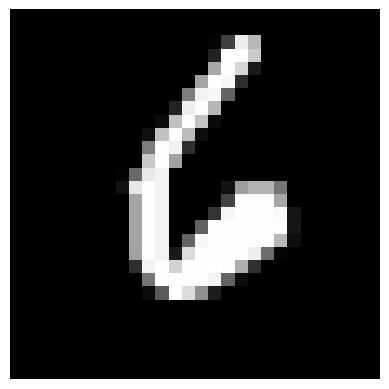

2 --- 2


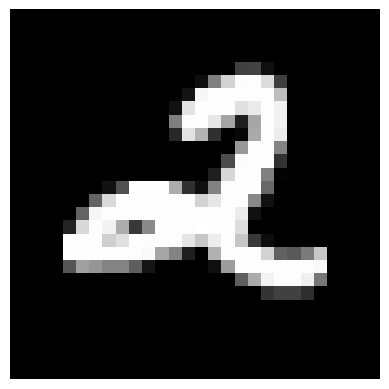

3 --- 3


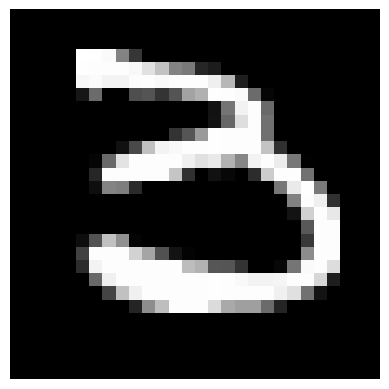

5 --- 5


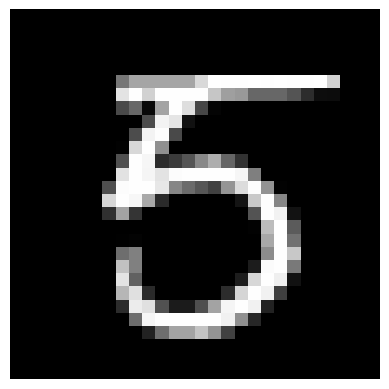

8 --- 8


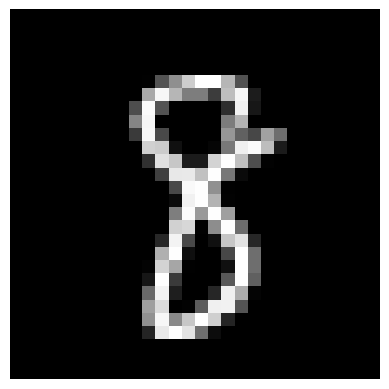

3 --- 3


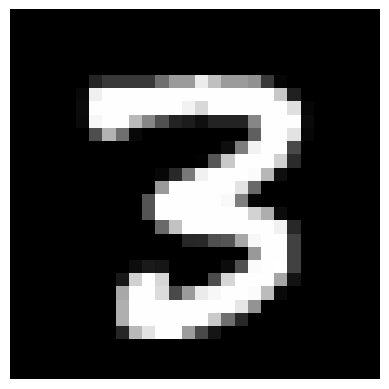

7 --- 7


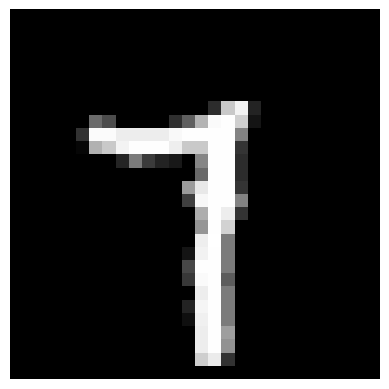

3 --- 3


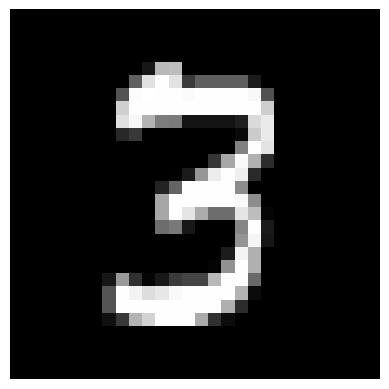

2 --- 2


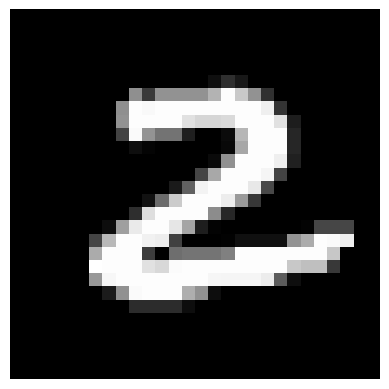

3 --- 3


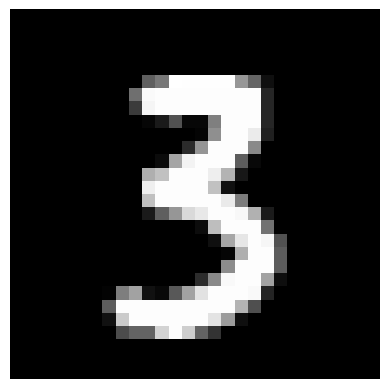

6 --- 6


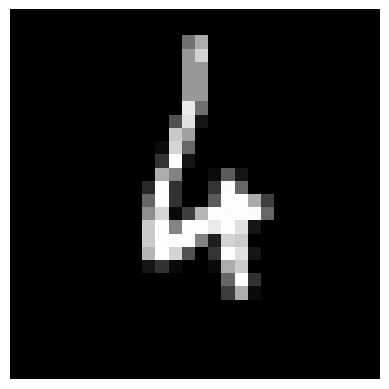

7 --- 7


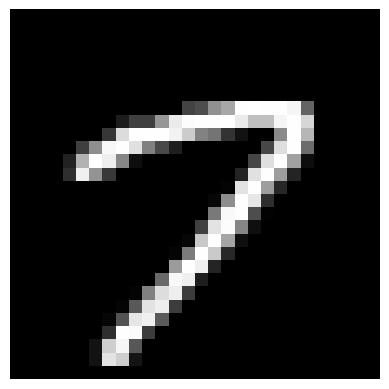

4 --- 4


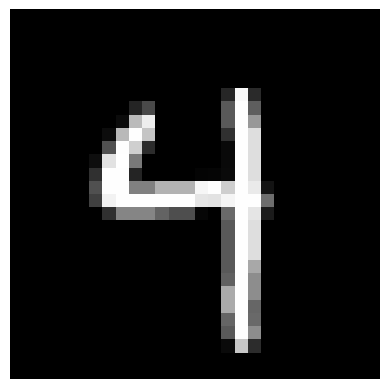

5 --- 5


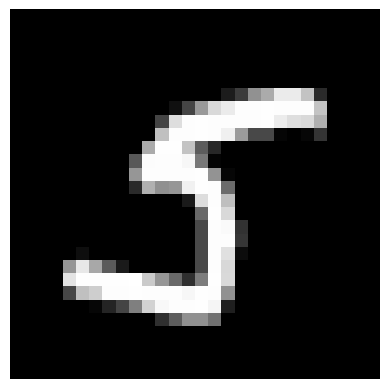

5 --- 5


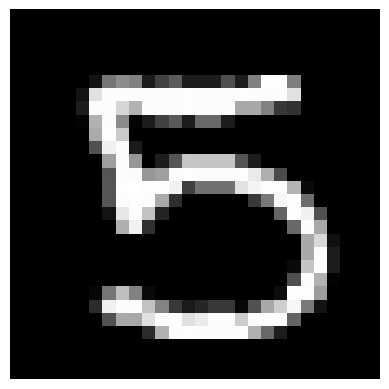

0 --- 0


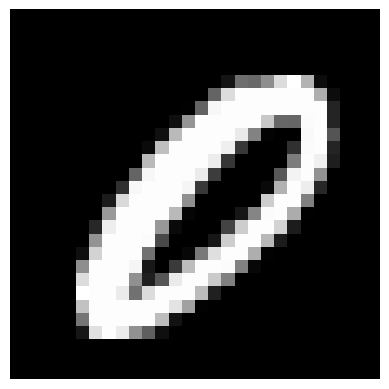

4 --- 4


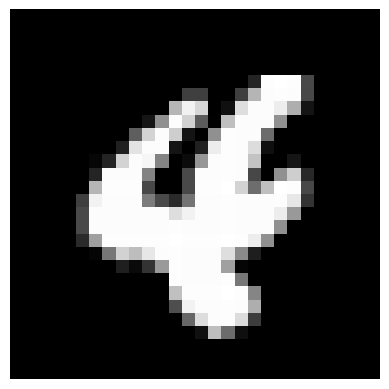

2 --- 2


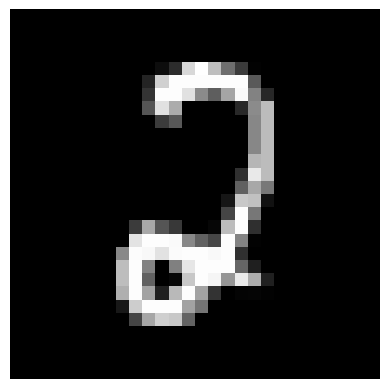

3 --- 3


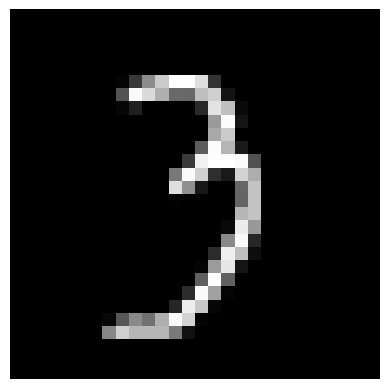

4 --- 4


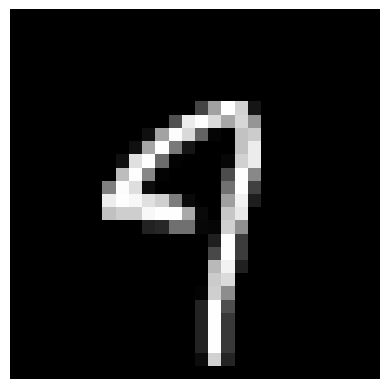

1 --- 1


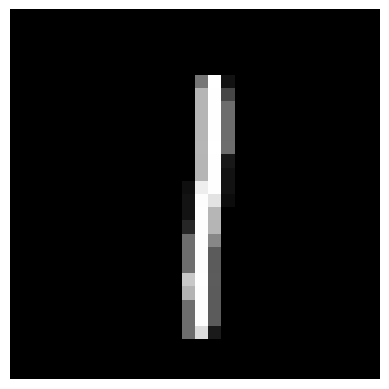

7 --- 7


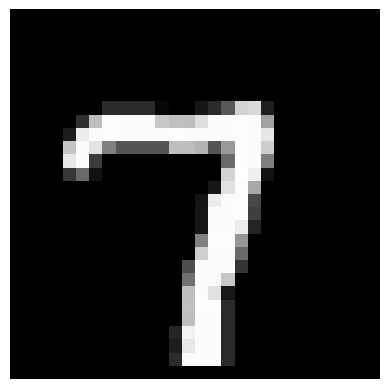

6 --- 6


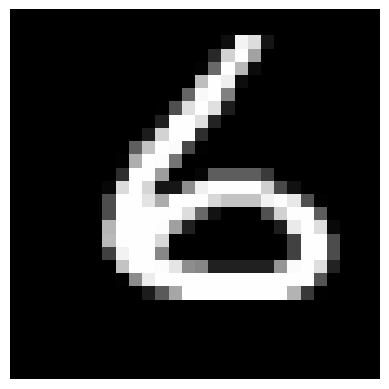

1 --- 1


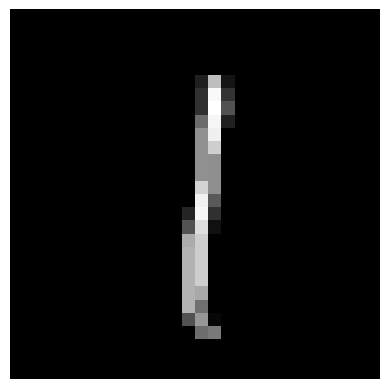

3 --- 3


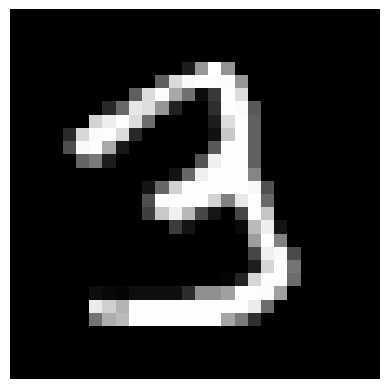

4 --- 4


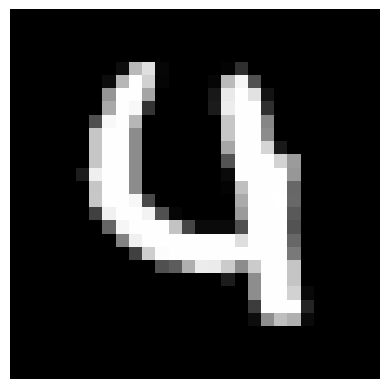

1 --- 1


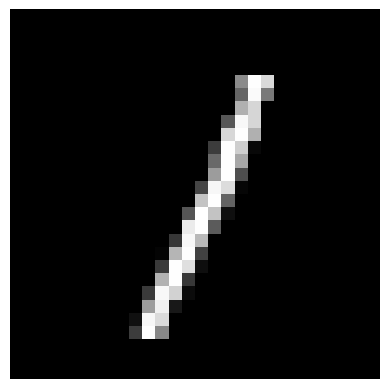

3 --- 3


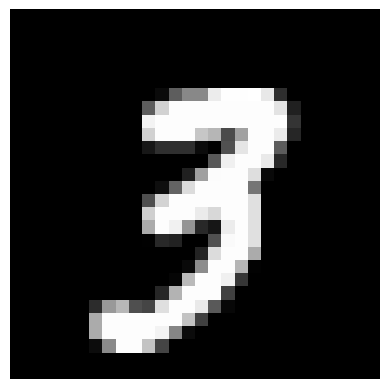

3 --- 3


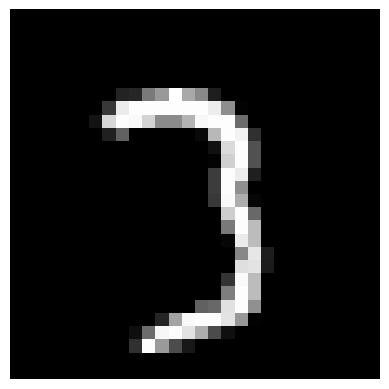

2 --- 2


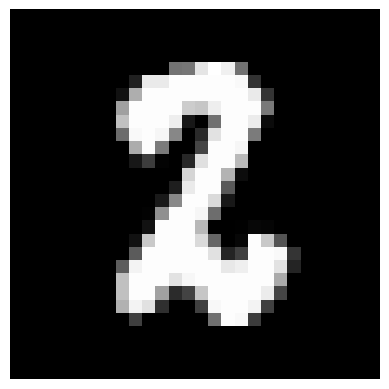

1 --- 1


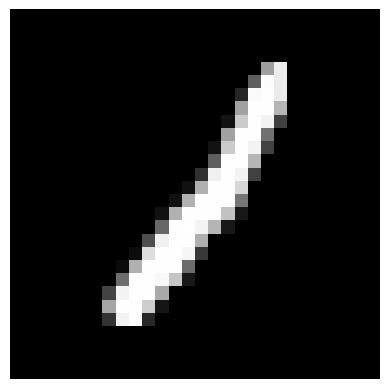

8 --- 8


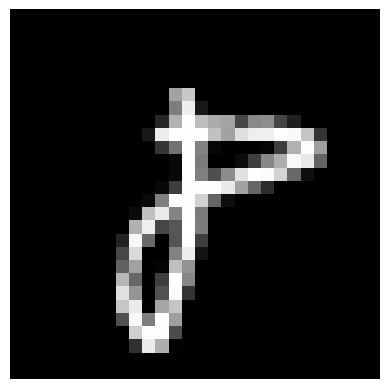

8 --- 8


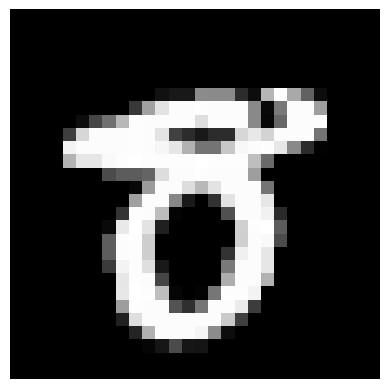

7 --- 7


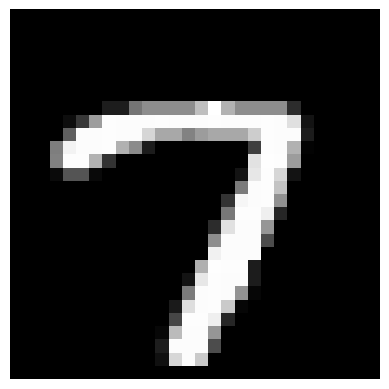

3 --- 3


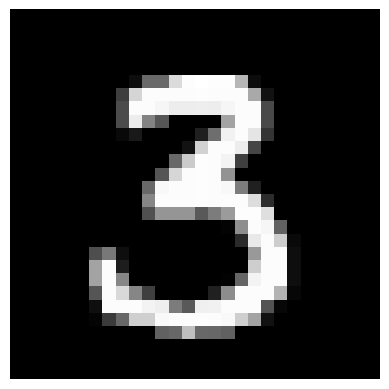

2 --- 2


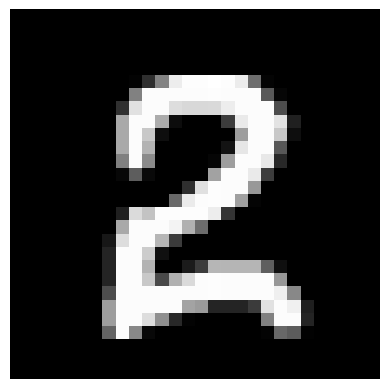

0 --- 0


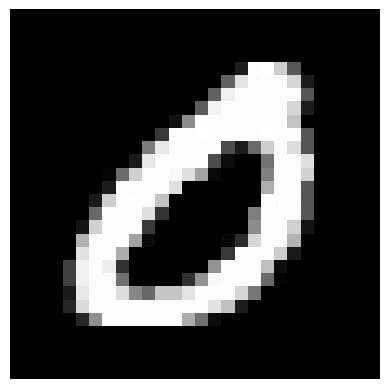

4 --- 4


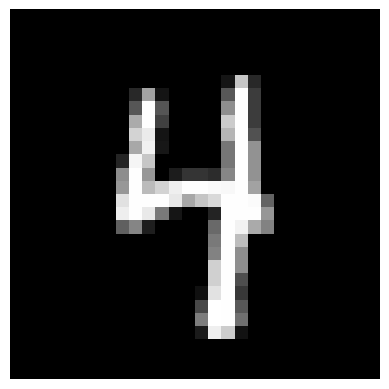

2 --- 2


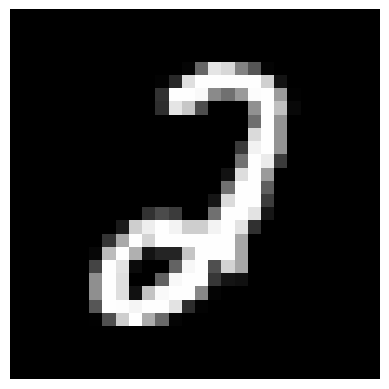

9 --- 9


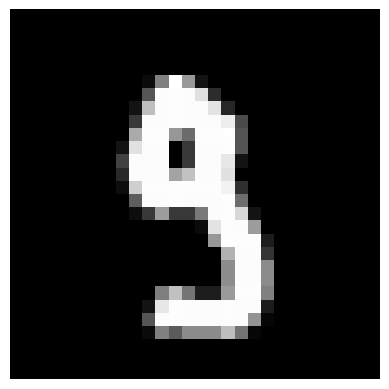

3 --- 3


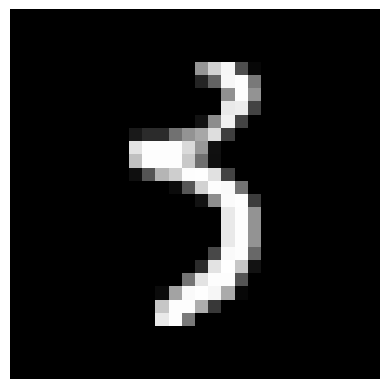

9 --- 9


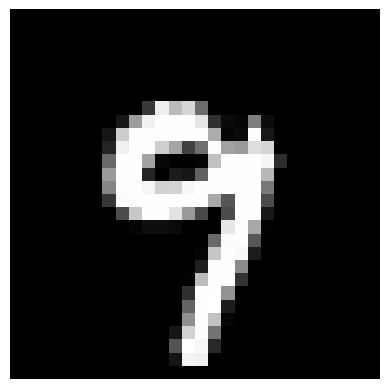

2 --- 2


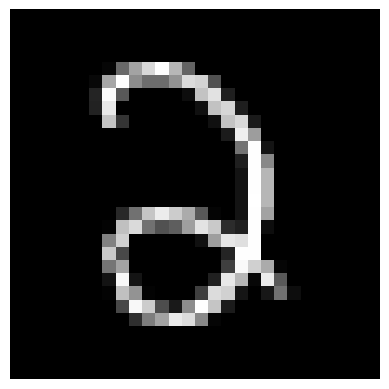

8 --- 8


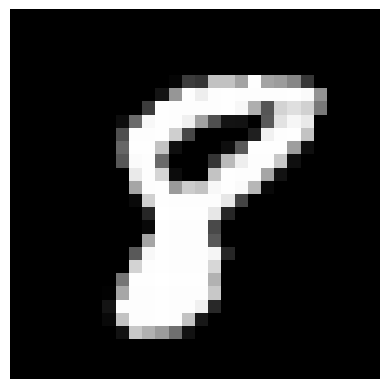

4 --- 4


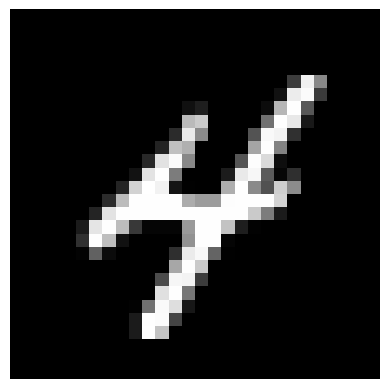

5 --- 5


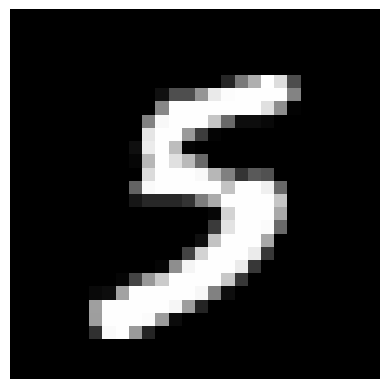

7 --- 7


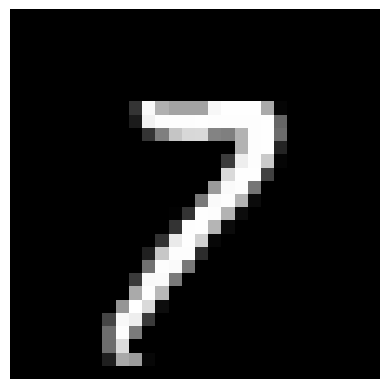

1 --- 1


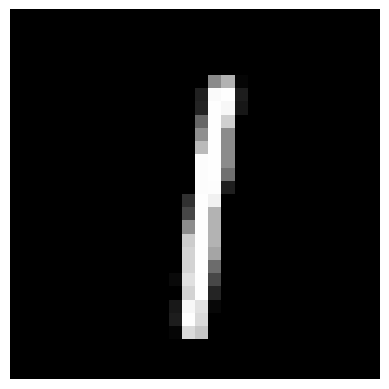

9 --- 9


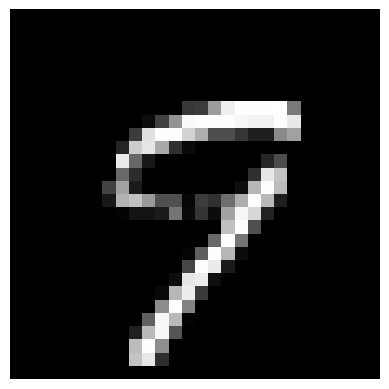

2 --- 2


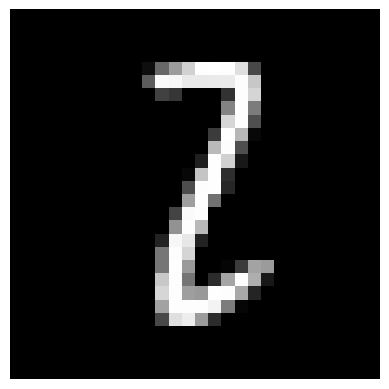

0 --- 0


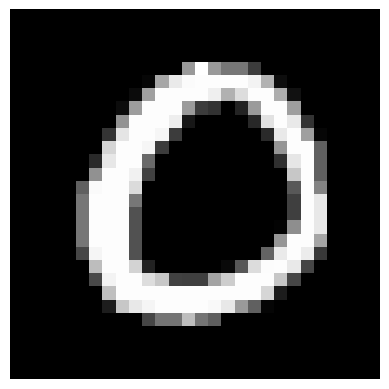

6 --- 6


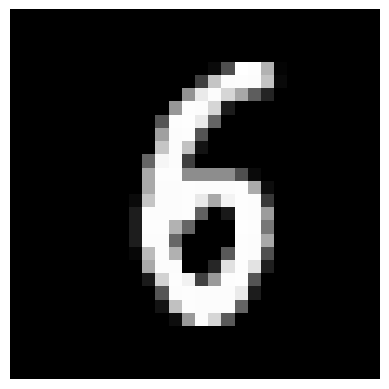

1 --- 1


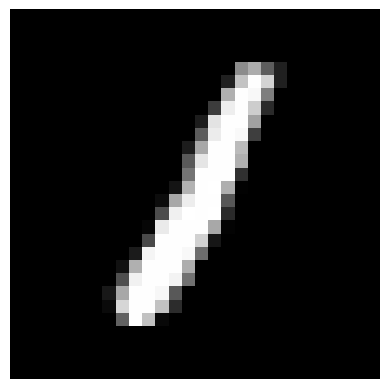

3 --- 3


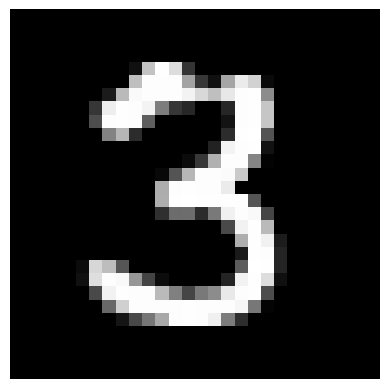

4 --- 4


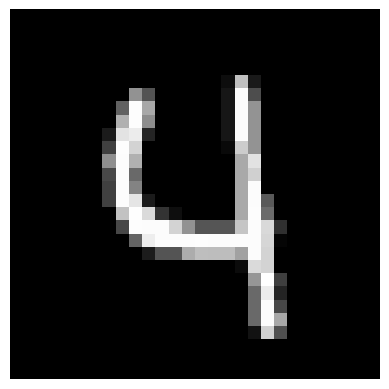

2 --- 2


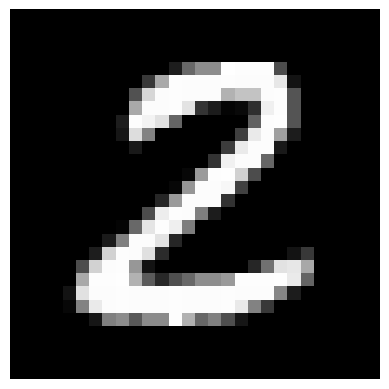

0 --- 0


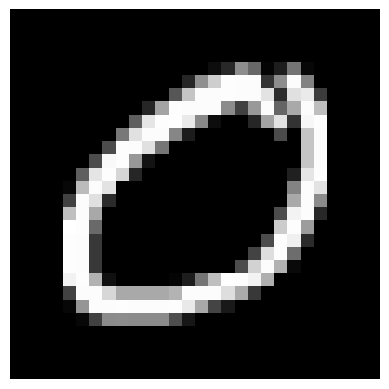

9 --- 9


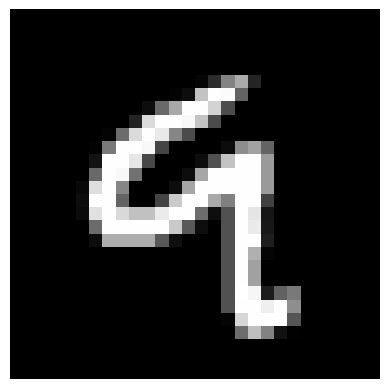

4 --- 4


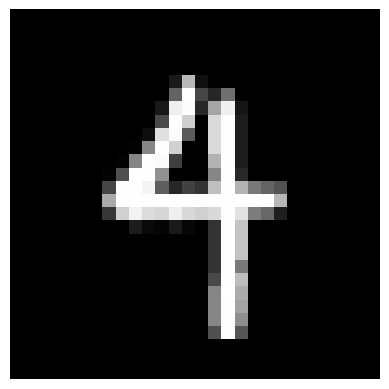

0 --- 0


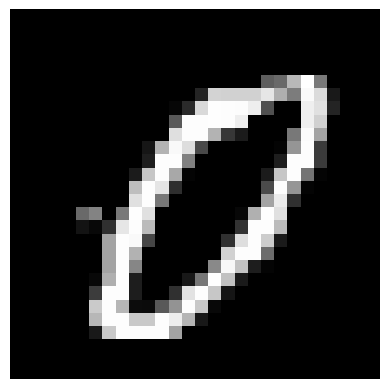

4 --- 4


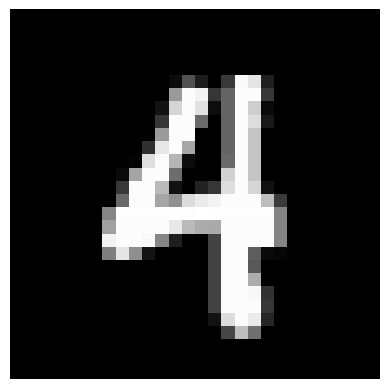

8 --- 8


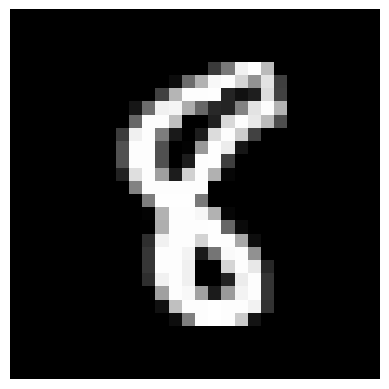

6 --- 6


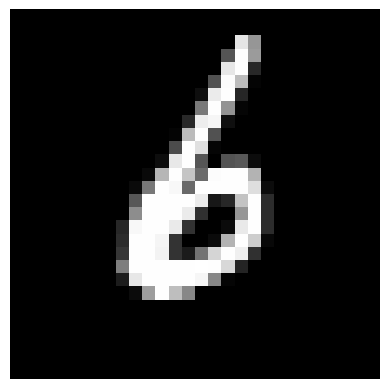

9 --- 9


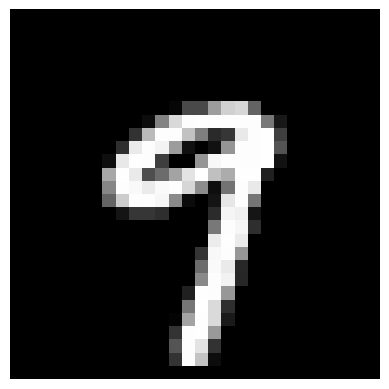

2 --- 2


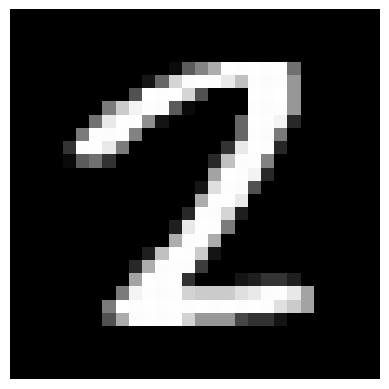

5 --- 5


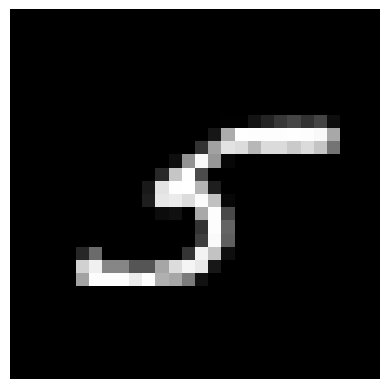

2 --- 2


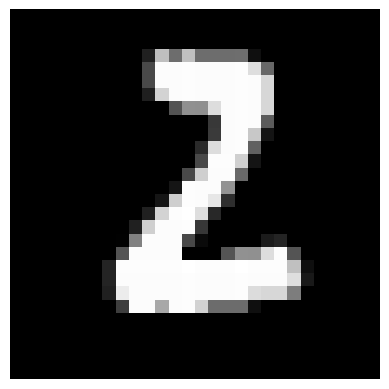

9 --- 9


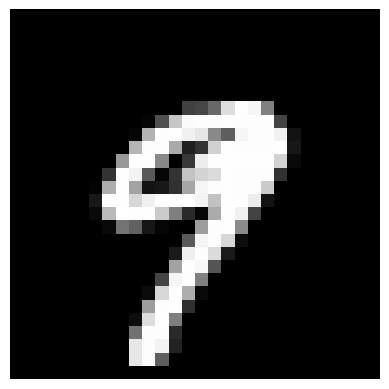

4 --- 4


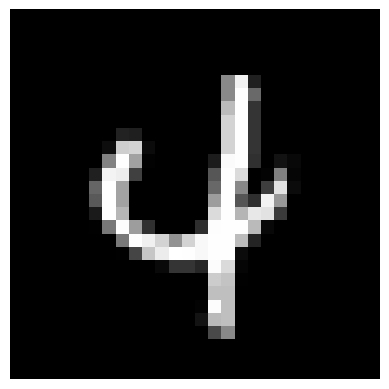

3 --- 3


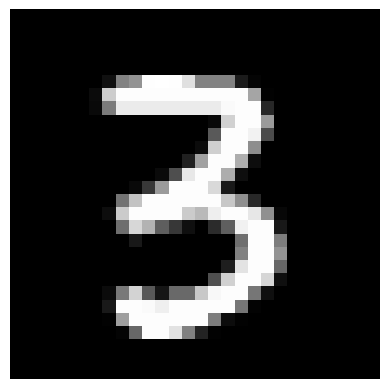

4 --- 4


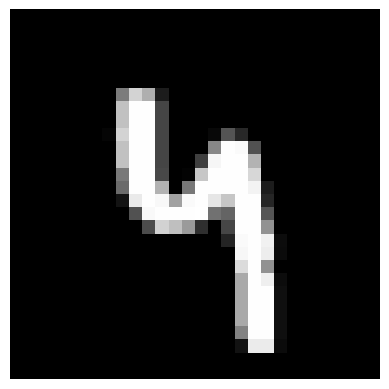

2 --- 2


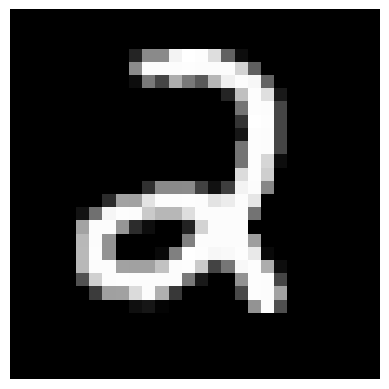

7 --- 7


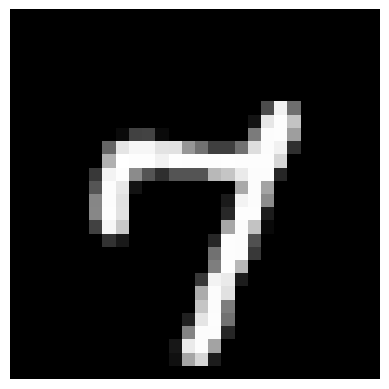

7 --- 7


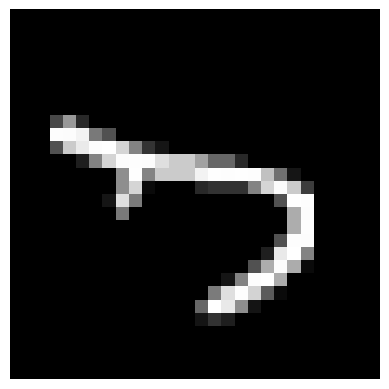

7 --- 7


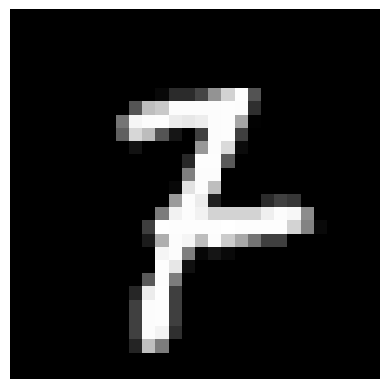

4 --- 4


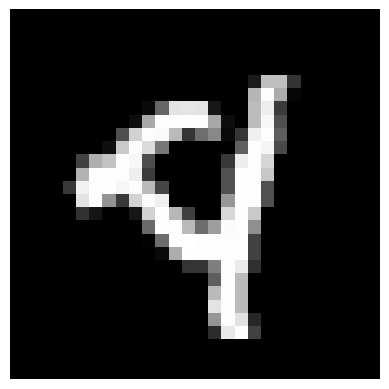

5 --- 5


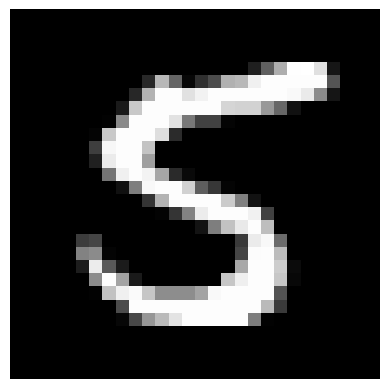

2 --- 2


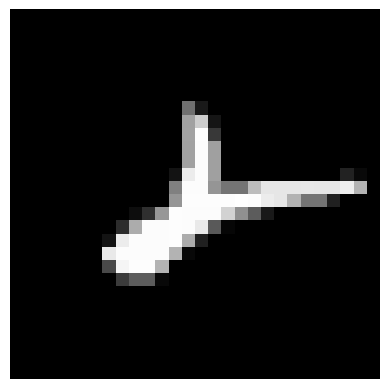

8 --- 8


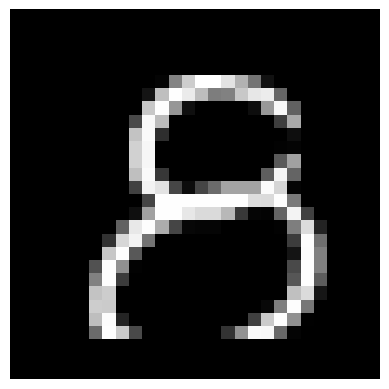

5 --- 5


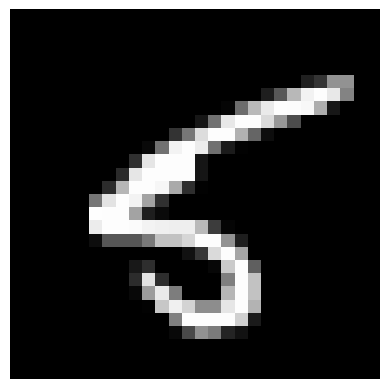

0 --- 0


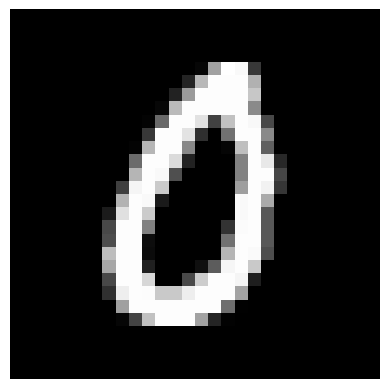

3 --- 3


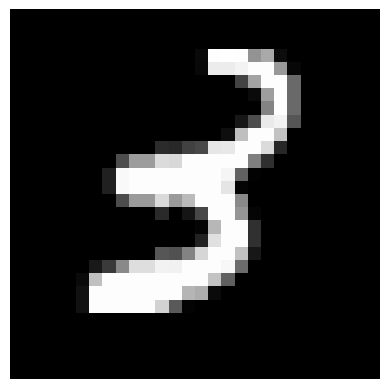

8 --- 8


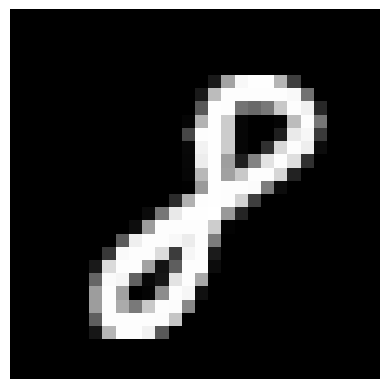

3 --- 3


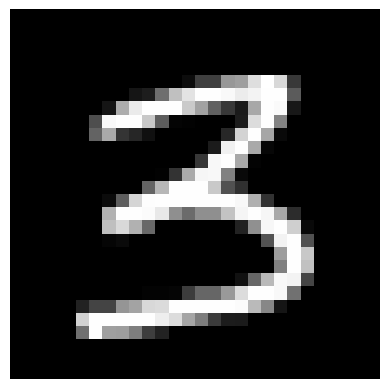

3 --- 3


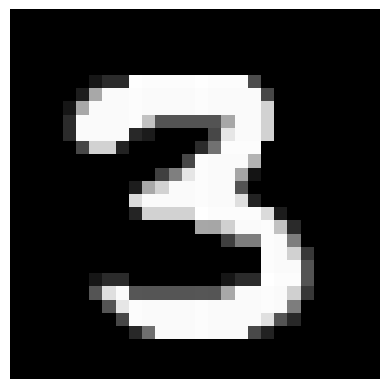

2 --- 2


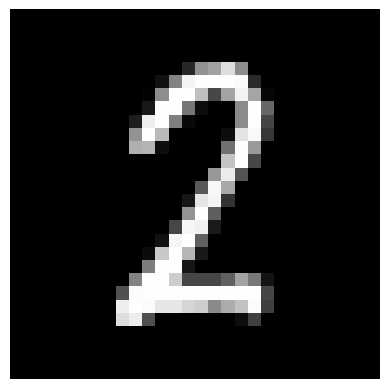

0 --- 0


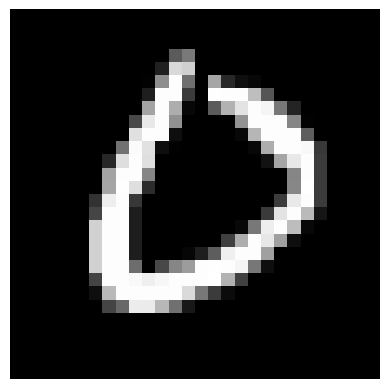

7 --- 7


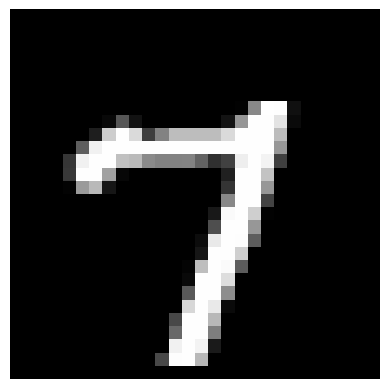

3 --- 3


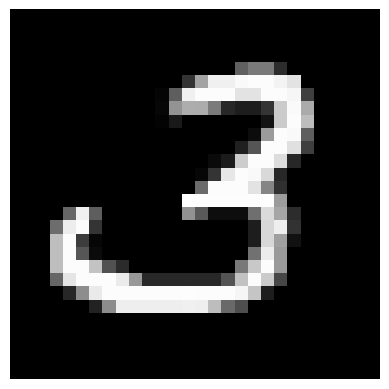

6 --- 6


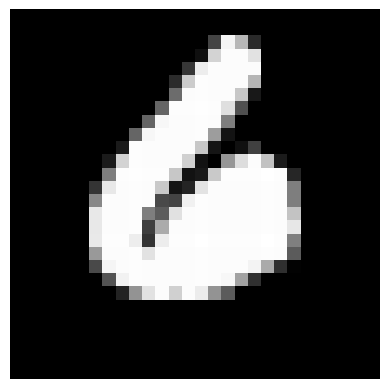

1 --- 1


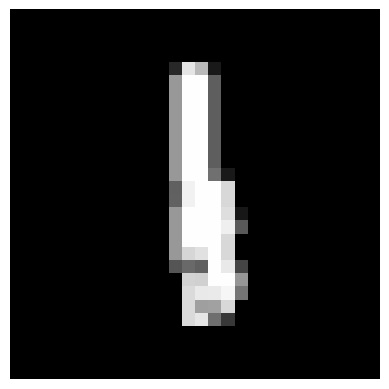

5 --- 5


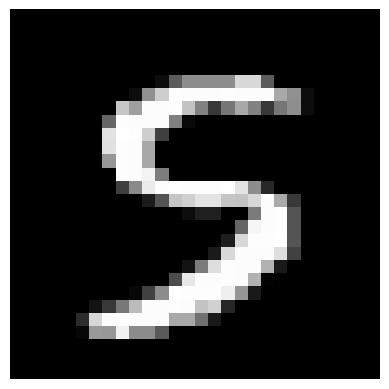

8 --- 8


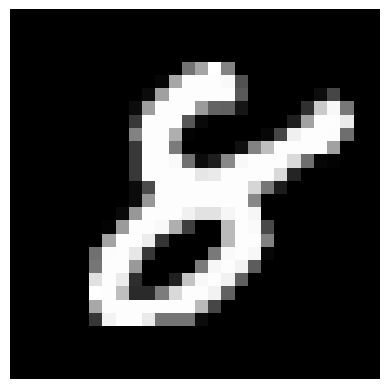

0 --- 0


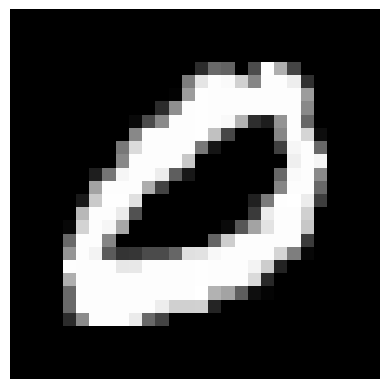

0 --- 0


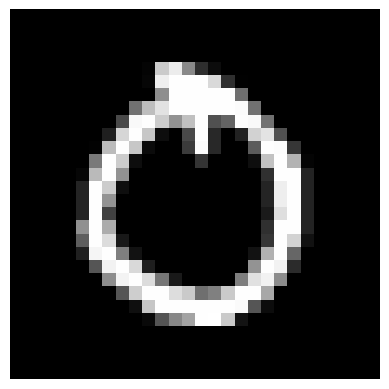

6 --- 6


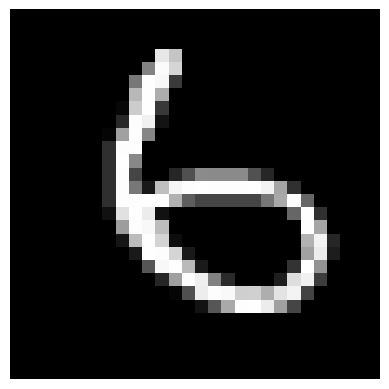

4 --- 4


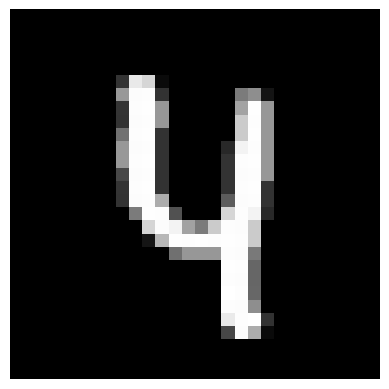

4 --- 4


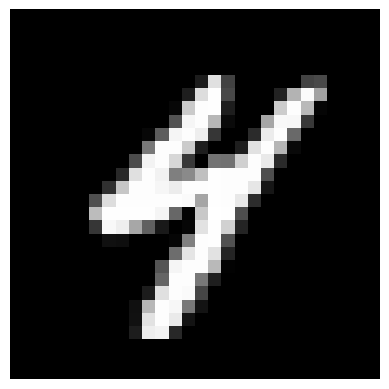

3 --- 3


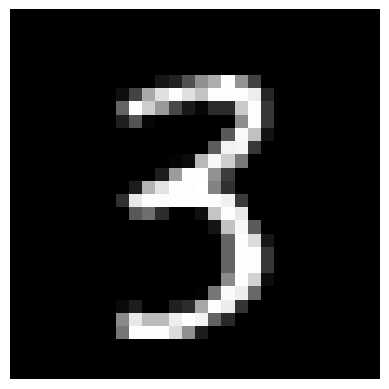

2 --- 2


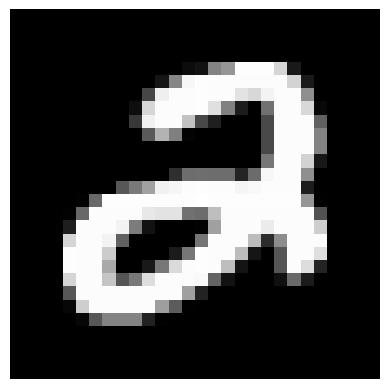

8 --- 8


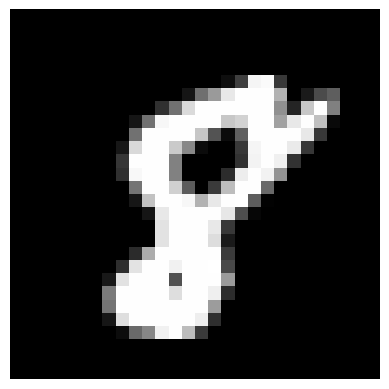

5 --- 5


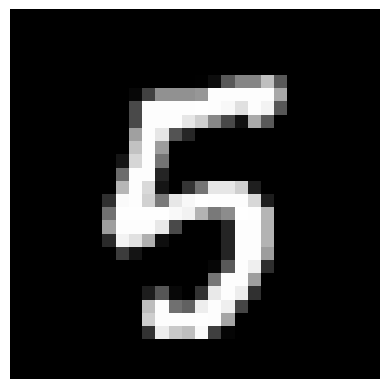

8 --- 8


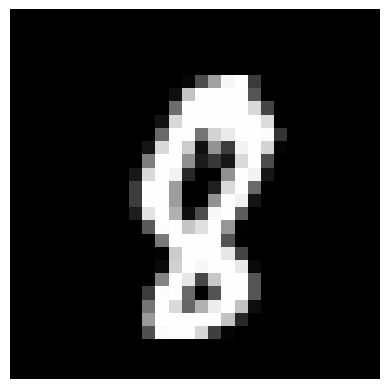

2 --- 2


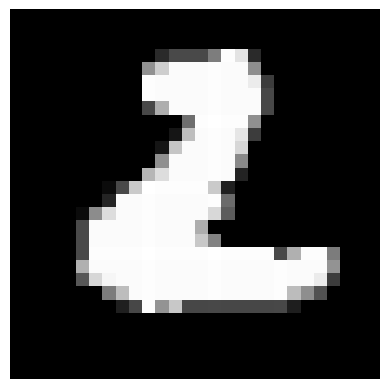

2 --- 2


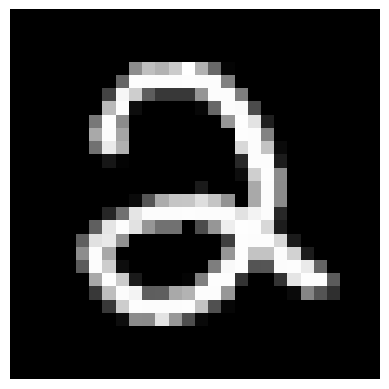

2 --- 2


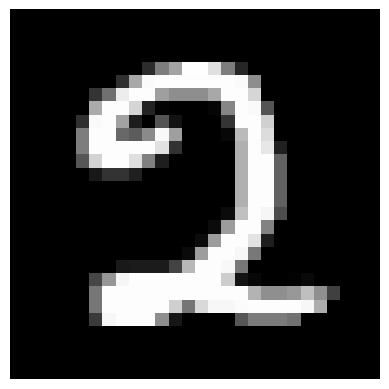

8 --- 8


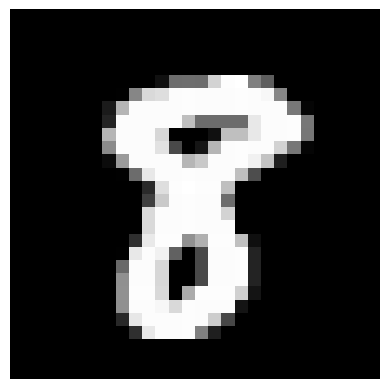

0 --- 0


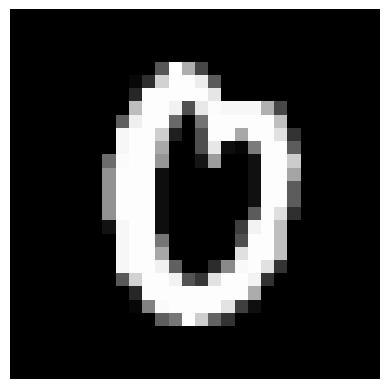

6 --- 6


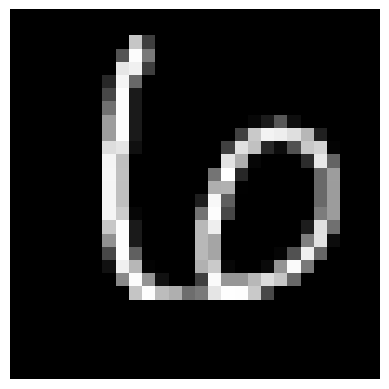

2 --- 2


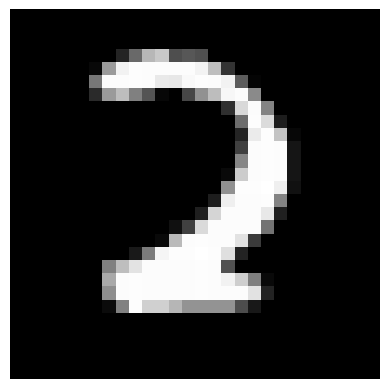

1 --- 1


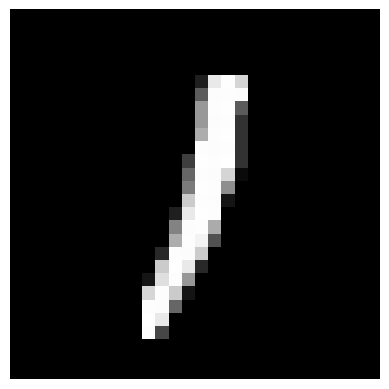

9 --- 9


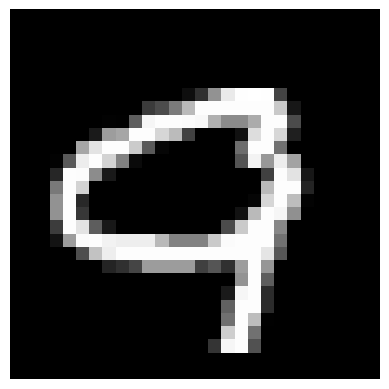

9 --- 9


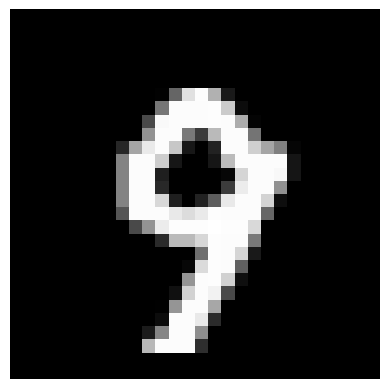

3 --- 3


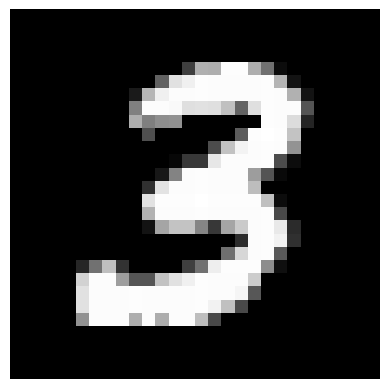

4 --- 4


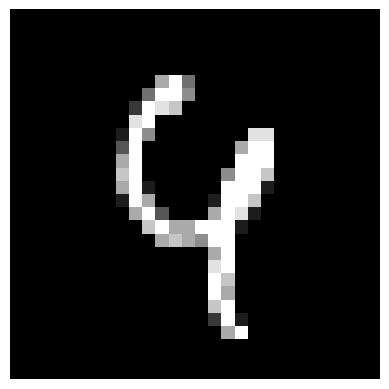

5 --- 5


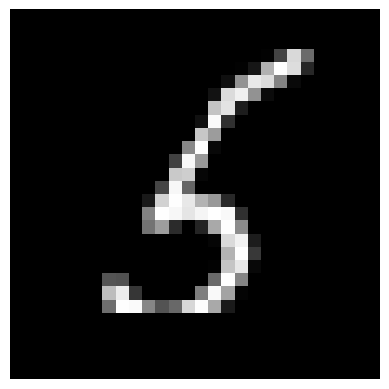

8 --- 8


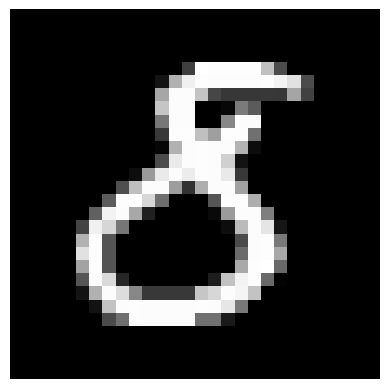

9 --- 9


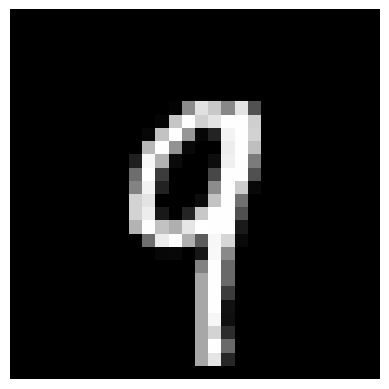

4 --- 4


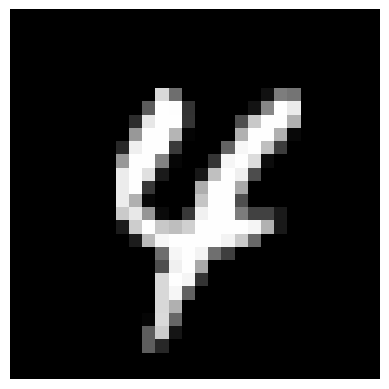

6 --- 6


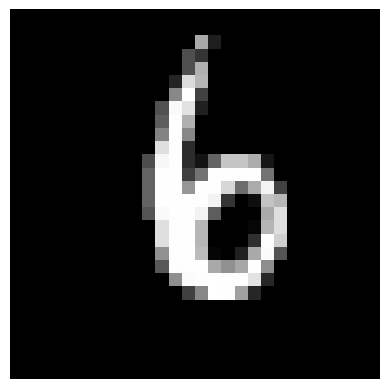

6 --- 6


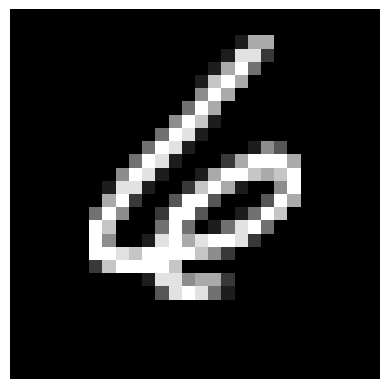

1 --- 1


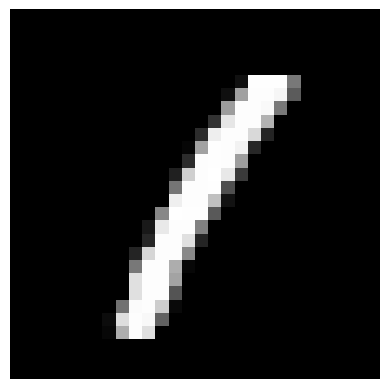

1 --- 1


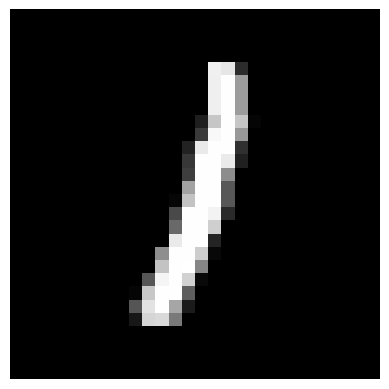

7 --- 7


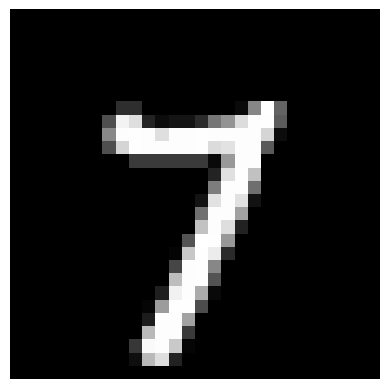

6 --- 6


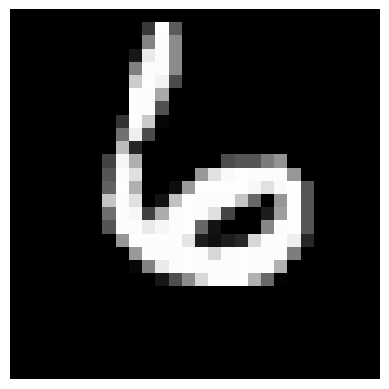

3 --- 3


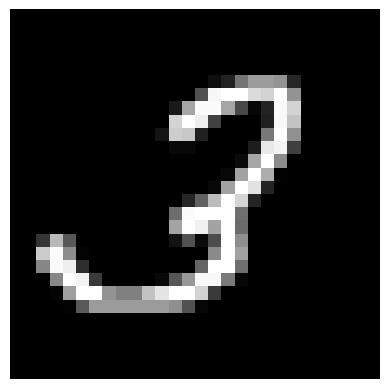

8 --- 8


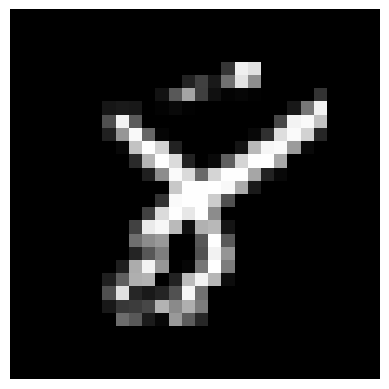

6 --- 6


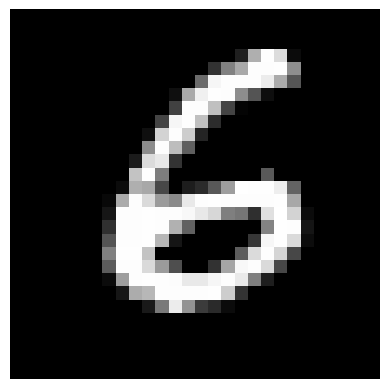

6 --- 6


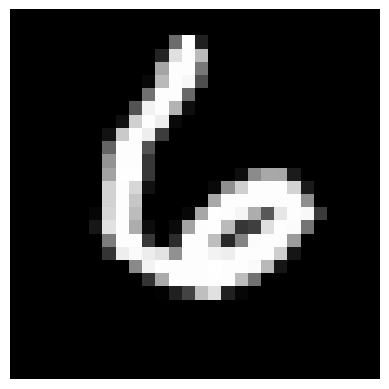

2 --- 2


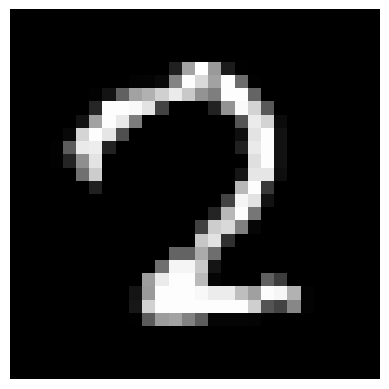

4 --- 4


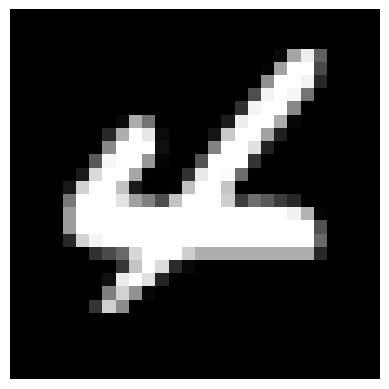

0 --- 0


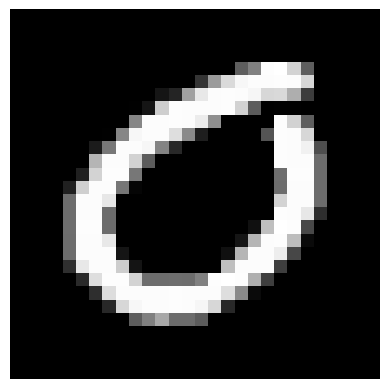

5 --- 5


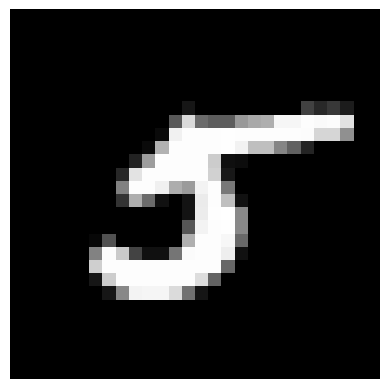

7 --- 7


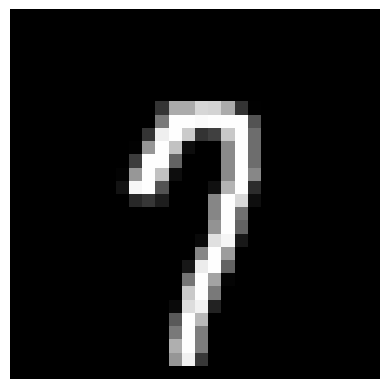

6 --- 6


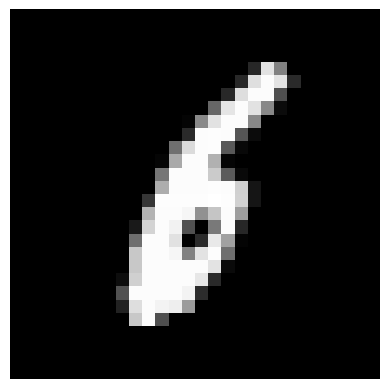

4 --- 4


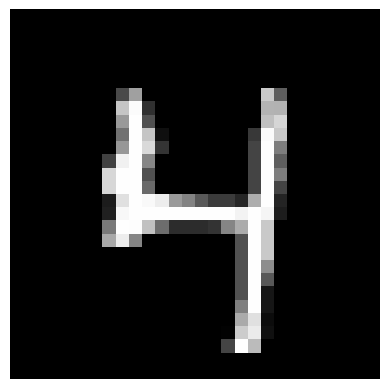

3 --- 3


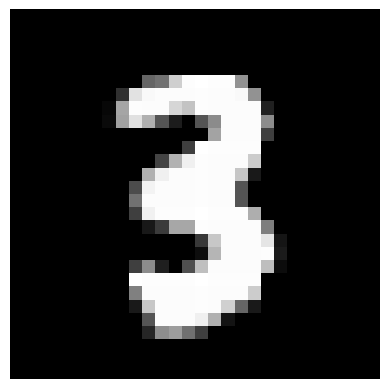

3 --- 3


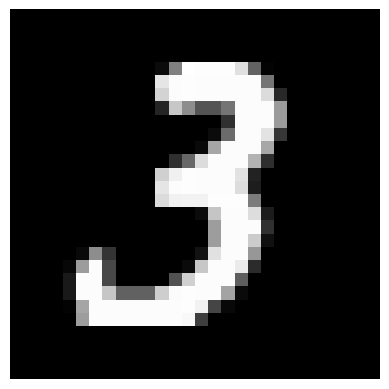

7 --- 7


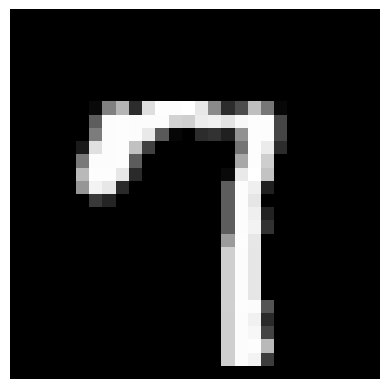

6 --- 6


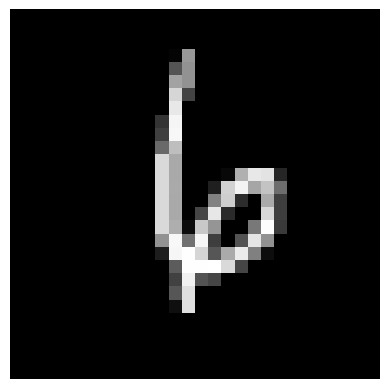

7 --- 7


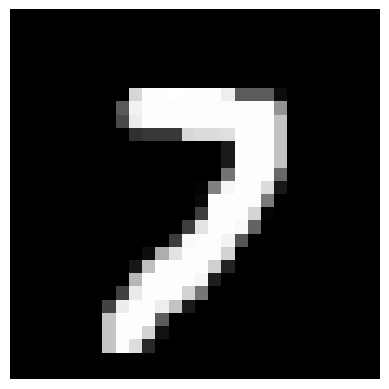

2 --- 2


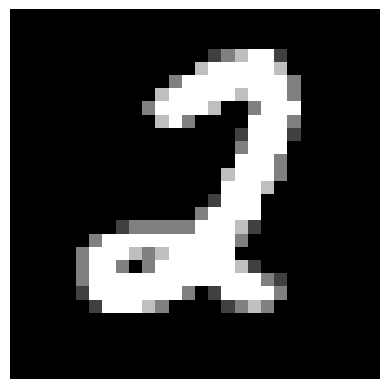

0 --- 0


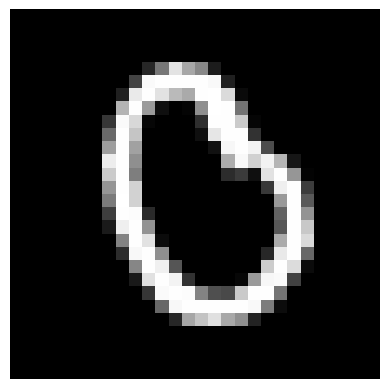

2 --- 2


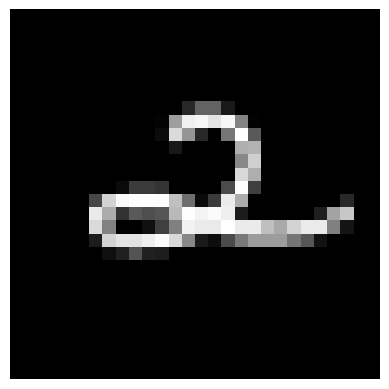

6 --- 6


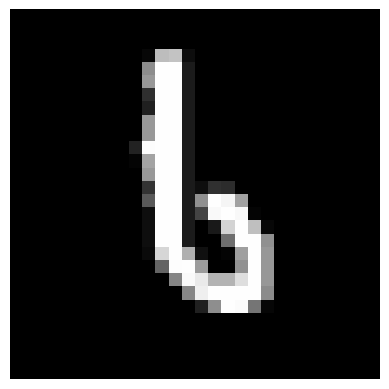

8 --- 8


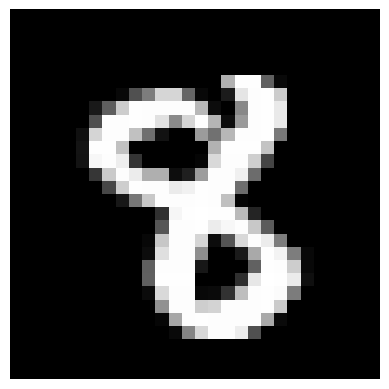

0 --- 0


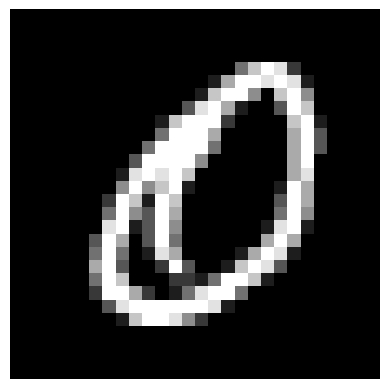

0 --- 0


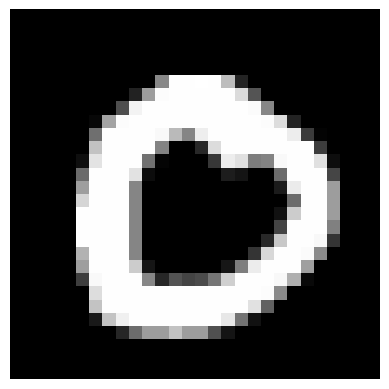

9 --- 9


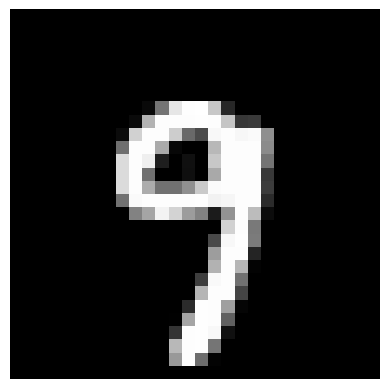

5 --- 5


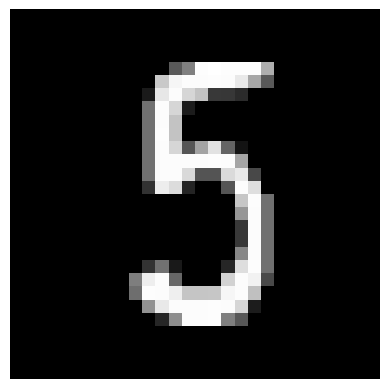

5 --- 5


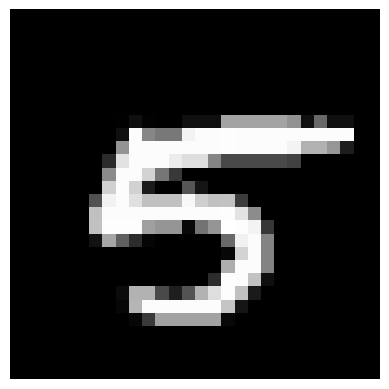

8 --- 8


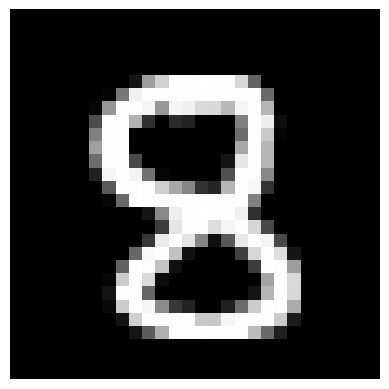

4 --- 4


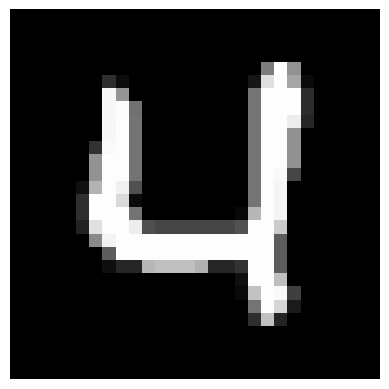

8 --- 8


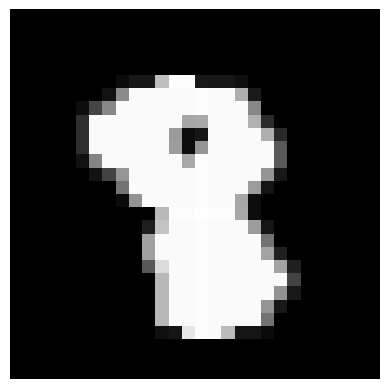

3 --- 3


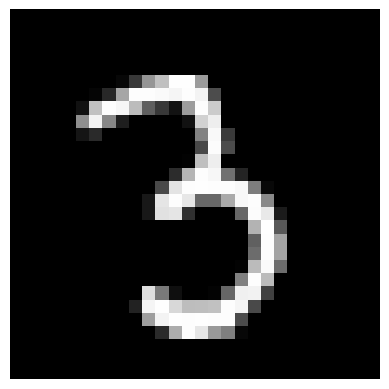

1 --- 1


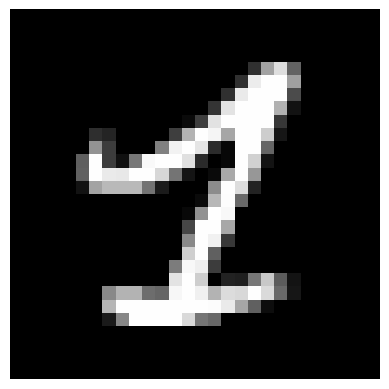

0 --- 0


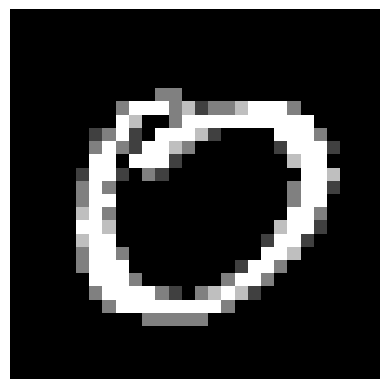

8 --- 8


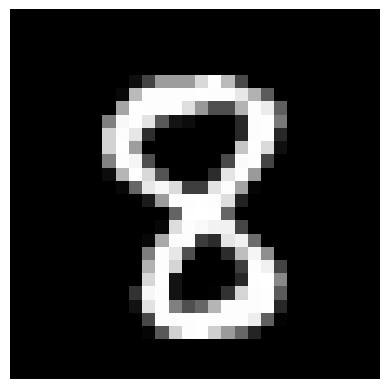

0 --- 0


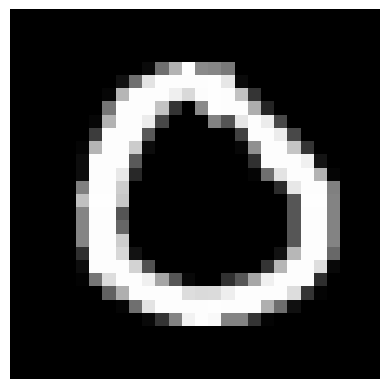

8 --- 8


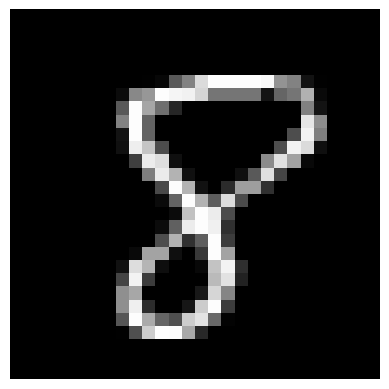

3 --- 3


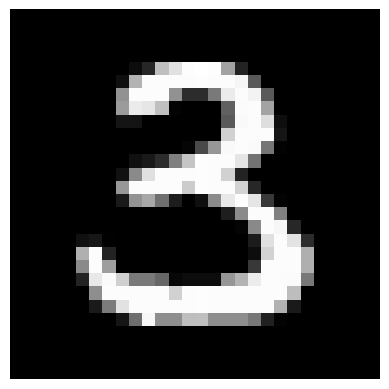

2 --- 2


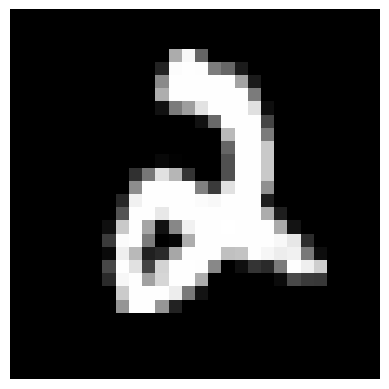

1 --- 1


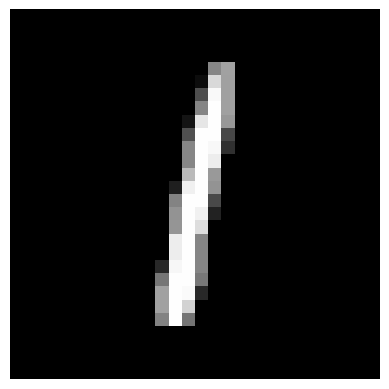

8 --- 8


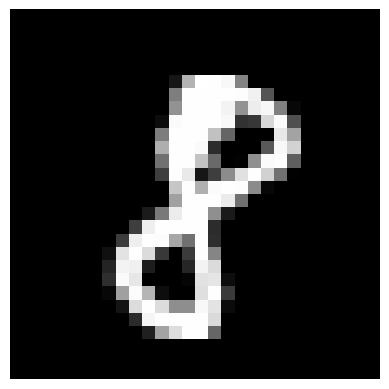

4 --- 4


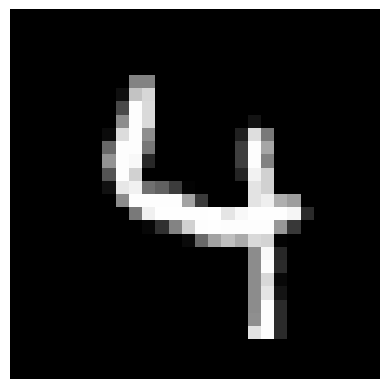

0 --- 0


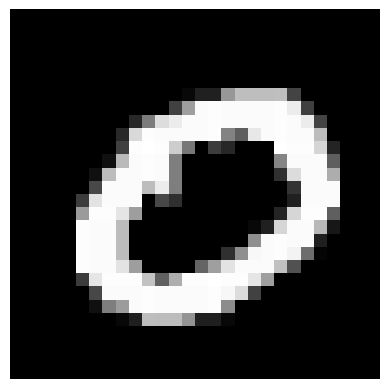

7 --- 7


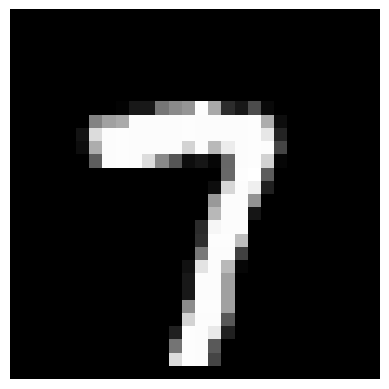

0 --- 0


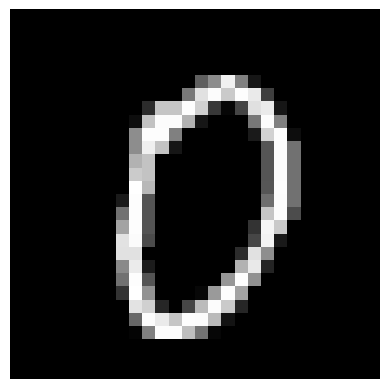

2 --- 2


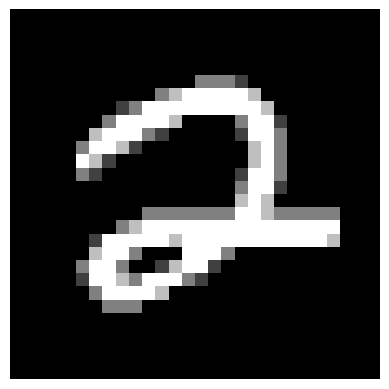

0 --- 0


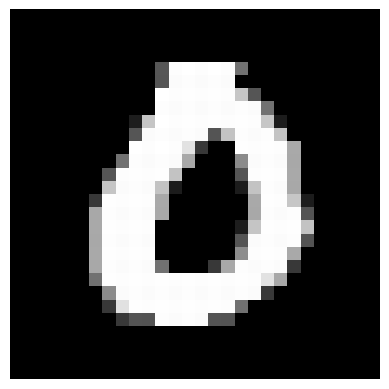

0 --- 0


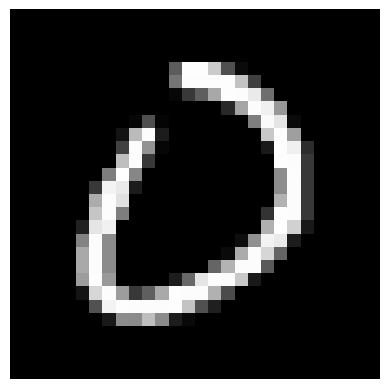

6 --- 6


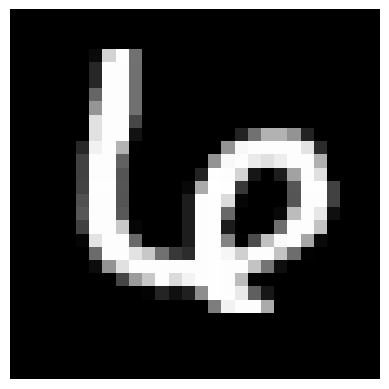

7 --- 7


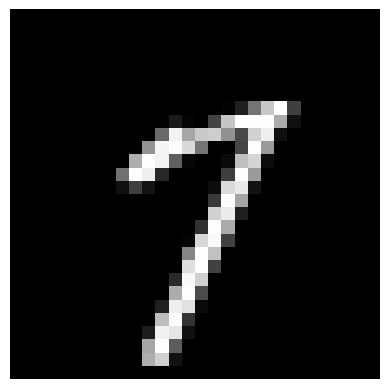

0 --- 0


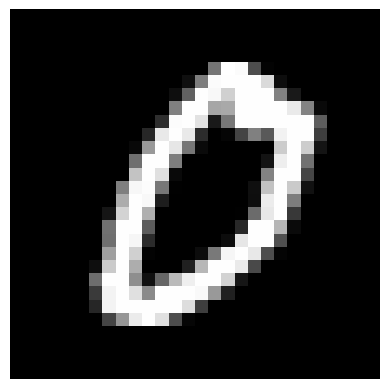

5 --- 5


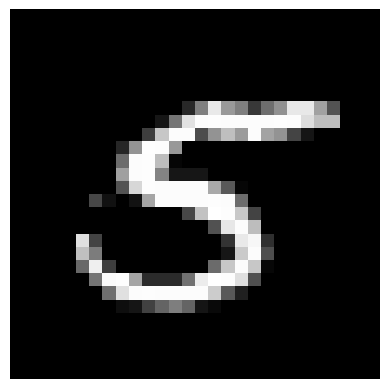

4 --- 4


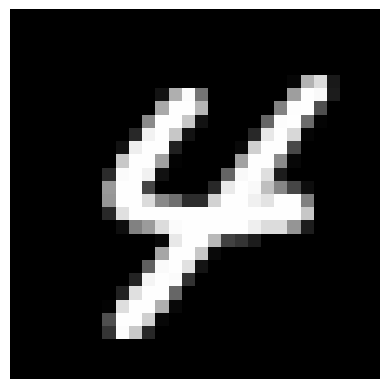

7 --- 7


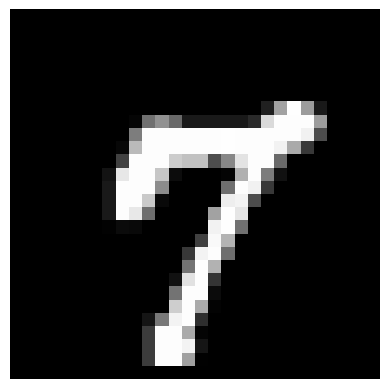

4 --- 4


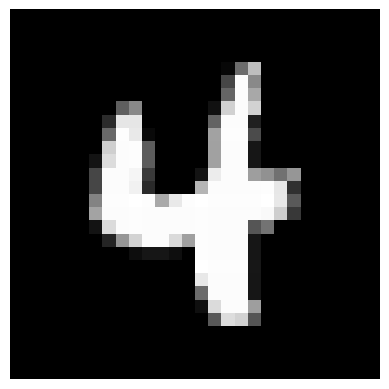

1 --- 1


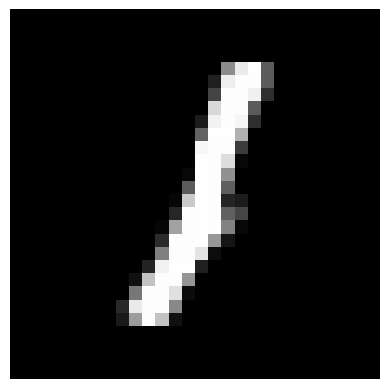

7 --- 7


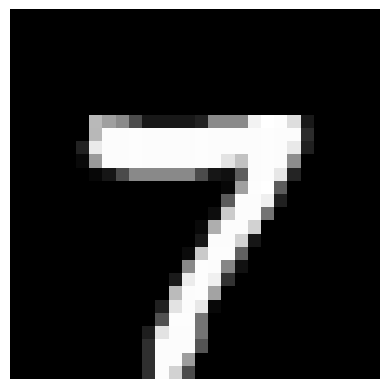

7 --- 7


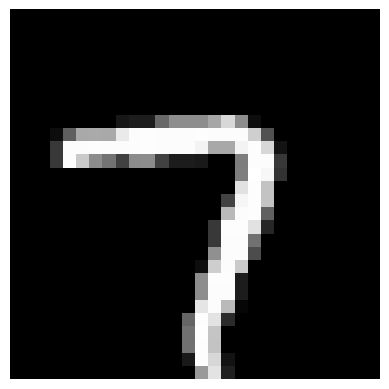

5 --- 5


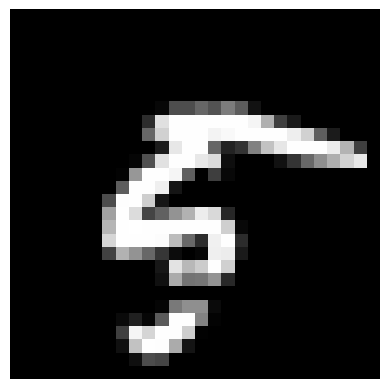

5 --- 5


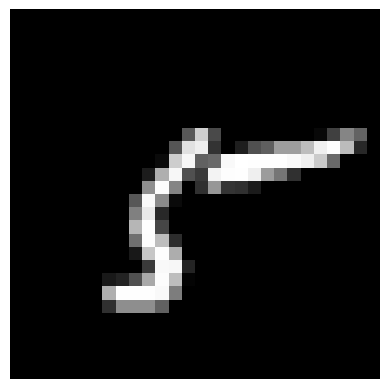

7 --- 7


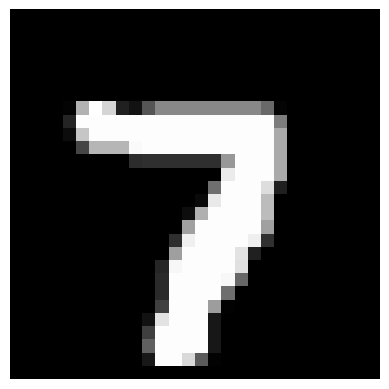

3 --- 3


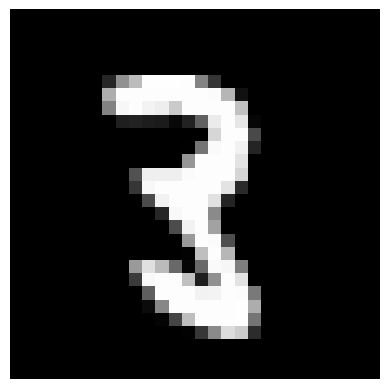

6 --- 6


KeyboardInterrupt: 

In [626]:
# test acuaracy

df2 = pd.read_csv("..\\Datasets\\train.csv")

for i,data in enumerate(trainloader,0):
    x,y = data

    yhat = model(x)

    pred_digit = torch.argmax(yhat, dim = 1)

    for j in range(len(y)):
        print(f"{y[j].item()} --- {pred_digit[j].item()}")

        pixel_data = x[j].numpy()
        image_array = pixel_data.reshape((28,28))

        plt.imshow(image_array,cmap = 'gray',vmin = 0,vmax = 255)
        plt.axis('off')
        plt.show()

